In [3]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
#Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.5.5 #master (https://github.com/reworkhow/JWAS.jl.git)


In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 23.427916 seconds (37.77 k allocations: 10.393 GiB, 0.11% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [5]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [6]:
model_equations = "Nur2ADG = intercept + Batch + EntryAge + NurPenBatch + SowID
             Died_Nur2 = intercept + Batch  + EntryAge + NurPenBatch";
R= [0.118280E-01 -0.709190E-02
    -0.709190E-02 0.806248E-01]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")

Gpen=[0.100816E-02 0
    0 0.100816E-02]
set_random(model,"NurPenBatch", Gpen)
G2=0.937042E-03
set_random(model,"SowID",G2)

SowID is not found in model equation 2.


In [7]:
G3=[0.306979E-02   -0.158919E-02
 -0.158919E-02  0.600730E-02]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
 14.494737 seconds (6.82 M allocations: 15.931 GiB, 1.36% gc time)


## BayesB

In [8]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), 
    estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0006 in the row 5 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0049 in the row 47 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0322 in the row 295 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0374 in the row 343 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0398 in the row 364 are missing. This record is deleted.
The number of observations with both genotypes and phenotypes used in the analysis is 3176.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  9.0e-6  -1.0e-5
 -1.0e-5   1.8e-5





running MCMC for BayesB...100%|█████████████████████████| Time: 3 days, 23:51:04




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


345114.444310 seconds (2.62 T allocations: 143.066 TiB, 26.88% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 870344×5 DataFrame…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 2095×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "EBV_Died_Nur2"           => 3205×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [45]:
h2=CSV.read("MCMC_BayesB_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

,iteration,Nur2ADG,nTrtsPer180
,Int64,Float64,Float64
1,1,0.205816,0.0743796
2,2,0.211776,0.0879077
3,3,0.200651,0.0844842
4,4,0.212028,0.0907424
5,5,0.217361,0.0962539
6,6,0.206886,0.0991447
7,7,0.188716,0.0697266
8,8,0.18609,0.0814415
9,9,0.213441,0.0901721


In [47]:
mean(h2[!,3])

0.08789894311684966

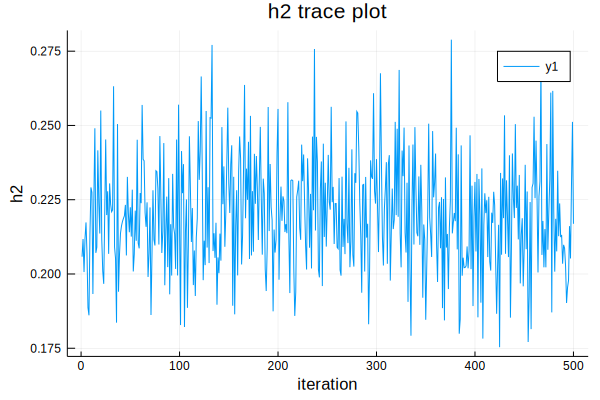

In [48]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

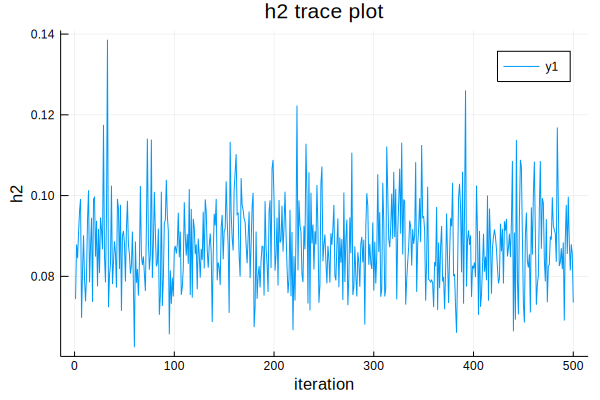

In [49]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [9]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_NurMOR/MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_NurMOR/MCMC_BayesB_marker_effects_Died_Nur2.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:50:07


BoundsError: BoundsError: attempt to access (2398×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -9.87596e-7  │ 5.24002e-6  │ -0.0977549   │ 0.371636  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -2.4606e-6   │ 7.42747e-6  │ -0.198432    │ 0.450773  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ -1.05813e-6  │ 4.38597e-6  │ -0.141029    │ 0.43811   │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -3.53663e-7  │ 1.78206e-6  │ -0.0682063   │ 0.331361  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -2.84501e-7  │ 1.84803e-6  │ -0.0784818   │ 0.39597   │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ -3.24075e-7  │ 2.21709e-6  │ -0.0439554   │ 0.374964  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ -1.96443e-6  │ 1.00672e-5  │ -0.0915759   │ 0.407123  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ -5.53344e-7  │ 2.68219e-6  │ -0.0814919   │ 0.42108   │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ -8.12015e-7  │ 3.79883e-6  │ -0.128434    │ 0.428267  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ -9.40129e-7  │ 3.93211e-6  │ -0.141367    │ 0.421319  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -4.51067e-7  │ 2.53167e-6  │ -0.0665427   │ 0.397913  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -4.08331e-7  │ 2.41661e-6  │ -0.0725476   │ 0.36708   │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -7.71658e-7  │ 3.66782e-6  │ -0.113847    │ 0.384165  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ -6.55556e-7  │ 2.87586e-6  │ -0.122102    │ 0.418315  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -7.58437e-7  │ 3.57675e-6  │ -0.12576     │ 0.437498  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ -2.77212e-7  │ 1.58907e-6  │ -0.0748921   │ 0.382402  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ -5.28076e-7  │ 2.50717e-6  │ -0.074953    │ 0.362534  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ -3.822e-7    │ 1.80886e-6  │ -0.0847997   │ 0.370518  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ -3.38516e-7  │ 1.80954e-6  │ -0.0804502   │ 0.327851  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -4.35662e-7  │ 2.35116e-6  │ -0.082787    │ 0.391977  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ -4.47197e-7  │ 2.39755e-6  │ -0.0618875   │ 0.337805  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -3.61078e-7  │ 1.66365e-6  │ -0.10271     │ 0.373009  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -3.89979e-7  │ 2.78886e-6  │ -0.053653    │ 0.378078  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ -2.38576e-7  │ 1.6805e-6   │ -0.0526551   │ 0.382169  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ -8.0374e-7   │ 3.41454e-6  │ -0.115261    │ 0.397851  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ -4.55199e-7  │ 1.83839e-6  │ -0.0768173   │ 0.409405  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ -1.1105e-6   │ 4.50412e-6  │ -0.123544    │ 0.427202  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ -7.92609e-7  │ 3.81665e-6  │ -0.118876    │ 0.402551  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ -5.12543e-7  │ 3.0113e-6   │ -0.097731    │ 0.401403  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ -6.50868e-7  │ 3.42927e-6  │ -0.106123    │ 0.369715  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ -5.48626e-7  │ 2.79501e-6  │ -0.0827459   │ 0.390176  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ -2.96704e-7  │ 1.9695e-6   │ -0.0467519   │ 0.373946  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ -4.3166e-7   │ 2.66373e-6  │ -0.0749015   │ 0.359628  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ -1.02171e-6  │ 6.31197e-6  │ -0.108903    │ 0.452612  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -4.07199e-7  │ 2.9813e-6   │ -0.0739009   │ 0.352792  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -5.15787e-7  │ 2.92334e-6  │ -0.0844023   │ 0.367338  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ -4.19397e-7  │ 2.04221e-6  │ -0.0882082   │ 0.41262   │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ -8.38266e-7  │ 3.66332e-6  │ -0.12603     │ 0.410211  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ -5.50551e-7  │ 2.32591e-6  │ -0.101671    │ 0.420805  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -7.44351e-7  │ 3.78273e-6  │ -0.0893299   │ 0.375706  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -1.06962e-6  │ 4.75088e-6  │ -0.119401    │ 0.436626  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ -3.74011e-7  │ 2.00453e-6  │ -0.0710613   │ 0.391829  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ -2.33925e-7  │ 1.67937e-6  │ -0.0663471   │ 0.348988  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ -3.40686e-7  │ 2.08646e-6  │ -0.0823201   │ 0.36237   │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ -3.93806e-7  │ 1.87829e-6  │ -0.0935584   │ 0.367201  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ -2.77698e-7  │ 2.08926e-6  │ -0.0442119   │ 0.342793  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -2.40059e-7  │ 1.73419e-6  │ -0.0643543   │ 0.355254  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -4.71323e-7  │ 2.18394e-6  │ -0.0921286   │ 0.397206  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ -4.83443e-7  │ 2.37939e-6  │ -0.0762552   │ 0.392347  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -4.6622e-7   │ 2.66468e-6  │ -0.0755049   │ 0.410235  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ -5.13133e-7  │ 3.04299e-6  │ -0.0654856   │ 0.381035  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ -6.96106e-7  │ 3.18002e-6  │ -0.107035    │ 0.4375    │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ -7.79182e-7  │ 4.11849e-6  │ -0.0989501   │ 0.408569  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ -3.85726e-7  │ 2.45173e-6  │ -0.0772118   │ 0.417037  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -4.33512e-7  │ 2.36749e-6  │ -0.0551828   │ 0.39617   │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -3.80985e-7  │ 2.11782e-6  │ -0.0695614   │ 0.346272  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -7.97122e-7  │ 3.89974e-6  │ -0.124576    │ 0.41898   │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ -7.582e-7    │ 4.09394e-6  │ -0.0791847   │ 0.383765  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -9.17034e-7  │ 3.98221e-6  │ -0.0917636   │ 0.405863  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -8.39835e-7  │ 3.61397e-6  │ -0.107511    │ 0.405589  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -4.06256e-7  │ 2.05371e-6  │ -0.0645788   │ 0.354716  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -2.85466e-7  │ 1.70127e-6  │ -0.0579741   │ 0.350507  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ -3.17395e-7  │ 2.13762e-6  │ -0.046862    │ 0.354859  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ -7.54342e-7  │ 3.50869e-6  │ -0.0764599   │ 0.395105  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ -6.64249e-7  │ 2.78455e-6  │ -0.0810633   │ 0.368906  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -7.1727e-7   │ 3.47985e-6  │ -0.0643458   │ 0.386344  │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -6.8658e-7   │ 3.50695e-6  │ -0.0970374   │ 0.400735  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -3.59542e-7  │ 2.08141e-6  │ -0.0631894   │ 0.430046  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ -4.69366e-7  │ 2.6036e-6   │ -0.077789    │ 0.360353  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ -4.51741e-7  │ 3.63781e-6  │ -0.0655882   │ 0.364778  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -5.40267e-7  │ 3.37006e-6  │ -0.0544429   │ 0.371783  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -4.63629e-7  │ 3.9008e-6   │ -0.0670612   │ 0.454538  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ -5.75855e-7  │ 3.584e-6    │ -0.0958958   │ 0.402915  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ -4.80267e-7  │ 2.41848e-6  │ -0.0757201   │ 0.39761   │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ -4.53487e-7  │ 2.57005e-6  │ -0.0806572   │ 0.42996   │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ -4.70555e-7  │ 2.21892e-6  │ -0.0973324   │ 0.386519  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -6.35666e-7  │ 3.58073e-6  │ -0.0928152   │ 0.382438  │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ -4.97686e-7  │ 3.27406e-6  │ -0.0950085   │ 0.378762  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ -7.41519e-7  │ 3.46766e-6  │ -0.08163     │ 0.387441  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -7.51511e-7  │ 5.09026e-6  │ -0.0949622   │ 0.366969  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ -4.63725e-7  │ 2.22423e-6  │ -0.0777142   │ 0.35836   │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -3.4824e-7   │ 1.90198e-6  │ -0.0722131   │ 0.398087  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -3.83951e-7  │ 2.0956e-6   │ -0.0851442   │ 0.378267  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ -5.4729e-7   │ 2.49788e-6  │ -0.0914179   │ 0.378474  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ -3.29622e-7  │ 1.86102e-6  │ -0.0812833   │ 0.3874    │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -3.95738e-7  │ 1.82233e-6  │ -0.0776498   │ 0.371295  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ -6.30573e-7  │ 3.91446e-6  │ -0.0912699   │ 0.388858  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ -3.62867e-7  │ 2.14647e-6  │ -0.0686245   │ 0.326456  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ -5.0417e-7   │ 2.56758e-6  │ -0.0716233   │ 0.388298  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -1.0033e-6   │ 4.34524e-6  │ -0.127088    │ 0.402476  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ -8.02162e-7  │ 4.69394e-6  │ -0.0712881   │ 0.40609   │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ -7.01874e-7  │ 5.97669e-6  │ -0.0882655   │ 0.362088  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ -1.88956e-7  │ 1.01794e-6  │ -0.0693237   │ 0.309993  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ -1.90362e-7  │ 1.66593e-6  │ -0.0429838   │ 0.222915  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ -7.71665e-7  │ 4.77635e-6  │ -0.0943244   │ 0.381874  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -1.58583e-6  │ 5.97411e-6  │ -0.140674    │ 0.453425  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ -5.84753e-7  │ 3.95087e-6  │ -0.0799548   │ 0.362999  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -7.88809e-7  │ 3.07622e-6  │ -0.10881     │ 0.433451  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ -3.22406e-7  │ 2.97369e-6  │ -0.0702683   │ 0.35707   │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ -1.17117e-6  │ 6.16114e-6  │ -0.101159    │ 0.383703  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ -7.76644e-8  │ 6.6557e-7   │ -0.0353249   │ 0.246418  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ -3.01201e-7  │ 2.18565e-6  │ -0.039167    │ 0.282091  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -5.77001e-7  │ 3.32609e-6  │ -0.0678824   │ 0.32868   │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ -3.37113e-7  │ 2.00548e-6  │ -0.0723674   │ 0.33549   │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ -2.21368e-7  │ 1.21399e-6  │ -0.0707267   │ 0.330183  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -2.31538e-7  │ 1.29425e-6  │ -0.0557833   │ 0.314253  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ -5.55172e-7  │ 2.72227e-6  │ -0.0842275   │ 0.382967  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ -2.25378e-7  │ 1.55881e-6  │ -0.0527155   │ 0.264636  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ -3.71304e-7  │ 2.44686e-6  │ -0.0557245   │ 0.346981  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ -1.49197e-7  │ 1.21115e-6  │ -0.0309581   │ 0.323452  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ -3.98452e-7  │ 2.52825e-6  │ -0.0480311   │ 0.3475    │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -2.85921e-7  │ 1.78619e-6  │ -0.0688892   │ 0.3311    │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ -5.34843e-7  │ 2.63904e-6  │ -0.0689163   │ 0.381276  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ -2.74635e-7  │ 2.1966e-6   │ -0.0169025   │ 0.31762   │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ -2.94867e-7  │ 2.07582e-6  │ -0.0356019   │ 0.327344  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ -4.47322e-7  │ 3.3299e-6   │ -0.06229     │ 0.317674  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -1.04308e-6  │ 8.22029e-6  │ -0.0786207   │ 0.385895  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ -7.8223e-7   │ 3.80576e-6  │ -0.101699    │ 0.379185  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ -3.69867e-7  │ 2.82841e-6  │ -0.074701    │ 0.298467  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ -2.04799e-7  │ 1.32236e-6  │ -0.0670384   │ 0.329344  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ -1.09161e-7  │ 7.0798e-7   │ -0.0577173   │ 0.257402  │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ -2.84932e-7  │ 4.25323e-6  │ -0.0328143   │ 0.264675  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -1.67992e-7  │ 1.2141e-6   │ -0.0551986   │ 0.322304  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -2.8325e-7   │ 2.11719e-6  │ -0.0525415   │ 0.36102   │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ -6.131e-7    │ 3.67534e-6  │ -0.0808672   │ 0.337052  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ -6.35414e-7  │ 3.04853e-6  │ -0.0785777   │ 0.399455  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ -4.70823e-7  │ 2.85143e-6  │ -0.0527708   │ 0.349429  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -2.38066e-7  │ 1.56453e-6  │ -0.054431    │ 0.268716  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -3.01631e-7  │ 3.33595e-6  │ -0.035871    │ 0.245704  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ -2.36561e-7  │ 1.65741e-6  │ -0.0609532   │ 0.314224  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ -2.13083e-7  │ 1.39651e-6  │ -0.0576485   │ 0.330508  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ -3.67184e-7  │ 2.85407e-6  │ -0.0577583   │ 0.317279  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ -3.18222e-7  │ 2.71321e-6  │ -0.0398401   │ 0.284908  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ -2.63523e-7  │ 1.29143e-6  │ -0.0696434   │ 0.30322   │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -2.97231e-7  │ 2.05679e-6  │ -0.0492456   │ 0.271249  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ -6.1561e-8   │ 6.92076e-7  │ -0.0163029   │ 0.259326  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ -8.84081e-8  │ 7.34133e-7  │ -0.0286312   │ 0.240308  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -1.4597e-7   │ 1.66964e-6  │ -0.0259512   │ 0.239468  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -1.61296e-7  │ 1.68648e-6  │ -0.0465861   │ 0.284959  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -3.55593e-7  │ 2.16217e-6  │ -0.0558829   │ 0.372117  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -3.06756e-7  │ 1.43202e-6  │ -0.065692    │ 0.376264  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -1.14237e-7  │ 1.32509e-6  │ -0.0426146   │ 0.300791  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -5.79832e-8  │ 4.13118e-7  │ -0.0319602   │ 0.221055  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -5.90039e-8  │ 6.56536e-7  │ -0.0356809   │ 0.271983  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -1.06135e-7  │ 8.54421e-7  │ -0.0415035   │ 0.281947  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -1.9711e-7   │ 1.31311e-6  │ -0.0524237   │ 0.347258  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ -6.33361e-7  │ 3.42962e-6  │ -0.100236    │ 0.375348  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -5.39996e-7  │ 3.04133e-6  │ -0.103937    │ 0.404329  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -3.36514e-7  │ 1.41395e-6  │ -0.0975072   │ 0.364939  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -5.80091e-7  │ 3.39874e-6  │ -0.0902576   │ 0.387404  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ -5.79289e-7  │ 3.48807e-6  │ -0.0975547   │ 0.379054  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -4.54992e-7  │ 2.16902e-6  │ -0.0933864   │ 0.349297  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -3.4249e-7   │ 1.7726e-6   │ -0.0839779   │ 0.373179  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ -1.53247e-7  │ 1.08415e-6  │ -0.044453    │ 0.333615  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -1.22542e-7  │ 1.24707e-6  │ -0.0266684   │ 0.257444  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -2.16577e-7  │ 1.56462e-6  │ -0.0502355   │ 0.322811  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ -3.13721e-7  │ 1.74576e-6  │ -0.0667745   │ 0.348392  │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -3.81094e-7  │ 1.92517e-6  │ -0.0710543   │ 0.367343  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -9.49425e-7  │ 8.63524e-6  │ -0.0944234   │ 0.374026  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -3.95184e-7  │ 2.0634e-6   │ -0.120556    │ 0.391664  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ -4.40867e-7  │ 2.6051e-6   │ -0.0745997   │ 0.337404  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -7.71984e-7  │ 3.82576e-6  │ -0.106685    │ 0.410736  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ -2.24385e-7  │ 1.25897e-6  │ -0.050526    │ 0.347948  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -3.14067e-7  │ 2.7764e-6   │ -0.0479038   │ 0.390054  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ -6.99761e-7  │ 2.86092e-6  │ -0.0933852   │ 0.388328  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -5.56501e-7  │ 2.88177e-6  │ -0.091194    │ 0.377213  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ -1.05157e-6  │ 5.23589e-6  │ -0.121127    │ 0.362514  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -3.71687e-7  │ 1.97011e-6  │ -0.0563313   │ 0.353386  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ -2.63465e-7  │ 2.26215e-6  │ -0.0452648   │ 0.31478   │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -3.04204e-7  │ 1.72382e-6  │ -0.0762687   │ 0.342224  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ -2.5411e-7   │ 1.83721e-6  │ -0.0483101   │ 0.272865  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -2.22813e-7  │ 1.54728e-6  │ -0.0449548   │ 0.311317  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -2.56256e-7  │ 2.09744e-6  │ -0.0521442   │ 0.311907  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ -3.04514e-7  │ 2.08679e-6  │ -0.0514452   │ 0.319535  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ -5.73208e-7  │ 3.37428e-6  │ -0.0675979   │ 0.35909   │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -1.51708e-7  │ 1.20555e-6  │ -0.0491885   │ 0.273531  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -2.79618e-7  │ 3.00398e-6  │ -0.0300823   │ 0.299095  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -2.11849e-7  │ 1.85947e-6  │ -0.044769    │ 0.259831  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -2.48182e-7  │ 1.56794e-6  │ -0.0778394   │ 0.318505  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ -3.86582e-7  │ 2.53154e-6  │ -0.0512246   │ 0.310181  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -3.47665e-7  │ 2.40362e-6  │ -0.0466551   │ 0.310404  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -3.32959e-7  │ 1.65091e-6  │ -0.091744    │ 0.369083  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ -1.93874e-7  │ 1.43478e-6  │ -0.056118    │ 0.335974  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -1.89017e-7  │ 1.39101e-6  │ -0.0776995   │ 0.364096  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -2.95345e-7  │ 2.01573e-6  │ -0.063037    │ 0.388944  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -2.80591e-7  │ 1.29827e-6  │ -0.0742938   │ 0.421433  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -2.33308e-7  │ 2.18648e-6  │ -0.0490468   │ 0.289803  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ -2.45294e-7  │ 1.94712e-6  │ -0.0606537   │ 0.31211   │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -5.9897e-7   │ 3.5377e-6   │ -0.0618103   │ 0.350464  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -3.71003e-7  │ 2.36422e-6  │ -0.0542967   │ 0.338323  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -2.67573e-7  │ 1.83656e-6  │ -0.0607772   │ 0.327438  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ -4.95282e-7  │ 2.26669e-6  │ -0.0929323   │ 0.350366  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -3.67905e-7  │ 1.91659e-6  │ -0.075776    │ 0.379125  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -2.17368e-7  │ 1.52098e-6  │ -0.0422139   │ 0.289178  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ -9.42789e-8  │ 7.02577e-7  │ -0.0719273   │ 0.308602  │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ -8.58168e-8  │ 7.00427e-7  │ -0.0393225   │ 0.272568  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ -2.045e-7    │ 1.12723e-6  │ -0.0679717   │ 0.347207  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -2.17225e-7  │ 1.34988e-6  │ -0.0717328   │ 0.362123  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -2.93915e-7  │ 1.5598e-6   │ -0.0557623   │ 0.370938  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -1.72846e-7  │ 1.10323e-6  │ -0.0749357   │ 0.348247  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -1.05485e-7  │ 1.68029e-6  │ -0.0547511   │ 0.300684  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ -2.49659e-7  │ 2.35437e-6  │ -0.0204101   │ 0.264723  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -1.12464e-7  │ 7.34686e-7  │ -0.0447199   │ 0.316115  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ -2.41703e-7  │ 1.53651e-6  │ -0.0568724   │ 0.341399  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -1.25724e-7  │ 1.05743e-6  │ -0.045981    │ 0.305273  │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -3.7365e-7   │ 1.68403e-6  │ -0.0913524   │ 0.365606  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ -6.70691e-7  │ 3.61344e-6  │ -0.114075    │ 0.380816  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ -2.45489e-7  │ 1.6585e-6   │ -0.0665904   │ 0.358019  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ -4.36823e-7  │ 2.28998e-6  │ -0.0823145   │ 0.407546  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ -2.55945e-7  │ 1.26589e-6  │ -0.0772173   │ 0.36548   │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ -4.37942e-7  │ 2.47571e-6  │ -0.0837737   │ 0.352248  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ -1.59962e-7  │ 8.96589e-7  │ -0.0478454   │ 0.295084  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -2.85694e-7  │ 2.02101e-6  │ -0.05994     │ 0.377857  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -5.15155e-7  │ 2.46004e-6  │ -0.0976938   │ 0.379613  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ -4.06152e-7  │ 2.43246e-6  │ -0.0794521   │ 0.360129  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ -2.97742e-7  │ 2.02743e-6  │ -0.0552563   │ 0.342     │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ -3.09623e-7  │ 1.62596e-6  │ -0.0921859   │ 0.379951  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ -1.78774e-6  │ 9.27139e-6  │ -0.1162      │ 0.421575  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ -1.29854e-6  │ 7.34785e-6  │ -0.0866137   │ 0.403106  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ -6.26132e-7  │ 3.32445e-6  │ -0.116478    │ 0.404677  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ -3.2751e-7   │ 2.12541e-6  │ -0.082784    │ 0.366991  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -4.19492e-7  │ 2.27006e-6  │ -0.0873966   │ 0.382194  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ -9.66632e-7  │ 4.38167e-6  │ -0.15049     │ 0.416285  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ -6.99123e-7  │ 3.24408e-6  │ -0.138359    │ 0.394858  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ -2.31364e-7  │ 1.37572e-6  │ -0.0872793   │ 0.385567  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ -4.59716e-7  │ 2.53174e-6  │ -0.0728958   │ 0.381197  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -3.29937e-7  │ 2.5449e-6   │ -0.0664081   │ 0.325098  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ -8.51951e-8  │ 7.15425e-7  │ -0.0428816   │ 0.289364  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -3.64773e-7  │ 2.79801e-6  │ -0.080412    │ 0.36911   │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ -1.58693e-6  │ 6.36975e-6  │ -0.12661     │ 0.431742  │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -8.32497e-7  │ 6.34892e-6  │ -0.0934736   │ 0.372592  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -9.28369e-7  │ 4.39904e-6  │ -0.0853386   │ 0.399258  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -3.55117e-7  │ 2.30484e-6  │ -0.0522781   │ 0.374541  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -2.45261e-7  │ 1.80157e-6  │ -0.0549655   │ 0.310396  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ -3.93595e-7  │ 2.60167e-6  │ -0.082975    │ 0.376615  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ -2.67423e-7  │ 1.52016e-6  │ -0.0694313   │ 0.358239  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ -2.04628e-7  │ 1.3302e-6   │ -0.0518134   │ 0.319696  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -8.2585e-7   │ 4.46639e-6  │ -0.086386    │ 0.413706  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ -2.29801e-6  │ 9.42079e-6  │ -0.146591    │ 0.41454   │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ -8.44765e-7  │ 4.09504e-6  │ -0.12287     │ 0.405025  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -4.2897e-7   │ 2.30319e-6  │ -0.0705614   │ 0.368371  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ -5.76916e-7  │ 3.43495e-6  │ -0.0594419   │ 0.346686  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -9.55153e-7  │ 6.05626e-6  │ -0.0721048   │ 0.385719  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ -4.48269e-7  │ 2.35706e-6  │ -0.0831115   │ 0.3401    │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ -2.02373e-7  │ 1.3122e-6   │ -0.0675557   │ 0.303346  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ -3.9834e-7   │ 2.64245e-6  │ -0.0645764   │ 0.350174  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ -3.94599e-7  │ 2.2207e-6   │ -0.0831186   │ 0.357011  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ -1.55315e-6  │ 8.72022e-6  │ -0.0940333   │ 0.413345  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -4.75088e-7  │ 2.21371e-6  │ -0.108       │ 0.400356  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -6.27935e-7  │ 3.17288e-6  │ -0.0900417   │ 0.409896  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -9.73978e-7  │ 4.29371e-6  │ -0.112884    │ 0.39969   │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -1.38037e-6  │ 5.09955e-6  │ -0.153522    │ 0.410808  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -1.07592e-6  │ 8.2813e-6   │ -0.0956031   │ 0.427803  │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -6.64033e-7  │ 3.19236e-6  │ -0.111576    │ 0.424774  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -6.42613e-7  │ 2.96788e-6  │ -0.107242    │ 0.3754    │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -1.19409e-6  │ 5.92066e-6  │ -0.139533    │ 0.417375  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -7.78499e-7  │ 3.10636e-6  │ -0.108907    │ 0.397323  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -5.93433e-7  │ 3.76109e-6  │ -0.103711    │ 0.399202  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ -3.2722e-7   │ 1.55326e-6  │ -0.0607119   │ 0.365954  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -5.9764e-7   │ 3.00268e-6  │ -0.125805    │ 0.402     │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ -5.48861e-7  │ 2.86995e-6  │ -0.113035    │ 0.40041   │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -5.04064e-7  │ 2.51938e-6  │ -0.0824076   │ 0.393419  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ -3.63801e-7  │ 2.52695e-6  │ -0.0670142   │ 0.325142  │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ -1.47746e-7  │ 1.07416e-6  │ -0.0357112   │ 0.254109  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ -1.17538e-6  │ 8.46897e-6  │ -0.0990466   │ 0.362372  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ -5.40372e-7  │ 3.18622e-6  │ -0.0728115   │ 0.344391  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ -5.20275e-7  │ 2.52084e-6  │ -0.0883255   │ 0.350242  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ -8.71636e-7  │ 5.76659e-6  │ -0.0899165   │ 0.379888  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ -3.85813e-7  │ 2.35285e-6  │ -0.0737738   │ 0.381379  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ -5.34686e-7  │ 2.16675e-6  │ -0.11712     │ 0.384979  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ -6.05223e-7  │ 2.99526e-6  │ -0.109202    │ 0.417257  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ -7.952e-7    │ 3.62632e-6  │ -0.103156    │ 0.416135  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ -4.47417e-7  │ 3.30283e-6  │ -0.0859671   │ 0.370701  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -3.93891e-7  │ 2.12702e-6  │ -0.0622625   │ 0.368981  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -2.67611e-7  │ 1.95097e-6  │ -0.0608891   │ 0.255014  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ -1.24845e-6  │ 6.51903e-6  │ -0.08418     │ 0.38767   │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -7.36443e-8  │ 9.9122e-7   │ -0.012       │ 0.209628  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ -4.07169e-7  │ 2.42775e-6  │ -0.098941    │ 0.370612  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -5.97914e-7  │ 3.82899e-6  │ -0.105189    │ 0.38507   │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ -3.36561e-7  │ 2.01349e-6  │ -0.0608446   │ 0.318401  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ -4.86851e-7  │ 2.51974e-6  │ -0.0744319   │ 0.365838  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ -4.41793e-7  │ 2.04636e-6  │ -0.112858    │ 0.352019  │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -7.35877e-7  │ 3.49326e-6  │ -0.0937501   │ 0.399595  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -2.28002e-7  │ 1.34023e-6  │ -0.0601873   │ 0.305426  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -1.24159e-6  │ 5.30508e-6  │ -0.12065     │ 0.3884    │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ -5.76017e-7  │ 2.89474e-6  │ -0.0666723   │ 0.388478  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ -4.5866e-7   │ 2.52748e-6  │ -0.0864393   │ 0.366885  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ -5.05989e-7  │ 3.1981e-6   │ -0.0502271   │ 0.356903  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ -6.81735e-7  │ 3.11044e-6  │ -0.0972454   │ 0.345558  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ -4.1061e-7   │ 2.68715e-6  │ -0.0502541   │ 0.333991  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ -5.58956e-7  │ 3.48121e-6  │ -0.0845594   │ 0.362451  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -9.69035e-7  │ 4.28116e-6  │ -0.108105    │ 0.431263  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ -8.83805e-7  │ 4.53785e-6  │ -0.08032     │ 0.408468  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ -5.1725e-7   │ 2.92436e-6  │ -0.0992261   │ 0.381951  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ -7.79464e-7  │ 3.55989e-6  │ -0.105861    │ 0.386659  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ -5.91513e-7  │ 2.81731e-6  │ -0.0767317   │ 0.357168  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ -9.84006e-7  │ 4.62113e-6  │ -0.147843    │ 0.436727  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -1.36572e-6  │ 6.77141e-6  │ -0.122443    │ 0.451713  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ -1.30452e-6  │ 7.14469e-6  │ -0.128266    │ 0.382453  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ -1.04581e-6  │ 4.35265e-6  │ -0.111705    │ 0.412029  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ -1.07696e-6  │ 5.35835e-6  │ -0.13059     │ 0.435637  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -6.6178e-7   │ 3.50204e-6  │ -0.102613    │ 0.403384  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ -2.48869e-7  │ 3.1251e-6   │ -0.0521175   │ 0.323883  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -4.01119e-7  │ 2.18744e-6  │ -0.0638289   │ 0.379461  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ -6.33807e-7  │ 3.4343e-6   │ -0.0742314   │ 0.34918   │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ -7.63163e-7  │ 3.8797e-6   │ -0.110287    │ 0.361077  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ -3.49268e-7  │ 2.3537e-6   │ -0.0577431   │ 0.358672  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ -4.89778e-7  │ 2.8051e-6   │ -0.0593512   │ 0.339307  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -6.36469e-7  │ 2.71491e-6  │ -0.129659    │ 0.401232  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ -5.2979e-7   │ 2.24753e-6  │ -0.0973333   │ 0.397725  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ -4.60502e-7  │ 2.67247e-6  │ -0.0643674   │ 0.380566  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ -7.56077e-7  │ 3.71871e-6  │ -0.0967216   │ 0.418018  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -5.4348e-7   │ 2.88888e-6  │ -0.0685941   │ 0.421168  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -2.78504e-7  │ 1.68896e-6  │ -0.0689529   │ 0.349902  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -8.33778e-7  │ 3.59773e-6  │ -0.13246     │ 0.449901  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ -8.51342e-7  │ 3.42693e-6  │ -0.128234    │ 0.435451  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -8.23669e-7  │ 4.49767e-6  │ -0.111155    │ 0.4504    │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ -6.93461e-7  │ 3.875e-6    │ -0.0831848   │ 0.382935  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ -5.53848e-7  │ 2.76592e-6  │ -0.0650873   │ 0.430064  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -2.61963e-7  │ 1.87905e-6  │ -0.0723339   │ 0.373392  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ -4.53008e-7  │ 2.08592e-6  │ -0.0836687   │ 0.383077  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ -2.91826e-7  │ 1.71779e-6  │ -0.0641885   │ 0.347148  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -4.07198e-7  │ 3.30105e-6  │ -0.0573304   │ 0.337935  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ -2.60042e-6  │ 1.08111e-5  │ -0.139779    │ 0.426849  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -1.13202e-6  │ 8.09625e-6  │ -0.0817028   │ 0.3941    │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ -2.30623e-7  │ 2.35508e-6  │ -0.0522893   │ 0.247843  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ -5.3035e-7   │ 4.59909e-6  │ -0.0456835   │ 0.244405  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -9.72314e-7  │ 4.86221e-6  │ -0.0728392   │ 0.349164  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -1.56686e-7  │ 1.14965e-6  │ -0.0336862   │ 0.246477  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ -1.78322e-7  │ 1.97832e-6  │ -0.0298047   │ 0.191787  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ -1.13375e-7  │ 1.13073e-6  │ -0.028823    │ 0.221852  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ -2.18099e-7  │ 1.22697e-6  │ -0.0511652   │ 0.283569  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ -4.48366e-7  │ 4.41693e-6  │ -0.0214777   │ 0.247462  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ -2.04346e-6  │ 1.40751e-5  │ -0.0717697   │ 0.278668  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ -2.53507e-7  │ 1.91553e-6  │ -0.0524284   │ 0.274132  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ -4.19606e-7  │ 3.03462e-6  │ -0.0602189   │ 0.330462  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ -2.31552e-7  │ 1.52953e-6  │ -0.0567616   │ 0.286784  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -1.97381e-7  │ 1.07191e-6  │ -0.0601055   │ 0.289284  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ -9.24007e-8  │ 1.10276e-6  │ -0.018       │ 0.172439  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -6.26541e-8  │ 4.83798e-7  │ -0.0376893   │ 0.223598  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ -2.27032e-7  │ 1.30895e-6  │ -0.0602148   │ 0.316637  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ -2.03878e-7  │ 1.26876e-6  │ -0.0712306   │ 0.325789  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -1.39571e-7  │ 1.0307e-6   │ -0.0361423   │ 0.253366  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ -9.88462e-8  │ 9.60727e-7  │ -0.027557    │ 0.266425  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ -5.40493e-7  │ 2.94512e-6  │ -0.0601984   │ 0.361923  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -1.19659e-7  │ 7.85688e-7  │ -0.060051    │ 0.323164  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ -1.63208e-7  │ 1.63598e-6  │ -0.0702714   │ 0.37256   │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ -3.37883e-8  │ 3.33166e-7  │ -0.0312293   │ 0.225934  │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -7.19817e-8  │ 8.09898e-7  │ -0.0319554   │ 0.242274  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ -1.01687e-7  │ 7.16675e-7  │ -0.0450753   │ 0.270354  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -2.90337e-7  │ 2.85266e-6  │ -0.0328468   │ 0.256413  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -3.18355e-7  │ 2.41091e-6  │ -0.0271717   │ 0.294706  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -1.65831e-7  │ 1.23291e-6  │ -0.0317221   │ 0.197185  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -1.42477e-7  │ 1.02592e-6  │ -0.0410947   │ 0.268734  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -2.16512e-7  │ 1.36732e-6  │ -0.0671307   │ 0.310033  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ -4.05514e-7  │ 3.09045e-6  │ -0.0468825   │ 0.28781   │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ -2.0436e-7   │ 1.33587e-6  │ -0.0486409   │ 0.321461  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -5.21836e-7  │ 2.72735e-6  │ -0.0624384   │ 0.391259  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ -4.48128e-7  │ 2.54929e-6  │ -0.071914    │ 0.411069  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ -8.5253e-7   │ 3.91584e-6  │ -0.109006    │ 0.425027  │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ -9.3662e-7   │ 5.04598e-6  │ -0.0913012   │ 0.417149  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ -4.84202e-7  │ 2.52662e-6  │ -0.0935659   │ 0.420508  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -6.16397e-7  │ 3.26878e-6  │ -0.078846    │ 0.367489  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ -8.06948e-7  │ 3.54362e-6  │ -0.112678    │ 0.425611  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -8.63444e-7  │ 4.02677e-6  │ -0.115426    │ 0.447414  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -1.16831e-6  │ 6.33493e-6  │ -0.0943065   │ 0.479339  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -2.45379e-7  │ 1.27662e-6  │ -0.070587    │ 0.371705  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ -5.35968e-7  │ 3.00951e-6  │ -0.0612415   │ 0.407113  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -2.04563e-7  │ 2.19274e-6  │ -0.0293798   │ 0.355622  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ -4.3642e-7   │ 2.38783e-6  │ -0.0669097   │ 0.387352  │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ -2.46657e-7  │ 2.07626e-6  │ -0.053886    │ 0.378921  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ -3.43501e-7  │ 2.49158e-6  │ -0.0655587   │ 0.373408  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ -4.33913e-7  │ 4.81299e-6  │ -0.0465051   │ 0.399686  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -5.19641e-7  │ 3.05924e-6  │ -0.085076    │ 0.339048  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -3.35252e-7  │ 2.51511e-6  │ -0.057902    │ 0.365038  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ -4.91653e-7  │ 2.88525e-6  │ -0.0638587   │ 0.387859  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ -4.8066e-7   │ 2.65838e-6  │ -0.0944444   │ 0.357238  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -9.49249e-7  │ 3.77721e-6  │ -0.11499     │ 0.415553  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -1.03143e-6  │ 5.65165e-6  │ -0.0913296   │ 0.398821  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ -8.71319e-7  │ 3.72234e-6  │ -0.119393    │ 0.415065  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -4.35368e-7  │ 1.85025e-6  │ -0.09975     │ 0.368389  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ -9.78085e-7  │ 4.20424e-6  │ -0.110062    │ 0.432692  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ -4.70123e-7  │ 2.7781e-6   │ -0.106536    │ 0.421891  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ -1.14339e-6  │ 5.27051e-6  │ -0.122032    │ 0.381968  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ -7.64904e-7  │ 3.56379e-6  │ -0.109627    │ 0.387164  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ -2.87181e-7  │ 1.9284e-6   │ -0.0520875   │ 0.353325  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ -6.06862e-7  │ 3.5104e-6   │ -0.0393674   │ 0.377547  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -9.23993e-7  │ 6.12307e-6  │ -0.0885947   │ 0.399409  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ -8.51399e-7  │ 5.07242e-6  │ -0.0906681   │ 0.401171  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ -1.10629e-6  │ 4.70474e-6  │ -0.117181    │ 0.394056  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ -7.54342e-7  │ 3.68275e-6  │ -0.0827425   │ 0.384886  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ -8.47122e-7  │ 3.70974e-6  │ -0.105317    │ 0.459939  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ -9.71256e-7  │ 4.27307e-6  │ -0.105806    │ 0.418588  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -6.62886e-7  │ 2.50075e-6  │ -0.125582    │ 0.395708  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ -5.84695e-7  │ 3.358e-6    │ -0.075066    │ 0.382402  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ -1.04561e-6  │ 6.86444e-6  │ -0.0983656   │ 0.379356  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ -1.8469e-6   │ 6.58789e-6  │ -0.128007    │ 0.46738   │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ -6.77747e-7  │ 3.09571e-6  │ -0.099421    │ 0.414617  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ -4.4971e-7   │ 1.92203e-6  │ -0.0850859   │ 0.389043  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ -5.39216e-7  │ 2.36019e-6  │ -0.105301    │ 0.414653  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ -2.75122e-7  │ 1.56337e-6  │ -0.073843    │ 0.352043  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ -3.14172e-7  │ 1.41772e-6  │ -0.0796384   │ 0.355346  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -5.33646e-7  │ 2.40107e-6  │ -0.0925012   │ 0.389526  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ -9.08351e-7  │ 4.95218e-6  │ -0.1019      │ 0.403454  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ -8.26464e-7  │ 3.65322e-6  │ -0.121477    │ 0.412111  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -8.20293e-7  │ 3.43567e-6  │ -0.0966058   │ 0.393439  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -6.76451e-7  │ 3.10527e-6  │ -0.112241    │ 0.371466  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ -7.12303e-7  │ 2.89045e-6  │ -0.0879628   │ 0.396251  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ -5.56969e-7  │ 2.48219e-6  │ -0.107837    │ 0.420452  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ -7.41097e-7  │ 4.8282e-6   │ -0.099485    │ 0.403498  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ -1.42873e-6  │ 7.9444e-6   │ -0.124766    │ 0.398256  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -9.41368e-7  │ 3.95487e-6  │ -0.136712    │ 0.442682  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -1.81211e-6  │ 8.43022e-6  │ -0.1648      │ 0.435267  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -2.25017e-6  │ 1.14201e-5  │ -0.140719    │ 0.430711  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -6.78501e-7  │ 3.98965e-6  │ -0.107835    │ 0.402665  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ -1.0241e-6   │ 4.94179e-6  │ -0.11457     │ 0.402388  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ -5.37338e-7  │ 3.11795e-6  │ -0.0917828   │ 0.368981  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ -4.6457e-7   │ 2.78144e-6  │ -0.0668825   │ 0.333174  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -1.60542e-6  │ 7.07381e-6  │ -0.135998    │ 0.412536  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ -7.52774e-7  │ 3.63292e-6  │ -0.112934    │ 0.398637  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ -6.2372e-7   │ 3.77338e-6  │ -0.0644257   │ 0.356655  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ -8.32812e-7  │ 3.31136e-6  │ -0.119336    │ 0.436679  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ -6.83548e-7  │ 3.54492e-6  │ -0.085867    │ 0.399944  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ -4.51016e-7  │ 3.55474e-6  │ -0.0726727   │ 0.384256  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ -9.88615e-7  │ 3.95121e-6  │ -0.132158    │ 0.408509  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ -6.36302e-7  │ 2.73025e-6  │ -0.105581    │ 0.424474  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -1.93883e-7  │ 1.84353e-6  │ -0.0334736   │ 0.294038  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ -2.9366e-7   │ 1.54257e-6  │ -0.0832198   │ 0.371161  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -3.78876e-7  │ 2.5314e-6   │ -0.0466236   │ 0.301581  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -4.50772e-7  │ 2.61334e-6  │ -0.0538451   │ 0.343558  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ -8.52077e-7  │ 4.47761e-6  │ -0.135541    │ 0.377132  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ -7.38309e-8  │ 7.60596e-7  │ -0.0219588   │ 0.297071  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -2.48078e-6  │ 9.38206e-6  │ -0.173449    │ 0.436627  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ -5.59001e-7  │ 4.18262e-6  │ -0.0673877   │ 0.316677  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -4.25979e-7  │ 2.71992e-6  │ -0.0664672   │ 0.348906  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -2.37499e-7  │ 1.1444e-6   │ -0.0793017   │ 0.33604   │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ -8.33025e-7  │ 4.12201e-6  │ -0.111601    │ 0.441746  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ -8.01154e-7  │ 4.59488e-6  │ -0.104361    │ 0.386672  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ -2.803e-6    │ 1.14353e-5  │ -0.165857    │ 0.454213  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ -5.65662e-7  │ 2.20301e-6  │ -0.12672     │ 0.411091  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -5.93045e-7  │ 3.36881e-6  │ -0.117203    │ 0.403983  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -1.00981e-6  │ 4.9882e-6   │ -0.14655     │ 0.42009   │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ -6.26044e-7  │ 2.13815e-6  │ -0.109675    │ 0.424711  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -4.88436e-7  │ 2.70745e-6  │ -0.0863639   │ 0.344916  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ -3.82724e-7  │ 1.76717e-6  │ -0.0973514   │ 0.334962  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ -3.60389e-7  │ 1.86833e-6  │ -0.0848847   │ 0.369571  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ -6.81596e-7  │ 3.36436e-6  │ -0.0962543   │ 0.398099  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ -7.1204e-7   │ 3.10191e-6  │ -0.0983549   │ 0.401557  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ -5.40738e-7  │ 2.54942e-6  │ -0.0978132   │ 0.38165   │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ -6.15414e-7  │ 3.53525e-6  │ -0.0625327   │ 0.357272  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ -5.13105e-7  │ 2.42484e-6  │ -0.10241     │ 0.398782  │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -4.25987e-7  │ 2.16685e-6  │ -0.0802087   │ 0.374104  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -1.29184e-6  │ 5.84504e-6  │ -0.100603    │ 0.451197  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ -1.04952e-6  │ 4.85278e-6  │ -0.115572    │ 0.412369  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ -2.08227e-6  │ 1.2282e-5   │ -0.12058     │ 0.429065  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ -4.22432e-7  │ 3.19194e-6  │ -0.056861    │ 0.40088   │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ -5.54307e-7  │ 2.66052e-6  │ -0.108659    │ 0.428099  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -5.98816e-7  │ 2.88323e-6  │ -0.0924749   │ 0.390759  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -5.52757e-7  │ 2.75595e-6  │ -0.0827532   │ 0.401585  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ -7.49739e-7  │ 3.6718e-6   │ -0.121435    │ 0.439906  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -6.32177e-7  │ 3.0046e-6   │ -0.102477    │ 0.424683  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ -5.17451e-7  │ 2.98346e-6  │ -0.090572    │ 0.407704  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ -4.41327e-7  │ 1.90083e-6  │ -0.0883194   │ 0.396159  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ -4.06477e-7  │ 1.96407e-6  │ -0.10871     │ 0.38311   │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ -4.66897e-7  │ 2.54769e-6  │ -0.0866307   │ 0.332369  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ -5.7481e-7   │ 4.39282e-6  │ -0.0590887   │ 0.357259  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ -7.12038e-8  │ 7.50902e-7  │ -0.0367209   │ 0.258433  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ -4.2691e-8   │ 4.1136e-7   │ -0.0291963   │ 0.192635  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ -8.37866e-8  │ 7.6381e-7   │ -0.0246868   │ 0.18602   │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ -3.30915e-7  │ 2.02816e-6  │ -0.0597949   │ 0.293758  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ -3.1842e-7   │ 2.86649e-6  │ -0.0421515   │ 0.254579  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ -1.82951e-7  │ 1.47423e-6  │ -0.0393234   │ 0.309373  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -3.73687e-7  │ 2.56767e-6  │ -0.0582046   │ 0.330714  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -3.72584e-7  │ 1.75461e-6  │ -0.0920248   │ 0.371541  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -3.69992e-7  │ 1.78112e-6  │ -0.077955    │ 0.402144  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -6.05372e-7  │ 3.08012e-6  │ -0.098275    │ 0.379893  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -5.03564e-7  │ 3.36732e-6  │ -0.081707    │ 0.386999  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -3.21905e-7  │ 1.62339e-6  │ -0.0833174   │ 0.376777  │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -7.32928e-7  │ 4.44186e-6  │ -0.083055    │ 0.379932  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ -4.7433e-7   │ 2.1701e-6   │ -0.101783    │ 0.360918  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -5.87901e-7  │ 2.64389e-6  │ -0.110468    │ 0.391018  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -3.2217e-7   │ 2.30297e-6  │ -0.0320603   │ 0.366802  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ -3.47945e-7  │ 1.94718e-6  │ -0.050666    │ 0.345618  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ -5.91967e-7  │ 2.93925e-6  │ -0.109744    │ 0.374873  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ -4.96328e-7  │ 3.01593e-6  │ -0.0871256   │ 0.372755  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ -7.40796e-7  │ 3.68891e-6  │ -0.105405    │ 0.376464  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -5.18371e-7  │ 2.89592e-6  │ -0.0879515   │ 0.392096  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ -4.24626e-7  │ 2.01564e-6  │ -0.0864351   │ 0.403196  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ -3.16138e-7  │ 1.89518e-6  │ -0.0740293   │ 0.349685  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -2.59874e-7  │ 1.73208e-6  │ -0.0684485   │ 0.311303  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -5.38685e-7  │ 2.34659e-6  │ -0.125796    │ 0.373669  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ -5.09851e-7  │ 3.02081e-6  │ -0.0762978   │ 0.371378  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ -4.25956e-7  │ 2.13614e-6  │ -0.0691143   │ 0.360528  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ -2.86888e-7  │ 1.50087e-6  │ -0.0778115   │ 0.322587  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -2.38874e-7  │ 1.59564e-6  │ -0.0464226   │ 0.274694  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ -4.77476e-7  │ 2.5719e-6   │ -0.0887337   │ 0.393018  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -3.62142e-7  │ 1.58346e-6  │ -0.111718    │ 0.393299  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -3.53002e-7  │ 3.15286e-6  │ -0.0467775   │ 0.312727  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -1.58882e-7  │ 1.20381e-6  │ -0.0498965   │ 0.313935  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -3.18161e-7  │ 2.08879e-6  │ -0.0684325   │ 0.309504  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ -6.36287e-7  │ 3.8462e-6   │ -0.0839905   │ 0.337983  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ -6.34564e-7  │ 3.27799e-6  │ -0.0725988   │ 0.328036  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -5.32607e-7  │ 4.15499e-6  │ -0.0742063   │ 0.377306  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -5.62388e-7  │ 3.1422e-6   │ -0.080653    │ 0.35298   │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -2.12676e-7  │ 1.4331e-6   │ -0.0431545   │ 0.309693  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -1.91546e-7  │ 1.34368e-6  │ -0.0339707   │ 0.249905  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ -1.46082e-7  │ 1.29491e-6  │ -0.0143755   │ 0.247248  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -3.51988e-8  │ 4.56836e-7  │ -0.00868212  │ 0.151125  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -1.37795e-7  │ 1.03419e-6  │ -0.0564877   │ 0.302435  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ -4.39047e-7  │ 2.34345e-6  │ -0.0704725   │ 0.3509    │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ -5.02044e-7  │ 3.13972e-6  │ -0.0784266   │ 0.312733  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -5.85881e-7  │ 3.38423e-6  │ -0.0826711   │ 0.409905  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ -2.12874e-7  │ 1.32595e-6  │ -0.0446553   │ 0.356167  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -9.83561e-7  │ 4.97402e-6  │ -0.103831    │ 0.378568  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ -3.66694e-7  │ 2.07672e-6  │ -0.0898761   │ 0.377983  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -3.19295e-7  │ 1.90127e-6  │ -0.0516811   │ 0.329898  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -6.32732e-7  │ 2.5791e-6   │ -0.113584    │ 0.381813  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ -9.12123e-7  │ 3.84202e-6  │ -0.114065    │ 0.423304  │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ -4.72255e-7  │ 3.62305e-6  │ -0.0807749   │ 0.378534  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ -6.03513e-7  │ 3.18458e-6  │ -0.0707782   │ 0.361655  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -8.09306e-7  │ 4.03699e-6  │ -0.0905579   │ 0.390827  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ -4.59501e-7  │ 2.15985e-6  │ -0.0868101   │ 0.374317  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -4.91798e-7  │ 2.76544e-6  │ -0.0777685   │ 0.376256  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -3.25115e-7  │ 2.17322e-6  │ -0.0573358   │ 0.372448  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -8.2993e-7   │ 4.6991e-6   │ -0.0993415   │ 0.361171  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -4.86232e-7  │ 3.85209e-6  │ -0.0784757   │ 0.365528  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ -1.32136e-7  │ 9.9242e-7   │ -0.031418    │ 0.297778  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ -2.28598e-7  │ 2.58889e-6  │ -0.0620104   │ 0.359327  │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ -1.11643e-7  │ 1.83226e-6  │ -0.0466199   │ 0.339123  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ -2.6643e-7   │ 1.4517e-6   │ -0.0857856   │ 0.360692  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ -7.41203e-7  │ 4.31077e-6  │ -0.0639192   │ 0.408688  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ -1.27201e-6  │ 5.69948e-6  │ -0.10753     │ 0.438868  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ -7.34397e-7  │ 3.50617e-6  │ -0.0861805   │ 0.406868  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ -8.22796e-7  │ 3.91658e-6  │ -0.106158    │ 0.398182  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -4.45048e-7  │ 3.02958e-6  │ -0.0552353   │ 0.340212  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -8.91335e-7  │ 4.39111e-6  │ -0.0964581   │ 0.395936  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ -9.89511e-7  │ 4.70921e-6  │ -0.0840168   │ 0.394726  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ -1.29541e-6  │ 7.28337e-6  │ -0.110801    │ 0.393525  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ -1.46651e-6  │ 6.39575e-6  │ -0.143398    │ 0.41495   │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -5.8363e-7   │ 2.56195e-6  │ -0.0976562   │ 0.396385  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ -6.79139e-7  │ 3.48493e-6  │ -0.0836459   │ 0.385962  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -4.1589e-7   │ 2.49563e-6  │ -0.0685814   │ 0.378646  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -2.84584e-7  │ 1.89156e-6  │ -0.0879553   │ 0.401648  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ -5.39925e-7  │ 3.05695e-6  │ -0.108111    │ 0.424593  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ -4.89648e-7  │ 2.88112e-6  │ -0.0823021   │ 0.39448   │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -5.73375e-7  │ 3.25005e-6  │ -0.0700004   │ 0.343224  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ -3.29621e-7  │ 1.58851e-6  │ -0.0810716   │ 0.334665  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ -7.82155e-7  │ 3.36505e-6  │ -0.135744    │ 0.428683  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ -4.75768e-7  │ 2.33025e-6  │ -0.0881541   │ 0.392253  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -7.18326e-7  │ 3.30071e-6  │ -0.101861    │ 0.384698  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ -3.52113e-6  │ 1.30654e-5  │ -0.202361    │ 0.473418  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -7.88674e-7  │ 6.24749e-6  │ -0.0766338   │ 0.395636  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -9.52979e-7  │ 5.2039e-6   │ -0.114994    │ 0.347894  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ -4.43196e-7  │ 2.00983e-6  │ -0.0888103   │ 0.391322  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -1.15917e-6  │ 8.40264e-6  │ -0.106041    │ 0.409622  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ -1.12084e-5  │ 2.79836e-5  │ -0.293567    │ 0.488168  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ -6.0193e-6   │ 1.76129e-5  │ -0.263558    │ 0.460801  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ -4.70709e-6  │ 2.08821e-5  │ -0.15631     │ 0.458298  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ -6.38547e-7  │ 3.76633e-6  │ -0.0833373   │ 0.410732  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -3.01237e-7  │ 1.88812e-6  │ -0.0654738   │ 0.340709  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ -5.44049e-7  │ 3.12316e-6  │ -0.0610723   │ 0.324971  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -4.59317e-7  │ 2.92469e-6  │ -0.0695236   │ 0.313914  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ -1.66342e-6  │ 6.50783e-6  │ -0.159529    │ 0.441615  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ -6.33718e-7  │ 3.39458e-6  │ -0.088592    │ 0.393991  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ -3.75764e-7  │ 2.1601e-6   │ -0.102085    │ 0.400701  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ -1.14161e-6  │ 4.54769e-6  │ -0.120453    │ 0.405607  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ -1.06883e-6  │ 4.65747e-6  │ -0.116146    │ 0.399156  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -8.38943e-7  │ 3.80095e-6  │ -0.113468    │ 0.400714  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -6.6484e-7   │ 3.08434e-6  │ -0.0764149   │ 0.409126  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ -9.01561e-7  │ 4.21152e-6  │ -0.115664    │ 0.417011  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ -4.87786e-7  │ 3.05736e-6  │ -0.0607672   │ 0.376308  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -5.34826e-7  │ 3.1054e-6   │ -0.0567403   │ 0.399756  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ -6.04738e-7  │ 2.83812e-6  │ -0.0883244   │ 0.40128   │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ -2.82525e-7  │ 1.48331e-6  │ -0.0757399   │ 0.363962  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ -7.86805e-7  │ 3.95539e-6  │ -0.111883    │ 0.405829  │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ -1.52637e-6  │ 6.52782e-6  │ -0.125797    │ 0.443785  │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ -8.94184e-7  │ 4.60686e-6  │ -0.0896953   │ 0.405681  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ -1.41098e-6  │ 7.65487e-6  │ -0.11714     │ 0.437863  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ -5.14205e-7  │ 2.89655e-6  │ -0.0783626   │ 0.380518  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -1.11837e-6  │ 4.8075e-6   │ -0.128711    │ 0.441163  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -1.12897e-6  │ 5.47704e-6  │ -0.125086    │ 0.401367  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ -4.746e-7    │ 2.43132e-6  │ -0.0973607   │ 0.360998  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ -4.48883e-7  │ 2.391e-6    │ -0.0621309   │ 0.336491  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ -2.78221e-7  │ 1.55225e-6  │ -0.0568156   │ 0.309439  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -6.00935e-7  │ 3.85189e-6  │ -0.089848    │ 0.396416  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -3.85907e-7  │ 2.92643e-6  │ -0.0520415   │ 0.302018  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ -2.69583e-7  │ 1.68117e-6  │ -0.0597395   │ 0.343916  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ -1.36809e-7  │ 1.40427e-6  │ -0.052312    │ 0.387568  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -3.33002e-7  │ 2.42906e-6  │ -0.0597434   │ 0.35283   │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -2.71087e-7  │ 1.50774e-6  │ -0.0681125   │ 0.363502  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -2.78731e-7  │ 1.55267e-6  │ -0.0524575   │ 0.339066  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -3.3548e-7   │ 2.27185e-6  │ -0.0764801   │ 0.337559  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ -2.31778e-7  │ 1.67283e-6  │ -0.054769    │ 0.343691  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -4.47302e-7  │ 1.91067e-6  │ -0.0978444   │ 0.379055  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -3.44642e-7  │ 2.71483e-6  │ -0.0679369   │ 0.33864   │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ -2.99082e-7  │ 1.75491e-6  │ -0.0659985   │ 0.342327  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ -3.74245e-7  │ 1.96274e-6  │ -0.0551661   │ 0.344905  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ -3.74084e-7  │ 2.33179e-6  │ -0.0756855   │ 0.354568  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ -5.68787e-7  │ 3.78528e-6  │ -0.0527565   │ 0.321285  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ -3.97029e-7  │ 1.87801e-6  │ -0.0858322   │ 0.358975  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -1.19085e-6  │ 6.48832e-6  │ -0.115901    │ 0.445711  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -3.27274e-7  │ 2.74662e-6  │ -0.0434462   │ 0.369083  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -5.24383e-7  │ 3.62357e-6  │ -0.0537707   │ 0.333218  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ -1.93132e-7  │ 1.85858e-6  │ -0.0260849   │ 0.27299   │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ -7.33059e-7  │ 4.12287e-6  │ -0.0972508   │ 0.364638  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ -1.62285e-6  │ 8.05295e-6  │ -0.13928     │ 0.408684  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ -1.31183e-6  │ 7.12061e-6  │ -0.115922    │ 0.401772  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ -8.81366e-7  │ 4.38974e-6  │ -0.0880356   │ 0.395098  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ -5.58931e-7  │ 3.65439e-6  │ -0.0999946   │ 0.37733   │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ -2.35096e-7  │ 1.68359e-6  │ -0.0674045   │ 0.368656  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -1.86418e-7  │ 1.22823e-6  │ -0.0694367   │ 0.345946  │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -3.29414e-7  │ 3.71721e-6  │ -0.0284374   │ 0.353607  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ -1.14515e-7  │ 1.10458e-6  │ -0.0651485   │ 0.354429  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ -1.98708e-7  │ 1.78604e-6  │ -0.0494132   │ 0.291803  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ -2.3329e-7   │ 2.03098e-6  │ -0.0388715   │ 0.331329  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ -5.72058e-7  │ 2.94418e-6  │ -0.0855217   │ 0.397493  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ -1.16565e-6  │ 4.51276e-6  │ -0.129279    │ 0.436506  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ -9.74795e-7  │ 6.50894e-6  │ -0.127478    │ 0.432859  │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -4.08842e-7  │ 2.58556e-6  │ -0.0565547   │ 0.356078  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -5.47338e-7  │ 3.15549e-6  │ -0.0857413   │ 0.378215  │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -1.16281e-6  │ 6.47647e-6  │ -0.072719    │ 0.364691  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ -1.35938e-6  │ 6.77521e-6  │ -0.13729     │ 0.405562  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -2.31667e-6  │ 1.01124e-5  │ -0.156236    │ 0.428113  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -9.14599e-7  │ 5.01296e-6  │ -0.108963    │ 0.418142  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ -4.87582e-7  │ 2.26922e-6  │ -0.102021    │ 0.368875  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ -4.75366e-7  │ 2.68408e-6  │ -0.0722783   │ 0.375739  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ -2.67994e-7  │ 1.50801e-6  │ -0.0641347   │ 0.348294  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ -4.21993e-7  │ 2.17996e-6  │ -0.064428    │ 0.359696  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ -4.24856e-7  │ 2.55888e-6  │ -0.0591741   │ 0.363439  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ -2.55897e-7  │ 1.35143e-6  │ -0.065103    │ 0.326169  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -5.69315e-7  │ 3.09531e-6  │ -0.0753573   │ 0.348664  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -4.53975e-7  │ 2.18123e-6  │ -0.116617    │ 0.418753  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -9.10636e-7  │ 3.9011e-6   │ -0.10663     │ 0.416287  │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -4.46833e-7  │ 2.35646e-6  │ -0.0740015   │ 0.358469  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ -9.2163e-7   │ 4.51915e-6  │ -0.0805799   │ 0.383016  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ -2.92541e-7  │ 1.79746e-6  │ -0.0538824   │ 0.291826  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ -7.65683e-7  │ 3.916e-6    │ -0.102875    │ 0.373683  │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ -3.1696e-7   │ 1.5742e-6   │ -0.0867667   │ 0.362757  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -2.14001e-7  │ 1.41644e-6  │ -0.0768237   │ 0.362827  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -2.25744e-7  │ 1.07871e-6  │ -0.0964632   │ 0.383401  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -2.02199e-7  │ 1.04833e-6  │ -0.0785665   │ 0.390132  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ -1.71121e-7  │ 1.40991e-6  │ -0.0663459   │ 0.361124  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ -1.47872e-7  │ 9.24253e-7  │ -0.0505793   │ 0.34796   │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -2.45217e-7  │ 1.91561e-6  │ -0.0660435   │ 0.396384  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ -6.04291e-7  │ 3.33709e-6  │ -0.0879107   │ 0.412774  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -1.26898e-6  │ 5.64387e-6  │ -0.124444    │ 0.423921  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ -5.12895e-7  │ 2.54581e-6  │ -0.0816105   │ 0.385327  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ -7.19945e-7  │ 3.03346e-6  │ -0.101357    │ 0.410301  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ -3.2691e-7   │ 1.61157e-6  │ -0.0699741   │ 0.379719  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ -5.05376e-7  │ 2.10185e-6  │ -0.0760662   │ 0.368696  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ -4.72498e-7  │ 2.4182e-6   │ -0.0714088   │ 0.374292  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ -3.79322e-7  │ 2.53882e-6  │ -0.0631477   │ 0.33812   │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -5.15768e-7  │ 2.35102e-6  │ -0.0957104   │ 0.39729   │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ -3.63636e-7  │ 1.87615e-6  │ -0.0873558   │ 0.401107  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ -3.22477e-7  │ 1.58181e-6  │ -0.0766068   │ 0.378389  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -4.9426e-7   │ 2.52616e-6  │ -0.08195     │ 0.387369  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -4.37487e-7  │ 2.18409e-6  │ -0.102266    │ 0.404915  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ -3.81407e-7  │ 2.19048e-6  │ -0.082434    │ 0.438859  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -6.4779e-7   │ 3.29421e-6  │ -0.0851481   │ 0.407898  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -5.9373e-7   │ 3.70203e-6  │ -0.105492    │ 0.408721  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -9.38481e-7  │ 3.56318e-6  │ -0.0939826   │ 0.390307  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -5.44883e-7  │ 4.0562e-6   │ -0.0607958   │ 0.36227   │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -1.5886e-6   │ 7.24627e-6  │ -0.127191    │ 0.441939  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ -5.82931e-7  │ 3.47232e-6  │ -0.075461    │ 0.392874  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -5.96271e-7  │ 2.39128e-6  │ -0.107682    │ 0.402172  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ -2.54624e-7  │ 1.21404e-6  │ -0.0768424   │ 0.342463  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -4.85322e-7  │ 4.07234e-6  │ -0.0682186   │ 0.358454  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -4.22037e-7  │ 2.06064e-6  │ -0.101043    │ 0.351428  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -4.57866e-7  │ 2.32987e-6  │ -0.0685048   │ 0.370791  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ -1.09256e-6  │ 5.34466e-6  │ -0.109727    │ 0.403606  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -7.96041e-7  │ 4.11412e-6  │ -0.0882583   │ 0.368754  │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -1.16653e-6  │ 5.55856e-6  │ -0.0887235   │ 0.469843  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ -9.86255e-7  │ 4.2358e-6   │ -0.127278    │ 0.438652  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -7.12188e-7  │ 4.0741e-6   │ -0.0894111   │ 0.390048  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -5.8325e-7   │ 2.86782e-6  │ -0.0757798   │ 0.403614  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ -3.47331e-7  │ 1.9385e-6   │ -0.0704708   │ 0.380484  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -8.04378e-7  │ 3.79993e-6  │ -0.105678    │ 0.38427   │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -6.38504e-7  │ 3.19685e-6  │ -0.0910476   │ 0.330446  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ -6.42302e-7  │ 3.6371e-6   │ -0.105903    │ 0.390686  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ -1.64661e-6  │ 8.54486e-6  │ -0.140219    │ 0.427595  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -5.66783e-7  │ 2.67974e-6  │ -0.0738265   │ 0.42278   │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -6.7777e-7   │ 3.12324e-6  │ -0.114027    │ 0.416302  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -4.58296e-7  │ 2.65871e-6  │ -0.0777074   │ 0.374273  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ -8.1151e-7   │ 3.71679e-6  │ -0.108223    │ 0.379722  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ -5.79463e-7  │ 2.91424e-6  │ -0.110666    │ 0.393942  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ -4.80273e-7  │ 2.39643e-6  │ -0.0750078   │ 0.424623  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ -3.8881e-7   │ 3.17056e-6  │ -0.0822155   │ 0.46248   │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ -2.35553e-6  │ 8.69135e-6  │ -0.163546    │ 0.461868  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -1.56777e-6  │ 6.1428e-6   │ -0.172553    │ 0.43663   │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ -6.66909e-7  │ 2.87252e-6  │ -0.0805067   │ 0.423426  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ -4.73493e-7  │ 2.5751e-6   │ -0.0863718   │ 0.376731  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -8.67166e-8  │ 9.74965e-7  │ -0.0332332   │ 0.21974   │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ -1.04035e-7  │ 1.01597e-6  │ -0.0314498   │ 0.285962  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ -3.50993e-7  │ 2.22837e-6  │ -0.0451303   │ 0.306805  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -3.39201e-7  │ 2.21788e-6  │ -0.0344844   │ 0.312946  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ -8.16444e-7  │ 3.82213e-6  │ -0.0933603   │ 0.399431  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -4.85643e-7  │ 3.56561e-6  │ -0.0437041   │ 0.323653  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ -3.83421e-7  │ 2.32237e-6  │ -0.054416    │ 0.343656  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ -6.11024e-7  │ 4.10951e-6  │ -0.08311     │ 0.339191  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -7.23329e-7  │ 3.42784e-6  │ -0.0946609   │ 0.401917  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -5.59763e-7  │ 2.79048e-6  │ -0.113608    │ 0.38718   │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ -7.79901e-7  │ 3.61441e-6  │ -0.109918    │ 0.396443  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ -4.77878e-7  │ 1.94017e-6  │ -0.101076    │ 0.392887  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ -1.04507e-6  │ 4.7119e-6   │ -0.131837    │ 0.433188  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ -3.58788e-7  │ 2.12485e-6  │ -0.0628262   │ 0.379764  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ -7.46143e-7  │ 4.6839e-6   │ -0.106733    │ 0.417664  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -4.04839e-7  │ 1.98554e-6  │ -0.0898384   │ 0.359137  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -7.22986e-7  │ 3.18722e-6  │ -0.105411    │ 0.383553  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -4.35262e-7  │ 2.96411e-6  │ -0.0580358   │ 0.353819  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -5.828e-7    │ 2.44181e-6  │ -0.0869471   │ 0.428898  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -1.16523e-6  │ 5.951e-6    │ -0.114849    │ 0.387458  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ -5.48721e-7  │ 9.45461e-6  │ -0.0242601   │ 0.20086   │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ -8.34574e-6  │ 5.26657e-5  │ -0.102301    │ 0.420615  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ -3.53596e-6  │ 1.67691e-5  │ -0.158943    │ 0.442326  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -1.5709e-6   │ 5.57259e-6  │ -0.130861    │ 0.44342   │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -1.02939e-6  │ 5.62961e-6  │ -0.0983679   │ 0.38775   │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ -4.82534e-7  │ 2.51367e-6  │ -0.0799354   │ 0.361499  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -1.02017e-6  │ 7.863e-6    │ -0.105318    │ 0.364826  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -1.2956e-6   │ 6.40604e-6  │ -0.123204    │ 0.437114  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ -2.2061e-6   │ 1.24664e-5  │ -0.144366    │ 0.442881  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ -2.47417e-8  │ 3.12528e-6  │ -0.0501806   │ 0.402405  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -4.50591e-7  │ 2.37417e-6  │ -0.0639277   │ 0.37174   │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -3.21887e-7  │ 1.78955e-6  │ -0.0737536   │ 0.379381  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ -3.42462e-7  │ 2.92121e-6  │ -0.0667114   │ 0.361706  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -3.36776e-7  │ 1.8735e-6   │ -0.0655224   │ 0.347687  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -5.09013e-7  │ 3.55387e-6  │ -0.0674217   │ 0.403693  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ -2.46411e-7  │ 1.39676e-6  │ -0.0654493   │ 0.361366  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ -4.1937e-7   │ 2.40953e-6  │ -0.0827569   │ 0.348651  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ -1.80368e-7  │ 1.20668e-6  │ -0.0543467   │ 0.300127  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ -4.10245e-7  │ 2.85179e-6  │ -0.0739184   │ 0.324183  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ -2.10476e-7  │ 1.63886e-6  │ -0.0526309   │ 0.313969  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ -2.88941e-7  │ 2.37694e-6  │ -0.0310638   │ 0.251987  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ -1.11938e-6  │ 4.92604e-6  │ -0.119477    │ 0.365833  │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ -1.59738e-7  │ 1.18064e-6  │ -0.0353072   │ 0.275366  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ -3.55321e-7  │ 1.72505e-6  │ -0.0988889   │ 0.361131  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ -6.2152e-7   │ 2.86443e-6  │ -0.121788    │ 0.426599  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -5.73762e-7  │ 2.86655e-6  │ -0.100281    │ 0.353843  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ -6.08077e-7  │ 3.49939e-6  │ -0.0858373   │ 0.394663  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ -4.39055e-7  │ 2.13232e-6  │ -0.0629647   │ 0.38519   │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ -3.44325e-7  │ 1.50988e-6  │ -0.0884486   │ 0.355709  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ -3.64442e-7  │ 2.11456e-6  │ -0.0632358   │ 0.341988  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -1.12998e-6  │ 4.63171e-6  │ -0.124632    │ 0.388778  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -4.90471e-7  │ 3.17489e-6  │ -0.0414811   │ 0.346769  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ -1.80304e-7  │ 1.63901e-6  │ -0.00864749  │ 0.279063  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -3.77357e-7  │ 2.31668e-6  │ -0.0661686   │ 0.312703  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -4.18839e-7  │ 2.21604e-6  │ -0.0726826   │ 0.307036  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ -4.64885e-7  │ 2.89958e-6  │ -0.0553915   │ 0.342477  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -1.52408e-7  │ 1.10767e-6  │ -0.0439511   │ 0.33186   │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ -3.9348e-7   │ 2.02473e-6  │ -0.0798954   │ 0.333252  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -2.67161e-6  │ 1.39699e-5  │ -0.128703    │ 0.418335  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ -6.14604e-7  │ 5.04826e-6  │ -0.057412    │ 0.31449   │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -6.43131e-7  │ 3.201e-6    │ -0.0882268   │ 0.38253   │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ -7.61977e-6  │ 2.4079e-5   │ -0.200672    │ 0.460714  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ -1.70893e-6  │ 7.41349e-6  │ -0.149712    │ 0.46101   │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ -4.87526e-7  │ 3.28218e-6  │ -0.0538013   │ 0.313908  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ -4.11097e-7  │ 2.71716e-6  │ -0.079734    │ 0.352095  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -7.06615e-7  │ 3.79692e-6  │ -0.0880541   │ 0.414401  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ -4.08929e-7  │ 3.49692e-6  │ -0.0947329   │ 0.403694  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ -6.37392e-7  │ 3.08407e-6  │ -0.0884949   │ 0.413912  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ -1.00407e-6  │ 4.83085e-6  │ -0.0936844   │ 0.40241   │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ -1.2474e-6   │ 5.36469e-6  │ -0.1097      │ 0.411249  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ -7.49718e-7  │ 4.41693e-6  │ -0.0705012   │ 0.378876  │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -4.81652e-7  │ 2.69152e-6  │ -0.0729737   │ 0.343442  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -6.80017e-7  │ 4.78024e-6  │ -0.0678595   │ 0.409162  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ -3.75308e-7  │ 2.41601e-6  │ -0.0793876   │ 0.340028  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ -7.79245e-7  │ 6.07444e-6  │ -0.0759604   │ 0.384394  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ -5.45208e-7  │ 4.32436e-6  │ -0.079882    │ 0.34043   │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ -2.59852e-7  │ 1.85167e-6  │ -0.063834    │ 0.374081  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ -9.76803e-7  │ 5.5106e-6   │ -0.14301     │ 0.429821  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ -3.99844e-7  │ 2.3102e-6   │ -0.068517    │ 0.351967  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -3.2128e-7   │ 1.60312e-6  │ -0.0667475   │ 0.357676  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -3.76627e-7  │ 1.81481e-6  │ -0.0792461   │ 0.376945  │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ -4.94988e-7  │ 2.87271e-6  │ -0.0719576   │ 0.401287  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ -5.11397e-7  │ 2.92227e-6  │ -0.105018    │ 0.371034  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ -1.68836e-6  │ 9.07291e-6  │ -0.108628    │ 0.398055  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -6.23019e-7  │ 3.43694e-6  │ -0.0940999   │ 0.368249  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -3.29312e-7  │ 1.76032e-6  │ -0.0812029   │ 0.383851  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ -3.56494e-7  │ 2.14867e-6  │ -0.0641689   │ 0.347158  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ -3.07072e-7  │ 1.82623e-6  │ -0.0518749   │ 0.337744  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ -6.4443e-7   │ 3.17527e-6  │ -0.0922509   │ 0.380652  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ -4.97934e-7  │ 3.38586e-6  │ -0.0702562   │ 0.394177  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ -5.0467e-7   │ 3.16563e-6  │ -0.0754973   │ 0.414978  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ -4.78964e-7  │ 3.20545e-6  │ -0.0541719   │ 0.348994  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -3.3293e-7   │ 1.68485e-6  │ -0.0876668   │ 0.337927  │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -5.37875e-7  │ 2.49797e-6  │ -0.0858512   │ 0.35088   │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ -5.20825e-7  │ 2.82585e-6  │ -0.0979144   │ 0.377142  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ -2.31603e-7  │ 2.04235e-6  │ -0.0590251   │ 0.359163  │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -5.4182e-7   │ 3.38119e-6  │ -0.082536    │ 0.376344  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -3.12089e-7  │ 2.0675e-6   │ -0.0652212   │ 0.319885  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ -1.03241e-6  │ 5.39959e-6  │ -0.123774    │ 0.414396  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ -4.7092e-7   │ 3.48765e-6  │ -0.061466    │ 0.372016  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -5.17287e-7  │ 3.45244e-6  │ -0.049813    │ 0.374208  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -5.00718e-7  │ 2.58844e-6  │ -0.073906    │ 0.371672  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -1.17376e-6  │ 4.51314e-6  │ -0.141741    │ 0.451376  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ -7.10358e-7  │ 4.61415e-6  │ -0.100796    │ 0.39176   │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ -1.84741e-7  │ 1.89233e-6  │ -0.0432148   │ 0.279611  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -2.08072e-7  │ 1.74905e-6  │ -0.0366753   │ 0.323981  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ -7.18612e-7  │ 3.98655e-6  │ -0.0629453   │ 0.344672  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ -1.51947e-6  │ 9.97749e-6  │ -0.131703    │ 0.430854  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -1.15443e-6  │ 4.53266e-6  │ -0.108735    │ 0.437135  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ -1.2344e-6   │ 5.66932e-6  │ -0.138324    │ 0.418191  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ -1.19227e-6  │ 5.43064e-6  │ -0.102841    │ 0.441056  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ -9.69065e-7  │ 4.14455e-6  │ -0.0984488   │ 0.404566  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -3.675e-7    │ 3.80676e-6  │ -0.0294635   │ 0.253936  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ -7.8673e-7   │ 4.05773e-6  │ -0.0926157   │ 0.382611  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -3.32272e-7  │ 1.79668e-6  │ -0.0565396   │ 0.344259  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ -4.9301e-7   │ 2.25899e-6  │ -0.0873366   │ 0.340991  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -7.35081e-7  │ 3.02323e-6  │ -0.0885409   │ 0.394284  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ -5.59186e-7  │ 3.0675e-6   │ -0.103516    │ 0.405917  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ -2.76708e-7  │ 1.62664e-6  │ -0.072961    │ 0.374092  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ -4.03454e-7  │ 2.42916e-6  │ -0.0559399   │ 0.351216  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ -2.55602e-7  │ 1.40727e-6  │ -0.0518185   │ 0.353987  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ -5.3159e-7   │ 2.78163e-6  │ -0.0800404   │ 0.364931  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -2.11555e-7  │ 1.06763e-6  │ -0.0731431   │ 0.338694  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ -3.53255e-7  │ 2.14203e-6  │ -0.0384662   │ 0.330339  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -4.24745e-7  │ 2.09763e-6  │ -0.0933778   │ 0.391071  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ -5.68417e-7  │ 2.4786e-6   │ -0.114028    │ 0.405078  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ -5.28154e-7  │ 2.93264e-6  │ -0.0706182   │ 0.378479  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ -4.30024e-7  │ 2.56174e-6  │ -0.0732401   │ 0.370319  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -6.33536e-7  │ 3.59676e-6  │ -0.0988795   │ 0.368528  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -5.22384e-7  │ 2.74985e-6  │ -0.0620355   │ 0.345471  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ -6.15781e-7  │ 2.59048e-6  │ -0.107765    │ 0.407209  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ -8.47876e-7  │ 3.85e-6     │ -0.116958    │ 0.403953  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -2.29058e-7  │ 1.43315e-6  │ -0.0543834   │ 0.29268   │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -2.7144e-7   │ 1.6929e-6   │ -0.0346984   │ 0.350596  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ -2.99157e-7  │ 1.74466e-6  │ -0.0723076   │ 0.344829  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ -4.7123e-7   │ 2.97997e-6  │ -0.0664987   │ 0.367803  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ -3.05271e-7  │ 2.23702e-6  │ -0.0624427   │ 0.308991  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -3.48721e-7  │ 1.74089e-6  │ -0.0714967   │ 0.358534  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ -8.5692e-7   │ 4.34109e-6  │ -0.10498     │ 0.383721  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ -6.91488e-8  │ 6.22035e-7  │ -0.0235526   │ 0.275814  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ -2.38601e-7  │ 1.36233e-6  │ -0.0842157   │ 0.335749  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ -2.55634e-7  │ 2.25946e-6  │ -0.0371468   │ 0.312275  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ -4.92574e-7  │ 6.05586e-6  │ -0.0314527   │ 0.301954  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ -1.20239e-6  │ 7.71646e-6  │ -0.103763    │ 0.397458  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ -5.78927e-7  │ 3.19437e-6  │ -0.0720473   │ 0.412515  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ -9.20274e-7  │ 4.51088e-6  │ -0.106458    │ 0.411326  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ -9.3611e-7   │ 4.2976e-6   │ -0.128008    │ 0.427748  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ -6.84763e-7  │ 2.66931e-6  │ -0.111348    │ 0.408723  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -3.89554e-7  │ 2.26576e-6  │ -0.0491923   │ 0.338295  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ -6.19592e-7  │ 3.92689e-6  │ -0.0860905   │ 0.390504  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ -6.41015e-7  │ 4.01146e-6  │ -0.0802273   │ 0.393285  │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ -5.10612e-7  │ 2.51389e-6  │ -0.0958631   │ 0.396782  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ -5.30167e-7  │ 2.97615e-6  │ -0.0766845   │ 0.368981  │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ -5.57934e-7  │ 3.11145e-6  │ -0.0684529   │ 0.431677  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -2.81687e-7  │ 1.491e-6    │ -0.0769817   │ 0.362701  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ -4.22566e-7  │ 2.65247e-6  │ -0.082953    │ 0.318119  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -1.88263e-7  │ 1.10822e-6  │ -0.0702693   │ 0.33146   │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ -2.94388e-7  │ 2.53108e-6  │ -0.0620122   │ 0.34678   │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -3.47621e-7  │ 2.16797e-6  │ -0.0598888   │ 0.408883  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -5.34964e-7  │ 3.28176e-6  │ -0.102016    │ 0.39954   │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -4.14658e-7  │ 2.29013e-6  │ -0.0984487   │ 0.366958  │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -4.74845e-7  │ 3.57825e-6  │ -0.0397184   │ 0.28618   │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -3.12527e-7  │ 2.05976e-6  │ -0.0405572   │ 0.31053   │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -3.01436e-7  │ 1.66639e-6  │ -0.0703528   │ 0.36445   │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ -4.9434e-7   │ 2.93445e-6  │ -0.0677744   │ 0.316979  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -7.99506e-7  │ 3.96758e-6  │ -0.115481    │ 0.451242  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -2.398e-7    │ 1.78772e-6  │ -0.044501    │ 0.237628  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -1.90765e-7  │ 1.2408e-6   │ -0.0255097   │ 0.358026  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ -4.63322e-7  │ 3.07247e-6  │ -0.0427155   │ 0.312924  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ -5.35423e-7  │ 2.78366e-6  │ -0.0751964   │ 0.385622  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -7.34735e-7  │ 4.09671e-6  │ -0.102604    │ 0.422665  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -1.31673e-6  │ 6.69385e-6  │ -0.0782438   │ 0.504316  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ -2.62099e-6  │ 1.03487e-5  │ -0.129692    │ 0.488237  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ -4.56999e-6  │ 1.64849e-5  │ -0.218198    │ 0.480142  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ -1.19093e-6  │ 6.64333e-6  │ -0.0937632   │ 0.387154  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ -8.59426e-7  │ 5.43716e-6  │ -0.0816948   │ 0.48298   │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ -1.63449e-6  │ 9.1862e-6   │ -0.106162    │ 0.468124  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ -6.95366e-7  │ 3.46693e-6  │ -0.0799247   │ 0.370772  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -7.3069e-7   │ 4.15165e-6  │ -0.0895588   │ 0.401042  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -3.78797e-7  │ 2.01732e-6  │ -0.0765516   │ 0.380248  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ -4.34654e-7  │ 2.4075e-6   │ -0.0821971   │ 0.395166  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ -6.17014e-7  │ 3.15058e-6  │ -0.104302    │ 0.401771  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ -6.50297e-7  │ 3.21257e-6  │ -0.0862364   │ 0.383957  │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -4.87379e-7  │ 2.56699e-6  │ -0.0894794   │ 0.430806  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -5.14035e-7  │ 3.64722e-6  │ -0.0543465   │ 0.36844   │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ -4.60932e-7  │ 1.92724e-6  │ -0.0950802   │ 0.391644  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -7.45661e-7  │ 4.48739e-6  │ -0.0847965   │ 0.41709   │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ -1.53867e-6  │ 7.05774e-6  │ -0.138668    │ 0.423575  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ -9.60539e-7  │ 4.64624e-6  │ -0.107329    │ 0.426249  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -6.65127e-7  │ 2.87339e-6  │ -0.0824381   │ 0.408085  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ -4.21168e-7  │ 3.06785e-6  │ -0.0691746   │ 0.378877  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -9.70908e-7  │ 4.5926e-6   │ -0.0999507   │ 0.405879  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ -1.08509e-6  │ 5.71319e-6  │ -0.127669    │ 0.413975  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ -7.80772e-7  │ 3.48389e-6  │ -0.117002    │ 0.418976  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -8.8551e-7   │ 5.08658e-6  │ -0.10176     │ 0.419521  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -3.00947e-7  │ 1.71479e-6  │ -0.0701624   │ 0.352401  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ -5.9669e-8   │ 7.09951e-7  │ -0.0192358   │ 0.229962  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ -3.81834e-7  │ 2.78526e-6  │ -0.0489394   │ 0.279346  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -2.1939e-7   │ 1.74893e-6  │ -0.0433563   │ 0.29699   │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -6.56535e-7  │ 4.08292e-6  │ -0.083127    │ 0.414905  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ -4.62205e-7  │ 3.32877e-6  │ -0.043085    │ 0.289764  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ -7.13785e-7  │ 4.73112e-6  │ -0.0508541   │ 0.410433  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ -8.46972e-7  │ 4.46491e-6  │ -0.0985392   │ 0.439422  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ -5.32132e-7  │ 2.62751e-6  │ -0.0954397   │ 0.383984  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ -6.99653e-7  │ 3.6373e-6   │ -0.0532011   │ 0.40058   │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -3.82403e-7  │ 1.74587e-6  │ -0.0656923   │ 0.343136  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -2.89425e-7  │ 1.56224e-6  │ -0.0612193   │ 0.355855  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ -1.91061e-7  │ 9.88162e-7  │ -0.118542    │ 0.376254  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -8.68396e-7  │ 4.55143e-6  │ -0.0897971   │ 0.385427  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ -1.86723e-7  │ 2.03494e-6  │ -0.0668892   │ 0.340766  │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -3.74369e-7  │ 2.40962e-6  │ -0.0661265   │ 0.376959  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ -1.09518e-7  │ 1.08489e-6  │ -0.0306176   │ 0.21465   │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ -1.25621e-6  │ 1.0798e-5   │ -0.0990088   │ 0.322568  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -8.31472e-7  │ 4.16989e-6  │ -0.102603    │ 0.396946  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -2.50723e-7  │ 1.88683e-6  │ -0.0541061   │ 0.330574  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ -2.7561e-7   │ 1.43694e-6  │ -0.0517931   │ 0.315481  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ -4.26986e-7  │ 2.30859e-6  │ -0.0854072   │ 0.391663  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -5.55739e-7  │ 2.81585e-6  │ -0.0626437   │ 0.374547  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ -2.89029e-7  │ 2.0585e-6   │ -0.0438759   │ 0.281383  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -9.62108e-7  │ 4.99463e-6  │ -0.100901    │ 0.367123  │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -8.83198e-7  │ 4.54173e-6  │ -0.0974796   │ 0.361582  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -1.25997e-6  │ 5.91348e-6  │ -0.124332    │ 0.406738  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -3.7682e-7   │ 2.39721e-6  │ -0.0555235   │ 0.297007  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -4.87111e-7  │ 2.26069e-6  │ -0.113573    │ 0.362921  │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -1.11469e-6  │ 4.61353e-6  │ -0.111338    │ 0.418885  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -7.50778e-7  │ 3.10024e-6  │ -0.102542    │ 0.404614  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ -6.42557e-7  │ 2.85214e-6  │ -0.100752    │ 0.380697  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -4.34254e-7  │ 2.90867e-6  │ -0.0525894   │ 0.333008  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ -7.58657e-7  │ 3.47675e-6  │ -0.102212    │ 0.426126  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ -6.13374e-7  │ 3.70716e-6  │ -0.0809787   │ 0.384996  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ -6.85926e-7  │ 3.46132e-6  │ -0.079744    │ 0.380521  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ -4.15248e-7  │ 2.00715e-6  │ -0.0769794   │ 0.350273  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ -3.75142e-7  │ 2.32234e-6  │ -0.0514137   │ 0.290218  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -5.7559e-7   │ 3.29688e-6  │ -0.0947757   │ 0.355808  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ -5.12886e-7  │ 2.60004e-6  │ -0.0796601   │ 0.37336   │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ -3.98177e-7  │ 2.41788e-6  │ -0.0764767   │ 0.34159   │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ -1.08491e-6  │ 5.48562e-6  │ -0.106993    │ 0.447024  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ -9.09753e-7  │ 4.0595e-6   │ -0.097914    │ 0.400825  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ -7.1469e-7   │ 3.42424e-6  │ -0.113014    │ 0.363638  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ -5.96173e-7  │ 3.00571e-6  │ -0.0889996   │ 0.401657  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ -8.47389e-7  │ 4.83708e-6  │ -0.118214    │ 0.376886  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ -1.12715e-6  │ 4.60914e-6  │ -0.126658    │ 0.421315  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -6.77719e-7  │ 3.4251e-6   │ -0.0774484   │ 0.361488  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -4.65587e-7  │ 2.36727e-6  │ -0.0868857   │ 0.350114  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ -6.90453e-7  │ 3.9265e-6   │ -0.071515    │ 0.365318  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -6.96424e-7  │ 2.97289e-6  │ -0.0961863   │ 0.380393  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ -9.36792e-7  │ 4.06358e-6  │ -0.10725     │ 0.41455   │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -1.1417e-6   │ 5.14712e-6  │ -0.144706    │ 0.40499   │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -3.80341e-7  │ 2.44369e-6  │ -0.0785877   │ 0.351691  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ -2.26077e-7  │ 1.68084e-6  │ -0.0448908   │ 0.291097  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ -3.31704e-7  │ 1.9659e-6   │ -0.0670182   │ 0.365386  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ -2.21299e-7  │ 1.71658e-6  │ -0.05775     │ 0.348786  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -6.91981e-7  │ 5.01035e-6  │ -0.0750216   │ 0.378303  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ -6.00584e-7  │ 2.82645e-6  │ -0.0923173   │ 0.394578  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ -8.23985e-7  │ 5.10547e-6  │ -0.0900314   │ 0.384707  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ -6.55854e-7  │ 2.5064e-6   │ -0.126245    │ 0.409992  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ -2.14166e-7  │ 1.10975e-6  │ -0.062689    │ 0.334162  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ -4.95275e-7  │ 2.6593e-6   │ -0.0890545   │ 0.361656  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ -7.30456e-7  │ 3.76893e-6  │ -0.0806993   │ 0.389943  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ -4.89781e-7  │ 3.36722e-6  │ -0.103597    │ 0.398747  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ -8.0165e-7   │ 3.28029e-6  │ -0.103197    │ 0.408229  │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -1.35067e-6  │ 5.81252e-6  │ -0.123237    │ 0.397772  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ -9.47383e-7  │ 5.82568e-6  │ -0.100895    │ 0.359119  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -1.31708e-6  │ 1.18818e-5  │ -0.103407    │ 0.386085  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -6.92639e-7  │ 3.94958e-6  │ -0.0803393   │ 0.380406  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -3.15463e-7  │ 1.59467e-6  │ -0.0779697   │ 0.337929  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -2.46962e-7  │ 1.84169e-6  │ -0.0439452   │ 0.285446  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -4.66373e-7  │ 2.39795e-6  │ -0.0462806   │ 0.370624  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ -1.24481e-6  │ 5.79934e-6  │ -0.0973587   │ 0.420187  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ -4.88603e-7  │ 3.04502e-6  │ -0.0643909   │ 0.341507  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -2.34743e-7  │ 1.42501e-6  │ -0.0568359   │ 0.346614  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -2.97548e-7  │ 2.53361e-6  │ -0.0682634   │ 0.361193  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -1.11532e-6  │ 6.76541e-6  │ -0.11397     │ 0.38689   │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -2.6914e-7   │ 1.58558e-6  │ -0.0591021   │ 0.371452  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ -5.39573e-7  │ 2.45202e-6  │ -0.106995    │ 0.384476  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -4.03248e-7  │ 2.36403e-6  │ -0.070538    │ 0.31712   │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -1.50579e-7  │ 9.33556e-7  │ -0.0454612   │ 0.262058  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ -2.29529e-7  │ 1.29934e-6  │ -0.0684334   │ 0.335158  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ -4.92268e-7  │ 3.13103e-6  │ -0.0612566   │ 0.374709  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -4.91812e-7  │ 2.40845e-6  │ -0.10101     │ 0.368737  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ -2.43712e-6  │ 1.001e-5    │ -0.141662    │ 0.428455  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ -7.12062e-7  │ 3.40386e-6  │ -0.0969915   │ 0.411215  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -6.39871e-7  │ 3.27039e-6  │ -0.0849632   │ 0.395485  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ -5.12302e-7  │ 2.6534e-6   │ -0.0745793   │ 0.376082  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ -1.16771e-6  │ 5.22933e-6  │ -0.0996017   │ 0.393122  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -7.4014e-7   │ 5.7774e-6   │ -0.0754108   │ 0.369685  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -3.06625e-7  │ 1.91305e-6  │ -0.0386204   │ 0.350337  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ -4.42693e-7  │ 2.32096e-6  │ -0.0824607   │ 0.387748  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ -7.88445e-7  │ 3.75859e-6  │ -0.108844    │ 0.368151  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ -4.11314e-7  │ 2.44949e-6  │ -0.0721602   │ 0.375277  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ -5.30604e-7  │ 2.64597e-6  │ -0.0765214   │ 0.367761  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -7.12805e-7  │ 3.60713e-6  │ -0.095595    │ 0.414045  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -7.49322e-7  │ 3.47349e-6  │ -0.101374    │ 0.402477  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -6.20367e-6  │ 1.86866e-5  │ -0.271277    │ 0.484807  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ -1.31287e-6  │ 5.5036e-6   │ -0.114088    │ 0.421641  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ -3.00643e-6  │ 1.13184e-5  │ -0.179331    │ 0.460698  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ -2.21229e-6  │ 1.00582e-5  │ -0.129583    │ 0.413159  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -2.76694e-6  │ 1.79206e-5  │ -0.123747    │ 0.4096    │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ -7.74537e-5  │ 0.000109408 │ -0.484013    │ 0.476633  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ -9.1334e-5   │ 0.000117455 │ -0.500935    │ 0.490458  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ -9.56816e-6  │ 3.10421e-5  │ -0.178339    │ 0.42926   │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ -2.57719e-6  │ 1.19178e-5  │ -0.170968    │ 0.429192  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ -1.51161e-6  │ 6.70631e-6  │ -0.119737    │ 0.434812  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ -6.81836e-7  │ 3.39829e-6  │ -0.0768106   │ 0.429921  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ -9.34591e-7  │ 4.5783e-6   │ -0.110999    │ 0.406865  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ -1.08049e-6  │ 4.7168e-6   │ -0.137446    │ 0.446018  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ -8.04144e-7  │ 3.65945e-6  │ -0.0894554   │ 0.400114  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ -7.66425e-7  │ 3.54703e-6  │ -0.116822    │ 0.43239   │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ -1.24647e-6  │ 6.17821e-6  │ -0.130659    │ 0.412899  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ -2.41857e-6  │ 8.61966e-6  │ -0.171915    │ 0.451117  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ -1.49218e-6  │ 6.28572e-6  │ -0.132086    │ 0.445055  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -1.49885e-6  │ 5.99995e-6  │ -0.160364    │ 0.456323  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ -3.61414e-7  │ 1.93567e-6  │ -0.0682674   │ 0.403862  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ -2.98447e-7  │ 1.5085e-6   │ -0.076846    │ 0.401357  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -8.23053e-7  │ 4.25563e-6  │ -0.123661    │ 0.417773  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ -8.07503e-7  │ 5.71159e-6  │ -0.106411    │ 0.35073   │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -9.18992e-7  │ 5.79801e-6  │ -0.0973723   │ 0.373126  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -2.92138e-6  │ 1.54962e-5  │ -0.129461    │ 0.419582  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -6.34164e-7  │ 2.74057e-6  │ -0.0846554   │ 0.375733  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ -8.64994e-7  │ 4.13578e-6  │ -0.085749    │ 0.391712  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -4.81164e-7  │ 2.36606e-6  │ -0.0873815   │ 0.374419  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ -4.72608e-7  │ 2.48442e-6  │ -0.0794061   │ 0.375381  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ -5.75939e-7  │ 2.67862e-6  │ -0.0983137   │ 0.411621  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ -6.09556e-7  │ 3.63814e-6  │ -0.088535    │ 0.387631  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ -6.22619e-7  │ 3.62686e-6  │ -0.0750917   │ 0.415061  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ -8.15671e-7  │ 3.56531e-6  │ -0.126153    │ 0.421822  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ -1.43506e-6  │ 6.57241e-6  │ -0.105624    │ 0.484303  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ -5.65962e-7  │ 3.02922e-6  │ -0.120213    │ 0.434114  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ -8.12223e-7  │ 3.67801e-6  │ -0.0841941   │ 0.419578  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -1.07018e-6  │ 5.8747e-6   │ -0.105322    │ 0.404022  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -3.15228e-7  │ 1.68567e-6  │ -0.0891115   │ 0.325182  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ -1.21289e-7  │ 8.35659e-7  │ -0.0351494   │ 0.301752  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ -3.27295e-7  │ 3.10139e-6  │ -0.0332329   │ 0.276097  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ -5.54463e-7  │ 3.15248e-6  │ -0.0764323   │ 0.388466  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ -3.32495e-7  │ 3.09353e-6  │ -0.0615526   │ 0.31468   │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ -3.57094e-7  │ 2.57244e-6  │ -0.0726593   │ 0.317806  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -1.27688e-7  │ 9.93638e-7  │ -0.0251949   │ 0.277891  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ -4.25732e-7  │ 2.17889e-6  │ -0.089443    │ 0.363111  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ -3.98554e-7  │ 3.01757e-6  │ -0.0374393   │ 0.311102  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -6.18172e-7  │ 2.48294e-6  │ -0.104344    │ 0.397685  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ -6.43847e-7  │ 4.1739e-6   │ -0.0955269   │ 0.387362  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ -1.06992e-6  │ 4.38605e-6  │ -0.129209    │ 0.415299  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -3.70793e-7  │ 2.24624e-6  │ -0.0709399   │ 0.322749  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ -6.86369e-7  │ 3.25687e-6  │ -0.0811587   │ 0.347539  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ -3.99714e-7  │ 2.75284e-6  │ -0.0519204   │ 0.364093  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ -4.93052e-7  │ 3.4863e-6   │ -0.0802942   │ 0.355058  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -3.69756e-7  │ 2.07896e-6  │ -0.0701275   │ 0.363519  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ -3.50525e-7  │ 2.01318e-6  │ -0.0624978   │ 0.340855  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ -3.47267e-7  │ 2.81408e-6  │ -0.0488375   │ 0.299451  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ -3.08961e-7  │ 1.73074e-6  │ -0.0560586   │ 0.36368   │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ -5.0654e-7   │ 2.57412e-6  │ -0.084647    │ 0.352939  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ -7.23919e-7  │ 4.59317e-6  │ -0.0822904   │ 0.339894  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -7.87412e-7  │ 4.96023e-6  │ -0.0884456   │ 0.391885  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -2.40684e-7  │ 1.35006e-6  │ -0.0541784   │ 0.297596  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -4.15562e-7  │ 2.9499e-6   │ -0.0639086   │ 0.29469   │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ -8.74562e-8  │ 6.61966e-7  │ -0.0304389   │ 0.248158  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ -2.16513e-7  │ 1.52639e-6  │ -0.0710701   │ 0.300897  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ -1.28609e-6  │ 7.0437e-6   │ -0.123525    │ 0.388594  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -1.91229e-6  │ 7.98769e-6  │ -0.150729    │ 0.421839  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ -1.04294e-6  │ 4.80264e-6  │ -0.136809    │ 0.39955   │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ -7.79591e-7  │ 3.21574e-6  │ -0.147384    │ 0.395181  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -9.25019e-7  │ 4.96913e-6  │ -0.0959275   │ 0.389122  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ -1.31517e-6  │ 1.11077e-5  │ -0.11791     │ 0.436231  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -8.02657e-7  │ 3.78325e-6  │ -0.115975    │ 0.412458  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -6.43268e-7  │ 2.67916e-6  │ -0.0855708   │ 0.383967  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ -5.24094e-7  │ 2.34089e-6  │ -0.108673    │ 0.420642  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -4.36931e-7  │ 2.15509e-6  │ -0.0850296   │ 0.360215  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -4.58124e-7  │ 2.48512e-6  │ -0.112528    │ 0.39564   │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ -9.58068e-7  │ 5.83012e-6  │ -0.137042    │ 0.43026   │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ -4.40383e-7  │ 2.81877e-6  │ -0.0982658   │ 0.393909  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ -1.83145e-7  │ 1.23542e-6  │ -0.0577827   │ 0.363264  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -4.55722e-7  │ 3.08477e-6  │ -0.0824406   │ 0.374431  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -5.13456e-7  │ 2.46648e-6  │ -0.0726924   │ 0.349699  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ -3.65156e-7  │ 1.96583e-6  │ -0.0691348   │ 0.35489   │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ -1.79815e-7  │ 1.22903e-6  │ -0.0633141   │ 0.324312  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -1.58822e-7  │ 1.14008e-6  │ -0.0864141   │ 0.363835  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ -4.77029e-7  │ 2.08139e-6  │ -0.0922463   │ 0.402862  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -4.04693e-7  │ 1.87313e-6  │ -0.102739    │ 0.408982  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ -6.12197e-7  │ 3.09564e-6  │ -0.107042    │ 0.399382  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ -3.2944e-7   │ 2.05772e-6  │ -0.0662031   │ 0.345113  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -3.43057e-7  │ 1.62427e-6  │ -0.0742538   │ 0.405553  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -3.35381e-7  │ 2.18986e-6  │ -0.0607127   │ 0.358441  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ -3.94591e-7  │ 2.59117e-6  │ -0.0731011   │ 0.363552  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -5.05619e-7  │ 2.33944e-6  │ -0.0909487   │ 0.367679  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -5.13221e-7  │ 4.44286e-6  │ -0.058972    │ 0.360475  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -7.09197e-7  │ 3.99742e-6  │ -0.0985804   │ 0.410287  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -1.01138e-6  │ 4.80754e-6  │ -0.0910655   │ 0.38916   │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ -6.36113e-7  │ 3.38996e-6  │ -0.0866946   │ 0.389597  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -3.62948e-7  │ 1.7126e-6   │ -0.117948    │ 0.352885  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -8.83173e-7  │ 4.59441e-6  │ -0.0822978   │ 0.373332  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ -7.22921e-7  │ 4.19915e-6  │ -0.0927501   │ 0.375633  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ -3.75148e-7  │ 2.38892e-6  │ -0.0754509   │ 0.379334  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ -9.11474e-7  │ 4.61483e-6  │ -0.117237    │ 0.394872  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -4.50639e-7  │ 2.59055e-6  │ -0.0669192   │ 0.363826  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -5.45704e-7  │ 2.72122e-6  │ -0.0940932   │ 0.399019  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ -8.15636e-7  │ 5.3363e-6   │ -0.122158    │ 0.378149  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -3.48202e-7  │ 2.17676e-6  │ -0.0456775   │ 0.372704  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -5.09677e-7  │ 3.12409e-6  │ -0.0596668   │ 0.341016  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -6.50348e-7  │ 3.4777e-6   │ -0.0695098   │ 0.339834  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ -1.07194e-6  │ 5.58154e-6  │ -0.107485    │ 0.416189  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -6.03262e-7  │ 3.81294e-6  │ -0.0937766   │ 0.363091  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ -5.28933e-7  │ 2.85607e-6  │ -0.0876622   │ 0.379276  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ -5.95716e-7  │ 3.36954e-6  │ -0.0764503   │ 0.355437  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ -8.54871e-7  │ 4.93624e-6  │ -0.0983055   │ 0.361254  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -5.37866e-7  │ 2.78065e-6  │ -0.0958199   │ 0.346186  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -5.64694e-7  │ 3.07774e-6  │ -0.106863    │ 0.407296  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ -8.5707e-7   │ 4.1759e-6   │ -0.0926318   │ 0.419064  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -5.08781e-7  │ 2.61963e-6  │ -0.0821001   │ 0.373569  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ -6.77378e-7  │ 3.25649e-6  │ -0.0989949   │ 0.411176  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ -6.56324e-7  │ 2.6431e-6   │ -0.0963859   │ 0.397357  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ -1.13903e-6  │ 5.97757e-6  │ -0.103945    │ 0.413959  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ -7.8377e-7   │ 3.78669e-6  │ -0.104649    │ 0.389895  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -5.68107e-7  │ 2.57192e-6  │ -0.106013    │ 0.377043  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ -5.70752e-7  │ 2.00774e-6  │ -0.13238     │ 0.445132  │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ -4.85399e-7  │ 2.61934e-6  │ -0.0924781   │ 0.391919  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ -4.62256e-7  │ 2.17804e-6  │ -0.0788059   │ 0.397186  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ -6.3111e-7   │ 2.53888e-6  │ -0.119781    │ 0.4231    │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ -7.33839e-7  │ 3.21857e-6  │ -0.102044    │ 0.417085  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ -7.80543e-7  │ 3.4205e-6   │ -0.108587    │ 0.395179  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ -9.14355e-7  │ 3.64459e-6  │ -0.124529    │ 0.410645  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ -5.03462e-7  │ 2.42496e-6  │ -0.0857929   │ 0.392646  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ -5.47589e-7  │ 2.80778e-6  │ -0.0856284   │ 0.396802  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ -4.03793e-7  │ 2.80129e-6  │ -0.0622116   │ 0.339218  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -3.27608e-7  │ 1.65256e-6  │ -0.0810747   │ 0.357017  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ -4.97782e-7  │ 2.63879e-6  │ -0.0834857   │ 0.376174  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ -9.28334e-7  │ 4.89609e-6  │ -0.0858092   │ 0.398166  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -3.64796e-7  │ 1.73431e-6  │ -0.0763868   │ 0.383166  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ -8.37943e-7  │ 4.08944e-6  │ -0.117782    │ 0.394452  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ -6.31727e-7  │ 2.3816e-6   │ -0.0989317   │ 0.409844  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ -2.60797e-7  │ 1.54335e-6  │ -0.0613213   │ 0.379728  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ -4.9039e-7   │ 2.49803e-6  │ -0.0981107   │ 0.400289  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ -3.7858e-7   │ 2.52324e-6  │ -0.0935564   │ 0.391323  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ -5.15401e-7  │ 3.191e-6    │ -0.0787821   │ 0.365545  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ -4.2404e-7   │ 2.87281e-6  │ -0.0536205   │ 0.406196  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -3.73401e-7  │ 2.29516e-6  │ -0.0791716   │ 0.340888  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -2.07592e-7  │ 1.70788e-6  │ -0.0297732   │ 0.283249  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ -5.41921e-7  │ 2.45211e-6  │ -0.0777136   │ 0.391845  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -3.38785e-7  │ 2.24071e-6  │ -0.0557788   │ 0.338516  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ -4.57681e-7  │ 2.43736e-6  │ -0.086425    │ 0.35425   │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -4.60051e-7  │ 3.75138e-6  │ -0.0501754   │ 0.302958  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ -7.46348e-8  │ 8.13325e-7  │ -0.0199571   │ 0.227386  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ -7.73258e-8  │ 1.0032e-6   │ -0.00728067  │ 0.2599    │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ -6.41796e-8  │ 5.79371e-7  │ -0.0231687   │ 0.266572  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -1.09289e-7  │ 8.67879e-7  │ -0.039326    │ 0.298728  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -1.79322e-8  │ 2.13909e-7  │ -0.016       │ 0.140654  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -3.88234e-7  │ 5.01682e-6  │ -0.0389206   │ 0.288975  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -8.63607e-7  │ 5.51445e-6  │ -0.111851    │ 0.371035  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -4.56151e-8  │ 5.2842e-7   │ -0.0277829   │ 0.291872  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -1.69861e-7  │ 1.53856e-6  │ -0.0532837   │ 0.295682  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ -1.72488e-7  │ 1.14958e-6  │ -0.0565874   │ 0.329254  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -2.29547e-7  │ 1.80095e-6  │ -0.0617077   │ 0.347001  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ -4.96675e-7  │ 3.34336e-6  │ -0.0556184   │ 0.341338  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ -4.03021e-7  │ 5.10741e-6  │ -0.0436892   │ 0.289949  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ -5.44336e-7  │ 3.9405e-6   │ -0.0511813   │ 0.351263  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ -1.81175e-7  │ 1.22197e-6  │ -0.0554283   │ 0.277778  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -3.42401e-7  │ 2.07602e-6  │ -0.0510146   │ 0.328538  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ -2.00558e-7  │ 1.43672e-6  │ -0.0324236   │ 0.282077  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ -3.7135e-7   │ 2.72779e-6  │ -0.0693623   │ 0.353654  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -3.06116e-7  │ 2.07881e-6  │ -0.0511709   │ 0.291862  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ -1.91482e-7  │ 1.26124e-6  │ -0.0544629   │ 0.302583  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ -4.58835e-7  │ 3.50615e-6  │ -0.0461847   │ 0.297961  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -3.57836e-7  │ 2.33122e-6  │ -0.0585418   │ 0.355682  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ -4.1214e-7   │ 1.99378e-6  │ -0.08291     │ 0.392841  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -3.72111e-7  │ 2.17537e-6  │ -0.0849533   │ 0.403179  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -2.04892e-7  │ 1.79742e-6  │ -0.037536    │ 0.266798  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ -4.28978e-7  │ 2.33584e-6  │ -0.0813798   │ 0.350834  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -8.5063e-7   │ 4.06839e-6  │ -0.126075    │ 0.372516  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ -1.54626e-6  │ 8.83248e-6  │ -0.0986104   │ 0.431112  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -7.57932e-7  │ 3.82568e-6  │ -0.119854    │ 0.409768  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ -9.20964e-7  │ 3.88753e-6  │ -0.101252    │ 0.420157  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ -1.02331e-6  │ 4.18594e-6  │ -0.100264    │ 0.425338  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ -5.1801e-7   │ 2.45803e-6  │ -0.0949156   │ 0.39893   │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -6.94179e-7  │ 2.60919e-6  │ -0.119802    │ 0.390963  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ -4.40526e-7  │ 2.5421e-6   │ -0.0676738   │ 0.380913  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ -5.75004e-7  │ 3.65379e-6  │ -0.0930934   │ 0.425887  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ -6.07505e-7  │ 3.7097e-6   │ -0.0764422   │ 0.359306  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -5.25189e-7  │ 2.50226e-6  │ -0.0892601   │ 0.377178  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -4.7928e-7   │ 2.26097e-6  │ -0.0738327   │ 0.360073  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ -9.0073e-7   │ 5.38195e-6  │ -0.0880614   │ 0.382531  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ -4.0997e-7   │ 1.99061e-6  │ -0.101652    │ 0.372226  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -2.5656e-7   │ 1.71072e-6  │ -0.0654466   │ 0.282901  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -7.04511e-7  │ 4.60663e-6  │ -0.0824328   │ 0.373356  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -4.98835e-7  │ 2.66065e-6  │ -0.088764    │ 0.401878  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ -3.33802e-7  │ 2.28833e-6  │ -0.0438485   │ 0.3691    │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -1.69628e-6  │ 6.88728e-6  │ -0.151441    │ 0.460847  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ -7.21775e-7  │ 4.10075e-6  │ -0.0884398   │ 0.405043  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -1.84266e-6  │ 7.78153e-6  │ -0.132858    │ 0.397922  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ -9.43522e-7  │ 3.6714e-6   │ -0.123648    │ 0.420772  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ -4.72415e-7  │ 2.69894e-6  │ -0.0885875   │ 0.359102  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ -1.7779e-6   │ 9.16274e-6  │ -0.114519    │ 0.391741  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ -1.35352e-6  │ 6.82178e-6  │ -0.124282    │ 0.405749  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -9.73532e-7  │ 6.23904e-6  │ -0.0891952   │ 0.363968  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -4.15365e-7  │ 2.40185e-6  │ -0.0899159   │ 0.35783   │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ -5.43152e-7  │ 3.30594e-6  │ -0.0897761   │ 0.378251  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -9.10944e-7  │ 4.30393e-6  │ -0.0970666   │ 0.383568  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -4.29033e-7  │ 2.21701e-6  │ -0.0626275   │ 0.363077  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -1.37956e-6  │ 6.11352e-6  │ -0.112171    │ 0.384767  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -6.18252e-7  │ 2.65747e-6  │ -0.105118    │ 0.390706  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -5.71508e-7  │ 2.46467e-6  │ -0.095243    │ 0.406517  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -4.29651e-7  │ 2.16975e-6  │ -0.0630315   │ 0.393322  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -3.97536e-7  │ 1.75961e-6  │ -0.0959178   │ 0.398252  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ -5.52902e-7  │ 3.55859e-6  │ -0.0485929   │ 0.392572  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ -4.98286e-7  │ 3.01214e-6  │ -0.0972189   │ 0.379061  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ -1.23751e-6  │ 6.31209e-6  │ -0.11038     │ 0.374906  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -3.28887e-7  │ 2.25186e-6  │ -0.0605049   │ 0.328206  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ -1.8997e-7   │ 1.30547e-6  │ -0.0242897   │ 0.251499  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ -3.20416e-7  │ 1.97439e-6  │ -0.0729484   │ 0.354243  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -9.39711e-7  │ 5.24233e-6  │ -0.0892248   │ 0.368742  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ -4.4071e-7   │ 3.1752e-6   │ -0.071643    │ 0.35608   │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ -3.4498e-7   │ 2.53822e-6  │ -0.0930324   │ 0.383882  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ -3.92132e-7  │ 3.94817e-6  │ -0.0378439   │ 0.354049  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ -4.14918e-7  │ 2.7346e-6   │ -0.040116    │ 0.368321  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ -4.21734e-7  │ 3.23771e-6  │ -0.0529408   │ 0.31696   │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ -5.33548e-7  │ 3.98882e-6  │ -0.062477    │ 0.309333  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ -1.41924e-6  │ 7.15315e-6  │ -0.111928    │ 0.395921  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ -2.62213e-7  │ 2.06191e-6  │ -0.0603675   │ 0.35699   │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -6.12367e-7  │ 4.01932e-6  │ -0.0418545   │ 0.350126  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -2.00691e-7  │ 1.47893e-6  │ -0.0636293   │ 0.361293  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ -1.68581e-6  │ 6.71451e-6  │ -0.125929    │ 0.462731  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ -8.95491e-7  │ 5.01828e-6  │ -0.0986834   │ 0.394375  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ -4.16664e-7  │ 2.75793e-6  │ -0.0628042   │ 0.31397   │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -4.65797e-7  │ 2.30811e-6  │ -0.072484    │ 0.354757  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ -4.6967e-7   │ 2.70008e-6  │ -0.0673184   │ 0.405008  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -4.13432e-7  │ 2.26053e-6  │ -0.0864906   │ 0.380995  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ -4.47163e-7  │ 2.19022e-6  │ -0.084609    │ 0.356521  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ -4.17545e-7  │ 2.16387e-6  │ -0.0875765   │ 0.366553  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ -4.40315e-7  │ 4.05462e-6  │ -0.0460539   │ 0.309662  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ -7.11505e-7  │ 3.46226e-6  │ -0.143571    │ 0.41952   │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ -5.6635e-7   │ 5.47336e-6  │ -0.0423622   │ 0.31758   │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ -8.38909e-7  │ 4.13199e-6  │ -0.110835    │ 0.383752  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -1.01111e-6  │ 4.12487e-6  │ -0.108862    │ 0.458927  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ -1.06413e-6  │ 4.06876e-6  │ -0.132232    │ 0.436271  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ -7.12235e-7  │ 2.76451e-6  │ -0.115642    │ 0.410429  │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ -2.15133e-7  │ 3.35229e-6  │ -0.0645865   │ 0.456935  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ -8.11739e-7  │ 8.60157e-6  │ -0.096985    │ 0.479383  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ -2.97725e-7  │ 2.62238e-6  │ -0.0683624   │ 0.416782  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -5.42313e-7  │ 3.00495e-6  │ -0.0893974   │ 0.457574  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ -6.91195e-7  │ 3.19986e-6  │ -0.0958958   │ 0.405964  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ -3.41745e-7  │ 2.08286e-6  │ -0.0684207   │ 0.341519  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ -8.5992e-7   │ 3.58352e-6  │ -0.141708    │ 0.436996  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -4.56959e-7  │ 2.9942e-6   │ -0.0579923   │ 0.350078  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -4.81258e-7  │ 2.87396e-6  │ -0.0713114   │ 0.311073  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -6.6898e-7   │ 3.35299e-6  │ -0.0932897   │ 0.401871  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ -9.34967e-7  │ 5.47551e-6  │ -0.120661    │ 0.391933  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -7.9893e-7   │ 4.45762e-6  │ -0.107171    │ 0.399233  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -8.73331e-7  │ 4.78614e-6  │ -0.142723    │ 0.386788  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -8.00696e-7  │ 3.52134e-6  │ -0.138112    │ 0.408757  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -3.71527e-7  │ 2.08858e-6  │ -0.0819784   │ 0.345918  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -5.1825e-7   │ 2.34538e-6  │ -0.0915072   │ 0.379476  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -6.31274e-7  │ 2.81915e-6  │ -0.133895    │ 0.414944  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ -7.92299e-7  │ 4.5511e-6   │ -0.0892706   │ 0.401574  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -4.69778e-7  │ 2.21508e-6  │ -0.0889705   │ 0.409209  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ -4.84927e-7  │ 3.34498e-6  │ -0.0714126   │ 0.425384  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -9.0337e-7   │ 5.18433e-6  │ -0.121732    │ 0.375898  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -8.1568e-7   │ 3.21291e-6  │ -0.109721    │ 0.417398  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ -7.67516e-7  │ 3.65053e-6  │ -0.0783241   │ 0.414185  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ -1.06381e-6  │ 4.72165e-6  │ -0.113466    │ 0.404796  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -4.6549e-7   │ 2.66582e-6  │ -0.0864335   │ 0.402486  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -5.36352e-7  │ 2.6102e-6   │ -0.0654266   │ 0.399658  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ -1.06051e-6  │ 4.44946e-6  │ -0.146674    │ 0.44573   │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ -1.2021e-6   │ 5.74868e-6  │ -0.100473    │ 0.440902  │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ -1.2245e-6   │ 5.56275e-6  │ -0.0979804   │ 0.424751  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -5.49454e-7  │ 2.56576e-6  │ -0.105246    │ 0.412338  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -7.14152e-7  │ 3.1116e-6   │ -0.0882012   │ 0.435773  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -6.75151e-7  │ 3.06195e-6  │ -0.110681    │ 0.392644  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -4.64589e-7  │ 2.49668e-6  │ -0.0713747   │ 0.393171  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ -4.09932e-7  │ 2.47129e-6  │ -0.0545696   │ 0.321096  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ -3.86985e-7  │ 2.02457e-6  │ -0.054989    │ 0.340247  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ -7.13527e-7  │ 2.98608e-6  │ -0.0884086   │ 0.398252  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ -4.11169e-7  │ 2.62104e-6  │ -0.0617269   │ 0.327066  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ -4.98551e-7  │ 2.67019e-6  │ -0.055971    │ 0.352722  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -4.79575e-7  │ 2.25529e-6  │ -0.0718881   │ 0.346386  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -2.1189e-7   │ 1.62982e-6  │ -0.0822874   │ 0.375657  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -3.51814e-7  │ 2.12436e-6  │ -0.066387    │ 0.404433  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -4.2848e-7   │ 2.30107e-6  │ -0.103487    │ 0.381398  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ -6.76273e-7  │ 4.76073e-6  │ -0.0936527   │ 0.391106  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ -5.56592e-7  │ 3.44334e-6  │ -0.0838755   │ 0.365236  │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ -5.89494e-7  │ 3.1327e-6   │ -0.086698    │ 0.379528  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -4.26213e-7  │ 2.5096e-6   │ -0.0716597   │ 0.348953  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ -9.96245e-7  │ 5.2567e-6   │ -0.10515     │ 0.362934  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ -5.19985e-7  │ 2.72868e-6  │ -0.101994    │ 0.371546  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ -6.80424e-7  │ 3.93816e-6  │ -0.0925646   │ 0.350654  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -2.60344e-7  │ 1.4291e-6   │ -0.0868418   │ 0.390098  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ -5.3898e-7   │ 2.90386e-6  │ -0.0880546   │ 0.345238  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -3.05023e-7  │ 2.41471e-6  │ -0.0436075   │ 0.317416  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ -5.76316e-7  │ 2.51461e-6  │ -0.101981    │ 0.356906  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -1.48127e-6  │ 5.49183e-6  │ -0.142494    │ 0.434136  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -8.07615e-7  │ 3.7519e-6   │ -0.0952903   │ 0.379886  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -4.39392e-7  │ 2.49641e-6  │ -0.0606376   │ 0.346698  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ -1.78238e-7  │ 1.3119e-6   │ -0.0574759   │ 0.29105   │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ -4.00127e-7  │ 2.70435e-6  │ -0.0628547   │ 0.31012   │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -2.14089e-7  │ 2.25246e-6  │ -0.0249149   │ 0.340056  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ -6.40336e-7  │ 3.18537e-6  │ -0.0969579   │ 0.409516  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -8.31831e-7  │ 4.10807e-6  │ -0.102222    │ 0.400185  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ -4.6731e-7   │ 2.85073e-6  │ -0.0864913   │ 0.394944  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -6.26855e-7  │ 2.94213e-6  │ -0.0922988   │ 0.421087  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ -5.5936e-7   │ 2.96619e-6  │ -0.0914582   │ 0.411877  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ -4.21691e-7  │ 2.17371e-6  │ -0.102122    │ 0.430394  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -4.21673e-7  │ 3.65226e-6  │ -0.0458609   │ 0.353664  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -2.84702e-7  │ 2.03102e-6  │ -0.0395233   │ 0.348044  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ -1.00576e-7  │ 1.33203e-6  │ -0.00901328  │ 0.296114  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ -8.1531e-7   │ 3.63807e-6  │ -0.117816    │ 0.427344  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ -4.59415e-7  │ 2.23436e-6  │ -0.0777128   │ 0.392285  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ -3.67676e-7  │ 2.16139e-6  │ -0.0495886   │ 0.345696  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ -4.04863e-7  │ 1.95857e-6  │ -0.0912825   │ 0.375673  │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -2.75136e-7  │ 2.28871e-6  │ -0.0309998   │ 0.337843  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ -6.59809e-7  │ 2.63347e-6  │ -0.110736    │ 0.385271  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ -3.84729e-7  │ 1.69336e-6  │ -0.0758392   │ 0.394667  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ -1.1609e-6   │ 6.87418e-6  │ -0.0939317   │ 0.419404  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ -4.68695e-7  │ 2.70572e-6  │ -0.0900532   │ 0.391632  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ -1.94152e-7  │ 1.94657e-6  │ -0.0383325   │ 0.368109  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ -3.96413e-7  │ 2.4539e-6   │ -0.0539806   │ 0.349385  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -4.57513e-7  │ 2.16488e-6  │ -0.0792144   │ 0.372472  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -3.39327e-7  │ 2.87283e-6  │ -0.0445071   │ 0.37137   │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -4.87443e-7  │ 2.5849e-6   │ -0.0820544   │ 0.364453  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -4.02554e-7  │ 2.5311e-6   │ -0.0748941   │ 0.370697  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ -3.91802e-7  │ 1.74396e-6  │ -0.0806989   │ 0.386318  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ -5.70657e-7  │ 2.8905e-6   │ -0.0859321   │ 0.405044  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -3.7253e-7   │ 1.9169e-6   │ -0.0722434   │ 0.349126  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ -8.61562e-7  │ 5.59175e-6  │ -0.0896477   │ 0.398308  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ -2.86984e-7  │ 1.87581e-6  │ -0.0700944   │ 0.358172  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ -1.34344e-6  │ 5.81703e-6  │ -0.111415    │ 0.444039  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ -1.11839e-6  │ 5.75474e-6  │ -0.140552    │ 0.464777  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ -1.87561e-6  │ 9.14596e-6  │ -0.101039    │ 0.4551    │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ -9.66976e-7  │ 4.24254e-6  │ -0.0958354   │ 0.431468  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ -6.58935e-7  │ 4.8241e-6   │ -0.0915676   │ 0.415571  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ -7.79305e-7  │ 4.73739e-6  │ -0.0840058   │ 0.392912  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ -8.41517e-7  │ 3.96727e-6  │ -0.120489    │ 0.435963  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -5.23785e-7  │ 2.63379e-6  │ -0.101094    │ 0.427553  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -1.98935e-7  │ 1.63197e-6  │ -0.0320485   │ 0.258758  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ -3.46303e-7  │ 2.77568e-6  │ -0.0614508   │ 0.319731  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -2.53939e-8  │ 5.88348e-7  │ -0.036132    │ 0.223027  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ -1.73242e-7  │ 1.43587e-6  │ -0.0275863   │ 0.278215  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -1.97648e-7  │ 1.34729e-6  │ -0.0385083   │ 0.314393  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -1.73544e-7  │ 1.5084e-6   │ -0.0402129   │ 0.341364  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ -1.42231e-7  │ 1.37129e-6  │ -0.031978    │ 0.260891  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ -4.03873e-8  │ 4.62887e-7  │ -0.0138918   │ 0.231892  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -2.64038e-7  │ 1.88214e-6  │ -0.0439164   │ 0.3139    │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ -2.82876e-7  │ 2.42896e-6  │ -0.0343526   │ 0.314594  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ -2.88804e-7  │ 1.56097e-6  │ -0.0690679   │ 0.331532  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -4.48691e-7  │ 2.19088e-6  │ -0.0727977   │ 0.336542  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ -7.93689e-7  │ 5.27035e-6  │ -0.103048    │ 0.365153  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -7.43929e-7  │ 4.55856e-6  │ -0.0930489   │ 0.400784  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -1.35957e-6  │ 6.85812e-6  │ -0.147558    │ 0.410479  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -4.41713e-7  │ 2.41365e-6  │ -0.0564802   │ 0.401304  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ -3.91733e-7  │ 2.34585e-6  │ -0.0437774   │ 0.372281  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -6.26014e-7  │ 3.36321e-6  │ -0.083374    │ 0.403345  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -7.68277e-7  │ 3.91349e-6  │ -0.0821956   │ 0.387271  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -1.18569e-6  │ 5.89447e-6  │ -0.0920484   │ 0.398261  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -7.60137e-7  │ 3.85082e-6  │ -0.0986084   │ 0.414117  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -4.48675e-7  │ 2.50764e-6  │ -0.0702342   │ 0.326104  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ -3.48553e-7  │ 2.73877e-6  │ -0.0721069   │ 0.294507  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ -1.58928e-7  │ 1.07843e-6  │ -0.0640366   │ 0.313939  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ -8.36811e-7  │ 6.35275e-6  │ -0.105532    │ 0.369799  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ -1.14664e-6  │ 5.91e-6     │ -0.101514    │ 0.41836   │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ -4.82794e-7  │ 4.78833e-6  │ -0.0504404   │ 0.343774  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -6.5138e-7   │ 3.26872e-6  │ -0.083813    │ 0.356269  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -2.75021e-7  │ 1.55208e-6  │ -0.0830852   │ 0.356044  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -6.75618e-7  │ 4.48122e-6  │ -0.0781802   │ 0.332511  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -5.19872e-7  │ 2.43254e-6  │ -0.0883921   │ 0.361382  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -5.27681e-7  │ 2.74894e-6  │ -0.0944553   │ 0.399983  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ -2.52325e-6  │ 1.0101e-5   │ -0.170254    │ 0.451192  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ -1.25398e-6  │ 6.91302e-6  │ -0.106466    │ 0.388491  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ -6.51053e-7  │ 2.71834e-6  │ -0.096231    │ 0.416996  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -2.75071e-7  │ 1.73633e-6  │ -0.0682744   │ 0.391611  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -7.87254e-7  │ 2.88637e-6  │ -0.146332    │ 0.40736   │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -7.83693e-7  │ 4.14408e-6  │ -0.127733    │ 0.417163  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -6.26792e-7  │ 5.29031e-6  │ -0.105369    │ 0.393066  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ -6.34931e-7  │ 5.3722e-6   │ -0.123799    │ 0.380897  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -5.58986e-7  │ 3.00675e-6  │ -0.102746    │ 0.390662  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ -6.25909e-7  │ 3.37596e-6  │ -0.111498    │ 0.380966  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ -3.81526e-7  │ 2.02003e-6  │ -0.0694514   │ 0.373007  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -3.34812e-7  │ 2.07163e-6  │ -0.0686183   │ 0.364616  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -4.28968e-7  │ 3.24481e-6  │ -0.0690268   │ 0.348655  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ -5.95658e-7  │ 3.04921e-6  │ -0.0989825   │ 0.415881  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ -1.02448e-6  │ 5.36531e-6  │ -0.125786    │ 0.437096  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -2.15683e-7  │ 1.47063e-6  │ -0.0478616   │ 0.276019  │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -9.40074e-7  │ 4.09406e-6  │ -0.113051    │ 0.376378  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -7.51875e-7  │ 3.26383e-6  │ -0.119547    │ 0.400601  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ -4.72937e-7  │ 2.80589e-6  │ -0.085265    │ 0.332573  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ -1.13065e-6  │ 5.72561e-6  │ -0.136371    │ 0.404984  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ -5.82623e-7  │ 2.72334e-6  │ -0.0901661   │ 0.367544  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ -1.78469e-6  │ 7.26389e-6  │ -0.130459    │ 0.421891  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -8.75207e-7  │ 3.58247e-6  │ -0.134739    │ 0.420874  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ -9.33784e-7  │ 3.89768e-6  │ -0.12803     │ 0.412177  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ -1.47385e-6  │ 5.27955e-6  │ -0.147251    │ 0.476951  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ -7.2066e-7   │ 3.01879e-6  │ -0.12507     │ 0.416386  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ -5.2655e-7   │ 2.08259e-6  │ -0.105211    │ 0.390509  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -1.07297e-6  │ 4.83166e-6  │ -0.128644    │ 0.412248  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -5.92994e-7  │ 2.85541e-6  │ -0.10267     │ 0.429185  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -6.28708e-7  │ 3.28447e-6  │ -0.0882926   │ 0.395941  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ -3.4844e-7   │ 2.19287e-6  │ -0.0574026   │ 0.40032   │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -9.63446e-7  │ 5.97179e-6  │ -0.11289     │ 0.41517   │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -6.507e-7    │ 4.49341e-6  │ -0.0716985   │ 0.393229  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ -8.55017e-7  │ 3.98272e-6  │ -0.0902333   │ 0.389436  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -8.10437e-7  │ 3.53663e-6  │ -0.152846    │ 0.39526   │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -1.03748e-6  │ 5.1024e-6   │ -0.101059    │ 0.357041  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -1.05015e-6  │ 6.13552e-6  │ -0.115284    │ 0.38581   │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -6.00153e-7  │ 4.50571e-6  │ -0.0581366   │ 0.361392  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ -3.29279e-7  │ 1.79206e-6  │ -0.0573142   │ 0.364746  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ -3.62301e-7  │ 1.96181e-6  │ -0.081312    │ 0.337946  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ -3.76184e-7  │ 2.21388e-6  │ -0.0610037   │ 0.329764  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ -4.25261e-7  │ 2.16687e-6  │ -0.0715516   │ 0.377745  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ -9.49311e-7  │ 4.34288e-6  │ -0.127431    │ 0.406018  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ -4.01374e-7  │ 2.01175e-6  │ -0.0979552   │ 0.410675  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -3.38555e-7  │ 1.61579e-6  │ -0.064689    │ 0.379497  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -6.37416e-7  │ 2.87555e-6  │ -0.136827    │ 0.383419  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ -6.45711e-7  │ 3.86089e-6  │ -0.108414    │ 0.39592   │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ -3.35533e-7  │ 1.95844e-6  │ -0.081556    │ 0.389649  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ -2.85431e-7  │ 1.54202e-6  │ -0.0719702   │ 0.385483  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ -1.07799e-6  │ 5.24705e-6  │ -0.159327    │ 0.452816  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -1.37254e-6  │ 6.29038e-6  │ -0.131178    │ 0.422971  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -1.74053e-7  │ 1.04336e-6  │ -0.042818    │ 0.32668   │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -9.83023e-7  │ 4.83349e-6  │ -0.120336    │ 0.373626  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -6.45039e-7  │ 3.39578e-6  │ -0.110483    │ 0.36995   │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -1.03391e-6  │ 7.05139e-6  │ -0.0995996   │ 0.406548  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ -8.6537e-7   │ 3.92071e-6  │ -0.116587    │ 0.410405  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -4.17267e-7  │ 2.11201e-6  │ -0.101289    │ 0.38078   │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -3.74071e-7  │ 2.14409e-6  │ -0.104874    │ 0.417158  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -6.3898e-7   │ 3.94783e-6  │ -0.087667    │ 0.354285  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -7.71862e-7  │ 3.6139e-6   │ -0.103206    │ 0.412142  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -4.63879e-7  │ 2.58733e-6  │ -0.0644101   │ 0.39422   │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -9.92421e-7  │ 4.25093e-6  │ -0.102793    │ 0.402633  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ -5.28915e-7  │ 2.91482e-6  │ -0.0731794   │ 0.393547  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -1.09714e-6  │ 4.62931e-6  │ -0.133928    │ 0.431759  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ -3.84034e-7  │ 1.7804e-6   │ -0.0723928   │ 0.369813  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -6.06221e-7  │ 3.09328e-6  │ -0.0845788   │ 0.40114   │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ -3.87659e-7  │ 1.63231e-6  │ -0.103798    │ 0.405682  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -1.16948e-6  │ 7.73865e-6  │ -0.117355    │ 0.390985  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -9.5677e-7   │ 4.4052e-6   │ -0.111603    │ 0.397637  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -1.61738e-6  │ 6.33634e-6  │ -0.129787    │ 0.403783  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -7.96027e-7  │ 3.86932e-6  │ -0.105547    │ 0.368787  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -5.80736e-7  │ 3.25082e-6  │ -0.08054     │ 0.366159  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -1.05843e-6  │ 5.24528e-6  │ -0.0956564   │ 0.446439  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -3.16662e-6  │ 1.68044e-5  │ -0.136991    │ 0.432388  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ -1.17176e-6  │ 5.68194e-6  │ -0.167562    │ 0.41612   │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -9.07752e-7  │ 3.87252e-6  │ -0.126539    │ 0.42216   │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -6.80073e-7  │ 2.98512e-6  │ -0.137264    │ 0.384758  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -5.13672e-7  │ 3.43755e-6  │ -0.0599885   │ 0.387755  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -3.04315e-7  │ 1.95694e-6  │ -0.0744713   │ 0.36609   │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ -6.75796e-7  │ 4.3382e-6   │ -0.0768909   │ 0.364506  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -8.43476e-7  │ 3.73974e-6  │ -0.109361    │ 0.383322  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -4.47656e-7  │ 2.90082e-6  │ -0.0384102   │ 0.34919   │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ -6.52576e-7  │ 3.8969e-6   │ -0.116051    │ 0.395351  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ -5.35866e-7  │ 2.87886e-6  │ -0.0897429   │ 0.379204  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ -3.28835e-7  │ 2.98051e-6  │ -0.0735287   │ 0.363368  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ -1.42391e-7  │ 1.26047e-6  │ -0.01507     │ 0.228583  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ -2.4885e-7   │ 1.67706e-6  │ -0.0677919   │ 0.284608  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -3.77889e-7  │ 2.37555e-6  │ -0.0586153   │ 0.349561  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ -4.15723e-7  │ 2.44653e-6  │ -0.0955875   │ 0.384058  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ -4.1273e-7   │ 2.61021e-6  │ -0.0910057   │ 0.363011  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -3.2836e-7   │ 1.87239e-6  │ -0.0789436   │ 0.369238  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -4.07034e-7  │ 1.83737e-6  │ -0.0887047   │ 0.355869  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ -8.6488e-7   │ 4.21139e-6  │ -0.0960045   │ 0.405682  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ -4.04926e-7  │ 2.37934e-6  │ -0.0916116   │ 0.365609  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -4.44465e-7  │ 1.98901e-6  │ -0.0759408   │ 0.383113  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ -7.14185e-7  │ 3.88351e-6  │ -0.0890288   │ 0.407811  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -6.63358e-7  │ 3.01479e-6  │ -0.0984649   │ 0.424815  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -5.93043e-7  │ 2.29047e-6  │ -0.105644    │ 0.391415  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ -3.2528e-7   │ 1.6079e-6   │ -0.0933131   │ 0.369367  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ -4.54866e-7  │ 2.41036e-6  │ -0.0690524   │ 0.388502  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -5.30455e-7  │ 2.72718e-6  │ -0.0823122   │ 0.336765  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -3.67492e-7  │ 1.87335e-6  │ -0.0622707   │ 0.382781  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -1.05952e-6  │ 5.55304e-6  │ -0.102252    │ 0.392667  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ -2.54821e-7  │ 1.4738e-6   │ -0.0549569   │ 0.266806  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ -2.19702e-7  │ 1.68155e-6  │ -0.0716183   │ 0.353759  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -1.08049e-6  │ 5.79223e-6  │ -0.0844511   │ 0.3764    │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ -6.24347e-7  │ 3.74167e-6  │ -0.0854491   │ 0.384655  │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ -4.28603e-7  │ 2.25168e-6  │ -0.0525681   │ 0.350456  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ -1.08055e-6  │ 5.73992e-6  │ -0.112816    │ 0.40869   │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ -7.72604e-7  │ 3.65941e-6  │ -0.102866    │ 0.415857  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ -1.14945e-6  │ 4.7899e-6   │ -0.117828    │ 0.430414  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -7.72643e-7  │ 4.7671e-6   │ -0.105179    │ 0.379132  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -5.97842e-7  │ 2.68632e-6  │ -0.103895    │ 0.382906  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -9.81156e-7  │ 5.28634e-6  │ -0.125711    │ 0.418189  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -4.30306e-7  │ 2.4025e-6   │ -0.0814069   │ 0.361817  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -3.92593e-7  │ 2.05727e-6  │ -0.0867952   │ 0.327625  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ -3.26559e-7  │ 2.08101e-6  │ -0.0583763   │ 0.336185  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ -2.70409e-7  │ 1.65036e-6  │ -0.0557825   │ 0.339971  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -3.38444e-7  │ 1.91848e-6  │ -0.068031    │ 0.331993  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -1.61192e-7  │ 9.16742e-7  │ -0.0654983   │ 0.368117  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -1.94766e-7  │ 1.51823e-6  │ -0.0407458   │ 0.332476  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -1.23561e-7  │ 1.32471e-6  │ -0.0249417   │ 0.263371  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -3.3283e-7   │ 2.44669e-6  │ -0.0542958   │ 0.301022  │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -2.74682e-7  │ 1.63868e-6  │ -0.034791    │ 0.303141  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -3.87808e-7  │ 2.45919e-6  │ -0.0631803   │ 0.369631  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ -3.64514e-7  │ 2.03717e-6  │ -0.0537971   │ 0.387676  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -2.0179e-7   │ 1.63186e-6  │ -0.0416202   │ 0.280186  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ -2.55315e-7  │ 1.96209e-6  │ -0.0403554   │ 0.307249  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ -2.34316e-7  │ 1.54643e-6  │ -0.060384    │ 0.300876  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ -2.53785e-7  │ 1.50366e-6  │ -0.0653717   │ 0.333141  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ -1.07209e-6  │ 5.85655e-6  │ -0.0796907   │ 0.440794  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ -3.63817e-7  │ 2.77416e-6  │ -0.0618824   │ 0.30905   │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ -8.85033e-7  │ 4.68073e-6  │ -0.11049     │ 0.432724  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ -7.75632e-7  │ 4.60288e-6  │ -0.0892002   │ 0.383993  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ -1.17505e-6  │ 6.51924e-6  │ -0.112642    │ 0.395498  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ -8.75169e-7  │ 4.74263e-6  │ -0.112186    │ 0.387223  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ -6.44104e-7  │ 3.35061e-6  │ -0.0977797   │ 0.359052  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ -3.19221e-7  │ 1.91657e-6  │ -0.0625392   │ 0.398849  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ -5.14682e-7  │ 2.60149e-6  │ -0.0765807   │ 0.38302   │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -2.65021e-7  │ 1.54371e-6  │ -0.0776037   │ 0.348805  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ -2.91105e-7  │ 2.81878e-6  │ -0.0411424   │ 0.316112  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -5.17464e-7  │ 4.47041e-6  │ -0.0814425   │ 0.312713  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -1.62451e-7  │ 1.3029e-6   │ -0.0366645   │ 0.297643  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ -3.65333e-7  │ 2.1115e-6   │ -0.0639823   │ 0.326847  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ -1.41418e-6  │ 8.8238e-6   │ -0.0823937   │ 0.378401  │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ -7.20175e-7  │ 5.77346e-6  │ -0.0541825   │ 0.354562  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -1.0167e-6   │ 4.5469e-6   │ -0.124079    │ 0.405019  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ -6.39665e-7  │ 4.85159e-6  │ -0.0821434   │ 0.385702  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -5.77682e-7  │ 2.86885e-6  │ -0.102271    │ 0.392467  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -1.08294e-5  │ 3.50762e-5  │ -0.236394    │ 0.491546  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ -3.90611e-7  │ 2.48218e-6  │ -0.0569722   │ 0.317516  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ -5.13284e-7  │ 2.1425e-6   │ -0.0919773   │ 0.393325  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ -6.45787e-7  │ 3.18722e-6  │ -0.105085    │ 0.39961   │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ -1.77553e-6  │ 1.08294e-5  │ -0.153374    │ 0.433378  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -4.94697e-7  │ 3.06176e-6  │ -0.0780209   │ 0.373641  │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ -4.53521e-7  │ 2.08832e-6  │ -0.0654978   │ 0.40574   │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -5.32037e-7  │ 2.09128e-6  │ -0.10799     │ 0.441319  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ -4.21546e-7  │ 2.12824e-6  │ -0.0812348   │ 0.387472  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ -7.50144e-7  │ 3.89224e-6  │ -0.105739    │ 0.40401   │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ -3.26705e-7  │ 1.875e-6    │ -0.0660037   │ 0.399693  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -4.53949e-7  │ 2.48743e-6  │ -0.0676721   │ 0.400262  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ -7.95574e-7  │ 4.21955e-6  │ -0.105882    │ 0.40971   │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -5.68104e-7  │ 3.76474e-6  │ -0.0989419   │ 0.372184  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -4.74456e-7  │ 2.14418e-6  │ -0.0906432   │ 0.395841  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ -4.4025e-7   │ 2.47065e-6  │ -0.082346    │ 0.327372  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ -1.07358e-8  │ 1.63438e-7  │ -0.006       │ 0.0773043 │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -4.09598e-7  │ 2.57818e-6  │ -0.0803733   │ 0.363439  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ -3.56114e-7  │ 1.86922e-6  │ -0.0598219   │ 0.359076  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -4.82099e-7  │ 2.47415e-6  │ -0.0978601   │ 0.393606  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ -9.98242e-7  │ 6.4248e-6   │ -0.0785375   │ 0.375179  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -1.24703e-6  │ 4.92465e-6  │ -0.153681    │ 0.440282  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ -3.2921e-7   │ 2.3537e-6   │ -0.0800083   │ 0.344763  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -5.938e-7    │ 2.53882e-6  │ -0.0943809   │ 0.372072  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ -7.6237e-7   │ 3.27723e-6  │ -0.11892     │ 0.412873  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ -8.47899e-7  │ 3.553e-6    │ -0.116085    │ 0.39244   │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -6.81935e-7  │ 3.47418e-6  │ -0.0790216   │ 0.402114  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ -1.87608e-6  │ 8.06482e-6  │ -0.138226    │ 0.433308  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ -5.91678e-7  │ 3.40248e-6  │ -0.0925496   │ 0.394667  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ -4.78889e-7  │ 2.37577e-6  │ -0.0696096   │ 0.359505  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ -5.82368e-7  │ 3.71732e-6  │ -0.0615485   │ 0.397787  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -8.11609e-7  │ 4.26925e-6  │ -0.0859259   │ 0.36853   │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ -6.28935e-7  │ 3.01506e-6  │ -0.0941721   │ 0.381162  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ -7.05141e-7  │ 2.68735e-6  │ -0.114529    │ 0.418183  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ -5.53315e-7  │ 3.18732e-6  │ -0.0708297   │ 0.383605  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ -2.48395e-7  │ 1.94113e-6  │ -0.0783911   │ 0.402331  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -4.18916e-7  │ 2.71849e-6  │ -0.0593655   │ 0.33413   │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ -5.25952e-7  │ 3.54263e-6  │ -0.0574749   │ 0.320283  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -7.11417e-7  │ 3.24381e-6  │ -0.123751    │ 0.405841  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ -6.28963e-7  │ 3.65322e-6  │ -0.0669662   │ 0.337679  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ -4.73316e-7  │ 2.34148e-6  │ -0.105994    │ 0.378171  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -7.07581e-7  │ 3.96942e-6  │ -0.101717    │ 0.406752  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ -1.05562e-6  │ 5.21475e-6  │ -0.0968058   │ 0.417314  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -4.35016e-7  │ 2.30923e-6  │ -0.0639648   │ 0.392271  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ -1.56488e-6  │ 5.99302e-6  │ -0.142984    │ 0.432148  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ -8.99958e-7  │ 4.49415e-6  │ -0.0903212   │ 0.392991  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -2.45496e-7  │ 1.66459e-6  │ -0.0469798   │ 0.278246  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -2.75226e-6  │ 1.1798e-5   │ -0.137966    │ 0.430895  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -1.88358e-6  │ 9.0269e-6   │ -0.155869    │ 0.416384  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -8.31264e-7  │ 4.06731e-6  │ -0.115887    │ 0.376794  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -6.32294e-7  │ 3.33539e-6  │ -0.100421    │ 0.401824  │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ -1.50043e-6  │ 7.8481e-6   │ -0.145904    │ 0.425188  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ -1.24887e-6  │ 5.37157e-6  │ -0.112879    │ 0.400279  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ -3.59282e-7  │ 2.32006e-6  │ -0.07113     │ 0.38184   │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -2.67788e-7  │ 1.71765e-6  │ -0.0425938   │ 0.332625  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ -5.29052e-7  │ 2.33299e-6  │ -0.113352    │ 0.399813  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ -4.00053e-7  │ 2.77615e-6  │ -0.0772502   │ 0.358878  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ -8.84841e-7  │ 4.3953e-6   │ -0.115052    │ 0.409072  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ -1.04914e-6  │ 4.15588e-6  │ -0.123481    │ 0.436388  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -3.71958e-7  │ 2.14891e-6  │ -0.0704825   │ 0.357042  │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ -4.05886e-7  │ 3.02658e-6  │ -0.059304    │ 0.357771  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ -4.15112e-7  │ 2.31271e-6  │ -0.0774081   │ 0.40419   │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -4.63358e-7  │ 2.10984e-6  │ -0.0834795   │ 0.395163  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ -5.24186e-7  │ 2.65552e-6  │ -0.0979172   │ 0.408347  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ -5.29335e-7  │ 2.281e-6    │ -0.0826174   │ 0.343779  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ -6.24101e-7  │ 3.03822e-6  │ -0.0992569   │ 0.37529   │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ -4.27808e-7  │ 2.10942e-6  │ -0.0735203   │ 0.334647  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -2.79742e-7  │ 2.44503e-6  │ -0.114136    │ 0.387193  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ -4.97002e-7  │ 2.72288e-6  │ -0.0861542   │ 0.343753  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ -4.52482e-7  │ 2.32753e-6  │ -0.0764486   │ 0.368002  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -4.16603e-7  │ 2.15758e-6  │ -0.108126    │ 0.395841  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ -7.42574e-7  │ 4.37309e-6  │ -0.0969473   │ 0.399707  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -6.58265e-7  │ 3.63324e-6  │ -0.0788247   │ 0.369952  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -7.32088e-7  │ 4.5128e-6   │ -0.0921292   │ 0.417951  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -1.20306e-6  │ 4.8932e-6   │ -0.148441    │ 0.436467  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ -4.34837e-7  │ 2.56321e-6  │ -0.0811084   │ 0.35565   │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -4.7609e-7   │ 2.53673e-6  │ -0.0656636   │ 0.373541  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ -5.67324e-7  │ 4.08711e-6  │ -0.0758092   │ 0.34984   │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ -1.38937e-7  │ 1.68856e-6  │ -0.0203887   │ 0.187748  │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -4.13717e-7  │ 2.21568e-6  │ -0.059909    │ 0.344662  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ -6.14348e-7  │ 3.25075e-6  │ -0.10418     │ 0.371705  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ -3.28994e-7  │ 1.6423e-6   │ -0.0750927   │ 0.398005  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ -8.32693e-7  │ 3.91027e-6  │ -0.112478    │ 0.410109  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -4.28042e-7  │ 3.38732e-6  │ -0.0671772   │ 0.392443  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ -5.35049e-7  │ 2.32434e-6  │ -0.0996633   │ 0.377391  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -6.91684e-7  │ 4.39268e-6  │ -0.0520527   │ 0.403319  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ -5.13743e-7  │ 2.53461e-6  │ -0.0930539   │ 0.387499  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ -1.20896e-6  │ 5.99977e-6  │ -0.095886    │ 0.399897  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -8.46996e-7  │ 4.83491e-6  │ -0.08532     │ 0.419504  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -1.95103e-6  │ 1.28291e-5  │ -0.113844    │ 0.416294  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ -6.15973e-7  │ 3.14273e-6  │ -0.0972775   │ 0.396597  │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ -3.2202e-6   │ 1.38175e-5  │ -0.142493    │ 0.431362  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ -6.64996e-7  │ 3.42544e-6  │ -0.0804532   │ 0.376411  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -1.30032e-6  │ 6.94955e-6  │ -0.103685    │ 0.436631  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -4.60467e-7  │ 2.95886e-6  │ -0.112038    │ 0.391507  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -4.47878e-7  │ 2.43774e-6  │ -0.091314    │ 0.410473  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -7.04717e-7  │ 3.72175e-6  │ -0.0888997   │ 0.389389  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -6.14753e-7  │ 3.75536e-6  │ -0.0799937   │ 0.351236  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -4.03218e-7  │ 2.11955e-6  │ -0.0677442   │ 0.357752  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ -4.33431e-7  │ 2.12016e-6  │ -0.0783524   │ 0.426268  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ -6.28845e-7  │ 3.24071e-6  │ -0.10618     │ 0.420852  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ -5.42451e-7  │ 4.62193e-6  │ -0.0863388   │ 0.379288  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ -4.22566e-7  │ 2.13336e-6  │ -0.0784816   │ 0.402605  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -3.59722e-7  │ 2.00071e-6  │ -0.0748891   │ 0.393571  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -8.27065e-7  │ 5.61014e-6  │ -0.0827426   │ 0.405225  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -7.39051e-7  │ 5.85183e-6  │ -0.0833797   │ 0.363957  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ -4.63729e-7  │ 2.17998e-6  │ -0.0840937   │ 0.399874  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ -7.03203e-7  │ 3.88745e-6  │ -0.077351    │ 0.415671  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -7.53455e-7  │ 3.64892e-6  │ -0.097345    │ 0.421818  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -2.78315e-7  │ 1.71217e-6  │ -0.0418962   │ 0.314732  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ -6.47593e-7  │ 3.06993e-6  │ -0.0866011   │ 0.413903  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -7.82217e-7  │ 3.3042e-6   │ -0.109644    │ 0.417511  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -9.47395e-7  │ 4.49617e-6  │ -0.107047    │ 0.415321  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -6.79434e-7  │ 3.34453e-6  │ -0.102213    │ 0.38433   │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ -1.58131e-6  │ 7.2513e-6   │ -0.127676    │ 0.441304  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -7.23194e-7  │ 3.96633e-6  │ -0.0951251   │ 0.358462  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -8.20092e-7  │ 6.23031e-6  │ -0.0900715   │ 0.375088  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ -9.80501e-7  │ 5.10846e-6  │ -0.0956311   │ 0.392458  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ -1.80486e-7  │ 1.29308e-6  │ -0.0587876   │ 0.329802  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -8.33957e-7  │ 4.44746e-6  │ -0.079031    │ 0.349067  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ -4.86927e-7  │ 2.32187e-6  │ -0.104431    │ 0.394213  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ -8.37115e-7  │ 4.14273e-6  │ -0.102653    │ 0.383024  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ -2.49067e-7  │ 1.76203e-6  │ -0.0623713   │ 0.357049  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ -6.1442e-7   │ 2.39246e-6  │ -0.131599    │ 0.411943  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -1.83941e-6  │ 9.15292e-6  │ -0.153582    │ 0.431075  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ -6.53444e-7  │ 3.31654e-6  │ -0.10593     │ 0.433357  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ -6.82762e-7  │ 3.47525e-6  │ -0.101441    │ 0.392358  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -8.66645e-7  │ 4.43241e-6  │ -0.100901    │ 0.426844  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ -3.79879e-7  │ 2.11142e-6  │ -0.0591725   │ 0.397053  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ -6.09289e-7  │ 2.9311e-6   │ -0.102695    │ 0.416868  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ -7.1958e-7   │ 3.27673e-6  │ -0.0967698   │ 0.41891   │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -4.86391e-7  │ 2.2054e-6   │ -0.0951407   │ 0.385388  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ -7.36868e-7  │ 3.11323e-6  │ -0.103928    │ 0.430918  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ -5.09987e-7  │ 2.73505e-6  │ -0.0608711   │ 0.40657   │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ -6.57425e-7  │ 4.84631e-6  │ -0.0980577   │ 0.452374  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ -3.25715e-7  │ 2.64107e-6  │ -0.0717065   │ 0.397494  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ -6.57236e-7  │ 4.42222e-6  │ -0.0910443   │ 0.386154  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ -5.59151e-7  │ 2.63617e-6  │ -0.09504     │ 0.415255  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ -5.33969e-7  │ 2.7722e-6   │ -0.0916141   │ 0.392757  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ -7.24354e-7  │ 3.19521e-6  │ -0.110332    │ 0.39947   │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ -3.8886e-7   │ 2.5473e-6   │ -0.0750465   │ 0.385107  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ -5.05803e-7  │ 2.64629e-6  │ -0.0743562   │ 0.378148  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ -4.20989e-7  │ 2.86306e-6  │ -0.0598822   │ 0.359115  │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ -6.40799e-7  │ 2.91279e-6  │ -0.09362     │ 0.427698  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -6.03927e-7  │ 3.09984e-6  │ -0.0871311   │ 0.387194  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ -1.00132e-6  │ 4.95399e-6  │ -0.115419    │ 0.405165  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -5.92549e-7  │ 2.915e-6    │ -0.0877029   │ 0.426422  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ -5.88515e-7  │ 2.39911e-6  │ -0.123266    │ 0.443203  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ -8.71602e-7  │ 5.33236e-6  │ -0.109759    │ 0.412287  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -3.64474e-7  │ 1.94564e-6  │ -0.082673    │ 0.395098  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -2.26785e-7  │ 1.56431e-6  │ -0.0617378   │ 0.399236  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -4.69692e-7  │ 2.83906e-6  │ -0.056576    │ 0.351457  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -6.3553e-7   │ 3.66055e-6  │ -0.0773142   │ 0.381408  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -4.5041e-7   │ 2.47369e-6  │ -0.0566682   │ 0.376158  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -6.62329e-7  │ 3.15535e-6  │ -0.109118    │ 0.388862  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ -6.58278e-7  │ 3.41051e-6  │ -0.0613098   │ 0.399162  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ -3.79821e-7  │ 2.19124e-6  │ -0.0579727   │ 0.309808  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ -3.32344e-7  │ 1.65788e-6  │ -0.0756691   │ 0.338848  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ -2.72478e-7  │ 1.44374e-6  │ -0.0640877   │ 0.353995  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -6.26311e-7  │ 3.38407e-6  │ -0.11068     │ 0.38427   │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ -4.44669e-7  │ 4.1543e-6   │ -0.0606592   │ 0.336513  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ -4.87325e-7  │ 2.51336e-6  │ -0.0491838   │ 0.35087   │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ -5.39171e-7  │ 2.66342e-6  │ -0.0836192   │ 0.411198  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ -6.18416e-7  │ 2.73427e-6  │ -0.0761599   │ 0.376908  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -4.79078e-7  │ 3.07627e-6  │ -0.0458733   │ 0.327886  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ -1.98472e-7  │ 1.48819e-6  │ -0.0434607   │ 0.310439  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ -3.12516e-7  │ 2.10376e-6  │ -0.0405779   │ 0.362231  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -4.46212e-7  │ 3.30538e-6  │ -0.0604862   │ 0.390574  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ -3.88839e-7  │ 2.00959e-6  │ -0.0818681   │ 0.358633  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -5.31762e-7  │ 3.10202e-6  │ -0.0782959   │ 0.344577  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ -5.70882e-7  │ 2.98932e-6  │ -0.0823451   │ 0.359095  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -4.09093e-7  │ 3.13125e-6  │ -0.0681087   │ 0.347552  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ -3.45101e-7  │ 2.07055e-6  │ -0.0655808   │ 0.354743  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -8.04395e-7  │ 4.57125e-6  │ -0.0901636   │ 0.359592  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -1.00234e-6  │ 5.25552e-6  │ -0.122326    │ 0.396852  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ -3.74956e-7  │ 2.56396e-6  │ -0.0561834   │ 0.371159  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -1.85674e-7  │ 9.99367e-7  │ -0.0641496   │ 0.293344  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -3.79188e-7  │ 2.23269e-6  │ -0.0550835   │ 0.324035  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ -6.59818e-7  │ 3.81659e-6  │ -0.08564     │ 0.39986   │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -5.44178e-7  │ 3.76177e-6  │ -0.0937176   │ 0.408123  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ -5.82124e-7  │ 4.50809e-6  │ -0.0544837   │ 0.294108  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -5.68729e-7  │ 3.20563e-6  │ -0.0664424   │ 0.307116  │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ -3.176e-7    │ 1.90605e-6  │ -0.0543865   │ 0.32485   │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ -8.8008e-7   │ 7.30201e-6  │ -0.0587018   │ 0.319653  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -5.17842e-7  │ 2.99105e-6  │ -0.0390319   │ 0.357018  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ -2.60959e-7  │ 3.19827e-6  │ -0.0383483   │ 0.402084  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -3.35519e-7  │ 1.96781e-6  │ -0.0358022   │ 0.354829  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ -5.38559e-7  │ 3.90099e-6  │ -0.0512851   │ 0.337107  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ -2.58069e-7  │ 1.26879e-6  │ -0.0655552   │ 0.328373  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -1.26515e-7  │ 7.66733e-7  │ -0.0502007   │ 0.30276   │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ -1.62421e-7  │ 1.55357e-6  │ -0.0230128   │ 0.227277  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ -2.68847e-7  │ 1.49834e-6  │ -0.0655146   │ 0.341602  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ -2.4547e-7   │ 2.10276e-6  │ -0.0656399   │ 0.329922  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ -1.90994e-7  │ 1.2984e-6   │ -0.0396275   │ 0.301068  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -8.7232e-7   │ 6.00586e-6  │ -0.0914045   │ 0.340162  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -2.29703e-7  │ 1.54034e-6  │ -0.0756755   │ 0.372651  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -2.34636e-7  │ 2.29254e-6  │ -0.0460008   │ 0.29813   │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ -1.5584e-7   │ 9.00691e-7  │ -0.0480704   │ 0.332541  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ -2.11701e-7  │ 1.31947e-6  │ -0.0514718   │ 0.275889  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -3.96898e-7  │ 2.68737e-6  │ -0.0522911   │ 0.313546  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ -7.15863e-7  │ 4.43916e-6  │ -0.0846953   │ 0.357272  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -7.51377e-7  │ 4.63607e-6  │ -0.0771153   │ 0.369568  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -6.52991e-7  │ 4.0678e-6   │ -0.0583286   │ 0.345564  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ -5.30173e-7  │ 3.56318e-6  │ -0.0960186   │ 0.339092  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ -1.56384e-6  │ 7.22826e-6  │ -0.102745    │ 0.378086  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -3.74704e-7  │ 2.70132e-6  │ -0.0494032   │ 0.313261  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -2.56478e-7  │ 1.71166e-6  │ -0.0589215   │ 0.290004  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -4.86091e-7  │ 2.34644e-6  │ -0.0948519   │ 0.349686  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ -7.57498e-7  │ 4.54086e-6  │ -0.0790208   │ 0.351418  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -3.63471e-7  │ 2.73092e-6  │ -0.0444083   │ 0.315308  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ -3.12893e-7  │ 1.42283e-6  │ -0.0793143   │ 0.327189  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ -3.08924e-7  │ 2.27639e-6  │ -0.0625289   │ 0.296319  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -3.01685e-7  │ 1.59767e-6  │ -0.044145    │ 0.317648  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ -3.73417e-7  │ 2.39153e-6  │ -0.0413562   │ 0.333917  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ -2.8899e-7   │ 2.40581e-6  │ -0.0314315   │ 0.331657  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ -1.80743e-7  │ 1.0527e-6   │ -0.0549707   │ 0.31499   │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ -1.35784e-7  │ 1.01202e-6  │ -0.0590881   │ 0.289412  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ -4.98894e-7  │ 2.83137e-6  │ -0.084381    │ 0.350783  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ -2.71849e-7  │ 3.49665e-6  │ -0.0147673   │ 0.236615  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -1.7775e-7   │ 1.10265e-6  │ -0.0548308   │ 0.334973  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ -4.15043e-7  │ 1.92346e-6  │ -0.0780007   │ 0.381847  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -2.91333e-7  │ 2.97795e-6  │ -0.0526915   │ 0.334654  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ -3.13004e-7  │ 2.4204e-6   │ -0.0571054   │ 0.288554  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ -3.64539e-7  │ 2.40949e-6  │ -0.0744401   │ 0.388117  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ -3.31439e-7  │ 1.89818e-6  │ -0.0725359   │ 0.335181  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -2.893e-7    │ 1.84974e-6  │ -0.0501843   │ 0.324462  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -5.2251e-7   │ 2.1101e-6   │ -0.0859426   │ 0.413913  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -6.30569e-7  │ 3.0648e-6   │ -0.0911678   │ 0.404796  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ -5.6345e-7   │ 3.58024e-6  │ -0.0698644   │ 0.335644  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -3.54031e-6  │ 1.6833e-5   │ -0.141916    │ 0.427607  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ -5.84138e-7  │ 5.02549e-6  │ -0.0472187   │ 0.378505  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ -7.29233e-7  │ 3.84556e-6  │ -0.0806115   │ 0.403778  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ -1.32533e-6  │ 6.2989e-6   │ -0.0923647   │ 0.384788  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ -5.54169e-7  │ 3.48896e-6  │ -0.0687607   │ 0.368163  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ -5.28372e-7  │ 2.83144e-6  │ -0.0735372   │ 0.370681  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ -8.56064e-7  │ 4.54353e-6  │ -0.0855117   │ 0.388924  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ -5.41041e-7  │ 4.09101e-6  │ -0.0505721   │ 0.392446  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ -5.74917e-7  │ 3.07678e-6  │ -0.0642834   │ 0.398845  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -4.07185e-7  │ 2.55311e-6  │ -0.0645882   │ 0.370292  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -2.09631e-7  │ 1.45472e-6  │ -0.0379989   │ 0.287194  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -2.49907e-8  │ 3.39105e-7  │ -0.008       │ 0.141336  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -4.35181e-7  │ 3.20271e-6  │ -0.0500422   │ 0.322433  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -6.02224e-7  │ 3.43848e-6  │ -0.0851556   │ 0.378074  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ -5.94377e-7  │ 4.45117e-6  │ -0.0811483   │ 0.350442  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ -7.40337e-7  │ 3.76962e-6  │ -0.106584    │ 0.382317  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ -1.34002e-6  │ 6.00657e-6  │ -0.113101    │ 0.433604  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -2.43486e-7  │ 1.34101e-6  │ -0.0577833   │ 0.331741  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -3.82197e-7  │ 2.32684e-6  │ -0.0587867   │ 0.323542  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ -6.95879e-7  │ 3.04845e-6  │ -0.0912177   │ 0.36643   │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ -2.64767e-7  │ 2.0349e-6   │ -0.0538755   │ 0.287672  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ -1.17359e-7  │ 8.28335e-7  │ -0.0346894   │ 0.267444  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ -3.59582e-7  │ 2.01068e-6  │ -0.0449248   │ 0.303472  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ -6.24705e-7  │ 5.7052e-6   │ -0.0721135   │ 0.312913  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ -5.84502e-7  │ 3.39084e-6  │ -0.0869016   │ 0.345697  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ -6.70291e-7  │ 3.31578e-6  │ -0.0722423   │ 0.406566  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -6.25153e-7  │ 2.70956e-6  │ -0.112228    │ 0.399526  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -3.59907e-7  │ 2.6594e-6   │ -0.0702588   │ 0.37562   │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ -8.36157e-7  │ 6.57524e-6  │ -0.0885484   │ 0.383565  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ -5.66726e-7  │ 2.47945e-6  │ -0.128232    │ 0.420177  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ -6.53617e-7  │ 3.13396e-6  │ -0.106971    │ 0.408288  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ -4.32702e-7  │ 2.59847e-6  │ -0.05778     │ 0.363854  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ -4.23334e-7  │ 2.06878e-6  │ -0.0725076   │ 0.379185  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ -1.95284e-7  │ 1.2541e-6   │ -0.0455403   │ 0.308666  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ -6.16803e-7  │ 3.6589e-6   │ -0.0925811   │ 0.375767  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ -5.50256e-7  │ 3.24231e-6  │ -0.078009    │ 0.392814  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -2.79242e-7  │ 1.26928e-6  │ -0.0663043   │ 0.317544  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ -8.63165e-7  │ 3.19464e-6  │ -0.128736    │ 0.382751  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -4.25788e-7  │ 3.06208e-6  │ -0.0536876   │ 0.359815  │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ -7.48204e-7  │ 4.59353e-6  │ -0.0983552   │ 0.380808  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ -8.28936e-7  │ 3.80916e-6  │ -0.109555    │ 0.420863  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ -6.16835e-7  │ 3.18723e-6  │ -0.104963    │ 0.404421  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ -7.47646e-7  │ 3.18168e-6  │ -0.124445    │ 0.389079  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ -6.39264e-7  │ 2.42375e-6  │ -0.121744    │ 0.380153  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ -4.57836e-7  │ 2.87246e-6  │ -0.0494226   │ 0.33554   │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ -4.95262e-7  │ 3.08321e-6  │ -0.0504203   │ 0.327093  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ -5.6852e-7   │ 3.7752e-6   │ -0.0825514   │ 0.372234  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ -5.81666e-7  │ 2.34179e-6  │ -0.101031    │ 0.382735  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -6.20193e-7  │ 3.87546e-6  │ -0.100441    │ 0.366521  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ -4.97281e-7  │ 5.66128e-6  │ -0.0407114   │ 0.329495  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ -7.36194e-7  │ 3.61307e-6  │ -0.10124     │ 0.400504  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ -9.09241e-7  │ 3.89707e-6  │ -0.139779    │ 0.404142  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ -3.71165e-7  │ 2.35411e-6  │ -0.0674203   │ 0.322975  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -4.63374e-7  │ 2.44138e-6  │ -0.0821902   │ 0.362311  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ -4.1307e-7   │ 2.07033e-6  │ -0.0963127   │ 0.355613  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ -5.41565e-7  │ 3.6886e-6   │ -0.0787181   │ 0.36325   │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ -1.52033e-7  │ 1.29735e-6  │ -0.046497    │ 0.253179  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -3.53678e-7  │ 2.47592e-6  │ -0.0701842   │ 0.32376   │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ -7.23539e-8  │ 8.53399e-7  │ -0.0158219   │ 0.188341  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -1.95703e-6  │ 9.56441e-6  │ -0.127177    │ 0.432872  │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ -5.79548e-7  │ 2.52922e-6  │ -0.112387    │ 0.349298  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ -5.1872e-7   │ 2.36261e-6  │ -0.0704279   │ 0.359932  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ -3.04839e-7  │ 1.96609e-6  │ -0.0609269   │ 0.285105  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ -7.60243e-7  │ 3.81482e-6  │ -0.0981649   │ 0.350118  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ -2.00278e-6  │ 1.16405e-5  │ -0.126867    │ 0.426281  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ -1.13277e-6  │ 5.28751e-6  │ -0.111209    │ 0.436593  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ -1.49505e-6  │ 7.67326e-6  │ -0.0996331   │ 0.414228  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -5.92447e-7  │ 2.7709e-6   │ -0.107332    │ 0.403955  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -7.53502e-7  │ 4.00817e-6  │ -0.0985465   │ 0.386811  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ -5.98924e-7  │ 3.01868e-6  │ -0.0767725   │ 0.362498  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ -5.59227e-7  │ 2.68742e-6  │ -0.0863877   │ 0.390457  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -7.96753e-7  │ 3.56434e-6  │ -0.0909083   │ 0.396711  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -1.00886e-6  │ 4.1327e-6   │ -0.120078    │ 0.377649  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ -5.38997e-7  │ 3.1112e-6   │ -0.0893231   │ 0.382593  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ -2.40197e-7  │ 2.0085e-6   │ -0.0522262   │ 0.35692   │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ -7.19879e-7  │ 3.48694e-6  │ -0.0906384   │ 0.41756   │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ -6.60885e-7  │ 3.93245e-6  │ -0.0917315   │ 0.376632  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -6.998e-7    │ 3.23291e-6  │ -0.110447    │ 0.421964  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -4.8558e-7   │ 2.66126e-6  │ -0.0851164   │ 0.362539  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ -4.9898e-7   │ 3.09577e-6  │ -0.0914432   │ 0.379719  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ -5.97212e-7  │ 2.55235e-6  │ -0.108614    │ 0.411311  │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ -4.97526e-7  │ 2.64333e-6  │ -0.0700973   │ 0.377984  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ -1.22716e-6  │ 5.45945e-6  │ -0.127953    │ 0.429464  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -7.81699e-7  │ 4.1183e-6   │ -0.109588    │ 0.402015  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ -6.44149e-7  │ 2.8456e-6   │ -0.119402    │ 0.440516  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -3.90355e-7  │ 2.90424e-6  │ -0.0775485   │ 0.386341  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ -3.77686e-7  │ 1.9283e-6   │ -0.0678133   │ 0.349362  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -5.01964e-7  │ 3.06162e-6  │ -0.0796924   │ 0.349775  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ -1.0806e-6   │ 5.76637e-6  │ -0.0857594   │ 0.399931  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -1.99153e-7  │ 1.39718e-6  │ -0.0574163   │ 0.329791  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -3.51818e-7  │ 2.30155e-6  │ -0.0989848   │ 0.381278  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ -2.68867e-7  │ 1.66914e-6  │ -0.0358698   │ 0.391679  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ -2.51116e-7  │ 1.73735e-6  │ -0.0405081   │ 0.350398  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ -3.3776e-7   │ 1.90267e-6  │ -0.0780229   │ 0.372029  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ -3.1498e-7   │ 2.51857e-6  │ -0.0782834   │ 0.391632  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -3.85071e-7  │ 2.09338e-6  │ -0.0804622   │ 0.392741  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -6.98291e-7  │ 3.03899e-6  │ -0.0917528   │ 0.366833  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ -5.60906e-7  │ 3.00994e-6  │ -0.0847868   │ 0.391712  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ -6.28136e-7  │ 3.92553e-6  │ -0.102979    │ 0.434024  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -3.85513e-7  │ 2.23716e-6  │ -0.0890259   │ 0.412815  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ -6.15588e-7  │ 2.86501e-6  │ -0.099845    │ 0.429312  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ -7.09933e-7  │ 4.0222e-6   │ -0.0842604   │ 0.39502   │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ -5.69279e-7  │ 2.55842e-6  │ -0.131463    │ 0.406708  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ -1.77296e-6  │ 8.98505e-6  │ -0.136788    │ 0.429492  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ -6.77244e-6  │ 2.16556e-5  │ -0.226267    │ 0.486149  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ -8.41194e-6  │ 2.27184e-5  │ -0.328825    │ 0.523502  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ -1.04725e-5  │ 3.24299e-5  │ -0.344727    │ 0.532681  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ -1.47898e-6  │ 1.0974e-5   │ -0.105984    │ 0.37896   │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -6.38659e-7  │ 3.3462e-6   │ -0.0715975   │ 0.407936  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ -2.59097e-7  │ 1.68798e-6  │ -0.0498548   │ 0.33183   │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ -7.14151e-7  │ 3.90419e-6  │ -0.0734574   │ 0.403303  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ -7.3123e-7   │ 4.24382e-6  │ -0.0975008   │ 0.340542  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ -4.09452e-7  │ 2.01451e-6  │ -0.0768763   │ 0.357571  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ -6.63259e-7  │ 4.32316e-6  │ -0.0687038   │ 0.454562  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ -4.33168e-7  │ 2.81136e-6  │ -0.0699312   │ 0.39332   │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ -3.05484e-6  │ 1.23553e-5  │ -0.172246    │ 0.474474  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -1.39475e-6  │ 5.54009e-6  │ -0.143163    │ 0.470809  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ -1.33432e-6  │ 5.4769e-6   │ -0.127072    │ 0.445308  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ -5.76821e-7  │ 3.2071e-6   │ -0.0660444   │ 0.391091  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ -1.46668e-6  │ 6.44023e-6  │ -0.129091    │ 0.435814  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -5.938e-7    │ 2.86481e-6  │ -0.108399    │ 0.400056  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ -1.05517e-6  │ 5.52537e-6  │ -0.105943    │ 0.394221  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ -7.159e-7    │ 3.15808e-6  │ -0.112126    │ 0.391073  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ -8.20057e-7  │ 4.52936e-6  │ -0.123417    │ 0.424047  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -5.33277e-7  │ 3.51111e-6  │ -0.0938063   │ 0.391884  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -5.24313e-7  │ 3.17215e-6  │ -0.0868128   │ 0.387741  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -9.00499e-7  │ 5.18317e-6  │ -0.105568    │ 0.404756  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ -5.36212e-7  │ 2.5082e-6   │ -0.0862077   │ 0.381292  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -3.78647e-7  │ 2.05627e-6  │ -0.083263    │ 0.362824  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -6.4196e-7   │ 3.12561e-6  │ -0.0953392   │ 0.412069  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ -3.57687e-7  │ 2.03326e-6  │ -0.0440008   │ 0.371205  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -4.40296e-7  │ 3.34999e-6  │ -0.0807118   │ 0.394938  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -4.89595e-7  │ 4.00373e-6  │ -0.0805774   │ 0.377942  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -4.40937e-7  │ 2.16789e-6  │ -0.122571    │ 0.416221  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ -2.03722e-7  │ 1.38149e-6  │ -0.101339    │ 0.397213  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ -3.07951e-7  │ 2.31691e-6  │ -0.0915283   │ 0.378015  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -2.84139e-7  │ 1.71629e-6  │ -0.0791905   │ 0.387648  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ -3.27553e-7  │ 1.85617e-6  │ -0.0695709   │ 0.390668  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ -1.88953e-7  │ 9.61144e-7  │ -0.0693983   │ 0.30874   │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ -3.9242e-7   │ 3.33653e-6  │ -0.0455281   │ 0.284886  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ -3.07479e-7  │ 2.13228e-6  │ -0.0756756   │ 0.336264  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ -9.68526e-7  │ 6.25902e-6  │ -0.0756124   │ 0.4107    │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ -7.80386e-7  │ 4.26452e-6  │ -0.081749    │ 0.381926  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ -6.10703e-7  │ 4.93836e-6  │ -0.0788327   │ 0.388604  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -1.17761e-6  │ 6.06215e-6  │ -0.0860308   │ 0.452883  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -4.88977e-7  │ 2.42809e-6  │ -0.0890595   │ 0.439871  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -9.02764e-7  │ 5.10086e-6  │ -0.103878    │ 0.388587  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -2.34115e-6  │ 1.37281e-5  │ -0.14536     │ 0.450292  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -2.98729e-7  │ 1.72648e-6  │ -0.063739    │ 0.367001  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ -4.89887e-7  │ 2.69668e-6  │ -0.0848973   │ 0.376589  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -4.98744e-7  │ 2.87481e-6  │ -0.0818676   │ 0.411719  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -2.91129e-7  │ 1.6237e-6   │ -0.0554155   │ 0.367819  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ -3.36793e-7  │ 2.1627e-6   │ -0.0597978   │ 0.372493  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ -5.40541e-7  │ 3.53279e-6  │ -0.0700884   │ 0.406102  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ -2.95099e-7  │ 1.77503e-6  │ -0.062243    │ 0.370521  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ -5.26533e-7  │ 2.78673e-6  │ -0.0620093   │ 0.401565  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -3.34578e-7  │ 2.05426e-6  │ -0.0388773   │ 0.412302  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ -5.6909e-7   │ 3.49606e-6  │ -0.102849    │ 0.391009  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -6.13675e-7  │ 3.60695e-6  │ -0.119023    │ 0.445843  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -4.72045e-7  │ 2.43659e-6  │ -0.0777214   │ 0.393417  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -5.70818e-7  │ 3.59648e-6  │ -0.079222    │ 0.421358  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -6.87233e-7  │ 2.7052e-6   │ -0.121854    │ 0.426743  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -7.51923e-7  │ 3.87006e-6  │ -0.0813487   │ 0.401767  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -7.08378e-7  │ 3.60295e-6  │ -0.0860484   │ 0.404665  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -7.80056e-7  │ 3.29739e-6  │ -0.11609     │ 0.444762  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ -3.02602e-7  │ 2.00602e-6  │ -0.0513086   │ 0.3093    │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ -6.01016e-7  │ 2.97244e-6  │ -0.109094    │ 0.410701  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -3.91965e-7  │ 2.42172e-6  │ -0.0651008   │ 0.36577   │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ -3.91161e-7  │ 2.8356e-6   │ -0.0809957   │ 0.38205   │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ -3.98133e-7  │ 3.64171e-6  │ -0.0538996   │ 0.341961  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ -3.2418e-7   │ 1.76134e-6  │ -0.0523927   │ 0.376824  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ -1.94777e-7  │ 1.26987e-6  │ -0.0581295   │ 0.332633  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ -3.86195e-7  │ 1.73526e-6  │ -0.0834136   │ 0.369656  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ -5.49537e-7  │ 3.10341e-6  │ -0.0585789   │ 0.345421  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ -3.73111e-7  │ 2.23422e-6  │ -0.0682741   │ 0.331039  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ -5.57163e-7  │ 3.05269e-6  │ -0.074759    │ 0.374191  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ -3.75601e-7  │ 2.60275e-6  │ -0.0726041   │ 0.325077  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -4.76101e-7  │ 3.19334e-6  │ -0.081043    │ 0.3382    │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ -4.81966e-7  │ 2.57835e-6  │ -0.0675225   │ 0.334575  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -1.62339e-6  │ 7.49061e-6  │ -0.120576    │ 0.389414  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ -2.71627e-7  │ 1.31398e-6  │ -0.0690436   │ 0.343632  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -8.27896e-7  │ 3.47628e-6  │ -0.124525    │ 0.428128  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ -5.59201e-7  │ 2.59486e-6  │ -0.10553     │ 0.416973  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -5.52952e-7  │ 3.23003e-6  │ -0.0722893   │ 0.398216  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -4.01423e-7  │ 1.82112e-6  │ -0.072778    │ 0.400497  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -4.24675e-7  │ 1.80402e-6  │ -0.0990578   │ 0.392076  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -5.20567e-7  │ 2.45926e-6  │ -0.101163    │ 0.386038  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ -2.29833e-7  │ 1.18619e-6  │ -0.0752592   │ 0.350911  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -5.16759e-7  │ 2.09084e-6  │ -0.117058    │ 0.434124  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ -1.12696e-6  │ 5.62653e-6  │ -0.125396    │ 0.420458  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ -1.59712e-6  │ 7.42678e-6  │ -0.125239    │ 0.435613  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ -4.79338e-7  │ 2.25326e-6  │ -0.0868615   │ 0.380166  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ -7.67308e-7  │ 3.85769e-6  │ -0.0965317   │ 0.417052  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -7.65747e-7  │ 3.14095e-6  │ -0.0947442   │ 0.395789  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ -8.46353e-7  │ 4.77694e-6  │ -0.0771068   │ 0.417687  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -3.44389e-7  │ 2.83314e-6  │ -0.0407697   │ 0.310382  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -7.07178e-7  │ 2.95149e-6  │ -0.106229    │ 0.40071   │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -7.62891e-7  │ 4.47868e-6  │ -0.103862    │ 0.389164  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -1.52757e-6  │ 7.17657e-6  │ -0.137982    │ 0.408382  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -3.02607e-7  │ 3.13692e-6  │ -0.0420314   │ 0.339822  │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -2.40809e-7  │ 2.07787e-6  │ -0.0262537   │ 0.30755   │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -4.43496e-7  │ 3.33979e-6  │ -0.0762388   │ 0.373626  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ -7.61199e-7  │ 3.81998e-6  │ -0.116768    │ 0.414888  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ -1.05832e-6  │ 4.35423e-6  │ -0.100407    │ 0.402817  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ -3.91208e-7  │ 2.49617e-6  │ -0.0581938   │ 0.348052  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ -5.1049e-7   │ 2.55664e-6  │ -0.10023     │ 0.398314  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ -2.13072e-6  │ 8.57252e-6  │ -0.135235    │ 0.435498  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -8.05779e-7  │ 3.67519e-6  │ -0.105348    │ 0.369874  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ -5.48254e-7  │ 3.24587e-6  │ -0.104522    │ 0.393407  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ -3.82603e-7  │ 2.84263e-6  │ -0.0676192   │ 0.378665  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ -5.3825e-7   │ 2.67531e-6  │ -0.0792444   │ 0.361289  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -7.86993e-7  │ 5.19935e-6  │ -0.115427    │ 0.383808  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -6.91099e-7  │ 3.23546e-6  │ -0.0975399   │ 0.405945  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -5.93874e-7  │ 2.87031e-6  │ -0.102391    │ 0.375965  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -4.66183e-7  │ 1.68331e-6  │ -0.111815    │ 0.408611  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ -3.8617e-7   │ 1.78092e-6  │ -0.111242    │ 0.381042  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ -6.19128e-7  │ 2.94643e-6  │ -0.0829861   │ 0.393952  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ -1.79407e-7  │ 9.7016e-7   │ -0.0553477   │ 0.330266  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ -8.90549e-7  │ 3.56573e-6  │ -0.132272    │ 0.417212  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -4.18505e-7  │ 2.01417e-6  │ -0.088321    │ 0.363137  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -6.20081e-7  │ 3.78344e-6  │ -0.0556207   │ 0.359511  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ -3.43653e-7  │ 2.18189e-6  │ -0.0650651   │ 0.357358  │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -9.62887e-7  │ 9.63472e-6  │ -0.0554219   │ 0.335202  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -3.64407e-7  │ 2.47231e-6  │ -0.0745823   │ 0.335597  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ -5.10427e-7  │ 4.1729e-6   │ -0.0793851   │ 0.314491  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -2.68091e-7  │ 1.61812e-6  │ -0.0827318   │ 0.350979  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -1.19187e-6  │ 7.6282e-6   │ -0.0768785   │ 0.428687  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ -2.92054e-7  │ 1.57719e-6  │ -0.0732514   │ 0.425809  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ -6.15361e-7  │ 2.91572e-6  │ -0.126833    │ 0.397515  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ -2.28935e-7  │ 1.48014e-6  │ -0.073932    │ 0.393176  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -3.19975e-7  │ 1.4601e-6   │ -0.0888402   │ 0.391509  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ -4.09855e-7  │ 1.82443e-6  │ -0.095694    │ 0.372119  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -3.46438e-7  │ 2.04482e-6  │ -0.0864379   │ 0.35121   │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -3.96298e-7  │ 2.76544e-6  │ -0.0590756   │ 0.278827  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -4.69402e-7  │ 2.52541e-6  │ -0.0888147   │ 0.34814   │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -4.18103e-7  │ 2.00413e-6  │ -0.0733888   │ 0.388098  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ -5.73096e-7  │ 2.92911e-6  │ -0.0770066   │ 0.353713  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ -3.54811e-7  │ 1.89396e-6  │ -0.0483618   │ 0.34639   │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ -2.38361e-7  │ 1.41991e-6  │ -0.0440541   │ 0.352907  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -1.17335e-7  │ 8.7528e-7   │ -0.0517563   │ 0.321079  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -1.47663e-7  │ 8.68106e-7  │ -0.0595757   │ 0.305666  │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ -1.72887e-7  │ 1.19625e-6  │ -0.0364325   │ 0.266992  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -3.17472e-7  │ 1.9163e-6   │ -0.0800926   │ 0.320162  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -3.25557e-7  │ 1.75736e-6  │ -0.0703464   │ 0.369221  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ -2.79996e-7  │ 1.94578e-6  │ -0.107285    │ 0.38573   │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -6.12529e-7  │ 4.16509e-6  │ -0.0791622   │ 0.366931  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -4.71368e-7  │ 2.39077e-6  │ -0.100614    │ 0.391295  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ -2.66832e-7  │ 1.68501e-6  │ -0.117209    │ 0.40087   │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -8.11759e-7  │ 4.34878e-6  │ -0.10233     │ 0.367241  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ -3.27051e-7  │ 2.69855e-6  │ -0.0831069   │ 0.324367  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -4.29524e-7  │ 2.11891e-6  │ -0.0811619   │ 0.374484  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -6.8744e-7   │ 3.85983e-6  │ -0.0823229   │ 0.387154  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -8.2517e-7   │ 4.606e-6    │ -0.0831858   │ 0.396217  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -3.90722e-7  │ 2.66188e-6  │ -0.0450727   │ 0.351325  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -5.15639e-7  │ 3.0498e-6   │ -0.0950227   │ 0.380527  │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -2.67313e-7  │ 1.7587e-6   │ -0.0777721   │ 0.340339  │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ -2.2496e-7   │ 1.34922e-6  │ -0.0641512   │ 0.365995  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ -4.81037e-7  │ 2.77385e-6  │ -0.0858369   │ 0.370299  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ -4.61821e-7  │ 2.59494e-6  │ -0.0691749   │ 0.367358  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ -2.13857e-7  │ 1.40298e-6  │ -0.0481118   │ 0.336549  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -2.85105e-7  │ 2.35333e-6  │ -0.0311286   │ 0.36589   │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ -1.25588e-7  │ 1.15744e-6  │ -0.0436455   │ 0.278669  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ -1.52106e-7  │ 1.45161e-6  │ -0.0202822   │ 0.272296  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -9.11311e-8  │ 9.06376e-7  │ -0.0283916   │ 0.294978  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -5.77084e-8  │ 5.21738e-7  │ -0.0269227   │ 0.256288  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ -1.74892e-7  │ 1.6159e-6   │ -0.0223116   │ 0.278467  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -2.14398e-7  │ 1.56121e-6  │ -0.0258668   │ 0.276872  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -3.41057e-7  │ 2.31664e-6  │ -0.0579869   │ 0.2933    │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ -4.55532e-7  │ 3.37662e-6  │ -0.0643858   │ 0.302351  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -2.41573e-7  │ 2.67664e-6  │ -0.033753    │ 0.197818  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -2.81844e-7  │ 2.07596e-6  │ -0.0540739   │ 0.271534  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -1.91333e-7  │ 1.17238e-6  │ -0.0433971   │ 0.303663  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -1.311e-7    │ 1.33936e-6  │ -0.0172059   │ 0.237419  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ -3.7812e-7   │ 3.47194e-6  │ -0.0626664   │ 0.307694  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -1.13153e-7  │ 1.03107e-6  │ -0.0227486   │ 0.226014  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -2.2004e-6   │ 7.73343e-6  │ -0.165665    │ 0.401938  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -6.11352e-7  │ 3.9805e-6   │ -0.0888501   │ 0.357195  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ -5.18568e-7  │ 3.2161e-6   │ -0.0851291   │ 0.369755  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -5.39801e-7  │ 2.63553e-6  │ -0.0860068   │ 0.37752   │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ -5.88647e-7  │ 3.22545e-6  │ -0.0555322   │ 0.385399  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ -5.07047e-7  │ 3.43908e-6  │ -0.0900201   │ 0.387828  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -2.41586e-7  │ 1.61222e-6  │ -0.0551366   │ 0.371615  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -3.44269e-7  │ 1.56408e-6  │ -0.107332    │ 0.425837  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -3.63022e-7  │ 1.99466e-6  │ -0.0849778   │ 0.404686  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ -4.63778e-7  │ 3.51537e-6  │ -0.0818591   │ 0.371267  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ -2.73498e-7  │ 1.34466e-6  │ -0.100712    │ 0.358401  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -1.84871e-7  │ 1.52058e-6  │ -0.0848996   │ 0.345706  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -3.50276e-7  │ 3.7062e-6   │ -0.0499152   │ 0.328353  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -2.8831e-7   │ 1.70608e-6  │ -0.0748586   │ 0.329617  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -1.27019e-7  │ 9.10318e-7  │ -0.0527899   │ 0.313053  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -2.18234e-7  │ 1.67962e-6  │ -0.0538076   │ 0.289426  │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ -1.85044e-7  │ 1.26026e-6  │ -0.0409404   │ 0.329441  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ -1.20644e-7  │ 8.92986e-7  │ -0.030622    │ 0.298538  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ -1.25028e-7  │ 8.34951e-7  │ -0.0273705   │ 0.291355  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ -1.15429e-7  │ 1.05059e-6  │ -0.0195803   │ 0.242859  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ -2.28203e-7  │ 1.2808e-6   │ -0.0302451   │ 0.295628  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -4.96051e-7  │ 2.75002e-6  │ -0.102662    │ 0.352201  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ -2.30159e-7  │ 1.47617e-6  │ -0.0780502   │ 0.337455  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ -2.101e-7    │ 1.96531e-6  │ -0.0400819   │ 0.285757  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -8.91183e-8  │ 7.35638e-7  │ -0.0365967   │ 0.258516  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -9.2835e-8   │ 8.31226e-7  │ -0.0300603   │ 0.239192  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -2.90295e-7  │ 1.78915e-6  │ -0.042777    │ 0.35508   │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -3.73878e-7  │ 3.70992e-6  │ -0.0641743   │ 0.360285  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -3.95001e-7  │ 2.91589e-6  │ -0.0515518   │ 0.313629  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -2.55803e-7  │ 2.31351e-6  │ -0.0369418   │ 0.311583  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ -1.83645e-7  │ 1.58201e-6  │ -0.0467148   │ 0.3083    │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ -4.0616e-7   │ 2.52507e-6  │ -0.0350878   │ 0.294179  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -6.74698e-7  │ 4.00694e-6  │ -0.0863364   │ 0.40589   │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ -4.84092e-7  │ 2.37441e-6  │ -0.0780364   │ 0.388843  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ -3.49189e-7  │ 1.71091e-6  │ -0.0903974   │ 0.375686  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -4.41262e-7  │ 2.69024e-6  │ -0.0872576   │ 0.332044  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -4.48042e-7  │ 2.1311e-6   │ -0.10594     │ 0.376641  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ -4.66573e-7  │ 3.50638e-6  │ -0.0757808   │ 0.384966  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ -3.77851e-7  │ 2.38896e-6  │ -0.0792259   │ 0.357303  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ -4.24366e-7  │ 2.36305e-6  │ -0.0832561   │ 0.332813  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -3.49574e-7  │ 1.91956e-6  │ -0.0539668   │ 0.315416  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ -4.34929e-7  │ 2.28323e-6  │ -0.0733618   │ 0.348501  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ -5.70955e-7  │ 2.88563e-6  │ -0.091727    │ 0.377105  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ -8.47507e-7  │ 4.34728e-6  │ -0.117771    │ 0.429343  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -1.3015e-6   │ 6.97056e-6  │ -0.127584    │ 0.439076  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ -1.10966e-6  │ 4.51316e-6  │ -0.117717    │ 0.472743  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -4.18758e-7  │ 2.08548e-6  │ -0.0717531   │ 0.385854  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -4.53434e-7  │ 2.68521e-6  │ -0.0642332   │ 0.354097  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ -5.11812e-7  │ 2.71893e-6  │ -0.0874627   │ 0.407914  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -5.34252e-7  │ 2.55534e-6  │ -0.100667    │ 0.418642  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ -6.71172e-7  │ 2.73026e-6  │ -0.106164    │ 0.387531  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ -6.53621e-7  │ 3.38193e-6  │ -0.107605    │ 0.389975  │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ -3.74192e-7  │ 2.25395e-6  │ -0.074297    │ 0.36377   │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -6.18745e-7  │ 2.91856e-6  │ -0.0893228   │ 0.384139  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -1.10551e-6  │ 4.52679e-6  │ -0.121824    │ 0.414892  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ -7.82531e-7  │ 3.74847e-6  │ -0.0913561   │ 0.390535  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -6.65608e-7  │ 3.37134e-6  │ -0.0847762   │ 0.397076  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -8.88569e-7  │ 5.14345e-6  │ -0.0898349   │ 0.379744  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -3.70006e-7  │ 2.10196e-6  │ -0.0576946   │ 0.359535  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -4.84271e-7  │ 3.11092e-6  │ -0.0666422   │ 0.397171  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ -5.87377e-7  │ 3.16764e-6  │ -0.130947    │ 0.405528  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -7.2772e-7   │ 3.32346e-6  │ -0.108517    │ 0.394806  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ -1.5505e-6   │ 7.06661e-6  │ -0.131469    │ 0.41144   │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ -1.39499e-6  │ 6.14314e-6  │ -0.138134    │ 0.424393  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ -6.79879e-7  │ 4.1525e-6   │ -0.0914323   │ 0.348321  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ -1.58449e-6  │ 8.18249e-6  │ -0.10762     │ 0.40235   │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ -2.17315e-7  │ 2.55891e-6  │ -0.0181278   │ 0.197353  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ -6.04831e-7  │ 3.61266e-6  │ -0.0770117   │ 0.362516  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -5.97815e-7  │ 3.15047e-6  │ -0.088899    │ 0.332693  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -4.91219e-7  │ 2.44261e-6  │ -0.105942    │ 0.398817  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ -6.36882e-7  │ 2.65795e-6  │ -0.100628    │ 0.397687  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -7.19878e-7  │ 2.75286e-6  │ -0.0800052   │ 0.417394  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -9.41985e-7  │ 4.72683e-6  │ -0.114175    │ 0.442671  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ -6.86291e-7  │ 2.90325e-6  │ -0.089921    │ 0.38966   │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ -4.4182e-7   │ 4.59726e-6  │ -0.055581    │ 0.337738  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ -4.79128e-7  │ 3.12111e-6  │ -0.0468011   │ 0.322712  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -7.94892e-7  │ 3.76348e-6  │ -0.102806    │ 0.395511  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -9.41971e-7  │ 3.94988e-6  │ -0.12907     │ 0.396907  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -1.58435e-6  │ 8.84425e-6  │ -0.119991    │ 0.389902  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ -3.04742e-7  │ 1.8885e-6   │ -0.0630498   │ 0.347624  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -5.24589e-7  │ 2.87029e-6  │ -0.0652405   │ 0.326628  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -4.76652e-7  │ 2.52767e-6  │ -0.0702819   │ 0.355464  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ -6.66691e-7  │ 4.82887e-6  │ -0.0641513   │ 0.292742  │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ -8.91101e-7  │ 4.12764e-6  │ -0.107189    │ 0.410837  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -3.24295e-6  │ 9.97969e-6  │ -0.222146    │ 0.47925   │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ -1.43156e-6  │ 6.44715e-6  │ -0.131343    │ 0.407442  │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ -7.37665e-7  │ 3.19707e-6  │ -0.108922    │ 0.408988  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ -1.00806e-6  │ 4.88123e-6  │ -0.126105    │ 0.416718  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -8.57282e-7  │ 3.26539e-6  │ -0.136147    │ 0.415385  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ -4.35308e-7  │ 2.33635e-6  │ -0.0849486   │ 0.411288  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -5.80802e-7  │ 2.83595e-6  │ -0.0969397   │ 0.417274  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -8.3206e-7   │ 4.04606e-6  │ -0.148824    │ 0.382173  │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -4.09202e-7  │ 2.33801e-6  │ -0.0789812   │ 0.396342  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -5.18529e-7  │ 3.08149e-6  │ -0.0848799   │ 0.388493  │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ -3.25944e-7  │ 1.99043e-6  │ -0.106213    │ 0.362371  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ -2.6974e-7   │ 2.11959e-6  │ -0.0600532   │ 0.400108  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ -5.53812e-7  │ 2.89606e-6  │ -0.0652209   │ 0.386996  │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ -6.25584e-7  │ 2.49018e-6  │ -0.113618    │ 0.419309  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ -2.49297e-6  │ 1.5117e-5   │ -0.138989    │ 0.416543  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ -1.09531e-6  │ 5.95234e-6  │ -0.117229    │ 0.443951  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ -9.89934e-7  │ 6.01282e-6  │ -0.0756641   │ 0.412644  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -9.2583e-7   │ 4.6306e-6   │ -0.0991406   │ 0.431847  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ -9.74301e-7  │ 4.68126e-6  │ -0.104874    │ 0.402049  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -1.51338e-6  │ 5.97918e-6  │ -0.136949    │ 0.401333  │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -5.01345e-7  │ 2.36842e-6  │ -0.108967    │ 0.365544  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ -1.33668e-6  │ 6.92744e-6  │ -0.126198    │ 0.414631  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -1.84941e-6  │ 8.87633e-6  │ -0.109368    │ 0.403402  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -1.00468e-6  │ 5.67489e-6  │ -0.0766064   │ 0.341037  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -4.10962e-7  │ 3.22149e-6  │ -0.0442638   │ 0.313805  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ -3.75412e-7  │ 2.49122e-6  │ -0.0709899   │ 0.347872  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ -1.874e-7    │ 2.34818e-6  │ -0.0388188   │ 0.37482   │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ -6.17873e-7  │ 3.13857e-6  │ -0.0859271   │ 0.344573  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -1.31137e-6  │ 6.54771e-6  │ -0.106913    │ 0.394718  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ -4.93223e-7  │ 2.3443e-6   │ -0.0832663   │ 0.385492  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ -5.88143e-7  │ 3.88878e-6  │ -0.0916512   │ 0.404479  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ -4.28422e-7  │ 2.15136e-6  │ -0.0652756   │ 0.352634  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -1.51993e-7  │ 1.01112e-6  │ -0.0641726   │ 0.29947   │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -2.06455e-8  │ 2.62367e-7  │ -0.0128662   │ 0.205231  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -3.1552e-7   │ 1.96289e-6  │ -0.0925647   │ 0.348572  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ -1.18167e-7  │ 1.46772e-6  │ -0.0554214   │ 0.305811  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ -2.98862e-7  │ 1.76066e-6  │ -0.0684549   │ 0.351458  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ -9.13619e-7  │ 6.76756e-6  │ -0.0905397   │ 0.397427  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -5.79951e-7  │ 3.09079e-6  │ -0.0579036   │ 0.381078  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -3.57903e-7  │ 2.07846e-6  │ -0.0701095   │ 0.373697  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -3.56025e-7  │ 2.25235e-6  │ -0.0628311   │ 0.343868  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ -2.19867e-7  │ 1.58934e-6  │ -0.0546001   │ 0.336247  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -1.55927e-7  │ 1.48189e-6  │ -0.057718    │ 0.368604  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -2.89599e-7  │ 1.48622e-6  │ -0.0711645   │ 0.346639  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -3.63451e-7  │ 2.31584e-6  │ -0.0731869   │ 0.358595  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -3.43534e-7  │ 2.13698e-6  │ -0.0616744   │ 0.338357  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -4.60325e-7  │ 4.20121e-6  │ -0.0557928   │ 0.365543  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ -3.44519e-7  │ 2.01262e-6  │ -0.0681839   │ 0.350907  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ -3.18368e-7  │ 1.69977e-6  │ -0.0727096   │ 0.382905  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ -3.40898e-7  │ 2.21355e-6  │ -0.0461789   │ 0.362008  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ -4.62793e-7  │ 2.58145e-6  │ -0.0827789   │ 0.377326  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -3.85656e-7  │ 1.992e-6    │ -0.0670342   │ 0.366128  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -8.66378e-7  │ 5.03768e-6  │ -0.102468    │ 0.411534  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ -4.21528e-7  │ 1.98552e-6  │ -0.0723529   │ 0.366251  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ -5.60891e-7  │ 2.37413e-6  │ -0.10184     │ 0.40919   │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ -2.9615e-7   │ 1.81193e-6  │ -0.0747834   │ 0.363795  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ -6.23106e-7  │ 3.17698e-6  │ -0.0849819   │ 0.382269  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -4.61425e-7  │ 1.8611e-6   │ -0.0872863   │ 0.414355  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ -8.32647e-7  │ 3.16818e-6  │ -0.120992    │ 0.418761  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ -1.04552e-6  │ 6.31115e-6  │ -0.128661    │ 0.464668  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ -3.51621e-7  │ 2.50282e-6  │ -0.0653122   │ 0.405667  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -5.16373e-7  │ 2.69381e-6  │ -0.107771    │ 0.395614  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ -1.32721e-7  │ 1.07824e-6  │ -0.024514    │ 0.186496  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ -8.41691e-7  │ 6.77413e-6  │ -0.10666     │ 0.372907  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ -7.05612e-7  │ 4.44255e-6  │ -0.0967198   │ 0.412182  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ -4.14072e-7  │ 2.51455e-6  │ -0.0931826   │ 0.373562  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ -3.58578e-7  │ 1.5902e-6   │ -0.064099    │ 0.367642  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -6.68435e-7  │ 4.73624e-6  │ -0.0765324   │ 0.380889  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -6.35823e-7  │ 3.12121e-6  │ -0.10055     │ 0.415172  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ -4.90798e-7  │ 2.50238e-6  │ -0.0772517   │ 0.371789  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ -5.25282e-7  │ 4.07441e-6  │ -0.0752554   │ 0.382398  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ -2.12873e-6  │ 9.37579e-6  │ -0.103357    │ 0.412355  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -5.69405e-7  │ 3.18578e-6  │ -0.0895762   │ 0.358545  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -7.41932e-7  │ 3.82761e-6  │ -0.0940337   │ 0.422348  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ -5.42849e-7  │ 2.99136e-6  │ -0.0841858   │ 0.39701   │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ -7.60765e-7  │ 4.85935e-6  │ -0.108991    │ 0.387542  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ -6.13886e-7  │ 3.23646e-6  │ -0.0675058   │ 0.321616  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ -1.08123e-7  │ 7.3356e-7   │ -0.0308872   │ 0.29667   │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ -5.1057e-7   │ 2.48005e-6  │ -0.121198    │ 0.411668  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -5.98302e-7  │ 3.09567e-6  │ -0.0992377   │ 0.398828  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -6.50639e-7  │ 2.81852e-6  │ -0.123346    │ 0.431018  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -8.94809e-7  │ 4.08608e-6  │ -0.12115     │ 0.427104  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -8.80701e-7  │ 4.13216e-6  │ -0.127578    │ 0.417616  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ -2.4664e-7   │ 1.15847e-6  │ -0.0830817   │ 0.369799  │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -2.02839e-7  │ 1.58975e-6  │ -0.0463519   │ 0.33788   │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -3.7405e-7   │ 1.86794e-6  │ -0.0843942   │ 0.362897  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -3.71767e-7  │ 1.72836e-6  │ -0.0892607   │ 0.389814  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -4.94826e-7  │ 2.43793e-6  │ -0.0861469   │ 0.354697  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ -5.36718e-7  │ 2.36126e-6  │ -0.118964    │ 0.389991  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -7.44105e-7  │ 4.57801e-6  │ -0.102646    │ 0.435122  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -8.31904e-7  │ 3.32614e-6  │ -0.146536    │ 0.46299   │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ -5.83874e-7  │ 3.02685e-6  │ -0.106614    │ 0.408676  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -4.07873e-7  │ 1.88061e-6  │ -0.0961581   │ 0.371213  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -6.38558e-7  │ 4.02866e-6  │ -0.0655584   │ 0.381948  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ -4.93117e-7  │ 2.46474e-6  │ -0.0936302   │ 0.382751  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ -9.83228e-7  │ 3.72825e-6  │ -0.138488    │ 0.439248  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ -6.21766e-7  │ 2.6485e-6   │ -0.0871632   │ 0.369094  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -4.41802e-7  │ 3.29178e-6  │ -0.0783085   │ 0.399767  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ -6.81527e-7  │ 3.56491e-6  │ -0.108425    │ 0.421879  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ -4.17707e-7  │ 2.62519e-6  │ -0.0672068   │ 0.454559  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -4.5154e-7   │ 2.06742e-6  │ -0.0994581   │ 0.416624  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -3.98083e-7  │ 2.40495e-6  │ -0.0731784   │ 0.371123  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -5.60915e-7  │ 2.52903e-6  │ -0.106767    │ 0.408144  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -3.19502e-7  │ 2.83518e-6  │ -0.0910087   │ 0.416772  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -5.48833e-7  │ 2.38778e-6  │ -0.11063     │ 0.396483  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ -3.72437e-7  │ 2.05938e-6  │ -0.0777358   │ 0.350328  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ -3.6199e-7   │ 1.884e-6    │ -0.0777017   │ 0.354021  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -7.99989e-7  │ 5.26406e-6  │ -0.0763482   │ 0.375684  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -6.02489e-7  │ 2.79261e-6  │ -0.104165    │ 0.413294  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -4.87662e-7  │ 2.20117e-6  │ -0.0807863   │ 0.39839   │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ -6.05142e-7  │ 3.19601e-6  │ -0.105492    │ 0.408201  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -1.12746e-6  │ 6.03494e-6  │ -0.109602    │ 0.413936  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ -5.23304e-7  │ 3.29658e-6  │ -0.108413    │ 0.387734  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ -6.17421e-7  │ 3.00362e-6  │ -0.0774089   │ 0.410837  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -5.29005e-7  │ 2.85923e-6  │ -0.0747495   │ 0.357113  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -8.96951e-7  │ 5.83129e-6  │ -0.0924146   │ 0.388037  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ -4.47759e-5  │ 6.78648e-5  │ -0.510003    │ 0.530457  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -1.04141e-6  │ 4.80624e-6  │ -0.12663     │ 0.442847  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ -1.13032e-6  │ 5.97656e-6  │ -0.111518    │ 0.400438  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ -6.93512e-7  │ 3.43028e-6  │ -0.0903734   │ 0.393005  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -2.3923e-6   │ 1.26951e-5  │ -0.108748    │ 0.413683  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ -7.22354e-7  │ 3.12976e-6  │ -0.129047    │ 0.436325  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -5.1748e-7   │ 2.32512e-6  │ -0.0958968   │ 0.406529  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -7.17232e-7  │ 3.91644e-6  │ -0.0821759   │ 0.374832  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ -2.12215e-7  │ 1.18181e-6  │ -0.0519466   │ 0.315195  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ -2.15422e-7  │ 2.43196e-6  │ -0.0173179   │ 0.181782  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ -1.40186e-37 │ 3.37108e-36 │ 0.0          │ 0.0895323 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -4.73715e-7  │ 3.57656e-6  │ -0.0642496   │ 0.304951  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -4.74072e-7  │ 2.12079e-6  │ -0.0785563   │ 0.375074  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ -1.13773e-6  │ 4.72565e-6  │ -0.128867    │ 0.417751  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -4.4652e-7   │ 2.08407e-6  │ -0.0975784   │ 0.385265  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -8.38617e-7  │ 3.9074e-6   │ -0.124371    │ 0.405599  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ -7.81415e-7  │ 5.35679e-6  │ -0.0795796   │ 0.39935   │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ -5.62868e-7  │ 2.71129e-6  │ -0.0863607   │ 0.377315  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -8.34745e-7  │ 3.91647e-6  │ -0.106408    │ 0.406352  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ -7.7693e-7   │ 4.1998e-6   │ -0.0722735   │ 0.407719  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -5.3702e-7   │ 3.52771e-6  │ -0.0735443   │ 0.373737  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -5.00348e-7  │ 2.6072e-6   │ -0.0818074   │ 0.379972  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -3.36056e-7  │ 2.09874e-6  │ -0.11579     │ 0.378889  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ -3.22432e-7  │ 1.43823e-6  │ -0.102407    │ 0.363269  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ -2.48086e-7  │ 1.42472e-6  │ -0.0735949   │ 0.351098  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ -3.77586e-7  │ 2.29774e-6  │ -0.0487067   │ 0.317018  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -1.0417e-6   │ 5.48089e-6  │ -0.110641    │ 0.39963   │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ -8.2258e-7   │ 4.47883e-6  │ -0.0814855   │ 0.37203   │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -8.2753e-7   │ 3.56235e-6  │ -0.104696    │ 0.417054  │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ -2.33603e-7  │ 1.64262e-6  │ -0.0454929   │ 0.324409  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ -3.78185e-7  │ 2.1429e-6   │ -0.104398    │ 0.384712  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -4.61251e-7  │ 2.58447e-6  │ -0.0527062   │ 0.334472  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ -1.05766e-6  │ 4.61024e-6  │ -0.121022    │ 0.412298  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ -4.19593e-7  │ 2.82051e-6  │ -0.0901894   │ 0.356097  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ -2.37525e-7  │ 1.74673e-6  │ -0.068361    │ 0.365411  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ -5.56433e-7  │ 2.87894e-6  │ -0.0943167   │ 0.368122  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ -5.09483e-7  │ 2.30625e-6  │ -0.102278    │ 0.393668  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -4.78614e-7  │ 3.69744e-6  │ -0.0438107   │ 0.357239  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -2.6405e-7   │ 1.72685e-6  │ -0.0752106   │ 0.351853  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -6.34159e-7  │ 2.76586e-6  │ -0.108703    │ 0.362013  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -5.55936e-7  │ 2.71052e-6  │ -0.10754     │ 0.383307  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ -1.23678e-7  │ 1.09031e-6  │ -0.0239191   │ 0.293717  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ -2.62834e-7  │ 1.68016e-6  │ -0.0411182   │ 0.352384  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ -1.70695e-7  │ 1.48408e-6  │ -0.0293093   │ 0.247243  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -8.00824e-7  │ 3.84554e-6  │ -0.107986    │ 0.368215  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ -3.96146e-7  │ 2.31771e-6  │ -0.0574069   │ 0.316288  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ -4.84862e-7  │ 3.06015e-6  │ -0.0822045   │ 0.368581  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ -8.65673e-7  │ 5.05868e-6  │ -0.125949    │ 0.385279  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ -9.97398e-7  │ 3.81787e-6  │ -0.143534    │ 0.457322  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ -3.18216e-7  │ 2.52361e-6  │ -0.059911    │ 0.337265  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -5.09996e-7  │ 3.12884e-6  │ -0.0735333   │ 0.36189   │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ -2.81213e-7  │ 1.51282e-6  │ -0.0690508   │ 0.329094  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ -5.98796e-7  │ 3.43819e-6  │ -0.0871404   │ 0.379835  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -8.65166e-7  │ 4.07833e-6  │ -0.0991836   │ 0.417158  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -1.24514e-6  │ 6.82647e-6  │ -0.125599    │ 0.395548  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -6.76985e-7  │ 5.08275e-6  │ -0.0772348   │ 0.359121  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -8.48649e-7  │ 3.60514e-6  │ -0.0999223   │ 0.44481   │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -1.10499e-6  │ 4.40725e-6  │ -0.113335    │ 0.426197  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ -3.61539e-7  │ 1.8479e-6   │ -0.0695972   │ 0.388876  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -3.26968e-7  │ 1.43736e-6  │ -0.0907896   │ 0.395252  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -4.3375e-7   │ 3.63938e-6  │ -0.0814788   │ 0.36993   │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ -4.12085e-7  │ 2.50521e-6  │ -0.0617307   │ 0.344112  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ -6.00691e-7  │ 3.59555e-6  │ -0.0810117   │ 0.408095  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -6.13413e-7  │ 2.75286e-6  │ -0.125235    │ 0.39284   │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -1.33474e-7  │ 1.21399e-6  │ -0.0363614   │ 0.330643  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ -2.24914e-7  │ 1.48424e-6  │ -0.0451899   │ 0.324158  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ -2.38384e-7  │ 2.02964e-6  │ -0.0411916   │ 0.291449  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -1.89584e-7  │ 1.90674e-6  │ -0.0295153   │ 0.171187  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ -7.31994e-8  │ 7.77437e-7  │ -0.0128641   │ 0.160769  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ -5.9084e-8   │ 8.15074e-7  │ -0.02303     │ 0.16662   │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -5.52357e-8  │ 5.57055e-7  │ -0.0248539   │ 0.178157  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ -1.8774e-6   │ 1.47895e-5  │ -0.0596447   │ 0.26124   │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -2.10048e-7  │ 1.76171e-6  │ -0.025443    │ 0.275682  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ -9.89958e-8  │ 1.3239e-6   │ -0.00107646  │ 0.231973  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.03813e-10  │ 3.23687e-9  │ 0.002        │ 0.0775114 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ -2.55056e-10 │ 5.70322e-9  │ -0.004       │ 0.0631821 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ -6.23423e-9  │ 8.88998e-8  │ -0.006       │ 0.0773043 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ -2.24194e-10 │ 3.54137e-9  │ -0.004       │ 0.0631821 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.76245e-10  │ 1.42504e-8  │ 0.0          │ 0.0633089 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ -2.88836e-9  │ 4.24955e-8  │ -0.006       │ 0.0773043 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ -9.41701e-9  │ 1.72505e-7  │ -0.002       │ 0.10008   │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ -4.66798e-10 │ 1.04295e-8  │ -0.004       │ 0.0631821 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ -3.77455e-8  │ 8.44396e-7  │ -0.000285961 │ 0.0589562 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 6.86395e-10  │ 1.23037e-8  │ 0.002        │ 0.10008   │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ -5.10656e-9  │ 1.00098e-7  │ -0.00591508  │ 0.099943  │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ -1.92857e-8  │ 2.87766e-7  │ -0.008       │ 0.0891734 │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -4.02332e-10 │ 9.02417e-9  │ 1.33227e-16  │ 0.0633089 │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ -1.64213e-9  │ 3.44522e-8  │ -0.002       │ 0.0775114 │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ -1.20408e-37 │ 2.69241e-36 │ -0.002       │ 0.0447214 │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ -1.94341e-9  │ 4.34561e-8  │ -0.004       │ 0.0631821 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -4.7634e-9   │ 6.6167e-8   │ -0.01        │ 0.0995984 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -1.50922e-8  │ 3.37471e-7  │ -0.002       │ 0.0447214 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ -5.06638e-9  │ 1.11611e-7  │ -0.004       │ 0.0631821 │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ -4.65968e-8  │ 4.7875e-7   │ -0.0119983   │ 0.141041  │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 4.03407e-10  │ 9.20366e-9  │ 0.0          │ 0.0633089 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -2.07439e-8  │ 3.9484e-7   │ -3.17524e-17 │ 0.0895323 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ -3.93878e-9  │ 6.46043e-8  │ -0.004       │ 0.0631821 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 4.75448e-10  │ 1.06313e-8  │ 0.002        │ 0.0447214 │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ -2.39146e-9  │ 4.17069e-8  │ -0.002       │ 0.10008   │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ -1.28471e-9  │ 2.31412e-8  │ -0.004       │ 0.0631821 │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ -2.56178e-8  │ 6.09262e-7  │ -0.002       │ 0.0775114 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ -6.44056e-13 │ 1.44015e-11 │ -0.002       │ 0.0447214 │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -9.76022e-10 │ 7.38221e-8  │ -1.37002e-16 │ 0.0895323 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ -1.9454e-9   │ 3.50474e-8  │ -0.002       │ 0.118423  │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ -3.31432e-9  │ 7.41104e-8  │ -0.002       │ 0.0447214 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -3.59577e-9  │ 8.65888e-8  │ -0.002       │ 0.10008   │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ -2.59889e-10 │ 2.61935e-8  │ -0.004       │ 0.109581  │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ -2.91655e-9  │ 6.61842e-8  │ 0.0          │ 0.0633089 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ -1.73223e-8  │ 3.67912e-7  │ -0.006       │ 0.0773043 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ -1.40546e-8  │ 3.14271e-7  │ -0.002       │ 0.0447214 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ -1.00346e-10 │ 2.37059e-9  │ -0.002       │ 0.0775114 │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ -5.03391e-10 │ 1.12562e-8  │ -0.002       │ 0.0447214 │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ -9.19586e-9  │ 2.05626e-7  │ -0.002       │ 0.0447214 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 3.04721e-10  │ 5.704e-9    │ 0.004        │ 0.0631821 │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ -1.4598e-9   │ 1.78778e-8  │ -0.01        │ 0.0995984 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ -8.27564e-11 │ 1.85049e-9  │ -0.004       │ 0.0631821 │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ -3.86781e-10 │ 1.3187e-8   │ 5.63993e-17  │ 0.0633089 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 1.06141e-11  │ 2.37337e-10 │ 0.002        │ 0.0447214 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ -4.85574e-10 │ 1.2808e-8   │ -2.07834e-16 │ 0.0633089 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 3.88797e-12  │ 8.69376e-11 │ 0.006        │ 0.0773043 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 4.30781e-11  │ 1.53625e-9  │ -0.002       │ 0.0775114 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -8.68702e-10 │ 2.16066e-8  │ -0.002       │ 0.0775114 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ -1.34803e-9  │ 3.01428e-8  │ -0.002       │ 0.0447214 │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ -5.04405e-9  │ 1.12788e-7  │ -0.002       │ 0.0447214 │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ -1.6918e-8   │ 4.19535e-7  │ -0.002       │ 0.0775114 │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ -1.04591e-8  │ 1.87308e-7  │ -0.002       │ 0.0775114 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ -1.81511e-9  │ 4.05871e-8  │ -0.002       │ 0.0447214 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ -4.47468e-9  │ 1.05155e-7  │ 5.44009e-17  │ 0.0633089 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -7.94531e-9  │ 1.60775e-7  │ -0.006       │ 0.0773043 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -1.18035e-8  │ 1.39603e-7  │ -0.01        │ 0.118016  │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ -1.00162e-10 │ 2.2397e-9   │ -0.002       │ 0.0447214 │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ -2.24978e-9  │ 3.64797e-8  │ -0.004       │ 0.0894427 │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ -2.51311e-10 │ 5.10793e-9  │ -0.004       │ 0.0631821 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ -2.03606e-9  │ 4.55277e-8  │ 9.63674e-17  │ 0.0633089 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 3.93286e-11  │ 8.79414e-10 │ 0.002        │ 0.0447214 │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ -3.89181e-12 │ 8.70236e-11 │ -0.002       │ 0.0447214 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.19102e-11  │ 2.66319e-10 │ 0.002        │ 0.0447214 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ -1.31087e-8  │ 2.18118e-7  │ -0.004       │ 0.109581  │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -1.08881e-9  │ 2.42282e-8  │ -0.002       │ 0.0775114 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ -3.12326e-8  │ 6.265e-7    │ -0.016       │ 0.125601  │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ -9.56032e-10 │ 1.77064e-8  │ -0.004       │ 0.0631821 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ -9.40183e-9  │ 1.49837e-7  │ -0.008       │ 0.126364  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -7.33865e-10 │ 1.64097e-8  │ -0.002       │ 0.0447214 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ -6.07302e-12 │ 2.93344e-10 │ -6.52811e-17 │ 0.0633089 │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -3.13828e-10 │ 3.08904e-8  │ -0.008       │ 0.126364  │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ -8.07267e-9  │ 1.8051e-7   │ -0.002       │ 0.0447214 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ -1.1411e-7   │ 2.55158e-6  │ -0.002       │ 0.0447214 │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ -2.97995e-9  │ 4.85362e-8  │ -0.002       │ 0.0775114 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ -2.90405e-9  │ 6.24977e-8  │ -3.84137e-17 │ 0.0895323 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 9.73229e-10  │ 2.44357e-8  │ -0.00383619  │ 0.0876724 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -4.05669e-9  │ 6.39373e-8  │ -0.006       │ 0.0773043 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ -1.98446e-10 │ 5.29437e-9  │ 1.4877e-17   │ 0.0633089 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ -2.62256e-9  │ 3.87996e-8  │ -0.012       │ 0.126047  │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ -1.61647e-9  │ 1.80143e-8  │ -0.0259834   │ 0.159193  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ -3.70707e-9  │ 7.35451e-8  │ -0.0100714   │ 0.133929  │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ -2.54533e-10 │ 4.42051e-9  │ -0.012       │ 0.108994  │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 2.33291e-38  │ 6.63396e-37 │ -0.002       │ 0.0775114 │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ -1.59182e-10 │ 3.55941e-9  │ -0.002       │ 0.0447214 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ -6.39583e-10 │ 8.36638e-9  │ -0.006       │ 0.0773043 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ -2.17602e-9  │ 3.26423e-8  │ -0.002       │ 0.118423  │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ -7.70352e-11 │ 1.3304e-9   │ -0.004       │ 0.0631821 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -1.74082e-8  │ 4.26565e-7  │ -0.004       │ 0.0894427 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ -1.08534e-9  │ 2.49609e-8  │ -3.53051e-17 │ 0.0633089 │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -4.64884e-10 │ 1.02421e-8  │ -0.002       │ 0.10008   │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ -9.57484e-10 │ 2.141e-8    │ -0.002       │ 0.0447214 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 2.35555e-12  │ 5.26717e-11 │ 0.002        │ 0.0447214 │
│ 2396 │ cor(t1,t2) │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2397 │ cor(t1,t2) │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2398 │ cor(t1,t2) │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [10]:
CSV.write("MCMC_BayesB_1Mb_window_rg_NurADG_Died_Nur2.txt", rg)

"MCMC_BayesB_1Mb_window_rg_NurADG_Died_Nur2.txt"

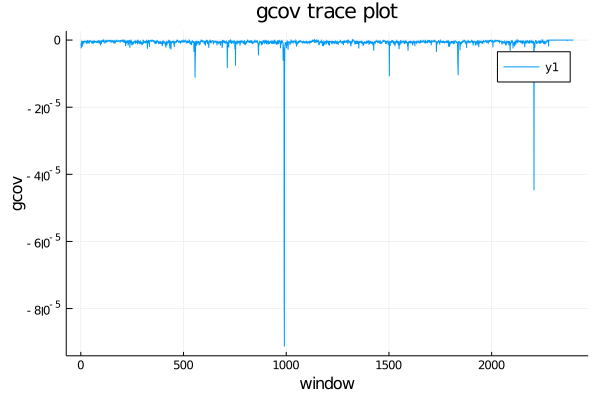

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [11]:
using Plots
x = rg[!,2]; y = rg[!,9]; # These are the plotting data
plot(x,y, title = "gcov trace plot",
        xlabel = "window", ylabel = "gcov")

In [12]:
# Find the window that explanied most gcov
findmin(rg[!,9])

(-9.13339546134185e-5, 991)

In [13]:
@time Nur2ADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:33:17


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.00021655     │ 0.000124004 │ 6.71     │ 0.948   │ 0.948     │
│ 2    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000172611    │ 0.000134543 │ 5.32     │ 0.894   │ 0.921     │
│ 3    │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 7.96993e-5     │ 7.59302e-5  │ 2.45     │ 0.802   │ 0.881333  │
│ 4    │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 2.99678e-5     │ 4.6805e-5   │ 0.92     │ 0.544   │ 0.797     │
│ 5    │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 1.67409e-5     │ 2.89938e-5  │ 0.51     │ 0.53    │ 0.7436    │
│ 6    │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 4.00847e-5     │ 7.48959e-5  │ 1.24     │ 0.44    │ 0.693     │
│ 7    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.45749e-5     │ 3.23061e-5  │ 0.45     │ 0.394   │ 0.650286  │
│ 8    │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 7.40905e-6     │ 1.85324e-5  │ 0.23     │ 0.342   │ 0.61175   │
│ 9    │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 8.90979e-6     │ 1.88359e-5  │ 0.27     │ 0.34    │ 0.581556  │
│ 10   │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 8.67338e-6     │ 1.92756e-5  │ 0.27     │ 0.336   │ 0.557     │
│ 11   │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 5.85508e-6     │ 1.2146e-5   │ 0.18     │ 0.31    │ 0.534545  │
│ 12   │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 7.39822e-6     │ 1.74737e-5  │ 0.23     │ 0.302   │ 0.515167  │
│ 13   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 6.99527e-6     │ 1.75034e-5  │ 0.22     │ 0.298   │ 0.498462  │
│ 14   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 4.99673e-6     │ 1.11075e-5  │ 0.15     │ 0.296   │ 0.484     │
│ 15   │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 9.84919e-6     │ 2.46477e-5  │ 0.3      │ 0.294   │ 0.471333  │
│ 16   │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 6.55466e-6     │ 1.65669e-5  │ 0.2      │ 0.29    │ 0.46      │
│ 17   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 6.39969e-6     │ 1.5464e-5   │ 0.2      │ 0.288   │ 0.449882  │
│ 18   │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 5.7164e-6      │ 1.28256e-5  │ 0.18     │ 0.272   │ 0.44      │
│ 19   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 4.47543e-6     │ 1.06019e-5  │ 0.14     │ 0.272   │ 0.431158  │
│ 20   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 4.81271e-6     │ 1.08625e-5  │ 0.15     │ 0.264   │ 0.4228    │
│ 21   │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 6.37524e-6     │ 1.51723e-5  │ 0.2      │ 0.264   │ 0.415238  │
│ 22   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 3.93561e-6     │ 9.74179e-6  │ 0.12     │ 0.258   │ 0.408091  │
│ 23   │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 6.48959e-6     │ 1.63434e-5  │ 0.2      │ 0.254   │ 0.401391  │
│ 24   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 4.06208e-6     │ 1.0598e-5   │ 0.13     │ 0.246   │ 0.394917  │
│ 25   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 3.86056e-6     │ 9.67769e-6  │ 0.12     │ 0.244   │ 0.38888   │
│ 26   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 5.86098e-6     │ 1.6224e-5   │ 0.18     │ 0.244   │ 0.383308  │
│ 27   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 5.54027e-6     │ 1.6446e-5   │ 0.17     │ 0.242   │ 0.378074  │
│ 28   │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 3.68505e-6     │ 9.39355e-6  │ 0.11     │ 0.24    │ 0.373143  │
│ 29   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 3.26233e-6     │ 7.69648e-6  │ 0.1      │ 0.24    │ 0.368552  │
│ 30   │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 8.18827e-6     │ 2.3958e-5   │ 0.25     │ 0.236   │ 0.364133  │
│ 31   │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 3.81229e-6     │ 9.30682e-6  │ 0.12     │ 0.234   │ 0.359935  │
│ 32   │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 2.84187e-6     │ 7.03788e-6  │ 0.09     │ 0.232   │ 0.355938  │
│ 33   │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 5.28215e-6     │ 1.48461e-5  │ 0.16     │ 0.23    │ 0.352121  │
│ 34   │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 3.21738e-6     │ 7.84763e-6  │ 0.1      │ 0.23    │ 0.348529  │
│ 35   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 3.55245e-6     │ 8.20177e-6  │ 0.11     │ 0.23    │ 0.345143  │
│ 36   │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 3.75866e-6     │ 9.83223e-6  │ 0.11     │ 0.228   │ 0.341889  │
│ 37   │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 3.73813e-6     │ 1.01751e-5  │ 0.12     │ 0.228   │ 0.338811  │
│ 38   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.04994e-6     │ 8.36716e-6  │ 0.1      │ 0.224   │ 0.335789  │
│ 39   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 3.39319e-6     │ 9.83556e-6  │ 0.11     │ 0.224   │ 0.332923  │
│ 40   │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 4.09976e-6     │ 1.07281e-5  │ 0.13     │ 0.222   │ 0.33015   │
│ 41   │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 3.05218e-6     │ 8.95719e-6  │ 0.09     │ 0.22    │ 0.327463  │
│ 42   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 4.3842e-6      │ 1.33375e-5  │ 0.14     │ 0.218   │ 0.324857  │
│ 43   │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 3.01145e-6     │ 6.75927e-6  │ 0.09     │ 0.218   │ 0.322372  │
│ 44   │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.11104e-5     │ 3.68555e-5  │ 0.35     │ 0.218   │ 0.32      │
│ 45   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 2.98763e-6     │ 7.18825e-6  │ 0.09     │ 0.218   │ 0.317733  │
│ 46   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 4.65681e-6     │ 1.38799e-5  │ 0.15     │ 0.216   │ 0.315522  │
│ 47   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 4.37157e-6     │ 1.32301e-5  │ 0.14     │ 0.214   │ 0.313362  │
│ 48   │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 4.07321e-6     │ 1.12735e-5  │ 0.13     │ 0.21    │ 0.311208  │
│ 49   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 3.14473e-6     │ 7.91002e-6  │ 0.1      │ 0.208   │ 0.309102  │
│ 50   │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 3.03242e-6     │ 7.75683e-6  │ 0.09     │ 0.208   │ 0.30708   │
│ 51   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 3.66931e-6     │ 1.12015e-5  │ 0.11     │ 0.208   │ 0.305137  │
│ 52   │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 3.08715e-6     │ 7.87622e-6  │ 0.09     │ 0.206   │ 0.303231  │
│ 53   │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 3.80195e-6     │ 1.17372e-5  │ 0.12     │ 0.206   │ 0.301396  │
│ 54   │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 4.83998e-6     │ 1.37525e-5  │ 0.15     │ 0.206   │ 0.29963   │
│ 55   │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 3.85176e-6     │ 1.04143e-5  │ 0.12     │ 0.206   │ 0.297927  │
│ 56   │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 3.74092e-6     │ 1.04204e-5  │ 0.12     │ 0.204   │ 0.29625   │
│ 57   │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 3.96425e-6     │ 1.15682e-5  │ 0.12     │ 0.202   │ 0.294596  │
│ 58   │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 2.00779e-6     │ 4.41919e-6  │ 0.06     │ 0.202   │ 0.293     │
│ 59   │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 2.60565e-6     │ 6.99277e-6  │ 0.08     │ 0.202   │ 0.291458  │
│ 60   │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 2.82908e-6     │ 6.97464e-6  │ 0.09     │ 0.202   │ 0.289967  │
│ 61   │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 4.52782e-6     │ 1.26227e-5  │ 0.14     │ 0.2     │ 0.288492  │
│ 62   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 4.7723e-6      │ 1.62716e-5  │ 0.15     │ 0.198   │ 0.287032  │
│ 63   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 4.88593e-6     │ 1.43233e-5  │ 0.15     │ 0.198   │ 0.285619  │
│ 64   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.01473e-6     │ 1.90896e-5  │ 0.18     │ 0.196   │ 0.284219  │
│ 65   │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 3.26145e-6     │ 8.98503e-6  │ 0.1      │ 0.196   │ 0.282862  │
│ 66   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.5179e-6      │ 6.69513e-6  │ 0.08     │ 0.196   │ 0.281545  │
│ 67   │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 3.62187e-6     │ 1.11839e-5  │ 0.11     │ 0.194   │ 0.280239  │
│ 68   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 2.7188e-6      │ 6.87289e-6  │ 0.09     │ 0.194   │ 0.278971  │
│ 69   │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 3.22375e-6     │ 9.08446e-6  │ 0.1      │ 0.194   │ 0.277739  │
│ 70   │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 3.48556e-6     │ 9.86876e-6  │ 0.11     │ 0.194   │ 0.276543  │
│ 71   │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 3.44482e-6     │ 9.61238e-6  │ 0.1      │ 0.194   │ 0.27538   │
│ 72   │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 2.88629e-6     │ 7.50044e-6  │ 0.09     │ 0.194   │ 0.27425   │
│ 73   │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.06529e-6     │ 9.27517e-6  │ 0.1      │ 0.192   │ 0.273123  │
│ 74   │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 2.46736e-6     │ 6.53167e-6  │ 0.08     │ 0.192   │ 0.272027  │
│ 75   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.32144e-6     │ 7.02028e-6  │ 0.07     │ 0.188   │ 0.270907  │
│ 76   │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 3.09945e-6     │ 8.37244e-6  │ 0.09     │ 0.188   │ 0.269816  │
│ 77   │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 3.02971e-6     │ 8.94421e-6  │ 0.1      │ 0.188   │ 0.268753  │
│ 78   │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 3.54996e-6     │ 9.65238e-6  │ 0.11     │ 0.188   │ 0.267718  │
│ 79   │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 2.69296e-6     │ 9.04984e-6  │ 0.08     │ 0.188   │ 0.266709  │
│ 80   │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 3.50883e-6     │ 1.24367e-5  │ 0.11     │ 0.188   │ 0.265725  │
│ 81   │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 4.04219e-6     │ 1.3246e-5   │ 0.12     │ 0.186   │ 0.264741  │
│ 82   │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 2.51076e-6     │ 6.89012e-6  │ 0.08     │ 0.186   │ 0.26378   │
│ 83   │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 2.78409e-6     │ 7.83717e-6  │ 0.09     │ 0.186   │ 0.262843  │
│ 84   │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 3.89812e-6     │ 1.4012e-5   │ 0.12     │ 0.184   │ 0.261905  │
│ 85   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.80827e-6     │ 7.68037e-6  │ 0.09     │ 0.184   │ 0.260988  │
│ 86   │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.73098e-6     │ 7.83555e-6  │ 0.09     │ 0.182   │ 0.26007   │
│ 87   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 2.29536e-6     │ 5.88726e-6  │ 0.07     │ 0.182   │ 0.259172  │
│ 88   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 2.95088e-6     │ 9.111e-6    │ 0.09     │ 0.182   │ 0.258295  │
│ 89   │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 2.66446e-6     │ 8.05024e-6  │ 0.08     │ 0.182   │ 0.257438  │
│ 90   │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.0524e-6      │ 9.61408e-6  │ 0.09     │ 0.182   │ 0.2566    │
│ 91   │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 3.21824e-6     │ 9.48383e-6  │ 0.1      │ 0.18    │ 0.255758  │
│ 92   │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 2.98416e-6     │ 9.36416e-6  │ 0.09     │ 0.18    │ 0.254935  │
│ 93   │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 2.10973e-6     │ 5.38003e-6  │ 0.07     │ 0.18    │ 0.254129  │
│ 94   │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 2.88932e-6     │ 9.71131e-6  │ 0.09     │ 0.18    │ 0.25334   │
│ 95   │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.31554e-6     │ 5.90619e-6  │ 0.07     │ 0.178   │ 0.252547  │
│ 96   │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 4.28703e-6     │ 1.46896e-5  │ 0.13     │ 0.178   │ 0.251771  │
│ 97   │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 2.31679e-6     │ 5.97207e-6  │ 0.07     │ 0.178   │ 0.25101   │
│ 98   │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 2.39132e-6     │ 6.10556e-6  │ 0.07     │ 0.178   │ 0.250265  │
│ 99   │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 2.60886e-6     │ 8.009e-6    │ 0.08     │ 0.176   │ 0.249515  │
│ 100  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 2.31988e-6     │ 6.26103e-6  │ 0.07     │ 0.176   │ 0.24878   │
│ 101  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.12831e-6     │ 5.66198e-6  │ 0.07     │ 0.176   │ 0.248059  │
│ 102  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 2.39744e-6     │ 6.61943e-6  │ 0.07     │ 0.176   │ 0.247353  │
│ 103  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.59528e-6     │ 7.71185e-6  │ 0.08     │ 0.176   │ 0.24666   │
│ 104  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.2335e-6      │ 5.84704e-6  │ 0.07     │ 0.176   │ 0.245981  │
│ 105  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 2.63549e-6     │ 7.01105e-6  │ 0.08     │ 0.176   │ 0.245314  │
│ 106  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 2.27561e-6     │ 6.37913e-6  │ 0.07     │ 0.176   │ 0.24466   │
│ 107  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 2.73532e-6     │ 8.15691e-6  │ 0.09     │ 0.176   │ 0.244019  │
│ 108  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.16406e-6     │ 6.15386e-6  │ 0.07     │ 0.174   │ 0.24337   │
│ 109  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 3.29219e-6     │ 1.15964e-5  │ 0.1      │ 0.174   │ 0.242734  │
│ 110  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 3.19844e-6     │ 1.09776e-5  │ 0.1      │ 0.174   │ 0.242109  │
│ 111  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.9782e-6      │ 5.19305e-6  │ 0.06     │ 0.172   │ 0.241477  │
│ 112  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 2.47972e-6     │ 7.80666e-6  │ 0.08     │ 0.172   │ 0.240857  │
│ 113  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 2.25206e-6     │ 5.59236e-6  │ 0.07     │ 0.172   │ 0.240248  │
│ 114  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.65835e-6     │ 1.0268e-5   │ 0.08     │ 0.172   │ 0.239649  │
│ 115  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 2.29054e-6     │ 6.57741e-6  │ 0.07     │ 0.172   │ 0.239061  │
│ 116  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 2.30732e-6     │ 6.16424e-6  │ 0.07     │ 0.17    │ 0.238466  │
│ 117  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.50945e-6     │ 6.81744e-6  │ 0.08     │ 0.17    │ 0.23788   │
│ 118  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 2.64553e-6     │ 7.405e-6    │ 0.08     │ 0.17    │ 0.237305  │
│ 119  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.80598e-6     │ 8.84319e-6  │ 0.09     │ 0.17    │ 0.236739  │
│ 120  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 2.17303e-6     │ 6.99709e-6  │ 0.07     │ 0.17    │ 0.236183  │
│ 121  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.46161e-6     │ 6.72188e-6  │ 0.08     │ 0.168   │ 0.23562   │
│ 122  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.67444e-6     │ 8.29979e-6  │ 0.08     │ 0.168   │ 0.235066  │
│ 123  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.40152e-6     │ 7.53668e-6  │ 0.07     │ 0.168   │ 0.23452   │
│ 124  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 3.12297e-6     │ 9.58499e-6  │ 0.1      │ 0.166   │ 0.233968  │
│ 125  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 2.75411e-6     │ 1.03517e-5  │ 0.09     │ 0.166   │ 0.233424  │
│ 126  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 2.01813e-6     │ 6.3338e-6   │ 0.06     │ 0.166   │ 0.232889  │
│ 127  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 2.53678e-6     │ 7.27437e-6  │ 0.08     │ 0.166   │ 0.232362  │
│ 128  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 2.44064e-6     │ 6.63345e-6  │ 0.08     │ 0.166   │ 0.231844  │
│ 129  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 3.05305e-6     │ 8.88736e-6  │ 0.09     │ 0.166   │ 0.231333  │
│ 130  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 2.27366e-6     │ 6.07123e-6  │ 0.07     │ 0.166   │ 0.230831  │
│ 131  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 2.18489e-6     │ 6.40623e-6  │ 0.07     │ 0.166   │ 0.230336  │
│ 132  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.00176e-6     │ 5.34349e-6  │ 0.06     │ 0.166   │ 0.229848  │
│ 133  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 2.75762e-6     │ 8.18001e-6  │ 0.09     │ 0.166   │ 0.229368  │
│ 134  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 2.56962e-6     │ 7.72288e-6  │ 0.08     │ 0.166   │ 0.228896  │
│ 135  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.92924e-6     │ 5.90171e-6  │ 0.06     │ 0.164   │ 0.228415  │
│ 136  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 2.94247e-6     │ 1.05708e-5  │ 0.09     │ 0.164   │ 0.227941  │
│ 137  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 2.52484e-6     │ 8.10916e-6  │ 0.08     │ 0.164   │ 0.227474  │
│ 138  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 3.13474e-6     │ 1.15776e-5  │ 0.09     │ 0.164   │ 0.227014  │
│ 139  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 2.24965e-6     │ 6.16315e-6  │ 0.07     │ 0.164   │ 0.226561  │
│ 140  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 2.62491e-6     │ 8.95031e-6  │ 0.08     │ 0.162   │ 0.2261    │
│ 141  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 2.14433e-6     │ 5.95109e-6  │ 0.07     │ 0.162   │ 0.225645  │
│ 142  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 2.59079e-6     │ 7.62267e-6  │ 0.08     │ 0.162   │ 0.225197  │
│ 143  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 2.49181e-6     │ 8.43212e-6  │ 0.08     │ 0.162   │ 0.224755  │
│ 144  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.80158e-6     │ 5.15133e-6  │ 0.06     │ 0.162   │ 0.224319  │
│ 145  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 3.869e-6       │ 1.31233e-5  │ 0.12     │ 0.162   │ 0.22389   │
│ 146  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 2.15953e-6     │ 7.49934e-6  │ 0.07     │ 0.16    │ 0.223452  │
│ 147  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.21951e-6     │ 6.33216e-6  │ 0.07     │ 0.16    │ 0.22302   │
│ 148  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.57891e-6     │ 8.2056e-6   │ 0.08     │ 0.16    │ 0.222595  │
│ 149  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 2.2346e-6      │ 6.44214e-6  │ 0.07     │ 0.16    │ 0.222174  │
│ 150  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.74342e-6     │ 9.41678e-6  │ 0.09     │ 0.16    │ 0.22176   │
│ 151  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 2.11425e-6     │ 6.01502e-6  │ 0.07     │ 0.16    │ 0.221351  │
│ 152  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 2.27647e-6     │ 6.63629e-6  │ 0.07     │ 0.16    │ 0.220947  │
│ 153  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 2.03826e-6     │ 5.50805e-6  │ 0.06     │ 0.16    │ 0.220549  │
│ 154  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 2.43967e-6     │ 8.2184e-6   │ 0.08     │ 0.16    │ 0.220156  │
│ 155  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 1.94902e-6     │ 5.0884e-6   │ 0.06     │ 0.158   │ 0.219755  │
│ 156  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 2.17921e-6     │ 6.29207e-6  │ 0.07     │ 0.158   │ 0.219359  │
│ 157  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.66772e-6     │ 4.54159e-6  │ 0.05     │ 0.158   │ 0.218968  │
│ 158  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.93646e-6     │ 5.99647e-6  │ 0.06     │ 0.158   │ 0.218582  │
│ 159  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 2.92239e-6     │ 1.04306e-5  │ 0.09     │ 0.158   │ 0.218201  │
│ 160  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.46624e-6     │ 9.19939e-6  │ 0.08     │ 0.158   │ 0.217825  │
│ 161  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 1.93024e-6     │ 5.05529e-6  │ 0.06     │ 0.158   │ 0.217453  │
│ 162  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.76831e-6     │ 4.92036e-6  │ 0.06     │ 0.156   │ 0.217074  │
│ 163  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.55248e-6     │ 3.72693e-6  │ 0.05     │ 0.156   │ 0.216699  │
│ 164  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.58436e-6     │ 3.81201e-6  │ 0.05     │ 0.156   │ 0.216329  │
│ 165  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 2.26144e-6     │ 7.43339e-6  │ 0.07     │ 0.156   │ 0.215964  │
│ 166  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.79307e-6     │ 5.34119e-6  │ 0.06     │ 0.154   │ 0.21559   │
│ 167  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.83896e-6     │ 4.74331e-6  │ 0.06     │ 0.154   │ 0.215222  │
│ 168  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 2.03569e-6     │ 6.46665e-6  │ 0.06     │ 0.154   │ 0.214857  │
│ 169  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 1.93146e-6     │ 4.98133e-6  │ 0.06     │ 0.154   │ 0.214497  │
│ 170  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.62611e-6     │ 4.34633e-6  │ 0.05     │ 0.154   │ 0.214141  │
│ 171  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.94211e-6     │ 5.95953e-6  │ 0.06     │ 0.152   │ 0.213778  │
│ 172  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 2.14753e-6     │ 7.31144e-6  │ 0.07     │ 0.152   │ 0.213419  │
│ 173  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 2.28288e-6     │ 8.99327e-6  │ 0.07     │ 0.152   │ 0.213064  │
│ 174  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.20713e-6     │ 6.62654e-6  │ 0.07     │ 0.152   │ 0.212713  │
│ 175  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.75235e-6     │ 4.56896e-6  │ 0.05     │ 0.152   │ 0.212366  │
│ 176  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.55491e-6     │ 4.14907e-6  │ 0.05     │ 0.152   │ 0.212023  │
│ 177  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.6075e-6      │ 3.98509e-6  │ 0.05     │ 0.152   │ 0.211684  │
│ 178  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.51663e-6     │ 8.51009e-6  │ 0.08     │ 0.152   │ 0.211348  │
│ 179  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.83765e-6     │ 5.5619e-6   │ 0.06     │ 0.152   │ 0.211017  │
│ 180  │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 2.38178e-6     │ 8.40815e-6  │ 0.07     │ 0.15    │ 0.210678  │
│ 181  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.47413e-6     │ 3.68392e-6  │ 0.05     │ 0.15    │ 0.210343  │
│ 182  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.71282e-6     │ 4.18511e-6  │ 0.05     │ 0.15    │ 0.210011  │
│ 183  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 1.4868e-6      │ 3.60066e-6  │ 0.05     │ 0.15    │ 0.209683  │
│ 184  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.91949e-6     │ 5.37166e-6  │ 0.06     │ 0.15    │ 0.209359  │
│ 185  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 1.90907e-6     │ 5.49257e-6  │ 0.06     │ 0.15    │ 0.209038  │
│ 186  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 2.70006e-6     │ 8.7543e-6   │ 0.08     │ 0.15    │ 0.20872   │
│ 187  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.83567e-6     │ 4.81996e-6  │ 0.06     │ 0.15    │ 0.208406  │
│ 188  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.71009e-6     │ 4.64798e-6  │ 0.05     │ 0.15    │ 0.208096  │
│ 189  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.65931e-6     │ 5.74681e-6  │ 0.05     │ 0.148   │ 0.207778  │
│ 190  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.74876e-6     │ 5.32435e-6  │ 0.06     │ 0.148   │ 0.207463  │
│ 191  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.98863e-6     │ 5.47537e-6  │ 0.06     │ 0.148   │ 0.207152  │
│ 192  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 2.10531e-6     │ 5.72623e-6  │ 0.06     │ 0.148   │ 0.206844  │
│ 193  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 2.11817e-6     │ 7.09983e-6  │ 0.06     │ 0.148   │ 0.206539  │
│ 194  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.78724e-6     │ 4.83821e-6  │ 0.06     │ 0.148   │ 0.206237  │
│ 195  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 2.29524e-6     │ 8.4016e-6   │ 0.07     │ 0.148   │ 0.205938  │
│ 196  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.57055e-6     │ 4.15068e-6  │ 0.05     │ 0.148   │ 0.205643  │
│ 197  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 2.03086e-6     │ 5.8214e-6   │ 0.06     │ 0.148   │ 0.20535   │
│ 198  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.90518e-6     │ 5.41356e-6  │ 0.06     │ 0.148   │ 0.205061  │
│ 199  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.69194e-6     │ 4.48869e-6  │ 0.05     │ 0.148   │ 0.204774  │
│ 200  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 2.07229e-6     │ 6.57426e-6  │ 0.07     │ 0.148   │ 0.20449   │
│ 201  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.18144e-6     │ 7.38818e-6  │ 0.07     │ 0.148   │ 0.204209  │
│ 202  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 2.16867e-6     │ 6.83067e-6  │ 0.07     │ 0.148   │ 0.203931  │
│ 203  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 2.2539e-6      │ 7.03709e-6  │ 0.07     │ 0.148   │ 0.203655  │
│ 204  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.98714e-6     │ 5.77925e-6  │ 0.06     │ 0.146   │ 0.203373  │
│ 205  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.6069e-6      │ 4.1834e-6   │ 0.05     │ 0.146   │ 0.203093  │
│ 206  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 2.00346e-6     │ 6.03818e-6  │ 0.06     │ 0.146   │ 0.202816  │
│ 207  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 2.37638e-6     │ 7.38629e-6  │ 0.07     │ 0.146   │ 0.202541  │
│ 208  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.03831e-6     │ 6.03552e-6  │ 0.06     │ 0.146   │ 0.202269  │
│ 209  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.92167e-6     │ 6.49286e-6  │ 0.06     │ 0.146   │ 0.202     │
│ 210  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.70289e-6     │ 4.44633e-6  │ 0.05     │ 0.146   │ 0.201733  │
│ 211  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.86245e-6     │ 5.31854e-6  │ 0.06     │ 0.146   │ 0.201469  │
│ 212  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.70971e-6     │ 4.87155e-6  │ 0.05     │ 0.146   │ 0.201208  │
│ 213  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.84727e-6     │ 9.96708e-6  │ 0.09     │ 0.146   │ 0.200948  │
│ 214  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.3837e-6      │ 4.12485e-6  │ 0.04     │ 0.146   │ 0.200692  │
│ 215  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.73919e-6     │ 4.73079e-6  │ 0.05     │ 0.146   │ 0.200437  │
│ 216  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.55255e-6     │ 4.1158e-6   │ 0.05     │ 0.146   │ 0.200185  │
│ 217  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 2.45403e-6     │ 9.09346e-6  │ 0.07     │ 0.146   │ 0.199935  │
│ 218  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 1.8214e-6      │ 5.33317e-6  │ 0.06     │ 0.146   │ 0.199688  │
│ 219  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 2.87809e-6     │ 1.10453e-5  │ 0.09     │ 0.146   │ 0.199443  │
│ 220  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.00545e-6     │ 6.14039e-6  │ 0.06     │ 0.146   │ 0.1992    │
│ 221  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.55454e-6     │ 3.79474e-6  │ 0.05     │ 0.146   │ 0.198959  │
│ 222  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.74679e-6     │ 4.72639e-6  │ 0.05     │ 0.144   │ 0.198712  │
│ 223  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 1.75727e-6     │ 5.10814e-6  │ 0.05     │ 0.144   │ 0.198466  │
│ 224  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.63755e-6     │ 4.33778e-6  │ 0.05     │ 0.144   │ 0.198223  │
│ 225  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.52947e-6     │ 4.39472e-6  │ 0.05     │ 0.144   │ 0.197982  │
│ 226  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.66198e-6     │ 5.11887e-6  │ 0.05     │ 0.144   │ 0.197743  │
│ 227  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.77044e-6     │ 5.36969e-6  │ 0.06     │ 0.144   │ 0.197507  │
│ 228  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 2.00645e-6     │ 6.80626e-6  │ 0.06     │ 0.144   │ 0.197272  │
│ 229  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.85119e-6     │ 5.1829e-6   │ 0.06     │ 0.144   │ 0.197039  │
│ 230  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.57149e-6     │ 4.60255e-6  │ 0.05     │ 0.144   │ 0.196809  │
│ 231  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 2.02894e-6     │ 6.25181e-6  │ 0.06     │ 0.144   │ 0.19658   │
│ 232  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.82435e-6     │ 5.24198e-6  │ 0.06     │ 0.144   │ 0.196353  │
│ 233  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.96694e-6     │ 6.35599e-6  │ 0.06     │ 0.144   │ 0.196129  │
│ 234  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.45451e-6     │ 3.48794e-6  │ 0.05     │ 0.144   │ 0.195906  │
│ 235  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 2.05769e-6     │ 6.07507e-6  │ 0.06     │ 0.142   │ 0.195677  │
│ 236  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 1.70407e-6     │ 4.81545e-6  │ 0.05     │ 0.142   │ 0.195449  │
│ 237  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.77878e-6     │ 5.00404e-6  │ 0.06     │ 0.142   │ 0.195224  │
│ 238  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 3.14387e-6     │ 1.02587e-5  │ 0.1      │ 0.142   │ 0.195     │
│ 239  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 2.063e-6       │ 6.87549e-6  │ 0.06     │ 0.142   │ 0.194778  │
│ 240  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 2.82249e-6     │ 9.45618e-6  │ 0.09     │ 0.142   │ 0.194558  │
│ 241  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.9211e-6      │ 5.82964e-6  │ 0.06     │ 0.142   │ 0.19434   │
│ 242  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.96571e-6     │ 6.65839e-6  │ 0.06     │ 0.142   │ 0.194124  │
│ 243  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 2.90012e-6     │ 1.16626e-5  │ 0.09     │ 0.142   │ 0.193909  │
│ 244  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.57959e-6     │ 4.51043e-6  │ 0.05     │ 0.142   │ 0.193697  │
│ 245  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 2.14805e-6     │ 6.09688e-6  │ 0.07     │ 0.142   │ 0.193486  │
│ 246  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 2.08361e-6     │ 6.94927e-6  │ 0.07     │ 0.142   │ 0.193276  │
│ 247  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 3.35683e-6     │ 1.16282e-5  │ 0.1      │ 0.142   │ 0.193069  │
│ 248  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.77156e-6     │ 5.38626e-6  │ 0.06     │ 0.142   │ 0.192863  │
│ 249  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 1.56833e-6     │ 4.21715e-6  │ 0.05     │ 0.142   │ 0.192659  │
│ 250  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.66577e-6     │ 4.62924e-6  │ 0.05     │ 0.142   │ 0.192456  │
│ 251  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.52162e-6     │ 4.44062e-6  │ 0.05     │ 0.14    │ 0.192247  │
│ 252  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.79406e-6     │ 5.97693e-6  │ 0.06     │ 0.14    │ 0.19204   │
│ 253  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 2.42086e-6     │ 8.55314e-6  │ 0.08     │ 0.14    │ 0.191834  │
│ 254  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.79949e-6     │ 5.42995e-6  │ 0.06     │ 0.14    │ 0.19163   │
│ 255  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 2.1675e-6      │ 6.73898e-6  │ 0.07     │ 0.14    │ 0.191427  │
│ 256  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.61083e-6     │ 4.59991e-6  │ 0.05     │ 0.14    │ 0.191227  │
│ 257  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.81921e-6     │ 5.21003e-6  │ 0.06     │ 0.14    │ 0.191027  │
│ 258  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.71903e-6     │ 6.00554e-6  │ 0.06     │ 0.14    │ 0.190829  │
│ 259  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.80867e-6     │ 5.911e-6    │ 0.06     │ 0.14    │ 0.190633  │
│ 260  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.71751e-6     │ 5.57515e-6  │ 0.05     │ 0.14    │ 0.190438  │
│ 261  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.94859e-6     │ 6.42333e-6  │ 0.06     │ 0.14    │ 0.190245  │
│ 262  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.45231e-6     │ 3.85425e-6  │ 0.05     │ 0.14    │ 0.190053  │
│ 263  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.80531e-6     │ 5.19555e-6  │ 0.06     │ 0.14    │ 0.189863  │
│ 264  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.4805e-6      │ 4.22617e-6  │ 0.05     │ 0.14    │ 0.189674  │
│ 265  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.80609e-6     │ 5.68585e-6  │ 0.06     │ 0.14    │ 0.189487  │
│ 266  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 2.26535e-6     │ 8.45895e-6  │ 0.07     │ 0.14    │ 0.189301  │
│ 267  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.4882e-6      │ 3.92204e-6  │ 0.05     │ 0.14    │ 0.189116  │
│ 268  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.68855e-6     │ 5.28669e-6  │ 0.05     │ 0.14    │ 0.188933  │
│ 269  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.54778e-6     │ 4.09634e-6  │ 0.05     │ 0.14    │ 0.188751  │
│ 270  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 2.04012e-6     │ 6.47045e-6  │ 0.06     │ 0.14    │ 0.18857   │
│ 271  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.60912e-6     │ 4.08521e-6  │ 0.05     │ 0.138   │ 0.188384  │
│ 272  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.67935e-6     │ 5.12063e-6  │ 0.05     │ 0.138   │ 0.188199  │
│ 273  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.60776e-6     │ 4.83529e-6  │ 0.05     │ 0.138   │ 0.188015  │
│ 274  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.83651e-6     │ 4.9705e-6   │ 0.06     │ 0.138   │ 0.187832  │
│ 275  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.33499e-6     │ 3.26821e-6  │ 0.04     │ 0.138   │ 0.187651  │
│ 276  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.57079e-6     │ 3.86852e-6  │ 0.05     │ 0.138   │ 0.187471  │
│ 277  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.98354e-6     │ 6.25385e-6  │ 0.06     │ 0.138   │ 0.187292  │
│ 278  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.94023e-6     │ 6.44054e-6  │ 0.06     │ 0.138   │ 0.187115  │
│ 279  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.74865e-6     │ 5.65355e-6  │ 0.05     │ 0.138   │ 0.186939  │
│ 280  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.83897e-6     │ 5.41616e-6  │ 0.06     │ 0.138   │ 0.186764  │
│ 281  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 1.38944e-6     │ 3.52684e-6  │ 0.04     │ 0.138   │ 0.186591  │
│ 282  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.7514e-6      │ 4.80803e-6  │ 0.05     │ 0.138   │ 0.186418  │
│ 283  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.79716e-6     │ 5.18357e-6  │ 0.06     │ 0.138   │ 0.186247  │
│ 284  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 1.69147e-6     │ 5.39432e-6  │ 0.05     │ 0.138   │ 0.186077  │
│ 285  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.83198e-6     │ 5.60009e-6  │ 0.06     │ 0.138   │ 0.185909  │
│ 286  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 2.03886e-6     │ 6.87527e-6  │ 0.06     │ 0.138   │ 0.185741  │
│ 287  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 1.86423e-6     │ 5.55914e-6  │ 0.06     │ 0.138   │ 0.185575  │
│ 288  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 2.02571e-6     │ 6.50918e-6  │ 0.07     │ 0.138   │ 0.18541   │
│ 289  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.63676e-6     │ 5.04417e-6  │ 0.05     │ 0.138   │ 0.185246  │
│ 290  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.09936e-6     │ 7.02256e-6  │ 0.07     │ 0.138   │ 0.185083  │
│ 291  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 1.75213e-6     │ 5.91066e-6  │ 0.05     │ 0.136   │ 0.184914  │
│ 292  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.5291e-6      │ 4.8751e-6   │ 0.05     │ 0.136   │ 0.184747  │
│ 293  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.72032e-6     │ 5.65967e-6  │ 0.05     │ 0.136   │ 0.18458   │
│ 294  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.76655e-6     │ 5.86606e-6  │ 0.05     │ 0.136   │ 0.184415  │
│ 295  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 2.47146e-6     │ 9.11249e-6  │ 0.08     │ 0.136   │ 0.184251  │
│ 296  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.56243e-6     │ 4.20923e-6  │ 0.05     │ 0.136   │ 0.184088  │
│ 297  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.62356e-6     │ 4.38591e-6  │ 0.05     │ 0.136   │ 0.183926  │
│ 298  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 2.50221e-6     │ 1.02302e-5  │ 0.08     │ 0.136   │ 0.183765  │
│ 299  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.67701e-6     │ 5.03669e-6  │ 0.05     │ 0.136   │ 0.183605  │
│ 300  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.83803e-6     │ 7.08184e-6  │ 0.06     │ 0.136   │ 0.183447  │
│ 301  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.89605e-6     │ 5.37019e-6  │ 0.06     │ 0.136   │ 0.183289  │
│ 302  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.9102e-6      │ 5.8079e-6   │ 0.06     │ 0.136   │ 0.183132  │
│ 303  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.81614e-6     │ 5.37886e-6  │ 0.06     │ 0.136   │ 0.182977  │
│ 304  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.68023e-6     │ 5.29132e-6  │ 0.05     │ 0.136   │ 0.182822  │
│ 305  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.91166e-6     │ 5.81321e-6  │ 0.06     │ 0.136   │ 0.182669  │
│ 306  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.75068e-6     │ 5.93265e-6  │ 0.05     │ 0.136   │ 0.182516  │
│ 307  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 1.60355e-6     │ 4.59189e-6  │ 0.05     │ 0.134   │ 0.182358  │
│ 308  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.67061e-6     │ 4.58589e-6  │ 0.05     │ 0.134   │ 0.182201  │
│ 309  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.56664e-6     │ 4.42707e-6  │ 0.05     │ 0.134   │ 0.182045  │
│ 310  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.56167e-6     │ 4.02792e-6  │ 0.05     │ 0.134   │ 0.18189   │
│ 311  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.69251e-6     │ 6.16154e-6  │ 0.05     │ 0.134   │ 0.181736  │
│ 312  │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 2.07124e-6     │ 7.66591e-6  │ 0.06     │ 0.134   │ 0.181583  │
│ 313  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.39886e-6     │ 3.59235e-6  │ 0.04     │ 0.134   │ 0.181431  │
│ 314  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.45043e-6     │ 4.24115e-6  │ 0.05     │ 0.134   │ 0.18128   │
│ 315  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.48035e-6     │ 3.97056e-6  │ 0.05     │ 0.134   │ 0.18113   │
│ 316  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.59912e-6     │ 4.37839e-6  │ 0.05     │ 0.134   │ 0.180981  │
│ 317  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.69149e-6     │ 6.71732e-6  │ 0.05     │ 0.134   │ 0.180833  │
│ 318  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 1.32158e-6     │ 3.53853e-6  │ 0.04     │ 0.134   │ 0.180686  │
│ 319  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 1.98967e-6     │ 6.52323e-6  │ 0.06     │ 0.134   │ 0.180539  │
│ 320  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.68942e-6     │ 4.97638e-6  │ 0.05     │ 0.134   │ 0.180394  │
│ 321  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.5859e-6      │ 4.15485e-6  │ 0.05     │ 0.134   │ 0.180249  │
│ 322  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.65112e-6     │ 5.02026e-6  │ 0.05     │ 0.134   │ 0.180106  │
│ 323  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.66938e-6     │ 5.00542e-6  │ 0.05     │ 0.134   │ 0.179963  │
│ 324  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.71683e-6     │ 6.42941e-6  │ 0.05     │ 0.134   │ 0.179821  │
│ 325  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.5138e-6      │ 4.3561e-6   │ 0.05     │ 0.134   │ 0.17968   │
│ 326  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.43145e-6     │ 3.98265e-6  │ 0.04     │ 0.134   │ 0.17954   │
│ 327  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.81784e-6     │ 7.02306e-6  │ 0.06     │ 0.134   │ 0.179401  │
│ 328  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.39571e-6     │ 4.0158e-6   │ 0.04     │ 0.134   │ 0.179262  │
│ 329  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.5396e-6      │ 4.45902e-6  │ 0.05     │ 0.134   │ 0.179125  │
│ 330  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 2.05397e-6     │ 7.37374e-6  │ 0.06     │ 0.132   │ 0.178982  │
│ 331  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.65358e-6     │ 4.81204e-6  │ 0.05     │ 0.132   │ 0.17884   │
│ 332  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.44471e-6     │ 4.0385e-6   │ 0.04     │ 0.132   │ 0.178699  │
│ 333  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 2.47245e-6     │ 9.59207e-6  │ 0.08     │ 0.132   │ 0.178559  │
│ 334  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 1.3056e-6      │ 3.3595e-6   │ 0.04     │ 0.132   │ 0.178419  │
│ 335  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.48305e-6     │ 4.45763e-6  │ 0.05     │ 0.132   │ 0.178281  │
│ 336  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.65451e-6     │ 5.78061e-6  │ 0.05     │ 0.132   │ 0.178143  │
│ 337  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.31121e-6     │ 3.39604e-6  │ 0.04     │ 0.132   │ 0.178006  │
│ 338  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.55913e-6     │ 4.57189e-6  │ 0.05     │ 0.132   │ 0.17787   │
│ 339  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 2.10048e-6     │ 6.36079e-6  │ 0.07     │ 0.132   │ 0.177735  │
│ 340  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 2.08879e-6     │ 7.00023e-6  │ 0.07     │ 0.132   │ 0.1776    │
│ 341  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.27769e-6     │ 3.03394e-6  │ 0.04     │ 0.132   │ 0.177466  │
│ 342  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.55736e-6     │ 4.54788e-6  │ 0.05     │ 0.132   │ 0.177333  │
│ 343  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.88123e-6     │ 5.72366e-6  │ 0.06     │ 0.132   │ 0.177201  │
│ 344  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.34033e-6     │ 3.87333e-6  │ 0.04     │ 0.132   │ 0.17707   │
│ 345  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.4872e-6      │ 5.02313e-6  │ 0.05     │ 0.132   │ 0.176939  │
│ 346  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 1.98567e-6     │ 5.79037e-6  │ 0.06     │ 0.132   │ 0.176809  │
│ 347  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.1205e-6      │ 7.81752e-6  │ 0.07     │ 0.132   │ 0.17668   │
│ 348  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.55591e-6     │ 4.18189e-6  │ 0.05     │ 0.132   │ 0.176552  │
│ 349  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.53704e-6     │ 4.25292e-6  │ 0.05     │ 0.132   │ 0.176424  │
│ 350  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.86033e-6     │ 6.0764e-6   │ 0.06     │ 0.132   │ 0.176297  │
│ 351  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.85947e-6     │ 5.87193e-6  │ 0.06     │ 0.132   │ 0.176171  │
│ 352  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 1.7977e-6      │ 5.89858e-6  │ 0.06     │ 0.132   │ 0.176045  │
│ 353  │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.39421e-6     │ 3.51273e-6  │ 0.04     │ 0.132   │ 0.175921  │
│ 354  │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 2.23102e-6     │ 8.00093e-6  │ 0.07     │ 0.132   │ 0.175797  │
│ 355  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.53543e-6     │ 6.69944e-6  │ 0.05     │ 0.132   │ 0.175673  │
│ 356  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 1.9379e-6      │ 6.82273e-6  │ 0.06     │ 0.132   │ 0.175551  │
│ 357  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 1.63989e-6     │ 4.87253e-6  │ 0.05     │ 0.132   │ 0.175429  │
│ 358  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.82203e-6     │ 6.14931e-6  │ 0.06     │ 0.132   │ 0.175307  │
│ 359  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.33882e-6     │ 3.6302e-6   │ 0.04     │ 0.132   │ 0.175187  │
│ 360  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.58124e-6     │ 4.38729e-6  │ 0.05     │ 0.13    │ 0.175061  │
│ 361  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 1.76493e-6     │ 6.06699e-6  │ 0.06     │ 0.13    │ 0.174936  │
│ 362  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.48308e-6     │ 4.07474e-6  │ 0.05     │ 0.13    │ 0.174812  │
│ 363  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.61689e-6     │ 4.53162e-6  │ 0.05     │ 0.13    │ 0.174689  │
│ 364  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.75538e-6     │ 5.89017e-6  │ 0.05     │ 0.13    │ 0.174566  │
│ 365  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 1.50429e-6     │ 4.52901e-6  │ 0.05     │ 0.13    │ 0.174444  │
│ 366  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.50038e-6     │ 4.72584e-6  │ 0.05     │ 0.13    │ 0.174322  │
│ 367  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.52955e-6     │ 4.45637e-6  │ 0.05     │ 0.13    │ 0.174202  │
│ 368  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.98571e-6     │ 6.37943e-6  │ 0.06     │ 0.13    │ 0.174082  │
│ 369  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.50256e-6     │ 4.10426e-6  │ 0.05     │ 0.13    │ 0.173962  │
│ 370  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 1.60874e-6     │ 4.80625e-6  │ 0.05     │ 0.13    │ 0.173843  │
│ 371  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 1.76789e-6     │ 5.67594e-6  │ 0.05     │ 0.13    │ 0.173725  │
│ 372  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.78434e-6     │ 6.4878e-6   │ 0.06     │ 0.13    │ 0.173608  │
│ 373  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 1.38125e-6     │ 3.75502e-6  │ 0.04     │ 0.13    │ 0.173491  │
│ 374  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.82355e-6     │ 6.55915e-6  │ 0.06     │ 0.13    │ 0.173374  │
│ 375  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.45733e-6     │ 3.36584e-6  │ 0.04     │ 0.13    │ 0.173259  │
│ 376  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.43796e-6     │ 4.39752e-6  │ 0.04     │ 0.13    │ 0.173144  │
│ 377  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.54437e-6     │ 4.16753e-6  │ 0.05     │ 0.13    │ 0.173029  │
│ 378  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 2.03656e-6     │ 7.15388e-6  │ 0.06     │ 0.13    │ 0.172915  │
│ 379  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.47237e-6     │ 4.10519e-6  │ 0.05     │ 0.13    │ 0.172802  │
│ 380  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.75452e-6     │ 5.94728e-6  │ 0.05     │ 0.13    │ 0.172689  │
│ 381  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.32939e-6     │ 3.56507e-6  │ 0.04     │ 0.13    │ 0.172577  │
│ 382  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.97858e-6     │ 6.16196e-6  │ 0.06     │ 0.13    │ 0.172466  │
│ 383  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.62766e-6     │ 5.89448e-6  │ 0.05     │ 0.13    │ 0.172355  │
│ 384  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.63846e-6     │ 5.32902e-6  │ 0.05     │ 0.13    │ 0.172245  │
│ 385  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.73192e-6     │ 5.23024e-6  │ 0.05     │ 0.13    │ 0.172135  │
│ 386  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.57389e-6     │ 5.44271e-6  │ 0.05     │ 0.128   │ 0.172021  │
│ 387  │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.42014e-6     │ 3.98796e-6  │ 0.04     │ 0.128   │ 0.171907  │
│ 388  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.34772e-6     │ 3.60815e-6  │ 0.04     │ 0.128   │ 0.171794  │
│ 389  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.57898e-6     │ 4.56196e-6  │ 0.05     │ 0.128   │ 0.171681  │
│ 390  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.51539e-6     │ 4.52988e-6  │ 0.05     │ 0.128   │ 0.171569  │
│ 391  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.2408e-6      │ 3.26139e-6  │ 0.04     │ 0.128   │ 0.171458  │
│ 392  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.39124e-6     │ 4.04156e-6  │ 0.04     │ 0.128   │ 0.171347  │
│ 393  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.51889e-6     │ 4.6718e-6   │ 0.05     │ 0.128   │ 0.171237  │
│ 394  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.61346e-6     │ 5.09354e-6  │ 0.05     │ 0.128   │ 0.171127  │
│ 395  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.67126e-6     │ 5.33295e-6  │ 0.05     │ 0.128   │ 0.171018  │
│ 396  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 2.38009e-6     │ 1.10693e-5  │ 0.07     │ 0.128   │ 0.170909  │
│ 397  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.7227e-6      │ 5.50137e-6  │ 0.05     │ 0.128   │ 0.170801  │
│ 398  │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.59489e-6     │ 4.82936e-6  │ 0.05     │ 0.128   │ 0.170693  │
│ 399  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.57738e-6     │ 4.39096e-6  │ 0.05     │ 0.128   │ 0.170586  │
│ 400  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.39076e-6     │ 3.75849e-6  │ 0.04     │ 0.128   │ 0.17048   │
│ 401  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.55138e-6     │ 4.80926e-6  │ 0.05     │ 0.128   │ 0.170374  │
│ 402  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.60631e-6     │ 4.46868e-6  │ 0.05     │ 0.128   │ 0.170269  │
│ 403  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.4523e-6      │ 3.99738e-6  │ 0.05     │ 0.128   │ 0.170164  │
│ 404  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.78585e-6     │ 5.76416e-6  │ 0.05     │ 0.128   │ 0.170059  │
│ 405  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 1.7345e-6      │ 5.89465e-6  │ 0.05     │ 0.128   │ 0.169956  │
│ 406  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 1.47662e-6     │ 4.59587e-6  │ 0.05     │ 0.128   │ 0.169852  │
│ 407  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.51364e-6     │ 4.39246e-6  │ 0.05     │ 0.128   │ 0.169749  │
│ 408  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.23697e-6     │ 3.03161e-6  │ 0.04     │ 0.128   │ 0.169647  │
│ 409  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 2.33152e-6     │ 8.51232e-6  │ 0.07     │ 0.128   │ 0.169545  │
│ 410  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.45667e-6     │ 4.17422e-6  │ 0.05     │ 0.126   │ 0.169439  │
│ 411  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.46922e-6     │ 4.91271e-6  │ 0.05     │ 0.126   │ 0.169333  │
│ 412  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.50967e-6     │ 5.42199e-6  │ 0.05     │ 0.126   │ 0.169228  │
│ 413  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.59542e-6     │ 5.42627e-6  │ 0.05     │ 0.126   │ 0.169123  │
│ 414  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.67841e-6     │ 5.3723e-6   │ 0.05     │ 0.126   │ 0.169019  │
│ 415  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.24461e-6     │ 2.86801e-6  │ 0.04     │ 0.126   │ 0.168916  │
│ 416  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 1.56818e-6     │ 4.72463e-6  │ 0.05     │ 0.126   │ 0.168813  │
│ 417  │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.93847e-6     │ 6.82578e-6  │ 0.06     │ 0.126   │ 0.16871   │
│ 418  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.83712e-6     │ 5.81041e-6  │ 0.06     │ 0.126   │ 0.168608  │
│ 419  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.32908e-6     │ 3.58628e-6  │ 0.04     │ 0.126   │ 0.168506  │
│ 420  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.345e-6       │ 3.79784e-6  │ 0.04     │ 0.126   │ 0.168405  │
│ 421  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.33938e-6     │ 4.0504e-6   │ 0.04     │ 0.126   │ 0.168304  │
│ 422  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.45538e-6     │ 4.11648e-6  │ 0.05     │ 0.126   │ 0.168204  │
│ 423  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.51682e-6     │ 4.45287e-6  │ 0.05     │ 0.126   │ 0.168104  │
│ 424  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 1.59056e-6     │ 5.41706e-6  │ 0.05     │ 0.126   │ 0.168005  │
│ 425  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 1.20838e-6     │ 3.66917e-6  │ 0.04     │ 0.126   │ 0.167906  │
│ 426  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.73904e-6     │ 6.36482e-6  │ 0.05     │ 0.126   │ 0.167808  │
│ 427  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.71667e-6     │ 4.95104e-6  │ 0.05     │ 0.126   │ 0.16771   │
│ 428  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.56904e-6     │ 4.67426e-6  │ 0.05     │ 0.126   │ 0.167612  │
│ 429  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.68493e-6     │ 5.01816e-6  │ 0.05     │ 0.126   │ 0.167515  │
│ 430  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.42924e-6     │ 4.19439e-6  │ 0.05     │ 0.126   │ 0.167419  │
│ 431  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.78485e-6     │ 5.97267e-6  │ 0.06     │ 0.126   │ 0.167323  │
│ 432  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.54109e-6     │ 4.48833e-6  │ 0.05     │ 0.126   │ 0.167227  │
│ 433  │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.4147e-6      │ 4.12374e-6  │ 0.04     │ 0.126   │ 0.167132  │
│ 434  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.83564e-6     │ 5.77311e-6  │ 0.06     │ 0.126   │ 0.167037  │
│ 435  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.73431e-6     │ 5.55818e-6  │ 0.05     │ 0.126   │ 0.166943  │
│ 436  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.19043e-6     │ 3.04807e-6  │ 0.04     │ 0.126   │ 0.166849  │
│ 437  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.34864e-6     │ 3.8431e-6   │ 0.04     │ 0.126   │ 0.166755  │
│ 438  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.73363e-6     │ 5.08717e-6  │ 0.05     │ 0.126   │ 0.166662  │
│ 439  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.90952e-6     │ 7.25817e-6  │ 0.06     │ 0.124   │ 0.166565  │
│ 440  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.61217e-6     │ 5.2201e-6   │ 0.05     │ 0.124   │ 0.166468  │
│ 441  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.54181e-6     │ 5.05455e-6  │ 0.05     │ 0.124   │ 0.166372  │
│ 442  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 2.14787e-6     │ 1.02688e-5  │ 0.06     │ 0.124   │ 0.166276  │
│ 443  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.65331e-6     │ 5.95443e-6  │ 0.05     │ 0.124   │ 0.166181  │
│ 444  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.12705e-6     │ 2.81288e-6  │ 0.04     │ 0.124   │ 0.166086  │
│ 445  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 1.23999e-6     │ 3.91539e-6  │ 0.04     │ 0.124   │ 0.165991  │
│ 446  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.31354e-6     │ 3.80646e-6  │ 0.04     │ 0.124   │ 0.165897  │
│ 447  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.53673e-6     │ 4.20418e-6  │ 0.05     │ 0.124   │ 0.165803  │
│ 448  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.63462e-6     │ 5.97591e-6  │ 0.05     │ 0.124   │ 0.16571   │
│ 449  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.48853e-6     │ 4.40166e-6  │ 0.05     │ 0.124   │ 0.165617  │
│ 450  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.41476e-6     │ 4.90727e-6  │ 0.04     │ 0.124   │ 0.165524  │
│ 451  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.50893e-6     │ 4.24595e-6  │ 0.05     │ 0.124   │ 0.165432  │
│ 452  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.97894e-6     │ 7.83874e-6  │ 0.06     │ 0.124   │ 0.165341  │
│ 453  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.68232e-6     │ 5.04111e-6  │ 0.05     │ 0.124   │ 0.165249  │
│ 454  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 1.4811e-6      │ 4.34973e-6  │ 0.05     │ 0.124   │ 0.165159  │
│ 455  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.64549e-6     │ 6.14766e-6  │ 0.05     │ 0.124   │ 0.165068  │
│ 456  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.25907e-6     │ 3.64182e-6  │ 0.04     │ 0.124   │ 0.164978  │
│ 457  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 1.51192e-6     │ 5.15504e-6  │ 0.05     │ 0.124   │ 0.164888  │
│ 458  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 1.13114e-6     │ 3.02104e-6  │ 0.04     │ 0.124   │ 0.164799  │
│ 459  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 1.1218e-6      │ 2.89505e-6  │ 0.04     │ 0.124   │ 0.16471   │
│ 460  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 1.8051e-6      │ 6.318e-6    │ 0.06     │ 0.122   │ 0.164617  │
│ 461  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.4696e-6      │ 4.27177e-6  │ 0.05     │ 0.122   │ 0.164525  │
│ 462  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.57314e-6     │ 5.04608e-6  │ 0.05     │ 0.122   │ 0.164433  │
│ 463  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.32107e-6     │ 3.89079e-6  │ 0.04     │ 0.122   │ 0.164341  │
│ 464  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.57363e-6     │ 6.16106e-6  │ 0.05     │ 0.122   │ 0.16425   │
│ 465  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.86862e-6     │ 6.20879e-6  │ 0.06     │ 0.122   │ 0.164159  │
│ 466  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 2.16537e-6     │ 8.59724e-6  │ 0.07     │ 0.122   │ 0.164069  │
│ 467  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.12911e-6     │ 2.87249e-6  │ 0.03     │ 0.122   │ 0.163979  │
│ 468  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.32798e-6     │ 4.14863e-6  │ 0.04     │ 0.122   │ 0.163889  │
│ 469  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.30163e-6     │ 4.02852e-6  │ 0.04     │ 0.122   │ 0.1638    │
│ 470  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.65242e-6     │ 5.50934e-6  │ 0.05     │ 0.122   │ 0.163711  │
│ 471  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.3825e-6      │ 3.90055e-6  │ 0.04     │ 0.122   │ 0.163622  │
│ 472  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.65031e-6     │ 6.18926e-6  │ 0.05     │ 0.122   │ 0.163534  │
│ 473  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 1.42897e-6     │ 4.44146e-6  │ 0.04     │ 0.122   │ 0.163446  │
│ 474  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.9355e-6      │ 7.18355e-6  │ 0.06     │ 0.122   │ 0.163359  │
│ 475  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.45362e-6     │ 4.30059e-6  │ 0.05     │ 0.122   │ 0.163272  │
│ 476  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 1.39675e-6     │ 4.60573e-6  │ 0.04     │ 0.122   │ 0.163185  │
│ 477  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.83577e-6     │ 5.85761e-6  │ 0.06     │ 0.122   │ 0.163099  │
│ 478  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.38944e-6     │ 4.53742e-6  │ 0.04     │ 0.122   │ 0.163013  │
│ 479  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.45052e-6     │ 4.70265e-6  │ 0.05     │ 0.122   │ 0.162927  │
│ 480  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.73088e-6     │ 6.42126e-6  │ 0.05     │ 0.122   │ 0.162842  │
│ 481  │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.81938e-6     │ 6.27815e-6  │ 0.06     │ 0.12    │ 0.162753  │
│ 482  │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 2.08675e-6     │ 7.5061e-6   │ 0.06     │ 0.12    │ 0.162664  │
│ 483  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.73672e-6     │ 5.73595e-6  │ 0.06     │ 0.12    │ 0.162576  │
│ 484  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.31341e-6     │ 3.81501e-6  │ 0.04     │ 0.12    │ 0.162488  │
│ 485  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.42831e-6     │ 4.77362e-6  │ 0.04     │ 0.12    │ 0.1624    │
│ 486  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.36668e-6     │ 4.21994e-6  │ 0.04     │ 0.12    │ 0.162313  │
│ 487  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.36057e-6     │ 4.08688e-6  │ 0.04     │ 0.12    │ 0.162226  │
│ 488  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.99201e-6     │ 6.447e-6    │ 0.06     │ 0.12    │ 0.162139  │
│ 489  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.12613e-6     │ 2.94456e-6  │ 0.04     │ 0.12    │ 0.162053  │
│ 490  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.27374e-6     │ 3.90571e-6  │ 0.04     │ 0.12    │ 0.161967  │
│ 491  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.37087e-6     │ 3.70443e-6  │ 0.04     │ 0.12    │ 0.161882  │
│ 492  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.34493e-6     │ 3.84898e-6  │ 0.04     │ 0.12    │ 0.161797  │
│ 493  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.47837e-6     │ 4.43753e-6  │ 0.05     │ 0.12    │ 0.161712  │
│ 494  │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.32781e-6     │ 3.77762e-6  │ 0.04     │ 0.12    │ 0.161628  │
│ 495  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 2.48074e-6     │ 1.08467e-5  │ 0.08     │ 0.12    │ 0.161543  │
│ 496  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.49085e-6     │ 4.58538e-6  │ 0.05     │ 0.12    │ 0.16146   │
│ 497  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.32357e-6     │ 3.80047e-6  │ 0.04     │ 0.12    │ 0.161376  │
│ 498  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.43299e-6     │ 4.92814e-6  │ 0.04     │ 0.12    │ 0.161293  │
│ 499  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.40002e-6     │ 4.8892e-6   │ 0.04     │ 0.12    │ 0.16121   │
│ 500  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.80569e-6     │ 7.08429e-6  │ 0.06     │ 0.12    │ 0.161128  │
│ 501  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.18801e-6     │ 3.04563e-6  │ 0.04     │ 0.12    │ 0.161046  │
│ 502  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 1.58947e-6     │ 5.20313e-6  │ 0.05     │ 0.12    │ 0.160964  │
│ 503  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 2.04303e-6     │ 6.97634e-6  │ 0.06     │ 0.12    │ 0.160883  │
│ 504  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.36136e-6     │ 4.16122e-6  │ 0.04     │ 0.12    │ 0.160802  │
│ 505  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 1.39454e-6     │ 4.02432e-6  │ 0.04     │ 0.12    │ 0.160721  │
│ 506  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.31026e-6     │ 3.57032e-6  │ 0.04     │ 0.12    │ 0.16064   │
│ 507  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.48288e-6     │ 4.85573e-6  │ 0.05     │ 0.12    │ 0.16056   │
│ 508  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.70466e-6     │ 5.94361e-6  │ 0.05     │ 0.12    │ 0.16048   │
│ 509  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 1.31715e-6     │ 4.00302e-6  │ 0.04     │ 0.12    │ 0.160401  │
│ 510  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.27234e-6     │ 3.63547e-6  │ 0.04     │ 0.12    │ 0.160322  │
│ 511  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.26755e-6     │ 3.83747e-6  │ 0.04     │ 0.12    │ 0.160243  │
│ 512  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.62376e-6     │ 5.39723e-6  │ 0.05     │ 0.12    │ 0.160164  │
│ 513  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.4712e-6      │ 4.84775e-6  │ 0.05     │ 0.118   │ 0.160082  │
│ 514  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.48022e-6     │ 4.7402e-6   │ 0.05     │ 0.118   │ 0.16      │
│ 515  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.42343e-6     │ 4.58284e-6  │ 0.04     │ 0.118   │ 0.159918  │
│ 516  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.29319e-6     │ 5.08275e-6  │ 0.04     │ 0.118   │ 0.159837  │
│ 517  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.36287e-6     │ 3.44766e-6  │ 0.04     │ 0.118   │ 0.159756  │
│ 518  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.45675e-6     │ 4.66879e-6  │ 0.05     │ 0.118   │ 0.159676  │
│ 519  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.11991e-6     │ 2.87695e-6  │ 0.03     │ 0.118   │ 0.159595  │
│ 520  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.4138e-6      │ 4.88971e-6  │ 0.04     │ 0.118   │ 0.159515  │
│ 521  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.36467e-6     │ 3.91819e-6  │ 0.04     │ 0.118   │ 0.159436  │
│ 522  │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 1.28498e-6     │ 4.15116e-6  │ 0.04     │ 0.118   │ 0.159356  │
│ 523  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.24324e-6     │ 3.33593e-6  │ 0.04     │ 0.118   │ 0.159277  │
│ 524  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.38232e-6     │ 4.06313e-6  │ 0.04     │ 0.118   │ 0.159198  │
│ 525  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.8721e-6      │ 5.85247e-6  │ 0.06     │ 0.118   │ 0.15912   │
│ 526  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.53428e-6     │ 4.90424e-6  │ 0.05     │ 0.118   │ 0.159042  │
│ 527  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.57815e-6     │ 4.44226e-6  │ 0.05     │ 0.118   │ 0.158964  │
│ 528  │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.56875e-6     │ 6.34975e-6  │ 0.05     │ 0.118   │ 0.158886  │
│ 529  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.34085e-6     │ 3.78204e-6  │ 0.04     │ 0.118   │ 0.158809  │
│ 530  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.4233e-6      │ 5.56334e-6  │ 0.05     │ 0.118   │ 0.158732  │
│ 531  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.2315e-6      │ 3.21227e-6  │ 0.04     │ 0.118   │ 0.158655  │
│ 532  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.47564e-6     │ 4.9743e-6   │ 0.05     │ 0.118   │ 0.158579  │
│ 533  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 1.3074e-6      │ 3.60995e-6  │ 0.04     │ 0.118   │ 0.158503  │
│ 534  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.60415e-6     │ 5.49558e-6  │ 0.05     │ 0.118   │ 0.158427  │
│ 535  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.7223e-6      │ 5.54777e-6  │ 0.05     │ 0.118   │ 0.158351  │
│ 536  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.23257e-6     │ 3.83459e-6  │ 0.04     │ 0.118   │ 0.158276  │
│ 537  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.48282e-6     │ 4.93823e-6  │ 0.05     │ 0.118   │ 0.158201  │
│ 538  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.30001e-6     │ 4.35408e-6  │ 0.04     │ 0.118   │ 0.158126  │
│ 539  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.18429e-6     │ 3.19029e-6  │ 0.04     │ 0.118   │ 0.158052  │
│ 540  │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.48147e-6     │ 5.4261e-6   │ 0.05     │ 0.118   │ 0.157978  │
│ 541  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 1.4124e-6      │ 4.1148e-6   │ 0.04     │ 0.118   │ 0.157904  │
│ 542  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.32225e-6     │ 3.6982e-6   │ 0.04     │ 0.118   │ 0.15783   │
│ 543  │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.20306e-6     │ 3.42221e-6  │ 0.04     │ 0.118   │ 0.157757  │
│ 544  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.16315e-6     │ 3.31948e-6  │ 0.04     │ 0.116   │ 0.15768   │
│ 545  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.52012e-6     │ 5.63281e-6  │ 0.05     │ 0.116   │ 0.157604  │
│ 546  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.19035e-6     │ 3.55905e-6  │ 0.04     │ 0.116   │ 0.157527  │
│ 547  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.29773e-6     │ 4.34471e-6  │ 0.04     │ 0.116   │ 0.157452  │
│ 548  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.29106e-6     │ 3.72152e-6  │ 0.04     │ 0.116   │ 0.157376  │
│ 549  │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 2.02195e-6     │ 7.9621e-6   │ 0.06     │ 0.116   │ 0.157301  │
│ 550  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.48551e-6     │ 4.65054e-6  │ 0.05     │ 0.116   │ 0.157225  │
│ 551  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.26761e-6     │ 3.70589e-6  │ 0.04     │ 0.116   │ 0.157151  │
│ 552  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.65763e-6     │ 5.17298e-6  │ 0.05     │ 0.116   │ 0.157076  │
│ 553  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.29463e-6     │ 3.94375e-6  │ 0.04     │ 0.116   │ 0.157002  │
│ 554  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 1.29685e-6     │ 3.74519e-6  │ 0.04     │ 0.116   │ 0.156928  │
│ 555  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.1688e-6      │ 3.14683e-6  │ 0.04     │ 0.116   │ 0.156854  │
│ 556  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.21523e-6     │ 3.65889e-6  │ 0.04     │ 0.116   │ 0.156781  │
│ 557  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.45129e-6     │ 6.06668e-6  │ 0.05     │ 0.116   │ 0.156707  │
│ 558  │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 1.66585e-6     │ 7.11894e-6  │ 0.05     │ 0.116   │ 0.156634  │
│ 559  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.6635e-6      │ 4.92435e-6  │ 0.05     │ 0.116   │ 0.156562  │
│ 560  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 1.28813e-6     │ 3.92245e-6  │ 0.04     │ 0.116   │ 0.156489  │
│ 561  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.42399e-6     │ 4.43773e-6  │ 0.04     │ 0.116   │ 0.156417  │
│ 562  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.5187e-6      │ 5.55206e-6  │ 0.05     │ 0.116   │ 0.156345  │
│ 563  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.24722e-6     │ 3.78493e-6  │ 0.04     │ 0.116   │ 0.156274  │
│ 564  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 1.42363e-6     │ 4.27448e-6  │ 0.04     │ 0.116   │ 0.156202  │
│ 565  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 1.29059e-6     │ 4.20592e-6  │ 0.04     │ 0.116   │ 0.156131  │
│ 566  │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.97839e-6     │ 6.70789e-6  │ 0.06     │ 0.116   │ 0.15606   │
│ 567  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.27073e-6     │ 3.31652e-6  │ 0.04     │ 0.116   │ 0.155989  │
│ 568  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.13121e-6     │ 3.07374e-6  │ 0.04     │ 0.116   │ 0.155919  │
│ 569  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 1.25592e-6     │ 3.53432e-6  │ 0.04     │ 0.116   │ 0.155849  │
│ 570  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.41869e-6     │ 4.93096e-6  │ 0.04     │ 0.116   │ 0.155779  │
│ 571  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.23306e-6     │ 3.51175e-6  │ 0.04     │ 0.116   │ 0.155709  │
│ 572  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 1.53757e-6     │ 5.36456e-6  │ 0.05     │ 0.116   │ 0.15564   │
│ 573  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.28222e-6     │ 3.41722e-6  │ 0.04     │ 0.116   │ 0.155571  │
│ 574  │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 1.15791e-6     │ 3.62219e-6  │ 0.04     │ 0.116   │ 0.155502  │
│ 575  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.31555e-6     │ 4.25489e-6  │ 0.04     │ 0.116   │ 0.155433  │
│ 576  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.29712e-6     │ 3.69256e-6  │ 0.04     │ 0.116   │ 0.155365  │
│ 577  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.36712e-6     │ 4.55731e-6  │ 0.04     │ 0.116   │ 0.155296  │
│ 578  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.31623e-6     │ 3.78294e-6  │ 0.04     │ 0.116   │ 0.155228  │
│ 579  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.23428e-6     │ 3.30804e-6  │ 0.04     │ 0.116   │ 0.155161  │
│ 580  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.35791e-6     │ 4.19624e-6  │ 0.04     │ 0.116   │ 0.155093  │
│ 581  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.47051e-6     │ 4.6888e-6   │ 0.05     │ 0.116   │ 0.155026  │
│ 582  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.29694e-6     │ 4.29961e-6  │ 0.04     │ 0.116   │ 0.154959  │
│ 583  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.50328e-6     │ 4.31145e-6  │ 0.05     │ 0.116   │ 0.154892  │
│ 584  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.59451e-6     │ 4.70441e-6  │ 0.05     │ 0.116   │ 0.154825  │
│ 585  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.2631e-6      │ 3.90847e-6  │ 0.04     │ 0.116   │ 0.154759  │
│ 586  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.50372e-6     │ 5.35021e-6  │ 0.05     │ 0.116   │ 0.154693  │
│ 587  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.235e-6       │ 3.38265e-6  │ 0.04     │ 0.116   │ 0.154627  │
│ 588  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 1.27284e-6     │ 3.67965e-6  │ 0.04     │ 0.114   │ 0.154558  │
│ 589  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.02294e-6     │ 2.52994e-6  │ 0.03     │ 0.114   │ 0.154489  │
│ 590  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.33777e-6     │ 3.6237e-6   │ 0.04     │ 0.114   │ 0.15442   │
│ 591  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.50034e-6     │ 4.8428e-6   │ 0.05     │ 0.114   │ 0.154352  │
│ 592  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.09701e-6     │ 3.38241e-6  │ 0.03     │ 0.114   │ 0.154284  │
│ 593  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 1.20029e-6     │ 3.22191e-6  │ 0.04     │ 0.114   │ 0.154216  │
│ 594  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.26615e-6     │ 5.36677e-6  │ 0.04     │ 0.114   │ 0.154148  │
│ 595  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.36313e-6     │ 4.16183e-6  │ 0.04     │ 0.114   │ 0.154081  │
│ 596  │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 6.48531e-6     │ 3.75861e-5  │ 0.2      │ 0.114   │ 0.154013  │
│ 597  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.3264e-6      │ 4.38587e-6  │ 0.04     │ 0.114   │ 0.153946  │
│ 598  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.45631e-6     │ 4.92838e-6  │ 0.04     │ 0.114   │ 0.15388   │
│ 599  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.92204e-6     │ 6.33749e-6  │ 0.06     │ 0.114   │ 0.153813  │
│ 600  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.03977e-6     │ 2.89838e-6  │ 0.03     │ 0.114   │ 0.153747  │
│ 601  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.7812e-6      │ 5.79497e-6  │ 0.05     │ 0.114   │ 0.153681  │
│ 602  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.60697e-6     │ 5.27831e-6  │ 0.05     │ 0.114   │ 0.153615  │
│ 603  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.44775e-6     │ 4.88318e-6  │ 0.04     │ 0.114   │ 0.153549  │
│ 604  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 1.2485e-6      │ 3.54778e-6  │ 0.04     │ 0.114   │ 0.153483  │
│ 605  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.18053e-6     │ 2.94521e-6  │ 0.04     │ 0.114   │ 0.153418  │
│ 606  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 2.04168e-6     │ 8.14919e-6  │ 0.06     │ 0.114   │ 0.153353  │
│ 607  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.32081e-6     │ 3.85625e-6  │ 0.04     │ 0.114   │ 0.153288  │
│ 608  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.50859e-6     │ 5.80497e-6  │ 0.05     │ 0.114   │ 0.153224  │
│ 609  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 1.07656e-6     │ 2.7531e-6   │ 0.03     │ 0.114   │ 0.153159  │
│ 610  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 1.29437e-6     │ 4.23276e-6  │ 0.04     │ 0.114   │ 0.153095  │
│ 611  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.11122e-6     │ 3.33084e-6  │ 0.03     │ 0.114   │ 0.153031  │
│ 612  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.10976e-6     │ 2.96461e-6  │ 0.03     │ 0.114   │ 0.152967  │
│ 613  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 1.25327e-6     │ 3.89819e-6  │ 0.04     │ 0.114   │ 0.152904  │
│ 614  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.41167e-6     │ 5.15528e-6  │ 0.04     │ 0.114   │ 0.15284   │
│ 615  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.68503e-6     │ 8.27641e-6  │ 0.05     │ 0.114   │ 0.152777  │
│ 616  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.04353e-6     │ 2.77064e-6  │ 0.03     │ 0.114   │ 0.152714  │
│ 617  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.47599e-6     │ 4.60557e-6  │ 0.05     │ 0.114   │ 0.152652  │
│ 618  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.48486e-6     │ 5.42496e-6  │ 0.05     │ 0.114   │ 0.152589  │
│ 619  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.20958e-6     │ 3.22164e-6  │ 0.04     │ 0.114   │ 0.152527  │
│ 620  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.33689e-6     │ 3.79295e-6  │ 0.04     │ 0.114   │ 0.152465  │
│ 621  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.47383e-6     │ 4.89856e-6  │ 0.05     │ 0.112   │ 0.152399  │
│ 622  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.18964e-6     │ 3.29397e-6  │ 0.04     │ 0.112   │ 0.152334  │
│ 623  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.00909e-6     │ 2.51473e-6  │ 0.03     │ 0.112   │ 0.15227   │
│ 624  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.27081e-6     │ 3.85269e-6  │ 0.04     │ 0.112   │ 0.152205  │
│ 625  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.23265e-6     │ 4.43214e-6  │ 0.04     │ 0.112   │ 0.152141  │
│ 626  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.35346e-6     │ 4.20164e-6  │ 0.04     │ 0.112   │ 0.152077  │
│ 627  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.35982e-6     │ 4.31823e-6  │ 0.04     │ 0.112   │ 0.152013  │
│ 628  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.56942e-6     │ 4.74836e-6  │ 0.05     │ 0.112   │ 0.151949  │
│ 629  │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 2.25071e-6     │ 8.53538e-6  │ 0.07     │ 0.112   │ 0.151886  │
│ 630  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.22882e-6     │ 3.69347e-6  │ 0.04     │ 0.112   │ 0.151822  │
│ 631  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 1.64474e-6     │ 5.67698e-6  │ 0.05     │ 0.112   │ 0.151759  │
│ 632  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.5892e-6      │ 5.00078e-6  │ 0.05     │ 0.112   │ 0.151696  │
│ 633  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.12587e-6     │ 3.07628e-6  │ 0.03     │ 0.112   │ 0.151633  │
│ 634  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 1.23974e-6     │ 3.7072e-6   │ 0.04     │ 0.112   │ 0.151571  │
│ 635  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.41149e-6     │ 4.303e-6    │ 0.04     │ 0.112   │ 0.151509  │
│ 636  │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 1.18414e-6     │ 3.4322e-6   │ 0.04     │ 0.112   │ 0.151447  │
│ 637  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.43326e-6     │ 4.05343e-6  │ 0.04     │ 0.112   │ 0.151385  │
│ 638  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 1.16796e-6     │ 3.52124e-6  │ 0.04     │ 0.112   │ 0.151323  │
│ 639  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.21755e-6     │ 3.84272e-6  │ 0.04     │ 0.112   │ 0.151261  │
│ 640  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.32257e-6     │ 4.71172e-6  │ 0.04     │ 0.112   │ 0.1512    │
│ 641  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.37053e-6     │ 5.07744e-6  │ 0.04     │ 0.112   │ 0.151139  │
│ 642  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.81232e-6     │ 7.07042e-6  │ 0.06     │ 0.112   │ 0.151078  │
│ 643  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 1.23185e-6     │ 3.42563e-6  │ 0.04     │ 0.112   │ 0.151017  │
│ 644  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.89721e-6     │ 8.41493e-6  │ 0.06     │ 0.112   │ 0.150957  │
│ 645  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.48046e-6     │ 5.0843e-6   │ 0.05     │ 0.112   │ 0.150896  │
│ 646  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.2836e-6      │ 3.52247e-6  │ 0.04     │ 0.112   │ 0.150836  │
│ 647  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.20258e-6     │ 3.35579e-6  │ 0.04     │ 0.112   │ 0.150776  │
│ 648  │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.19811e-6     │ 3.47011e-6  │ 0.04     │ 0.112   │ 0.150716  │
│ 649  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.46264e-6     │ 5.25006e-6  │ 0.05     │ 0.112   │ 0.150656  │
│ 650  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.28126e-6     │ 3.95407e-6  │ 0.04     │ 0.112   │ 0.150597  │
│ 651  │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 1.04377e-6     │ 2.74804e-6  │ 0.03     │ 0.112   │ 0.150538  │
│ 652  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.77318e-6     │ 7.37261e-6  │ 0.06     │ 0.112   │ 0.150479  │
│ 653  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 1.15063e-6     │ 3.33003e-6  │ 0.04     │ 0.112   │ 0.15042   │
│ 654  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.495e-6       │ 5.59959e-6  │ 0.05     │ 0.112   │ 0.150361  │
│ 655  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.09235e-6     │ 3.25033e-6  │ 0.03     │ 0.112   │ 0.150302  │
│ 656  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.29649e-6     │ 3.53272e-6  │ 0.04     │ 0.112   │ 0.150244  │
│ 657  │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.41746e-6     │ 4.19389e-6  │ 0.04     │ 0.112   │ 0.150186  │
│ 658  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.40294e-6     │ 5.93747e-6  │ 0.04     │ 0.11    │ 0.150125  │
│ 659  │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 1.20314e-6     │ 3.39421e-6  │ 0.04     │ 0.11    │ 0.150064  │
│ 660  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.25263e-6     │ 3.48283e-6  │ 0.04     │ 0.11    │ 0.150003  │
│ 661  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 1.31741e-6     │ 4.10939e-6  │ 0.04     │ 0.11    │ 0.149943  │
│ 662  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.29976e-6     │ 4.25006e-6  │ 0.04     │ 0.11    │ 0.149882  │
│ 663  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.4363e-6      │ 4.9036e-6   │ 0.04     │ 0.11    │ 0.149822  │
│ 664  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.28662e-6     │ 4.09038e-6  │ 0.04     │ 0.11    │ 0.149762  │
│ 665  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.44558e-6     │ 4.66443e-6  │ 0.05     │ 0.11    │ 0.149702  │
│ 666  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.53357e-6     │ 5.01052e-6  │ 0.05     │ 0.11    │ 0.149643  │
│ 667  │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 1.53962e-6     │ 5.78598e-6  │ 0.05     │ 0.11    │ 0.149583  │
│ 668  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.34866e-6     │ 4.36643e-6  │ 0.04     │ 0.11    │ 0.149524  │
│ 669  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.30786e-6     │ 3.74969e-6  │ 0.04     │ 0.11    │ 0.149465  │
│ 670  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 1.32435e-6     │ 3.9025e-6   │ 0.04     │ 0.11    │ 0.149406  │
│ 671  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.22962e-6     │ 3.51102e-6  │ 0.04     │ 0.11    │ 0.149347  │
│ 672  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 1.19668e-6     │ 3.53404e-6  │ 0.04     │ 0.11    │ 0.149289  │
│ 673  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.34954e-6     │ 4.40045e-6  │ 0.04     │ 0.11    │ 0.14923   │
│ 674  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.1457e-6      │ 3.23225e-6  │ 0.04     │ 0.11    │ 0.149172  │
│ 675  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.18723e-6     │ 4.14785e-6  │ 0.04     │ 0.11    │ 0.149114  │
│ 676  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 1.10621e-6     │ 3.29029e-6  │ 0.03     │ 0.11    │ 0.149056  │
│ 677  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.24648e-6     │ 4.09696e-6  │ 0.04     │ 0.11    │ 0.148999  │
│ 678  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.31285e-6     │ 3.59897e-6  │ 0.04     │ 0.11    │ 0.148941  │
│ 679  │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.47522e-6     │ 4.94058e-6  │ 0.05     │ 0.11    │ 0.148884  │
│ 680  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.19648e-6     │ 3.70545e-6  │ 0.04     │ 0.11    │ 0.148826  │
│ 681  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.10855e-6     │ 3.41297e-6  │ 0.03     │ 0.11    │ 0.148769  │
│ 682  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.09506e-6     │ 3.02592e-6  │ 0.03     │ 0.11    │ 0.148713  │
│ 683  │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 1.3168e-6      │ 4.66218e-6  │ 0.04     │ 0.11    │ 0.148656  │
│ 684  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 1.42698e-6     │ 4.5963e-6   │ 0.04     │ 0.11    │ 0.148599  │
│ 685  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.11319e-6     │ 3.19457e-6  │ 0.03     │ 0.11    │ 0.148543  │
│ 686  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 1.52354e-6     │ 4.83523e-6  │ 0.05     │ 0.11    │ 0.148487  │
│ 687  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 1.19396e-6     │ 4.1896e-6   │ 0.04     │ 0.11    │ 0.148431  │
│ 688  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.41442e-6     │ 4.81252e-6  │ 0.04     │ 0.11    │ 0.148375  │
│ 689  │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.25334e-6     │ 4.79147e-6  │ 0.04     │ 0.11    │ 0.148319  │
│ 690  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.54169e-6     │ 6.05639e-6  │ 0.05     │ 0.11    │ 0.148264  │
│ 691  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 1.30323e-6     │ 4.19211e-6  │ 0.04     │ 0.11    │ 0.148208  │
│ 692  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.31415e-6     │ 4.32284e-6  │ 0.04     │ 0.11    │ 0.148153  │
│ 693  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 1.22335e-6     │ 3.49642e-6  │ 0.04     │ 0.108   │ 0.148095  │
│ 694  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.25682e-6     │ 4.14927e-6  │ 0.04     │ 0.108   │ 0.148037  │
│ 695  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 1.05668e-6     │ 2.82765e-6  │ 0.03     │ 0.108   │ 0.14798   │
│ 696  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.20354e-6     │ 3.63168e-6  │ 0.04     │ 0.108   │ 0.147922  │
│ 697  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.29203e-6     │ 4.19664e-6  │ 0.04     │ 0.108   │ 0.147865  │
│ 698  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.75183e-6     │ 7.47878e-6  │ 0.05     │ 0.108   │ 0.147808  │
│ 699  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.25346e-6     │ 3.8186e-6   │ 0.04     │ 0.108   │ 0.147751  │
│ 700  │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.23366e-6     │ 3.90644e-6  │ 0.04     │ 0.108   │ 0.147694  │
│ 701  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.15001e-6     │ 3.49161e-6  │ 0.04     │ 0.108   │ 0.147638  │
│ 702  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.22804e-6     │ 3.72714e-6  │ 0.04     │ 0.108   │ 0.147581  │
│ 703  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 1.21999e-6     │ 3.70795e-6  │ 0.04     │ 0.108   │ 0.147525  │
│ 704  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.13822e-6     │ 3.51814e-6  │ 0.04     │ 0.108   │ 0.147469  │
│ 705  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.10151e-6     │ 2.83747e-6  │ 0.03     │ 0.108   │ 0.147413  │
│ 706  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.53526e-6     │ 5.55763e-6  │ 0.05     │ 0.108   │ 0.147357  │
│ 707  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.4225e-6      │ 4.12204e-6  │ 0.04     │ 0.108   │ 0.147301  │
│ 708  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.15489e-6     │ 3.66155e-6  │ 0.04     │ 0.108   │ 0.147246  │
│ 709  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.45017e-6     │ 4.8417e-6   │ 0.04     │ 0.108   │ 0.14719   │
│ 710  │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.39067e-6     │ 5.52419e-6  │ 0.04     │ 0.108   │ 0.147135  │
│ 711  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.45761e-6     │ 5.37793e-6  │ 0.05     │ 0.108   │ 0.14708   │
│ 712  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.23084e-6     │ 3.74236e-6  │ 0.04     │ 0.108   │ 0.147025  │
│ 713  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.43993e-6     │ 5.52474e-6  │ 0.05     │ 0.108   │ 0.146971  │
│ 714  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 1.17915e-6     │ 4.23731e-6  │ 0.04     │ 0.108   │ 0.146916  │
│ 715  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.43435e-6     │ 5.22819e-6  │ 0.04     │ 0.108   │ 0.146862  │
│ 716  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.45342e-6     │ 4.5314e-6   │ 0.05     │ 0.108   │ 0.146807  │
│ 717  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.36586e-6     │ 4.37452e-6  │ 0.04     │ 0.108   │ 0.146753  │
│ 718  │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.9556e-6      │ 1.10006e-5  │ 0.06     │ 0.108   │ 0.146699  │
│ 719  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.31488e-6     │ 5.14316e-6  │ 0.04     │ 0.108   │ 0.146645  │
│ 720  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 1.25249e-6     │ 4.24143e-6  │ 0.04     │ 0.108   │ 0.146592  │
│ 721  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.28417e-6     │ 3.91274e-6  │ 0.04     │ 0.108   │ 0.146538  │
│ 722  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.46637e-6     │ 4.79846e-6  │ 0.05     │ 0.108   │ 0.146485  │
│ 723  │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.54792e-6     │ 5.56199e-6  │ 0.05     │ 0.108   │ 0.146432  │
│ 724  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.67222e-6     │ 6.35571e-6  │ 0.05     │ 0.108   │ 0.146378  │
│ 725  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.47292e-6     │ 4.93497e-6  │ 0.05     │ 0.108   │ 0.146326  │
│ 726  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 1.31035e-6     │ 3.94463e-6  │ 0.04     │ 0.108   │ 0.146273  │
│ 727  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.17748e-6     │ 3.11325e-6  │ 0.04     │ 0.108   │ 0.14622   │
│ 728  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.45909e-6     │ 4.56217e-6  │ 0.05     │ 0.108   │ 0.146168  │
│ 729  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.37248e-6     │ 4.06761e-6  │ 0.04     │ 0.108   │ 0.146115  │
│ 730  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.10495e-6     │ 3.87031e-6  │ 0.03     │ 0.108   │ 0.146063  │
│ 731  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.20766e-6     │ 3.37495e-6  │ 0.04     │ 0.108   │ 0.146011  │
│ 732  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.15592e-6     │ 3.38345e-6  │ 0.04     │ 0.106   │ 0.145956  │
│ 733  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.11512e-6     │ 3.43024e-6  │ 0.03     │ 0.106   │ 0.145902  │
│ 734  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.58177e-6     │ 6.4335e-6   │ 0.05     │ 0.106   │ 0.145847  │
│ 735  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.13536e-6     │ 3.11214e-6  │ 0.04     │ 0.106   │ 0.145793  │
│ 736  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.0329e-6      │ 2.89099e-6  │ 0.03     │ 0.106   │ 0.145739  │
│ 737  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 1.15344e-6     │ 3.43839e-6  │ 0.04     │ 0.106   │ 0.145685  │
│ 738  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 1.22632e-6     │ 4.38118e-6  │ 0.04     │ 0.106   │ 0.145631  │
│ 739  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 1.27933e-6     │ 4.10735e-6  │ 0.04     │ 0.106   │ 0.145578  │
│ 740  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.1037e-6      │ 3.51284e-6  │ 0.03     │ 0.106   │ 0.145524  │
│ 741  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.15658e-6     │ 3.86456e-6  │ 0.04     │ 0.106   │ 0.145471  │
│ 742  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.00072e-6     │ 2.66904e-6  │ 0.03     │ 0.106   │ 0.145418  │
│ 743  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 1.60278e-6     │ 5.41549e-6  │ 0.05     │ 0.106   │ 0.145365  │
│ 744  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.18366e-6     │ 3.7216e-6   │ 0.04     │ 0.106   │ 0.145312  │
│ 745  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.10375e-6     │ 3.22849e-6  │ 0.03     │ 0.106   │ 0.145259  │
│ 746  │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 1.23057e-6     │ 4.22517e-6  │ 0.04     │ 0.106   │ 0.145206  │
│ 747  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 1.38218e-6     │ 5.50052e-6  │ 0.04     │ 0.106   │ 0.145154  │
│ 748  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.61131e-6     │ 6.58039e-6  │ 0.05     │ 0.106   │ 0.145102  │
│ 749  │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.27049e-6     │ 4.6233e-6   │ 0.04     │ 0.106   │ 0.145049  │
│ 750  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.25151e-6     │ 3.68107e-6  │ 0.04     │ 0.106   │ 0.144997  │
│ 751  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.10998e-6     │ 3.5271e-6   │ 0.03     │ 0.106   │ 0.144945  │
│ 752  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.30488e-6     │ 4.30322e-6  │ 0.04     │ 0.106   │ 0.144894  │
│ 753  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.59967e-6     │ 5.71306e-6  │ 0.05     │ 0.106   │ 0.144842  │
│ 754  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.42853e-6     │ 4.21552e-6  │ 0.04     │ 0.106   │ 0.14479   │
│ 755  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.10784e-6     │ 3.62471e-6  │ 0.03     │ 0.106   │ 0.144739  │
│ 756  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.32461e-6     │ 4.11436e-6  │ 0.04     │ 0.106   │ 0.144688  │
│ 757  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.27174e-6     │ 4.39792e-6  │ 0.04     │ 0.106   │ 0.144637  │
│ 758  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 1.19855e-6     │ 3.7505e-6   │ 0.04     │ 0.106   │ 0.144586  │
│ 759  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.29192e-6     │ 4.60722e-6  │ 0.04     │ 0.106   │ 0.144535  │
│ 760  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.02861e-6     │ 3.17446e-6  │ 0.03     │ 0.106   │ 0.144484  │
│ 761  │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 1.16193e-6     │ 3.37651e-6  │ 0.04     │ 0.106   │ 0.144434  │
│ 762  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.59628e-6     │ 5.31474e-6  │ 0.05     │ 0.106   │ 0.144383  │
│ 763  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.35516e-6     │ 4.79421e-6  │ 0.04     │ 0.106   │ 0.144333  │
│ 764  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.29821e-6     │ 3.82917e-6  │ 0.04     │ 0.106   │ 0.144283  │
│ 765  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 1.2278e-6      │ 3.76206e-6  │ 0.04     │ 0.106   │ 0.144233  │
│ 766  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 9.50146e-7     │ 2.50768e-6  │ 0.03     │ 0.106   │ 0.144183  │
│ 767  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.35391e-6     │ 5.26927e-6  │ 0.04     │ 0.104   │ 0.14413   │
│ 768  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 9.92698e-7     │ 2.93198e-6  │ 0.03     │ 0.104   │ 0.144078  │
│ 769  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.30213e-6     │ 4.16888e-6  │ 0.04     │ 0.104   │ 0.144026  │
│ 770  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.7128e-6      │ 6.9397e-6   │ 0.05     │ 0.104   │ 0.143974  │
│ 771  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.44488e-6     │ 5.11888e-6  │ 0.04     │ 0.104   │ 0.143922  │
│ 772  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.14357e-6     │ 3.74276e-6  │ 0.04     │ 0.104   │ 0.14387   │
│ 773  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.20314e-6     │ 3.40358e-6  │ 0.04     │ 0.104   │ 0.143819  │
│ 774  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.21958e-6     │ 4.08096e-6  │ 0.04     │ 0.104   │ 0.143767  │
│ 775  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 1.55342e-6     │ 5.50306e-6  │ 0.05     │ 0.104   │ 0.143716  │
│ 776  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 1.06177e-6     │ 2.76698e-6  │ 0.03     │ 0.104   │ 0.143665  │
│ 777  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 1.06632e-6     │ 3.09541e-6  │ 0.03     │ 0.104   │ 0.143614  │
│ 778  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 1.23475e-6     │ 4.09451e-6  │ 0.04     │ 0.104   │ 0.143563  │
│ 779  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.39219e-6     │ 4.34342e-6  │ 0.04     │ 0.104   │ 0.143512  │
│ 780  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 9.98376e-7     │ 2.58002e-6  │ 0.03     │ 0.104   │ 0.143462  │
│ 781  │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 1.16112e-6     │ 3.36788e-6  │ 0.04     │ 0.104   │ 0.143411  │
│ 782  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.35454e-6     │ 4.50181e-6  │ 0.04     │ 0.104   │ 0.143361  │
│ 783  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 1.1836e-6      │ 3.46249e-6  │ 0.04     │ 0.104   │ 0.14331   │
│ 784  │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 1.63197e-6     │ 6.5711e-6   │ 0.05     │ 0.104   │ 0.14326   │
│ 785  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.11651e-6     │ 3.49004e-6  │ 0.04     │ 0.104   │ 0.14321   │
│ 786  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.14398e-6     │ 3.00086e-6  │ 0.04     │ 0.104   │ 0.14316   │
│ 787  │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.2028e-6      │ 4.36636e-6  │ 0.04     │ 0.104   │ 0.143111  │
│ 788  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 1.06227e-6     │ 3.02143e-6  │ 0.03     │ 0.104   │ 0.143061  │
│ 789  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.21121e-6     │ 3.57665e-6  │ 0.04     │ 0.104   │ 0.143011  │
│ 790  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 1.18956e-6     │ 3.77403e-6  │ 0.04     │ 0.104   │ 0.142962  │
│ 791  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.18934e-6     │ 3.45442e-6  │ 0.04     │ 0.104   │ 0.142913  │
│ 792  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.63447e-6     │ 5.63443e-6  │ 0.05     │ 0.104   │ 0.142864  │
│ 793  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.13844e-6     │ 3.7978e-6   │ 0.04     │ 0.104   │ 0.142815  │
│ 794  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 1.37921e-6     │ 4.49789e-6  │ 0.04     │ 0.104   │ 0.142766  │
│ 795  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 1.12486e-6     │ 4.07585e-6  │ 0.03     │ 0.104   │ 0.142717  │
│ 796  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 1.2513e-6      │ 4.6439e-6   │ 0.04     │ 0.104   │ 0.142668  │
│ 797  │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 1.22702e-6     │ 3.99016e-6  │ 0.04     │ 0.104   │ 0.14262   │
│ 798  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 1.1746e-6      │ 3.29497e-6  │ 0.04     │ 0.104   │ 0.142571  │
│ 799  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.52544e-6     │ 7.22952e-6  │ 0.05     │ 0.104   │ 0.142523  │
│ 800  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 1.0986e-6      │ 3.27564e-6  │ 0.03     │ 0.104   │ 0.142475  │
│ 801  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 1.2283e-6      │ 3.71253e-6  │ 0.04     │ 0.104   │ 0.142427  │
│ 802  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 1.48109e-6     │ 5.52102e-6  │ 0.05     │ 0.104   │ 0.142379  │
│ 803  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 9.24902e-7     │ 2.47601e-6  │ 0.03     │ 0.104   │ 0.142331  │
│ 804  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.13397e-6     │ 3.40312e-6  │ 0.04     │ 0.104   │ 0.142284  │
│ 805  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.41124e-6     │ 4.13999e-6  │ 0.04     │ 0.102   │ 0.142234  │
│ 806  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 1.06328e-6     │ 3.05617e-6  │ 0.03     │ 0.102   │ 0.142184  │
│ 807  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 1.44519e-6     │ 5.02199e-6  │ 0.04     │ 0.102   │ 0.142134  │
│ 808  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.03079e-6     │ 2.93575e-6  │ 0.03     │ 0.102   │ 0.142084  │
│ 809  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.09345e-6     │ 3.16684e-6  │ 0.03     │ 0.102   │ 0.142035  │
│ 810  │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 1.06939e-6     │ 3.31447e-6  │ 0.03     │ 0.102   │ 0.141985  │
│ 811  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 1.20717e-6     │ 3.95164e-6  │ 0.04     │ 0.102   │ 0.141936  │
│ 812  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.17446e-6     │ 3.55622e-6  │ 0.04     │ 0.102   │ 0.141887  │
│ 813  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 1.41517e-6     │ 5.50293e-6  │ 0.04     │ 0.102   │ 0.141838  │
│ 814  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.20239e-6     │ 3.42775e-6  │ 0.04     │ 0.102   │ 0.141789  │
│ 815  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.46173e-6     │ 4.91849e-6  │ 0.05     │ 0.102   │ 0.14174   │
│ 816  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.19543e-6     │ 3.9603e-6   │ 0.04     │ 0.102   │ 0.141691  │
│ 817  │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 1.16226e-6     │ 3.46342e-6  │ 0.04     │ 0.102   │ 0.141643  │
│ 818  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.05325e-6     │ 2.77581e-6  │ 0.03     │ 0.102   │ 0.141594  │
│ 819  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.30259e-6     │ 4.42094e-6  │ 0.04     │ 0.102   │ 0.141546  │
│ 820  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.55876e-6     │ 5.04093e-6  │ 0.05     │ 0.102   │ 0.141498  │
│ 821  │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 9.95391e-7     │ 2.62812e-6  │ 0.03     │ 0.102   │ 0.141449  │
│ 822  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.15742e-6     │ 3.7499e-6   │ 0.04     │ 0.102   │ 0.141401  │
│ 823  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.01487e-6     │ 2.93047e-6  │ 0.03     │ 0.102   │ 0.141354  │
│ 824  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.23717e-6     │ 4.05198e-6  │ 0.04     │ 0.102   │ 0.141306  │
│ 825  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.47641e-6     │ 5.19119e-6  │ 0.05     │ 0.102   │ 0.141258  │
│ 826  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.62901e-6     │ 7.45736e-6  │ 0.05     │ 0.102   │ 0.141211  │
│ 827  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 1.37576e-6     │ 5.12246e-6  │ 0.04     │ 0.102   │ 0.141163  │
│ 828  │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.23426e-6     │ 4.05093e-6  │ 0.04     │ 0.102   │ 0.141116  │
│ 829  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 1.44697e-6     │ 4.59666e-6  │ 0.04     │ 0.102   │ 0.141069  │
│ 830  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.0416e-6      │ 2.81098e-6  │ 0.03     │ 0.102   │ 0.141022  │
│ 831  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.11634e-6     │ 3.11657e-6  │ 0.04     │ 0.102   │ 0.140975  │
│ 832  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.19075e-6     │ 3.80177e-6  │ 0.04     │ 0.102   │ 0.140928  │
│ 833  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.49076e-6     │ 5.38548e-6  │ 0.05     │ 0.102   │ 0.140881  │
│ 834  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.25806e-6     │ 4.02114e-6  │ 0.04     │ 0.102   │ 0.140835  │
│ 835  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.17087e-6     │ 3.65994e-6  │ 0.04     │ 0.102   │ 0.140788  │
│ 836  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 9.17917e-7     │ 2.42244e-6  │ 0.03     │ 0.102   │ 0.140742  │
│ 837  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.07418e-6     │ 2.81926e-6  │ 0.03     │ 0.102   │ 0.140695  │
│ 838  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.20845e-6     │ 3.56587e-6  │ 0.04     │ 0.102   │ 0.140649  │
│ 839  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.40535e-6     │ 4.57474e-6  │ 0.04     │ 0.102   │ 0.140603  │
│ 840  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.0929e-6      │ 3.31084e-6  │ 0.03     │ 0.102   │ 0.140557  │
│ 841  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 1.27252e-6     │ 4.14614e-6  │ 0.04     │ 0.102   │ 0.140511  │
│ 842  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 9.79772e-7     │ 2.74473e-6  │ 0.03     │ 0.102   │ 0.140466  │
│ 843  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.11607e-6     │ 3.53056e-6  │ 0.04     │ 0.102   │ 0.14042   │
│ 844  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.12546e-6     │ 3.01803e-6  │ 0.04     │ 0.102   │ 0.140374  │
│ 845  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 9.60862e-7     │ 2.46325e-6  │ 0.03     │ 0.102   │ 0.140329  │
│ 846  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 1.11991e-6     │ 3.54652e-6  │ 0.04     │ 0.102   │ 0.140284  │
│ 847  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.17185e-6     │ 3.67175e-6  │ 0.04     │ 0.102   │ 0.140238  │
│ 848  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.26559e-6     │ 4.34217e-6  │ 0.04     │ 0.102   │ 0.140193  │
│ 849  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.09051e-6     │ 3.36358e-6  │ 0.03     │ 0.102   │ 0.140148  │
│ 850  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 1.18709e-6     │ 4.02276e-6  │ 0.04     │ 0.102   │ 0.140104  │
│ 851  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.25426e-6     │ 3.49734e-6  │ 0.04     │ 0.102   │ 0.140059  │
│ 852  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.15307e-6     │ 4.6493e-6   │ 0.04     │ 0.102   │ 0.140014  │
│ 853  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.05001e-6     │ 2.95622e-6  │ 0.03     │ 0.102   │ 0.13997   │
│ 854  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.11677e-6     │ 3.45514e-6  │ 0.03     │ 0.1     │ 0.139923  │
│ 855  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.08149e-6     │ 3.05128e-6  │ 0.03     │ 0.1     │ 0.139876  │
│ 856  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.08086e-6     │ 3.92599e-6  │ 0.03     │ 0.1     │ 0.139829  │
│ 857  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.48488e-6     │ 5.47111e-6  │ 0.05     │ 0.1     │ 0.139783  │
│ 858  │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.1171e-6      │ 4.11479e-6  │ 0.03     │ 0.1     │ 0.139737  │
│ 859  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 1.13385e-6     │ 3.11793e-6  │ 0.04     │ 0.1     │ 0.13969   │
│ 860  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.05861e-6     │ 3.30338e-6  │ 0.03     │ 0.1     │ 0.139644  │
│ 861  │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.46871e-6     │ 6.14809e-6  │ 0.05     │ 0.1     │ 0.139598  │
│ 862  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 1.25282e-6     │ 4.76744e-6  │ 0.04     │ 0.1     │ 0.139552  │
│ 863  │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.43883e-6     │ 6.07443e-6  │ 0.04     │ 0.1     │ 0.139506  │
│ 864  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.1071e-6      │ 3.78679e-6  │ 0.03     │ 0.1     │ 0.139461  │
│ 865  │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 1.304e-6       │ 4.30037e-6  │ 0.04     │ 0.1     │ 0.139415  │
│ 866  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.11626e-6     │ 3.70243e-6  │ 0.04     │ 0.1     │ 0.13937   │
│ 867  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.25693e-6     │ 4.14186e-6  │ 0.04     │ 0.1     │ 0.139324  │
│ 868  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.12602e-6     │ 3.17509e-6  │ 0.03     │ 0.1     │ 0.139279  │
│ 869  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.16871e-6     │ 3.78399e-6  │ 0.04     │ 0.1     │ 0.139234  │
│ 870  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.28978e-6     │ 4.40257e-6  │ 0.04     │ 0.1     │ 0.139189  │
│ 871  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 1.43586e-6     │ 4.74293e-6  │ 0.04     │ 0.1     │ 0.139144  │
│ 872  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 1.13879e-6     │ 3.46618e-6  │ 0.04     │ 0.1     │ 0.139099  │
│ 873  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 1.19547e-6     │ 3.93787e-6  │ 0.04     │ 0.1     │ 0.139054  │
│ 874  │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 1.11482e-6     │ 3.96776e-6  │ 0.04     │ 0.1     │ 0.139009  │
│ 875  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.40913e-6     │ 6.06863e-6  │ 0.04     │ 0.1     │ 0.138965  │
│ 876  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 1.35233e-6     │ 4.66721e-6  │ 0.04     │ 0.1     │ 0.13892   │
│ 877  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 9.82444e-7     │ 2.80469e-6  │ 0.03     │ 0.1     │ 0.138876  │
│ 878  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.33664e-6     │ 4.6403e-6   │ 0.04     │ 0.1     │ 0.138831  │
│ 879  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.14867e-6     │ 3.84174e-6  │ 0.04     │ 0.1     │ 0.138787  │
│ 880  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.0078e-6      │ 3.11476e-6  │ 0.03     │ 0.1     │ 0.138743  │
│ 881  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.19813e-6     │ 3.5358e-6   │ 0.04     │ 0.1     │ 0.138699  │
│ 882  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 1.25686e-6     │ 3.94241e-6  │ 0.04     │ 0.1     │ 0.138655  │
│ 883  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 9.48943e-7     │ 2.70174e-6  │ 0.03     │ 0.1     │ 0.138612  │
│ 884  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.10441e-6     │ 3.21182e-6  │ 0.04     │ 0.1     │ 0.138568  │
│ 885  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.15598e-6     │ 3.81657e-6  │ 0.03     │ 0.1     │ 0.138524  │
│ 886  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.22826e-6     │ 4.09605e-6  │ 0.04     │ 0.1     │ 0.138481  │
│ 887  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.18683e-6     │ 3.54219e-6  │ 0.04     │ 0.1     │ 0.138437  │
│ 888  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.04491e-6     │ 2.79307e-6  │ 0.03     │ 0.1     │ 0.138394  │
│ 889  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.72273e-6     │ 7.9132e-6   │ 0.05     │ 0.1     │ 0.138351  │
│ 890  │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 9.64199e-7     │ 2.77328e-6  │ 0.03     │ 0.1     │ 0.138308  │
│ 891  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.09597e-6     │ 3.56547e-6  │ 0.03     │ 0.1     │ 0.138265  │
│ 892  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 1.12044e-6     │ 3.38236e-6  │ 0.03     │ 0.1     │ 0.138222  │
│ 893  │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.4393e-6      │ 5.86047e-6  │ 0.04     │ 0.1     │ 0.138179  │
│ 894  │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.42799e-6     │ 6.74958e-6  │ 0.04     │ 0.1     │ 0.138136  │
│ 895  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.05054e-6     │ 2.80625e-6  │ 0.03     │ 0.1     │ 0.138094  │
│ 896  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.16765e-6     │ 3.65203e-6  │ 0.04     │ 0.1     │ 0.138051  │
│ 897  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.37845e-6     │ 5.41019e-6  │ 0.04     │ 0.1     │ 0.138009  │
│ 898  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 1.10917e-6     │ 3.63623e-6  │ 0.03     │ 0.1     │ 0.137967  │
│ 899  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.0486e-6      │ 2.76918e-6  │ 0.03     │ 0.1     │ 0.137924  │
│ 900  │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.00489e-6     │ 3.35852e-6  │ 0.03     │ 0.1     │ 0.137882  │
│ 901  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 1.34292e-6     │ 5.36258e-6  │ 0.04     │ 0.098   │ 0.137838  │
│ 902  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 1.08521e-6     │ 3.58036e-6  │ 0.03     │ 0.098   │ 0.137794  │
│ 903  │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.2339e-6      │ 4.10213e-6  │ 0.04     │ 0.098   │ 0.13775   │
│ 904  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 1.32103e-6     │ 4.97663e-6  │ 0.04     │ 0.098   │ 0.137706  │
│ 905  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.03675e-6     │ 3.55526e-6  │ 0.03     │ 0.098   │ 0.137662  │
│ 906  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.19079e-6     │ 3.94124e-6  │ 0.04     │ 0.098   │ 0.137618  │
│ 907  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.1592e-6      │ 3.94999e-6  │ 0.04     │ 0.098   │ 0.137574  │
│ 908  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 1.07338e-6     │ 3.35007e-6  │ 0.03     │ 0.098   │ 0.137531  │
│ 909  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 1.38598e-6     │ 5.76414e-6  │ 0.04     │ 0.098   │ 0.137487  │
│ 910  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.65065e-6     │ 6.14039e-6  │ 0.05     │ 0.098   │ 0.137444  │
│ 911  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 9.49503e-7     │ 2.34173e-6  │ 0.03     │ 0.098   │ 0.137401  │
│ 912  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.19762e-6     │ 3.78901e-6  │ 0.04     │ 0.098   │ 0.137357  │
│ 913  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 1.72025e-6     │ 7.7035e-6   │ 0.06     │ 0.098   │ 0.137314  │
│ 914  │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 1.80164e-6     │ 9.40384e-6  │ 0.05     │ 0.098   │ 0.137271  │
│ 915  │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 1.18604e-6     │ 4.16237e-6  │ 0.04     │ 0.098   │ 0.137228  │
│ 916  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 1.09562e-6     │ 3.27285e-6  │ 0.03     │ 0.098   │ 0.137186  │
│ 917  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.3424e-6      │ 4.60038e-6  │ 0.04     │ 0.098   │ 0.137143  │
│ 918  │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.31154e-6     │ 4.79609e-6  │ 0.04     │ 0.098   │ 0.1371    │
│ 919  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.20318e-6     │ 3.90358e-6  │ 0.04     │ 0.098   │ 0.137058  │
│ 920  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 1.49125e-6     │ 5.45284e-6  │ 0.05     │ 0.098   │ 0.137015  │
│ 921  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 1.40534e-6     │ 5.21742e-6  │ 0.04     │ 0.098   │ 0.136973  │
│ 922  │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.31654e-6     │ 4.30306e-6  │ 0.04     │ 0.098   │ 0.136931  │
│ 923  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.07974e-6     │ 3.35089e-6  │ 0.03     │ 0.098   │ 0.136888  │
│ 924  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 9.59857e-7     │ 3.86845e-6  │ 0.03     │ 0.098   │ 0.136846  │
│ 925  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.10749e-6     │ 3.38254e-6  │ 0.03     │ 0.098   │ 0.136804  │
│ 926  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.03979e-6     │ 3.20696e-6  │ 0.03     │ 0.098   │ 0.136762  │
│ 927  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 1.00784e-6     │ 3.02305e-6  │ 0.03     │ 0.098   │ 0.136721  │
│ 928  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 9.75441e-7     │ 2.69857e-6  │ 0.03     │ 0.098   │ 0.136679  │
│ 929  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.13458e-6     │ 3.42829e-6  │ 0.03     │ 0.098   │ 0.136637  │
│ 930  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 9.19679e-7     │ 2.60564e-6  │ 0.03     │ 0.098   │ 0.136596  │
│ 931  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.2079e-6      │ 4.17401e-6  │ 0.04     │ 0.098   │ 0.136554  │
│ 932  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.08119e-6     │ 3.34154e-6  │ 0.03     │ 0.098   │ 0.136513  │
│ 933  │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.07127e-6     │ 3.61588e-6  │ 0.03     │ 0.098   │ 0.136472  │
│ 934  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.17925e-6     │ 3.99921e-6  │ 0.04     │ 0.098   │ 0.13643   │
│ 935  │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 1.03596e-6     │ 4.11422e-6  │ 0.03     │ 0.098   │ 0.136389  │
│ 936  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 9.74169e-7     │ 3.0726e-6   │ 0.03     │ 0.098   │ 0.136348  │
│ 937  │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 1.03839e-6     │ 3.11661e-6  │ 0.03     │ 0.098   │ 0.136307  │
│ 938  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.24978e-6     │ 4.08538e-6  │ 0.04     │ 0.098   │ 0.136267  │
│ 939  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.03463e-6     │ 3.32499e-6  │ 0.03     │ 0.098   │ 0.136226  │
│ 940  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.1382e-6      │ 3.75534e-6  │ 0.04     │ 0.098   │ 0.136185  │
│ 941  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.07042e-6     │ 3.05865e-6  │ 0.03     │ 0.098   │ 0.136145  │
│ 942  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.12083e-6     │ 3.57798e-6  │ 0.03     │ 0.098   │ 0.136104  │
│ 943  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 1.3119e-6      │ 4.07385e-6  │ 0.04     │ 0.098   │ 0.136064  │
│ 944  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.20827e-6     │ 4.17745e-6  │ 0.04     │ 0.098   │ 0.136023  │
│ 945  │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 9.55653e-7     │ 2.96068e-6  │ 0.03     │ 0.098   │ 0.135983  │
│ 946  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 9.90738e-7     │ 2.93426e-6  │ 0.03     │ 0.096   │ 0.135941  │
│ 947  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.02978e-6     │ 3.15482e-6  │ 0.03     │ 0.096   │ 0.135899  │
│ 948  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 8.95937e-7     │ 2.54578e-6  │ 0.03     │ 0.096   │ 0.135857  │
│ 949  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.06808e-6     │ 3.33276e-6  │ 0.03     │ 0.096   │ 0.135815  │
│ 950  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.12038e-6     │ 3.48585e-6  │ 0.03     │ 0.096   │ 0.135773  │
│ 951  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.2623e-6      │ 4.24597e-6  │ 0.04     │ 0.096   │ 0.135731  │
│ 952  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.08093e-6     │ 3.82089e-6  │ 0.03     │ 0.096   │ 0.135689  │
│ 953  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.20579e-6     │ 4.63762e-6  │ 0.04     │ 0.096   │ 0.135647  │
│ 954  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.12273e-6     │ 3.5641e-6   │ 0.04     │ 0.096   │ 0.135606  │
│ 955  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.10636e-6     │ 3.24815e-6  │ 0.03     │ 0.096   │ 0.135564  │
│ 956  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.12907e-6     │ 3.72696e-6  │ 0.04     │ 0.096   │ 0.135523  │
│ 957  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.10019e-6     │ 3.11408e-6  │ 0.04     │ 0.096   │ 0.135482  │
│ 958  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.15343e-6     │ 3.61015e-6  │ 0.04     │ 0.096   │ 0.135441  │
│ 959  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 9.82935e-7     │ 3.29238e-6  │ 0.03     │ 0.096   │ 0.135399  │
│ 960  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 1.11103e-6     │ 3.36603e-6  │ 0.03     │ 0.096   │ 0.135358  │
│ 961  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.1101e-6      │ 3.50329e-6  │ 0.03     │ 0.096   │ 0.135317  │
│ 962  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.24443e-6     │ 4.904e-6    │ 0.04     │ 0.096   │ 0.135277  │
│ 963  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 1.07925e-6     │ 3.59016e-6  │ 0.03     │ 0.096   │ 0.135236  │
│ 964  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.01227e-6     │ 2.73408e-6  │ 0.03     │ 0.096   │ 0.135195  │
│ 965  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.47711e-6     │ 5.09631e-6  │ 0.05     │ 0.096   │ 0.135154  │
│ 966  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 9.64314e-7     │ 2.78458e-6  │ 0.03     │ 0.096   │ 0.135114  │
│ 967  │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.0953e-6      │ 3.05936e-6  │ 0.03     │ 0.096   │ 0.135073  │
│ 968  │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.17279e-6     │ 3.50143e-6  │ 0.04     │ 0.096   │ 0.135033  │
│ 969  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.19124e-6     │ 4.21296e-6  │ 0.04     │ 0.096   │ 0.134993  │
│ 970  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 8.98467e-7     │ 2.86203e-6  │ 0.03     │ 0.096   │ 0.134953  │
│ 971  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.09444e-6     │ 3.5694e-6   │ 0.03     │ 0.096   │ 0.134912  │
│ 972  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 9.69512e-7     │ 2.83497e-6  │ 0.03     │ 0.096   │ 0.134872  │
│ 973  │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.04489e-6     │ 3.80027e-6  │ 0.03     │ 0.096   │ 0.134832  │
│ 974  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 1.02736e-6     │ 3.14423e-6  │ 0.03     │ 0.096   │ 0.134793  │
│ 975  │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.03592e-6     │ 3.8567e-6   │ 0.03     │ 0.096   │ 0.134753  │
│ 976  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.43574e-6     │ 6.64128e-6  │ 0.05     │ 0.096   │ 0.134713  │
│ 977  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 9.95605e-7     │ 2.77399e-6  │ 0.03     │ 0.096   │ 0.134673  │
│ 978  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.20274e-6     │ 5.10023e-6  │ 0.04     │ 0.096   │ 0.134634  │
│ 979  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 1.12405e-6     │ 3.44456e-6  │ 0.04     │ 0.096   │ 0.134594  │
│ 980  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 1.27873e-6     │ 4.28569e-6  │ 0.04     │ 0.096   │ 0.134555  │
│ 981  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.21372e-6     │ 4.45081e-6  │ 0.04     │ 0.096   │ 0.134516  │
│ 982  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.05139e-6     │ 3.24733e-6  │ 0.03     │ 0.096   │ 0.134477  │
│ 983  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.27852e-6     │ 4.78367e-6  │ 0.04     │ 0.096   │ 0.134437  │
│ 984  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.19934e-6     │ 3.77149e-6  │ 0.04     │ 0.096   │ 0.134398  │
│ 985  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 9.46735e-7     │ 3.1593e-6   │ 0.03     │ 0.096   │ 0.134359  │
│ 986  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.01535e-6     │ 2.93096e-6  │ 0.03     │ 0.096   │ 0.13432   │
│ 987  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 9.01567e-7     │ 2.67802e-6  │ 0.03     │ 0.096   │ 0.134282  │
│ 988  │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 1.40942e-6     │ 6.2904e-6   │ 0.04     │ 0.096   │ 0.134243  │
│ 989  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.02309e-6     │ 2.92996e-6  │ 0.03     │ 0.096   │ 0.134204  │
│ 990  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 1.12807e-6     │ 3.16925e-6  │ 0.04     │ 0.096   │ 0.134166  │
│ 991  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.06717e-6     │ 2.87076e-6  │ 0.03     │ 0.096   │ 0.134127  │
│ 992  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.22007e-6     │ 4.17349e-6  │ 0.04     │ 0.094   │ 0.134087  │
│ 993  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.19453e-6     │ 3.61821e-6  │ 0.04     │ 0.094   │ 0.134046  │
│ 994  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.04765e-6     │ 3.50164e-6  │ 0.03     │ 0.094   │ 0.134006  │
│ 995  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.11412e-6     │ 3.67702e-6  │ 0.03     │ 0.094   │ 0.133966  │
│ 996  │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.13964e-6     │ 4.49997e-6  │ 0.04     │ 0.094   │ 0.133926  │
│ 997  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.13111e-6     │ 3.70183e-6  │ 0.04     │ 0.094   │ 0.133886  │
│ 998  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 8.82247e-7     │ 2.59228e-6  │ 0.03     │ 0.094   │ 0.133846  │
│ 999  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 9.92479e-7     │ 2.7252e-6   │ 0.03     │ 0.094   │ 0.133806  │
│ 1000 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 1.18028e-6     │ 4.33761e-6  │ 0.04     │ 0.094   │ 0.133766  │
│ 1001 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.13711e-6     │ 4.03027e-6  │ 0.03     │ 0.094   │ 0.133726  │
│ 1002 │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.26409e-6     │ 5.1312e-6   │ 0.04     │ 0.094   │ 0.133687  │
│ 1003 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.14637e-6     │ 4.06345e-6  │ 0.04     │ 0.094   │ 0.133647  │
│ 1004 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.22415e-6     │ 4.49093e-6  │ 0.04     │ 0.094   │ 0.133608  │
│ 1005 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 9.69083e-7     │ 2.90286e-6  │ 0.03     │ 0.094   │ 0.133568  │
│ 1006 │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.47636e-6     │ 5.20766e-6  │ 0.05     │ 0.094   │ 0.133529  │
│ 1007 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 1.16698e-6     │ 3.49094e-6  │ 0.04     │ 0.094   │ 0.13349   │
│ 1008 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.21067e-6     │ 4.21803e-6  │ 0.04     │ 0.094   │ 0.13345   │
│ 1009 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 1.17903e-6     │ 4.67962e-6  │ 0.04     │ 0.094   │ 0.133411  │
│ 1010 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.80485e-6     │ 9.58099e-6  │ 0.06     │ 0.094   │ 0.133372  │
│ 1011 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 1.26751e-6     │ 4.33389e-6  │ 0.04     │ 0.094   │ 0.133333  │
│ 1012 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.05173e-6     │ 3.56711e-6  │ 0.03     │ 0.094   │ 0.133294  │
│ 1013 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 1.21122e-6     │ 4.53027e-6  │ 0.04     │ 0.094   │ 0.133256  │
│ 1014 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 1.01725e-6     │ 3.75537e-6  │ 0.03     │ 0.094   │ 0.133217  │
│ 1015 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 9.90591e-7     │ 3.56061e-6  │ 0.03     │ 0.094   │ 0.133178  │
│ 1016 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 9.14851e-7     │ 2.5699e-6   │ 0.03     │ 0.094   │ 0.13314   │
│ 1017 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.19396e-6     │ 4.86384e-6  │ 0.04     │ 0.094   │ 0.133101  │
│ 1018 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.07144e-6     │ 3.02785e-6  │ 0.03     │ 0.094   │ 0.133063  │
│ 1019 │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.07967e-6     │ 3.40806e-6  │ 0.03     │ 0.094   │ 0.133025  │
│ 1020 │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 9.96902e-7     │ 2.57568e-6  │ 0.03     │ 0.094   │ 0.132986  │
│ 1021 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.18525e-6     │ 4.16596e-6  │ 0.04     │ 0.094   │ 0.132948  │
│ 1022 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.27393e-6     │ 5.33425e-6  │ 0.04     │ 0.094   │ 0.13291   │
│ 1023 │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.24448e-6     │ 4.83344e-6  │ 0.04     │ 0.094   │ 0.132872  │
│ 1024 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 8.75348e-7     │ 2.61986e-6  │ 0.03     │ 0.094   │ 0.132834  │
│ 1025 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.19357e-6     │ 4.02076e-6  │ 0.04     │ 0.094   │ 0.132796  │
│ 1026 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.08375e-6     │ 3.81669e-6  │ 0.03     │ 0.094   │ 0.132758  │
│ 1027 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.3834e-6      │ 5.8146e-6   │ 0.04     │ 0.094   │ 0.132721  │
│ 1028 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.08405e-6     │ 3.24149e-6  │ 0.03     │ 0.094   │ 0.132683  │
│ 1029 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.18569e-6     │ 5.20986e-6  │ 0.04     │ 0.094   │ 0.132645  │
│ 1030 │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.17891e-6     │ 3.74215e-6  │ 0.04     │ 0.094   │ 0.132608  │
│ 1031 │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.1641e-6      │ 3.73584e-6  │ 0.04     │ 0.094   │ 0.13257   │
│ 1032 │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 1.21639e-6     │ 4.51587e-6  │ 0.04     │ 0.094   │ 0.132533  │
│ 1033 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.10959e-6     │ 3.89854e-6  │ 0.03     │ 0.094   │ 0.132496  │
│ 1034 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.03877e-6     │ 3.65386e-6  │ 0.03     │ 0.094   │ 0.132458  │
│ 1035 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 9.67934e-7     │ 3.21672e-6  │ 0.03     │ 0.094   │ 0.132421  │
│ 1036 │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.05082e-6     │ 2.97971e-6  │ 0.03     │ 0.094   │ 0.132384  │
│ 1037 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.2473e-6      │ 4.08642e-6  │ 0.04     │ 0.094   │ 0.132347  │
│ 1038 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 1.92686e-6     │ 9.72964e-6  │ 0.06     │ 0.094   │ 0.13231   │
│ 1039 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.06449e-6     │ 3.25012e-6  │ 0.03     │ 0.094   │ 0.132273  │
│ 1040 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 9.12461e-7     │ 2.88172e-6  │ 0.03     │ 0.094   │ 0.132237  │
│ 1041 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 1.14866e-6     │ 3.67724e-6  │ 0.04     │ 0.094   │ 0.1322    │
│ 1042 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 9.62348e-7     │ 2.88824e-6  │ 0.03     │ 0.094   │ 0.132163  │
│ 1043 │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.16422e-6     │ 3.32689e-6  │ 0.04     │ 0.094   │ 0.132127  │
│ 1044 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.03567e-6     │ 3.38496e-6  │ 0.03     │ 0.094   │ 0.13209   │
│ 1045 │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.20789e-6     │ 3.92462e-6  │ 0.04     │ 0.094   │ 0.132054  │
│ 1046 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 9.19123e-7     │ 3.00542e-6  │ 0.03     │ 0.094   │ 0.132017  │
│ 1047 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 1.01922e-6     │ 3.35043e-6  │ 0.03     │ 0.094   │ 0.131981  │
│ 1048 │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.03713e-6     │ 3.28897e-6  │ 0.03     │ 0.092   │ 0.131943  │
│ 1049 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 8.70681e-7     │ 2.70403e-6  │ 0.03     │ 0.092   │ 0.131905  │
│ 1050 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 9.85889e-7     │ 3.02555e-6  │ 0.03     │ 0.092   │ 0.131867  │
│ 1051 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 9.85957e-7     │ 3.29245e-6  │ 0.03     │ 0.092   │ 0.131829  │
│ 1052 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.02945e-6     │ 3.28332e-6  │ 0.03     │ 0.092   │ 0.131791  │
│ 1053 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 1.05279e-6     │ 3.69998e-6  │ 0.03     │ 0.092   │ 0.131753  │
│ 1054 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.00206e-6     │ 3.0695e-6   │ 0.03     │ 0.092   │ 0.131715  │
│ 1055 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.17591e-6     │ 3.7125e-6   │ 0.04     │ 0.092   │ 0.131678  │
│ 1056 │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.20863e-6     │ 3.24019e-6  │ 0.04     │ 0.092   │ 0.13164   │
│ 1057 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.02312e-6     │ 3.43446e-6  │ 0.03     │ 0.092   │ 0.131603  │
│ 1058 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.19279e-6     │ 4.78291e-6  │ 0.04     │ 0.092   │ 0.131565  │
│ 1059 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.23145e-6     │ 3.86952e-6  │ 0.04     │ 0.092   │ 0.131528  │
│ 1060 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 1.04047e-6     │ 3.04658e-6  │ 0.03     │ 0.092   │ 0.131491  │
│ 1061 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 9.30013e-7     │ 2.80549e-6  │ 0.03     │ 0.092   │ 0.131453  │
│ 1062 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.17628e-6     │ 3.58108e-6  │ 0.04     │ 0.092   │ 0.131416  │
│ 1063 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 9.80363e-7     │ 3.68134e-6  │ 0.03     │ 0.092   │ 0.131379  │
│ 1064 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 1.23953e-6     │ 5.00362e-6  │ 0.04     │ 0.092   │ 0.131342  │
│ 1065 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.25674e-6     │ 5.23934e-6  │ 0.04     │ 0.092   │ 0.131305  │
│ 1066 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 1.05027e-6     │ 3.51876e-6  │ 0.03     │ 0.092   │ 0.131268  │
│ 1067 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.1077e-6      │ 3.49418e-6  │ 0.03     │ 0.092   │ 0.131231  │
│ 1068 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 1.11074e-6     │ 3.71214e-6  │ 0.04     │ 0.092   │ 0.131195  │
│ 1069 │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.11051e-6     │ 3.17671e-6  │ 0.03     │ 0.092   │ 0.131158  │
│ 1070 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.04548e-6     │ 4.04567e-6  │ 0.03     │ 0.092   │ 0.131121  │
│ 1071 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 9.77125e-7     │ 2.73872e-6  │ 0.03     │ 0.092   │ 0.131085  │
│ 1072 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 1.00409e-6     │ 2.98191e-6  │ 0.03     │ 0.092   │ 0.131049  │
│ 1073 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.12683e-6     │ 3.5822e-6   │ 0.04     │ 0.092   │ 0.131012  │
│ 1074 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.11115e-6     │ 3.63548e-6  │ 0.03     │ 0.092   │ 0.130976  │
│ 1075 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 1.06183e-6     │ 3.71668e-6  │ 0.03     │ 0.092   │ 0.13094   │
│ 1076 │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.05293e-6     │ 3.63041e-6  │ 0.03     │ 0.092   │ 0.130903  │
│ 1077 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 8.97039e-7     │ 3.37876e-6  │ 0.03     │ 0.092   │ 0.130867  │
│ 1078 │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.10747e-6     │ 3.69384e-6  │ 0.03     │ 0.092   │ 0.130831  │
│ 1079 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.11267e-6     │ 3.6022e-6   │ 0.03     │ 0.092   │ 0.130795  │
│ 1080 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 1.0815e-6      │ 3.18595e-6  │ 0.03     │ 0.092   │ 0.130759  │
│ 1081 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 9.86731e-7     │ 3.13234e-6  │ 0.03     │ 0.092   │ 0.130723  │
│ 1082 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 8.28853e-7     │ 2.71429e-6  │ 0.03     │ 0.092   │ 0.130688  │
│ 1083 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.08397e-6     │ 3.96736e-6  │ 0.03     │ 0.092   │ 0.130652  │
│ 1084 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 7.57867e-7     │ 2.39199e-6  │ 0.02     │ 0.092   │ 0.130616  │
│ 1085 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 9.42728e-7     │ 2.82122e-6  │ 0.03     │ 0.092   │ 0.130581  │
│ 1086 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.13156e-6     │ 3.84641e-6  │ 0.04     │ 0.092   │ 0.130545  │
│ 1087 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.16525e-6     │ 3.95536e-6  │ 0.04     │ 0.092   │ 0.13051   │
│ 1088 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.02319e-6     │ 3.32678e-6  │ 0.03     │ 0.09    │ 0.130472  │
│ 1089 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.29158e-6     │ 6.01857e-6  │ 0.04     │ 0.09    │ 0.130435  │
│ 1090 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 1.09935e-6     │ 3.8411e-6   │ 0.03     │ 0.09    │ 0.130398  │
│ 1091 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.04144e-6     │ 3.37317e-6  │ 0.03     │ 0.09    │ 0.130361  │
│ 1092 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.15865e-6     │ 4.20634e-6  │ 0.04     │ 0.09    │ 0.130324  │
│ 1093 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 9.58649e-7     │ 2.8402e-6   │ 0.03     │ 0.09    │ 0.130287  │
│ 1094 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 1.10535e-6     │ 3.55528e-6  │ 0.03     │ 0.09    │ 0.13025   │
│ 1095 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.00736e-6     │ 3.45834e-6  │ 0.03     │ 0.09    │ 0.130214  │
│ 1096 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.23555e-6     │ 4.67549e-6  │ 0.04     │ 0.09    │ 0.130177  │
│ 1097 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 9.94388e-7     │ 3.01107e-6  │ 0.03     │ 0.09    │ 0.13014   │
│ 1098 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.08399e-6     │ 3.45299e-6  │ 0.03     │ 0.09    │ 0.130104  │
│ 1099 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 1.30844e-6     │ 4.81176e-6  │ 0.04     │ 0.09    │ 0.130067  │
│ 1100 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.10468e-6     │ 5.26856e-6  │ 0.03     │ 0.09    │ 0.130031  │
│ 1101 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 9.12317e-7     │ 3.07346e-6  │ 0.03     │ 0.09    │ 0.129995  │
│ 1102 │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 9.78052e-7     │ 2.71536e-6  │ 0.03     │ 0.09    │ 0.129958  │
│ 1103 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 1.0572e-6      │ 4.41754e-6  │ 0.03     │ 0.09    │ 0.129922  │
│ 1104 │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 1.02044e-6     │ 3.48361e-6  │ 0.03     │ 0.09    │ 0.129886  │
│ 1105 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 9.48945e-7     │ 3.65558e-6  │ 0.03     │ 0.09    │ 0.12985   │
│ 1106 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.08236e-6     │ 3.67135e-6  │ 0.03     │ 0.09    │ 0.129814  │
│ 1107 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.08708e-6     │ 3.74383e-6  │ 0.03     │ 0.09    │ 0.129778  │
│ 1108 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.11064e-6     │ 5.62387e-6  │ 0.03     │ 0.09    │ 0.129742  │
│ 1109 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 9.83197e-7     │ 2.92746e-6  │ 0.03     │ 0.09    │ 0.129706  │
│ 1110 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 8.5382e-7      │ 2.48464e-6  │ 0.03     │ 0.09    │ 0.12967   │
│ 1111 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.15286e-6     │ 3.70967e-6  │ 0.03     │ 0.09    │ 0.129635  │
│ 1112 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 9.83357e-7     │ 3.21286e-6  │ 0.03     │ 0.09    │ 0.129599  │
│ 1113 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.20262e-6     │ 5.22059e-6  │ 0.04     │ 0.09    │ 0.129563  │
│ 1114 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 8.50937e-7     │ 2.43368e-6  │ 0.03     │ 0.09    │ 0.129528  │
│ 1115 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 9.19016e-7     │ 3.2112e-6   │ 0.03     │ 0.09    │ 0.129492  │
│ 1116 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.02322e-6     │ 3.20252e-6  │ 0.03     │ 0.09    │ 0.129457  │
│ 1117 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.03619e-6     │ 3.35558e-6  │ 0.03     │ 0.09    │ 0.129422  │
│ 1118 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 8.80564e-7     │ 2.64154e-6  │ 0.03     │ 0.09    │ 0.129386  │
│ 1119 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 9.17254e-7     │ 2.73652e-6  │ 0.03     │ 0.09    │ 0.129351  │
│ 1120 │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 9.5969e-7      │ 2.71039e-6  │ 0.03     │ 0.09    │ 0.129316  │
│ 1121 │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.12362e-6     │ 3.4969e-6   │ 0.03     │ 0.09    │ 0.129281  │
│ 1122 │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 9.12263e-7     │ 2.79427e-6  │ 0.03     │ 0.09    │ 0.129246  │
│ 1123 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 8.85003e-7     │ 2.94632e-6  │ 0.03     │ 0.09    │ 0.129211  │
│ 1124 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 8.53962e-7     │ 2.54879e-6  │ 0.03     │ 0.09    │ 0.129176  │
│ 1125 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.32797e-6     │ 5.29773e-6  │ 0.04     │ 0.09    │ 0.129141  │
│ 1126 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.01556e-6     │ 3.09382e-6  │ 0.03     │ 0.09    │ 0.129107  │
│ 1127 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.10691e-6     │ 4.18523e-6  │ 0.04     │ 0.09    │ 0.129072  │
│ 1128 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 8.92332e-7     │ 3.31899e-6  │ 0.03     │ 0.09    │ 0.129037  │
│ 1129 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 1.02376e-6     │ 3.08992e-6  │ 0.03     │ 0.09    │ 0.129003  │
│ 1130 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 9.77674e-7     │ 2.97256e-6  │ 0.03     │ 0.09    │ 0.128968  │
│ 1131 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.06957e-6     │ 3.83413e-6  │ 0.03     │ 0.09    │ 0.128934  │
│ 1132 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 9.44359e-7     │ 2.80212e-6  │ 0.03     │ 0.09    │ 0.128899  │
│ 1133 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 1.09383e-6     │ 3.54628e-6  │ 0.03     │ 0.09    │ 0.128865  │
│ 1134 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 9.67954e-7     │ 3.30494e-6  │ 0.03     │ 0.09    │ 0.128831  │
│ 1135 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.33825e-6     │ 6.91635e-6  │ 0.04     │ 0.09    │ 0.128796  │
│ 1136 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.21747e-6     │ 5.17399e-6  │ 0.04     │ 0.09    │ 0.128762  │
│ 1137 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 1.13321e-6     │ 4.12156e-6  │ 0.03     │ 0.09    │ 0.128728  │
│ 1138 │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 9.32084e-7     │ 2.47279e-6  │ 0.03     │ 0.09    │ 0.128694  │
│ 1139 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 1.00577e-6     │ 3.4283e-6   │ 0.03     │ 0.09    │ 0.12866   │
│ 1140 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.02966e-6     │ 3.27839e-6  │ 0.03     │ 0.09    │ 0.128626  │
│ 1141 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.08438e-6     │ 4.337e-6    │ 0.03     │ 0.09    │ 0.128592  │
│ 1142 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.4313e-6      │ 7.0525e-6   │ 0.04     │ 0.09    │ 0.128559  │
│ 1143 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 1.05892e-6     │ 3.29145e-6  │ 0.03     │ 0.09    │ 0.128525  │
│ 1144 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 1.17249e-6     │ 4.60513e-6  │ 0.04     │ 0.09    │ 0.128491  │
│ 1145 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.16104e-6     │ 4.35891e-6  │ 0.04     │ 0.09    │ 0.128458  │
│ 1146 │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 1.2567e-6      │ 3.91836e-6  │ 0.04     │ 0.09    │ 0.128424  │
│ 1147 │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 1.12508e-6     │ 4.19076e-6  │ 0.03     │ 0.09    │ 0.128391  │
│ 1148 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 1.198e-6       │ 4.44727e-6  │ 0.04     │ 0.09    │ 0.128357  │
│ 1149 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.01176e-6     │ 3.05067e-6  │ 0.03     │ 0.088   │ 0.128322  │
│ 1150 │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.02682e-6     │ 3.45605e-6  │ 0.03     │ 0.088   │ 0.128287  │
│ 1151 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 1.27853e-6     │ 5.1403e-6   │ 0.04     │ 0.088   │ 0.128252  │
│ 1152 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 9.09248e-7     │ 2.62172e-6  │ 0.03     │ 0.088   │ 0.128217  │
│ 1153 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 8.43695e-7     │ 2.61956e-6  │ 0.03     │ 0.088   │ 0.128182  │
│ 1154 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.10704e-6     │ 4.33142e-6  │ 0.04     │ 0.088   │ 0.128147  │
│ 1155 │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.22608e-6     │ 4.2119e-6   │ 0.04     │ 0.088   │ 0.128113  │
│ 1156 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.34264e-6     │ 4.63449e-6  │ 0.04     │ 0.088   │ 0.128078  │
│ 1157 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 9.64747e-7     │ 3.17841e-6  │ 0.03     │ 0.088   │ 0.128043  │
│ 1158 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.27254e-6     │ 5.67448e-6  │ 0.04     │ 0.088   │ 0.128009  │
│ 1159 │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.19316e-6     │ 4.67331e-6  │ 0.04     │ 0.088   │ 0.127974  │
│ 1160 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.17524e-6     │ 4.39949e-6  │ 0.04     │ 0.088   │ 0.12794   │
│ 1161 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.07679e-6     │ 3.82182e-6  │ 0.03     │ 0.088   │ 0.127905  │
│ 1162 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 9.63172e-7     │ 3.24427e-6  │ 0.03     │ 0.088   │ 0.127871  │
│ 1163 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 9.11154e-7     │ 4.14118e-6  │ 0.03     │ 0.088   │ 0.127837  │
│ 1164 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 7.61825e-7     │ 2.36667e-6  │ 0.02     │ 0.088   │ 0.127802  │
│ 1165 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 1.02366e-6     │ 3.13649e-6  │ 0.03     │ 0.088   │ 0.127768  │
│ 1166 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 1.29531e-6     │ 4.81412e-6  │ 0.04     │ 0.088   │ 0.127734  │
│ 1167 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 1.46985e-6     │ 7.35998e-6  │ 0.05     │ 0.088   │ 0.1277    │
│ 1168 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 9.92729e-7     │ 3.56596e-6  │ 0.03     │ 0.088   │ 0.127666  │
│ 1169 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 9.79267e-7     │ 3.39941e-6  │ 0.03     │ 0.088   │ 0.127632  │
│ 1170 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 8.934e-7       │ 2.95866e-6  │ 0.03     │ 0.088   │ 0.127598  │
│ 1171 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 1.12482e-6     │ 3.78436e-6  │ 0.04     │ 0.088   │ 0.127564  │
│ 1172 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 9.14694e-7     │ 3.21618e-6  │ 0.03     │ 0.088   │ 0.127531  │
│ 1173 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.06901e-6     │ 3.05892e-6  │ 0.03     │ 0.088   │ 0.127497  │
│ 1174 │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 1.03288e-6     │ 3.45177e-6  │ 0.03     │ 0.088   │ 0.127463  │
│ 1175 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.06398e-6     │ 4.45476e-6  │ 0.03     │ 0.088   │ 0.12743   │
│ 1176 │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 9.48416e-7     │ 2.59068e-6  │ 0.03     │ 0.088   │ 0.127396  │
│ 1177 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 1.08985e-6     │ 3.46201e-6  │ 0.03     │ 0.088   │ 0.127363  │
│ 1178 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.27166e-6     │ 5.44109e-6  │ 0.04     │ 0.088   │ 0.127329  │
│ 1179 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 8.98314e-7     │ 3.88439e-6  │ 0.03     │ 0.088   │ 0.127296  │
│ 1180 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 9.41003e-7     │ 3.17231e-6  │ 0.03     │ 0.088   │ 0.127263  │
│ 1181 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.09438e-6     │ 4.16303e-6  │ 0.03     │ 0.088   │ 0.127229  │
│ 1182 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 1.19178e-6     │ 4.74788e-6  │ 0.04     │ 0.088   │ 0.127196  │
│ 1183 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.13816e-6     │ 4.52045e-6  │ 0.04     │ 0.088   │ 0.127163  │
│ 1184 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.05261e-6     │ 3.68994e-6  │ 0.03     │ 0.088   │ 0.12713   │
│ 1185 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 8.83494e-7     │ 2.81091e-6  │ 0.03     │ 0.088   │ 0.127097  │
│ 1186 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 8.16601e-7     │ 2.13947e-6  │ 0.03     │ 0.088   │ 0.127064  │
│ 1187 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.18678e-6     │ 4.13273e-6  │ 0.04     │ 0.088   │ 0.127031  │
│ 1188 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 9.9833e-7      │ 3.2434e-6   │ 0.03     │ 0.088   │ 0.126998  │
│ 1189 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.06443e-6     │ 3.81146e-6  │ 0.03     │ 0.088   │ 0.126966  │
│ 1190 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.05905e-6     │ 3.34107e-6  │ 0.03     │ 0.088   │ 0.126933  │
│ 1191 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.17463e-6     │ 5.00511e-6  │ 0.04     │ 0.088   │ 0.1269    │
│ 1192 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 9.38578e-7     │ 3.28062e-6  │ 0.03     │ 0.088   │ 0.126867  │
│ 1193 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 9.76135e-7     │ 3.58381e-6  │ 0.03     │ 0.088   │ 0.126835  │
│ 1194 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 8.56483e-7     │ 2.41319e-6  │ 0.03     │ 0.088   │ 0.126802  │
│ 1195 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 9.81102e-7     │ 4.05496e-6  │ 0.03     │ 0.088   │ 0.12677   │
│ 1196 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 9.44048e-7     │ 3.02698e-6  │ 0.03     │ 0.088   │ 0.126737  │
│ 1197 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 9.8276e-7      │ 3.2084e-6   │ 0.03     │ 0.088   │ 0.126705  │
│ 1198 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 1.08602e-6     │ 4.76594e-6  │ 0.03     │ 0.088   │ 0.126673  │
│ 1199 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 8.42687e-7     │ 2.72813e-6  │ 0.03     │ 0.086   │ 0.126639  │
│ 1200 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 8.96336e-7     │ 3.4e-6      │ 0.03     │ 0.086   │ 0.126605  │
│ 1201 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.09132e-6     │ 4.45408e-6  │ 0.03     │ 0.086   │ 0.126571  │
│ 1202 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 9.35018e-7     │ 3.27179e-6  │ 0.03     │ 0.086   │ 0.126537  │
│ 1203 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 9.16926e-7     │ 2.92561e-6  │ 0.03     │ 0.086   │ 0.126504  │
│ 1204 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 8.58723e-7     │ 2.53985e-6  │ 0.03     │ 0.086   │ 0.12647   │
│ 1205 │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 8.62103e-7     │ 2.31964e-6  │ 0.03     │ 0.086   │ 0.126437  │
│ 1206 │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.02718e-6     │ 3.75158e-6  │ 0.03     │ 0.086   │ 0.126403  │
│ 1207 │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.13584e-6     │ 3.63658e-6  │ 0.04     │ 0.086   │ 0.12637   │
│ 1208 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.03524e-6     │ 3.39211e-6  │ 0.03     │ 0.086   │ 0.126336  │
│ 1209 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 9.70423e-7     │ 2.54167e-6  │ 0.03     │ 0.086   │ 0.126303  │
│ 1210 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 7.76899e-7     │ 2.38448e-6  │ 0.02     │ 0.086   │ 0.126269  │
│ 1211 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 8.41883e-7     │ 2.243e-6    │ 0.03     │ 0.086   │ 0.126236  │
│ 1212 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 1.05749e-6     │ 3.75986e-6  │ 0.03     │ 0.086   │ 0.126203  │
│ 1213 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.61762e-6     │ 9.26476e-6  │ 0.05     │ 0.086   │ 0.12617   │
│ 1214 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 9.30481e-7     │ 2.65369e-6  │ 0.03     │ 0.086   │ 0.126137  │
│ 1215 │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.03892e-6     │ 3.98609e-6  │ 0.03     │ 0.086   │ 0.126104  │
│ 1216 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.0034e-6      │ 3.20438e-6  │ 0.03     │ 0.086   │ 0.126071  │
│ 1217 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 8.62931e-7     │ 2.63295e-6  │ 0.03     │ 0.086   │ 0.126038  │
│ 1218 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 1.34732e-6     │ 6.47375e-6  │ 0.04     │ 0.086   │ 0.126005  │
│ 1219 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 9.62608e-7     │ 3.19674e-6  │ 0.03     │ 0.086   │ 0.125972  │
│ 1220 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.15274e-6     │ 4.32532e-6  │ 0.04     │ 0.086   │ 0.125939  │
│ 1221 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 9.36254e-7     │ 2.92124e-6  │ 0.03     │ 0.086   │ 0.125907  │
│ 1222 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 9.35778e-7     │ 3.07464e-6  │ 0.03     │ 0.086   │ 0.125874  │
│ 1223 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 8.42429e-7     │ 2.52989e-6  │ 0.03     │ 0.086   │ 0.125841  │
│ 1224 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 1.03866e-6     │ 3.76282e-6  │ 0.03     │ 0.086   │ 0.125809  │
│ 1225 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 9.69205e-7     │ 3.46549e-6  │ 0.03     │ 0.086   │ 0.125776  │
│ 1226 │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 1.1458e-6      │ 4.03081e-6  │ 0.04     │ 0.086   │ 0.125744  │
│ 1227 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.39696e-6     │ 5.80415e-6  │ 0.04     │ 0.086   │ 0.125711  │
│ 1228 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 1.0712e-6      │ 4.36193e-6  │ 0.03     │ 0.086   │ 0.125679  │
│ 1229 │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.06831e-6     │ 3.18931e-6  │ 0.03     │ 0.086   │ 0.125647  │
│ 1230 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 8.16474e-7     │ 2.37168e-6  │ 0.03     │ 0.086   │ 0.125615  │
│ 1231 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 8.6383e-7      │ 2.6827e-6   │ 0.03     │ 0.086   │ 0.125582  │
│ 1232 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 9.59297e-7     │ 3.42888e-6  │ 0.03     │ 0.086   │ 0.12555   │
│ 1233 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 9.17774e-7     │ 3.15023e-6  │ 0.03     │ 0.086   │ 0.125518  │
│ 1234 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.0713e-6      │ 3.82e-6     │ 0.03     │ 0.086   │ 0.125486  │
│ 1235 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 1.11813e-6     │ 3.69993e-6  │ 0.03     │ 0.086   │ 0.125454  │
│ 1236 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 1.0008e-6      │ 3.93328e-6  │ 0.03     │ 0.086   │ 0.125422  │
│ 1237 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.18667e-6     │ 4.19135e-6  │ 0.04     │ 0.086   │ 0.12539   │
│ 1238 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 7.86442e-7     │ 2.30255e-6  │ 0.02     │ 0.086   │ 0.125359  │
│ 1239 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 8.97889e-7     │ 2.72062e-6  │ 0.03     │ 0.086   │ 0.125327  │
│ 1240 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 9.21934e-7     │ 2.71096e-6  │ 0.03     │ 0.086   │ 0.125295  │
│ 1241 │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.15651e-6     │ 4.53545e-6  │ 0.04     │ 0.086   │ 0.125263  │
│ 1242 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 8.74784e-7     │ 2.63751e-6  │ 0.03     │ 0.086   │ 0.125232  │
│ 1243 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 9.86437e-7     │ 3.53236e-6  │ 0.03     │ 0.086   │ 0.1252    │
│ 1244 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.35743e-6     │ 5.9068e-6   │ 0.04     │ 0.086   │ 0.125169  │
│ 1245 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 8.64562e-7     │ 2.39557e-6  │ 0.03     │ 0.086   │ 0.125137  │
│ 1246 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 1.00596e-6     │ 3.38009e-6  │ 0.03     │ 0.086   │ 0.125106  │
│ 1247 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 9.42172e-7     │ 3.68495e-6  │ 0.03     │ 0.086   │ 0.125075  │
│ 1248 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 8.97389e-7     │ 2.67939e-6  │ 0.03     │ 0.086   │ 0.125043  │
│ 1249 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 9.91723e-7     │ 3.51309e-6  │ 0.03     │ 0.084   │ 0.12501   │
│ 1250 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 8.95031e-7     │ 3.11568e-6  │ 0.03     │ 0.084   │ 0.124978  │
│ 1251 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 7.68168e-7     │ 2.22883e-6  │ 0.02     │ 0.084   │ 0.124945  │
│ 1252 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 9.75803e-7     │ 3.67168e-6  │ 0.03     │ 0.084   │ 0.124912  │
│ 1253 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 8.41607e-7     │ 2.49331e-6  │ 0.03     │ 0.084   │ 0.124879  │
│ 1254 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 9.73187e-7     │ 3.17172e-6  │ 0.03     │ 0.084   │ 0.124847  │
│ 1255 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 8.99569e-7     │ 2.59705e-6  │ 0.03     │ 0.084   │ 0.124814  │
│ 1256 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 1.01223e-6     │ 3.45524e-6  │ 0.03     │ 0.084   │ 0.124782  │
│ 1257 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 9.11462e-7     │ 2.95426e-6  │ 0.03     │ 0.084   │ 0.124749  │
│ 1258 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.00454e-6     │ 3.51219e-6  │ 0.03     │ 0.084   │ 0.124717  │
│ 1259 │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.05459e-6     │ 3.87749e-6  │ 0.03     │ 0.084   │ 0.124685  │
│ 1260 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 9.95743e-7     │ 3.41779e-6  │ 0.03     │ 0.084   │ 0.124652  │
│ 1261 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 1.03556e-6     │ 3.6222e-6   │ 0.03     │ 0.084   │ 0.12462   │
│ 1262 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 8.5763e-7      │ 2.83618e-6  │ 0.03     │ 0.084   │ 0.124588  │
│ 1263 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 1.00646e-6     │ 4.25636e-6  │ 0.03     │ 0.084   │ 0.124556  │
│ 1264 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 8.51967e-7     │ 2.42842e-6  │ 0.03     │ 0.084   │ 0.124524  │
│ 1265 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.04629e-6     │ 4.01789e-6  │ 0.03     │ 0.084   │ 0.124492  │
│ 1266 │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.1302e-6      │ 3.98904e-6  │ 0.04     │ 0.084   │ 0.12446   │
│ 1267 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.06866e-6     │ 4.03081e-6  │ 0.03     │ 0.084   │ 0.124428  │
│ 1268 │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.01887e-6     │ 3.31092e-6  │ 0.03     │ 0.084   │ 0.124396  │
│ 1269 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 9.76204e-7     │ 2.88188e-6  │ 0.03     │ 0.084   │ 0.124364  │
│ 1270 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.04619e-6     │ 3.5949e-6   │ 0.03     │ 0.084   │ 0.124332  │
│ 1271 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 8.92417e-7     │ 2.71826e-6  │ 0.03     │ 0.084   │ 0.124301  │
│ 1272 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.00955e-6     │ 3.27351e-6  │ 0.03     │ 0.084   │ 0.124269  │
│ 1273 │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 8.95438e-7     │ 2.24657e-6  │ 0.03     │ 0.084   │ 0.124237  │
│ 1274 │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.05235e-6     │ 3.59314e-6  │ 0.03     │ 0.084   │ 0.124206  │
│ 1275 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 9.17126e-7     │ 2.43664e-6  │ 0.03     │ 0.084   │ 0.124174  │
│ 1276 │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 9.32199e-7     │ 2.69187e-6  │ 0.03     │ 0.084   │ 0.124143  │
│ 1277 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 9.19512e-7     │ 3.11439e-6  │ 0.03     │ 0.084   │ 0.124111  │
│ 1278 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 9.72343e-7     │ 3.23394e-6  │ 0.03     │ 0.084   │ 0.12408   │
│ 1279 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 8.29063e-7     │ 2.77245e-6  │ 0.03     │ 0.084   │ 0.124048  │
│ 1280 │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.0558e-6      │ 3.32965e-6  │ 0.03     │ 0.084   │ 0.124017  │
│ 1281 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 8.89535e-7     │ 2.94826e-6  │ 0.03     │ 0.084   │ 0.123986  │
│ 1282 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 9.16298e-7     │ 2.99491e-6  │ 0.03     │ 0.084   │ 0.123955  │
│ 1283 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 9.50311e-7     │ 2.73968e-6  │ 0.03     │ 0.084   │ 0.123924  │
│ 1284 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 7.67639e-7     │ 2.32656e-6  │ 0.02     │ 0.084   │ 0.123893  │
│ 1285 │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 1.00393e-6     │ 3.49947e-6  │ 0.03     │ 0.084   │ 0.123861  │
│ 1286 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 9.56374e-7     │ 3.19977e-6  │ 0.03     │ 0.084   │ 0.12383   │
│ 1287 │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.04149e-6     │ 3.71812e-6  │ 0.03     │ 0.084   │ 0.1238    │
│ 1288 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 8.77032e-7     │ 3.07854e-6  │ 0.03     │ 0.084   │ 0.123769  │
│ 1289 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.08162e-6     │ 4.40969e-6  │ 0.03     │ 0.084   │ 0.123738  │
│ 1290 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.08336e-6     │ 3.98834e-6  │ 0.03     │ 0.084   │ 0.123707  │
│ 1291 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 1.27654e-6     │ 5.65578e-6  │ 0.04     │ 0.084   │ 0.123676  │
│ 1292 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 7.73705e-7     │ 2.14974e-6  │ 0.02     │ 0.084   │ 0.123646  │
│ 1293 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 7.56602e-7     │ 2.16643e-6  │ 0.02     │ 0.084   │ 0.123615  │
│ 1294 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 1.02897e-6     │ 3.4624e-6   │ 0.03     │ 0.084   │ 0.123584  │
│ 1295 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 8.60282e-7     │ 3.02005e-6  │ 0.03     │ 0.084   │ 0.123554  │
│ 1296 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 9.98277e-7     │ 3.31664e-6  │ 0.03     │ 0.084   │ 0.123523  │
│ 1297 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 8.59045e-7     │ 2.29527e-6  │ 0.03     │ 0.084   │ 0.123493  │
│ 1298 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 7.87233e-7     │ 2.45883e-6  │ 0.02     │ 0.084   │ 0.123462  │
│ 1299 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.13523e-6     │ 3.82351e-6  │ 0.03     │ 0.082   │ 0.12343   │
│ 1300 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 1.09734e-6     │ 3.8496e-6   │ 0.03     │ 0.082   │ 0.123398  │
│ 1301 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 1.00616e-6     │ 3.63663e-6  │ 0.03     │ 0.082   │ 0.123367  │
│ 1302 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 9.62149e-7     │ 4.21407e-6  │ 0.03     │ 0.082   │ 0.123335  │
│ 1303 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 8.65661e-7     │ 2.68231e-6  │ 0.03     │ 0.082   │ 0.123303  │
│ 1304 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 1.09808e-6     │ 3.85963e-6  │ 0.03     │ 0.082   │ 0.123271  │
│ 1305 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 8.50133e-7     │ 2.58689e-6  │ 0.03     │ 0.082   │ 0.12324   │
│ 1306 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 8.30672e-7     │ 2.4385e-6   │ 0.03     │ 0.082   │ 0.123208  │
│ 1307 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 8.50808e-7     │ 2.71521e-6  │ 0.03     │ 0.082   │ 0.123177  │
│ 1308 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 8.9304e-7      │ 2.75815e-6  │ 0.03     │ 0.082   │ 0.123145  │
│ 1309 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.00128e-6     │ 3.75694e-6  │ 0.03     │ 0.082   │ 0.123114  │
│ 1310 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 8.94546e-7     │ 3.09209e-6  │ 0.03     │ 0.082   │ 0.123082  │
│ 1311 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 9.5275e-7      │ 3.31598e-6  │ 0.03     │ 0.082   │ 0.123051  │
│ 1312 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.00986e-6     │ 3.27879e-6  │ 0.03     │ 0.082   │ 0.12302   │
│ 1313 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 8.11955e-7     │ 2.59431e-6  │ 0.03     │ 0.082   │ 0.122989  │
│ 1314 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.00846e-6     │ 3.34736e-6  │ 0.03     │ 0.082   │ 0.122957  │
│ 1315 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 9.14596e-7     │ 3.24629e-6  │ 0.03     │ 0.082   │ 0.122926  │
│ 1316 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 9.32361e-7     │ 3.62809e-6  │ 0.03     │ 0.082   │ 0.122895  │
│ 1317 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.02912e-6     │ 3.27312e-6  │ 0.03     │ 0.082   │ 0.122864  │
│ 1318 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 9.18028e-7     │ 3.28549e-6  │ 0.03     │ 0.082   │ 0.122833  │
│ 1319 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.21592e-6     │ 4.64354e-6  │ 0.04     │ 0.082   │ 0.122802  │
│ 1320 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 9.28788e-7     │ 3.5532e-6   │ 0.03     │ 0.082   │ 0.122771  │
│ 1321 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 7.75407e-7     │ 2.28319e-6  │ 0.02     │ 0.082   │ 0.12274   │
│ 1322 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.05031e-6     │ 4.04148e-6  │ 0.03     │ 0.082   │ 0.12271   │
│ 1323 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.0741e-6      │ 3.83387e-6  │ 0.03     │ 0.082   │ 0.122679  │
│ 1324 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 8.99218e-7     │ 3.1902e-6   │ 0.03     │ 0.082   │ 0.122648  │
│ 1325 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 7.20378e-7     │ 1.98395e-6  │ 0.02     │ 0.082   │ 0.122617  │
│ 1326 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.0532e-6      │ 4.48583e-6  │ 0.03     │ 0.082   │ 0.122587  │
│ 1327 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 9.42171e-7     │ 3.46743e-6  │ 0.03     │ 0.082   │ 0.122556  │
│ 1328 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 8.11927e-7     │ 2.68912e-6  │ 0.03     │ 0.082   │ 0.122526  │
│ 1329 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 1.11188e-6     │ 5.21452e-6  │ 0.03     │ 0.082   │ 0.122495  │
│ 1330 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 9.70112e-7     │ 3.20874e-6  │ 0.03     │ 0.082   │ 0.122465  │
│ 1331 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 1.01616e-6     │ 3.79392e-6  │ 0.03     │ 0.082   │ 0.122434  │
│ 1332 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.16947e-6     │ 4.11801e-6  │ 0.04     │ 0.082   │ 0.122404  │
│ 1333 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 8.44105e-7     │ 2.7234e-6   │ 0.03     │ 0.082   │ 0.122374  │
│ 1334 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 8.63806e-7     │ 2.52875e-6  │ 0.03     │ 0.082   │ 0.122343  │
│ 1335 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 8.69096e-7     │ 2.57068e-6  │ 0.03     │ 0.082   │ 0.122313  │
│ 1336 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 8.62771e-7     │ 2.77554e-6  │ 0.03     │ 0.082   │ 0.122283  │
│ 1337 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 8.87345e-7     │ 2.67383e-6  │ 0.03     │ 0.082   │ 0.122253  │
│ 1338 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 1.01647e-6     │ 4.79275e-6  │ 0.03     │ 0.082   │ 0.122223  │
│ 1339 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 8.06299e-7     │ 2.38926e-6  │ 0.02     │ 0.082   │ 0.122193  │
│ 1340 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 8.59849e-7     │ 2.63433e-6  │ 0.03     │ 0.082   │ 0.122163  │
│ 1341 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 9.39047e-7     │ 2.98618e-6  │ 0.03     │ 0.082   │ 0.122133  │
│ 1342 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 8.60228e-7     │ 2.75793e-6  │ 0.03     │ 0.082   │ 0.122103  │
│ 1343 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 8.58812e-7     │ 3.05112e-6  │ 0.03     │ 0.082   │ 0.122073  │
│ 1344 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 8.079e-7       │ 2.67908e-6  │ 0.03     │ 0.08    │ 0.122042  │
│ 1345 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 7.33006e-7     │ 2.271e-6    │ 0.02     │ 0.08    │ 0.12201   │
│ 1346 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 8.87619e-7     │ 3.50039e-6  │ 0.03     │ 0.08    │ 0.121979  │
│ 1347 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 9.08949e-7     │ 3.36089e-6  │ 0.03     │ 0.08    │ 0.121948  │
│ 1348 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 1.07944e-6     │ 4.00328e-6  │ 0.03     │ 0.08    │ 0.121917  │
│ 1349 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.17481e-6     │ 5.29034e-6  │ 0.04     │ 0.08    │ 0.121886  │
│ 1350 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 8.66135e-7     │ 3.25015e-6  │ 0.03     │ 0.08    │ 0.121855  │
│ 1351 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 8.28377e-7     │ 2.96439e-6  │ 0.03     │ 0.08    │ 0.121824  │
│ 1352 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 1.07996e-6     │ 4.10392e-6  │ 0.03     │ 0.08    │ 0.121793  │
│ 1353 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 7.44907e-7     │ 2.2623e-6   │ 0.02     │ 0.08    │ 0.121762  │
│ 1354 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 7.39086e-7     │ 2.21394e-6  │ 0.02     │ 0.08    │ 0.121731  │
│ 1355 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 7.85051e-7     │ 2.77072e-6  │ 0.02     │ 0.08    │ 0.1217    │
│ 1356 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 8.1383e-7      │ 2.74165e-6  │ 0.03     │ 0.08    │ 0.12167   │
│ 1357 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 9.99519e-7     │ 3.62485e-6  │ 0.03     │ 0.08    │ 0.121639  │
│ 1358 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 1.06557e-6     │ 3.77893e-6  │ 0.03     │ 0.08    │ 0.121608  │
│ 1359 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 8.4779e-7      │ 2.79912e-6  │ 0.03     │ 0.08    │ 0.121578  │
│ 1360 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 9.83058e-7     │ 3.47664e-6  │ 0.03     │ 0.08    │ 0.121547  │
│ 1361 │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 7.85684e-7     │ 2.30391e-6  │ 0.02     │ 0.08    │ 0.121517  │
│ 1362 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 8.81174e-7     │ 3.96529e-6  │ 0.03     │ 0.08    │ 0.121486  │
│ 1363 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 1.1163e-6      │ 5.15644e-6  │ 0.03     │ 0.08    │ 0.121456  │
│ 1364 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 7.85323e-7     │ 2.57326e-6  │ 0.02     │ 0.08    │ 0.121425  │
│ 1365 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 8.22027e-7     │ 2.64819e-6  │ 0.03     │ 0.08    │ 0.121395  │
│ 1366 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 9.4154e-7      │ 3.48628e-6  │ 0.03     │ 0.08    │ 0.121365  │
│ 1367 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 9.23141e-7     │ 3.92138e-6  │ 0.03     │ 0.08    │ 0.121334  │
│ 1368 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 8.63529e-7     │ 2.87509e-6  │ 0.03     │ 0.08    │ 0.121304  │
│ 1369 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 7.33063e-7     │ 2.20776e-6  │ 0.02     │ 0.08    │ 0.121274  │
│ 1370 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 9.11819e-7     │ 3.1531e-6   │ 0.03     │ 0.08    │ 0.121244  │
│ 1371 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 9.85905e-7     │ 4.18328e-6  │ 0.03     │ 0.08    │ 0.121214  │
│ 1372 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 7.74413e-7     │ 2.56508e-6  │ 0.02     │ 0.08    │ 0.121184  │
│ 1373 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.06088e-6     │ 4.06151e-6  │ 0.03     │ 0.08    │ 0.121154  │
│ 1374 │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.01107e-6     │ 4.88364e-6  │ 0.03     │ 0.08    │ 0.121124  │
│ 1375 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 7.75707e-7     │ 2.28887e-6  │ 0.02     │ 0.08    │ 0.121094  │
│ 1376 │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 8.06453e-7     │ 3.32597e-6  │ 0.03     │ 0.08    │ 0.121064  │
│ 1377 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 1.00438e-6     │ 3.55824e-6  │ 0.03     │ 0.08    │ 0.121034  │
│ 1378 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 9.28571e-7     │ 3.1859e-6   │ 0.03     │ 0.08    │ 0.121004  │
│ 1379 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 8.41888e-7     │ 2.59567e-6  │ 0.03     │ 0.08    │ 0.120975  │
│ 1380 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 8.56215e-7     │ 3.01648e-6  │ 0.03     │ 0.08    │ 0.120945  │
│ 1381 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 8.02751e-7     │ 2.20728e-6  │ 0.02     │ 0.08    │ 0.120915  │
│ 1382 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 8.89755e-7     │ 2.94889e-6  │ 0.03     │ 0.08    │ 0.120886  │
│ 1383 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 9.65593e-7     │ 3.3081e-6   │ 0.03     │ 0.08    │ 0.120856  │
│ 1384 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 8.84237e-7     │ 2.84249e-6  │ 0.03     │ 0.08    │ 0.120827  │
│ 1385 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 8.75831e-7     │ 2.67107e-6  │ 0.03     │ 0.08    │ 0.120797  │
│ 1386 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 9.05327e-7     │ 3.07503e-6  │ 0.03     │ 0.08    │ 0.120768  │
│ 1387 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 9.82692e-7     │ 2.70707e-6  │ 0.03     │ 0.08    │ 0.120738  │
│ 1388 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.02476e-6     │ 3.84549e-6  │ 0.03     │ 0.08    │ 0.120709  │
│ 1389 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 8.34489e-7     │ 2.82619e-6  │ 0.03     │ 0.08    │ 0.12068   │
│ 1390 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 8.30046e-7     │ 2.70853e-6  │ 0.03     │ 0.08    │ 0.12065   │
│ 1391 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 8.1838e-7      │ 2.21019e-6  │ 0.03     │ 0.08    │ 0.120621  │
│ 1392 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 9.24735e-7     │ 3.61142e-6  │ 0.03     │ 0.08    │ 0.120592  │
│ 1393 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 7.15659e-7     │ 2.13337e-6  │ 0.02     │ 0.08    │ 0.120563  │
│ 1394 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 9.15271e-7     │ 2.85463e-6  │ 0.03     │ 0.08    │ 0.120534  │
│ 1395 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 9.1185e-7      │ 3.1824e-6   │ 0.03     │ 0.08    │ 0.120505  │
│ 1396 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 1.09162e-6     │ 5.39568e-6  │ 0.03     │ 0.078   │ 0.120474  │
│ 1397 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 7.94011e-7     │ 2.5209e-6   │ 0.02     │ 0.078   │ 0.120444  │
│ 1398 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.32024e-6     │ 6.94246e-6  │ 0.04     │ 0.078   │ 0.120413  │
│ 1399 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 9.02888e-7     │ 3.12044e-6  │ 0.03     │ 0.078   │ 0.120383  │
│ 1400 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 2.43232e-6     │ 1.32552e-5  │ 0.08     │ 0.078   │ 0.120353  │
│ 1401 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.05566e-6     │ 4.1185e-6   │ 0.03     │ 0.078   │ 0.120323  │
│ 1402 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 8.11934e-7     │ 2.60139e-6  │ 0.03     │ 0.078   │ 0.120292  │
│ 1403 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.00977e-6     │ 5.3936e-6   │ 0.03     │ 0.078   │ 0.120262  │
│ 1404 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 8.7142e-7      │ 3.35955e-6  │ 0.03     │ 0.078   │ 0.120232  │
│ 1405 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 9.00859e-7     │ 3.09709e-6  │ 0.03     │ 0.078   │ 0.120202  │
│ 1406 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 9.74784e-7     │ 3.64728e-6  │ 0.03     │ 0.078   │ 0.120172  │
│ 1407 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 8.91716e-7     │ 3.4171e-6   │ 0.03     │ 0.078   │ 0.120142  │
│ 1408 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 9.41517e-7     │ 3.05737e-6  │ 0.03     │ 0.078   │ 0.120112  │
│ 1409 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 1.07447e-6     │ 3.54497e-6  │ 0.03     │ 0.078   │ 0.120082  │
│ 1410 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 8.95558e-7     │ 2.7828e-6   │ 0.03     │ 0.078   │ 0.120052  │
│ 1411 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 7.9757e-7      │ 2.62802e-6  │ 0.02     │ 0.078   │ 0.120023  │
│ 1412 │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 8.37128e-7     │ 2.50158e-6  │ 0.03     │ 0.078   │ 0.119993  │
│ 1413 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 8.76818e-7     │ 2.92848e-6  │ 0.03     │ 0.078   │ 0.119963  │
│ 1414 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 9.28605e-7     │ 3.54196e-6  │ 0.03     │ 0.078   │ 0.119934  │
│ 1415 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 8.09599e-7     │ 2.8032e-6   │ 0.03     │ 0.078   │ 0.119904  │
│ 1416 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 1.09107e-6     │ 5.0442e-6   │ 0.03     │ 0.078   │ 0.119874  │
│ 1417 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 8.24879e-7     │ 2.64994e-6  │ 0.03     │ 0.078   │ 0.119845  │
│ 1418 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 8.46946e-7     │ 2.85762e-6  │ 0.03     │ 0.078   │ 0.119815  │
│ 1419 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 8.88188e-7     │ 3.58892e-6  │ 0.03     │ 0.078   │ 0.119786  │
│ 1420 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 1.30807e-6     │ 4.77836e-6  │ 0.04     │ 0.078   │ 0.119756  │
│ 1421 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 8.78187e-7     │ 3.03933e-6  │ 0.03     │ 0.078   │ 0.119727  │
│ 1422 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 9.79159e-7     │ 3.31293e-6  │ 0.03     │ 0.078   │ 0.119698  │
│ 1423 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 9.3147e-7      │ 3.91239e-6  │ 0.03     │ 0.078   │ 0.119668  │
│ 1424 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 7.85908e-7     │ 2.11783e-6  │ 0.02     │ 0.078   │ 0.119639  │
│ 1425 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.18172e-6     │ 5.10424e-6  │ 0.04     │ 0.078   │ 0.11961   │
│ 1426 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 9.47953e-7     │ 3.39721e-6  │ 0.03     │ 0.078   │ 0.119581  │
│ 1427 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 7.52544e-7     │ 2.58335e-6  │ 0.02     │ 0.078   │ 0.119552  │
│ 1428 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 9.95484e-7     │ 3.26133e-6  │ 0.03     │ 0.078   │ 0.119522  │
│ 1429 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.02653e-6     │ 4.08415e-6  │ 0.03     │ 0.078   │ 0.119493  │
│ 1430 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 9.76635e-7     │ 3.17238e-6  │ 0.03     │ 0.078   │ 0.119464  │
│ 1431 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 9.1147e-7      │ 3.14625e-6  │ 0.03     │ 0.078   │ 0.119435  │
│ 1432 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 8.55713e-7     │ 3.22703e-6  │ 0.03     │ 0.078   │ 0.119406  │
│ 1433 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.01156e-6     │ 4.42573e-6  │ 0.03     │ 0.078   │ 0.119378  │
│ 1434 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 8.31648e-7     │ 2.50288e-6  │ 0.03     │ 0.078   │ 0.119349  │
│ 1435 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 8.94248e-7     │ 3.10934e-6  │ 0.03     │ 0.078   │ 0.11932   │
│ 1436 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 8.48805e-7     │ 2.75487e-6  │ 0.03     │ 0.078   │ 0.119291  │
│ 1437 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.11134e-6     │ 4.69436e-6  │ 0.04     │ 0.078   │ 0.119262  │
│ 1438 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 7.22332e-7     │ 2.18118e-6  │ 0.02     │ 0.078   │ 0.119234  │
│ 1439 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 8.0074e-7      │ 2.77644e-6  │ 0.03     │ 0.078   │ 0.119205  │
│ 1440 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 9.8064e-7      │ 3.66489e-6  │ 0.03     │ 0.078   │ 0.119176  │
│ 1441 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 9.5869e-7      │ 3.9737e-6   │ 0.03     │ 0.078   │ 0.119148  │
│ 1442 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.01742e-6     │ 3.5592e-6   │ 0.03     │ 0.076   │ 0.119118  │
│ 1443 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 8.44695e-7     │ 2.72489e-6  │ 0.03     │ 0.076   │ 0.119088  │
│ 1444 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 9.59959e-7     │ 3.89478e-6  │ 0.03     │ 0.076   │ 0.119058  │
│ 1445 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 8.20652e-7     │ 2.61679e-6  │ 0.03     │ 0.076   │ 0.119028  │
│ 1446 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 7.03542e-7     │ 2.17094e-6  │ 0.02     │ 0.076   │ 0.118999  │
│ 1447 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 7.39521e-7     │ 2.37203e-6  │ 0.02     │ 0.076   │ 0.118969  │
│ 1448 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 8.18679e-7     │ 2.9108e-6   │ 0.03     │ 0.076   │ 0.118939  │
│ 1449 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 7.85407e-7     │ 2.36259e-6  │ 0.02     │ 0.076   │ 0.11891   │
│ 1450 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.13764e-6     │ 4.52658e-6  │ 0.04     │ 0.076   │ 0.11888   │
│ 1451 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 8.79005e-7     │ 2.80483e-6  │ 0.03     │ 0.076   │ 0.11885   │
│ 1452 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 1.01824e-6     │ 4.17557e-6  │ 0.03     │ 0.076   │ 0.118821  │
│ 1453 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 9.60021e-7     │ 3.69738e-6  │ 0.03     │ 0.076   │ 0.118791  │
│ 1454 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 7.91323e-7     │ 2.97799e-6  │ 0.02     │ 0.076   │ 0.118762  │
│ 1455 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 8.87629e-7     │ 3.51384e-6  │ 0.03     │ 0.076   │ 0.118733  │
│ 1456 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 9.50831e-7     │ 3.60243e-6  │ 0.03     │ 0.076   │ 0.118703  │
│ 1457 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 9.42858e-7     │ 3.62044e-6  │ 0.03     │ 0.076   │ 0.118674  │
│ 1458 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 8.40465e-7     │ 2.65439e-6  │ 0.03     │ 0.076   │ 0.118645  │
│ 1459 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.02239e-6     │ 4.00488e-6  │ 0.03     │ 0.076   │ 0.118615  │
│ 1460 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 8.90011e-7     │ 2.98333e-6  │ 0.03     │ 0.076   │ 0.118586  │
│ 1461 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 7.32193e-7     │ 2.21055e-6  │ 0.02     │ 0.076   │ 0.118557  │
│ 1462 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 9.74317e-7     │ 3.73076e-6  │ 0.03     │ 0.076   │ 0.118528  │
│ 1463 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 9.29416e-7     │ 3.49952e-6  │ 0.03     │ 0.076   │ 0.118499  │
│ 1464 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 8.83814e-7     │ 2.7782e-6   │ 0.03     │ 0.076   │ 0.11847   │
│ 1465 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 9.71492e-7     │ 3.28913e-6  │ 0.03     │ 0.076   │ 0.118441  │
│ 1466 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 8.91921e-7     │ 2.81085e-6  │ 0.03     │ 0.076   │ 0.118412  │
│ 1467 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 8.77855e-7     │ 3.50605e-6  │ 0.03     │ 0.076   │ 0.118383  │
│ 1468 │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 9.22484e-7     │ 3.12882e-6  │ 0.03     │ 0.076   │ 0.118354  │
│ 1469 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 8.94193e-7     │ 2.55475e-6  │ 0.03     │ 0.076   │ 0.118325  │
│ 1470 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 9.49392e-7     │ 3.38052e-6  │ 0.03     │ 0.076   │ 0.118297  │
│ 1471 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 9.2339e-7      │ 3.94157e-6  │ 0.03     │ 0.076   │ 0.118268  │
│ 1472 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 7.62617e-7     │ 2.62903e-6  │ 0.02     │ 0.076   │ 0.118239  │
│ 1473 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 8.63026e-7     │ 3.18416e-6  │ 0.03     │ 0.076   │ 0.11821   │
│ 1474 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 9.05272e-7     │ 2.93265e-6  │ 0.03     │ 0.076   │ 0.118182  │
│ 1475 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 7.67668e-7     │ 2.57506e-6  │ 0.02     │ 0.076   │ 0.118153  │
│ 1476 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 8.624e-7       │ 3.25549e-6  │ 0.03     │ 0.076   │ 0.118125  │
│ 1477 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 8.28299e-7     │ 2.91228e-6  │ 0.03     │ 0.076   │ 0.118096  │
│ 1478 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 8.42865e-7     │ 2.72397e-6  │ 0.03     │ 0.076   │ 0.118068  │
│ 1479 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 7.65333e-7     │ 2.40806e-6  │ 0.02     │ 0.076   │ 0.118039  │
│ 1480 │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.03436e-6     │ 3.60426e-6  │ 0.03     │ 0.076   │ 0.118011  │
│ 1481 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 9.65213e-7     │ 4.48401e-6  │ 0.03     │ 0.076   │ 0.117982  │
│ 1482 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.04382e-6     │ 3.8568e-6   │ 0.03     │ 0.076   │ 0.117954  │
│ 1483 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 7.76869e-7     │ 2.38905e-6  │ 0.02     │ 0.074   │ 0.117924  │
│ 1484 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 7.56149e-7     │ 1.98253e-6  │ 0.02     │ 0.074   │ 0.117895  │
│ 1485 │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 7.91881e-7     │ 3.22366e-6  │ 0.03     │ 0.074   │ 0.117865  │
│ 1486 │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 9.55697e-7     │ 3.19109e-6  │ 0.03     │ 0.074   │ 0.117836  │
│ 1487 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 8.77649e-7     │ 2.82565e-6  │ 0.03     │ 0.074   │ 0.117806  │
│ 1488 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 7.40281e-7     │ 2.26364e-6  │ 0.02     │ 0.074   │ 0.117777  │
│ 1489 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 7.87094e-7     │ 2.46951e-6  │ 0.02     │ 0.074   │ 0.117747  │
│ 1490 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 8.19182e-7     │ 2.85717e-6  │ 0.02     │ 0.074   │ 0.117718  │
│ 1491 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 1.01652e-6     │ 4.03064e-6  │ 0.03     │ 0.074   │ 0.117689  │
│ 1492 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 8.14374e-7     │ 2.8374e-6   │ 0.03     │ 0.074   │ 0.11766   │
│ 1493 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 7.66996e-7     │ 2.45755e-6  │ 0.02     │ 0.074   │ 0.11763   │
│ 1494 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 9.68309e-7     │ 3.64146e-6  │ 0.03     │ 0.074   │ 0.117601  │
│ 1495 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 8.34506e-7     │ 3.14765e-6  │ 0.03     │ 0.074   │ 0.117572  │
│ 1496 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 9.31677e-7     │ 4.2756e-6   │ 0.03     │ 0.074   │ 0.117543  │
│ 1497 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 7.8064e-7      │ 5.05216e-6  │ 0.02     │ 0.074   │ 0.117514  │
│ 1498 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 9.51677e-7     │ 4.33372e-6  │ 0.03     │ 0.074   │ 0.117485  │
│ 1499 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.06099e-6     │ 5.19432e-6  │ 0.03     │ 0.074   │ 0.117456  │
│ 1500 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 9.08471e-7     │ 3.43778e-6  │ 0.03     │ 0.074   │ 0.117427  │
│ 1501 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.08432e-6     │ 4.12997e-6  │ 0.03     │ 0.074   │ 0.117398  │
│ 1502 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.05675e-6     │ 4.82711e-6  │ 0.03     │ 0.074   │ 0.117369  │
│ 1503 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.10344e-7     │ 3.3489e-6   │ 0.03     │ 0.074   │ 0.11734   │
│ 1504 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 7.17192e-7     │ 2.59426e-6  │ 0.02     │ 0.074   │ 0.117311  │
│ 1505 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 8.85096e-7     │ 3.20061e-6  │ 0.03     │ 0.074   │ 0.117282  │
│ 1506 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 7.9922e-7      │ 2.46213e-6  │ 0.02     │ 0.074   │ 0.117254  │
│ 1507 │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 9.66784e-7     │ 4.10209e-6  │ 0.03     │ 0.074   │ 0.117225  │
│ 1508 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 8.89516e-7     │ 2.74045e-6  │ 0.03     │ 0.074   │ 0.117196  │
│ 1509 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 8.63069e-7     │ 3.61373e-6  │ 0.03     │ 0.074   │ 0.117168  │
│ 1510 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 8.08585e-7     │ 2.98898e-6  │ 0.03     │ 0.074   │ 0.117139  │
│ 1511 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 9.15303e-7     │ 3.3437e-6   │ 0.03     │ 0.074   │ 0.117111  │
│ 1512 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 8.41771e-7     │ 2.37456e-6  │ 0.03     │ 0.074   │ 0.117082  │
│ 1513 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 7.48647e-7     │ 2.20172e-6  │ 0.02     │ 0.074   │ 0.117054  │
│ 1514 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 9.39626e-7     │ 3.66004e-6  │ 0.03     │ 0.074   │ 0.117025  │
│ 1515 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 9.33896e-7     │ 3.41822e-6  │ 0.03     │ 0.074   │ 0.116997  │
│ 1516 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 9.20243e-7     │ 3.19713e-6  │ 0.03     │ 0.074   │ 0.116968  │
│ 1517 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 8.89245e-7     │ 2.78177e-6  │ 0.03     │ 0.074   │ 0.11694   │
│ 1518 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.04011e-6     │ 4.1698e-6   │ 0.03     │ 0.074   │ 0.116912  │
│ 1519 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 8.06447e-7     │ 2.92307e-6  │ 0.02     │ 0.074   │ 0.116883  │
│ 1520 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 7.97482e-7     │ 2.77942e-6  │ 0.02     │ 0.074   │ 0.116855  │
│ 1521 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 9.129e-7       │ 3.23659e-6  │ 0.03     │ 0.074   │ 0.116827  │
│ 1522 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 8.67357e-7     │ 3.15868e-6  │ 0.03     │ 0.074   │ 0.116799  │
│ 1523 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 7.95743e-7     │ 2.92694e-6  │ 0.03     │ 0.074   │ 0.116771  │
│ 1524 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 9.94395e-7     │ 3.90432e-6  │ 0.03     │ 0.074   │ 0.116743  │
│ 1525 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 8.303e-7       │ 2.65726e-6  │ 0.03     │ 0.074   │ 0.116715  │
│ 1526 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 9.95585e-7     │ 3.52774e-6  │ 0.03     │ 0.074   │ 0.116687  │
│ 1527 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 9.5521e-7      │ 3.39017e-6  │ 0.03     │ 0.074   │ 0.116659  │
│ 1528 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.11513e-7     │ 2.96951e-6  │ 0.03     │ 0.074   │ 0.116631  │
│ 1529 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 8.80236e-7     │ 3.89396e-6  │ 0.03     │ 0.074   │ 0.116603  │
│ 1530 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 9.03699e-7     │ 3.29498e-6  │ 0.03     │ 0.072   │ 0.116574  │
│ 1531 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 7.323e-7       │ 2.83244e-6  │ 0.02     │ 0.072   │ 0.116545  │
│ 1532 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 8.01382e-7     │ 2.66586e-6  │ 0.02     │ 0.072   │ 0.116516  │
│ 1533 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 6.8278e-7      │ 2.36782e-6  │ 0.02     │ 0.072   │ 0.116487  │
│ 1534 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 1.084e-6       │ 4.14476e-6  │ 0.03     │ 0.072   │ 0.116458  │
│ 1535 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 5.94005e-7     │ 1.61711e-6  │ 0.02     │ 0.072   │ 0.116429  │
│ 1536 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 9.07562e-7     │ 3.72314e-6  │ 0.03     │ 0.072   │ 0.1164    │
│ 1537 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 7.05925e-7     │ 2.47212e-6  │ 0.02     │ 0.072   │ 0.116371  │
│ 1538 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 7.79167e-7     │ 2.40666e-6  │ 0.02     │ 0.072   │ 0.116342  │
│ 1539 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 7.36408e-7     │ 2.78931e-6  │ 0.02     │ 0.072   │ 0.116313  │
│ 1540 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 8.71595e-7     │ 2.79999e-6  │ 0.03     │ 0.072   │ 0.116284  │
│ 1541 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.14632e-6     │ 4.92509e-6  │ 0.04     │ 0.072   │ 0.116256  │
│ 1542 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 8.55655e-7     │ 3.11515e-6  │ 0.03     │ 0.072   │ 0.116227  │
│ 1543 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 1.00649e-6     │ 3.46934e-6  │ 0.03     │ 0.072   │ 0.116198  │
│ 1544 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 7.70929e-7     │ 2.56107e-6  │ 0.02     │ 0.072   │ 0.11617   │
│ 1545 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 9.13338e-7     │ 3.47646e-6  │ 0.03     │ 0.072   │ 0.116141  │
│ 1546 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 8.32814e-7     │ 3.18871e-6  │ 0.03     │ 0.072   │ 0.116113  │
│ 1547 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 9.13236e-7     │ 3.27503e-6  │ 0.03     │ 0.072   │ 0.116084  │
│ 1548 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 8.04506e-7     │ 2.93826e-6  │ 0.03     │ 0.072   │ 0.116056  │
│ 1549 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 8.5502e-7      │ 3.09123e-6  │ 0.03     │ 0.072   │ 0.116027  │
│ 1550 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 6.83778e-7     │ 2.10846e-6  │ 0.02     │ 0.072   │ 0.115999  │
│ 1551 │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 7.87956e-7     │ 2.56759e-6  │ 0.02     │ 0.072   │ 0.11597   │
│ 1552 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 7.53932e-7     │ 2.48705e-6  │ 0.02     │ 0.072   │ 0.115942  │
│ 1553 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 8.74714e-7     │ 3.16243e-6  │ 0.03     │ 0.072   │ 0.115914  │
│ 1554 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 8.57223e-7     │ 3.42047e-6  │ 0.03     │ 0.072   │ 0.115885  │
│ 1555 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 7.83809e-7     │ 2.79517e-6  │ 0.03     │ 0.072   │ 0.115857  │
│ 1556 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 7.91136e-7     │ 2.75463e-6  │ 0.03     │ 0.072   │ 0.115829  │
│ 1557 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 8.84497e-7     │ 3.56977e-6  │ 0.03     │ 0.072   │ 0.115801  │
│ 1558 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 8.20566e-7     │ 2.97983e-6  │ 0.03     │ 0.072   │ 0.115773  │
│ 1559 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 1.05965e-6     │ 4.63565e-6  │ 0.03     │ 0.072   │ 0.115745  │
│ 1560 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 7.65392e-7     │ 2.32085e-6  │ 0.02     │ 0.072   │ 0.115717  │
│ 1561 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 7.99248e-7     │ 2.84936e-6  │ 0.02     │ 0.072   │ 0.115689  │
│ 1562 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 7.97998e-7     │ 2.69461e-6  │ 0.03     │ 0.072   │ 0.115661  │
│ 1563 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 6.89919e-7     │ 2.36579e-6  │ 0.02     │ 0.072   │ 0.115633  │
│ 1564 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 7.32197e-7     │ 2.74218e-6  │ 0.02     │ 0.072   │ 0.115605  │
│ 1565 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 7.30222e-7     │ 2.38662e-6  │ 0.02     │ 0.072   │ 0.115577  │
│ 1566 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 7.2419e-7      │ 2.23606e-6  │ 0.02     │ 0.072   │ 0.115549  │
│ 1567 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 8.59583e-7     │ 3.14473e-6  │ 0.03     │ 0.072   │ 0.115521  │
│ 1568 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 7.61672e-7     │ 2.51186e-6  │ 0.02     │ 0.072   │ 0.115494  │
│ 1569 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 6.31356e-7     │ 2.0809e-6   │ 0.02     │ 0.072   │ 0.115466  │
│ 1570 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 7.20686e-7     │ 2.25844e-6  │ 0.02     │ 0.07    │ 0.115437  │
│ 1571 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.02664e-7     │ 3.15427e-6  │ 0.03     │ 0.07    │ 0.115408  │
│ 1572 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 8.65272e-7     │ 2.89373e-6  │ 0.03     │ 0.07    │ 0.115379  │
│ 1573 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.17911e-6     │ 5.80318e-6  │ 0.04     │ 0.07    │ 0.11535   │
│ 1574 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 6.91248e-7     │ 1.93308e-6  │ 0.02     │ 0.07    │ 0.115321  │
│ 1575 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 9.33801e-7     │ 3.69229e-6  │ 0.03     │ 0.07    │ 0.115293  │
│ 1576 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 7.52869e-7     │ 2.49795e-6  │ 0.02     │ 0.07    │ 0.115264  │
│ 1577 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.79924e-7     │ 2.02893e-6  │ 0.02     │ 0.07    │ 0.115235  │
│ 1578 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 7.46204e-7     │ 2.73502e-6  │ 0.02     │ 0.07    │ 0.115207  │
│ 1579 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 7.71779e-7     │ 2.51261e-6  │ 0.02     │ 0.07    │ 0.115178  │
│ 1580 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 6.67119e-7     │ 1.94456e-6  │ 0.02     │ 0.07    │ 0.115149  │
│ 1581 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 8.1842e-7      │ 2.88102e-6  │ 0.03     │ 0.07    │ 0.115121  │
│ 1582 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 7.18382e-7     │ 2.13684e-6  │ 0.02     │ 0.07    │ 0.115092  │
│ 1583 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 8.46784e-7     │ 2.7215e-6   │ 0.03     │ 0.07    │ 0.115064  │
│ 1584 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 6.32699e-7     │ 2.20923e-6  │ 0.02     │ 0.07    │ 0.115035  │
│ 1585 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 8.30786e-7     │ 2.81535e-6  │ 0.03     │ 0.07    │ 0.115007  │
│ 1586 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 8.62864e-7     │ 3.10737e-6  │ 0.03     │ 0.07    │ 0.114979  │
│ 1587 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 9.48513e-7     │ 3.1233e-6   │ 0.03     │ 0.07    │ 0.11495   │
│ 1588 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 7.67691e-7     │ 2.41928e-6  │ 0.02     │ 0.07    │ 0.114922  │
│ 1589 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 6.5258e-7      │ 2.14274e-6  │ 0.02     │ 0.07    │ 0.114894  │
│ 1590 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 8.3736e-7      │ 2.87241e-6  │ 0.03     │ 0.07    │ 0.114865  │
│ 1591 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 7.32206e-7     │ 2.30812e-6  │ 0.02     │ 0.07    │ 0.114837  │
│ 1592 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 8.44672e-7     │ 3.32007e-6  │ 0.03     │ 0.07    │ 0.114809  │
│ 1593 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 9.60109e-7     │ 4.41055e-6  │ 0.03     │ 0.07    │ 0.114781  │
│ 1594 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 7.44601e-7     │ 2.54593e-6  │ 0.02     │ 0.07    │ 0.114753  │
│ 1595 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.15017e-6     │ 5.04756e-6  │ 0.03     │ 0.07    │ 0.114725  │
│ 1596 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 7.05852e-7     │ 2.50907e-6  │ 0.02     │ 0.07    │ 0.114697  │
│ 1597 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 7.816e-7       │ 2.7954e-6   │ 0.02     │ 0.07    │ 0.114669  │
│ 1598 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 7.85413e-7     │ 2.83989e-6  │ 0.02     │ 0.07    │ 0.114641  │
│ 1599 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 6.33751e-7     │ 2.26747e-6  │ 0.02     │ 0.07    │ 0.114613  │
│ 1600 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 7.53668e-7     │ 3.18435e-6  │ 0.02     │ 0.07    │ 0.114585  │
│ 1601 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 6.81439e-7     │ 2.15618e-6  │ 0.02     │ 0.07    │ 0.114557  │
│ 1602 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 7.99024e-7     │ 3.24664e-6  │ 0.02     │ 0.07    │ 0.114529  │
│ 1603 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 9.06348e-7     │ 3.92802e-6  │ 0.03     │ 0.07    │ 0.114502  │
│ 1604 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.03436e-6     │ 6.47949e-6  │ 0.03     │ 0.07    │ 0.114474  │
│ 1605 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 6.46406e-7     │ 2.12021e-6  │ 0.02     │ 0.07    │ 0.114446  │
│ 1606 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 7.09052e-7     │ 2.53602e-6  │ 0.02     │ 0.07    │ 0.114418  │
│ 1607 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 7.52834e-7     │ 2.6266e-6   │ 0.02     │ 0.07    │ 0.114391  │
│ 1608 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 7.65618e-7     │ 2.74963e-6  │ 0.02     │ 0.07    │ 0.114363  │
│ 1609 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 8.38926e-7     │ 2.69736e-6  │ 0.03     │ 0.07    │ 0.114336  │
│ 1610 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 8.48401e-7     │ 3.53352e-6  │ 0.03     │ 0.068   │ 0.114307  │
│ 1611 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 7.91439e-7     │ 2.73224e-6  │ 0.02     │ 0.068   │ 0.114278  │
│ 1612 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 7.72852e-7     │ 2.9724e-6   │ 0.02     │ 0.068   │ 0.114249  │
│ 1613 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 7.18719e-7     │ 2.42893e-6  │ 0.02     │ 0.068   │ 0.114221  │
│ 1614 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 7.64726e-7     │ 2.35012e-6  │ 0.02     │ 0.068   │ 0.114192  │
│ 1615 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 9.141e-7       │ 5.10886e-6  │ 0.03     │ 0.068   │ 0.114163  │
│ 1616 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 7.33808e-7     │ 2.58644e-6  │ 0.02     │ 0.068   │ 0.114135  │
│ 1617 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 7.00187e-7     │ 2.2837e-6   │ 0.02     │ 0.068   │ 0.114106  │
│ 1618 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 9.12002e-7     │ 3.79324e-6  │ 0.03     │ 0.068   │ 0.114078  │
│ 1619 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 6.42962e-7     │ 1.96131e-6  │ 0.02     │ 0.068   │ 0.114049  │
│ 1620 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 7.82776e-7     │ 2.47395e-6  │ 0.02     │ 0.068   │ 0.114021  │
│ 1621 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 7.84917e-7     │ 3.47679e-6  │ 0.02     │ 0.068   │ 0.113993  │
│ 1622 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 8.05432e-7     │ 2.51839e-6  │ 0.02     │ 0.068   │ 0.113964  │
│ 1623 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 5.84819e-7     │ 1.72356e-6  │ 0.02     │ 0.068   │ 0.113936  │
│ 1624 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 6.59685e-7     │ 2.17543e-6  │ 0.02     │ 0.068   │ 0.113908  │
│ 1625 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 9.91441e-7     │ 4.73768e-6  │ 0.03     │ 0.068   │ 0.113879  │
│ 1626 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 8.80219e-7     │ 3.78715e-6  │ 0.03     │ 0.068   │ 0.113851  │
│ 1627 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 6.81441e-7     │ 1.91053e-6  │ 0.02     │ 0.068   │ 0.113823  │
│ 1628 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 7.2052e-7      │ 2.19537e-6  │ 0.02     │ 0.068   │ 0.113795  │
│ 1629 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 5.8413e-7      │ 2.1352e-6   │ 0.02     │ 0.068   │ 0.113767  │
│ 1630 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 6.85398e-7     │ 2.59599e-6  │ 0.02     │ 0.068   │ 0.113739  │
│ 1631 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 7.06076e-7     │ 2.13283e-6  │ 0.02     │ 0.068   │ 0.113711  │
│ 1632 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 8.32973e-7     │ 2.40085e-6  │ 0.03     │ 0.068   │ 0.113683  │
│ 1633 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 7.38314e-7     │ 2.44717e-6  │ 0.02     │ 0.068   │ 0.113655  │
│ 1634 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 7.47886e-7     │ 2.44294e-6  │ 0.02     │ 0.068   │ 0.113627  │
│ 1635 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 7.50807e-7     │ 2.95647e-6  │ 0.02     │ 0.068   │ 0.113599  │
│ 1636 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 7.15644e-7     │ 2.57976e-6  │ 0.02     │ 0.068   │ 0.113571  │
│ 1637 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 1.04347e-6     │ 4.47714e-6  │ 0.03     │ 0.068   │ 0.113543  │
│ 1638 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 8.58079e-7     │ 3.30585e-6  │ 0.03     │ 0.068   │ 0.113515  │
│ 1639 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 5.81044e-7     │ 1.88144e-6  │ 0.02     │ 0.068   │ 0.113487  │
│ 1640 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 8.29621e-7     │ 2.76908e-6  │ 0.03     │ 0.068   │ 0.11346   │
│ 1641 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 9.35432e-7     │ 3.3769e-6   │ 0.03     │ 0.068   │ 0.113432  │
│ 1642 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 9.05458e-7     │ 3.77367e-6  │ 0.03     │ 0.068   │ 0.113404  │
│ 1643 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 8.16765e-7     │ 4.12906e-6  │ 0.02     │ 0.068   │ 0.113377  │
│ 1644 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 9.45993e-7     │ 3.61399e-6  │ 0.03     │ 0.068   │ 0.113349  │
│ 1645 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 6.61874e-7     │ 2.05289e-6  │ 0.02     │ 0.068   │ 0.113322  │
│ 1646 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 8.75339e-7     │ 3.50019e-6  │ 0.03     │ 0.068   │ 0.113294  │
│ 1647 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 9.01437e-7     │ 3.00771e-6  │ 0.03     │ 0.068   │ 0.113267  │
│ 1648 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 1.1443e-6      │ 6.11432e-6  │ 0.04     │ 0.066   │ 0.113238  │
│ 1649 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 7.287e-7       │ 2.58414e-6  │ 0.02     │ 0.066   │ 0.113209  │
│ 1650 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 6.31017e-7     │ 2.36042e-6  │ 0.02     │ 0.066   │ 0.113181  │
│ 1651 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 7.00443e-7     │ 1.96902e-6  │ 0.02     │ 0.066   │ 0.113152  │
│ 1652 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 7.03239e-7     │ 2.34484e-6  │ 0.02     │ 0.066   │ 0.113123  │
│ 1653 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 6.72964e-7     │ 2.74707e-6  │ 0.02     │ 0.066   │ 0.113095  │
│ 1654 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 8.10391e-7     │ 3.16114e-6  │ 0.02     │ 0.066   │ 0.113067  │
│ 1655 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 6.894e-7       │ 2.08998e-6  │ 0.02     │ 0.066   │ 0.113038  │
│ 1656 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 7.65663e-7     │ 2.66939e-6  │ 0.02     │ 0.066   │ 0.11301   │
│ 1657 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.0037e-6      │ 4.60203e-6  │ 0.03     │ 0.066   │ 0.112981  │
│ 1658 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 7.40811e-7     │ 2.76749e-6  │ 0.02     │ 0.066   │ 0.112953  │
│ 1659 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 5.89843e-7     │ 1.92523e-6  │ 0.02     │ 0.066   │ 0.112925  │
│ 1660 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 7.50633e-7     │ 3.40193e-6  │ 0.02     │ 0.066   │ 0.112896  │
│ 1661 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 7.99774e-7     │ 2.79519e-6  │ 0.02     │ 0.066   │ 0.112868  │
│ 1662 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 7.39683e-7     │ 2.69871e-6  │ 0.02     │ 0.066   │ 0.11284   │
│ 1663 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 9.43333e-7     │ 3.51183e-6  │ 0.03     │ 0.066   │ 0.112812  │
│ 1664 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 7.79376e-7     │ 2.8383e-6   │ 0.02     │ 0.066   │ 0.112784  │
│ 1665 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 7.59455e-7     │ 2.7359e-6   │ 0.02     │ 0.066   │ 0.112756  │
│ 1666 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 7.36674e-7     │ 2.9231e-6   │ 0.02     │ 0.066   │ 0.112727  │
│ 1667 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 8.67455e-7     │ 3.33753e-6  │ 0.03     │ 0.066   │ 0.112699  │
│ 1668 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 6.92614e-7     │ 2.48444e-6  │ 0.02     │ 0.066   │ 0.112671  │
│ 1669 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 7.24174e-7     │ 3.19696e-6  │ 0.02     │ 0.066   │ 0.112643  │
│ 1670 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 6.85754e-7     │ 1.85438e-6  │ 0.02     │ 0.066   │ 0.112616  │
│ 1671 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 1.37273e-6     │ 6.64893e-6  │ 0.04     │ 0.066   │ 0.112588  │
│ 1672 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 7.97091e-7     │ 2.77457e-6  │ 0.02     │ 0.066   │ 0.11256   │
│ 1673 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 8.04139e-7     │ 2.6449e-6   │ 0.03     │ 0.066   │ 0.112532  │
│ 1674 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 9.85926e-7     │ 3.7694e-6   │ 0.03     │ 0.066   │ 0.112504  │
│ 1675 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 7.9954e-7      │ 2.80299e-6  │ 0.02     │ 0.066   │ 0.112476  │
│ 1676 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 9.71623e-7     │ 5.37617e-6  │ 0.03     │ 0.066   │ 0.112449  │
│ 1677 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 8.72579e-7     │ 3.65996e-6  │ 0.03     │ 0.066   │ 0.112421  │
│ 1678 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 9.58805e-7     │ 4.44812e-6  │ 0.03     │ 0.066   │ 0.112393  │
│ 1679 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 8.28671e-7     │ 3.96671e-6  │ 0.03     │ 0.066   │ 0.112366  │
│ 1680 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 8.15703e-7     │ 3.24425e-6  │ 0.03     │ 0.066   │ 0.112338  │
│ 1681 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 6.70669e-7     │ 2.2891e-6   │ 0.02     │ 0.066   │ 0.112311  │
│ 1682 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 8.57898e-7     │ 3.48925e-6  │ 0.03     │ 0.066   │ 0.112283  │
│ 1683 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 7.00942e-7     │ 2.43154e-6  │ 0.02     │ 0.066   │ 0.112255  │
│ 1684 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 5.87579e-7     │ 1.92237e-6  │ 0.02     │ 0.066   │ 0.112228  │
│ 1685 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 9.19295e-7     │ 4.01588e-6  │ 0.03     │ 0.066   │ 0.112201  │
│ 1686 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 6.97318e-7     │ 2.20967e-6  │ 0.02     │ 0.066   │ 0.112173  │
│ 1687 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 7.6989e-7      │ 2.5285e-6   │ 0.02     │ 0.066   │ 0.112146  │
│ 1688 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 6.20778e-7     │ 1.72956e-6  │ 0.02     │ 0.066   │ 0.112118  │
│ 1689 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 7.20688e-7     │ 3.00355e-6  │ 0.02     │ 0.066   │ 0.112091  │
│ 1690 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 9.2225e-7      │ 4.54131e-6  │ 0.03     │ 0.064   │ 0.112063  │
│ 1691 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 6.3597e-7      │ 2.26437e-6  │ 0.02     │ 0.064   │ 0.112034  │
│ 1692 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 5.76745e-7     │ 1.74899e-6  │ 0.02     │ 0.064   │ 0.112006  │
│ 1693 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 7.88082e-7     │ 3.06597e-6  │ 0.02     │ 0.064   │ 0.111978  │
│ 1694 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 7.2197e-7      │ 2.73493e-6  │ 0.02     │ 0.064   │ 0.111949  │
│ 1695 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 8.88927e-7     │ 3.43717e-6  │ 0.03     │ 0.064   │ 0.111921  │
│ 1696 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 6.13381e-7     │ 2.12952e-6  │ 0.02     │ 0.064   │ 0.111893  │
│ 1697 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 7.56795e-7     │ 3.85944e-6  │ 0.02     │ 0.064   │ 0.111864  │
│ 1698 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 6.33763e-7     │ 2.27025e-6  │ 0.02     │ 0.064   │ 0.111836  │
│ 1699 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 5.90695e-7     │ 1.94143e-6  │ 0.02     │ 0.064   │ 0.111808  │
│ 1700 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 7.43847e-7     │ 2.70746e-6  │ 0.02     │ 0.064   │ 0.11178   │
│ 1701 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 7.29344e-7     │ 2.705e-6    │ 0.02     │ 0.064   │ 0.111752  │
│ 1702 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 6.25733e-7     │ 1.96515e-6  │ 0.02     │ 0.064   │ 0.111724  │
│ 1703 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 6.82285e-7     │ 2.57894e-6  │ 0.02     │ 0.064   │ 0.111696  │
│ 1704 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 7.17193e-7     │ 2.78983e-6  │ 0.02     │ 0.064   │ 0.111668  │
│ 1705 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 6.82998e-7     │ 2.53255e-6  │ 0.02     │ 0.064   │ 0.11164   │
│ 1706 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 6.22626e-7     │ 2.53349e-6  │ 0.02     │ 0.064   │ 0.111612  │
│ 1707 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 7.82361e-7     │ 2.28724e-6  │ 0.02     │ 0.064   │ 0.111584  │
│ 1708 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 6.08913e-7     │ 1.96295e-6  │ 0.02     │ 0.064   │ 0.111556  │
│ 1709 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 5.3732e-7      │ 1.70408e-6  │ 0.02     │ 0.064   │ 0.111528  │
│ 1710 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 7.61171e-7     │ 3.05918e-6  │ 0.02     │ 0.064   │ 0.111501  │
│ 1711 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 7.52932e-7     │ 4.0181e-6   │ 0.02     │ 0.064   │ 0.111473  │
│ 1712 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 7.87264e-7     │ 3.32117e-6  │ 0.02     │ 0.064   │ 0.111445  │
│ 1713 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 6.87281e-7     │ 2.62531e-6  │ 0.02     │ 0.064   │ 0.111417  │
│ 1714 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 7.28678e-7     │ 2.68525e-6  │ 0.02     │ 0.064   │ 0.11139   │
│ 1715 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 6.09248e-7     │ 2.00203e-6  │ 0.02     │ 0.064   │ 0.111362  │
│ 1716 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 6.22826e-7     │ 2.23122e-6  │ 0.02     │ 0.064   │ 0.111334  │
│ 1717 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 6.03929e-7     │ 2.43902e-6  │ 0.02     │ 0.064   │ 0.111307  │
│ 1718 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 7.29348e-7     │ 2.24416e-6  │ 0.02     │ 0.062   │ 0.111278  │
│ 1719 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 7.73457e-7     │ 2.88587e-6  │ 0.02     │ 0.062   │ 0.11125   │
│ 1720 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 7.10516e-7     │ 2.5548e-6   │ 0.02     │ 0.062   │ 0.111221  │
│ 1721 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 7.57506e-7     │ 3.17773e-6  │ 0.02     │ 0.062   │ 0.111192  │
│ 1722 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 7.01353e-7     │ 2.40077e-6  │ 0.02     │ 0.062   │ 0.111164  │
│ 1723 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 8.77026e-7     │ 4.15685e-6  │ 0.03     │ 0.062   │ 0.111135  │
│ 1724 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 7.0332e-7      │ 2.37991e-6  │ 0.02     │ 0.062   │ 0.111107  │
│ 1725 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 6.52546e-7     │ 2.17284e-6  │ 0.02     │ 0.062   │ 0.111078  │
│ 1726 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 7.60926e-7     │ 2.78887e-6  │ 0.02     │ 0.062   │ 0.11105   │
│ 1727 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 6.54802e-7     │ 2.58286e-6  │ 0.02     │ 0.062   │ 0.111021  │
│ 1728 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 6.73156e-7     │ 1.9865e-6   │ 0.02     │ 0.062   │ 0.110993  │
│ 1729 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 8.1126e-7      │ 3.05153e-6  │ 0.03     │ 0.062   │ 0.110965  │
│ 1730 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 5.41877e-7     │ 1.61618e-6  │ 0.02     │ 0.062   │ 0.110936  │
│ 1731 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 6.07126e-7     │ 2.40067e-6  │ 0.02     │ 0.062   │ 0.110908  │
│ 1732 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 6.84429e-7     │ 2.87444e-6  │ 0.02     │ 0.062   │ 0.11088   │
│ 1733 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 6.11249e-7     │ 2.25853e-6  │ 0.02     │ 0.062   │ 0.110852  │
│ 1734 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 7.9872e-7      │ 3.19622e-6  │ 0.02     │ 0.062   │ 0.110824  │
│ 1735 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 8.82634e-7     │ 4.39528e-6  │ 0.03     │ 0.062   │ 0.110795  │
│ 1736 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 7.77676e-7     │ 2.89814e-6  │ 0.02     │ 0.062   │ 0.110767  │
│ 1737 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 8.06953e-7     │ 3.20977e-6  │ 0.03     │ 0.062   │ 0.110739  │
│ 1738 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 1.07379e-6     │ 5.068e-6    │ 0.03     │ 0.062   │ 0.110711  │
│ 1739 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 9.89422e-7     │ 4.56484e-6  │ 0.03     │ 0.062   │ 0.110683  │
│ 1740 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 8.08819e-7     │ 2.96906e-6  │ 0.03     │ 0.062   │ 0.110655  │
│ 1741 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 8.74904e-7     │ 4.56857e-6  │ 0.03     │ 0.062   │ 0.110627  │
│ 1742 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 8.64057e-7     │ 3.6496e-6   │ 0.03     │ 0.062   │ 0.110599  │
│ 1743 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 6.62499e-7     │ 2.66707e-6  │ 0.02     │ 0.062   │ 0.110571  │
│ 1744 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 7.02847e-7     │ 2.42386e-6  │ 0.02     │ 0.062   │ 0.110544  │
│ 1745 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 5.72544e-7     │ 1.72895e-6  │ 0.02     │ 0.062   │ 0.110516  │
│ 1746 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 7.25994e-7     │ 2.88118e-6  │ 0.02     │ 0.062   │ 0.110488  │
│ 1747 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 8.07493e-7     │ 3.42061e-6  │ 0.03     │ 0.062   │ 0.11046   │
│ 1748 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 7.48435e-7     │ 2.71348e-6  │ 0.02     │ 0.062   │ 0.110432  │
│ 1749 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 8.27767e-7     │ 3.64358e-6  │ 0.03     │ 0.062   │ 0.110405  │
│ 1750 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 6.35193e-7     │ 2.37494e-6  │ 0.02     │ 0.062   │ 0.110377  │
│ 1751 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 8.05603e-7     │ 4.55236e-6  │ 0.02     │ 0.062   │ 0.11035   │
│ 1752 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 7.11279e-7     │ 2.56256e-6  │ 0.02     │ 0.062   │ 0.110322  │
│ 1753 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 6.95415e-7     │ 2.29049e-6  │ 0.02     │ 0.062   │ 0.110294  │
│ 1754 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 8.42856e-7     │ 3.19211e-6  │ 0.03     │ 0.062   │ 0.110267  │
│ 1755 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 7.29672e-7     │ 3.14848e-6  │ 0.02     │ 0.062   │ 0.110239  │
│ 1756 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 6.18009e-7     │ 1.69864e-6  │ 0.02     │ 0.062   │ 0.110212  │
│ 1757 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 8.11637e-7     │ 3.0918e-6   │ 0.03     │ 0.062   │ 0.110184  │
│ 1758 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 8.09206e-7     │ 3.14435e-6  │ 0.03     │ 0.062   │ 0.110157  │
│ 1759 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 6.6919e-7      │ 2.96199e-6  │ 0.02     │ 0.062   │ 0.11013   │
│ 1760 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.00127e-6     │ 4.35718e-6  │ 0.03     │ 0.062   │ 0.110102  │
│ 1761 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 8.73663e-7     │ 3.48607e-6  │ 0.03     │ 0.062   │ 0.110075  │
│ 1762 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 6.86621e-7     │ 2.25138e-6  │ 0.02     │ 0.06    │ 0.110047  │
│ 1763 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 7.12848e-7     │ 2.3692e-6   │ 0.02     │ 0.06    │ 0.110018  │
│ 1764 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 6.7642e-7      │ 2.33015e-6  │ 0.02     │ 0.06    │ 0.10999   │
│ 1765 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 6.01719e-7     │ 2.19151e-6  │ 0.02     │ 0.06    │ 0.109961  │
│ 1766 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 6.32287e-7     │ 2.80768e-6  │ 0.02     │ 0.06    │ 0.109933  │
│ 1767 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 5.65966e-7     │ 1.87612e-6  │ 0.02     │ 0.06    │ 0.109905  │
│ 1768 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 5.74746e-7     │ 2.52943e-6  │ 0.02     │ 0.06    │ 0.109877  │
│ 1769 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 6.09989e-7     │ 2.52978e-6  │ 0.02     │ 0.06    │ 0.109849  │
│ 1770 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 6.26025e-7     │ 2.22356e-6  │ 0.02     │ 0.06    │ 0.10982   │
│ 1771 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 7.04541e-7     │ 2.78495e-6  │ 0.02     │ 0.06    │ 0.109792  │
│ 1772 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 7.66e-7        │ 3.61377e-6  │ 0.02     │ 0.06    │ 0.109764  │
│ 1773 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 6.91606e-7     │ 2.50353e-6  │ 0.02     │ 0.06    │ 0.109736  │
│ 1774 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 6.17022e-7     │ 2.04782e-6  │ 0.02     │ 0.06    │ 0.109708  │
│ 1775 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 7.67129e-7     │ 2.65624e-6  │ 0.02     │ 0.06    │ 0.10968   │
│ 1776 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 8.16773e-7     │ 3.42492e-6  │ 0.03     │ 0.06    │ 0.109652  │
│ 1777 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 8.93647e-7     │ 4.18592e-6  │ 0.03     │ 0.06    │ 0.109624  │
│ 1778 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 5.83438e-7     │ 2.07795e-6  │ 0.02     │ 0.06    │ 0.109596  │
│ 1779 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 5.83516e-7     │ 2.43531e-6  │ 0.02     │ 0.06    │ 0.109568  │
│ 1780 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 8.18967e-7     │ 3.37382e-6  │ 0.03     │ 0.06    │ 0.10954   │
│ 1781 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 5.71113e-7     │ 1.82491e-6  │ 0.02     │ 0.06    │ 0.109513  │
│ 1782 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 6.40307e-7     │ 2.2406e-6   │ 0.02     │ 0.06    │ 0.109485  │
│ 1783 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 7.58508e-7     │ 3.58942e-6  │ 0.02     │ 0.06    │ 0.109457  │
│ 1784 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 8.45639e-7     │ 3.47869e-6  │ 0.03     │ 0.06    │ 0.109429  │
│ 1785 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 7.87918e-7     │ 3.45044e-6  │ 0.02     │ 0.06    │ 0.109402  │
│ 1786 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 5.72711e-7     │ 2.33023e-6  │ 0.02     │ 0.06    │ 0.109374  │
│ 1787 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 6.25724e-7     │ 2.28053e-6  │ 0.02     │ 0.06    │ 0.109346  │
│ 1788 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 5.72593e-7     │ 1.90453e-6  │ 0.02     │ 0.06    │ 0.109319  │
│ 1789 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 7.18729e-7     │ 2.82747e-6  │ 0.02     │ 0.06    │ 0.109291  │
│ 1790 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 6.46157e-7     │ 2.37957e-6  │ 0.02     │ 0.06    │ 0.109264  │
│ 1791 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 6.25913e-7     │ 2.2492e-6   │ 0.02     │ 0.06    │ 0.109236  │
│ 1792 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 8.04918e-7     │ 3.94452e-6  │ 0.02     │ 0.06    │ 0.109209  │
│ 1793 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 6.66667e-7     │ 2.8069e-6   │ 0.02     │ 0.06    │ 0.109181  │
│ 1794 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 5.31547e-7     │ 1.63994e-6  │ 0.02     │ 0.06    │ 0.109154  │
│ 1795 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 7.15631e-7     │ 2.81862e-6  │ 0.02     │ 0.06    │ 0.109126  │
│ 1796 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 6.14128e-7     │ 1.99037e-6  │ 0.02     │ 0.06    │ 0.109099  │
│ 1797 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 9.31256e-7     │ 4.54562e-6  │ 0.03     │ 0.06    │ 0.109072  │
│ 1798 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 6.4317e-7      │ 1.89707e-6  │ 0.02     │ 0.06    │ 0.109044  │
│ 1799 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 7.4373e-7      │ 4.08728e-6  │ 0.02     │ 0.06    │ 0.109017  │
│ 1800 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 6.15674e-7     │ 2.13462e-6  │ 0.02     │ 0.06    │ 0.10899   │
│ 1801 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 9.42873e-7     │ 4.24376e-6  │ 0.03     │ 0.06    │ 0.108963  │
│ 1802 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 6.03178e-7     │ 2.2214e-6   │ 0.02     │ 0.06    │ 0.108936  │
│ 1803 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 8.02545e-7     │ 2.78778e-6  │ 0.03     │ 0.06    │ 0.108908  │
│ 1804 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 7.49414e-7     │ 2.76573e-6  │ 0.02     │ 0.06    │ 0.108881  │
│ 1805 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 7.13129e-7     │ 3.40916e-6  │ 0.02     │ 0.058   │ 0.108853  │
│ 1806 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 6.75933e-7     │ 2.21612e-6  │ 0.02     │ 0.058   │ 0.108825  │
│ 1807 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 6.35744e-7     │ 2.47287e-6  │ 0.02     │ 0.058   │ 0.108797  │
│ 1808 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 5.73988e-7     │ 1.95748e-6  │ 0.02     │ 0.058   │ 0.108769  │
│ 1809 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 6.6017e-7      │ 2.68665e-6  │ 0.02     │ 0.058   │ 0.108741  │
│ 1810 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 6.82754e-7     │ 2.41428e-6  │ 0.02     │ 0.058   │ 0.108713  │
│ 1811 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 6.61448e-7     │ 2.20571e-6  │ 0.02     │ 0.058   │ 0.108685  │
│ 1812 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 7.8103e-7      │ 4.91817e-6  │ 0.02     │ 0.058   │ 0.108657  │
│ 1813 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.12846e-7     │ 2.75487e-6  │ 0.02     │ 0.058   │ 0.108629  │
│ 1814 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 5.48257e-7     │ 2.06285e-6  │ 0.02     │ 0.058   │ 0.108601  │
│ 1815 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 7.87384e-7     │ 3.6146e-6   │ 0.03     │ 0.058   │ 0.108573  │
│ 1816 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 5.58775e-7     │ 1.95134e-6  │ 0.02     │ 0.058   │ 0.108545  │
│ 1817 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 6.76663e-7     │ 2.89206e-6  │ 0.02     │ 0.058   │ 0.108517  │
│ 1818 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 5.93732e-7     │ 2.05214e-6  │ 0.02     │ 0.058   │ 0.10849   │
│ 1819 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 5.95674e-7     │ 1.83594e-6  │ 0.02     │ 0.058   │ 0.108462  │
│ 1820 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 6.86389e-7     │ 2.74772e-6  │ 0.02     │ 0.058   │ 0.108434  │
│ 1821 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 7.19496e-7     │ 2.63068e-6  │ 0.02     │ 0.058   │ 0.108406  │
│ 1822 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 6.98009e-7     │ 2.32373e-6  │ 0.02     │ 0.058   │ 0.108379  │
│ 1823 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 5.95592e-7     │ 1.93504e-6  │ 0.02     │ 0.058   │ 0.108351  │
│ 1824 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 6.92745e-7     │ 2.34824e-6  │ 0.02     │ 0.058   │ 0.108323  │
│ 1825 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 5.55835e-7     │ 2.23672e-6  │ 0.02     │ 0.058   │ 0.108296  │
│ 1826 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 6.22721e-7     │ 2.90642e-6  │ 0.02     │ 0.058   │ 0.108268  │
│ 1827 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 7.93255e-7     │ 3.52474e-6  │ 0.02     │ 0.058   │ 0.108241  │
│ 1828 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 6.12685e-7     │ 2.0902e-6   │ 0.02     │ 0.058   │ 0.108213  │
│ 1829 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 6.66119e-7     │ 2.54283e-6  │ 0.02     │ 0.058   │ 0.108186  │
│ 1830 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 6.78939e-7     │ 2.6833e-6   │ 0.02     │ 0.058   │ 0.108158  │
│ 1831 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 6.69747e-7     │ 2.39051e-6  │ 0.02     │ 0.058   │ 0.108131  │
│ 1832 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 6.58782e-7     │ 3.32124e-6  │ 0.02     │ 0.058   │ 0.108104  │
│ 1833 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 5.48715e-7     │ 2.16483e-6  │ 0.02     │ 0.058   │ 0.108076  │
│ 1834 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 6.34338e-7     │ 2.10444e-6  │ 0.02     │ 0.058   │ 0.108049  │
│ 1835 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 6.76383e-7     │ 3.38163e-6  │ 0.02     │ 0.058   │ 0.108022  │
│ 1836 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 6.57047e-7     │ 2.45348e-6  │ 0.02     │ 0.058   │ 0.107995  │
│ 1837 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 5.75291e-7     │ 2.14601e-6  │ 0.02     │ 0.058   │ 0.107967  │
│ 1838 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 6.74354e-7     │ 2.73101e-6  │ 0.02     │ 0.058   │ 0.10794   │
│ 1839 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 6.1677e-7      │ 1.81031e-6  │ 0.02     │ 0.058   │ 0.107913  │
│ 1840 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 6.68422e-7     │ 2.7513e-6   │ 0.02     │ 0.058   │ 0.107886  │
│ 1841 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 6.61622e-7     │ 2.43454e-6  │ 0.02     │ 0.058   │ 0.107859  │
│ 1842 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 7.68969e-7     │ 2.71011e-6  │ 0.02     │ 0.058   │ 0.107832  │
│ 1843 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 7.38635e-7     │ 3.4015e-6   │ 0.02     │ 0.058   │ 0.107805  │
│ 1844 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 7.06424e-7     │ 2.67362e-6  │ 0.02     │ 0.058   │ 0.107778  │
│ 1845 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 7.17535e-7     │ 2.83473e-6  │ 0.02     │ 0.058   │ 0.107751  │
│ 1846 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 6.50828e-7     │ 2.9169e-6   │ 0.02     │ 0.058   │ 0.107724  │
│ 1847 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 5.84484e-7     │ 1.6322e-6   │ 0.02     │ 0.058   │ 0.107697  │
│ 1848 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 6.13135e-7     │ 2.23072e-6  │ 0.02     │ 0.058   │ 0.10767   │
│ 1849 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 7.94064e-7     │ 3.20671e-6  │ 0.02     │ 0.058   │ 0.107643  │
│ 1850 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 6.30975e-7     │ 2.14749e-6  │ 0.02     │ 0.058   │ 0.107616  │
│ 1851 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 7.51805e-7     │ 2.71762e-6  │ 0.02     │ 0.058   │ 0.107589  │
│ 1852 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 6.23728e-7     │ 2.12507e-6  │ 0.02     │ 0.056   │ 0.107562  │
│ 1853 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 5.08765e-7     │ 1.98368e-6  │ 0.02     │ 0.056   │ 0.107534  │
│ 1854 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 5.43303e-7     │ 1.92243e-6  │ 0.02     │ 0.056   │ 0.107506  │
│ 1855 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 6.7042e-7      │ 2.53259e-6  │ 0.02     │ 0.056   │ 0.107478  │
│ 1856 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 6.1197e-7      │ 2.19598e-6  │ 0.02     │ 0.056   │ 0.10745   │
│ 1857 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 5.90285e-7     │ 2.26006e-6  │ 0.02     │ 0.056   │ 0.107423  │
│ 1858 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 6.54487e-7     │ 3.26882e-6  │ 0.02     │ 0.056   │ 0.107395  │
│ 1859 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 7.84347e-7     │ 3.51063e-6  │ 0.02     │ 0.056   │ 0.107367  │
│ 1860 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 7.42378e-7     │ 2.80933e-6  │ 0.02     │ 0.056   │ 0.10734   │
│ 1861 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 6.26267e-7     │ 2.41719e-6  │ 0.02     │ 0.056   │ 0.107312  │
│ 1862 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 4.95745e-7     │ 1.68154e-6  │ 0.02     │ 0.056   │ 0.107285  │
│ 1863 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 6.28294e-7     │ 2.40299e-6  │ 0.02     │ 0.056   │ 0.107257  │
│ 1864 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 4.91024e-7     │ 1.66727e-6  │ 0.02     │ 0.056   │ 0.10723   │
│ 1865 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 7.18819e-7     │ 2.92698e-6  │ 0.02     │ 0.056   │ 0.107202  │
│ 1866 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 7.08064e-7     │ 2.76576e-6  │ 0.02     │ 0.056   │ 0.107175  │
│ 1867 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 6.10288e-7     │ 2.16044e-6  │ 0.02     │ 0.056   │ 0.107147  │
│ 1868 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.28864e-7     │ 2.37247e-6  │ 0.02     │ 0.056   │ 0.10712   │
│ 1869 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 5.81026e-7     │ 2.47091e-6  │ 0.02     │ 0.056   │ 0.107093  │
│ 1870 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 6.16956e-7     │ 2.20079e-6  │ 0.02     │ 0.056   │ 0.107065  │
│ 1871 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 6.06888e-7     │ 2.42458e-6  │ 0.02     │ 0.056   │ 0.107038  │
│ 1872 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 6.76899e-7     │ 3.17379e-6  │ 0.02     │ 0.056   │ 0.107011  │
│ 1873 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 8.00998e-7     │ 4.39067e-6  │ 0.03     │ 0.056   │ 0.106983  │
│ 1874 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 7.77302e-7     │ 3.82373e-6  │ 0.02     │ 0.056   │ 0.106956  │
│ 1875 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 6.15533e-7     │ 2.80062e-6  │ 0.02     │ 0.056   │ 0.106929  │
│ 1876 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 8.16063e-7     │ 4.71236e-6  │ 0.02     │ 0.056   │ 0.106902  │
│ 1877 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 6.61319e-7     │ 2.20865e-6  │ 0.02     │ 0.056   │ 0.106875  │
│ 1878 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 6.86265e-7     │ 2.41258e-6  │ 0.02     │ 0.056   │ 0.106848  │
│ 1879 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 6.33554e-7     │ 2.32852e-6  │ 0.02     │ 0.056   │ 0.106821  │
│ 1880 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 7.51188e-7     │ 4.24491e-6  │ 0.02     │ 0.056   │ 0.106794  │
│ 1881 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 9.19625e-7     │ 5.78075e-6  │ 0.03     │ 0.056   │ 0.106767  │
│ 1882 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 5.41083e-7     │ 2.18788e-6  │ 0.02     │ 0.056   │ 0.10674   │
│ 1883 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 8.07818e-7     │ 4.03936e-6  │ 0.03     │ 0.056   │ 0.106713  │
│ 1884 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 8.05034e-7     │ 4.55278e-6  │ 0.03     │ 0.054   │ 0.106685  │
│ 1885 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 6.80812e-7     │ 3.06815e-6  │ 0.02     │ 0.054   │ 0.106657  │
│ 1886 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 6.35501e-7     │ 2.76166e-6  │ 0.02     │ 0.054   │ 0.106629  │
│ 1887 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 5.1355e-7      │ 1.91325e-6  │ 0.02     │ 0.054   │ 0.106601  │
│ 1888 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 8.85358e-7     │ 3.99432e-6  │ 0.03     │ 0.054   │ 0.106573  │
│ 1889 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 5.07432e-7     │ 1.85965e-6  │ 0.02     │ 0.054   │ 0.106545  │
│ 1890 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 6.01659e-7     │ 2.23421e-6  │ 0.02     │ 0.054   │ 0.106517  │
│ 1891 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 7.58135e-7     │ 3.50951e-6  │ 0.02     │ 0.054   │ 0.10649   │
│ 1892 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 5.68421e-7     │ 2.35602e-6  │ 0.02     │ 0.054   │ 0.106462  │
│ 1893 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 6.60082e-7     │ 2.43322e-6  │ 0.02     │ 0.054   │ 0.106434  │
│ 1894 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 6.46683e-7     │ 2.12442e-6  │ 0.02     │ 0.054   │ 0.106407  │
│ 1895 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 6.98651e-7     │ 2.94038e-6  │ 0.02     │ 0.054   │ 0.106379  │
│ 1896 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 5.94973e-7     │ 2.84423e-6  │ 0.02     │ 0.054   │ 0.106351  │
│ 1897 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 7.04177e-7     │ 2.99734e-6  │ 0.02     │ 0.054   │ 0.106324  │
│ 1898 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 5.75985e-7     │ 2.21671e-6  │ 0.02     │ 0.054   │ 0.106296  │
│ 1899 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 5.6877e-7      │ 1.92514e-6  │ 0.02     │ 0.054   │ 0.106269  │
│ 1900 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 6.55409e-7     │ 2.94785e-6  │ 0.02     │ 0.054   │ 0.106241  │
│ 1901 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 5.02536e-7     │ 2.16947e-6  │ 0.02     │ 0.054   │ 0.106214  │
│ 1902 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.98308e-7     │ 2.94237e-6  │ 0.02     │ 0.054   │ 0.106186  │
│ 1903 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 7.65904e-7     │ 4.21458e-6  │ 0.02     │ 0.054   │ 0.106159  │
│ 1904 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 6.64184e-7     │ 2.42143e-6  │ 0.02     │ 0.054   │ 0.106131  │
│ 1905 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 7.97588e-7     │ 3.51794e-6  │ 0.02     │ 0.054   │ 0.106104  │
│ 1906 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 5.6861e-7      │ 2.3584e-6   │ 0.02     │ 0.054   │ 0.106077  │
│ 1907 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 5.34726e-7     │ 1.92403e-6  │ 0.02     │ 0.054   │ 0.106049  │
│ 1908 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 7.37479e-7     │ 3.68504e-6  │ 0.02     │ 0.054   │ 0.106022  │
│ 1909 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 5.24578e-7     │ 1.93894e-6  │ 0.02     │ 0.054   │ 0.105995  │
│ 1910 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 6.31402e-7     │ 1.95501e-6  │ 0.02     │ 0.054   │ 0.105968  │
│ 1911 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 5.93755e-7     │ 2.39432e-6  │ 0.02     │ 0.054   │ 0.10594   │
│ 1912 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 7.17538e-7     │ 2.7143e-6   │ 0.02     │ 0.054   │ 0.105913  │
│ 1913 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 5.84073e-7     │ 2.07844e-6  │ 0.02     │ 0.054   │ 0.105886  │
│ 1914 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 4.49595e-7     │ 1.89284e-6  │ 0.01     │ 0.054   │ 0.105859  │
│ 1915 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 6.24803e-7     │ 2.15751e-6  │ 0.02     │ 0.052   │ 0.105831  │
│ 1916 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 5.98259e-7     │ 2.04578e-6  │ 0.02     │ 0.052   │ 0.105803  │
│ 1917 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 5.94628e-7     │ 2.96641e-6  │ 0.02     │ 0.052   │ 0.105775  │
│ 1918 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 4.71141e-7     │ 1.83744e-6  │ 0.01     │ 0.052   │ 0.105747  │
│ 1919 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 6.00004e-7     │ 2.26338e-6  │ 0.02     │ 0.052   │ 0.105719  │
│ 1920 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 5.67399e-7     │ 2.22475e-6  │ 0.02     │ 0.052   │ 0.105691  │
│ 1921 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 7.10082e-7     │ 2.72458e-6  │ 0.02     │ 0.052   │ 0.105663  │
│ 1922 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 5.98159e-7     │ 2.46007e-6  │ 0.02     │ 0.052   │ 0.105635  │
│ 1923 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 6.47208e-7     │ 2.34952e-6  │ 0.02     │ 0.052   │ 0.105607  │
│ 1924 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 6.93123e-7     │ 2.57982e-6  │ 0.02     │ 0.052   │ 0.105579  │
│ 1925 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 6.92351e-7     │ 2.6781e-6   │ 0.02     │ 0.052   │ 0.105551  │
│ 1926 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 5.47455e-7     │ 2.39648e-6  │ 0.02     │ 0.052   │ 0.105523  │
│ 1927 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 5.3154e-7      │ 2.27472e-6  │ 0.02     │ 0.052   │ 0.105496  │
│ 1928 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 6.56766e-7     │ 2.27481e-6  │ 0.02     │ 0.052   │ 0.105468  │
│ 1929 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 8.51889e-7     │ 3.8885e-6   │ 0.03     │ 0.052   │ 0.10544   │
│ 1930 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 5.19974e-7     │ 2.02537e-6  │ 0.02     │ 0.052   │ 0.105412  │
│ 1931 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 5.19028e-7     │ 1.70122e-6  │ 0.02     │ 0.052   │ 0.105385  │
│ 1932 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.04998e-7     │ 1.91798e-6  │ 0.02     │ 0.052   │ 0.105357  │
│ 1933 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 6.49264e-7     │ 3.51203e-6  │ 0.02     │ 0.052   │ 0.10533   │
│ 1934 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 5.49178e-7     │ 2.10634e-6  │ 0.02     │ 0.052   │ 0.105302  │
│ 1935 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 6.37876e-7     │ 2.64729e-6  │ 0.02     │ 0.052   │ 0.105274  │
│ 1936 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 4.10527e-7     │ 1.57055e-6  │ 0.01     │ 0.052   │ 0.105247  │
│ 1937 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 5.99512e-7     │ 2.65645e-6  │ 0.02     │ 0.052   │ 0.105219  │
│ 1938 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 5.63731e-7     │ 2.03756e-6  │ 0.02     │ 0.052   │ 0.105192  │
│ 1939 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 6.98966e-7     │ 3.30345e-6  │ 0.02     │ 0.052   │ 0.105165  │
│ 1940 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 6.68926e-7     │ 3.06052e-6  │ 0.02     │ 0.052   │ 0.105137  │
│ 1941 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 6.73391e-7     │ 2.55771e-6  │ 0.02     │ 0.052   │ 0.10511   │
│ 1942 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 5.34849e-7     │ 2.09535e-6  │ 0.02     │ 0.05    │ 0.105081  │
│ 1943 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 6.45956e-7     │ 2.72043e-6  │ 0.02     │ 0.05    │ 0.105053  │
│ 1944 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 6.19825e-7     │ 2.29246e-6  │ 0.02     │ 0.05    │ 0.105025  │
│ 1945 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 5.81133e-7     │ 2.61814e-6  │ 0.02     │ 0.05    │ 0.104996  │
│ 1946 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 6.6715e-7      │ 2.98193e-6  │ 0.02     │ 0.05    │ 0.104968  │
│ 1947 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 5.43921e-7     │ 2.61294e-6  │ 0.02     │ 0.05    │ 0.10494   │
│ 1948 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.29641e-7     │ 2.09464e-6  │ 0.02     │ 0.05    │ 0.104912  │
│ 1949 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 5.35766e-7     │ 2.10381e-6  │ 0.02     │ 0.05    │ 0.104884  │
│ 1950 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.76587e-7     │ 1.59408e-6  │ 0.02     │ 0.05    │ 0.104855  │
│ 1951 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 4.5308e-7      │ 2.01546e-6  │ 0.01     │ 0.05    │ 0.104827  │
│ 1952 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 5.14897e-7     │ 1.86227e-6  │ 0.02     │ 0.05    │ 0.104799  │
│ 1953 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 5.29522e-7     │ 1.9202e-6   │ 0.02     │ 0.05    │ 0.104771  │
│ 1954 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 5.20658e-7     │ 2.09323e-6  │ 0.02     │ 0.05    │ 0.104743  │
│ 1955 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 5.77775e-7     │ 2.42526e-6  │ 0.02     │ 0.05    │ 0.104715  │
│ 1956 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 4.69959e-7     │ 1.55738e-6  │ 0.01     │ 0.05    │ 0.104687  │
│ 1957 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 4.99736e-7     │ 1.95343e-6  │ 0.02     │ 0.05    │ 0.104659  │
│ 1958 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 4.06806e-7     │ 1.37058e-6  │ 0.01     │ 0.05    │ 0.104631  │
│ 1959 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.97952e-7     │ 2.4469e-6   │ 0.02     │ 0.05    │ 0.104603  │
│ 1960 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 5.5986e-7      │ 2.26228e-6  │ 0.02     │ 0.05    │ 0.104576  │
│ 1961 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 5.5948e-7      │ 2.37618e-6  │ 0.02     │ 0.05    │ 0.104548  │
│ 1962 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 6.57787e-7     │ 3.48727e-6  │ 0.02     │ 0.05    │ 0.10452   │
│ 1963 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 6.60532e-7     │ 2.87466e-6  │ 0.02     │ 0.05    │ 0.104492  │
│ 1964 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 7.19971e-7     │ 3.48339e-6  │ 0.02     │ 0.05    │ 0.104464  │
│ 1965 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 5.90008e-7     │ 2.35721e-6  │ 0.02     │ 0.05    │ 0.104437  │
│ 1966 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 7.73603e-7     │ 3.59705e-6  │ 0.02     │ 0.05    │ 0.104409  │
│ 1967 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 5.91433e-7     │ 2.86447e-6  │ 0.02     │ 0.05    │ 0.104381  │
│ 1968 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 4.89256e-7     │ 1.85216e-6  │ 0.02     │ 0.05    │ 0.104354  │
│ 1969 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.34618e-7     │ 2.42576e-6  │ 0.02     │ 0.05    │ 0.104326  │
│ 1970 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 5.06078e-7     │ 1.99762e-6  │ 0.02     │ 0.05    │ 0.104298  │
│ 1971 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 4.48848e-7     │ 1.50915e-6  │ 0.01     │ 0.05    │ 0.104271  │
│ 1972 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 5.04209e-7     │ 1.92855e-6  │ 0.02     │ 0.05    │ 0.104243  │
│ 1973 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 6.03151e-7     │ 2.37716e-6  │ 0.02     │ 0.05    │ 0.104216  │
│ 1974 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 4.86655e-7     │ 1.85698e-6  │ 0.02     │ 0.05    │ 0.104188  │
│ 1975 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 5.55802e-7     │ 2.1238e-6   │ 0.02     │ 0.05    │ 0.104161  │
│ 1976 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 5.05936e-7     │ 2.15521e-6  │ 0.02     │ 0.048   │ 0.104133  │
│ 1977 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 3.70446e-7     │ 1.30964e-6  │ 0.01     │ 0.048   │ 0.104104  │
│ 1978 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 4.70222e-7     │ 1.71755e-6  │ 0.01     │ 0.048   │ 0.104076  │
│ 1979 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 7.50418e-7     │ 4.12885e-6  │ 0.02     │ 0.048   │ 0.104047  │
│ 1980 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 3.73071e-7     │ 1.31276e-6  │ 0.01     │ 0.048   │ 0.104019  │
│ 1981 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 5.66995e-7     │ 2.46939e-6  │ 0.02     │ 0.048   │ 0.103991  │
│ 1982 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 5.85512e-7     │ 2.27436e-6  │ 0.02     │ 0.048   │ 0.103963  │
│ 1983 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 4.75305e-7     │ 1.63678e-6  │ 0.01     │ 0.048   │ 0.103934  │
│ 1984 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 5.25495e-7     │ 1.58785e-6  │ 0.02     │ 0.048   │ 0.103906  │
│ 1985 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 5.83994e-7     │ 2.28946e-6  │ 0.02     │ 0.048   │ 0.103878  │
│ 1986 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 5.13127e-7     │ 1.74415e-6  │ 0.02     │ 0.048   │ 0.10385   │
│ 1987 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 4.73157e-7     │ 1.47481e-6  │ 0.01     │ 0.048   │ 0.103822  │
│ 1988 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 5.01955e-7     │ 2.15681e-6  │ 0.02     │ 0.048   │ 0.103794  │
│ 1989 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 6.62529e-7     │ 3.59045e-6  │ 0.02     │ 0.048   │ 0.103766  │
│ 1990 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 5.15539e-7     │ 1.62933e-6  │ 0.02     │ 0.048   │ 0.103738  │
│ 1991 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 5.46252e-7     │ 1.90225e-6  │ 0.02     │ 0.048   │ 0.10371   │
│ 1992 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 5.32481e-7     │ 2.16096e-6  │ 0.02     │ 0.048   │ 0.103682  │
│ 1993 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 6.35793e-7     │ 3.01416e-6  │ 0.02     │ 0.048   │ 0.103654  │
│ 1994 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 5.30098e-7     │ 2.21943e-6  │ 0.02     │ 0.048   │ 0.103626  │
│ 1995 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 6.35313e-7     │ 2.8441e-6   │ 0.02     │ 0.048   │ 0.103598  │
│ 1996 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 7.18948e-7     │ 3.84209e-6  │ 0.02     │ 0.048   │ 0.10357   │
│ 1997 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 5.74716e-7     │ 2.33351e-6  │ 0.02     │ 0.048   │ 0.103542  │
│ 1998 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 6.57238e-7     │ 3.34978e-6  │ 0.02     │ 0.048   │ 0.103515  │
│ 1999 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 6.21211e-7     │ 3.17284e-6  │ 0.02     │ 0.048   │ 0.103487  │
│ 2000 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 6.33239e-7     │ 4.04402e-6  │ 0.02     │ 0.048   │ 0.103459  │
│ 2001 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 5.21028e-7     │ 2.10363e-6  │ 0.02     │ 0.048   │ 0.103431  │
│ 2002 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 5.68991e-7     │ 2.76801e-6  │ 0.02     │ 0.048   │ 0.103404  │
│ 2003 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 5.62265e-7     │ 2.45882e-6  │ 0.02     │ 0.048   │ 0.103376  │
│ 2004 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 5.97542e-7     │ 2.13569e-6  │ 0.02     │ 0.048   │ 0.103348  │
│ 2005 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 6.57057e-7     │ 2.76244e-6  │ 0.02     │ 0.048   │ 0.103321  │
│ 2006 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 5.49635e-7     │ 2.05662e-6  │ 0.02     │ 0.048   │ 0.103293  │
│ 2007 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 4.85715e-7     │ 1.52157e-6  │ 0.02     │ 0.048   │ 0.103266  │
│ 2008 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 5.42192e-7     │ 1.98323e-6  │ 0.02     │ 0.048   │ 0.103238  │
│ 2009 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 6.13809e-7     │ 3.07726e-6  │ 0.02     │ 0.048   │ 0.103211  │
│ 2010 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 5.25611e-7     │ 2.13764e-6  │ 0.02     │ 0.046   │ 0.103182  │
│ 2011 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 5.28482e-7     │ 2.52101e-6  │ 0.02     │ 0.046   │ 0.103154  │
│ 2012 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.92201e-7     │ 1.7839e-6   │ 0.02     │ 0.046   │ 0.103125  │
│ 2013 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 5.4465e-7      │ 2.47326e-6  │ 0.02     │ 0.046   │ 0.103097  │
│ 2014 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 5.65342e-7     │ 2.39617e-6  │ 0.02     │ 0.046   │ 0.103069  │
│ 2015 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 4.5507e-7      │ 2.02247e-6  │ 0.01     │ 0.046   │ 0.10304   │
│ 2016 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 5.13725e-7     │ 2.3287e-6   │ 0.02     │ 0.046   │ 0.103012  │
│ 2017 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 5.0568e-7      │ 1.56155e-6  │ 0.02     │ 0.046   │ 0.102984  │
│ 2018 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 5.25509e-7     │ 2.35974e-6  │ 0.02     │ 0.046   │ 0.102955  │
│ 2019 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 5.5605e-7      │ 2.53115e-6  │ 0.02     │ 0.046   │ 0.102927  │
│ 2020 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 6.07835e-7     │ 2.36574e-6  │ 0.02     │ 0.046   │ 0.102899  │
│ 2021 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 5.19657e-7     │ 2.46178e-6  │ 0.02     │ 0.046   │ 0.102871  │
│ 2022 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 5.29504e-7     │ 2.02465e-6  │ 0.02     │ 0.046   │ 0.102843  │
│ 2023 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 5.5671e-7      │ 2.63841e-6  │ 0.02     │ 0.046   │ 0.102815  │
│ 2024 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 4.50937e-7     │ 1.86954e-6  │ 0.01     │ 0.046   │ 0.102787  │
│ 2025 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 7.44182e-7     │ 3.00473e-6  │ 0.02     │ 0.046   │ 0.102759  │
│ 2026 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 5.66721e-7     │ 3.04499e-6  │ 0.02     │ 0.046   │ 0.102731  │
│ 2027 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 1.30848e-6     │ 9.56431e-6  │ 0.04     │ 0.046   │ 0.102703  │
│ 2028 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 6.00652e-7     │ 3.55731e-6  │ 0.02     │ 0.044   │ 0.102674  │
│ 2029 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 4.6932e-7      │ 2.01607e-6  │ 0.01     │ 0.044   │ 0.102645  │
│ 2030 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 4.20547e-7     │ 1.52176e-6  │ 0.01     │ 0.044   │ 0.102616  │
│ 2031 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 4.6675e-7      │ 1.71029e-6  │ 0.01     │ 0.044   │ 0.102587  │
│ 2032 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.02206e-7     │ 2.63699e-6  │ 0.02     │ 0.044   │ 0.102558  │
│ 2033 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 4.59685e-7     │ 1.44713e-6  │ 0.01     │ 0.044   │ 0.102529  │
│ 2034 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 4.98555e-7     │ 2.09448e-6  │ 0.02     │ 0.044   │ 0.1025    │
│ 2035 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 5.95195e-7     │ 2.58586e-6  │ 0.02     │ 0.044   │ 0.102472  │
│ 2036 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 6.20967e-7     │ 3.89617e-6  │ 0.02     │ 0.044   │ 0.102443  │
│ 2037 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 6.81206e-7     │ 5.64065e-6  │ 0.02     │ 0.044   │ 0.102414  │
│ 2038 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 5.16444e-7     │ 2.2452e-6   │ 0.02     │ 0.044   │ 0.102386  │
│ 2039 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 5.2262e-7      │ 1.67182e-6  │ 0.02     │ 0.044   │ 0.102357  │
│ 2040 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 5.1593e-7      │ 2.77571e-6  │ 0.02     │ 0.044   │ 0.102328  │
│ 2041 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 6.13343e-7     │ 2.9139e-6   │ 0.02     │ 0.044   │ 0.1023    │
│ 2042 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 5.76681e-7     │ 2.65976e-6  │ 0.02     │ 0.044   │ 0.102271  │
│ 2043 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 3.83299e-7     │ 1.37733e-6  │ 0.01     │ 0.044   │ 0.102243  │
│ 2044 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 6.39691e-7     │ 3.12925e-6  │ 0.02     │ 0.044   │ 0.102214  │
│ 2045 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 4.39087e-7     │ 2.36105e-6  │ 0.01     │ 0.044   │ 0.102186  │
│ 2046 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 3.66877e-7     │ 1.50907e-6  │ 0.01     │ 0.044   │ 0.102157  │
│ 2047 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 5.63425e-7     │ 2.58139e-6  │ 0.02     │ 0.044   │ 0.102129  │
│ 2048 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 3.98603e-7     │ 1.86592e-6  │ 0.01     │ 0.044   │ 0.102101  │
│ 2049 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 5.32124e-7     │ 2.06367e-6  │ 0.02     │ 0.044   │ 0.102072  │
│ 2050 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 4.8209e-7      │ 1.86868e-6  │ 0.02     │ 0.044   │ 0.102044  │
│ 2051 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 4.73228e-7     │ 1.90501e-6  │ 0.01     │ 0.044   │ 0.102016  │
│ 2052 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 4.62962e-7     │ 1.56074e-6  │ 0.01     │ 0.044   │ 0.101987  │
│ 2053 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 6.20818e-7     │ 2.73413e-6  │ 0.02     │ 0.044   │ 0.101959  │
│ 2054 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 4.60124e-7     │ 1.8906e-6   │ 0.01     │ 0.044   │ 0.101931  │
│ 2055 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 4.20271e-7     │ 1.68383e-6  │ 0.01     │ 0.044   │ 0.101903  │
│ 2056 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 1.06854e-6     │ 6.75968e-6  │ 0.03     │ 0.044   │ 0.101875  │
│ 2057 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 3.72932e-7     │ 1.26725e-6  │ 0.01     │ 0.042   │ 0.101845  │
│ 2058 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 5.01329e-7     │ 2.36153e-6  │ 0.02     │ 0.042   │ 0.101816  │
│ 2059 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 4.74744e-7     │ 1.93763e-6  │ 0.01     │ 0.042   │ 0.101787  │
│ 2060 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 4.82262e-7     │ 1.89982e-6  │ 0.01     │ 0.042   │ 0.101758  │
│ 2061 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 4.62372e-7     │ 2.26462e-6  │ 0.01     │ 0.042   │ 0.101729  │
│ 2062 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 5.20613e-7     │ 2.65456e-6  │ 0.02     │ 0.042   │ 0.1017    │
│ 2063 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 5.17072e-7     │ 2.20171e-6  │ 0.02     │ 0.042   │ 0.101671  │
│ 2064 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 5.33222e-7     │ 2.49819e-6  │ 0.02     │ 0.042   │ 0.101642  │
│ 2065 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 5.29461e-7     │ 2.3935e-6   │ 0.02     │ 0.042   │ 0.101614  │
│ 2066 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 5.69926e-7     │ 2.76429e-6  │ 0.02     │ 0.042   │ 0.101585  │
│ 2067 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 4.47853e-7     │ 1.74014e-6  │ 0.01     │ 0.042   │ 0.101556  │
│ 2068 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 4.01323e-7     │ 1.68695e-6  │ 0.01     │ 0.042   │ 0.101527  │
│ 2069 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 4.84855e-7     │ 1.76726e-6  │ 0.01     │ 0.042   │ 0.101498  │
│ 2070 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 5.19823e-7     │ 1.84542e-6  │ 0.02     │ 0.042   │ 0.10147   │
│ 2071 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 6.2332e-7      │ 2.41824e-6  │ 0.02     │ 0.042   │ 0.101441  │
│ 2072 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 5.60419e-7     │ 1.81056e-6  │ 0.02     │ 0.042   │ 0.101412  │
│ 2073 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 3.69426e-7     │ 1.66808e-6  │ 0.01     │ 0.042   │ 0.101384  │
│ 2074 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 5.11866e-7     │ 1.7666e-6   │ 0.02     │ 0.042   │ 0.101355  │
│ 2075 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 5.66711e-7     │ 2.71475e-6  │ 0.02     │ 0.04    │ 0.101325  │
│ 2076 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 4.38769e-7     │ 1.86968e-6  │ 0.01     │ 0.04    │ 0.101296  │
│ 2077 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 3.80275e-7     │ 1.65158e-6  │ 0.01     │ 0.04    │ 0.101266  │
│ 2078 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 3.70434e-7     │ 1.69817e-6  │ 0.01     │ 0.04    │ 0.101237  │
│ 2079 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 3.90645e-7     │ 1.66687e-6  │ 0.01     │ 0.04    │ 0.101207  │
│ 2080 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 3.64553e-7     │ 1.52911e-6  │ 0.01     │ 0.04    │ 0.101178  │
│ 2081 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 6.3871e-7      │ 4.42402e-6  │ 0.02     │ 0.04    │ 0.101148  │
│ 2082 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 4.48223e-7     │ 1.91846e-6  │ 0.01     │ 0.04    │ 0.101119  │
│ 2083 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 3.79567e-7     │ 1.53343e-6  │ 0.01     │ 0.04    │ 0.10109   │
│ 2084 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 4.40621e-7     │ 2.17082e-6  │ 0.01     │ 0.04    │ 0.10106   │
│ 2085 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 3.23427e-7     │ 1.30126e-6  │ 0.01     │ 0.04    │ 0.101031  │
│ 2086 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 5.15521e-7     │ 2.16661e-6  │ 0.02     │ 0.04    │ 0.101002  │
│ 2087 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 4.36499e-7     │ 2.2612e-6   │ 0.01     │ 0.04    │ 0.100973  │
│ 2088 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 4.7163e-7      │ 1.85747e-6  │ 0.01     │ 0.04    │ 0.100943  │
│ 2089 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 5.54397e-7     │ 3.93438e-6  │ 0.02     │ 0.04    │ 0.100914  │
│ 2090 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.16782e-7     │ 1.61742e-6  │ 0.01     │ 0.04    │ 0.100885  │
│ 2091 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 5.52329e-7     │ 2.44442e-6  │ 0.02     │ 0.04    │ 0.100856  │
│ 2092 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 3.53879e-7     │ 1.1706e-6   │ 0.01     │ 0.04    │ 0.100827  │
│ 2093 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 3.83412e-7     │ 1.84595e-6  │ 0.01     │ 0.04    │ 0.100798  │
│ 2094 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 5.11007e-7     │ 2.66702e-6  │ 0.02     │ 0.04    │ 0.100769  │
│ 2095 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 3.24484e-7     │ 1.22545e-6  │ 0.01     │ 0.04    │ 0.10074   │
│ 2096 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 4.3148e-7      │ 1.80595e-6  │ 0.01     │ 0.04    │ 0.100711  │
│ 2097 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 4.29324e-7     │ 1.90541e-6  │ 0.01     │ 0.038   │ 0.100681  │
│ 2098 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 5.37366e-7     │ 2.99046e-6  │ 0.02     │ 0.038   │ 0.100651  │
│ 2099 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.55658e-7     │ 1.57408e-6  │ 0.01     │ 0.038   │ 0.100621  │
│ 2100 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 5.74303e-7     │ 2.89926e-6  │ 0.02     │ 0.038   │ 0.100591  │
│ 2101 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 5.74944e-7     │ 2.90215e-6  │ 0.02     │ 0.038   │ 0.100562  │
│ 2102 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 5.42719e-7     │ 2.59411e-6  │ 0.02     │ 0.038   │ 0.100532  │
│ 2103 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 3.7938e-7      │ 1.77588e-6  │ 0.01     │ 0.038   │ 0.100502  │
│ 2104 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 5.61503e-7     │ 2.69934e-6  │ 0.02     │ 0.038   │ 0.100472  │
│ 2105 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 4.81559e-7     │ 1.92454e-6  │ 0.02     │ 0.038   │ 0.100443  │
│ 2106 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.5607e-7      │ 1.80082e-6  │ 0.01     │ 0.038   │ 0.100413  │
│ 2107 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 4.19026e-7     │ 2.64054e-6  │ 0.01     │ 0.038   │ 0.100383  │
│ 2108 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 5.0855e-7      │ 2.20207e-6  │ 0.02     │ 0.038   │ 0.100354  │
│ 2109 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 3.79131e-7     │ 1.70386e-6  │ 0.01     │ 0.036   │ 0.100323  │
│ 2110 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 3.97322e-7     │ 1.64537e-6  │ 0.01     │ 0.036   │ 0.100293  │
│ 2111 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 5.30145e-7     │ 2.77281e-6  │ 0.02     │ 0.036   │ 0.100262  │
│ 2112 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 5.39909e-7     │ 3.37765e-6  │ 0.02     │ 0.036   │ 0.100232  │
│ 2113 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 3.97991e-7     │ 1.49267e-6  │ 0.01     │ 0.036   │ 0.100202  │
│ 2114 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 4.13872e-7     │ 1.56403e-6  │ 0.01     │ 0.036   │ 0.100171  │
│ 2115 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 4.2833e-7      │ 2.35923e-6  │ 0.01     │ 0.036   │ 0.100141  │
│ 2116 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 4.09936e-7     │ 2.20271e-6  │ 0.01     │ 0.036   │ 0.100111  │
│ 2117 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 4.08884e-7     │ 2.55658e-6  │ 0.01     │ 0.036   │ 0.10008   │
│ 2118 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 7.37038e-7     │ 7.42111e-6  │ 0.02     │ 0.036   │ 0.10005   │
│ 2119 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 4.30369e-7     │ 2.31393e-6  │ 0.01     │ 0.036   │ 0.10002   │
│ 2120 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 7.11358e-7     │ 4.56584e-6  │ 0.02     │ 0.036   │ 0.0999896 │
│ 2121 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 4.42313e-7     │ 2.42696e-6  │ 0.01     │ 0.036   │ 0.0999595 │
│ 2122 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 4.76773e-7     │ 1.82959e-6  │ 0.01     │ 0.036   │ 0.0999293 │
│ 2123 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.02941e-7     │ 1.1143e-6   │ 0.01     │ 0.036   │ 0.0998992 │
│ 2124 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 3.67163e-7     │ 1.53132e-6  │ 0.01     │ 0.036   │ 0.0998691 │
│ 2125 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 4.94253e-7     │ 2.4801e-6   │ 0.02     │ 0.036   │ 0.0998391 │
│ 2126 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.52196e-7     │ 1.59678e-6  │ 0.01     │ 0.036   │ 0.099809  │
│ 2127 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.18975e-7     │ 1.10962e-6  │ 0.01     │ 0.036   │ 0.099779  │
│ 2128 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 2.9423e-7      │ 1.28721e-6  │ 0.01     │ 0.036   │ 0.0997491 │
│ 2129 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 3.08149e-7     │ 1.35995e-6  │ 0.01     │ 0.036   │ 0.0997191 │
│ 2130 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 4.11814e-7     │ 1.53516e-6  │ 0.01     │ 0.036   │ 0.0996892 │
│ 2131 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 3.36567e-7     │ 1.1336e-6   │ 0.01     │ 0.036   │ 0.0996593 │
│ 2132 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 5.08762e-7     │ 2.45573e-6  │ 0.02     │ 0.036   │ 0.0996295 │
│ 2133 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 5.90981e-7     │ 3.96535e-6  │ 0.02     │ 0.034   │ 0.0995987 │
│ 2134 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 5.26363e-7     │ 2.47562e-6  │ 0.02     │ 0.034   │ 0.0995679 │
│ 2135 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 3.94695e-7     │ 1.6344e-6   │ 0.01     │ 0.034   │ 0.0995372 │
│ 2136 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 3.75999e-7     │ 1.79459e-6  │ 0.01     │ 0.034   │ 0.0995066 │
│ 2137 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 4.05876e-7     │ 1.6346e-6   │ 0.01     │ 0.034   │ 0.0994759 │
│ 2138 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 3.9164e-7      │ 2.08153e-6  │ 0.01     │ 0.034   │ 0.0994453 │
│ 2139 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 3.75185e-7     │ 1.64061e-6  │ 0.01     │ 0.034   │ 0.0994147 │
│ 2140 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 4.56572e-7     │ 2.67053e-6  │ 0.01     │ 0.034   │ 0.0993841 │
│ 2141 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 3.13789e-7     │ 1.45004e-6  │ 0.01     │ 0.034   │ 0.0993536 │
│ 2142 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 3.85241e-7     │ 1.30681e-6  │ 0.01     │ 0.034   │ 0.0993231 │
│ 2143 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 4.76983e-7     │ 2.66419e-6  │ 0.01     │ 0.034   │ 0.0992926 │
│ 2144 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 3.75999e-7     │ 1.87506e-6  │ 0.01     │ 0.034   │ 0.0992621 │
│ 2145 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 4.57027e-7     │ 2.38381e-6  │ 0.01     │ 0.034   │ 0.0992317 │
│ 2146 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 4.50167e-7     │ 2.403e-6    │ 0.01     │ 0.034   │ 0.0992013 │
│ 2147 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 3.71371e-7     │ 1.71775e-6  │ 0.01     │ 0.034   │ 0.0991709 │
│ 2148 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 4.92236e-7     │ 2.6695e-6   │ 0.02     │ 0.034   │ 0.0991406 │
│ 2149 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 4.67804e-7     │ 2.45851e-6  │ 0.01     │ 0.034   │ 0.0991103 │
│ 2150 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.48075e-7     │ 1.51521e-6  │ 0.01     │ 0.032   │ 0.0990791 │
│ 2151 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 4.16286e-7     │ 1.86796e-6  │ 0.01     │ 0.032   │ 0.0990479 │
│ 2152 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 2.92954e-7     │ 1.17127e-6  │ 0.01     │ 0.032   │ 0.0990167 │
│ 2153 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 4.69459e-7     │ 2.18616e-6  │ 0.02     │ 0.032   │ 0.0989856 │
│ 2154 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 3.88786e-7     │ 1.7604e-6   │ 0.01     │ 0.032   │ 0.0989545 │
│ 2155 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 3.31277e-7     │ 1.40178e-6  │ 0.01     │ 0.032   │ 0.0989234 │
│ 2156 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 3.57528e-7     │ 1.84402e-6  │ 0.01     │ 0.032   │ 0.0988924 │
│ 2157 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 4.0373e-7      │ 2.39959e-6  │ 0.01     │ 0.032   │ 0.0988614 │
│ 2158 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 3.50509e-7     │ 1.47886e-6  │ 0.01     │ 0.032   │ 0.0988304 │
│ 2159 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 3.44163e-7     │ 1.36856e-6  │ 0.01     │ 0.032   │ 0.0987994 │
│ 2160 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 4.80985e-7     │ 2.40269e-6  │ 0.01     │ 0.032   │ 0.0987685 │
│ 2161 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 2.94325e-7     │ 1.0291e-6   │ 0.01     │ 0.032   │ 0.0987376 │
│ 2162 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 3.56337e-7     │ 2.02584e-6  │ 0.01     │ 0.032   │ 0.0987068 │
│ 2163 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 3.05315e-7     │ 1.30829e-6  │ 0.01     │ 0.032   │ 0.0986759 │
│ 2164 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 3.24427e-7     │ 1.54732e-6  │ 0.01     │ 0.032   │ 0.0986451 │
│ 2165 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 3.21156e-7     │ 1.81104e-6  │ 0.01     │ 0.03    │ 0.0986134 │
│ 2166 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.98279e-7     │ 1.42009e-6  │ 0.01     │ 0.03    │ 0.0985817 │
│ 2167 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 4.40574e-7     │ 2.36886e-6  │ 0.01     │ 0.03    │ 0.0985501 │
│ 2168 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 3.00613e-7     │ 1.23447e-6  │ 0.01     │ 0.03    │ 0.0985185 │
│ 2169 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 3.28648e-7     │ 1.50565e-6  │ 0.01     │ 0.03    │ 0.0984869 │
│ 2170 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.14048e-7     │ 1.78931e-6  │ 0.01     │ 0.03    │ 0.0984553 │
│ 2171 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.55081e-7     │ 1.17153e-6  │ 0.01     │ 0.03    │ 0.0984238 │
│ 2172 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 4.54279e-7     │ 2.14192e-6  │ 0.01     │ 0.03    │ 0.0983923 │
│ 2173 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 3.58476e-7     │ 1.60695e-6  │ 0.01     │ 0.03    │ 0.0983608 │
│ 2174 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 3.84505e-7     │ 1.96477e-6  │ 0.01     │ 0.03    │ 0.0983293 │
│ 2175 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 4.29923e-7     │ 2.69045e-6  │ 0.01     │ 0.03    │ 0.0982979 │
│ 2176 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 3.32516e-7     │ 1.05548e-6  │ 0.01     │ 0.03    │ 0.0982665 │
│ 2177 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 3.00964e-7     │ 1.54545e-6  │ 0.01     │ 0.03    │ 0.0982352 │
│ 2178 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 2.991e-7       │ 1.27082e-6  │ 0.01     │ 0.03    │ 0.0982039 │
│ 2179 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 3.66249e-7     │ 2.01815e-6  │ 0.01     │ 0.03    │ 0.0981726 │
│ 2180 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 4.46538e-7     │ 2.41075e-6  │ 0.01     │ 0.03    │ 0.0981413 │
│ 2181 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 7.98676e-7     │ 5.5598e-6   │ 0.03     │ 0.03    │ 0.09811   │
│ 2182 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.9455e-7      │ 1.85928e-6  │ 0.01     │ 0.03    │ 0.0980788 │
│ 2183 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 4.0803e-7      │ 2.66731e-6  │ 0.01     │ 0.03    │ 0.0980476 │
│ 2184 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.80918e-7     │ 1.21879e-6  │ 0.01     │ 0.028   │ 0.0980156 │
│ 2185 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.97624e-7     │ 1.49291e-6  │ 0.01     │ 0.028   │ 0.0979835 │
│ 2186 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 2.76203e-7     │ 9.53465e-7  │ 0.01     │ 0.028   │ 0.0979515 │
│ 2187 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 4.1631e-7      │ 1.66497e-6  │ 0.01     │ 0.028   │ 0.0979195 │
│ 2188 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 3.46336e-7     │ 1.5118e-6   │ 0.01     │ 0.028   │ 0.0978876 │
│ 2189 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 3.67277e-7     │ 1.68888e-6  │ 0.01     │ 0.028   │ 0.0978556 │
│ 2190 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 2.75543e-7     │ 1.12775e-6  │ 0.01     │ 0.028   │ 0.0978237 │
│ 2191 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 3.15437e-7     │ 1.27905e-6  │ 0.01     │ 0.028   │ 0.0977919 │
│ 2192 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 3.42771e-7     │ 1.16384e-6  │ 0.01     │ 0.028   │ 0.09776   │
│ 2193 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 2.86128e-7     │ 1.79387e-6  │ 0.01     │ 0.028   │ 0.0977282 │
│ 2194 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 4.15662e-7     │ 1.97204e-6  │ 0.01     │ 0.028   │ 0.0976964 │
│ 2195 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 3.35624e-7     │ 1.29017e-6  │ 0.01     │ 0.028   │ 0.0976647 │
│ 2196 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 5.22675e-7     │ 5.93326e-6  │ 0.02     │ 0.028   │ 0.097633  │
│ 2197 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 3.03137e-7     │ 1.86877e-6  │ 0.01     │ 0.028   │ 0.0976013 │
│ 2198 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 3.60419e-7     │ 2.56405e-6  │ 0.01     │ 0.028   │ 0.0975696 │
│ 2199 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 4.5372e-7      │ 2.63115e-6  │ 0.01     │ 0.028   │ 0.097538  │
│ 2200 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 3.50873e-7     │ 1.53723e-6  │ 0.01     │ 0.028   │ 0.0975064 │
│ 2201 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 4.64435e-7     │ 3.47712e-6  │ 0.01     │ 0.028   │ 0.0974748 │
│ 2202 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.71118e-7     │ 1.52426e-6  │ 0.01     │ 0.028   │ 0.0974432 │
│ 2203 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 4.2121e-7      │ 1.72824e-6  │ 0.01     │ 0.028   │ 0.0974117 │
│ 2204 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 3.32714e-7     │ 1.39711e-6  │ 0.01     │ 0.028   │ 0.0973802 │
│ 2205 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 2.1584e-7      │ 1.11e-6     │ 0.01     │ 0.028   │ 0.0973488 │
│ 2206 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 3.17891e-7     │ 1.47974e-6  │ 0.01     │ 0.028   │ 0.0973173 │
│ 2207 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 4.2845e-7      │ 3.53821e-6  │ 0.01     │ 0.026   │ 0.097285  │
│ 2208 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.84621e-7     │ 1.32206e-6  │ 0.01     │ 0.026   │ 0.0972527 │
│ 2209 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 3.57816e-7     │ 1.98974e-6  │ 0.01     │ 0.026   │ 0.0972205 │
│ 2210 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 6.53493e-7     │ 7.30434e-6  │ 0.02     │ 0.026   │ 0.0971882 │
│ 2211 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.64475e-7     │ 1.3292e-6   │ 0.01     │ 0.026   │ 0.097156  │
│ 2212 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 2.79374e-7     │ 1.13726e-6  │ 0.01     │ 0.026   │ 0.0971239 │
│ 2213 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.22335e-7     │ 1.08741e-6  │ 0.01     │ 0.024   │ 0.0970908 │
│ 2214 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.25859e-7     │ 1.06336e-6  │ 0.01     │ 0.024   │ 0.0970578 │
│ 2215 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 2.12719e-7     │ 1.07044e-6  │ 0.01     │ 0.024   │ 0.0970248 │
│ 2216 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 2.55006e-7     │ 1.24629e-6  │ 0.01     │ 0.024   │ 0.0969919 │
│ 2217 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 3.16971e-7     │ 1.65697e-6  │ 0.01     │ 0.024   │ 0.096959  │
│ 2218 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 2.7965e-7      │ 1.1768e-6   │ 0.01     │ 0.024   │ 0.0969261 │
│ 2219 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 3.31384e-7     │ 2.31939e-6  │ 0.01     │ 0.024   │ 0.0968932 │
│ 2220 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 2.66746e-7     │ 1.29514e-6  │ 0.01     │ 0.024   │ 0.0968604 │
│ 2221 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 4.54196e-7     │ 3.48882e-6  │ 0.01     │ 0.024   │ 0.0968276 │
│ 2222 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 2.48438e-7     │ 1.70376e-6  │ 0.01     │ 0.024   │ 0.0967948 │
│ 2223 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.61836e-7     │ 1.13903e-6  │ 0.01     │ 0.022   │ 0.0967611 │
│ 2224 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 2.9346e-7      │ 1.42413e-6  │ 0.01     │ 0.022   │ 0.0967275 │
│ 2225 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 3.43298e-7     │ 2.43438e-6  │ 0.01     │ 0.022   │ 0.0966939 │
│ 2226 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 2.89749e-7     │ 1.78987e-6  │ 0.01     │ 0.022   │ 0.0966604 │
│ 2227 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 2.63131e-7     │ 1.18962e-6  │ 0.01     │ 0.022   │ 0.0966269 │
│ 2228 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 1.87848e-7     │ 1.17347e-6  │ 0.01     │ 0.022   │ 0.0965934 │
│ 2229 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 2.44718e-7     │ 1.40201e-6  │ 0.01     │ 0.022   │ 0.0965599 │
│ 2230 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 2.36867e-7     │ 1.10174e-6  │ 0.01     │ 0.022   │ 0.0965265 │
│ 2231 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 2.94446e-7     │ 1.66356e-6  │ 0.01     │ 0.022   │ 0.0964931 │
│ 2232 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.58778e-7     │ 9.06682e-7  │ 0.0      │ 0.022   │ 0.0964597 │
│ 2233 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.79156e-7     │ 9.77241e-7  │ 0.01     │ 0.02    │ 0.0964254 │
│ 2234 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 2.5273e-7      │ 1.57961e-6  │ 0.01     │ 0.02    │ 0.0963912 │
│ 2235 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 2.9274e-7      │ 1.21938e-6  │ 0.01     │ 0.02    │ 0.096357  │
│ 2236 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 3.01427e-7     │ 2.03908e-6  │ 0.01     │ 0.02    │ 0.0963229 │
│ 2237 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.0885e-7      │ 8.63567e-7  │ 0.01     │ 0.02    │ 0.0962888 │
│ 2238 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 5.83408e-7     │ 6.58993e-6  │ 0.02     │ 0.02    │ 0.0962547 │
│ 2239 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.71243e-7     │ 1.07115e-6  │ 0.01     │ 0.02    │ 0.0962206 │
│ 2240 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.34092e-7     │ 1.08023e-6  │ 0.01     │ 0.02    │ 0.0961866 │
│ 2241 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 2.12248e-7     │ 1.51741e-6  │ 0.01     │ 0.02    │ 0.0961526 │
│ 2242 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 2.94371e-7     │ 1.68435e-6  │ 0.01     │ 0.02    │ 0.0961186 │
│ 2243 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 3.10108e-7     │ 1.1346e-6   │ 0.01     │ 0.018   │ 0.0960838 │
│ 2244 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 2.74807e-7     │ 1.19526e-6  │ 0.01     │ 0.018   │ 0.096049  │
│ 2245 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 3.33213e-7     │ 2.62833e-6  │ 0.01     │ 0.018   │ 0.0960143 │
│ 2246 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.93974e-7     │ 1.1986e-6   │ 0.01     │ 0.018   │ 0.0959795 │
│ 2247 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 3.13026e-7     │ 1.94058e-6  │ 0.01     │ 0.018   │ 0.0959448 │
│ 2248 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 2.01438e-7     │ 1.09999e-6  │ 0.01     │ 0.018   │ 0.0959101 │
│ 2249 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.92544e-7     │ 1.0308e-6   │ 0.01     │ 0.018   │ 0.0958755 │
│ 2250 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.39132e-7     │ 1.16537e-6  │ 0.01     │ 0.018   │ 0.0958409 │
│ 2251 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.9739e-7      │ 1.10224e-6  │ 0.01     │ 0.016   │ 0.0958054 │
│ 2252 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.57353e-7     │ 9.33641e-7  │ 0.0      │ 0.016   │ 0.09577   │
│ 2253 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 2.00205e-7     │ 1.11249e-6  │ 0.01     │ 0.016   │ 0.0957346 │
│ 2254 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.17838e-7     │ 8.43578e-7  │ 0.01     │ 0.016   │ 0.0956992 │
│ 2255 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 1.9109e-7      │ 1.43131e-6  │ 0.01     │ 0.016   │ 0.0956639 │
│ 2256 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.14992e-7     │ 8.04072e-7  │ 0.0      │ 0.014   │ 0.0956277 │
│ 2257 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.58039e-7     │ 9.35235e-7  │ 0.0      │ 0.014   │ 0.0955915 │
│ 2258 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 1.32838e-7     │ 6.31301e-7  │ 0.0      │ 0.014   │ 0.0955554 │
│ 2259 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.17969e-7     │ 1.84027e-6  │ 0.01     │ 0.014   │ 0.0955193 │
│ 2260 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.7557e-7      │ 1.17305e-6  │ 0.01     │ 0.012   │ 0.0954823 │
│ 2261 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 1.48872e-7     │ 1.06268e-6  │ 0.0      │ 0.012   │ 0.0954454 │
│ 2262 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.14036e-7     │ 7.76701e-7  │ 0.0      │ 0.012   │ 0.0954085 │
│ 2263 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.46095e-7     │ 8.99551e-7  │ 0.0      │ 0.012   │ 0.0953716 │
│ 2264 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.81192e-7     │ 9.36488e-7  │ 0.01     │ 0.012   │ 0.0953348 │
│ 2265 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.10721e-7     │ 7.29312e-7  │ 0.0      │ 0.012   │ 0.095298  │
│ 2266 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.29164e-7     │ 6.71601e-7  │ 0.0      │ 0.012   │ 0.0952613 │
│ 2267 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.83904e-7     │ 1.37522e-6  │ 0.01     │ 0.012   │ 0.0952245 │
│ 2268 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.64668e-7     │ 1.20138e-6  │ 0.01     │ 0.012   │ 0.0951878 │
│ 2269 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.19709e-7     │ 5.88933e-7  │ 0.0      │ 0.01    │ 0.0951503 │
│ 2270 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.11871e-7     │ 6.77742e-7  │ 0.0      │ 0.01    │ 0.0951128 │
│ 2271 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.37672e-7     │ 9.42713e-7  │ 0.0      │ 0.01    │ 0.0950753 │
│ 2272 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 7.85718e-8     │ 5.16847e-7  │ 0.0      │ 0.01    │ 0.0950379 │
│ 2273 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.02063e-7     │ 8.77516e-7  │ 0.0      │ 0.01    │ 0.0950004 │
│ 2274 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 8.41679e-8     │ 6.33386e-7  │ 0.0      │ 0.008   │ 0.0949622 │
│ 2275 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 2.73459e-7     │ 4.19846e-6  │ 0.01     │ 0.008   │ 0.094924  │
│ 2276 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 5.8011e-8      │ 6.09313e-7  │ 0.0      │ 0.006   │ 0.0948849 │
│ 2277 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.85587e-7     │ 2.45677e-6  │ 0.01     │ 0.006   │ 0.0948458 │
│ 2278 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 1.17789e-7     │ 1.72454e-6  │ 0.0      │ 0.006   │ 0.0948068 │
│ 2279 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 1.65306e-8     │ 2.41487e-7  │ 0.0      │ 0.004   │ 0.094767  │
│ 2280 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 3.58813e-8     │ 5.42769e-7  │ 0.0      │ 0.004   │ 0.0947272 │
│ 2281 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 4.5889e-8      │ 4.24145e-7  │ 0.0      │ 0.002   │ 0.0946865 │
│ 2282 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 1.96466e-8     │ 2.18857e-7  │ 0.0      │ 0.002   │ 0.0946459 │
│ 2283 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.02461e-8     │ 2.05354e-7  │ 0.0      │ 0.002   │ 0.0946053 │
│ 2284 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 2.00555e-8     │ 4.43668e-7  │ 0.0      │ 0.002   │ 0.0945648 │
│ 2285 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.87643e-8     │ 2.24393e-7  │ 0.0      │ 0.002   │ 0.0945243 │
│ 2286 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.24622e-8     │ 1.65982e-7  │ 0.0      │ 0.002   │ 0.0944838 │
│ 2287 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.07886e-8     │ 2.30552e-7  │ 0.0      │ 0.002   │ 0.0944434 │
│ 2288 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 9.17114e-9     │ 1.78211e-7  │ 0.0      │ 0.002   │ 0.094403  │
│ 2289 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 1.13332e-8     │ 2.43314e-7  │ 0.0      │ 0.002   │ 0.0943626 │
│ 2290 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 2.74996e-8     │ 2.75011e-7  │ 0.0      │ 0.002   │ 0.0943223 │
│ 2291 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 2.05634e-8     │ 2.76786e-7  │ 0.0      │ 0.002   │ 0.094282  │
│ 2292 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.88178e-8     │ 2.41861e-7  │ 0.0      │ 0.002   │ 0.0942417 │
│ 2293 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 3.49565e-8     │ 6.60809e-7  │ 0.0      │ 0.002   │ 0.0942015 │
│ 2294 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 2.55662e-8     │ 4.41477e-7  │ 0.0      │ 0.002   │ 0.0941613 │
│ 2295 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.04398e-8     │ 1.91971e-7  │ 0.0      │ 0.002   │ 0.0941211 │
│ 2296 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.97755e-8     │ 1.9928e-7   │ 0.0      │ 0.002   │ 0.094081  │
│ 2297 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 8.63626e-9     │ 1.6497e-7   │ 0.0      │ 0.002   │ 0.0940409 │
│ 2298 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 2.92857e-8     │ 5.70462e-7  │ 0.0      │ 0.002   │ 0.0940009 │
│ 2299 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 3.29464e-8     │ 7.05348e-7  │ 0.0      │ 0.002   │ 0.0939609 │
│ 2300 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 8.89168e-8     │ 1.94961e-6  │ 0.0      │ 0.002   │ 0.0939209 │
│ 2301 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 2.05686e-8     │ 4.48653e-7  │ 0.0      │ 0.002   │ 0.0938809 │
│ 2302 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0938401 │
│ 2303 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.99834e-9     │ 3.65914e-8  │ 0.0      │ 0.0     │ 0.0937994 │
│ 2304 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.56305e-9     │ 2.44483e-8  │ 0.0      │ 0.0     │ 0.0937587 │
│ 2305 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 7.77758e-9     │ 1.11196e-7  │ 0.0      │ 0.0     │ 0.093718  │
│ 2306 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 3.9985e-10     │ 6.05066e-9  │ 0.0      │ 0.0     │ 0.0936774 │
│ 2307 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 6.0739e-9      │ 8.0277e-8   │ 0.0      │ 0.0     │ 0.0936368 │
│ 2308 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 1.48566e-8     │ 1.69145e-7  │ 0.0      │ 0.0     │ 0.0935962 │
│ 2309 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 2.18458e-9     │ 4.23928e-8  │ 0.0      │ 0.0     │ 0.0935557 │
│ 2310 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.10008e-9     │ 2.36948e-8  │ 0.0      │ 0.0     │ 0.0935152 │
│ 2311 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 4.23025e-9     │ 5.99522e-8  │ 0.0      │ 0.0     │ 0.0934747 │
│ 2312 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 7.46954e-9     │ 1.06417e-7  │ 0.0      │ 0.0     │ 0.0934343 │
│ 2313 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 5.00878e-11    │ 1.12e-9     │ 0.0      │ 0.0     │ 0.0933939 │
│ 2314 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 5.03705e-10    │ 1.12632e-8  │ 0.0      │ 0.0     │ 0.0933535 │
│ 2315 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 5.37271e-9     │ 8.5677e-8   │ 0.0      │ 0.0     │ 0.0933132 │
│ 2316 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 3.84332e-9     │ 8.54939e-8  │ 0.0      │ 0.0     │ 0.0932729 │
│ 2317 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 1.66564e-10    │ 2.78734e-9  │ 0.0      │ 0.0     │ 0.0932326 │
│ 2318 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 3.49973e-9     │ 6.87821e-8  │ 0.0      │ 0.0     │ 0.0931924 │
│ 2319 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 2.80348e-9     │ 6.26878e-8  │ 0.0      │ 0.0     │ 0.0931522 │
│ 2320 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.93789e-9     │ 3.10809e-8  │ 0.0      │ 0.0     │ 0.0931121 │
│ 2321 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 6.00157e-10    │ 1.26555e-8  │ 0.0      │ 0.0     │ 0.093072  │
│ 2322 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0930319 │
│ 2323 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 7.43794e-9     │ 8.83998e-8  │ 0.0      │ 0.0     │ 0.0929918 │
│ 2324 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 8.94865e-10    │ 1.02147e-8  │ 0.0      │ 0.0     │ 0.0929518 │
│ 2325 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.85006e-11    │ 4.13686e-10 │ 0.0      │ 0.0     │ 0.0929118 │
│ 2326 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 2.06079e-9     │ 4.38409e-8  │ 0.0      │ 0.0     │ 0.0928719 │
│ 2327 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 5.93529e-9     │ 6.19593e-8  │ 0.0      │ 0.0     │ 0.092832  │
│ 2328 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 5.79568e-9     │ 1.17707e-7  │ 0.0      │ 0.0     │ 0.0927921 │
│ 2329 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 3.94725e-9     │ 6.68979e-8  │ 0.0      │ 0.0     │ 0.0927523 │
│ 2330 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0927124 │
│ 2331 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 5.74246e-9     │ 1.12932e-7  │ 0.0      │ 0.0     │ 0.0926727 │
│ 2332 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 7.35613e-11    │ 1.15996e-9  │ 0.0      │ 0.0     │ 0.0926329 │
│ 2333 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 3.10911e-10    │ 6.94752e-9  │ 0.0      │ 0.0     │ 0.0925932 │
│ 2334 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 8.41006e-10    │ 1.17646e-8  │ 0.0      │ 0.0     │ 0.0925536 │
│ 2335 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.20509e-9     │ 1.29667e-8  │ 0.0      │ 0.0     │ 0.0925139 │
│ 2336 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 9.45678e-11    │ 2.1146e-9   │ 0.0      │ 0.0     │ 0.0924743 │
│ 2337 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 9.09014e-10    │ 1.57087e-8  │ 0.0      │ 0.0     │ 0.0924347 │
│ 2338 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 8.51246e-12    │ 1.90344e-10 │ 0.0      │ 0.0     │ 0.0923952 │
│ 2339 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.16689e-9     │ 1.87988e-8  │ 0.0      │ 0.0     │ 0.0923557 │
│ 2340 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 7.19588e-11    │ 1.57663e-9  │ 0.0      │ 0.0     │ 0.0923162 │
│ 2341 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 6.48341e-10    │ 1.36976e-8  │ 0.0      │ 0.0     │ 0.0922768 │
│ 2342 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0922374 │
│ 2343 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.89016e-9     │ 4.11646e-8  │ 0.0      │ 0.0     │ 0.092198  │
│ 2344 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 2.66446e-9     │ 4.35061e-8  │ 0.0      │ 0.0     │ 0.0921587 │
│ 2345 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.05383e-10    │ 2.29531e-9  │ 0.0      │ 0.0     │ 0.0921194 │
│ 2346 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 4.34463e-9     │ 9.71489e-8  │ 0.0      │ 0.0     │ 0.0920801 │
│ 2347 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 3.49149e-9     │ 7.00604e-8  │ 0.0      │ 0.0     │ 0.0920409 │
│ 2348 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 3.8249e-11     │ 8.48611e-10 │ 0.0      │ 0.0     │ 0.0920017 │
│ 2349 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 7.89862e-9     │ 8.93148e-8  │ 0.0      │ 0.0     │ 0.0919625 │
│ 2350 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.42121e-9     │ 3.02043e-8  │ 0.0      │ 0.0     │ 0.0919234 │
│ 2351 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 6.4853e-9      │ 1.06574e-7  │ 0.0      │ 0.0     │ 0.0918843 │
│ 2352 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.70778e-9     │ 2.6984e-8   │ 0.0      │ 0.0     │ 0.0918452 │
│ 2353 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 1.02504e-10    │ 1.66228e-9  │ 0.0      │ 0.0     │ 0.0918062 │
│ 2354 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.57959e-9     │ 4.16852e-8  │ 0.0      │ 0.0     │ 0.0917672 │
│ 2355 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.08318e-9     │ 4.18726e-8  │ 0.0      │ 0.0     │ 0.0917282 │
│ 2356 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 3.35728e-11    │ 6.83099e-10 │ 0.0      │ 0.0     │ 0.0916893 │
│ 2357 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 6.71713e-9     │ 1.06103e-7  │ 0.0      │ 0.0     │ 0.0916504 │
│ 2358 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.32485e-13    │ 2.96246e-12 │ 0.0      │ 0.0     │ 0.0916115 │
│ 2359 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 1.0598e-10     │ 2.36978e-9  │ 0.0      │ 0.0     │ 0.0915727 │
│ 2360 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0915339 │
│ 2361 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 1.41349e-11    │ 3.16066e-10 │ 0.0      │ 0.0     │ 0.0914951 │
│ 2362 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.37209e-10    │ 1.86128e-9  │ 0.0      │ 0.0     │ 0.0914564 │
│ 2363 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.07804e-8     │ 1.72191e-7  │ 0.0      │ 0.0     │ 0.0914177 │
│ 2364 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 4.76431e-11    │ 1.06533e-9  │ 0.0      │ 0.0     │ 0.091379  │
│ 2365 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 4.35248e-9     │ 7.38759e-8  │ 0.0      │ 0.0     │ 0.0913404 │
│ 2366 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.01426e-8     │ 1.48729e-7  │ 0.0      │ 0.0     │ 0.0913018 │
│ 2367 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.7578e-10     │ 2.5967e-9   │ 0.0      │ 0.0     │ 0.0912632 │
│ 2368 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 5.52261e-9     │ 6.38582e-8  │ 0.0      │ 0.0     │ 0.0912247 │
│ 2369 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0911862 │
│ 2370 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 5.02721e-9     │ 1.12017e-7  │ 0.0      │ 0.0     │ 0.0911477 │
│ 2371 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 1.67085e-10    │ 3.52257e-9  │ 0.0      │ 0.0     │ 0.0911092 │
│ 2372 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 5.31233e-10    │ 1.18787e-8  │ 0.0      │ 0.0     │ 0.0910708 │
│ 2373 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 7.58292e-9     │ 1.40593e-7  │ 0.0      │ 0.0     │ 0.0910324 │
│ 2374 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 5.17763e-9     │ 7.41303e-8  │ 0.0      │ 0.0     │ 0.0909941 │
│ 2375 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 3.53777e-10    │ 7.91069e-9  │ 0.0      │ 0.0     │ 0.0909558 │
│ 2376 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 6.0227e-9      │ 7.49743e-8  │ 0.0      │ 0.0     │ 0.0909175 │
│ 2377 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.75778e-11    │ 3.93051e-10 │ 0.0      │ 0.0     │ 0.0908793 │
│ 2378 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 1.24331e-11    │ 2.78013e-10 │ 0.0      │ 0.0     │ 0.090841  │
│ 2379 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 6.84986e-9     │ 8.86297e-8  │ 0.0      │ 0.0     │ 0.0908029 │
│ 2380 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 3.71907e-10    │ 8.3161e-9   │ 0.0      │ 0.0     │ 0.0907647 │
│ 2381 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 4.48956e-9     │ 5.21822e-8  │ 0.0      │ 0.0     │ 0.0907266 │
│ 2382 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 6.14299e-9     │ 8.09118e-8  │ 0.0      │ 0.0     │ 0.0906885 │
│ 2383 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 3.25119e-9     │ 3.21663e-8  │ 0.0      │ 0.0     │ 0.0906504 │
│ 2384 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 3.97544e-9     │ 6.11671e-8  │ 0.0      │ 0.0     │ 0.0906124 │
│ 2385 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 2.99926e-10    │ 5.04384e-9  │ 0.0      │ 0.0     │ 0.0905744 │
│ 2386 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0905365 │
│ 2387 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 1.6773e-9      │ 3.31404e-8  │ 0.0      │ 0.0     │ 0.0904985 │
│ 2388 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.57096e-9     │ 2.32329e-8  │ 0.0      │ 0.0     │ 0.0904606 │
│ 2389 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 4.87664e-9     │ 7.84038e-8  │ 0.0      │ 0.0     │ 0.0904228 │
│ 2390 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.05074e-10    │ 3.18287e-9  │ 0.0      │ 0.0     │ 0.0903849 │
│ 2391 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.72871e-9     │ 2.41856e-8  │ 0.0      │ 0.0     │ 0.0903471 │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0903094 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 6.12208e-10    │ 7.47475e-9  │ 0.0      │ 0.0     │ 0.0902716 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 1.01979e-9     │ 2.27915e-8  │ 0.0      │ 0.0     │ 0.0902339 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 9.3457e-12     │ 2.08976e-10 │ 0.0      │ 0.0     │ 0.0901962 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0901586 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.090121  │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0900834 │,)
  at index [2]

In [14]:
@time Died_Nur2_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_Died_Nur2.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:24:36


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 8.27569e-5     │ 0.000117658 │ 1.5      │ 0.602   │ 0.602     │
│ 2    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 7.57903e-5     │ 0.000113678 │ 1.38     │ 0.576   │ 0.589     │
│ 3    │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 4.59136e-5     │ 7.71211e-5  │ 0.84     │ 0.526   │ 0.568     │
│ 4    │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 2.46423e-5     │ 7.76771e-5  │ 0.44     │ 0.384   │ 0.522     │
│ 5    │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 1.91196e-5     │ 4.87138e-5  │ 0.35     │ 0.344   │ 0.4864    │
│ 6    │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 1.51819e-5     │ 3.66095e-5  │ 0.27     │ 0.318   │ 0.458333  │
│ 7    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.02922e-5     │ 2.75723e-5  │ 0.19     │ 0.268   │ 0.431143  │
│ 8    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 9.0316e-6      │ 2.41561e-5  │ 0.17     │ 0.26    │ 0.40975   │
│ 9    │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.42092e-5     │ 4.95878e-5  │ 0.26     │ 0.25    │ 0.392     │
│ 10   │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.43827e-5     │ 4.54705e-5  │ 0.27     │ 0.25    │ 0.3778    │
│ 11   │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 1.2127e-5      │ 3.26522e-5  │ 0.22     │ 0.244   │ 0.365636  │
│ 12   │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.90554e-5     │ 6.30665e-5  │ 0.34     │ 0.242   │ 0.355333  │
│ 13   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 5.74747e-6     │ 1.44186e-5  │ 0.1      │ 0.236   │ 0.346154  │
│ 14   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 7.04844e-6     │ 1.85086e-5  │ 0.13     │ 0.234   │ 0.338143  │
│ 15   │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 7.27941e-6     │ 2.68538e-5  │ 0.13     │ 0.222   │ 0.3304    │
│ 16   │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 9.69132e-6     │ 3.54124e-5  │ 0.18     │ 0.222   │ 0.323625  │
│ 17   │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 5.52434e-6     │ 1.36142e-5  │ 0.11     │ 0.218   │ 0.317412  │
│ 18   │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 6.38939e-6     │ 1.8969e-5   │ 0.12     │ 0.218   │ 0.311889  │
│ 19   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 4.86186e-6     │ 1.15282e-5  │ 0.09     │ 0.216   │ 0.306842  │
│ 20   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 5.8051e-6      │ 1.49328e-5  │ 0.11     │ 0.216   │ 0.3023    │
│ 21   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 5.92209e-6     │ 2.46768e-5  │ 0.11     │ 0.214   │ 0.298095  │
│ 22   │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 6.68582e-6     │ 2.28096e-5  │ 0.12     │ 0.212   │ 0.294182  │
│ 23   │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 4.00911e-6     │ 9.70177e-6  │ 0.07     │ 0.21    │ 0.290522  │
│ 24   │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 8.55604e-6     │ 3.21943e-5  │ 0.16     │ 0.21    │ 0.287167  │
│ 25   │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 5.83376e-6     │ 1.60678e-5  │ 0.1      │ 0.21    │ 0.28408   │
│ 26   │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 4.19498e-6     │ 1.13359e-5  │ 0.08     │ 0.206   │ 0.281077  │
│ 27   │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 8.25903e-6     │ 2.84803e-5  │ 0.15     │ 0.204   │ 0.278222  │
│ 28   │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 1.04041e-5     │ 3.11299e-5  │ 0.19     │ 0.204   │ 0.275571  │
│ 29   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 4.63008e-6     │ 1.23453e-5  │ 0.08     │ 0.204   │ 0.273103  │
│ 30   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 5.2248e-6      │ 1.61377e-5  │ 0.1      │ 0.202   │ 0.270733  │
│ 31   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 6.58447e-6     │ 2.10066e-5  │ 0.12     │ 0.202   │ 0.268516  │
│ 32   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 6.90804e-6     │ 2.53554e-5  │ 0.13     │ 0.196   │ 0.26625   │
│ 33   │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 4.67386e-6     │ 1.29291e-5  │ 0.09     │ 0.196   │ 0.264121  │
│ 34   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 5.22791e-6     │ 1.50407e-5  │ 0.1      │ 0.196   │ 0.262118  │
│ 35   │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 4.45589e-6     │ 1.19502e-5  │ 0.08     │ 0.194   │ 0.260171  │
│ 36   │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 8.95279e-6     │ 3.87388e-5  │ 0.16     │ 0.194   │ 0.258333  │
│ 37   │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 5.90953e-6     │ 1.76011e-5  │ 0.11     │ 0.194   │ 0.256595  │
│ 38   │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 8.86043e-6     │ 3.13728e-5  │ 0.17     │ 0.192   │ 0.254895  │
│ 39   │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 4.85331e-6     │ 1.38109e-5  │ 0.09     │ 0.192   │ 0.253282  │
│ 40   │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 5.88508e-6     │ 2.29057e-5  │ 0.11     │ 0.192   │ 0.25175   │
│ 41   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 6.75734e-6     │ 2.02159e-5  │ 0.12     │ 0.192   │ 0.250293  │
│ 42   │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 5.46341e-6     │ 1.61586e-5  │ 0.1      │ 0.192   │ 0.248905  │
│ 43   │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 4.91213e-6     │ 1.94955e-5  │ 0.09     │ 0.19    │ 0.247535  │
│ 44   │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 7.40381e-6     │ 3.41051e-5  │ 0.14     │ 0.19    │ 0.246227  │
│ 45   │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 4.57284e-6     │ 1.24512e-5  │ 0.08     │ 0.19    │ 0.244978  │
│ 46   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 5.8593e-6      │ 1.78791e-5  │ 0.11     │ 0.19    │ 0.243783  │
│ 47   │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 4.59654e-6     │ 1.2571e-5   │ 0.08     │ 0.188   │ 0.242596  │
│ 48   │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 6.599e-6       │ 2.25267e-5  │ 0.12     │ 0.188   │ 0.241458  │
│ 49   │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 9.81975e-6     │ 3.59986e-5  │ 0.18     │ 0.188   │ 0.240367  │
│ 50   │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 4.90874e-6     │ 1.46578e-5  │ 0.09     │ 0.186   │ 0.23928   │
│ 51   │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 5.34211e-6     │ 2.13414e-5  │ 0.1      │ 0.186   │ 0.238235  │
│ 52   │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 4.82562e-6     │ 1.52315e-5  │ 0.09     │ 0.186   │ 0.237231  │
│ 53   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 4.81042e-6     │ 1.26868e-5  │ 0.09     │ 0.184   │ 0.236226  │
│ 54   │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 5.26871e-6     │ 2.25963e-5  │ 0.1      │ 0.184   │ 0.235259  │
│ 55   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 7.8564e-6      │ 4.12925e-5  │ 0.14     │ 0.182   │ 0.234291  │
│ 56   │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 4.99682e-6     │ 1.56069e-5  │ 0.09     │ 0.182   │ 0.233357  │
│ 57   │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 5.89595e-6     │ 1.76249e-5  │ 0.11     │ 0.182   │ 0.232456  │
│ 58   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 4.5112e-6      │ 1.25686e-5  │ 0.08     │ 0.182   │ 0.231586  │
│ 59   │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 4.204e-6       │ 1.21432e-5  │ 0.08     │ 0.182   │ 0.230746  │
│ 60   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 4.76362e-6     │ 1.41888e-5  │ 0.09     │ 0.18    │ 0.2299    │
│ 61   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 5.15642e-6     │ 1.6642e-5   │ 0.09     │ 0.18    │ 0.229082  │
│ 62   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 3.49392e-6     │ 8.51694e-6  │ 0.06     │ 0.18    │ 0.22829   │
│ 63   │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 4.74232e-6     │ 1.37783e-5  │ 0.09     │ 0.18    │ 0.227524  │
│ 64   │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 6.13789e-6     │ 2.31106e-5  │ 0.11     │ 0.178   │ 0.22675   │
│ 65   │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 4.33755e-6     │ 1.23892e-5  │ 0.08     │ 0.178   │ 0.226     │
│ 66   │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 4.8916e-6      │ 1.60901e-5  │ 0.09     │ 0.178   │ 0.225273  │
│ 67   │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 3.94901e-6     │ 1.12576e-5  │ 0.07     │ 0.178   │ 0.224567  │
│ 68   │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 4.25565e-6     │ 1.12232e-5  │ 0.08     │ 0.178   │ 0.223882  │
│ 69   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 4.17674e-6     │ 1.17699e-5  │ 0.08     │ 0.176   │ 0.223188  │
│ 70   │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 4.08387e-6     │ 1.16474e-5  │ 0.08     │ 0.176   │ 0.222514  │
│ 71   │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 3.80001e-6     │ 1.04665e-5  │ 0.07     │ 0.176   │ 0.221859  │
│ 72   │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 7.56837e-6     │ 3.05885e-5  │ 0.14     │ 0.176   │ 0.221222  │
│ 73   │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 4.66466e-6     │ 1.67823e-5  │ 0.09     │ 0.176   │ 0.220603  │
│ 74   │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 6.09259e-6     │ 2.25889e-5  │ 0.11     │ 0.174   │ 0.219973  │
│ 75   │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 4.07697e-6     │ 1.51063e-5  │ 0.08     │ 0.174   │ 0.21936   │
│ 76   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 5.63136e-6     │ 1.80379e-5  │ 0.1      │ 0.174   │ 0.218763  │
│ 77   │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 4.26925e-6     │ 1.24813e-5  │ 0.08     │ 0.174   │ 0.218182  │
│ 78   │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 4.33473e-6     │ 1.25981e-5  │ 0.08     │ 0.174   │ 0.217615  │
│ 79   │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 3.34529e-6     │ 9.51447e-6  │ 0.06     │ 0.174   │ 0.217063  │
│ 80   │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 5.39404e-6     │ 2.42959e-5  │ 0.1      │ 0.174   │ 0.216525  │
│ 81   │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 3.94063e-6     │ 1.21221e-5  │ 0.07     │ 0.174   │ 0.216     │
│ 82   │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 5.08297e-6     │ 2.12652e-5  │ 0.09     │ 0.174   │ 0.215488  │
│ 83   │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 4.5889e-6      │ 1.77657e-5  │ 0.09     │ 0.174   │ 0.214988  │
│ 84   │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 3.74042e-6     │ 1.00447e-5  │ 0.07     │ 0.172   │ 0.214476  │
│ 85   │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 5.1305e-6      │ 1.86516e-5  │ 0.1      │ 0.172   │ 0.213976  │
│ 86   │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 4.14685e-6     │ 1.58534e-5  │ 0.08     │ 0.172   │ 0.213488  │
│ 87   │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 3.67394e-6     │ 9.9172e-6   │ 0.07     │ 0.172   │ 0.213011  │
│ 88   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 5.37117e-6     │ 1.91999e-5  │ 0.1      │ 0.172   │ 0.212545  │
│ 89   │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 4.15204e-6     │ 1.12442e-5  │ 0.08     │ 0.172   │ 0.21209   │
│ 90   │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 4.78625e-6     │ 1.51456e-5  │ 0.09     │ 0.172   │ 0.211644  │
│ 91   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 4.79917e-6     │ 1.56722e-5  │ 0.09     │ 0.172   │ 0.211209  │
│ 92   │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 5.37246e-6     │ 2.28201e-5  │ 0.1      │ 0.172   │ 0.210783  │
│ 93   │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 4.62316e-6     │ 1.57729e-5  │ 0.09     │ 0.172   │ 0.210366  │
│ 94   │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 3.62134e-6     │ 1.04324e-5  │ 0.07     │ 0.172   │ 0.209957  │
│ 95   │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 5.33173e-6     │ 1.73754e-5  │ 0.1      │ 0.172   │ 0.209558  │
│ 96   │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 5.06361e-6     │ 1.46667e-5  │ 0.09     │ 0.172   │ 0.209167  │
│ 97   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 5.758e-6       │ 2.6005e-5   │ 0.11     │ 0.172   │ 0.208784  │
│ 98   │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 4.02464e-6     │ 1.13145e-5  │ 0.07     │ 0.17    │ 0.208388  │
│ 99   │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 3.38093e-6     │ 9.60193e-6  │ 0.06     │ 0.17    │ 0.208     │
│ 100  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 6.08908e-6     │ 2.50948e-5  │ 0.11     │ 0.17    │ 0.20762   │
│ 101  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 4.35534e-6     │ 1.2351e-5   │ 0.08     │ 0.17    │ 0.207248  │
│ 102  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 4.51837e-6     │ 1.69854e-5  │ 0.08     │ 0.17    │ 0.206882  │
│ 103  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 4.0952e-6      │ 1.3672e-5   │ 0.07     │ 0.17    │ 0.206524  │
│ 104  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 3.2116e-6      │ 8.93553e-6  │ 0.06     │ 0.168   │ 0.206154  │
│ 105  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 3.60231e-6     │ 9.86729e-6  │ 0.07     │ 0.168   │ 0.20579   │
│ 106  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 3.21243e-6     │ 8.04925e-6  │ 0.06     │ 0.168   │ 0.205434  │
│ 107  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 3.44958e-6     │ 1.19797e-5  │ 0.07     │ 0.168   │ 0.205084  │
│ 108  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 3.33735e-6     │ 1.01145e-5  │ 0.06     │ 0.168   │ 0.204741  │
│ 109  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 3.74261e-6     │ 1.03881e-5  │ 0.07     │ 0.168   │ 0.204404  │
│ 110  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 3.73821e-6     │ 9.83518e-6  │ 0.07     │ 0.168   │ 0.204073  │
│ 111  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 3.6019e-6      │ 1.03713e-5  │ 0.07     │ 0.168   │ 0.203748  │
│ 112  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 3.39579e-6     │ 8.00652e-6  │ 0.06     │ 0.166   │ 0.203411  │
│ 113  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 3.46977e-6     │ 1.04552e-5  │ 0.06     │ 0.166   │ 0.20308   │
│ 114  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 3.37792e-6     │ 9.1819e-6   │ 0.06     │ 0.166   │ 0.202754  │
│ 115  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 3.46884e-6     │ 9.77248e-6  │ 0.06     │ 0.166   │ 0.202435  │
│ 116  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 3.71648e-6     │ 1.09693e-5  │ 0.07     │ 0.166   │ 0.202121  │
│ 117  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 3.4837e-6      │ 1.1078e-5   │ 0.06     │ 0.166   │ 0.201812  │
│ 118  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 4.10989e-6     │ 1.19056e-5  │ 0.07     │ 0.164   │ 0.201492  │
│ 119  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 3.7837e-6      │ 1.13929e-5  │ 0.07     │ 0.164   │ 0.201176  │
│ 120  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 3.82897e-6     │ 1.08161e-5  │ 0.07     │ 0.164   │ 0.200867  │
│ 121  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 3.86166e-6     │ 1.13239e-5  │ 0.07     │ 0.164   │ 0.200562  │
│ 122  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 5.55396e-6     │ 1.9476e-5   │ 0.1      │ 0.164   │ 0.200262  │
│ 123  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 3.34181e-6     │ 1.09041e-5  │ 0.06     │ 0.164   │ 0.199967  │
│ 124  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 3.62051e-6     │ 9.9875e-6   │ 0.07     │ 0.164   │ 0.199677  │
│ 125  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 3.87422e-6     │ 1.00283e-5  │ 0.07     │ 0.164   │ 0.199392  │
│ 126  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 3.62188e-6     │ 1.11793e-5  │ 0.07     │ 0.162   │ 0.199095  │
│ 127  │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 5.6313e-6      │ 2.07154e-5  │ 0.1      │ 0.162   │ 0.198803  │
│ 128  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 4.25567e-6     │ 1.40885e-5  │ 0.08     │ 0.162   │ 0.198516  │
│ 129  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 3.69934e-6     │ 1.1857e-5   │ 0.07     │ 0.162   │ 0.198233  │
│ 130  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 3.0444e-6      │ 7.86237e-6  │ 0.06     │ 0.162   │ 0.197954  │
│ 131  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 4.39596e-6     │ 1.60515e-5  │ 0.08     │ 0.162   │ 0.197679  │
│ 132  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 3.26807e-6     │ 8.32021e-6  │ 0.06     │ 0.162   │ 0.197409  │
│ 133  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 3.79671e-6     │ 1.33502e-5  │ 0.07     │ 0.162   │ 0.197143  │
│ 134  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 6.99451e-6     │ 2.59077e-5  │ 0.13     │ 0.162   │ 0.196881  │
│ 135  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 4.86885e-6     │ 1.67599e-5  │ 0.09     │ 0.16    │ 0.196607  │
│ 136  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 3.87318e-6     │ 1.25421e-5  │ 0.07     │ 0.16    │ 0.196338  │
│ 137  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 4.72418e-6     │ 2.16218e-5  │ 0.09     │ 0.16    │ 0.196073  │
│ 138  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 4.30777e-6     │ 1.25712e-5  │ 0.08     │ 0.16    │ 0.195812  │
│ 139  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 3.13381e-6     │ 8.06332e-6  │ 0.06     │ 0.16    │ 0.195554  │
│ 140  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 3.18707e-6     │ 1.02188e-5  │ 0.06     │ 0.16    │ 0.1953    │
│ 141  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 3.39079e-6     │ 1.03872e-5  │ 0.06     │ 0.16    │ 0.19505   │
│ 142  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 4.37465e-6     │ 1.41112e-5  │ 0.08     │ 0.16    │ 0.194803  │
│ 143  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 3.8693e-6      │ 1.12936e-5  │ 0.07     │ 0.16    │ 0.194559  │
│ 144  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 5.75157e-6     │ 1.79057e-5  │ 0.11     │ 0.16    │ 0.194319  │
│ 145  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 7.53688e-6     │ 2.94641e-5  │ 0.13     │ 0.16    │ 0.194083  │
│ 146  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 4.12737e-6     │ 1.22498e-5  │ 0.07     │ 0.16    │ 0.193849  │
│ 147  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 3.58696e-6     │ 1.11695e-5  │ 0.07     │ 0.16    │ 0.193619  │
│ 148  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 3.05481e-6     │ 7.51414e-6  │ 0.06     │ 0.16    │ 0.193392  │
│ 149  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 4.94183e-6     │ 1.77485e-5  │ 0.09     │ 0.16    │ 0.193168  │
│ 150  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 3.84453e-6     │ 1.38897e-5  │ 0.07     │ 0.16    │ 0.192947  │
│ 151  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 3.9004e-6      │ 1.04909e-5  │ 0.07     │ 0.16    │ 0.192728  │
│ 152  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 3.64479e-6     │ 1.09359e-5  │ 0.07     │ 0.16    │ 0.192513  │
│ 153  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 4.96445e-6     │ 1.65205e-5  │ 0.1      │ 0.16    │ 0.192301  │
│ 154  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 3.5066e-6      │ 1.10149e-5  │ 0.06     │ 0.16    │ 0.192091  │
│ 155  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 3.29898e-6     │ 9.33635e-6  │ 0.06     │ 0.158   │ 0.191871  │
│ 156  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.86478e-6     │ 7.0354e-6   │ 0.05     │ 0.158   │ 0.191654  │
│ 157  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 4.46202e-6     │ 1.75494e-5  │ 0.08     │ 0.158   │ 0.191439  │
│ 158  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 3.61016e-6     │ 1.12115e-5  │ 0.07     │ 0.158   │ 0.191228  │
│ 159  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 4.12655e-6     │ 1.32517e-5  │ 0.08     │ 0.158   │ 0.191019  │
│ 160  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.44297e-6     │ 9.99299e-6  │ 0.06     │ 0.158   │ 0.190813  │
│ 161  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 5.15674e-6     │ 1.73498e-5  │ 0.1      │ 0.158   │ 0.190609  │
│ 162  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 3.77245e-6     │ 1.18484e-5  │ 0.07     │ 0.158   │ 0.190407  │
│ 163  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 3.02079e-6     │ 7.41243e-6  │ 0.06     │ 0.158   │ 0.190209  │
│ 164  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 3.98899e-6     │ 1.22015e-5  │ 0.07     │ 0.158   │ 0.190012  │
│ 165  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 3.39435e-6     │ 9.61674e-6  │ 0.06     │ 0.158   │ 0.189818  │
│ 166  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 3.5031e-6      │ 1.04957e-5  │ 0.06     │ 0.158   │ 0.189627  │
│ 167  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 4.1424e-6      │ 1.48431e-5  │ 0.08     │ 0.158   │ 0.189437  │
│ 168  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 3.10066e-6     │ 8.88173e-6  │ 0.06     │ 0.158   │ 0.18925   │
│ 169  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 3.35245e-6     │ 1.05778e-5  │ 0.06     │ 0.158   │ 0.189065  │
│ 170  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 3.55063e-6     │ 1.03814e-5  │ 0.06     │ 0.158   │ 0.188882  │
│ 171  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 3.58604e-6     │ 1.23599e-5  │ 0.07     │ 0.158   │ 0.188702  │
│ 172  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 3.87732e-6     │ 1.16354e-5  │ 0.07     │ 0.158   │ 0.188523  │
│ 173  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 3.54872e-6     │ 1.09268e-5  │ 0.07     │ 0.156   │ 0.188335  │
│ 174  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 4.34814e-6     │ 1.51055e-5  │ 0.08     │ 0.156   │ 0.188149  │
│ 175  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 4.13458e-6     │ 1.40466e-5  │ 0.08     │ 0.156   │ 0.187966  │
│ 176  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 3.98954e-6     │ 1.23018e-5  │ 0.07     │ 0.156   │ 0.187784  │
│ 177  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 3.30558e-6     │ 1.02552e-5  │ 0.06     │ 0.156   │ 0.187605  │
│ 178  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 5.40106e-6     │ 2.45788e-5  │ 0.1      │ 0.156   │ 0.187427  │
│ 179  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 2.87961e-6     │ 8.60915e-6  │ 0.05     │ 0.156   │ 0.187251  │
│ 180  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 3.79026e-6     │ 1.30287e-5  │ 0.07     │ 0.156   │ 0.187078  │
│ 181  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 3.31975e-6     │ 9.51091e-6  │ 0.06     │ 0.156   │ 0.186906  │
│ 182  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 3.98144e-6     │ 1.36164e-5  │ 0.07     │ 0.156   │ 0.186736  │
│ 183  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 3.63167e-6     │ 1.26934e-5  │ 0.07     │ 0.156   │ 0.186568  │
│ 184  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 4.08733e-6     │ 1.31504e-5  │ 0.08     │ 0.156   │ 0.186402  │
│ 185  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 3.91995e-6     │ 1.26563e-5  │ 0.07     │ 0.156   │ 0.186238  │
│ 186  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 4.7921e-6      │ 1.82889e-5  │ 0.09     │ 0.156   │ 0.186075  │
│ 187  │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 4.94708e-6     │ 2.1718e-5   │ 0.09     │ 0.156   │ 0.185914  │
│ 188  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 2.9639e-6      │ 7.73006e-6  │ 0.05     │ 0.156   │ 0.185755  │
│ 189  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 2.9283e-6      │ 7.42016e-6  │ 0.05     │ 0.154   │ 0.185587  │
│ 190  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 3.63306e-6     │ 1.12767e-5  │ 0.07     │ 0.154   │ 0.185421  │
│ 191  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 3.41519e-6     │ 1.03445e-5  │ 0.06     │ 0.154   │ 0.185257  │
│ 192  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 3.43621e-6     │ 1.1277e-5   │ 0.06     │ 0.154   │ 0.185094  │
│ 193  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 4.12421e-6     │ 1.58744e-5  │ 0.07     │ 0.154   │ 0.184933  │
│ 194  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 3.71226e-6     │ 1.0019e-5   │ 0.07     │ 0.154   │ 0.184773  │
│ 195  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 4.18284e-6     │ 1.28493e-5  │ 0.07     │ 0.154   │ 0.184615  │
│ 196  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 3.52344e-6     │ 9.81182e-6  │ 0.07     │ 0.154   │ 0.184459  │
│ 197  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 4.307e-6       │ 1.36946e-5  │ 0.08     │ 0.154   │ 0.184305  │
│ 198  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 3.84434e-6     │ 1.10411e-5  │ 0.07     │ 0.154   │ 0.184152  │
│ 199  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 3.39102e-6     │ 1.19557e-5  │ 0.06     │ 0.154   │ 0.184     │
│ 200  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 3.92164e-6     │ 1.12814e-5  │ 0.07     │ 0.154   │ 0.18385   │
│ 201  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 2.87595e-6     │ 7.35147e-6  │ 0.05     │ 0.154   │ 0.183701  │
│ 202  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 3.78871e-6     │ 1.40408e-5  │ 0.07     │ 0.154   │ 0.183554  │
│ 203  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 3.86957e-6     │ 1.38307e-5  │ 0.07     │ 0.154   │ 0.183409  │
│ 204  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 4.12807e-6     │ 1.25042e-5  │ 0.07     │ 0.154   │ 0.183265  │
│ 205  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 3.30397e-6     │ 1.02836e-5  │ 0.06     │ 0.152   │ 0.183112  │
│ 206  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 4.51546e-6     │ 1.8622e-5   │ 0.08     │ 0.152   │ 0.182961  │
│ 207  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 3.47892e-6     │ 1.10075e-5  │ 0.06     │ 0.152   │ 0.182812  │
│ 208  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 3.68454e-6     │ 1.39342e-5  │ 0.07     │ 0.152   │ 0.182663  │
│ 209  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 3.26876e-6     │ 1.00797e-5  │ 0.06     │ 0.152   │ 0.182517  │
│ 210  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 3.11121e-6     │ 9.5481e-6   │ 0.06     │ 0.152   │ 0.182371  │
│ 211  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.55201e-6     │ 1.35214e-5  │ 0.07     │ 0.152   │ 0.182227  │
│ 212  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 3.4209e-6      │ 9.25102e-6  │ 0.06     │ 0.152   │ 0.182085  │
│ 213  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 3.36017e-6     │ 1.09382e-5  │ 0.06     │ 0.152   │ 0.181944  │
│ 214  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 4.49862e-6     │ 1.90176e-5  │ 0.08     │ 0.152   │ 0.181804  │
│ 215  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 3.5037e-6      │ 9.93956e-6  │ 0.07     │ 0.152   │ 0.181665  │
│ 216  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.9854e-6      │ 8.21583e-6  │ 0.06     │ 0.152   │ 0.181528  │
│ 217  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 4.36177e-6     │ 1.44382e-5  │ 0.08     │ 0.152   │ 0.181392  │
│ 218  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 2.98397e-6     │ 8.92428e-6  │ 0.06     │ 0.152   │ 0.181257  │
│ 219  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.82124e-6     │ 7.31445e-6  │ 0.05     │ 0.152   │ 0.181123  │
│ 220  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 3.10487e-6     │ 9.24098e-6  │ 0.06     │ 0.152   │ 0.180991  │
│ 221  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 2.82134e-6     │ 7.90854e-6  │ 0.05     │ 0.152   │ 0.18086   │
│ 222  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 3.2826e-6      │ 9.43229e-6  │ 0.06     │ 0.152   │ 0.18073   │
│ 223  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 3.07668e-6     │ 9.17848e-6  │ 0.06     │ 0.15    │ 0.180592  │
│ 224  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 4.48709e-6     │ 1.53035e-5  │ 0.08     │ 0.15    │ 0.180455  │
│ 225  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 3.115e-6       │ 8.59639e-6  │ 0.06     │ 0.15    │ 0.18032   │
│ 226  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 2.87242e-6     │ 7.78114e-6  │ 0.05     │ 0.15    │ 0.180186  │
│ 227  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 4.10447e-6     │ 1.64389e-5  │ 0.07     │ 0.15    │ 0.180053  │
│ 228  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 3.90978e-6     │ 1.42498e-5  │ 0.07     │ 0.15    │ 0.179921  │
│ 229  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 2.89061e-6     │ 7.46921e-6  │ 0.05     │ 0.15    │ 0.17979   │
│ 230  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 3.30146e-6     │ 9.80427e-6  │ 0.06     │ 0.15    │ 0.179661  │
│ 231  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 3.44743e-6     │ 1.04192e-5  │ 0.06     │ 0.15    │ 0.179532  │
│ 232  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 3.09567e-6     │ 1.19653e-5  │ 0.06     │ 0.15    │ 0.179405  │
│ 233  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 3.1586e-6      │ 8.91605e-6  │ 0.06     │ 0.15    │ 0.179279  │
│ 234  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 3.89854e-6     │ 1.26498e-5  │ 0.07     │ 0.15    │ 0.179154  │
│ 235  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 4.09676e-6     │ 1.25961e-5  │ 0.08     │ 0.15    │ 0.17903   │
│ 236  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 2.9039e-6      │ 8.05181e-6  │ 0.05     │ 0.148   │ 0.178898  │
│ 237  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 3.10562e-6     │ 9.48779e-6  │ 0.06     │ 0.148   │ 0.178768  │
│ 238  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 3.45121e-6     │ 1.0579e-5   │ 0.06     │ 0.148   │ 0.178639  │
│ 239  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 4.71106e-6     │ 1.44681e-5  │ 0.08     │ 0.148   │ 0.17851   │
│ 240  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 3.06631e-6     │ 8.5697e-6   │ 0.06     │ 0.148   │ 0.178383  │
│ 241  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 3.48987e-6     │ 1.39182e-5  │ 0.06     │ 0.148   │ 0.178257  │
│ 242  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 4.66149e-6     │ 1.62719e-5  │ 0.09     │ 0.148   │ 0.178132  │
│ 243  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 3.78072e-6     │ 1.21589e-5  │ 0.07     │ 0.148   │ 0.178008  │
│ 244  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 3.06051e-6     │ 7.77826e-6  │ 0.06     │ 0.148   │ 0.177885  │
│ 245  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 3.64767e-6     │ 1.17973e-5  │ 0.07     │ 0.148   │ 0.177763  │
│ 246  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 3.23889e-6     │ 8.97576e-6  │ 0.06     │ 0.148   │ 0.177642  │
│ 247  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 4.00522e-6     │ 1.37365e-5  │ 0.08     │ 0.148   │ 0.177522  │
│ 248  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 4.3967e-6      │ 1.66447e-5  │ 0.08     │ 0.148   │ 0.177403  │
│ 249  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 3.02852e-6     │ 9.42875e-6  │ 0.06     │ 0.148   │ 0.177285  │
│ 250  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 2.9983e-6      │ 7.94542e-6  │ 0.06     │ 0.148   │ 0.177168  │
│ 251  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 3.2093e-6      │ 1.03175e-5  │ 0.06     │ 0.148   │ 0.177052  │
│ 252  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 4.1249e-6      │ 1.20731e-5  │ 0.08     │ 0.148   │ 0.176937  │
│ 253  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 3.75417e-6     │ 1.14222e-5  │ 0.07     │ 0.148   │ 0.176822  │
│ 254  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 4.47625e-6     │ 1.99436e-5  │ 0.08     │ 0.148   │ 0.176709  │
│ 255  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 3.54494e-6     │ 1.18168e-5  │ 0.06     │ 0.148   │ 0.176596  │
│ 256  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 4.26167e-6     │ 1.52422e-5  │ 0.08     │ 0.148   │ 0.176484  │
│ 257  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.32218e-6     │ 1.03636e-5  │ 0.06     │ 0.148   │ 0.176374  │
│ 258  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 3.39551e-6     │ 1.2383e-5   │ 0.06     │ 0.146   │ 0.176256  │
│ 259  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 3.06027e-6     │ 9.03083e-6  │ 0.06     │ 0.146   │ 0.176139  │
│ 260  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 2.75167e-6     │ 8.35984e-6  │ 0.05     │ 0.146   │ 0.176023  │
│ 261  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 2.56117e-6     │ 6.60502e-6  │ 0.05     │ 0.146   │ 0.175908  │
│ 262  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 3.04026e-6     │ 9.19772e-6  │ 0.06     │ 0.146   │ 0.175794  │
│ 263  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 2.43121e-6     │ 5.71528e-6  │ 0.04     │ 0.146   │ 0.175681  │
│ 264  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 2.72502e-6     │ 7.7277e-6   │ 0.05     │ 0.146   │ 0.175568  │
│ 265  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 3.50776e-6     │ 9.6279e-6   │ 0.07     │ 0.146   │ 0.175457  │
│ 266  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 3.17406e-6     │ 9.8732e-6   │ 0.06     │ 0.146   │ 0.175346  │
│ 267  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 3.29774e-6     │ 1.19408e-5  │ 0.06     │ 0.146   │ 0.175236  │
│ 268  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 3.00988e-6     │ 8.77553e-6  │ 0.06     │ 0.146   │ 0.175127  │
│ 269  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 3.79308e-6     │ 1.16487e-5  │ 0.07     │ 0.146   │ 0.175019  │
│ 270  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 3.64783e-6     │ 1.11899e-5  │ 0.07     │ 0.146   │ 0.174911  │
│ 271  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 3.33895e-6     │ 1.08135e-5  │ 0.06     │ 0.146   │ 0.174804  │
│ 272  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 3.46707e-6     │ 1.12775e-5  │ 0.06     │ 0.146   │ 0.174699  │
│ 273  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 3.2084e-6      │ 9.10418e-6  │ 0.06     │ 0.146   │ 0.174593  │
│ 274  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 3.54598e-6     │ 1.08117e-5  │ 0.07     │ 0.146   │ 0.174489  │
│ 275  │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 3.60427e-6     │ 1.11835e-5  │ 0.07     │ 0.146   │ 0.174385  │
│ 276  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 3.12279e-6     │ 9.74594e-6  │ 0.06     │ 0.146   │ 0.174283  │
│ 277  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 3.42622e-6     │ 1.13336e-5  │ 0.06     │ 0.146   │ 0.174181  │
│ 278  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 5.02882e-6     │ 2.43815e-5  │ 0.09     │ 0.146   │ 0.174079  │
│ 279  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 3.46095e-6     │ 1.1757e-5   │ 0.06     │ 0.146   │ 0.173978  │
│ 280  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 3.51455e-6     │ 1.25496e-5  │ 0.06     │ 0.146   │ 0.173879  │
│ 281  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 3.36736e-6     │ 1.25368e-5  │ 0.06     │ 0.146   │ 0.173779  │
│ 282  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 3.3128e-6      │ 1.00115e-5  │ 0.06     │ 0.144   │ 0.173674  │
│ 283  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 3.06441e-6     │ 1.07929e-5  │ 0.06     │ 0.144   │ 0.173569  │
│ 284  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 3.40647e-6     │ 9.25552e-6  │ 0.06     │ 0.144   │ 0.173465  │
│ 285  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 4.18615e-6     │ 1.73542e-5  │ 0.08     │ 0.144   │ 0.173361  │
│ 286  │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 3.59839e-6     │ 1.24659e-5  │ 0.07     │ 0.144   │ 0.173259  │
│ 287  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 3.97006e-6     │ 1.4253e-5   │ 0.07     │ 0.144   │ 0.173157  │
│ 288  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 2.78808e-6     │ 8.89886e-6  │ 0.05     │ 0.144   │ 0.173056  │
│ 289  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 2.91138e-6     │ 9.2103e-6   │ 0.05     │ 0.144   │ 0.172955  │
│ 290  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 3.0465e-6      │ 8.82402e-6  │ 0.06     │ 0.144   │ 0.172855  │
│ 291  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 2.95135e-6     │ 8.36901e-6  │ 0.06     │ 0.144   │ 0.172756  │
│ 292  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 2.83848e-6     │ 8.82311e-6  │ 0.05     │ 0.144   │ 0.172658  │
│ 293  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 2.97644e-6     │ 8.91165e-6  │ 0.06     │ 0.144   │ 0.17256   │
│ 294  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 3.59115e-6     │ 1.13093e-5  │ 0.07     │ 0.144   │ 0.172463  │
│ 295  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 3.25969e-6     │ 9.70239e-6  │ 0.06     │ 0.144   │ 0.172366  │
│ 296  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 2.93611e-6     │ 9.23679e-6  │ 0.06     │ 0.144   │ 0.17227   │
│ 297  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 3.0943e-6      │ 1.10694e-5  │ 0.06     │ 0.144   │ 0.172175  │
│ 298  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 3.01473e-6     │ 1.05769e-5  │ 0.06     │ 0.144   │ 0.172081  │
│ 299  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 3.42397e-6     │ 1.04967e-5  │ 0.06     │ 0.144   │ 0.171987  │
│ 300  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 3.3377e-6      │ 1.00421e-5  │ 0.06     │ 0.144   │ 0.171893  │
│ 301  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 2.87607e-6     │ 7.6122e-6   │ 0.05     │ 0.144   │ 0.171801  │
│ 302  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 2.75465e-6     │ 7.28372e-6  │ 0.05     │ 0.142   │ 0.171702  │
│ 303  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 3.36111e-6     │ 1.02903e-5  │ 0.06     │ 0.142   │ 0.171604  │
│ 304  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.77891e-6     │ 7.86573e-6  │ 0.05     │ 0.142   │ 0.171507  │
│ 305  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 3.55304e-6     │ 1.37522e-5  │ 0.06     │ 0.142   │ 0.17141   │
│ 306  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 2.70234e-6     │ 7.51401e-6  │ 0.05     │ 0.142   │ 0.171314  │
│ 307  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 2.9787e-6      │ 8.90391e-6  │ 0.05     │ 0.142   │ 0.171218  │
│ 308  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 3.29794e-6     │ 1.27607e-5  │ 0.06     │ 0.142   │ 0.171123  │
│ 309  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 3.11077e-6     │ 1.28976e-5  │ 0.06     │ 0.142   │ 0.171029  │
│ 310  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.67094e-6     │ 7.55661e-6  │ 0.05     │ 0.142   │ 0.170935  │
│ 311  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 3.5817e-6      │ 1.05621e-5  │ 0.07     │ 0.142   │ 0.170842  │
│ 312  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 3.01752e-6     │ 9.66727e-6  │ 0.06     │ 0.142   │ 0.17075   │
│ 313  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 2.79821e-6     │ 7.40065e-6  │ 0.05     │ 0.142   │ 0.170658  │
│ 314  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 2.47849e-6     │ 6.72847e-6  │ 0.05     │ 0.142   │ 0.170567  │
│ 315  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 3.43848e-6     │ 1.20724e-5  │ 0.06     │ 0.142   │ 0.170476  │
│ 316  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 3.31637e-6     │ 1.06455e-5  │ 0.06     │ 0.142   │ 0.170386  │
│ 317  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 3.23848e-6     │ 1.15411e-5  │ 0.06     │ 0.142   │ 0.170297  │
│ 318  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 3.53308e-6     │ 9.99375e-6  │ 0.06     │ 0.142   │ 0.170208  │
│ 319  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 3.05342e-6     │ 8.41598e-6  │ 0.06     │ 0.142   │ 0.170119  │
│ 320  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 3.08397e-6     │ 8.88713e-6  │ 0.06     │ 0.142   │ 0.170031  │
│ 321  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 2.74105e-6     │ 8.68139e-6  │ 0.05     │ 0.142   │ 0.169944  │
│ 322  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 2.57094e-6     │ 7.15973e-6  │ 0.05     │ 0.142   │ 0.169857  │
│ 323  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 3.46644e-6     │ 1.34924e-5  │ 0.06     │ 0.142   │ 0.169771  │
│ 324  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 3.59434e-6     │ 1.2688e-5   │ 0.06     │ 0.142   │ 0.169685  │
│ 325  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 2.54742e-6     │ 6.40812e-6  │ 0.05     │ 0.142   │ 0.1696    │
│ 326  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 3.58172e-6     │ 1.14555e-5  │ 0.07     │ 0.142   │ 0.169515  │
│ 327  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 3.05126e-6     │ 9.18916e-6  │ 0.06     │ 0.142   │ 0.169431  │
│ 328  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 5.91426e-6     │ 3.54694e-5  │ 0.11     │ 0.142   │ 0.169348  │
│ 329  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.53544e-6     │ 7.14666e-6  │ 0.05     │ 0.142   │ 0.169264  │
│ 330  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 3.12157e-6     │ 8.85305e-6  │ 0.06     │ 0.142   │ 0.169182  │
│ 331  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 3.48748e-6     │ 1.31236e-5  │ 0.06     │ 0.142   │ 0.1691    │
│ 332  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 2.72171e-6     │ 8.21127e-6  │ 0.05     │ 0.142   │ 0.169018  │
│ 333  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 2.81933e-6     │ 8.85495e-6  │ 0.05     │ 0.14    │ 0.168931  │
│ 334  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 2.66941e-6     │ 7.46852e-6  │ 0.05     │ 0.14    │ 0.168844  │
│ 335  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 3.54043e-6     │ 1.57874e-5  │ 0.06     │ 0.14    │ 0.168758  │
│ 336  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 2.82094e-6     │ 7.40959e-6  │ 0.05     │ 0.14    │ 0.168673  │
│ 337  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 2.94718e-6     │ 1.25665e-5  │ 0.05     │ 0.14    │ 0.168588  │
│ 338  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 4.04995e-6     │ 1.544e-5    │ 0.07     │ 0.14    │ 0.168503  │
│ 339  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 3.52804e-6     │ 1.11287e-5  │ 0.07     │ 0.14    │ 0.168419  │
│ 340  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 4.11253e-6     │ 1.29847e-5  │ 0.08     │ 0.14    │ 0.168335  │
│ 341  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 2.72901e-6     │ 7.61125e-6  │ 0.05     │ 0.14    │ 0.168252  │
│ 342  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.81233e-6     │ 8.72782e-6  │ 0.05     │ 0.14    │ 0.16817   │
│ 343  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 3.5561e-6      │ 1.25677e-5  │ 0.07     │ 0.14    │ 0.168087  │
│ 344  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 3.08682e-6     │ 9.99965e-6  │ 0.06     │ 0.14    │ 0.168006  │
│ 345  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 2.7051e-6      │ 7.64412e-6  │ 0.05     │ 0.14    │ 0.167925  │
│ 346  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 4.00641e-6     │ 1.36517e-5  │ 0.08     │ 0.14    │ 0.167844  │
│ 347  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 3.68709e-6     │ 1.10377e-5  │ 0.07     │ 0.14    │ 0.167764  │
│ 348  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 4.10248e-6     │ 2.08742e-5  │ 0.07     │ 0.14    │ 0.167684  │
│ 349  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 3.79902e-6     │ 1.54423e-5  │ 0.07     │ 0.14    │ 0.167605  │
│ 350  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 4.79816e-6     │ 2.12892e-5  │ 0.09     │ 0.14    │ 0.167526  │
│ 351  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 3.8903e-6      │ 1.41353e-5  │ 0.07     │ 0.14    │ 0.167447  │
│ 352  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 2.68399e-6     │ 7.4778e-6   │ 0.05     │ 0.14    │ 0.167369  │
│ 353  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 2.73741e-6     │ 7.56413e-6  │ 0.05     │ 0.14    │ 0.167292  │
│ 354  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 2.98223e-6     │ 1.00158e-5  │ 0.06     │ 0.14    │ 0.167215  │
│ 355  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 2.98146e-6     │ 8.66804e-6  │ 0.06     │ 0.14    │ 0.167138  │
│ 356  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 2.51567e-6     │ 6.85999e-6  │ 0.05     │ 0.138   │ 0.167056  │
│ 357  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 2.62841e-6     │ 7.26705e-6  │ 0.05     │ 0.138   │ 0.166975  │
│ 358  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 2.76995e-6     │ 8.40946e-6  │ 0.05     │ 0.138   │ 0.166894  │
│ 359  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 3.62069e-6     │ 1.52291e-5  │ 0.07     │ 0.138   │ 0.166813  │
│ 360  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 2.86049e-6     │ 8.44261e-6  │ 0.05     │ 0.138   │ 0.166733  │
│ 361  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 3.00664e-6     │ 8.81951e-6  │ 0.06     │ 0.138   │ 0.166654  │
│ 362  │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 3.62608e-6     │ 1.3816e-5   │ 0.07     │ 0.138   │ 0.166575  │
│ 363  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 3.23409e-6     │ 1.25938e-5  │ 0.06     │ 0.138   │ 0.166496  │
│ 364  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 2.1266e-6      │ 5.55088e-6  │ 0.04     │ 0.138   │ 0.166418  │
│ 365  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 4.08289e-6     │ 1.47351e-5  │ 0.07     │ 0.138   │ 0.16634   │
│ 366  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 3.76822e-6     │ 1.54753e-5  │ 0.07     │ 0.138   │ 0.166262  │
│ 367  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 3.43475e-6     │ 9.74215e-6  │ 0.07     │ 0.138   │ 0.166185  │
│ 368  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 2.61111e-6     │ 8.19651e-6  │ 0.05     │ 0.138   │ 0.166109  │
│ 369  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 3.8995e-6      │ 1.22158e-5  │ 0.07     │ 0.138   │ 0.166033  │
│ 370  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 3.32016e-6     │ 1.14883e-5  │ 0.06     │ 0.138   │ 0.165957  │
│ 371  │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 3.46616e-6     │ 1.13351e-5  │ 0.07     │ 0.138   │ 0.165881  │
│ 372  │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 2.53823e-6     │ 7.09712e-6  │ 0.05     │ 0.138   │ 0.165806  │
│ 373  │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 2.59061e-6     │ 7.06713e-6  │ 0.05     │ 0.138   │ 0.165732  │
│ 374  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 2.74918e-6     │ 8.34408e-6  │ 0.05     │ 0.138   │ 0.165658  │
│ 375  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 3.52724e-6     │ 1.49771e-5  │ 0.06     │ 0.138   │ 0.165584  │
│ 376  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 2.90214e-6     │ 8.44899e-6  │ 0.05     │ 0.138   │ 0.165511  │
│ 377  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 3.31966e-6     │ 1.12787e-5  │ 0.06     │ 0.138   │ 0.165438  │
│ 378  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 2.78768e-6     │ 8.21462e-6  │ 0.05     │ 0.138   │ 0.165365  │
│ 379  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 3.01047e-6     │ 9.00828e-6  │ 0.05     │ 0.138   │ 0.165293  │
│ 380  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 3.07405e-6     │ 1.03674e-5  │ 0.06     │ 0.138   │ 0.165221  │
│ 381  │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 2.6988e-6      │ 8.13549e-6  │ 0.05     │ 0.138   │ 0.16515   │
│ 382  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 3.93378e-6     │ 1.44262e-5  │ 0.07     │ 0.138   │ 0.165079  │
│ 383  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 3.86225e-6     │ 1.47507e-5  │ 0.07     │ 0.138   │ 0.165008  │
│ 384  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 2.7466e-6      │ 8.48154e-6  │ 0.05     │ 0.136   │ 0.164932  │
│ 385  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 2.6086e-6      │ 7.71798e-6  │ 0.05     │ 0.136   │ 0.164857  │
│ 386  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 2.76848e-6     │ 8.19607e-6  │ 0.05     │ 0.136   │ 0.164782  │
│ 387  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 2.83831e-6     │ 9.31529e-6  │ 0.05     │ 0.136   │ 0.164708  │
│ 388  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 2.94181e-6     │ 9.93699e-6  │ 0.06     │ 0.136   │ 0.164634  │
│ 389  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 3.75733e-6     │ 1.98483e-5  │ 0.07     │ 0.136   │ 0.16456   │
│ 390  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 2.76457e-6     │ 9.38942e-6  │ 0.05     │ 0.136   │ 0.164487  │
│ 391  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 3.28886e-6     │ 1.00497e-5  │ 0.06     │ 0.136   │ 0.164414  │
│ 392  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 3.87999e-6     │ 1.56787e-5  │ 0.07     │ 0.136   │ 0.164342  │
│ 393  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 3.39558e-6     │ 1.05534e-5  │ 0.06     │ 0.136   │ 0.16427   │
│ 394  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 3.71535e-6     │ 1.48138e-5  │ 0.07     │ 0.136   │ 0.164198  │
│ 395  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 2.96936e-6     │ 9.88629e-6  │ 0.05     │ 0.136   │ 0.164127  │
│ 396  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 2.85875e-6     │ 1.08586e-5  │ 0.05     │ 0.136   │ 0.164056  │
│ 397  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 2.80763e-6     │ 8.99561e-6  │ 0.05     │ 0.136   │ 0.163985  │
│ 398  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 2.84467e-6     │ 8.6386e-6   │ 0.05     │ 0.136   │ 0.163915  │
│ 399  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 3.1785e-6      │ 9.74754e-6  │ 0.06     │ 0.136   │ 0.163845  │
│ 400  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 2.74915e-6     │ 7.6719e-6   │ 0.05     │ 0.136   │ 0.163775  │
│ 401  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 3.24414e-6     │ 1.07876e-5  │ 0.06     │ 0.136   │ 0.163706  │
│ 402  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 2.52495e-6     │ 7.06486e-6  │ 0.05     │ 0.136   │ 0.163637  │
│ 403  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 3.14412e-6     │ 1.00999e-5  │ 0.06     │ 0.136   │ 0.163568  │
│ 404  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.87202e-6     │ 9.68942e-6  │ 0.05     │ 0.136   │ 0.1635    │
│ 405  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 2.97471e-6     │ 9.00404e-6  │ 0.05     │ 0.136   │ 0.163432  │
│ 406  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 3.25185e-6     │ 1.18125e-5  │ 0.06     │ 0.136   │ 0.163365  │
│ 407  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 2.94627e-6     │ 9.63381e-6  │ 0.05     │ 0.136   │ 0.163297  │
│ 408  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 3.24332e-6     │ 1.06554e-5  │ 0.06     │ 0.136   │ 0.16323   │
│ 409  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 2.72637e-6     │ 7.64822e-6  │ 0.05     │ 0.136   │ 0.163164  │
│ 410  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 3.45611e-6     │ 1.24249e-5  │ 0.06     │ 0.136   │ 0.163098  │
│ 411  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 3.35321e-6     │ 1.05976e-5  │ 0.06     │ 0.136   │ 0.163032  │
│ 412  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 2.42196e-6     │ 6.74842e-6  │ 0.05     │ 0.136   │ 0.162966  │
│ 413  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 4.38069e-6     │ 1.76123e-5  │ 0.08     │ 0.136   │ 0.162901  │
│ 414  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 4.32048e-6     │ 1.68471e-5  │ 0.08     │ 0.136   │ 0.162836  │
│ 415  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 3.11561e-6     │ 1.03951e-5  │ 0.06     │ 0.136   │ 0.162771  │
│ 416  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 3.31718e-6     │ 1.08196e-5  │ 0.06     │ 0.136   │ 0.162707  │
│ 417  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 2.41535e-6     │ 7.21476e-6  │ 0.04     │ 0.136   │ 0.162643  │
│ 418  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 2.62264e-6     │ 7.4186e-6   │ 0.05     │ 0.136   │ 0.162579  │
│ 419  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 2.68764e-6     │ 7.8944e-6   │ 0.05     │ 0.134   │ 0.162511  │
│ 420  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 3.44666e-6     │ 1.37214e-5  │ 0.06     │ 0.134   │ 0.162443  │
│ 421  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 2.88187e-6     │ 9.19773e-6  │ 0.05     │ 0.134   │ 0.162375  │
│ 422  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 2.79756e-6     │ 8.07459e-6  │ 0.05     │ 0.134   │ 0.162308  │
│ 423  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 3.05844e-6     │ 9.33447e-6  │ 0.06     │ 0.134   │ 0.162241  │
│ 424  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 2.7423e-6      │ 8.29591e-6  │ 0.05     │ 0.134   │ 0.162175  │
│ 425  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 3.06911e-6     │ 9.52218e-6  │ 0.06     │ 0.134   │ 0.162108  │
│ 426  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 3.64142e-6     │ 1.27579e-5  │ 0.07     │ 0.134   │ 0.162042  │
│ 427  │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 3.32062e-6     │ 9.85464e-6  │ 0.06     │ 0.134   │ 0.161977  │
│ 428  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 2.77055e-6     │ 8.07923e-6  │ 0.05     │ 0.134   │ 0.161911  │
│ 429  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 3.04475e-6     │ 9.58299e-6  │ 0.06     │ 0.134   │ 0.161846  │
│ 430  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 3.52209e-6     │ 1.59639e-5  │ 0.07     │ 0.134   │ 0.161781  │
│ 431  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 2.82903e-6     │ 1.023e-5    │ 0.05     │ 0.134   │ 0.161717  │
│ 432  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.9337e-6      │ 9.93342e-6  │ 0.06     │ 0.134   │ 0.161653  │
│ 433  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 2.93309e-6     │ 8.3079e-6   │ 0.05     │ 0.134   │ 0.161589  │
│ 434  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 3.427e-6       │ 1.16125e-5  │ 0.06     │ 0.134   │ 0.161525  │
│ 435  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 4.49018e-6     │ 1.86658e-5  │ 0.08     │ 0.134   │ 0.161462  │
│ 436  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 3.977e-6       │ 1.47841e-5  │ 0.07     │ 0.134   │ 0.161399  │
│ 437  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 5.03008e-6     │ 2.38059e-5  │ 0.09     │ 0.134   │ 0.161336  │
│ 438  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 3.09692e-6     │ 9.22697e-6  │ 0.06     │ 0.134   │ 0.161274  │
│ 439  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 2.8469e-6      │ 1.12273e-5  │ 0.05     │ 0.134   │ 0.161212  │
│ 440  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 2.91536e-6     │ 8.72159e-6  │ 0.05     │ 0.134   │ 0.16115   │
│ 441  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 3.1123e-6      │ 1.09305e-5  │ 0.06     │ 0.134   │ 0.161088  │
│ 442  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 3.48224e-6     │ 1.59403e-5  │ 0.06     │ 0.134   │ 0.161027  │
│ 443  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 3.45462e-6     │ 1.21352e-5  │ 0.06     │ 0.134   │ 0.160966  │
│ 444  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 3.10088e-6     │ 1.07357e-5  │ 0.06     │ 0.134   │ 0.160905  │
│ 445  │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 3.54135e-6     │ 1.58455e-5  │ 0.07     │ 0.134   │ 0.160845  │
│ 446  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 2.96981e-6     │ 8.75953e-6  │ 0.06     │ 0.134   │ 0.160785  │
│ 447  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 4.02014e-6     │ 1.79179e-5  │ 0.07     │ 0.134   │ 0.160725  │
│ 448  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 3.07809e-6     │ 1.02907e-5  │ 0.06     │ 0.134   │ 0.160665  │
│ 449  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 3.14439e-6     │ 1.07932e-5  │ 0.06     │ 0.134   │ 0.160606  │
│ 450  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 3.47981e-6     │ 1.0906e-5   │ 0.06     │ 0.134   │ 0.160547  │
│ 451  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 3.10075e-6     │ 1.05183e-5  │ 0.06     │ 0.134   │ 0.160488  │
│ 452  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 3.20714e-6     │ 1.30106e-5  │ 0.06     │ 0.134   │ 0.160429  │
│ 453  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 3.36374e-6     │ 1.17948e-5  │ 0.06     │ 0.134   │ 0.160371  │
│ 454  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 2.67554e-6     │ 7.58929e-6  │ 0.05     │ 0.134   │ 0.160313  │
│ 455  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 2.32686e-6     │ 5.63858e-6  │ 0.04     │ 0.134   │ 0.160255  │
│ 456  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 3.45356e-6     │ 1.24346e-5  │ 0.07     │ 0.134   │ 0.160197  │
│ 457  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 2.5097e-6      │ 7.47945e-6  │ 0.05     │ 0.134   │ 0.16014   │
│ 458  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 3.21988e-6     │ 1.3095e-5   │ 0.06     │ 0.134   │ 0.160083  │
│ 459  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 2.92006e-6     │ 1.04216e-5  │ 0.05     │ 0.132   │ 0.160022  │
│ 460  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 2.63418e-6     │ 7.32178e-6  │ 0.05     │ 0.132   │ 0.159961  │
│ 461  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 3.15248e-6     │ 1.04912e-5  │ 0.06     │ 0.132   │ 0.1599    │
│ 462  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 2.69803e-6     │ 8.82653e-6  │ 0.05     │ 0.132   │ 0.15984   │
│ 463  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 3.09013e-6     │ 1.14949e-5  │ 0.06     │ 0.132   │ 0.15978   │
│ 464  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 3.30741e-6     │ 1.14462e-5  │ 0.06     │ 0.132   │ 0.15972   │
│ 465  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 2.47555e-6     │ 7.70103e-6  │ 0.05     │ 0.132   │ 0.15966   │
│ 466  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 2.84161e-6     │ 8.04698e-6  │ 0.05     │ 0.132   │ 0.159601  │
│ 467  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 3.48001e-6     │ 1.49753e-5  │ 0.07     │ 0.132   │ 0.159542  │
│ 468  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 2.6758e-6      │ 8.69804e-6  │ 0.05     │ 0.132   │ 0.159483  │
│ 469  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 2.34883e-6     │ 6.91869e-6  │ 0.04     │ 0.132   │ 0.159424  │
│ 470  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 3.12123e-6     │ 1.03063e-5  │ 0.06     │ 0.132   │ 0.159366  │
│ 471  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 3.11716e-6     │ 9.21097e-6  │ 0.06     │ 0.132   │ 0.159308  │
│ 472  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 2.81573e-6     │ 9.15804e-6  │ 0.05     │ 0.132   │ 0.15925   │
│ 473  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 2.18804e-6     │ 5.29085e-6  │ 0.04     │ 0.132   │ 0.159192  │
│ 474  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 2.60688e-6     │ 6.99969e-6  │ 0.05     │ 0.132   │ 0.159135  │
│ 475  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 4.06702e-6     │ 1.94978e-5  │ 0.07     │ 0.132   │ 0.159078  │
│ 476  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 3.61749e-6     │ 1.4359e-5   │ 0.07     │ 0.132   │ 0.159021  │
│ 477  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 2.72497e-6     │ 8.12048e-6  │ 0.05     │ 0.132   │ 0.158964  │
│ 478  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.79142e-6     │ 8.99355e-6  │ 0.05     │ 0.132   │ 0.158908  │
│ 479  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 3.5207e-6      │ 1.10202e-5  │ 0.07     │ 0.132   │ 0.158852  │
│ 480  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 2.75018e-6     │ 7.94093e-6  │ 0.05     │ 0.132   │ 0.158796  │
│ 481  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 2.86716e-6     │ 8.75608e-6  │ 0.05     │ 0.132   │ 0.15874   │
│ 482  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 2.99226e-6     │ 9.8526e-6   │ 0.06     │ 0.132   │ 0.158685  │
│ 483  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 3.28036e-6     │ 1.06433e-5  │ 0.06     │ 0.132   │ 0.158629  │
│ 484  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 2.96064e-6     │ 1.4184e-5   │ 0.06     │ 0.132   │ 0.158574  │
│ 485  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 3.24674e-6     │ 1.04885e-5  │ 0.06     │ 0.132   │ 0.15852   │
│ 486  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 2.62644e-6     │ 7.69719e-6  │ 0.05     │ 0.132   │ 0.158465  │
│ 487  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 2.48001e-6     │ 7.81903e-6  │ 0.05     │ 0.132   │ 0.158411  │
│ 488  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 2.65033e-6     │ 7.49655e-6  │ 0.05     │ 0.132   │ 0.158357  │
│ 489  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 3.43881e-6     │ 1.28292e-5  │ 0.06     │ 0.132   │ 0.158303  │
│ 490  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 2.71965e-6     │ 7.52857e-6  │ 0.05     │ 0.132   │ 0.158249  │
│ 491  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 2.91017e-6     │ 8.52898e-6  │ 0.05     │ 0.132   │ 0.158196  │
│ 492  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 2.71222e-6     │ 7.84294e-6  │ 0.05     │ 0.132   │ 0.158142  │
│ 493  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 2.48393e-6     │ 7.7593e-6   │ 0.05     │ 0.132   │ 0.158089  │
│ 494  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 2.69973e-6     │ 8.36247e-6  │ 0.05     │ 0.132   │ 0.158036  │
│ 495  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 2.41995e-6     │ 6.96487e-6  │ 0.04     │ 0.132   │ 0.157984  │
│ 496  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 3.03273e-6     │ 1.06175e-5  │ 0.06     │ 0.132   │ 0.157931  │
│ 497  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 2.92977e-6     │ 1.01469e-5  │ 0.05     │ 0.13    │ 0.157875  │
│ 498  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 3.01404e-6     │ 1.02013e-5  │ 0.06     │ 0.13    │ 0.157819  │
│ 499  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 3.03746e-6     │ 1.06456e-5  │ 0.06     │ 0.13    │ 0.157764  │
│ 500  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 2.5928e-6      │ 8.23597e-6  │ 0.05     │ 0.13    │ 0.157708  │
│ 501  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 2.74133e-6     │ 9.15803e-6  │ 0.05     │ 0.13    │ 0.157653  │
│ 502  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 2.60087e-6     │ 7.50077e-6  │ 0.05     │ 0.13    │ 0.157598  │
│ 503  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 3.38911e-6     │ 1.17417e-5  │ 0.06     │ 0.13    │ 0.157543  │
│ 504  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.65781e-6     │ 7.83351e-6  │ 0.05     │ 0.13    │ 0.157488  │
│ 505  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 2.90486e-6     │ 8.739e-6    │ 0.05     │ 0.13    │ 0.157434  │
│ 506  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 2.82117e-6     │ 1.36485e-5  │ 0.05     │ 0.13    │ 0.157379  │
│ 507  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 3.46645e-6     │ 1.07799e-5  │ 0.06     │ 0.13    │ 0.157325  │
│ 508  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 2.82143e-6     │ 8.58954e-6  │ 0.05     │ 0.13    │ 0.157272  │
│ 509  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 2.62657e-6     │ 8.99987e-6  │ 0.05     │ 0.13    │ 0.157218  │
│ 510  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 4.87644e-6     │ 2.10837e-5  │ 0.09     │ 0.13    │ 0.157165  │
│ 511  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 2.62889e-6     │ 7.25357e-6  │ 0.05     │ 0.13    │ 0.157112  │
│ 512  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 3.13781e-6     │ 1.04099e-5  │ 0.06     │ 0.13    │ 0.157059  │
│ 513  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 2.60178e-6     │ 8.35583e-6  │ 0.05     │ 0.13    │ 0.157006  │
│ 514  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.38819e-6     │ 6.80458e-6  │ 0.04     │ 0.13    │ 0.156953  │
│ 515  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 3.17226e-6     │ 1.19116e-5  │ 0.06     │ 0.13    │ 0.156901  │
│ 516  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 3.23755e-6     │ 1.34614e-5  │ 0.06     │ 0.13    │ 0.156849  │
│ 517  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 3.36557e-6     │ 1.06563e-5  │ 0.06     │ 0.13    │ 0.156797  │
│ 518  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 3.42467e-6     │ 1.55351e-5  │ 0.06     │ 0.13    │ 0.156745  │
│ 519  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 3.15652e-6     │ 1.10765e-5  │ 0.06     │ 0.13    │ 0.156694  │
│ 520  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 3.05635e-6     │ 9.26638e-6  │ 0.06     │ 0.13    │ 0.156642  │
│ 521  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 2.90059e-6     │ 8.17294e-6  │ 0.05     │ 0.13    │ 0.156591  │
│ 522  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 2.65528e-6     │ 7.26047e-6  │ 0.05     │ 0.13    │ 0.15654   │
│ 523  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 3.46541e-6     │ 1.31327e-5  │ 0.06     │ 0.13    │ 0.156489  │
│ 524  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 3.23883e-6     │ 1.14641e-5  │ 0.06     │ 0.13    │ 0.156439  │
│ 525  │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 2.69301e-6     │ 8.72272e-6  │ 0.05     │ 0.13    │ 0.156389  │
│ 526  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 3.15292e-6     │ 1.23545e-5  │ 0.06     │ 0.13    │ 0.156338  │
│ 527  │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 2.65711e-6     │ 1.016e-5    │ 0.05     │ 0.13    │ 0.156288  │
│ 528  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 2.6384e-6      │ 8.05657e-6  │ 0.05     │ 0.13    │ 0.156239  │
│ 529  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 2.4552e-6      │ 7.07454e-6  │ 0.04     │ 0.13    │ 0.156189  │
│ 530  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 2.62601e-6     │ 7.84557e-6  │ 0.05     │ 0.13    │ 0.15614   │
│ 531  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 4.21307e-6     │ 1.67161e-5  │ 0.08     │ 0.13    │ 0.15609   │
│ 532  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 2.18182e-6     │ 5.62061e-6  │ 0.04     │ 0.128   │ 0.156038  │
│ 533  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.77999e-6     │ 8.49417e-6  │ 0.05     │ 0.128   │ 0.155985  │
│ 534  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 3.20204e-6     │ 1.19787e-5  │ 0.06     │ 0.128   │ 0.155933  │
│ 535  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 2.82075e-6     │ 9.12041e-6  │ 0.05     │ 0.128   │ 0.15588   │
│ 536  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 2.46821e-6     │ 8.23585e-6  │ 0.04     │ 0.128   │ 0.155828  │
│ 537  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 2.36813e-6     │ 7.23813e-6  │ 0.04     │ 0.128   │ 0.155777  │
│ 538  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 2.69632e-6     │ 1.00074e-5  │ 0.05     │ 0.128   │ 0.155725  │
│ 539  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 2.19866e-6     │ 5.89331e-6  │ 0.04     │ 0.128   │ 0.155673  │
│ 540  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 3.16579e-6     │ 1.05787e-5  │ 0.06     │ 0.128   │ 0.155622  │
│ 541  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 2.65302e-6     │ 8.07455e-6  │ 0.05     │ 0.128   │ 0.155571  │
│ 542  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 3.01768e-6     │ 1.06226e-5  │ 0.06     │ 0.128   │ 0.15552   │
│ 543  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 3.36111e-6     │ 1.44176e-5  │ 0.06     │ 0.128   │ 0.15547   │
│ 544  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 3.39678e-6     │ 1.31491e-5  │ 0.06     │ 0.128   │ 0.155419  │
│ 545  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 3.23688e-6     │ 1.84957e-5  │ 0.06     │ 0.128   │ 0.155369  │
│ 546  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 2.42472e-6     │ 7.88496e-6  │ 0.04     │ 0.128   │ 0.155319  │
│ 547  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 2.50526e-6     │ 7.38779e-6  │ 0.05     │ 0.128   │ 0.155269  │
│ 548  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 2.21633e-6     │ 5.88532e-6  │ 0.04     │ 0.128   │ 0.155219  │
│ 549  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 2.68875e-6     │ 8.11344e-6  │ 0.05     │ 0.128   │ 0.155169  │
│ 550  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 3.86734e-6     │ 1.41909e-5  │ 0.07     │ 0.128   │ 0.15512   │
│ 551  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 2.86692e-6     │ 1.00564e-5  │ 0.05     │ 0.128   │ 0.155071  │
│ 552  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 2.76685e-6     │ 8.44266e-6  │ 0.05     │ 0.128   │ 0.155022  │
│ 553  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 2.91572e-6     │ 1.01186e-5  │ 0.05     │ 0.128   │ 0.154973  │
│ 554  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 2.51211e-6     │ 6.82202e-6  │ 0.05     │ 0.128   │ 0.154924  │
│ 555  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 3.07023e-6     │ 1.00761e-5  │ 0.06     │ 0.128   │ 0.154876  │
│ 556  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 3.09119e-6     │ 9.68135e-6  │ 0.06     │ 0.128   │ 0.154827  │
│ 557  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 2.472e-6       │ 6.37254e-6  │ 0.05     │ 0.128   │ 0.154779  │
│ 558  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 2.54779e-6     │ 8.41713e-6  │ 0.05     │ 0.128   │ 0.154731  │
│ 559  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 2.32864e-6     │ 7.19941e-6  │ 0.04     │ 0.128   │ 0.154683  │
│ 560  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 2.54393e-6     │ 9.64603e-6  │ 0.05     │ 0.128   │ 0.154636  │
│ 561  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 2.70671e-6     │ 1.13702e-5  │ 0.05     │ 0.128   │ 0.154588  │
│ 562  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 3.30475e-6     │ 1.17827e-5  │ 0.06     │ 0.128   │ 0.154541  │
│ 563  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 2.82341e-6     │ 1.0563e-5   │ 0.05     │ 0.128   │ 0.154494  │
│ 564  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 2.3502e-6      │ 7.25714e-6  │ 0.04     │ 0.128   │ 0.154447  │
│ 565  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.75247e-6     │ 8.48357e-6  │ 0.05     │ 0.128   │ 0.1544    │
│ 566  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 2.33561e-6     │ 7.97276e-6  │ 0.04     │ 0.128   │ 0.154353  │
│ 567  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 3.14192e-6     │ 1.25843e-5  │ 0.06     │ 0.128   │ 0.154307  │
│ 568  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 2.61777e-6     │ 6.94939e-6  │ 0.05     │ 0.128   │ 0.154261  │
│ 569  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 3.86905e-6     │ 1.31224e-5  │ 0.07     │ 0.128   │ 0.154214  │
│ 570  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 2.61563e-6     │ 8.37411e-6  │ 0.05     │ 0.126   │ 0.154165  │
│ 571  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 3.18878e-6     │ 1.25059e-5  │ 0.06     │ 0.126   │ 0.154116  │
│ 572  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 2.80285e-6     │ 8.98096e-6  │ 0.05     │ 0.126   │ 0.154066  │
│ 573  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 3.12315e-6     │ 1.02398e-5  │ 0.06     │ 0.126   │ 0.154017  │
│ 574  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 3.12069e-6     │ 1.19279e-5  │ 0.06     │ 0.126   │ 0.153969  │
│ 575  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 3.09962e-6     │ 1.04883e-5  │ 0.06     │ 0.126   │ 0.15392   │
│ 576  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 3.30164e-6     │ 1.48654e-5  │ 0.06     │ 0.126   │ 0.153872  │
│ 577  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 2.22162e-6     │ 5.75942e-6  │ 0.04     │ 0.126   │ 0.153823  │
│ 578  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 3.32545e-6     │ 1.13381e-5  │ 0.06     │ 0.126   │ 0.153775  │
│ 579  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 2.75108e-6     │ 8.63552e-6  │ 0.05     │ 0.126   │ 0.153727  │
│ 580  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 3.32791e-6     │ 1.32329e-5  │ 0.06     │ 0.126   │ 0.153679  │
│ 581  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.4863e-6      │ 6.85742e-6  │ 0.05     │ 0.126   │ 0.153632  │
│ 582  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 3.54836e-6     │ 1.47791e-5  │ 0.07     │ 0.126   │ 0.153584  │
│ 583  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 2.55709e-6     │ 7.42676e-6  │ 0.05     │ 0.126   │ 0.153537  │
│ 584  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 2.58274e-6     │ 7.81343e-6  │ 0.05     │ 0.126   │ 0.15349   │
│ 585  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.95339e-6     │ 1.33734e-5  │ 0.07     │ 0.126   │ 0.153443  │
│ 586  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 3.30394e-6     │ 1.37457e-5  │ 0.06     │ 0.126   │ 0.153396  │
│ 587  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 2.96343e-6     │ 8.99006e-6  │ 0.05     │ 0.126   │ 0.153349  │
│ 588  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 2.6313e-6      │ 8.17221e-6  │ 0.05     │ 0.126   │ 0.153303  │
│ 589  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 3.22306e-6     │ 1.21304e-5  │ 0.06     │ 0.126   │ 0.153256  │
│ 590  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 3.02795e-6     │ 8.40764e-6  │ 0.05     │ 0.126   │ 0.15321   │
│ 591  │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 3.13834e-6     │ 1.15105e-5  │ 0.06     │ 0.126   │ 0.153164  │
│ 592  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 3.45245e-6     │ 1.41053e-5  │ 0.07     │ 0.126   │ 0.153118  │
│ 593  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 2.59879e-6     │ 7.96747e-6  │ 0.05     │ 0.126   │ 0.153073  │
│ 594  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 2.52495e-6     │ 7.94046e-6  │ 0.05     │ 0.126   │ 0.153027  │
│ 595  │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 3.75453e-6     │ 1.38585e-5  │ 0.07     │ 0.126   │ 0.152982  │
│ 596  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 2.36677e-6     │ 7.76924e-6  │ 0.04     │ 0.126   │ 0.152936  │
│ 597  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 2.81823e-6     │ 1.09189e-5  │ 0.05     │ 0.126   │ 0.152891  │
│ 598  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 3.09343e-6     │ 1.06769e-5  │ 0.06     │ 0.126   │ 0.152846  │
│ 599  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 2.63038e-6     │ 8.23631e-6  │ 0.05     │ 0.126   │ 0.152801  │
│ 600  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 2.78713e-6     │ 9.24675e-6  │ 0.05     │ 0.126   │ 0.152757  │
│ 601  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 2.77643e-6     │ 9.1838e-6   │ 0.05     │ 0.126   │ 0.152712  │
│ 602  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 3.20331e-6     │ 1.53082e-5  │ 0.06     │ 0.126   │ 0.152668  │
│ 603  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 2.67371e-6     │ 8.24905e-6  │ 0.05     │ 0.126   │ 0.152624  │
│ 604  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 2.62184e-6     │ 8.78672e-6  │ 0.05     │ 0.126   │ 0.152579  │
│ 605  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.89174e-6     │ 1.17354e-5  │ 0.05     │ 0.124   │ 0.152532  │
│ 606  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 2.24177e-6     │ 6.79799e-6  │ 0.04     │ 0.124   │ 0.152485  │
│ 607  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 2.34434e-6     │ 7.30201e-6  │ 0.04     │ 0.124   │ 0.152438  │
│ 608  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.19635e-6     │ 6.4785e-6   │ 0.04     │ 0.124   │ 0.152391  │
│ 609  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.99033e-6     │ 1.03462e-5  │ 0.05     │ 0.124   │ 0.152345  │
│ 610  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 2.5848e-6      │ 8.58863e-6  │ 0.05     │ 0.124   │ 0.152298  │
│ 611  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 3.70495e-6     │ 1.23721e-5  │ 0.07     │ 0.124   │ 0.152252  │
│ 612  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 2.42646e-6     │ 7.03893e-6  │ 0.04     │ 0.124   │ 0.152206  │
│ 613  │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 3.29053e-6     │ 1.25624e-5  │ 0.06     │ 0.124   │ 0.15216   │
│ 614  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 2.2703e-6      │ 6.09419e-6  │ 0.04     │ 0.124   │ 0.152114  │
│ 615  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 2.43824e-6     │ 6.75167e-6  │ 0.04     │ 0.124   │ 0.152068  │
│ 616  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 2.86119e-6     │ 1.21593e-5  │ 0.05     │ 0.124   │ 0.152023  │
│ 617  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 3.04497e-6     │ 1.29412e-5  │ 0.05     │ 0.124   │ 0.151977  │
│ 618  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.63922e-6     │ 9.52666e-6  │ 0.05     │ 0.124   │ 0.151932  │
│ 619  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 1.81627e-6     │ 4.88647e-6  │ 0.03     │ 0.124   │ 0.151887  │
│ 620  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 3.27333e-6     │ 1.08136e-5  │ 0.06     │ 0.124   │ 0.151842  │
│ 621  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 3.87673e-6     │ 1.82855e-5  │ 0.07     │ 0.124   │ 0.151797  │
│ 622  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 2.56874e-6     │ 8.82498e-6  │ 0.05     │ 0.124   │ 0.151752  │
│ 623  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.53984e-6     │ 7.35569e-6  │ 0.05     │ 0.124   │ 0.151708  │
│ 624  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 3.59428e-6     │ 1.76555e-5  │ 0.06     │ 0.124   │ 0.151663  │
│ 625  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 2.21234e-6     │ 6.29235e-6  │ 0.04     │ 0.124   │ 0.151619  │
│ 626  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 2.98544e-6     │ 9.06492e-6  │ 0.05     │ 0.124   │ 0.151575  │
│ 627  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 2.69337e-6     │ 8.06459e-6  │ 0.05     │ 0.124   │ 0.151531  │
│ 628  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 2.81152e-6     │ 1.16025e-5  │ 0.05     │ 0.124   │ 0.151487  │
│ 629  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 2.84294e-6     │ 8.7897e-6   │ 0.05     │ 0.124   │ 0.151444  │
│ 630  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 2.48317e-6     │ 7.14783e-6  │ 0.05     │ 0.124   │ 0.1514    │
│ 631  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 3.06072e-6     │ 1.12027e-5  │ 0.06     │ 0.124   │ 0.151357  │
│ 632  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 2.24389e-6     │ 6.18607e-6  │ 0.04     │ 0.124   │ 0.151313  │
│ 633  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 2.10311e-6     │ 6.50894e-6  │ 0.04     │ 0.124   │ 0.15127   │
│ 634  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 2.61606e-6     │ 7.84985e-6  │ 0.05     │ 0.124   │ 0.151227  │
│ 635  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 3.18424e-6     │ 1.02821e-5  │ 0.06     │ 0.124   │ 0.151184  │
│ 636  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 3.36206e-6     │ 1.62645e-5  │ 0.06     │ 0.124   │ 0.151142  │
│ 637  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 2.6591e-6      │ 8.5149e-6   │ 0.05     │ 0.124   │ 0.151099  │
│ 638  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 2.53886e-6     │ 8.04195e-6  │ 0.05     │ 0.124   │ 0.151056  │
│ 639  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 2.88548e-6     │ 1.01943e-5  │ 0.05     │ 0.124   │ 0.151014  │
│ 640  │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 3.49097e-6     │ 1.33995e-5  │ 0.06     │ 0.124   │ 0.150972  │
│ 641  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 3.3389e-6      │ 1.22893e-5  │ 0.06     │ 0.124   │ 0.15093   │
│ 642  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 2.29608e-6     │ 8.2796e-6   │ 0.04     │ 0.124   │ 0.150888  │
│ 643  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 2.73638e-6     │ 9.28204e-6  │ 0.05     │ 0.124   │ 0.150846  │
│ 644  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 2.80134e-6     │ 8.30544e-6  │ 0.05     │ 0.124   │ 0.150804  │
│ 645  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 2.73556e-6     │ 8.47291e-6  │ 0.05     │ 0.124   │ 0.150763  │
│ 646  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 2.68194e-6     │ 9.41392e-6  │ 0.05     │ 0.124   │ 0.150721  │
│ 647  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 2.37582e-6     │ 6.90948e-6  │ 0.05     │ 0.124   │ 0.15068   │
│ 648  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 2.48264e-6     │ 7.88488e-6  │ 0.05     │ 0.122   │ 0.150636  │
│ 649  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 2.53492e-6     │ 8.33711e-6  │ 0.05     │ 0.122   │ 0.150592  │
│ 650  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 2.29796e-6     │ 6.17082e-6  │ 0.04     │ 0.122   │ 0.150548  │
│ 651  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 3.1772e-6      │ 1.1412e-5   │ 0.06     │ 0.122   │ 0.150504  │
│ 652  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 2.68415e-6     │ 7.6699e-6   │ 0.05     │ 0.122   │ 0.15046   │
│ 653  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 2.29832e-6     │ 5.73316e-6  │ 0.04     │ 0.122   │ 0.150417  │
│ 654  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 2.41907e-6     │ 8.04746e-6  │ 0.04     │ 0.122   │ 0.150373  │
│ 655  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 3.48413e-6     │ 1.27187e-5  │ 0.07     │ 0.122   │ 0.15033   │
│ 656  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 2.07315e-6     │ 5.59838e-6  │ 0.04     │ 0.122   │ 0.150287  │
│ 657  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 2.37509e-6     │ 5.9429e-6   │ 0.04     │ 0.122   │ 0.150244  │
│ 658  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 2.97509e-6     │ 9.44012e-6  │ 0.06     │ 0.122   │ 0.150201  │
│ 659  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 2.34729e-6     │ 6.90522e-6  │ 0.04     │ 0.122   │ 0.150158  │
│ 660  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 3.2057e-6      │ 1.14419e-5  │ 0.06     │ 0.122   │ 0.150115  │
│ 661  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 2.28893e-6     │ 6.43101e-6  │ 0.04     │ 0.122   │ 0.150073  │
│ 662  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 2.59588e-6     │ 8.79215e-6  │ 0.05     │ 0.122   │ 0.15003   │
│ 663  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 3.21099e-6     │ 1.24309e-5  │ 0.06     │ 0.122   │ 0.149988  │
│ 664  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.17835e-6     │ 5.74626e-6  │ 0.04     │ 0.122   │ 0.149946  │
│ 665  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 2.47163e-6     │ 7.60015e-6  │ 0.05     │ 0.122   │ 0.149904  │
│ 666  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 2.99975e-6     │ 1.06546e-5  │ 0.06     │ 0.122   │ 0.149862  │
│ 667  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 2.67224e-6     │ 8.44792e-6  │ 0.05     │ 0.122   │ 0.14982   │
│ 668  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 2.55991e-6     │ 8.19172e-6  │ 0.05     │ 0.122   │ 0.149778  │
│ 669  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 2.0293e-6      │ 5.40904e-6  │ 0.04     │ 0.122   │ 0.149737  │
│ 670  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.90102e-6     │ 1.04688e-5  │ 0.05     │ 0.122   │ 0.149696  │
│ 671  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 2.91772e-6     │ 9.16198e-6  │ 0.05     │ 0.122   │ 0.149654  │
│ 672  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 2.28047e-6     │ 9.72958e-6  │ 0.04     │ 0.122   │ 0.149613  │
│ 673  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 2.88684e-6     │ 9.86774e-6  │ 0.05     │ 0.122   │ 0.149572  │
│ 674  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 2.66568e-6     │ 8.39121e-6  │ 0.05     │ 0.122   │ 0.149531  │
│ 675  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 2.15183e-6     │ 6.19137e-6  │ 0.04     │ 0.122   │ 0.14949   │
│ 676  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 2.45645e-6     │ 7.53066e-6  │ 0.04     │ 0.122   │ 0.14945   │
│ 677  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 2.25894e-6     │ 6.01377e-6  │ 0.04     │ 0.122   │ 0.149409  │
│ 678  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.71635e-6     │ 8.81849e-6  │ 0.05     │ 0.122   │ 0.149369  │
│ 679  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 2.49931e-6     │ 7.01776e-6  │ 0.05     │ 0.122   │ 0.149328  │
│ 680  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 3.05852e-6     │ 1.65507e-5  │ 0.05     │ 0.122   │ 0.149288  │
│ 681  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 2.60912e-6     │ 9.89919e-6  │ 0.05     │ 0.122   │ 0.149248  │
│ 682  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 2.64894e-6     │ 9.02301e-6  │ 0.05     │ 0.122   │ 0.149208  │
│ 683  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 3.05429e-6     │ 9.5622e-6   │ 0.05     │ 0.122   │ 0.149168  │
│ 684  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.32397e-6     │ 7.00399e-6  │ 0.04     │ 0.122   │ 0.149129  │
│ 685  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 2.87535e-6     │ 1.0742e-5   │ 0.05     │ 0.122   │ 0.149089  │
│ 686  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 2.21024e-6     │ 6.73695e-6  │ 0.04     │ 0.122   │ 0.14905   │
│ 687  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 2.50222e-6     │ 8.22856e-6  │ 0.05     │ 0.122   │ 0.14901   │
│ 688  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 2.104e-6       │ 6.48602e-6  │ 0.04     │ 0.122   │ 0.148971  │
│ 689  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 2.41722e-6     │ 8.39911e-6  │ 0.04     │ 0.122   │ 0.148932  │
│ 690  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 2.70926e-6     │ 9.39873e-6  │ 0.05     │ 0.122   │ 0.148893  │
│ 691  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 4.59454e-6     │ 2.4618e-5   │ 0.09     │ 0.122   │ 0.148854  │
│ 692  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 2.86576e-6     │ 1.08262e-5  │ 0.05     │ 0.12    │ 0.148812  │
│ 693  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 2.65239e-6     │ 8.40754e-6  │ 0.05     │ 0.12    │ 0.148771  │
│ 694  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 2.14687e-6     │ 6.81247e-6  │ 0.04     │ 0.12    │ 0.148729  │
│ 695  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 2.65146e-6     │ 1.09234e-5  │ 0.05     │ 0.12    │ 0.148688  │
│ 696  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 2.9585e-6      │ 1.288e-5    │ 0.06     │ 0.12    │ 0.148647  │
│ 697  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 2.18855e-6     │ 7.06343e-6  │ 0.04     │ 0.12    │ 0.148605  │
│ 698  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 2.66656e-6     │ 8.57098e-6  │ 0.05     │ 0.12    │ 0.148564  │
│ 699  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 2.37092e-6     │ 7.36641e-6  │ 0.04     │ 0.12    │ 0.148524  │
│ 700  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 2.44449e-6     │ 6.19432e-6  │ 0.05     │ 0.12    │ 0.148483  │
│ 701  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 2.2137e-6      │ 6.13743e-6  │ 0.04     │ 0.12    │ 0.148442  │
│ 702  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 2.55687e-6     │ 8.75818e-6  │ 0.05     │ 0.12    │ 0.148402  │
│ 703  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 2.42675e-6     │ 7.16422e-6  │ 0.04     │ 0.12    │ 0.148361  │
│ 704  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 2.71254e-6     │ 1.0056e-5   │ 0.05     │ 0.12    │ 0.148321  │
│ 705  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 2.90596e-6     │ 9.53445e-6  │ 0.05     │ 0.12    │ 0.148281  │
│ 706  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 2.88382e-6     │ 1.05676e-5  │ 0.05     │ 0.12    │ 0.148241  │
│ 707  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 3.12678e-6     │ 1.17915e-5  │ 0.06     │ 0.12    │ 0.148201  │
│ 708  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.16952e-6     │ 7.01181e-6  │ 0.04     │ 0.12    │ 0.148161  │
│ 709  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 2.80332e-6     │ 1.22396e-5  │ 0.05     │ 0.12    │ 0.148121  │
│ 710  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 2.11364e-6     │ 6.90987e-6  │ 0.04     │ 0.12    │ 0.148082  │
│ 711  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 2.31027e-6     │ 6.36943e-6  │ 0.04     │ 0.12    │ 0.148042  │
│ 712  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 2.40123e-6     │ 6.74264e-6  │ 0.04     │ 0.12    │ 0.148003  │
│ 713  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 2.62184e-6     │ 8.42803e-6  │ 0.05     │ 0.12    │ 0.147964  │
│ 714  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 2.4318e-6      │ 7.55088e-6  │ 0.04     │ 0.12    │ 0.147924  │
│ 715  │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 2.31162e-6     │ 6.62087e-6  │ 0.04     │ 0.12    │ 0.147885  │
│ 716  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 2.46272e-6     │ 8.39517e-6  │ 0.05     │ 0.12    │ 0.147846  │
│ 717  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 2.48871e-6     │ 7.33543e-6  │ 0.05     │ 0.12    │ 0.147808  │
│ 718  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 2.46315e-6     │ 8.76884e-6  │ 0.05     │ 0.12    │ 0.147769  │
│ 719  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 2.58513e-6     │ 8.06862e-6  │ 0.05     │ 0.12    │ 0.14773   │
│ 720  │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 2.89232e-6     │ 1.25679e-5  │ 0.05     │ 0.12    │ 0.147692  │
│ 721  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 2.59907e-6     │ 7.63014e-6  │ 0.05     │ 0.12    │ 0.147653  │
│ 722  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 2.29545e-6     │ 6.18109e-6  │ 0.04     │ 0.12    │ 0.147615  │
│ 723  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 2.51784e-6     │ 7.61969e-6  │ 0.05     │ 0.12    │ 0.147577  │
│ 724  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 2.65458e-6     │ 7.73969e-6  │ 0.05     │ 0.12    │ 0.147539  │
│ 725  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 3.5439e-6      │ 1.31607e-5  │ 0.06     │ 0.12    │ 0.147501  │
│ 726  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 2.21746e-6     │ 6.53555e-6  │ 0.04     │ 0.12    │ 0.147463  │
│ 727  │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 3.11695e-6     │ 1.03602e-5  │ 0.06     │ 0.12    │ 0.147425  │
│ 728  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 2.51569e-6     │ 8.96728e-6  │ 0.05     │ 0.12    │ 0.147387  │
│ 729  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 2.85519e-6     │ 1.15046e-5  │ 0.05     │ 0.12    │ 0.14735   │
│ 730  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 2.24865e-6     │ 6.49173e-6  │ 0.04     │ 0.118   │ 0.14731   │
│ 731  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 2.14375e-6     │ 7.16325e-6  │ 0.04     │ 0.118   │ 0.147269  │
│ 732  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 2.71977e-6     │ 9.18444e-6  │ 0.05     │ 0.118   │ 0.14723   │
│ 733  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 3.36199e-6     │ 1.02865e-5  │ 0.06     │ 0.118   │ 0.14719   │
│ 734  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 3.01926e-6     │ 9.28542e-6  │ 0.06     │ 0.118   │ 0.14715   │
│ 735  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 2.53319e-6     │ 7.41952e-6  │ 0.05     │ 0.118   │ 0.14711   │
│ 736  │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 3.06688e-6     │ 1.10817e-5  │ 0.06     │ 0.118   │ 0.147071  │
│ 737  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 2.42694e-6     │ 8.24195e-6  │ 0.04     │ 0.118   │ 0.147031  │
│ 738  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 2.61481e-6     │ 9.17293e-6  │ 0.05     │ 0.118   │ 0.146992  │
│ 739  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 2.19937e-6     │ 6.21204e-6  │ 0.04     │ 0.118   │ 0.146953  │
│ 740  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 3.43574e-6     │ 1.26516e-5  │ 0.06     │ 0.118   │ 0.146914  │
│ 741  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 2.08976e-6     │ 5.71453e-6  │ 0.04     │ 0.118   │ 0.146874  │
│ 742  │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 2.68547e-6     │ 8.0541e-6   │ 0.05     │ 0.118   │ 0.146836  │
│ 743  │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 3.86298e-6     │ 3.10035e-5  │ 0.07     │ 0.118   │ 0.146797  │
│ 744  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 2.64792e-6     │ 8.96905e-6  │ 0.05     │ 0.118   │ 0.146758  │
│ 745  │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 2.49718e-6     │ 1.09369e-5  │ 0.05     │ 0.118   │ 0.146719  │
│ 746  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 2.42747e-6     │ 8.11742e-6  │ 0.05     │ 0.118   │ 0.146681  │
│ 747  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 2.74655e-6     │ 8.35135e-6  │ 0.05     │ 0.118   │ 0.146643  │
│ 748  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 2.87923e-6     │ 1.05686e-5  │ 0.05     │ 0.118   │ 0.146604  │
│ 749  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 2.78779e-6     │ 9.10976e-6  │ 0.05     │ 0.118   │ 0.146566  │
│ 750  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 3.75959e-6     │ 1.6423e-5   │ 0.07     │ 0.118   │ 0.146528  │
│ 751  │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 2.90526e-6     │ 1.1124e-5   │ 0.05     │ 0.118   │ 0.14649   │
│ 752  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 3.15805e-6     │ 1.39031e-5  │ 0.06     │ 0.118   │ 0.146452  │
│ 753  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 2.19869e-6     │ 6.18694e-6  │ 0.04     │ 0.118   │ 0.146414  │
│ 754  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 2.60336e-6     │ 8.63619e-6  │ 0.05     │ 0.118   │ 0.146377  │
│ 755  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 3.28601e-6     │ 1.22052e-5  │ 0.06     │ 0.118   │ 0.146339  │
│ 756  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 2.60897e-6     │ 7.81465e-6  │ 0.05     │ 0.118   │ 0.146302  │
│ 757  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 2.30559e-6     │ 6.98305e-6  │ 0.04     │ 0.118   │ 0.146264  │
│ 758  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 2.12583e-6     │ 5.48021e-6  │ 0.04     │ 0.118   │ 0.146227  │
│ 759  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 2.19452e-6     │ 7.29245e-6  │ 0.04     │ 0.118   │ 0.14619   │
│ 760  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 2.78174e-6     │ 1.02796e-5  │ 0.05     │ 0.118   │ 0.146153  │
│ 761  │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 3.65389e-6     │ 1.64962e-5  │ 0.07     │ 0.118   │ 0.146116  │
│ 762  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 3.4842e-6      │ 1.16391e-5  │ 0.06     │ 0.118   │ 0.146079  │
│ 763  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 2.44283e-6     │ 7.62285e-6  │ 0.04     │ 0.118   │ 0.146042  │
│ 764  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 2.64551e-6     │ 1.17457e-5  │ 0.05     │ 0.118   │ 0.146005  │
│ 765  │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 2.87558e-6     │ 1.21806e-5  │ 0.05     │ 0.118   │ 0.145969  │
│ 766  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 2.42604e-6     │ 7.11604e-6  │ 0.05     │ 0.118   │ 0.145932  │
│ 767  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 3.27655e-6     │ 1.41453e-5  │ 0.06     │ 0.118   │ 0.145896  │
│ 768  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 3.61757e-6     │ 1.45568e-5  │ 0.07     │ 0.118   │ 0.145859  │
│ 769  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 2.66134e-6     │ 9.16284e-6  │ 0.05     │ 0.118   │ 0.145823  │
│ 770  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 3.19007e-6     │ 1.55205e-5  │ 0.06     │ 0.118   │ 0.145787  │
│ 771  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 2.35611e-6     │ 6.61209e-6  │ 0.04     │ 0.118   │ 0.145751  │
│ 772  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 2.51448e-6     │ 1.16678e-5  │ 0.05     │ 0.118   │ 0.145715  │
│ 773  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 2.59597e-6     │ 8.43506e-6  │ 0.05     │ 0.118   │ 0.145679  │
│ 774  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 2.56485e-6     │ 8.22398e-6  │ 0.05     │ 0.118   │ 0.145643  │
│ 775  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.99332e-6     │ 8.92442e-6  │ 0.06     │ 0.118   │ 0.145608  │
│ 776  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 2.98419e-6     │ 1.10164e-5  │ 0.06     │ 0.116   │ 0.14557   │
│ 777  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 2.3556e-6      │ 7.73196e-6  │ 0.04     │ 0.116   │ 0.145532  │
│ 778  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 2.58104e-6     │ 9.25577e-6  │ 0.05     │ 0.116   │ 0.145494  │
│ 779  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 2.02017e-6     │ 5.79731e-6  │ 0.04     │ 0.116   │ 0.145456  │
│ 780  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 2.78084e-6     │ 9.19626e-6  │ 0.05     │ 0.116   │ 0.145418  │
│ 781  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.45281e-6     │ 7.65176e-6  │ 0.05     │ 0.116   │ 0.14538   │
│ 782  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 2.24104e-6     │ 7.13287e-6  │ 0.04     │ 0.116   │ 0.145343  │
│ 783  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 2.37782e-6     │ 8.53656e-6  │ 0.04     │ 0.116   │ 0.145305  │
│ 784  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 2.19044e-6     │ 6.87575e-6  │ 0.04     │ 0.116   │ 0.145268  │
│ 785  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 2.53745e-6     │ 8.13844e-6  │ 0.05     │ 0.116   │ 0.145231  │
│ 786  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 2.7853e-6      │ 1.0371e-5   │ 0.05     │ 0.116   │ 0.145193  │
│ 787  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 2.25215e-6     │ 6.81796e-6  │ 0.04     │ 0.116   │ 0.145156  │
│ 788  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 2.82328e-6     │ 1.10227e-5  │ 0.05     │ 0.116   │ 0.145119  │
│ 789  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 2.98606e-6     │ 1.24779e-5  │ 0.06     │ 0.116   │ 0.145082  │
│ 790  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 3.20633e-6     │ 1.14652e-5  │ 0.06     │ 0.116   │ 0.145046  │
│ 791  │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 3.56355e-6     │ 1.65502e-5  │ 0.07     │ 0.116   │ 0.145009  │
│ 792  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 2.18307e-6     │ 7.28684e-6  │ 0.04     │ 0.116   │ 0.144972  │
│ 793  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 2.75689e-6     │ 9.30844e-6  │ 0.05     │ 0.116   │ 0.144936  │
│ 794  │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 2.29203e-6     │ 7.15805e-6  │ 0.04     │ 0.116   │ 0.144899  │
│ 795  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 2.0637e-6      │ 6.15755e-6  │ 0.04     │ 0.116   │ 0.144863  │
│ 796  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 2.19941e-6     │ 6.85543e-6  │ 0.04     │ 0.116   │ 0.144827  │
│ 797  │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 2.6824e-6      │ 1.01044e-5  │ 0.05     │ 0.116   │ 0.14479   │
│ 798  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 2.89506e-6     │ 9.49658e-6  │ 0.06     │ 0.116   │ 0.144754  │
│ 799  │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 3.39203e-6     │ 1.78132e-5  │ 0.06     │ 0.116   │ 0.144718  │
│ 800  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 2.67892e-6     │ 8.40631e-6  │ 0.05     │ 0.116   │ 0.144683  │
│ 801  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 3.08829e-6     │ 1.10827e-5  │ 0.06     │ 0.116   │ 0.144647  │
│ 802  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 2.57419e-6     │ 8.46689e-6  │ 0.05     │ 0.116   │ 0.144611  │
│ 803  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 2.04741e-6     │ 5.64034e-6  │ 0.04     │ 0.116   │ 0.144575  │
│ 804  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 3.37192e-6     │ 1.22964e-5  │ 0.06     │ 0.116   │ 0.14454   │
│ 805  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.73095e-6     │ 9.81917e-6  │ 0.05     │ 0.116   │ 0.144504  │
│ 806  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 2.50392e-6     │ 7.23971e-6  │ 0.05     │ 0.116   │ 0.144469  │
│ 807  │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 2.25559e-6     │ 8.31849e-6  │ 0.04     │ 0.116   │ 0.144434  │
│ 808  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 2.87715e-6     │ 1.23535e-5  │ 0.05     │ 0.116   │ 0.144399  │
│ 809  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.74164e-6     │ 4.54948e-6  │ 0.03     │ 0.116   │ 0.144363  │
│ 810  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 2.61683e-6     │ 9.86414e-6  │ 0.05     │ 0.116   │ 0.144328  │
│ 811  │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 2.72183e-6     │ 9.65062e-6  │ 0.05     │ 0.116   │ 0.144293  │
│ 812  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 2.8078e-6      │ 8.59818e-6  │ 0.05     │ 0.116   │ 0.144259  │
│ 813  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 3.13977e-6     │ 1.55526e-5  │ 0.06     │ 0.116   │ 0.144224  │
│ 814  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 2.89484e-6     │ 1.25302e-5  │ 0.05     │ 0.116   │ 0.144189  │
│ 815  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 2.61444e-6     │ 8.45476e-6  │ 0.05     │ 0.116   │ 0.144155  │
│ 816  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 3.31047e-6     │ 1.55806e-5  │ 0.06     │ 0.116   │ 0.14412   │
│ 817  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 2.32958e-6     │ 7.34431e-6  │ 0.04     │ 0.116   │ 0.144086  │
│ 818  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 2.81297e-6     │ 9.11971e-6  │ 0.05     │ 0.116   │ 0.144051  │
│ 819  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 2.2485e-6      │ 7.23273e-6  │ 0.04     │ 0.116   │ 0.144017  │
│ 820  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 2.77449e-6     │ 9.82217e-6  │ 0.05     │ 0.116   │ 0.143983  │
│ 821  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 3.06959e-6     │ 1.23652e-5  │ 0.05     │ 0.116   │ 0.143949  │
│ 822  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 2.4632e-6      │ 9.1012e-6   │ 0.05     │ 0.116   │ 0.143915  │
│ 823  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 2.80641e-6     │ 9.40132e-6  │ 0.05     │ 0.116   │ 0.143881  │
│ 824  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 2.52684e-6     │ 8.02191e-6  │ 0.05     │ 0.116   │ 0.143847  │
│ 825  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.41158e-6     │ 7.50081e-6  │ 0.04     │ 0.116   │ 0.143813  │
│ 826  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 2.43117e-6     │ 8.41001e-6  │ 0.04     │ 0.116   │ 0.14378   │
│ 827  │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 4.20105e-6     │ 2.15294e-5  │ 0.08     │ 0.116   │ 0.143746  │
│ 828  │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 2.816e-6       │ 1.02095e-5  │ 0.05     │ 0.116   │ 0.143713  │
│ 829  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 2.21027e-6     │ 6.64272e-6  │ 0.04     │ 0.116   │ 0.143679  │
│ 830  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 2.13512e-6     │ 6.24259e-6  │ 0.04     │ 0.114   │ 0.143643  │
│ 831  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 2.41229e-6     │ 7.67736e-6  │ 0.04     │ 0.114   │ 0.143608  │
│ 832  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 2.41337e-6     │ 7.89672e-6  │ 0.04     │ 0.114   │ 0.143572  │
│ 833  │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 2.0983e-6      │ 8.4738e-6   │ 0.04     │ 0.114   │ 0.143537  │
│ 834  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 2.12354e-6     │ 5.93419e-6  │ 0.04     │ 0.114   │ 0.143501  │
│ 835  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 2.64816e-6     │ 7.68086e-6  │ 0.05     │ 0.114   │ 0.143466  │
│ 836  │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 2.67143e-6     │ 8.8687e-6   │ 0.05     │ 0.114   │ 0.143431  │
│ 837  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 3.35505e-6     │ 1.84574e-5  │ 0.06     │ 0.114   │ 0.143395  │
│ 838  │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 2.58999e-6     │ 9.66301e-6  │ 0.05     │ 0.114   │ 0.14336   │
│ 839  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 2.2715e-6      │ 7.39317e-6  │ 0.04     │ 0.114   │ 0.143325  │
│ 840  │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 2.7087e-6      │ 9.38781e-6  │ 0.05     │ 0.114   │ 0.14329   │
│ 841  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 2.0323e-6      │ 6.98668e-6  │ 0.04     │ 0.114   │ 0.143256  │
│ 842  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 2.11271e-6     │ 6.63103e-6  │ 0.04     │ 0.114   │ 0.143221  │
│ 843  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 2.01377e-6     │ 6.9596e-6   │ 0.04     │ 0.114   │ 0.143186  │
│ 844  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 3.03458e-6     │ 1.34653e-5  │ 0.06     │ 0.114   │ 0.143152  │
│ 845  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 2.51427e-6     │ 8.26966e-6  │ 0.05     │ 0.114   │ 0.143117  │
│ 846  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 2.46865e-6     │ 7.66688e-6  │ 0.04     │ 0.114   │ 0.143083  │
│ 847  │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 2.00527e-6     │ 6.09254e-6  │ 0.04     │ 0.114   │ 0.143048  │
│ 848  │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 2.5168e-6      │ 9.27942e-6  │ 0.05     │ 0.114   │ 0.143014  │
│ 849  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 2.81387e-6     │ 1.02965e-5  │ 0.05     │ 0.114   │ 0.14298   │
│ 850  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 2.54842e-6     │ 9.88678e-6  │ 0.05     │ 0.114   │ 0.142946  │
│ 851  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 2.45522e-6     │ 8.48602e-6  │ 0.04     │ 0.114   │ 0.142912  │
│ 852  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 2.37507e-6     │ 8.74718e-6  │ 0.04     │ 0.114   │ 0.142878  │
│ 853  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 2.89727e-6     │ 9.67002e-6  │ 0.05     │ 0.114   │ 0.142844  │
│ 854  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 2.00541e-6     │ 5.10489e-6  │ 0.04     │ 0.114   │ 0.14281   │
│ 855  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 2.54841e-6     │ 8.8144e-6   │ 0.05     │ 0.114   │ 0.142777  │
│ 856  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 2.35622e-6     │ 7.02898e-6  │ 0.04     │ 0.114   │ 0.142743  │
│ 857  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 2.82e-6        │ 1.10193e-5  │ 0.05     │ 0.114   │ 0.142709  │
│ 858  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 1.8937e-6      │ 5.01082e-6  │ 0.04     │ 0.114   │ 0.142676  │
│ 859  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 3.26228e-6     │ 1.68333e-5  │ 0.06     │ 0.114   │ 0.142643  │
│ 860  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 3.20736e-6     │ 1.95062e-5  │ 0.06     │ 0.114   │ 0.142609  │
│ 861  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 2.46701e-6     │ 7.67664e-6  │ 0.05     │ 0.114   │ 0.142576  │
│ 862  │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 2.60818e-6     │ 9.11149e-6  │ 0.05     │ 0.114   │ 0.142543  │
│ 863  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 2.08279e-6     │ 5.96822e-6  │ 0.04     │ 0.114   │ 0.14251   │
│ 864  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 2.17395e-6     │ 6.57664e-6  │ 0.04     │ 0.114   │ 0.142477  │
│ 865  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 3.18051e-6     │ 1.19508e-5  │ 0.06     │ 0.114   │ 0.142444  │
│ 866  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 3.64019e-6     │ 2.30048e-5  │ 0.07     │ 0.114   │ 0.142411  │
│ 867  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 2.45593e-6     │ 8.20229e-6  │ 0.05     │ 0.114   │ 0.142378  │
│ 868  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 2.79034e-6     │ 9.12997e-6  │ 0.05     │ 0.112   │ 0.142343  │
│ 869  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 2.62776e-6     │ 8.59037e-6  │ 0.05     │ 0.112   │ 0.142308  │
│ 870  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 3.82379e-6     │ 1.67038e-5  │ 0.07     │ 0.112   │ 0.142274  │
│ 871  │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 3.26442e-6     │ 1.26043e-5  │ 0.06     │ 0.112   │ 0.142239  │
│ 872  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 2.2632e-6      │ 7.21125e-6  │ 0.04     │ 0.112   │ 0.142204  │
│ 873  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 2.52177e-6     │ 1.0061e-5   │ 0.05     │ 0.112   │ 0.14217   │
│ 874  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 2.55056e-6     │ 9.30467e-6  │ 0.05     │ 0.112   │ 0.142135  │
│ 875  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 2.83259e-6     │ 1.3354e-5   │ 0.05     │ 0.112   │ 0.142101  │
│ 876  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 2.13486e-6     │ 6.32638e-6  │ 0.04     │ 0.112   │ 0.142066  │
│ 877  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 3.10548e-6     │ 1.15185e-5  │ 0.06     │ 0.112   │ 0.142032  │
│ 878  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.64706e-6     │ 9.71016e-6  │ 0.05     │ 0.112   │ 0.141998  │
│ 879  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 2.70326e-6     │ 9.13911e-6  │ 0.05     │ 0.112   │ 0.141964  │
│ 880  │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 2.78743e-6     │ 1.15819e-5  │ 0.05     │ 0.112   │ 0.14193   │
│ 881  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 2.10368e-6     │ 6.82988e-6  │ 0.04     │ 0.112   │ 0.141896  │
│ 882  │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.36889e-5     │ 8.05331e-5  │ 0.23     │ 0.112   │ 0.141862  │
│ 883  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 3.19262e-6     │ 1.50655e-5  │ 0.06     │ 0.112   │ 0.141828  │
│ 884  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 2.15492e-6     │ 6.5435e-6   │ 0.04     │ 0.112   │ 0.141794  │
│ 885  │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 2.81075e-6     │ 9.7805e-6   │ 0.05     │ 0.112   │ 0.14176   │
│ 886  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.88566e-6     │ 4.85092e-6  │ 0.04     │ 0.112   │ 0.141727  │
│ 887  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 2.79806e-6     │ 9.17667e-6  │ 0.05     │ 0.112   │ 0.141693  │
│ 888  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.97304e-6     │ 7.09545e-6  │ 0.04     │ 0.112   │ 0.14166   │
│ 889  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 3.45543e-6     │ 1.34708e-5  │ 0.06     │ 0.112   │ 0.141627  │
│ 890  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 2.89902e-6     │ 1.19764e-5  │ 0.05     │ 0.112   │ 0.141593  │
│ 891  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 2.061e-6       │ 5.83995e-6  │ 0.04     │ 0.112   │ 0.14156   │
│ 892  │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 2.46757e-6     │ 9.30849e-6  │ 0.05     │ 0.112   │ 0.141527  │
│ 893  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 2.35092e-6     │ 8.81709e-6  │ 0.04     │ 0.112   │ 0.141494  │
│ 894  │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 1.91821e-6     │ 5.58098e-6  │ 0.04     │ 0.112   │ 0.141461  │
│ 895  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 2.41371e-6     │ 7.49527e-6  │ 0.04     │ 0.112   │ 0.141428  │
│ 896  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 2.18301e-6     │ 6.21285e-6  │ 0.04     │ 0.112   │ 0.141395  │
│ 897  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 2.14354e-6     │ 6.33082e-6  │ 0.04     │ 0.112   │ 0.141362  │
│ 898  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 3.75085e-6     │ 1.79673e-5  │ 0.07     │ 0.112   │ 0.14133   │
│ 899  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 2.22921e-6     │ 7.35862e-6  │ 0.04     │ 0.112   │ 0.141297  │
│ 900  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 2.37298e-6     │ 8.5994e-6   │ 0.05     │ 0.112   │ 0.141264  │
│ 901  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 2.46273e-6     │ 8.34494e-6  │ 0.04     │ 0.112   │ 0.141232  │
│ 902  │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 2.39387e-6     │ 9.46683e-6  │ 0.04     │ 0.112   │ 0.1412    │
│ 903  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 2.49821e-6     │ 9.38502e-6  │ 0.05     │ 0.112   │ 0.141167  │
│ 904  │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 2.25096e-6     │ 7.09251e-6  │ 0.04     │ 0.112   │ 0.141135  │
│ 905  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 2.2015e-6      │ 6.52855e-6  │ 0.04     │ 0.112   │ 0.141103  │
│ 906  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 2.30079e-6     │ 7.32843e-6  │ 0.04     │ 0.112   │ 0.141071  │
│ 907  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 2.12755e-6     │ 6.92349e-6  │ 0.04     │ 0.112   │ 0.141039  │
│ 908  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 2.11693e-6     │ 7.05068e-6  │ 0.04     │ 0.112   │ 0.141007  │
│ 909  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 2.68861e-6     │ 1.01316e-5  │ 0.05     │ 0.112   │ 0.140975  │
│ 910  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 2.59559e-6     │ 1.36825e-5  │ 0.05     │ 0.11    │ 0.140941  │
│ 911  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 2.05981e-6     │ 6.11696e-6  │ 0.04     │ 0.11    │ 0.140907  │
│ 912  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 2.333e-6       │ 7.74892e-6  │ 0.04     │ 0.11    │ 0.140873  │
│ 913  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 2.20515e-6     │ 7.34969e-6  │ 0.04     │ 0.11    │ 0.140839  │
│ 914  │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 2.37748e-6     │ 7.77815e-6  │ 0.04     │ 0.11    │ 0.140805  │
│ 915  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 2.29244e-6     │ 7.78258e-6  │ 0.04     │ 0.11    │ 0.140772  │
│ 916  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 2.65201e-6     │ 1.39202e-5  │ 0.05     │ 0.11    │ 0.140738  │
│ 917  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 2.23825e-6     │ 6.74045e-6  │ 0.04     │ 0.11    │ 0.140704  │
│ 918  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 2.29907e-6     │ 9.11193e-6  │ 0.04     │ 0.11    │ 0.140671  │
│ 919  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 2.58957e-6     │ 1.10643e-5  │ 0.05     │ 0.11    │ 0.140638  │
│ 920  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 2.72553e-6     │ 1.01762e-5  │ 0.05     │ 0.11    │ 0.140604  │
│ 921  │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 2.44186e-6     │ 8.42093e-6  │ 0.05     │ 0.11    │ 0.140571  │
│ 922  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 2.51658e-6     │ 9.7315e-6   │ 0.05     │ 0.11    │ 0.140538  │
│ 923  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 2.73303e-6     │ 9.55819e-6  │ 0.05     │ 0.11    │ 0.140505  │
│ 924  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 2.27506e-6     │ 9.25087e-6  │ 0.04     │ 0.11    │ 0.140472  │
│ 925  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 2.72878e-6     │ 1.05192e-5  │ 0.05     │ 0.11    │ 0.140439  │
│ 926  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 2.1783e-6      │ 6.45584e-6  │ 0.04     │ 0.11    │ 0.140406  │
│ 927  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 2.29405e-6     │ 6.58443e-6  │ 0.04     │ 0.11    │ 0.140373  │
│ 928  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 2.00778e-6     │ 5.55579e-6  │ 0.04     │ 0.11    │ 0.140341  │
│ 929  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.36117e-6     │ 8.6228e-6   │ 0.04     │ 0.11    │ 0.140308  │
│ 930  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 2.23853e-6     │ 7.96139e-6  │ 0.04     │ 0.11    │ 0.140275  │
│ 931  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 2.40973e-6     │ 9.85928e-6  │ 0.05     │ 0.11    │ 0.140243  │
│ 932  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 2.05666e-6     │ 6.35446e-6  │ 0.04     │ 0.11    │ 0.14021   │
│ 933  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 2.40211e-6     │ 9.48493e-6  │ 0.05     │ 0.11    │ 0.140178  │
│ 934  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 2.13413e-6     │ 7.73635e-6  │ 0.04     │ 0.11    │ 0.140146  │
│ 935  │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 2.39513e-6     │ 8.50868e-6  │ 0.05     │ 0.11    │ 0.140113  │
│ 936  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 2.8758e-6      │ 1.0605e-5   │ 0.05     │ 0.11    │ 0.140081  │
│ 937  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 2.19559e-6     │ 6.19275e-6  │ 0.04     │ 0.11    │ 0.140049  │
│ 938  │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 1.81441e-6     │ 4.7812e-6   │ 0.03     │ 0.11    │ 0.140017  │
│ 939  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.75404e-6     │ 1.20738e-5  │ 0.05     │ 0.11    │ 0.139985  │
│ 940  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 2.12908e-6     │ 6.45378e-6  │ 0.04     │ 0.11    │ 0.139953  │
│ 941  │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 1.86788e-6     │ 5.21332e-6  │ 0.04     │ 0.11    │ 0.139921  │
│ 942  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 2.24694e-6     │ 7.41884e-6  │ 0.04     │ 0.11    │ 0.13989   │
│ 943  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 3.00281e-6     │ 1.13372e-5  │ 0.06     │ 0.11    │ 0.139858  │
│ 944  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 2.97508e-6     │ 1.20222e-5  │ 0.05     │ 0.11    │ 0.139826  │
│ 945  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 3.05833e-6     │ 1.19687e-5  │ 0.06     │ 0.11    │ 0.139795  │
│ 946  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 3.10126e-6     │ 9.8541e-6   │ 0.06     │ 0.11    │ 0.139763  │
│ 947  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 2.41086e-6     │ 7.84728e-6  │ 0.04     │ 0.11    │ 0.139732  │
│ 948  │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 2.46447e-6     │ 1.05842e-5  │ 0.05     │ 0.11    │ 0.1397    │
│ 949  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.94067e-6     │ 7.00544e-6  │ 0.04     │ 0.11    │ 0.139669  │
│ 950  │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 2.40602e-6     │ 9.2243e-6   │ 0.04     │ 0.11    │ 0.139638  │
│ 951  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 2.21954e-6     │ 7.27563e-6  │ 0.04     │ 0.11    │ 0.139607  │
│ 952  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 2.13233e-6     │ 8.10787e-6  │ 0.04     │ 0.11    │ 0.139576  │
│ 953  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 2.02099e-6     │ 6.4811e-6   │ 0.04     │ 0.11    │ 0.139545  │
│ 954  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 2.66539e-6     │ 9.76823e-6  │ 0.05     │ 0.11    │ 0.139514  │
│ 955  │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 2.66223e-6     │ 1.0819e-5   │ 0.05     │ 0.11    │ 0.139483  │
│ 956  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 2.40911e-6     │ 7.39604e-6  │ 0.04     │ 0.11    │ 0.139452  │
│ 957  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 2.18162e-6     │ 6.31773e-6  │ 0.04     │ 0.11    │ 0.139421  │
│ 958  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 2.40933e-6     │ 7.83186e-6  │ 0.04     │ 0.11    │ 0.13939   │
│ 959  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 2.51527e-6     │ 7.92574e-6  │ 0.05     │ 0.11    │ 0.13936   │
│ 960  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.12979e-6     │ 5.82468e-6  │ 0.04     │ 0.11    │ 0.139329  │
│ 961  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 3.2766e-6      │ 1.49355e-5  │ 0.06     │ 0.11    │ 0.139299  │
│ 962  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 2.46321e-6     │ 8.5736e-6   │ 0.05     │ 0.11    │ 0.139268  │
│ 963  │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 2.6836e-6      │ 9.69164e-6  │ 0.05     │ 0.11    │ 0.139238  │
│ 964  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 2.07748e-6     │ 7.27802e-6  │ 0.04     │ 0.11    │ 0.139207  │
│ 965  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 2.64123e-6     │ 9.1615e-6   │ 0.05     │ 0.11    │ 0.139177  │
│ 966  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.78476e-6     │ 4.91287e-6  │ 0.03     │ 0.108   │ 0.139145  │
│ 967  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 2.52633e-6     │ 8.33749e-6  │ 0.05     │ 0.108   │ 0.139113  │
│ 968  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 2.24338e-6     │ 6.95172e-6  │ 0.04     │ 0.108   │ 0.139081  │
│ 969  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 2.6004e-6      │ 1.06487e-5  │ 0.05     │ 0.108   │ 0.139049  │
│ 970  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 2.61994e-6     │ 8.80245e-6  │ 0.05     │ 0.108   │ 0.139016  │
│ 971  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 2.23685e-6     │ 7.07214e-6  │ 0.04     │ 0.108   │ 0.138985  │
│ 972  │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 2.26628e-6     │ 7.08068e-6  │ 0.04     │ 0.108   │ 0.138953  │
│ 973  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.77321e-6     │ 4.76632e-6  │ 0.03     │ 0.108   │ 0.138921  │
│ 974  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 2.54443e-6     │ 8.8999e-6   │ 0.05     │ 0.108   │ 0.138889  │
│ 975  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 2.07972e-6     │ 6.75e-6     │ 0.04     │ 0.108   │ 0.138857  │
│ 976  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 1.60434e-6     │ 5.01517e-6  │ 0.03     │ 0.108   │ 0.138826  │
│ 977  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 2.14774e-6     │ 7.9944e-6   │ 0.04     │ 0.108   │ 0.138794  │
│ 978  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 2.78381e-6     │ 1.0497e-5   │ 0.05     │ 0.108   │ 0.138763  │
│ 979  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 2.39475e-6     │ 8.78885e-6  │ 0.04     │ 0.108   │ 0.138731  │
│ 980  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 2.3603e-6      │ 7.45469e-6  │ 0.04     │ 0.108   │ 0.1387    │
│ 981  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.01144e-6     │ 6.17463e-6  │ 0.04     │ 0.108   │ 0.138669  │
│ 982  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 2.44389e-6     │ 8.85335e-6  │ 0.05     │ 0.108   │ 0.138637  │
│ 983  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 2.11684e-6     │ 6.72334e-6  │ 0.04     │ 0.108   │ 0.138606  │
│ 984  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 2.30657e-6     │ 7.33209e-6  │ 0.04     │ 0.108   │ 0.138575  │
│ 985  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 2.30371e-6     │ 7.13276e-6  │ 0.04     │ 0.108   │ 0.138544  │
│ 986  │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 2.22505e-6     │ 7.61814e-6  │ 0.04     │ 0.108   │ 0.138513  │
│ 987  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.4485e-6      │ 9.51303e-6  │ 0.05     │ 0.108   │ 0.138482  │
│ 988  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 2.1056e-6      │ 6.96078e-6  │ 0.04     │ 0.108   │ 0.138451  │
│ 989  │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 2.53536e-6     │ 9.11484e-6  │ 0.05     │ 0.108   │ 0.138421  │
│ 990  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 2.39607e-6     │ 9.66027e-6  │ 0.04     │ 0.108   │ 0.13839   │
│ 991  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.89415e-6     │ 5.5037e-6   │ 0.03     │ 0.108   │ 0.138359  │
│ 992  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 2.12469e-6     │ 6.44362e-6  │ 0.04     │ 0.108   │ 0.138329  │
│ 993  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 2.14964e-6     │ 7.11786e-6  │ 0.04     │ 0.108   │ 0.138298  │
│ 994  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 2.10762e-6     │ 6.95368e-6  │ 0.04     │ 0.108   │ 0.138268  │
│ 995  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 2.43719e-6     │ 8.54452e-6  │ 0.04     │ 0.108   │ 0.138237  │
│ 996  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.90245e-6     │ 5.42973e-6  │ 0.04     │ 0.108   │ 0.138207  │
│ 997  │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 2.10399e-6     │ 7.09972e-6  │ 0.04     │ 0.108   │ 0.138177  │
│ 998  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 2.51789e-6     │ 8.93111e-6  │ 0.05     │ 0.108   │ 0.138146  │
│ 999  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 2.25855e-6     │ 6.88391e-6  │ 0.04     │ 0.108   │ 0.138116  │
│ 1000 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.97778e-6     │ 7.01547e-6  │ 0.04     │ 0.108   │ 0.138086  │
│ 1001 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 2.09986e-6     │ 7.01799e-6  │ 0.04     │ 0.108   │ 0.138056  │
│ 1002 │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 2.01827e-6     │ 6.60115e-6  │ 0.04     │ 0.108   │ 0.138026  │
│ 1003 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 2.47609e-6     │ 8.68602e-6  │ 0.05     │ 0.108   │ 0.137996  │
│ 1004 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 2.54995e-6     │ 8.59946e-6  │ 0.05     │ 0.108   │ 0.137966  │
│ 1005 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 1.82161e-6     │ 5.14673e-6  │ 0.03     │ 0.108   │ 0.137936  │
│ 1006 │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 2.44199e-6     │ 1.02141e-5  │ 0.05     │ 0.108   │ 0.137907  │
│ 1007 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 2.17453e-6     │ 6.53816e-6  │ 0.04     │ 0.108   │ 0.137877  │
│ 1008 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 2.23025e-6     │ 7.45433e-6  │ 0.04     │ 0.108   │ 0.137847  │
│ 1009 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.88442e-6     │ 5.20714e-6  │ 0.03     │ 0.108   │ 0.137818  │
│ 1010 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 2.4302e-6      │ 8.65817e-6  │ 0.05     │ 0.108   │ 0.137788  │
│ 1011 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 2.04858e-6     │ 6.19021e-6  │ 0.04     │ 0.106   │ 0.137757  │
│ 1012 │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.24631e-6     │ 8.46909e-6  │ 0.04     │ 0.106   │ 0.137725  │
│ 1013 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 2.37594e-6     │ 9.28854e-6  │ 0.04     │ 0.106   │ 0.137694  │
│ 1014 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 2.06774e-6     │ 6.41534e-6  │ 0.04     │ 0.106   │ 0.137663  │
│ 1015 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 2.2623e-6      │ 8.29059e-6  │ 0.04     │ 0.106   │ 0.137632  │
│ 1016 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 2.80384e-6     │ 9.86934e-6  │ 0.05     │ 0.106   │ 0.1376    │
│ 1017 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 2.09684e-6     │ 5.92048e-6  │ 0.04     │ 0.106   │ 0.137569  │
│ 1018 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 2.1618e-6      │ 7.6787e-6   │ 0.04     │ 0.106   │ 0.137538  │
│ 1019 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 1.99338e-6     │ 7.34281e-6  │ 0.04     │ 0.106   │ 0.137507  │
│ 1020 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 2.31559e-6     │ 7.22139e-6  │ 0.04     │ 0.106   │ 0.137476  │
│ 1021 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 2.22813e-6     │ 7.20178e-6  │ 0.04     │ 0.106   │ 0.137446  │
│ 1022 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 1.79937e-6     │ 4.98098e-6  │ 0.03     │ 0.106   │ 0.137415  │
│ 1023 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 2.38511e-6     │ 9.0454e-6   │ 0.04     │ 0.106   │ 0.137384  │
│ 1024 │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 2.09172e-6     │ 5.91076e-6  │ 0.04     │ 0.106   │ 0.137354  │
│ 1025 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 2.13962e-6     │ 7.21936e-6  │ 0.04     │ 0.106   │ 0.137323  │
│ 1026 │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.38066e-6     │ 7.72384e-6  │ 0.04     │ 0.106   │ 0.137292  │
│ 1027 │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.82994e-6     │ 4.87187e-6  │ 0.03     │ 0.106   │ 0.137262  │
│ 1028 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 2.31628e-6     │ 7.14081e-6  │ 0.04     │ 0.106   │ 0.137232  │
│ 1029 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 2.17642e-6     │ 7.40375e-6  │ 0.04     │ 0.106   │ 0.137201  │
│ 1030 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.1626e-6      │ 8.04112e-6  │ 0.04     │ 0.106   │ 0.137171  │
│ 1031 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 2.38792e-6     │ 8.41705e-6  │ 0.04     │ 0.106   │ 0.137141  │
│ 1032 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 2.32431e-6     │ 7.40855e-6  │ 0.04     │ 0.106   │ 0.13711   │
│ 1033 │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 2.09438e-6     │ 7.2605e-6   │ 0.04     │ 0.106   │ 0.13708   │
│ 1034 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 2.31199e-6     │ 7.36575e-6  │ 0.04     │ 0.106   │ 0.13705   │
│ 1035 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 2.00794e-6     │ 6.21761e-6  │ 0.04     │ 0.106   │ 0.13702   │
│ 1036 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 2.25739e-6     │ 8.0532e-6   │ 0.04     │ 0.106   │ 0.13699   │
│ 1037 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 2.13177e-6     │ 7.97322e-6  │ 0.04     │ 0.106   │ 0.13696   │
│ 1038 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 2.40098e-6     │ 7.94058e-6  │ 0.04     │ 0.106   │ 0.136931  │
│ 1039 │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 2.01631e-6     │ 7.15765e-6  │ 0.04     │ 0.106   │ 0.136901  │
│ 1040 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.85347e-6     │ 5.21352e-6  │ 0.03     │ 0.106   │ 0.136871  │
│ 1041 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 2.64773e-6     │ 1.02925e-5  │ 0.05     │ 0.106   │ 0.136841  │
│ 1042 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 2.42982e-6     │ 8.00899e-6  │ 0.05     │ 0.106   │ 0.136812  │
│ 1043 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.98058e-6     │ 6.86255e-6  │ 0.04     │ 0.106   │ 0.136782  │
│ 1044 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 1.85195e-6     │ 5.42012e-6  │ 0.03     │ 0.106   │ 0.136753  │
│ 1045 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 2.17796e-6     │ 7.49454e-6  │ 0.04     │ 0.106   │ 0.136723  │
│ 1046 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 3.90708e-6     │ 2.49393e-5  │ 0.07     │ 0.106   │ 0.136694  │
│ 1047 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 2.05728e-6     │ 7.20829e-6  │ 0.04     │ 0.106   │ 0.136665  │
│ 1048 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 2.51338e-6     │ 9.71221e-6  │ 0.05     │ 0.106   │ 0.136635  │
│ 1049 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 2.79001e-6     │ 1.23305e-5  │ 0.05     │ 0.106   │ 0.136606  │
│ 1050 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 2.35517e-6     │ 9.06092e-6  │ 0.05     │ 0.106   │ 0.136577  │
│ 1051 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 2.45508e-6     │ 8.61092e-6  │ 0.05     │ 0.106   │ 0.136548  │
│ 1052 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.78365e-6     │ 5.35322e-6  │ 0.03     │ 0.106   │ 0.136519  │
│ 1053 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 2.26398e-6     │ 7.71742e-6  │ 0.04     │ 0.106   │ 0.13649   │
│ 1054 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 2.01853e-6     │ 5.96854e-6  │ 0.04     │ 0.106   │ 0.136461  │
│ 1055 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 2.01257e-6     │ 6.34088e-6  │ 0.04     │ 0.106   │ 0.136432  │
│ 1056 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 4.05311e-6     │ 1.87739e-5  │ 0.08     │ 0.106   │ 0.136403  │
│ 1057 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 2.49283e-6     │ 8.49272e-6  │ 0.05     │ 0.106   │ 0.136375  │
│ 1058 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 2.4428e-6      │ 7.66961e-6  │ 0.04     │ 0.106   │ 0.136346  │
│ 1059 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 2.13956e-6     │ 7.07346e-6  │ 0.04     │ 0.106   │ 0.136317  │
│ 1060 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 2.52871e-6     │ 1.07876e-5  │ 0.05     │ 0.106   │ 0.136289  │
│ 1061 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 2.71226e-6     │ 1.20503e-5  │ 0.05     │ 0.106   │ 0.13626   │
│ 1062 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 2.33631e-6     │ 7.8532e-6   │ 0.04     │ 0.106   │ 0.136232  │
│ 1063 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.91089e-6     │ 6.0331e-6   │ 0.03     │ 0.106   │ 0.136203  │
│ 1064 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 2.13894e-6     │ 6.55589e-6  │ 0.04     │ 0.106   │ 0.136175  │
│ 1065 │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 2.27858e-6     │ 6.84626e-6  │ 0.04     │ 0.106   │ 0.136146  │
│ 1066 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 2.21231e-6     │ 8.95216e-6  │ 0.04     │ 0.106   │ 0.136118  │
│ 1067 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 2.13249e-6     │ 7.70403e-6  │ 0.04     │ 0.106   │ 0.13609   │
│ 1068 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 1.86047e-6     │ 5.58443e-6  │ 0.03     │ 0.106   │ 0.136062  │
│ 1069 │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.91408e-6     │ 6.24781e-6  │ 0.03     │ 0.106   │ 0.136034  │
│ 1070 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 2.29186e-6     │ 7.47122e-6  │ 0.04     │ 0.104   │ 0.136004  │
│ 1071 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.88424e-6     │ 7.64777e-6  │ 0.03     │ 0.104   │ 0.135974  │
│ 1072 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.86264e-6     │ 6.45159e-6  │ 0.04     │ 0.104   │ 0.135944  │
│ 1073 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 2.27044e-6     │ 7.18346e-6  │ 0.04     │ 0.104   │ 0.135914  │
│ 1074 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.97485e-6     │ 6.23705e-6  │ 0.04     │ 0.104   │ 0.135885  │
│ 1075 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.87975e-6     │ 1.22286e-5  │ 0.05     │ 0.104   │ 0.135855  │
│ 1076 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 2.02426e-6     │ 6.23522e-6  │ 0.04     │ 0.104   │ 0.135825  │
│ 1077 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 2.0089e-6      │ 6.90516e-6  │ 0.04     │ 0.104   │ 0.135796  │
│ 1078 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 2.07277e-6     │ 7.48568e-6  │ 0.04     │ 0.104   │ 0.135766  │
│ 1079 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 2.10923e-6     │ 6.43138e-6  │ 0.04     │ 0.104   │ 0.135737  │
│ 1080 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 2.69388e-6     │ 1.13107e-5  │ 0.05     │ 0.104   │ 0.135707  │
│ 1081 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 2.33405e-6     │ 1.22581e-5  │ 0.04     │ 0.104   │ 0.135678  │
│ 1082 │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 2.29938e-6     │ 7.55896e-6  │ 0.04     │ 0.104   │ 0.135649  │
│ 1083 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 2.24655e-6     │ 9.87427e-6  │ 0.04     │ 0.104   │ 0.13562   │
│ 1084 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 1.73019e-6     │ 5.15086e-6  │ 0.03     │ 0.104   │ 0.13559   │
│ 1085 │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.17015e-6     │ 6.65812e-6  │ 0.04     │ 0.104   │ 0.135561  │
│ 1086 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 3.06045e-6     │ 1.19161e-5  │ 0.06     │ 0.104   │ 0.135532  │
│ 1087 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 2.28839e-6     │ 8.16648e-6  │ 0.04     │ 0.104   │ 0.135503  │
│ 1088 │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.10727e-6     │ 8.09376e-6  │ 0.04     │ 0.104   │ 0.135474  │
│ 1089 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 2.21462e-6     │ 7.55502e-6  │ 0.04     │ 0.104   │ 0.135445  │
│ 1090 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.85549e-6     │ 5.6461e-6   │ 0.04     │ 0.104   │ 0.135417  │
│ 1091 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 2.1891e-6      │ 8.65919e-6  │ 0.04     │ 0.104   │ 0.135388  │
│ 1092 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 2.4706e-6      │ 8.26988e-6  │ 0.05     │ 0.104   │ 0.135359  │
│ 1093 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 1.87544e-6     │ 6.57252e-6  │ 0.04     │ 0.104   │ 0.13533   │
│ 1094 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.93609e-6     │ 6.48063e-6  │ 0.04     │ 0.104   │ 0.135302  │
│ 1095 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 2.41714e-6     │ 8.29573e-6  │ 0.05     │ 0.104   │ 0.135273  │
│ 1096 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 2.43276e-6     │ 9.84143e-6  │ 0.05     │ 0.104   │ 0.135245  │
│ 1097 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 2.90647e-6     │ 1.34287e-5  │ 0.05     │ 0.104   │ 0.135216  │
│ 1098 │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 2.44305e-6     │ 1.25323e-5  │ 0.04     │ 0.104   │ 0.135188  │
│ 1099 │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 2.31365e-6     │ 7.78079e-6  │ 0.04     │ 0.104   │ 0.135159  │
│ 1100 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 1.93214e-6     │ 5.96549e-6  │ 0.04     │ 0.104   │ 0.135131  │
│ 1101 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 1.76472e-6     │ 5.58138e-6  │ 0.03     │ 0.104   │ 0.135103  │
│ 1102 │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 2.8064e-6      │ 1.26825e-5  │ 0.05     │ 0.104   │ 0.135074  │
│ 1103 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 2.71673e-6     │ 1.07162e-5  │ 0.05     │ 0.104   │ 0.135046  │
│ 1104 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 2.22307e-6     │ 7.81038e-6  │ 0.04     │ 0.104   │ 0.135018  │
│ 1105 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 2.34319e-6     │ 8.6926e-6   │ 0.04     │ 0.104   │ 0.13499   │
│ 1106 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 1.96834e-6     │ 5.88702e-6  │ 0.04     │ 0.104   │ 0.134962  │
│ 1107 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 2.16607e-6     │ 6.79267e-6  │ 0.04     │ 0.104   │ 0.134934  │
│ 1108 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 1.89878e-6     │ 7.85247e-6  │ 0.04     │ 0.104   │ 0.134906  │
│ 1109 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 2.16576e-6     │ 7.0892e-6   │ 0.04     │ 0.104   │ 0.134878  │
│ 1110 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 4.12452e-6     │ 1.77846e-5  │ 0.07     │ 0.104   │ 0.13485   │
│ 1111 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 2.17427e-6     │ 6.06834e-6  │ 0.04     │ 0.104   │ 0.134823  │
│ 1112 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 2.00075e-6     │ 6.06063e-6  │ 0.04     │ 0.104   │ 0.134795  │
│ 1113 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 2.15184e-6     │ 7.74148e-6  │ 0.04     │ 0.104   │ 0.134767  │
│ 1114 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 2.13373e-6     │ 6.68368e-6  │ 0.04     │ 0.104   │ 0.13474   │
│ 1115 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 2.23825e-6     │ 7.03437e-6  │ 0.04     │ 0.104   │ 0.134712  │
│ 1116 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 2.26682e-6     │ 7.40974e-6  │ 0.04     │ 0.104   │ 0.134685  │
│ 1117 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 2.197e-6       │ 8.40578e-6  │ 0.04     │ 0.104   │ 0.134657  │
│ 1118 │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 2.13496e-6     │ 7.86641e-6  │ 0.04     │ 0.104   │ 0.13463   │
│ 1119 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 2.52073e-6     │ 9.51938e-6  │ 0.05     │ 0.102   │ 0.134601  │
│ 1120 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 2.42889e-6     │ 9.28722e-6  │ 0.04     │ 0.102   │ 0.134571  │
│ 1121 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 1.94254e-6     │ 6.05758e-6  │ 0.04     │ 0.102   │ 0.134542  │
│ 1122 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 2.40921e-6     │ 8.85061e-6  │ 0.04     │ 0.102   │ 0.134513  │
│ 1123 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.84851e-6     │ 5.49495e-6  │ 0.03     │ 0.102   │ 0.134484  │
│ 1124 │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 2.04388e-6     │ 6.17845e-6  │ 0.04     │ 0.102   │ 0.134456  │
│ 1125 │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 2.18832e-6     │ 7.3696e-6   │ 0.04     │ 0.102   │ 0.134427  │
│ 1126 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 2.37178e-6     │ 8.61068e-6  │ 0.05     │ 0.102   │ 0.134398  │
│ 1127 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 2.09625e-6     │ 6.35537e-6  │ 0.04     │ 0.102   │ 0.134369  │
│ 1128 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 2.81598e-6     │ 1.27111e-5  │ 0.05     │ 0.102   │ 0.13434   │
│ 1129 │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 2.41498e-6     │ 8.2246e-6   │ 0.05     │ 0.102   │ 0.134312  │
│ 1130 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 2.49221e-6     │ 9.39052e-6  │ 0.04     │ 0.102   │ 0.134283  │
│ 1131 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.85437e-6     │ 5.28449e-6  │ 0.03     │ 0.102   │ 0.134255  │
│ 1132 │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 2.43768e-6     │ 9.64656e-6  │ 0.05     │ 0.102   │ 0.134226  │
│ 1133 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 2.41275e-6     │ 9.88146e-6  │ 0.04     │ 0.102   │ 0.134198  │
│ 1134 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 2.04556e-6     │ 7.99125e-6  │ 0.04     │ 0.102   │ 0.134169  │
│ 1135 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 2.1233e-6      │ 6.47211e-6  │ 0.04     │ 0.102   │ 0.134141  │
│ 1136 │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 2.35095e-6     │ 7.82364e-6  │ 0.04     │ 0.102   │ 0.134113  │
│ 1137 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.62424e-6     │ 5.03708e-6  │ 0.03     │ 0.102   │ 0.134084  │
│ 1138 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 2.01256e-6     │ 6.73119e-6  │ 0.04     │ 0.102   │ 0.134056  │
│ 1139 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.99465e-6     │ 6.73469e-6  │ 0.04     │ 0.102   │ 0.134028  │
│ 1140 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.80731e-6     │ 5.34595e-6  │ 0.03     │ 0.102   │ 0.134     │
│ 1141 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 2.6699e-6      │ 1.02071e-5  │ 0.05     │ 0.102   │ 0.133972  │
│ 1142 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 2.28009e-6     │ 8.11123e-6  │ 0.04     │ 0.102   │ 0.133944  │
│ 1143 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 2.10678e-6     │ 6.44381e-6  │ 0.04     │ 0.102   │ 0.133916  │
│ 1144 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 2.14422e-6     │ 8.66264e-6  │ 0.04     │ 0.102   │ 0.133888  │
│ 1145 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 2.0703e-6      │ 6.90755e-6  │ 0.04     │ 0.102   │ 0.13386   │
│ 1146 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 2.88401e-6     │ 1.0867e-5   │ 0.05     │ 0.102   │ 0.133832  │
│ 1147 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 2.14684e-6     │ 7.6885e-6   │ 0.04     │ 0.102   │ 0.133805  │
│ 1148 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 2.82204e-6     │ 1.04708e-5  │ 0.05     │ 0.102   │ 0.133777  │
│ 1149 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 2.74009e-6     │ 1.17479e-5  │ 0.05     │ 0.102   │ 0.133749  │
│ 1150 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 2.11886e-6     │ 7.64022e-6  │ 0.04     │ 0.102   │ 0.133722  │
│ 1151 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 1.8737e-6      │ 6.1228e-6   │ 0.03     │ 0.102   │ 0.133694  │
│ 1152 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 1.99149e-6     │ 6.02905e-6  │ 0.04     │ 0.102   │ 0.133667  │
│ 1153 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 2.68528e-6     │ 9.51856e-6  │ 0.05     │ 0.102   │ 0.133639  │
│ 1154 │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 2.19267e-6     │ 7.8032e-6   │ 0.04     │ 0.102   │ 0.133612  │
│ 1155 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 2.91635e-6     │ 1.38097e-5  │ 0.05     │ 0.102   │ 0.133584  │
│ 1156 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 2.18509e-6     │ 7.15669e-6  │ 0.04     │ 0.102   │ 0.133557  │
│ 1157 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 2.31722e-6     │ 9.46722e-6  │ 0.04     │ 0.102   │ 0.13353   │
│ 1158 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 2.92794e-6     │ 1.36532e-5  │ 0.05     │ 0.1     │ 0.133501  │
│ 1159 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 2.61049e-6     │ 9.82728e-6  │ 0.05     │ 0.1     │ 0.133472  │
│ 1160 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 2.41162e-6     │ 1.14673e-5  │ 0.04     │ 0.1     │ 0.133443  │
│ 1161 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 2.28562e-6     │ 7.89183e-6  │ 0.04     │ 0.1     │ 0.133414  │
│ 1162 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 2.03486e-6     │ 6.4228e-6   │ 0.04     │ 0.1     │ 0.133386  │
│ 1163 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 2.45351e-6     │ 9.61043e-6  │ 0.05     │ 0.1     │ 0.133357  │
│ 1164 │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 2.20155e-6     │ 7.77535e-6  │ 0.04     │ 0.1     │ 0.133328  │
│ 1165 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 2.02453e-6     │ 6.69835e-6  │ 0.04     │ 0.1     │ 0.1333    │
│ 1166 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 2.29681e-6     │ 8.40558e-6  │ 0.04     │ 0.1     │ 0.133271  │
│ 1167 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 2.06256e-6     │ 6.98307e-6  │ 0.04     │ 0.1     │ 0.133243  │
│ 1168 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.4733e-6      │ 9.2638e-6   │ 0.05     │ 0.1     │ 0.133214  │
│ 1169 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 2.65116e-6     │ 1.16346e-5  │ 0.05     │ 0.1     │ 0.133186  │
│ 1170 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 2.09679e-6     │ 6.93612e-6  │ 0.04     │ 0.1     │ 0.133157  │
│ 1171 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 4.10912e-6     │ 1.87313e-5  │ 0.07     │ 0.1     │ 0.133129  │
│ 1172 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.88009e-6     │ 6.56099e-6  │ 0.03     │ 0.1     │ 0.133101  │
│ 1173 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 2.67987e-6     │ 1.28136e-5  │ 0.05     │ 0.1     │ 0.133072  │
│ 1174 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.57353e-6     │ 1.02406e-5  │ 0.05     │ 0.1     │ 0.133044  │
│ 1175 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.91969e-6     │ 6.01554e-6  │ 0.04     │ 0.1     │ 0.133016  │
│ 1176 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 2.54895e-6     │ 1.29459e-5  │ 0.05     │ 0.1     │ 0.132988  │
│ 1177 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 1.87108e-6     │ 5.89094e-6  │ 0.03     │ 0.1     │ 0.13296   │
│ 1178 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 2.71244e-6     │ 1.0e-5      │ 0.05     │ 0.1     │ 0.132932  │
│ 1179 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 2.0752e-6      │ 6.58101e-6  │ 0.04     │ 0.1     │ 0.132904  │
│ 1180 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.94969e-6     │ 6.63758e-6  │ 0.04     │ 0.1     │ 0.132876  │
│ 1181 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 1.88095e-6     │ 6.20582e-6  │ 0.03     │ 0.1     │ 0.132848  │
│ 1182 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.95308e-6     │ 6.12562e-6  │ 0.04     │ 0.1     │ 0.132821  │
│ 1183 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 2.13145e-6     │ 7.14519e-6  │ 0.04     │ 0.1     │ 0.132793  │
│ 1184 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 2.12422e-6     │ 7.34728e-6  │ 0.04     │ 0.1     │ 0.132765  │
│ 1185 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 2.12003e-6     │ 8.43991e-6  │ 0.04     │ 0.1     │ 0.132738  │
│ 1186 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 2.14642e-6     │ 7.75204e-6  │ 0.04     │ 0.1     │ 0.13271   │
│ 1187 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 2.10056e-6     │ 6.95623e-6  │ 0.04     │ 0.1     │ 0.132682  │
│ 1188 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 2.21998e-6     │ 7.51977e-6  │ 0.04     │ 0.1     │ 0.132655  │
│ 1189 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 2.23347e-6     │ 7.65522e-6  │ 0.04     │ 0.1     │ 0.132627  │
│ 1190 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.77464e-6     │ 5.78901e-6  │ 0.03     │ 0.1     │ 0.1326    │
│ 1191 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.98792e-6     │ 6.26765e-6  │ 0.04     │ 0.1     │ 0.132573  │
│ 1192 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.7708e-6      │ 4.77287e-6  │ 0.03     │ 0.1     │ 0.132545  │
│ 1193 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 1.89323e-6     │ 6.54328e-6  │ 0.04     │ 0.1     │ 0.132518  │
│ 1194 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.11894e-6     │ 8.01375e-6  │ 0.04     │ 0.1     │ 0.132491  │
│ 1195 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.92363e-6     │ 6.25337e-6  │ 0.04     │ 0.1     │ 0.132464  │
│ 1196 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 2.17439e-6     │ 7.52435e-6  │ 0.04     │ 0.1     │ 0.132436  │
│ 1197 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 2.55387e-6     │ 1.07879e-5  │ 0.05     │ 0.1     │ 0.132409  │
│ 1198 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 1.85886e-6     │ 5.55514e-6  │ 0.04     │ 0.1     │ 0.132382  │
│ 1199 │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 2.05585e-6     │ 6.56879e-6  │ 0.04     │ 0.1     │ 0.132355  │
│ 1200 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 2.01794e-6     │ 7.30992e-6  │ 0.04     │ 0.1     │ 0.132328  │
│ 1201 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 2.05996e-6     │ 7.00362e-6  │ 0.04     │ 0.1     │ 0.132301  │
│ 1202 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 2.53783e-6     │ 8.37693e-6  │ 0.05     │ 0.1     │ 0.132275  │
│ 1203 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 2.25874e-6     │ 8.02729e-6  │ 0.04     │ 0.1     │ 0.132248  │
│ 1204 │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 2.33844e-6     │ 8.22886e-6  │ 0.05     │ 0.1     │ 0.132221  │
│ 1205 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 2.33913e-6     │ 1.02637e-5  │ 0.04     │ 0.1     │ 0.132194  │
│ 1206 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.81454e-6     │ 5.56521e-6  │ 0.03     │ 0.1     │ 0.132167  │
│ 1207 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 2.25201e-6     │ 8.06669e-6  │ 0.04     │ 0.1     │ 0.132141  │
│ 1208 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 2.46825e-6     │ 9.47959e-6  │ 0.05     │ 0.1     │ 0.132114  │
│ 1209 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 2.25556e-6     │ 1.02695e-5  │ 0.04     │ 0.1     │ 0.132088  │
│ 1210 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 3.12514e-6     │ 1.50057e-5  │ 0.06     │ 0.1     │ 0.132061  │
│ 1211 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 2.33366e-6     │ 8.1067e-6   │ 0.04     │ 0.1     │ 0.132035  │
│ 1212 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 2.29325e-6     │ 7.12476e-6  │ 0.04     │ 0.1     │ 0.132008  │
│ 1213 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.65134e-6     │ 4.92077e-6  │ 0.03     │ 0.1     │ 0.131982  │
│ 1214 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 2.34565e-6     │ 7.93794e-6  │ 0.04     │ 0.1     │ 0.131956  │
│ 1215 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 1.99753e-6     │ 6.58319e-6  │ 0.04     │ 0.098   │ 0.131928  │
│ 1216 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.74776e-6     │ 6.19449e-6  │ 0.03     │ 0.098   │ 0.1319    │
│ 1217 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 2.32414e-6     │ 1.14918e-5  │ 0.04     │ 0.098   │ 0.131872  │
│ 1218 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 1.81e-6        │ 5.55764e-6  │ 0.03     │ 0.098   │ 0.131844  │
│ 1219 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.91573e-6     │ 7.83154e-6  │ 0.04     │ 0.098   │ 0.131816  │
│ 1220 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.97631e-6     │ 6.6507e-6   │ 0.04     │ 0.098   │ 0.131789  │
│ 1221 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.6746e-6      │ 5.17916e-6  │ 0.03     │ 0.098   │ 0.131761  │
│ 1222 │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.99011e-6     │ 7.06192e-6  │ 0.04     │ 0.098   │ 0.131733  │
│ 1223 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 2.03193e-6     │ 7.61223e-6  │ 0.04     │ 0.098   │ 0.131706  │
│ 1224 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 2.31986e-6     │ 7.63087e-6  │ 0.04     │ 0.098   │ 0.131678  │
│ 1225 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 2.01449e-6     │ 7.28306e-6  │ 0.04     │ 0.098   │ 0.131651  │
│ 1226 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 2.11762e-6     │ 7.34094e-6  │ 0.04     │ 0.098   │ 0.131623  │
│ 1227 │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.77964e-6     │ 5.04473e-6  │ 0.03     │ 0.098   │ 0.131596  │
│ 1228 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 2.13656e-6     │ 7.25237e-6  │ 0.04     │ 0.098   │ 0.131568  │
│ 1229 │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 2.00073e-6     │ 5.67784e-6  │ 0.04     │ 0.098   │ 0.131541  │
│ 1230 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 2.13392e-6     │ 8.39329e-6  │ 0.04     │ 0.098   │ 0.131514  │
│ 1231 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 1.80521e-6     │ 6.72519e-6  │ 0.03     │ 0.098   │ 0.131487  │
│ 1232 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.93058e-6     │ 6.20591e-6  │ 0.04     │ 0.098   │ 0.131459  │
│ 1233 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 1.91221e-6     │ 6.56701e-6  │ 0.04     │ 0.098   │ 0.131432  │
│ 1234 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 2.34147e-6     │ 1.07755e-5  │ 0.04     │ 0.098   │ 0.131405  │
│ 1235 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.9948e-6      │ 7.51083e-6  │ 0.04     │ 0.098   │ 0.131378  │
│ 1236 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.89319e-6     │ 6.38821e-6  │ 0.03     │ 0.098   │ 0.131351  │
│ 1237 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 2.11257e-6     │ 7.4607e-6   │ 0.04     │ 0.098   │ 0.131324  │
│ 1238 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 2.09288e-6     │ 6.58853e-6  │ 0.04     │ 0.098   │ 0.131297  │
│ 1239 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 2.0228e-6      │ 6.49026e-6  │ 0.04     │ 0.098   │ 0.13127   │
│ 1240 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.96245e-6     │ 6.28439e-6  │ 0.04     │ 0.098   │ 0.131244  │
│ 1241 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 2.24261e-6     │ 7.57956e-6  │ 0.04     │ 0.098   │ 0.131217  │
│ 1242 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 2.40125e-6     │ 9.03741e-6  │ 0.04     │ 0.098   │ 0.13119   │
│ 1243 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.86821e-6     │ 6.1047e-6   │ 0.04     │ 0.098   │ 0.131163  │
│ 1244 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.71778e-6     │ 5.33003e-6  │ 0.03     │ 0.098   │ 0.131137  │
│ 1245 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.98248e-6     │ 7.29028e-6  │ 0.04     │ 0.098   │ 0.13111   │
│ 1246 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 2.43229e-6     │ 1.39191e-5  │ 0.05     │ 0.098   │ 0.131083  │
│ 1247 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.90326e-6     │ 6.10499e-6  │ 0.04     │ 0.098   │ 0.131057  │
│ 1248 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 2.32595e-6     │ 9.93373e-6  │ 0.04     │ 0.098   │ 0.13103   │
│ 1249 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 2.08899e-6     │ 7.90702e-6  │ 0.04     │ 0.098   │ 0.131004  │
│ 1250 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 2.08323e-6     │ 8.10069e-6  │ 0.04     │ 0.098   │ 0.130978  │
│ 1251 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.82506e-6     │ 6.19556e-6  │ 0.03     │ 0.098   │ 0.130951  │
│ 1252 │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.98358e-6     │ 6.51193e-6  │ 0.04     │ 0.098   │ 0.130925  │
│ 1253 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.63832e-6     │ 5.78524e-6  │ 0.03     │ 0.098   │ 0.130899  │
│ 1254 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.88047e-6     │ 5.94571e-6  │ 0.03     │ 0.098   │ 0.130872  │
│ 1255 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 2.32868e-6     │ 1.53659e-5  │ 0.04     │ 0.096   │ 0.130845  │
│ 1256 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 2.06983e-6     │ 8.946e-6    │ 0.04     │ 0.096   │ 0.130817  │
│ 1257 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 2.24067e-6     │ 8.08698e-6  │ 0.04     │ 0.096   │ 0.130789  │
│ 1258 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 2.23704e-6     │ 8.43767e-6  │ 0.04     │ 0.096   │ 0.130762  │
│ 1259 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 2.17819e-6     │ 7.39203e-6  │ 0.04     │ 0.096   │ 0.130734  │
│ 1260 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.92518e-6     │ 6.94713e-6  │ 0.04     │ 0.096   │ 0.130706  │
│ 1261 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 1.93564e-6     │ 6.89618e-6  │ 0.04     │ 0.096   │ 0.130679  │
│ 1262 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 1.82077e-6     │ 5.86729e-6  │ 0.03     │ 0.096   │ 0.130651  │
│ 1263 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 2.0958e-6      │ 7.58702e-6  │ 0.04     │ 0.096   │ 0.130624  │
│ 1264 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 2.13812e-6     │ 9.70136e-6  │ 0.04     │ 0.096   │ 0.130597  │
│ 1265 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 2.92747e-6     │ 1.87831e-5  │ 0.05     │ 0.096   │ 0.130569  │
│ 1266 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 1.83573e-6     │ 6.03676e-6  │ 0.03     │ 0.096   │ 0.130542  │
│ 1267 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 2.06155e-6     │ 7.31194e-6  │ 0.04     │ 0.096   │ 0.130515  │
│ 1268 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.90459e-6     │ 6.49847e-6  │ 0.04     │ 0.096   │ 0.130487  │
│ 1269 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 2.49661e-6     │ 1.03838e-5  │ 0.05     │ 0.096   │ 0.13046   │
│ 1270 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.87473e-6     │ 5.76605e-6  │ 0.03     │ 0.096   │ 0.130433  │
│ 1271 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 2.1416e-6      │ 7.92952e-6  │ 0.04     │ 0.096   │ 0.130406  │
│ 1272 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 2.10502e-6     │ 1.03745e-5  │ 0.04     │ 0.096   │ 0.130379  │
│ 1273 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 2.21056e-6     │ 8.14359e-6  │ 0.04     │ 0.096   │ 0.130352  │
│ 1274 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 2.11105e-6     │ 7.98716e-6  │ 0.04     │ 0.096   │ 0.130325  │
│ 1275 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 2.46399e-6     │ 1.05015e-5  │ 0.05     │ 0.096   │ 0.130298  │
│ 1276 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 2.18575e-6     │ 8.1174e-6   │ 0.04     │ 0.096   │ 0.130271  │
│ 1277 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 2.44905e-6     │ 1.0204e-5   │ 0.05     │ 0.096   │ 0.130244  │
│ 1278 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.59964e-6     │ 4.85814e-6  │ 0.03     │ 0.096   │ 0.130218  │
│ 1279 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 2.17863e-6     │ 7.27035e-6  │ 0.04     │ 0.096   │ 0.130191  │
│ 1280 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.99514e-6     │ 8.33692e-6  │ 0.04     │ 0.096   │ 0.130164  │
│ 1281 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 2.22478e-6     │ 7.82164e-6  │ 0.04     │ 0.096   │ 0.130137  │
│ 1282 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 2.24971e-6     │ 8.84172e-6  │ 0.04     │ 0.096   │ 0.130111  │
│ 1283 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 2.15775e-6     │ 7.83486e-6  │ 0.04     │ 0.096   │ 0.130084  │
│ 1284 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 1.86148e-6     │ 8.17311e-6  │ 0.03     │ 0.096   │ 0.130058  │
│ 1285 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 3.08147e-6     │ 1.48996e-5  │ 0.06     │ 0.096   │ 0.130031  │
│ 1286 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.64173e-6     │ 4.71571e-6  │ 0.03     │ 0.096   │ 0.130005  │
│ 1287 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 2.11985e-6     │ 7.77373e-6  │ 0.04     │ 0.096   │ 0.129978  │
│ 1288 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 1.76041e-6     │ 5.89345e-6  │ 0.03     │ 0.096   │ 0.129952  │
│ 1289 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 2.37189e-6     │ 9.56313e-6  │ 0.05     │ 0.096   │ 0.129926  │
│ 1290 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 1.78295e-6     │ 5.80078e-6  │ 0.03     │ 0.096   │ 0.129899  │
│ 1291 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 1.92604e-6     │ 6.89493e-6  │ 0.03     │ 0.096   │ 0.129873  │
│ 1292 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 2.40967e-6     │ 1.1158e-5   │ 0.05     │ 0.096   │ 0.129847  │
│ 1293 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 2.34865e-6     │ 8.76416e-6  │ 0.04     │ 0.096   │ 0.129821  │
│ 1294 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 2.23334e-6     │ 8.74202e-6  │ 0.04     │ 0.096   │ 0.129794  │
│ 1295 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 2.47664e-6     │ 9.62903e-6  │ 0.04     │ 0.096   │ 0.129768  │
│ 1296 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 2.51803e-6     │ 1.36431e-5  │ 0.04     │ 0.096   │ 0.129742  │
│ 1297 │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 2.21781e-6     │ 7.22957e-6  │ 0.04     │ 0.096   │ 0.129716  │
│ 1298 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 2.4878e-6      │ 9.65487e-6  │ 0.04     │ 0.096   │ 0.12969   │
│ 1299 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 2.02806e-6     │ 7.86078e-6  │ 0.04     │ 0.096   │ 0.129664  │
│ 1300 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 2.21165e-6     │ 7.06931e-6  │ 0.04     │ 0.096   │ 0.129638  │
│ 1301 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 1.89617e-6     │ 6.39068e-6  │ 0.03     │ 0.096   │ 0.129613  │
│ 1302 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 2.521e-6       │ 1.01677e-5  │ 0.05     │ 0.096   │ 0.129587  │
│ 1303 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 2.30934e-6     │ 8.52949e-6  │ 0.04     │ 0.096   │ 0.129561  │
│ 1304 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.76352e-6     │ 5.86486e-6  │ 0.03     │ 0.094   │ 0.129534  │
│ 1305 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.79201e-6     │ 6.30498e-6  │ 0.03     │ 0.094   │ 0.129507  │
│ 1306 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.79523e-6     │ 7.11307e-6  │ 0.03     │ 0.094   │ 0.129479  │
│ 1307 │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.92725e-6     │ 6.76098e-6  │ 0.04     │ 0.094   │ 0.129452  │
│ 1308 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.71876e-6     │ 5.27042e-6  │ 0.03     │ 0.094   │ 0.129425  │
│ 1309 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 2.38414e-6     │ 8.67934e-6  │ 0.04     │ 0.094   │ 0.129398  │
│ 1310 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 1.86372e-6     │ 6.65127e-6  │ 0.03     │ 0.094   │ 0.129371  │
│ 1311 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 3.21386e-6     │ 1.42003e-5  │ 0.06     │ 0.094   │ 0.129344  │
│ 1312 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 2.02888e-6     │ 8.09063e-6  │ 0.04     │ 0.094   │ 0.129317  │
│ 1313 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 2.83096e-6     │ 1.34822e-5  │ 0.05     │ 0.094   │ 0.12929   │
│ 1314 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.84661e-6     │ 5.25898e-6  │ 0.03     │ 0.094   │ 0.129263  │
│ 1315 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 1.71723e-6     │ 5.90439e-6  │ 0.03     │ 0.094   │ 0.129237  │
│ 1316 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.81151e-6     │ 5.94708e-6  │ 0.03     │ 0.094   │ 0.12921   │
│ 1317 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 2.14842e-6     │ 7.68568e-6  │ 0.04     │ 0.094   │ 0.129183  │
│ 1318 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.62542e-6     │ 5.97723e-6  │ 0.03     │ 0.094   │ 0.129156  │
│ 1319 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.93994e-6     │ 7.68694e-6  │ 0.04     │ 0.094   │ 0.12913   │
│ 1320 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.83701e-6     │ 5.52368e-6  │ 0.03     │ 0.094   │ 0.129103  │
│ 1321 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.71414e-6     │ 5.44116e-6  │ 0.03     │ 0.094   │ 0.129076  │
│ 1322 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.76937e-6     │ 6.13985e-6  │ 0.03     │ 0.094   │ 0.12905   │
│ 1323 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.02809e-6     │ 7.07807e-6  │ 0.04     │ 0.094   │ 0.129023  │
│ 1324 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 1.68888e-6     │ 5.16218e-6  │ 0.03     │ 0.094   │ 0.128997  │
│ 1325 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 1.81054e-6     │ 5.85782e-6  │ 0.03     │ 0.094   │ 0.128971  │
│ 1326 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 2.24331e-6     │ 8.52288e-6  │ 0.04     │ 0.094   │ 0.128944  │
│ 1327 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.70883e-6     │ 5.0743e-6   │ 0.03     │ 0.094   │ 0.128918  │
│ 1328 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 2.15924e-6     │ 7.67196e-6  │ 0.04     │ 0.094   │ 0.128892  │
│ 1329 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.97305e-6     │ 6.57454e-6  │ 0.04     │ 0.094   │ 0.128865  │
│ 1330 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 2.40509e-6     │ 9.07944e-6  │ 0.04     │ 0.094   │ 0.128839  │
│ 1331 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 2.20488e-6     │ 8.76828e-6  │ 0.04     │ 0.094   │ 0.128813  │
│ 1332 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 2.41826e-6     │ 1.1296e-5   │ 0.04     │ 0.094   │ 0.128787  │
│ 1333 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 2.11668e-6     │ 8.81755e-6  │ 0.04     │ 0.094   │ 0.128761  │
│ 1334 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 2.2754e-6      │ 8.49323e-6  │ 0.04     │ 0.094   │ 0.128735  │
│ 1335 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.76873e-6     │ 6.3489e-6   │ 0.03     │ 0.094   │ 0.128709  │
│ 1336 │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 2.10224e-6     │ 6.70461e-6  │ 0.04     │ 0.094   │ 0.128683  │
│ 1337 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 2.08993e-6     │ 7.86111e-6  │ 0.04     │ 0.094   │ 0.128657  │
│ 1338 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 1.87096e-6     │ 7.21937e-6  │ 0.03     │ 0.094   │ 0.128631  │
│ 1339 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.86524e-6     │ 6.16672e-6  │ 0.03     │ 0.094   │ 0.128605  │
│ 1340 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 2.14576e-6     │ 8.37192e-6  │ 0.04     │ 0.094   │ 0.128579  │
│ 1341 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 1.82141e-6     │ 5.96346e-6  │ 0.03     │ 0.094   │ 0.128553  │
│ 1342 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 1.96082e-6     │ 6.31027e-6  │ 0.04     │ 0.094   │ 0.128528  │
│ 1343 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 1.84012e-6     │ 5.8284e-6   │ 0.03     │ 0.094   │ 0.128502  │
│ 1344 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 1.6435e-6      │ 4.65436e-6  │ 0.03     │ 0.094   │ 0.128476  │
│ 1345 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.71377e-6     │ 5.33889e-6  │ 0.03     │ 0.094   │ 0.128451  │
│ 1346 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 2.08302e-6     │ 7.21675e-6  │ 0.04     │ 0.094   │ 0.128425  │
│ 1347 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 2.08403e-6     │ 7.63647e-6  │ 0.04     │ 0.092   │ 0.128398  │
│ 1348 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 1.48443e-6     │ 5.07075e-6  │ 0.03     │ 0.092   │ 0.128371  │
│ 1349 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 2.5189e-6      │ 1.09681e-5  │ 0.05     │ 0.092   │ 0.128344  │
│ 1350 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.48521e-6     │ 9.02824e-6  │ 0.05     │ 0.092   │ 0.128317  │
│ 1351 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 2.33657e-6     │ 9.1494e-6   │ 0.04     │ 0.092   │ 0.12829   │
│ 1352 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.84833e-6     │ 6.34145e-6  │ 0.03     │ 0.092   │ 0.128263  │
│ 1353 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.8607e-6      │ 7.72869e-6  │ 0.03     │ 0.092   │ 0.128237  │
│ 1354 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 2.37351e-6     │ 1.01668e-5  │ 0.04     │ 0.092   │ 0.12821   │
│ 1355 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 2.4894e-6      │ 1.00638e-5  │ 0.04     │ 0.092   │ 0.128183  │
│ 1356 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 2.31627e-6     │ 8.0e-6      │ 0.04     │ 0.092   │ 0.128156  │
│ 1357 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 2.15866e-6     │ 8.78246e-6  │ 0.04     │ 0.092   │ 0.12813   │
│ 1358 │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 2.04445e-6     │ 5.75549e-6  │ 0.04     │ 0.092   │ 0.128103  │
│ 1359 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 2.21468e-6     │ 9.11618e-6  │ 0.04     │ 0.092   │ 0.128077  │
│ 1360 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 1.4693e-6      │ 4.4818e-6   │ 0.03     │ 0.092   │ 0.12805   │
│ 1361 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 2.48864e-6     │ 1.04021e-5  │ 0.05     │ 0.092   │ 0.128024  │
│ 1362 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 1.9641e-6      │ 6.5048e-6   │ 0.04     │ 0.092   │ 0.127997  │
│ 1363 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.63047e-6     │ 5.06874e-6  │ 0.03     │ 0.092   │ 0.127971  │
│ 1364 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.86023e-6     │ 5.96613e-6  │ 0.03     │ 0.092   │ 0.127944  │
│ 1365 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 2.5012e-6      │ 1.18246e-5  │ 0.05     │ 0.092   │ 0.127918  │
│ 1366 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 1.38404e-6     │ 4.44398e-6  │ 0.03     │ 0.092   │ 0.127892  │
│ 1367 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 2.09386e-6     │ 7.40788e-6  │ 0.04     │ 0.092   │ 0.127865  │
│ 1368 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 2.19897e-6     │ 9.56524e-6  │ 0.04     │ 0.092   │ 0.127839  │
│ 1369 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 1.75372e-6     │ 6.8893e-6   │ 0.03     │ 0.092   │ 0.127813  │
│ 1370 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.87427e-6     │ 6.70822e-6  │ 0.03     │ 0.092   │ 0.127787  │
│ 1371 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 2.02482e-6     │ 7.2155e-6   │ 0.04     │ 0.092   │ 0.127761  │
│ 1372 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 2.76168e-6     │ 1.40951e-5  │ 0.05     │ 0.092   │ 0.127735  │
│ 1373 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.65286e-6     │ 4.71806e-6  │ 0.03     │ 0.092   │ 0.127709  │
│ 1374 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.88041e-6     │ 6.3314e-6   │ 0.03     │ 0.092   │ 0.127683  │
│ 1375 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.89999e-6     │ 6.1829e-6   │ 0.04     │ 0.092   │ 0.127657  │
│ 1376 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 2.10516e-6     │ 8.44849e-6  │ 0.04     │ 0.092   │ 0.127631  │
│ 1377 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.99893e-6     │ 8.63919e-6  │ 0.04     │ 0.092   │ 0.127605  │
│ 1378 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 2.30933e-6     │ 1.14713e-5  │ 0.04     │ 0.092   │ 0.127579  │
│ 1379 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 2.10699e-6     │ 1.04675e-5  │ 0.04     │ 0.092   │ 0.127553  │
│ 1380 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.78775e-6     │ 6.5727e-6   │ 0.03     │ 0.092   │ 0.127528  │
│ 1381 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 2.00761e-6     │ 7.11028e-6  │ 0.04     │ 0.092   │ 0.127502  │
│ 1382 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 2.28e-6        │ 8.30098e-6  │ 0.04     │ 0.092   │ 0.127476  │
│ 1383 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 2.1821e-6      │ 8.25841e-6  │ 0.04     │ 0.092   │ 0.12745   │
│ 1384 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.42946e-6     │ 4.52971e-6  │ 0.03     │ 0.092   │ 0.127425  │
│ 1385 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 2.44607e-6     │ 9.40243e-6  │ 0.05     │ 0.092   │ 0.127399  │
│ 1386 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 2.09945e-6     │ 8.24322e-6  │ 0.04     │ 0.092   │ 0.127374  │
│ 1387 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 2.05304e-6     │ 9.58836e-6  │ 0.04     │ 0.092   │ 0.127348  │
│ 1388 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 2.32567e-6     │ 1.06729e-5  │ 0.04     │ 0.092   │ 0.127323  │
│ 1389 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.77588e-6     │ 6.22028e-6  │ 0.03     │ 0.092   │ 0.127297  │
│ 1390 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 1.82151e-6     │ 5.9604e-6   │ 0.03     │ 0.092   │ 0.127272  │
│ 1391 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 2.02463e-6     │ 7.44952e-6  │ 0.04     │ 0.092   │ 0.127247  │
│ 1392 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 1.90907e-6     │ 7.03393e-6  │ 0.04     │ 0.092   │ 0.127221  │
│ 1393 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 1.77352e-6     │ 5.96887e-6  │ 0.03     │ 0.092   │ 0.127196  │
│ 1394 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 1.97038e-6     │ 7.03933e-6  │ 0.04     │ 0.092   │ 0.127171  │
│ 1395 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 2.04862e-6     │ 6.94663e-6  │ 0.04     │ 0.092   │ 0.127146  │
│ 1396 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 2.23063e-6     │ 9.0861e-6   │ 0.04     │ 0.092   │ 0.12712   │
│ 1397 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 2.2111e-6      │ 8.81749e-6  │ 0.04     │ 0.092   │ 0.127095  │
│ 1398 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 1.71769e-6     │ 5.39468e-6  │ 0.03     │ 0.092   │ 0.12707   │
│ 1399 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 1.89913e-6     │ 7.52193e-6  │ 0.04     │ 0.092   │ 0.127045  │
│ 1400 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 2.31581e-6     │ 9.35118e-6  │ 0.04     │ 0.092   │ 0.12702   │
│ 1401 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.74436e-6     │ 6.22954e-6  │ 0.03     │ 0.092   │ 0.126995  │
│ 1402 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 1.97272e-6     │ 6.73779e-6  │ 0.04     │ 0.092   │ 0.12697   │
│ 1403 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 1.73186e-6     │ 5.25726e-6  │ 0.03     │ 0.092   │ 0.126945  │
│ 1404 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 1.67257e-6     │ 6.11112e-6  │ 0.03     │ 0.092   │ 0.12692   │
│ 1405 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.65945e-6     │ 6.20867e-6  │ 0.03     │ 0.092   │ 0.126895  │
│ 1406 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.94658e-6     │ 6.81143e-6  │ 0.04     │ 0.092   │ 0.126871  │
│ 1407 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 1.74938e-6     │ 6.6112e-6   │ 0.03     │ 0.09    │ 0.126844  │
│ 1408 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 2.07308e-6     │ 6.51432e-6  │ 0.04     │ 0.09    │ 0.126818  │
│ 1409 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 1.48845e-6     │ 4.95645e-6  │ 0.03     │ 0.09    │ 0.126792  │
│ 1410 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 1.75376e-6     │ 5.97186e-6  │ 0.03     │ 0.09    │ 0.126766  │
│ 1411 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.62403e-6     │ 6.53608e-6  │ 0.03     │ 0.09    │ 0.12674   │
│ 1412 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 1.92369e-6     │ 7.03673e-6  │ 0.04     │ 0.09    │ 0.126714  │
│ 1413 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 1.58667e-6     │ 4.59292e-6  │ 0.03     │ 0.09    │ 0.126688  │
│ 1414 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 1.50093e-6     │ 4.40736e-6  │ 0.03     │ 0.09    │ 0.126662  │
│ 1415 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.67151e-6     │ 5.48364e-6  │ 0.03     │ 0.09    │ 0.126636  │
│ 1416 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.56135e-6     │ 4.67393e-6  │ 0.03     │ 0.09    │ 0.12661   │
│ 1417 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.60163e-6     │ 5.33588e-6  │ 0.03     │ 0.09    │ 0.126584  │
│ 1418 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.56283e-6     │ 5.39392e-6  │ 0.03     │ 0.09    │ 0.126559  │
│ 1419 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 2.04925e-6     │ 8.68165e-6  │ 0.04     │ 0.09    │ 0.126533  │
│ 1420 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 2.76316e-6     │ 1.21391e-5  │ 0.05     │ 0.09    │ 0.126507  │
│ 1421 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 1.87268e-6     │ 7.18364e-6  │ 0.03     │ 0.09    │ 0.126481  │
│ 1422 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 1.79666e-6     │ 6.22868e-6  │ 0.03     │ 0.09    │ 0.126456  │
│ 1423 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.82159e-6     │ 5.95142e-6  │ 0.03     │ 0.09    │ 0.12643   │
│ 1424 │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.03325e-6     │ 7.4655e-6   │ 0.04     │ 0.09    │ 0.126404  │
│ 1425 │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.885e-6       │ 5.7545e-6   │ 0.03     │ 0.09    │ 0.126379  │
│ 1426 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 2.24767e-6     │ 9.07658e-6  │ 0.04     │ 0.09    │ 0.126353  │
│ 1427 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.54655e-6     │ 5.40026e-6  │ 0.03     │ 0.09    │ 0.126328  │
│ 1428 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 2.38895e-6     │ 8.5999e-6   │ 0.04     │ 0.09    │ 0.126303  │
│ 1429 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 1.6863e-6      │ 5.31888e-6  │ 0.03     │ 0.09    │ 0.126277  │
│ 1430 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 2.18604e-6     │ 7.8168e-6   │ 0.04     │ 0.09    │ 0.126252  │
│ 1431 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 3.00629e-6     │ 1.78494e-5  │ 0.05     │ 0.09    │ 0.126226  │
│ 1432 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 1.65772e-6     │ 5.54304e-6  │ 0.03     │ 0.09    │ 0.126201  │
│ 1433 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.94726e-6     │ 6.61934e-6  │ 0.04     │ 0.09    │ 0.126176  │
│ 1434 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 1.73642e-6     │ 6.304e-6    │ 0.03     │ 0.09    │ 0.126151  │
│ 1435 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 2.12545e-6     │ 8.2584e-6   │ 0.04     │ 0.09    │ 0.126125  │
│ 1436 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 2.44878e-6     │ 1.10683e-5  │ 0.04     │ 0.09    │ 0.1261    │
│ 1437 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 1.70184e-6     │ 6.69132e-6  │ 0.03     │ 0.09    │ 0.126075  │
│ 1438 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 2.50506e-6     │ 1.08913e-5  │ 0.04     │ 0.09    │ 0.12605   │
│ 1439 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 2.03273e-6     │ 9.14219e-6  │ 0.04     │ 0.09    │ 0.126025  │
│ 1440 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 1.58363e-6     │ 4.7969e-6   │ 0.03     │ 0.09    │ 0.126     │
│ 1441 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.61834e-6     │ 6.0202e-6   │ 0.03     │ 0.09    │ 0.125975  │
│ 1442 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 2.17591e-6     │ 8.67907e-6  │ 0.04     │ 0.09    │ 0.12595   │
│ 1443 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.80172e-6     │ 7.0422e-6   │ 0.03     │ 0.09    │ 0.125925  │
│ 1444 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 1.36216e-6     │ 3.86508e-6  │ 0.03     │ 0.09    │ 0.1259    │
│ 1445 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 1.99725e-6     │ 7.33722e-6  │ 0.04     │ 0.09    │ 0.125875  │
│ 1446 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 2.70271e-6     │ 1.30009e-5  │ 0.05     │ 0.09    │ 0.125851  │
│ 1447 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.80447e-6     │ 6.75885e-6  │ 0.03     │ 0.09    │ 0.125826  │
│ 1448 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.82408e-6     │ 6.80588e-6  │ 0.03     │ 0.09    │ 0.125801  │
│ 1449 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.8123e-6      │ 7.05809e-6  │ 0.03     │ 0.09    │ 0.125776  │
│ 1450 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.81495e-6     │ 6.54482e-6  │ 0.03     │ 0.09    │ 0.125752  │
│ 1451 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.72148e-6     │ 6.32327e-6  │ 0.03     │ 0.09    │ 0.125727  │
│ 1452 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 1.55791e-6     │ 4.98873e-6  │ 0.03     │ 0.09    │ 0.125702  │
│ 1453 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 1.49223e-6     │ 4.50139e-6  │ 0.03     │ 0.09    │ 0.125678  │
│ 1454 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 2.31213e-6     │ 1.06939e-5  │ 0.04     │ 0.09    │ 0.125653  │
│ 1455 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 1.6681e-6      │ 5.58609e-6  │ 0.03     │ 0.09    │ 0.125629  │
│ 1456 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 2.05656e-6     │ 1.0844e-5   │ 0.04     │ 0.09    │ 0.125604  │
│ 1457 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 2.78699e-6     │ 1.49118e-5  │ 0.05     │ 0.088   │ 0.125579  │
│ 1458 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 1.82064e-6     │ 6.34918e-6  │ 0.03     │ 0.088   │ 0.125553  │
│ 1459 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.8076e-6      │ 6.37198e-6  │ 0.03     │ 0.088   │ 0.125527  │
│ 1460 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 2.0698e-6      │ 8.01763e-6  │ 0.04     │ 0.088   │ 0.125501  │
│ 1461 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.8098e-6      │ 6.12404e-6  │ 0.03     │ 0.088   │ 0.125476  │
│ 1462 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 1.52041e-6     │ 4.9335e-6   │ 0.03     │ 0.088   │ 0.12545   │
│ 1463 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.89262e-6     │ 7.25902e-6  │ 0.04     │ 0.088   │ 0.125424  │
│ 1464 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 1.90209e-6     │ 7.1171e-6   │ 0.04     │ 0.088   │ 0.125399  │
│ 1465 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 1.64026e-6     │ 6.08055e-6  │ 0.03     │ 0.088   │ 0.125373  │
│ 1466 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 2.02788e-6     │ 7.77342e-6  │ 0.04     │ 0.088   │ 0.125348  │
│ 1467 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 1.73573e-6     │ 6.75075e-6  │ 0.03     │ 0.088   │ 0.125322  │
│ 1468 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 1.95654e-6     │ 6.90566e-6  │ 0.03     │ 0.088   │ 0.125297  │
│ 1469 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 1.92782e-6     │ 7.58332e-6  │ 0.03     │ 0.088   │ 0.125272  │
│ 1470 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 1.60061e-6     │ 4.59885e-6  │ 0.03     │ 0.088   │ 0.125246  │
│ 1471 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.72354e-6     │ 6.54959e-6  │ 0.03     │ 0.088   │ 0.125221  │
│ 1472 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 1.71331e-6     │ 4.9828e-6   │ 0.03     │ 0.088   │ 0.125196  │
│ 1473 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 1.51824e-6     │ 4.48854e-6  │ 0.03     │ 0.088   │ 0.12517   │
│ 1474 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 1.95927e-6     │ 1.01639e-5  │ 0.04     │ 0.088   │ 0.125145  │
│ 1475 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.98738e-6     │ 8.58493e-6  │ 0.04     │ 0.088   │ 0.12512   │
│ 1476 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 1.91444e-6     │ 7.64879e-6  │ 0.04     │ 0.088   │ 0.125095  │
│ 1477 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.93517e-6     │ 7.76985e-6  │ 0.04     │ 0.088   │ 0.12507   │
│ 1478 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 2.02828e-6     │ 7.27696e-6  │ 0.04     │ 0.088   │ 0.125045  │
│ 1479 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 1.48052e-6     │ 5.02845e-6  │ 0.03     │ 0.088   │ 0.12502   │
│ 1480 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 1.85366e-6     │ 6.06672e-6  │ 0.04     │ 0.088   │ 0.124995  │
│ 1481 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.99362e-6     │ 7.1716e-6   │ 0.04     │ 0.088   │ 0.12497   │
│ 1482 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 2.23953e-6     │ 7.70128e-6  │ 0.04     │ 0.088   │ 0.124945  │
│ 1483 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 2.22129e-6     │ 1.00309e-5  │ 0.04     │ 0.088   │ 0.12492   │
│ 1484 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.68555e-6     │ 4.95961e-6  │ 0.03     │ 0.088   │ 0.124895  │
│ 1485 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 1.62727e-6     │ 5.3801e-6   │ 0.03     │ 0.088   │ 0.12487   │
│ 1486 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.58192e-6     │ 4.93513e-6  │ 0.03     │ 0.088   │ 0.124845  │
│ 1487 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 1.52976e-6     │ 4.46449e-6  │ 0.03     │ 0.088   │ 0.12482   │
│ 1488 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.97261e-6     │ 6.32741e-6  │ 0.04     │ 0.088   │ 0.124796  │
│ 1489 │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.73779e-6     │ 4.8978e-6   │ 0.03     │ 0.088   │ 0.124771  │
│ 1490 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.89132e-6     │ 6.38633e-6  │ 0.03     │ 0.088   │ 0.124746  │
│ 1491 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.49545e-6     │ 4.51897e-6  │ 0.03     │ 0.088   │ 0.124722  │
│ 1492 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.81267e-6     │ 6.4585e-6   │ 0.03     │ 0.088   │ 0.124697  │
│ 1493 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.89608e-6     │ 8.09423e-6  │ 0.04     │ 0.088   │ 0.124672  │
│ 1494 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 1.90156e-6     │ 7.24173e-6  │ 0.04     │ 0.086   │ 0.124647  │
│ 1495 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 1.5141e-6      │ 5.76987e-6  │ 0.03     │ 0.086   │ 0.124621  │
│ 1496 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.86096e-6     │ 7.06983e-6  │ 0.03     │ 0.086   │ 0.124595  │
│ 1497 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.73918e-6     │ 6.17467e-6  │ 0.03     │ 0.086   │ 0.124569  │
│ 1498 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 1.92563e-6     │ 9.89296e-6  │ 0.03     │ 0.086   │ 0.124543  │
│ 1499 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 1.69928e-6     │ 5.38162e-6  │ 0.03     │ 0.086   │ 0.124518  │
│ 1500 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.81557e-6     │ 6.68097e-6  │ 0.03     │ 0.086   │ 0.124492  │
│ 1501 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 1.73908e-6     │ 7.32425e-6  │ 0.03     │ 0.086   │ 0.124466  │
│ 1502 │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.72373e-6     │ 5.80537e-6  │ 0.03     │ 0.086   │ 0.124441  │
│ 1503 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.64229e-6     │ 6.31999e-6  │ 0.03     │ 0.086   │ 0.124415  │
│ 1504 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 1.89345e-6     │ 5.95159e-6  │ 0.03     │ 0.086   │ 0.12439   │
│ 1505 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 1.52833e-6     │ 5.07518e-6  │ 0.03     │ 0.086   │ 0.124364  │
│ 1506 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 2.53564e-6     │ 1.43649e-5  │ 0.05     │ 0.086   │ 0.124339  │
│ 1507 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.84813e-6     │ 6.28395e-6  │ 0.03     │ 0.086   │ 0.124313  │
│ 1508 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.94398e-6     │ 6.55681e-6  │ 0.04     │ 0.086   │ 0.124288  │
│ 1509 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 1.85677e-6     │ 7.5306e-6   │ 0.03     │ 0.086   │ 0.124262  │
│ 1510 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.99434e-6     │ 6.96547e-6  │ 0.04     │ 0.086   │ 0.124237  │
│ 1511 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 1.91203e-6     │ 7.00028e-6  │ 0.04     │ 0.086   │ 0.124212  │
│ 1512 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 1.59882e-6     │ 5.24554e-6  │ 0.03     │ 0.086   │ 0.124187  │
│ 1513 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.38898e-6     │ 4.41468e-6  │ 0.03     │ 0.086   │ 0.124161  │
│ 1514 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 1.93829e-6     │ 7.12264e-6  │ 0.04     │ 0.086   │ 0.124136  │
│ 1515 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 1.58742e-6     │ 5.53733e-6  │ 0.03     │ 0.086   │ 0.124111  │
│ 1516 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 1.46225e-6     │ 4.91701e-6  │ 0.03     │ 0.086   │ 0.124086  │
│ 1517 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 2.04985e-6     │ 8.66997e-6  │ 0.04     │ 0.086   │ 0.124061  │
│ 1518 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.52003e-6     │ 5.15122e-6  │ 0.03     │ 0.086   │ 0.124036  │
│ 1519 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 2.07291e-6     │ 9.11549e-6  │ 0.04     │ 0.086   │ 0.124011  │
│ 1520 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 1.58529e-6     │ 5.11512e-6  │ 0.03     │ 0.086   │ 0.123986  │
│ 1521 │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.63854e-6     │ 6.77151e-6  │ 0.03     │ 0.086   │ 0.123961  │
│ 1522 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.30539e-6     │ 3.51325e-6  │ 0.02     │ 0.086   │ 0.123936  │
│ 1523 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.75592e-6     │ 6.49496e-6  │ 0.03     │ 0.086   │ 0.123911  │
│ 1524 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 2.11792e-6     │ 9.66087e-6  │ 0.04     │ 0.086   │ 0.123886  │
│ 1525 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.62746e-6     │ 6.18603e-6  │ 0.03     │ 0.086   │ 0.123861  │
│ 1526 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.81107e-6     │ 7.80212e-6  │ 0.03     │ 0.086   │ 0.123836  │
│ 1527 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 1.67964e-6     │ 5.64187e-6  │ 0.03     │ 0.086   │ 0.123811  │
│ 1528 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 1.75056e-6     │ 7.2531e-6   │ 0.03     │ 0.086   │ 0.123787  │
│ 1529 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.27361e-6     │ 3.48564e-6  │ 0.02     │ 0.086   │ 0.123762  │
│ 1530 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 1.66979e-6     │ 7.19912e-6  │ 0.03     │ 0.086   │ 0.123737  │
│ 1531 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 1.89749e-6     │ 6.61015e-6  │ 0.04     │ 0.086   │ 0.123713  │
│ 1532 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 2.10183e-6     │ 8.50852e-6  │ 0.04     │ 0.086   │ 0.123688  │
│ 1533 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 1.42494e-6     │ 4.19925e-6  │ 0.03     │ 0.086   │ 0.123663  │
│ 1534 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 2.19882e-6     │ 9.06408e-6  │ 0.04     │ 0.084   │ 0.123638  │
│ 1535 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 2.64988e-6     │ 1.69049e-5  │ 0.05     │ 0.084   │ 0.123612  │
│ 1536 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.38332e-6     │ 4.76166e-6  │ 0.03     │ 0.084   │ 0.123586  │
│ 1537 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.49949e-6     │ 5.17833e-6  │ 0.03     │ 0.084   │ 0.12356   │
│ 1538 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 2.1272e-6      │ 8.29991e-6  │ 0.04     │ 0.084   │ 0.123534  │
│ 1539 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 1.67518e-6     │ 5.0724e-6   │ 0.03     │ 0.084   │ 0.123509  │
│ 1540 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 2.0912e-6      │ 9.682e-6    │ 0.04     │ 0.084   │ 0.123483  │
│ 1541 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.77356e-6     │ 6.31221e-6  │ 0.03     │ 0.084   │ 0.123457  │
│ 1542 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.72786e-6     │ 6.34695e-6  │ 0.03     │ 0.084   │ 0.123432  │
│ 1543 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.61833e-6     │ 5.18255e-6  │ 0.03     │ 0.084   │ 0.123406  │
│ 1544 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 3.05643e-6     │ 2.23761e-5  │ 0.06     │ 0.084   │ 0.123381  │
│ 1545 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.55372e-6     │ 5.001e-6    │ 0.03     │ 0.084   │ 0.123355  │
│ 1546 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 3.09709e-6     │ 1.83087e-5  │ 0.06     │ 0.084   │ 0.12333   │
│ 1547 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 2.11878e-6     │ 8.39955e-6  │ 0.04     │ 0.084   │ 0.123304  │
│ 1548 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 2.38873e-6     │ 9.54947e-6  │ 0.04     │ 0.084   │ 0.123279  │
│ 1549 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 1.70855e-6     │ 6.41313e-6  │ 0.03     │ 0.084   │ 0.123254  │
│ 1550 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 1.55051e-6     │ 5.22868e-6  │ 0.03     │ 0.084   │ 0.123228  │
│ 1551 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 2.00489e-6     │ 8.05027e-6  │ 0.04     │ 0.084   │ 0.123203  │
│ 1552 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 1.69392e-6     │ 6.58786e-6  │ 0.03     │ 0.084   │ 0.123178  │
│ 1553 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 2.14481e-6     │ 8.41758e-6  │ 0.04     │ 0.084   │ 0.123153  │
│ 1554 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.54876e-6     │ 5.99033e-6  │ 0.03     │ 0.084   │ 0.123127  │
│ 1555 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 2.02091e-6     │ 9.15065e-6  │ 0.04     │ 0.084   │ 0.123102  │
│ 1556 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.56987e-6     │ 4.61376e-6  │ 0.03     │ 0.084   │ 0.123077  │
│ 1557 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.88925e-6     │ 6.09985e-6  │ 0.04     │ 0.084   │ 0.123052  │
│ 1558 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.79553e-6     │ 6.57738e-6  │ 0.03     │ 0.084   │ 0.123027  │
│ 1559 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.77759e-6     │ 5.82083e-6  │ 0.03     │ 0.084   │ 0.123002  │
│ 1560 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 1.77167e-6     │ 5.90451e-6  │ 0.03     │ 0.084   │ 0.122977  │
│ 1561 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.41901e-6     │ 4.81875e-6  │ 0.03     │ 0.084   │ 0.122952  │
│ 1562 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 2.2606e-6      │ 7.49213e-6  │ 0.04     │ 0.084   │ 0.122927  │
│ 1563 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 1.6513e-6      │ 5.06578e-6  │ 0.03     │ 0.084   │ 0.122902  │
│ 1564 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 1.4861e-6      │ 5.1228e-6   │ 0.03     │ 0.084   │ 0.122877  │
│ 1565 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 1.38587e-6     │ 3.7979e-6   │ 0.03     │ 0.084   │ 0.122852  │
│ 1566 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 2.17447e-6     │ 8.95159e-6  │ 0.04     │ 0.084   │ 0.122828  │
│ 1567 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 1.88643e-6     │ 9.0822e-6   │ 0.03     │ 0.084   │ 0.122803  │
│ 1568 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 2.70383e-6     │ 1.28632e-5  │ 0.05     │ 0.084   │ 0.122778  │
│ 1569 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.66039e-6     │ 6.37331e-6  │ 0.03     │ 0.084   │ 0.122753  │
│ 1570 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 1.38107e-6     │ 4.79052e-6  │ 0.02     │ 0.084   │ 0.122729  │
│ 1571 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 1.5196e-6      │ 5.50705e-6  │ 0.03     │ 0.084   │ 0.122704  │
│ 1572 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 1.5587e-6      │ 4.67023e-6  │ 0.03     │ 0.084   │ 0.122679  │
│ 1573 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 1.61553e-6     │ 5.55641e-6  │ 0.03     │ 0.084   │ 0.122655  │
│ 1574 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 2.16664e-6     │ 1.06123e-5  │ 0.04     │ 0.084   │ 0.12263   │
│ 1575 │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.54197e-6     │ 5.53177e-6  │ 0.03     │ 0.082   │ 0.122604  │
│ 1576 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 1.64656e-6     │ 6.0391e-6   │ 0.03     │ 0.082   │ 0.122579  │
│ 1577 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 2.02485e-6     │ 7.16544e-6  │ 0.04     │ 0.082   │ 0.122553  │
│ 1578 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 1.55546e-6     │ 6.04565e-6  │ 0.03     │ 0.082   │ 0.122527  │
│ 1579 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 1.41283e-6     │ 5.14337e-6  │ 0.03     │ 0.082   │ 0.122502  │
│ 1580 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 1.7475e-6      │ 5.84931e-6  │ 0.03     │ 0.082   │ 0.122476  │
│ 1581 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 1.69582e-6     │ 6.44404e-6  │ 0.03     │ 0.082   │ 0.12245   │
│ 1582 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 1.64479e-6     │ 6.3682e-6   │ 0.03     │ 0.082   │ 0.122425  │
│ 1583 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 1.64619e-6     │ 6.26702e-6  │ 0.03     │ 0.082   │ 0.122399  │
│ 1584 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 1.71893e-6     │ 7.43504e-6  │ 0.03     │ 0.082   │ 0.122374  │
│ 1585 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.66643e-6     │ 6.6936e-6   │ 0.03     │ 0.082   │ 0.122348  │
│ 1586 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.87829e-6     │ 8.12517e-6  │ 0.04     │ 0.082   │ 0.122323  │
│ 1587 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 1.97613e-6     │ 7.14376e-6  │ 0.04     │ 0.082   │ 0.122297  │
│ 1588 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.52399e-6     │ 4.93199e-6  │ 0.03     │ 0.082   │ 0.122272  │
│ 1589 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.5804e-6      │ 5.40157e-6  │ 0.03     │ 0.082   │ 0.122247  │
│ 1590 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 1.38116e-6     │ 4.39746e-6  │ 0.03     │ 0.082   │ 0.122221  │
│ 1591 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.58183e-6     │ 5.87e-6     │ 0.03     │ 0.082   │ 0.122196  │
│ 1592 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.8522e-6      │ 8.3305e-6   │ 0.03     │ 0.082   │ 0.122171  │
│ 1593 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 1.42327e-6     │ 4.58057e-6  │ 0.03     │ 0.082   │ 0.122146  │
│ 1594 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 2.12602e-6     │ 1.13071e-5  │ 0.04     │ 0.082   │ 0.12212   │
│ 1595 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 1.62954e-6     │ 5.63286e-6  │ 0.03     │ 0.082   │ 0.122095  │
│ 1596 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 1.85652e-6     │ 7.7439e-6   │ 0.04     │ 0.082   │ 0.12207   │
│ 1597 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 1.65537e-6     │ 5.67416e-6  │ 0.03     │ 0.082   │ 0.122045  │
│ 1598 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 2.05346e-6     │ 1.202e-5    │ 0.04     │ 0.082   │ 0.12202   │
│ 1599 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.55235e-6     │ 5.15672e-6  │ 0.03     │ 0.082   │ 0.121995  │
│ 1600 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.68547e-6     │ 6.00141e-6  │ 0.03     │ 0.082   │ 0.12197   │
│ 1601 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 1.68303e-6     │ 6.83368e-6  │ 0.03     │ 0.082   │ 0.121945  │
│ 1602 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.79567e-6     │ 7.53315e-6  │ 0.03     │ 0.082   │ 0.12192   │
│ 1603 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 1.90313e-6     │ 9.95816e-6  │ 0.03     │ 0.082   │ 0.121895  │
│ 1604 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.50826e-6     │ 5.19978e-6  │ 0.03     │ 0.082   │ 0.12187   │
│ 1605 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 1.90746e-6     │ 7.7479e-6   │ 0.03     │ 0.082   │ 0.121845  │
│ 1606 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 1.85482e-6     │ 8.16707e-6  │ 0.04     │ 0.082   │ 0.121821  │
│ 1607 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.7631e-6      │ 7.1121e-6   │ 0.03     │ 0.082   │ 0.121796  │
│ 1608 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 1.94776e-6     │ 1.4696e-5   │ 0.04     │ 0.082   │ 0.121771  │
│ 1609 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 1.48774e-6     │ 5.39805e-6  │ 0.03     │ 0.082   │ 0.121746  │
│ 1610 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 1.88083e-6     │ 8.37419e-6  │ 0.03     │ 0.08    │ 0.12172   │
│ 1611 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 1.53839e-6     │ 5.33719e-6  │ 0.03     │ 0.08    │ 0.121695  │
│ 1612 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 1.37412e-6     │ 4.55849e-6  │ 0.03     │ 0.08    │ 0.121669  │
│ 1613 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.85109e-6     │ 8.58226e-6  │ 0.03     │ 0.08    │ 0.121643  │
│ 1614 │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.9112e-6      │ 6.61222e-6  │ 0.04     │ 0.08    │ 0.121617  │
│ 1615 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 1.45274e-6     │ 5.86322e-6  │ 0.03     │ 0.08    │ 0.121591  │
│ 1616 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.56114e-6     │ 6.88524e-6  │ 0.03     │ 0.08    │ 0.121566  │
│ 1617 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 1.67434e-6     │ 6.72715e-6  │ 0.03     │ 0.08    │ 0.12154   │
│ 1618 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 1.55688e-6     │ 6.19143e-6  │ 0.03     │ 0.08    │ 0.121514  │
│ 1619 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 1.71976e-6     │ 7.54082e-6  │ 0.03     │ 0.08    │ 0.121489  │
│ 1620 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.2779e-6      │ 3.74193e-6  │ 0.02     │ 0.08    │ 0.121463  │
│ 1621 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 2.05645e-6     │ 1.1248e-5   │ 0.04     │ 0.08    │ 0.121437  │
│ 1622 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 2.03066e-6     │ 7.86842e-6  │ 0.04     │ 0.08    │ 0.121412  │
│ 1623 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 2.14975e-6     │ 1.37882e-5  │ 0.04     │ 0.08    │ 0.121386  │
│ 1624 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 1.64319e-6     │ 5.54158e-6  │ 0.03     │ 0.08    │ 0.121361  │
│ 1625 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.6172e-6      │ 5.95737e-6  │ 0.03     │ 0.08    │ 0.121335  │
│ 1626 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 1.31506e-6     │ 4.46688e-6  │ 0.02     │ 0.08    │ 0.12131   │
│ 1627 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 1.42482e-6     │ 4.78104e-6  │ 0.03     │ 0.08    │ 0.121285  │
│ 1628 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.87868e-6     │ 7.3621e-6   │ 0.03     │ 0.08    │ 0.121259  │
│ 1629 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 1.54359e-6     │ 5.29578e-6  │ 0.03     │ 0.08    │ 0.121234  │
│ 1630 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 1.49343e-6     │ 5.13077e-6  │ 0.03     │ 0.08    │ 0.121209  │
│ 1631 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 1.65951e-6     │ 6.35317e-6  │ 0.03     │ 0.08    │ 0.121183  │
│ 1632 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 1.61104e-6     │ 5.19911e-6  │ 0.03     │ 0.08    │ 0.121158  │
│ 1633 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 1.50516e-6     │ 5.67879e-6  │ 0.03     │ 0.08    │ 0.121133  │
│ 1634 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.56725e-6     │ 5.12746e-6  │ 0.03     │ 0.08    │ 0.121108  │
│ 1635 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.47847e-6     │ 5.47222e-6  │ 0.03     │ 0.08    │ 0.121083  │
│ 1636 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.90566e-6     │ 7.95078e-6  │ 0.04     │ 0.08    │ 0.121057  │
│ 1637 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 1.88282e-6     │ 9.57703e-6  │ 0.03     │ 0.08    │ 0.121032  │
│ 1638 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.89266e-6     │ 8.62283e-6  │ 0.03     │ 0.08    │ 0.121007  │
│ 1639 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 2.13071e-6     │ 1.12485e-5  │ 0.04     │ 0.08    │ 0.120982  │
│ 1640 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 2.07908e-6     │ 8.225e-6    │ 0.04     │ 0.08    │ 0.120957  │
│ 1641 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 1.98429e-6     │ 8.2883e-6   │ 0.04     │ 0.08    │ 0.120932  │
│ 1642 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 1.47801e-6     │ 4.9012e-6   │ 0.03     │ 0.08    │ 0.120907  │
│ 1643 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 1.72442e-6     │ 5.85825e-6  │ 0.03     │ 0.08    │ 0.120883  │
│ 1644 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 1.77562e-6     │ 7.56395e-6  │ 0.03     │ 0.08    │ 0.120858  │
│ 1645 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.89581e-6     │ 8.46359e-6  │ 0.04     │ 0.08    │ 0.120833  │
│ 1646 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.63119e-6     │ 6.58628e-6  │ 0.03     │ 0.08    │ 0.120808  │
│ 1647 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 1.58965e-6     │ 6.42247e-6  │ 0.03     │ 0.08    │ 0.120783  │
│ 1648 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 2.30975e-6     │ 1.12645e-5  │ 0.04     │ 0.08    │ 0.120758  │
│ 1649 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.75528e-6     │ 6.64839e-6  │ 0.03     │ 0.078   │ 0.120733  │
│ 1650 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 1.71892e-6     │ 6.54927e-6  │ 0.03     │ 0.078   │ 0.120707  │
│ 1651 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 2.6547e-6      │ 1.40246e-5  │ 0.05     │ 0.078   │ 0.120681  │
│ 1652 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.94787e-6     │ 8.12985e-6  │ 0.04     │ 0.078   │ 0.120655  │
│ 1653 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 1.70046e-6     │ 7.1588e-6   │ 0.03     │ 0.078   │ 0.120629  │
│ 1654 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.49699e-6     │ 5.13507e-6  │ 0.03     │ 0.078   │ 0.120603  │
│ 1655 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.56671e-6     │ 6.28238e-6  │ 0.03     │ 0.078   │ 0.120578  │
│ 1656 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 2.00855e-6     │ 8.91266e-6  │ 0.04     │ 0.078   │ 0.120552  │
│ 1657 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 1.46684e-6     │ 5.75561e-6  │ 0.03     │ 0.078   │ 0.120526  │
│ 1658 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 1.61082e-6     │ 6.09166e-6  │ 0.03     │ 0.078   │ 0.120501  │
│ 1659 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.79939e-6     │ 5.9332e-6   │ 0.03     │ 0.078   │ 0.120475  │
│ 1660 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 1.49503e-6     │ 5.67025e-6  │ 0.03     │ 0.078   │ 0.120449  │
│ 1661 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.40807e-6     │ 4.56966e-6  │ 0.03     │ 0.078   │ 0.120424  │
│ 1662 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 1.95177e-6     │ 7.03131e-6  │ 0.04     │ 0.078   │ 0.120398  │
│ 1663 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.31204e-6     │ 5.09595e-6  │ 0.02     │ 0.078   │ 0.120373  │
│ 1664 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.39549e-6     │ 5.07858e-6  │ 0.03     │ 0.078   │ 0.120347  │
│ 1665 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.21847e-6     │ 4.22266e-6  │ 0.02     │ 0.078   │ 0.120322  │
│ 1666 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.5585e-6      │ 5.91588e-6  │ 0.03     │ 0.078   │ 0.120297  │
│ 1667 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.59044e-6     │ 7.23664e-6  │ 0.03     │ 0.078   │ 0.120271  │
│ 1668 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 1.41917e-6     │ 4.78285e-6  │ 0.03     │ 0.078   │ 0.120246  │
│ 1669 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 1.80566e-6     │ 7.07637e-6  │ 0.03     │ 0.078   │ 0.12022   │
│ 1670 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 2.71745e-6     │ 1.83881e-5  │ 0.05     │ 0.078   │ 0.120195  │
│ 1671 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.82674e-6     │ 7.22583e-6  │ 0.03     │ 0.078   │ 0.12017   │
│ 1672 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 1.89324e-6     │ 8.59637e-6  │ 0.04     │ 0.078   │ 0.120145  │
│ 1673 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 1.78386e-6     │ 7.32035e-6  │ 0.03     │ 0.078   │ 0.12012   │
│ 1674 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 1.43361e-6     │ 4.91027e-6  │ 0.03     │ 0.078   │ 0.120094  │
│ 1675 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 2.06162e-6     │ 9.17638e-6  │ 0.04     │ 0.078   │ 0.120069  │
│ 1676 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 1.48216e-6     │ 5.07014e-6  │ 0.03     │ 0.078   │ 0.120044  │
│ 1677 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.60975e-6     │ 6.45858e-6  │ 0.03     │ 0.078   │ 0.120019  │
│ 1678 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.85208e-6     │ 9.54546e-6  │ 0.03     │ 0.078   │ 0.119994  │
│ 1679 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 1.73174e-6     │ 6.94721e-6  │ 0.03     │ 0.078   │ 0.119969  │
│ 1680 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 1.74164e-6     │ 8.02599e-6  │ 0.03     │ 0.078   │ 0.119944  │
│ 1681 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 2.01339e-6     │ 7.79092e-6  │ 0.04     │ 0.078   │ 0.119919  │
│ 1682 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 1.92166e-6     │ 9.39624e-6  │ 0.04     │ 0.078   │ 0.119894  │
│ 1683 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 1.83238e-6     │ 7.89647e-6  │ 0.03     │ 0.078   │ 0.119869  │
│ 1684 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 1.53616e-6     │ 6.52621e-6  │ 0.03     │ 0.078   │ 0.119844  │
│ 1685 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 1.51918e-6     │ 6.32933e-6  │ 0.03     │ 0.078   │ 0.11982   │
│ 1686 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.82392e-6     │ 7.32098e-6  │ 0.03     │ 0.076   │ 0.119794  │
│ 1687 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 1.72176e-6     │ 7.75556e-6  │ 0.03     │ 0.076   │ 0.119768  │
│ 1688 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 1.3099e-6      │ 5.26261e-6  │ 0.03     │ 0.076   │ 0.119742  │
│ 1689 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.42336e-6     │ 6.13817e-6  │ 0.03     │ 0.076   │ 0.119716  │
│ 1690 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 1.42645e-6     │ 5.62685e-6  │ 0.03     │ 0.076   │ 0.11969   │
│ 1691 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.79011e-6     │ 7.11003e-6  │ 0.03     │ 0.076   │ 0.119664  │
│ 1692 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 1.50493e-6     │ 7.44706e-6  │ 0.03     │ 0.076   │ 0.119638  │
│ 1693 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 1.68624e-6     │ 6.80291e-6  │ 0.03     │ 0.076   │ 0.119613  │
│ 1694 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 1.68646e-6     │ 6.66438e-6  │ 0.03     │ 0.076   │ 0.119587  │
│ 1695 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 1.58085e-6     │ 5.73347e-6  │ 0.03     │ 0.076   │ 0.119561  │
│ 1696 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 1.48286e-6     │ 5.50456e-6  │ 0.03     │ 0.076   │ 0.119535  │
│ 1697 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.78521e-6     │ 6.65441e-6  │ 0.03     │ 0.076   │ 0.11951   │
│ 1698 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 1.36311e-6     │ 4.45471e-6  │ 0.03     │ 0.076   │ 0.119484  │
│ 1699 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 1.59138e-6     │ 6.01462e-6  │ 0.03     │ 0.076   │ 0.119459  │
│ 1700 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 1.60285e-6     │ 6.23358e-6  │ 0.03     │ 0.076   │ 0.119433  │
│ 1701 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 1.43742e-6     │ 4.2019e-6   │ 0.03     │ 0.076   │ 0.119407  │
│ 1702 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 1.42762e-6     │ 5.6095e-6   │ 0.03     │ 0.076   │ 0.119382  │
│ 1703 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.43763e-6     │ 5.35423e-6  │ 0.03     │ 0.076   │ 0.119356  │
│ 1704 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 1.47021e-6     │ 5.19775e-6  │ 0.03     │ 0.076   │ 0.119331  │
│ 1705 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.63907e-6     │ 6.01148e-6  │ 0.03     │ 0.076   │ 0.119306  │
│ 1706 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.80197e-6     │ 7.67459e-6  │ 0.03     │ 0.076   │ 0.11928   │
│ 1707 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.36124e-6     │ 4.19762e-6  │ 0.03     │ 0.076   │ 0.119255  │
│ 1708 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 1.74234e-6     │ 6.43013e-6  │ 0.03     │ 0.076   │ 0.11923   │
│ 1709 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 1.4928e-6      │ 5.91057e-6  │ 0.03     │ 0.076   │ 0.119204  │
│ 1710 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.84703e-6     │ 7.71982e-6  │ 0.03     │ 0.076   │ 0.119179  │
│ 1711 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 1.48916e-6     │ 6.69706e-6  │ 0.03     │ 0.076   │ 0.119154  │
│ 1712 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.45896e-6     │ 5.41098e-6  │ 0.03     │ 0.076   │ 0.119129  │
│ 1713 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 2.11549e-6     │ 1.12695e-5  │ 0.04     │ 0.076   │ 0.119103  │
│ 1714 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.64308e-6     │ 6.32917e-6  │ 0.03     │ 0.076   │ 0.119078  │
│ 1715 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 1.43783e-6     │ 5.09035e-6  │ 0.03     │ 0.076   │ 0.119053  │
│ 1716 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.54738e-6     │ 5.96865e-6  │ 0.03     │ 0.076   │ 0.119028  │
│ 1717 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 1.1588e-6      │ 4.23047e-6  │ 0.02     │ 0.074   │ 0.119002  │
│ 1718 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 1.55699e-6     │ 5.23879e-6  │ 0.03     │ 0.074   │ 0.118976  │
│ 1719 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.42712e-6     │ 4.82712e-6  │ 0.03     │ 0.074   │ 0.118949  │
│ 1720 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.34652e-6     │ 4.45481e-6  │ 0.03     │ 0.074   │ 0.118923  │
│ 1721 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 1.72903e-6     │ 8.993e-6    │ 0.03     │ 0.074   │ 0.118897  │
│ 1722 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 1.25711e-6     │ 4.25528e-6  │ 0.02     │ 0.074   │ 0.118871  │
│ 1723 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 1.44774e-6     │ 6.82734e-6  │ 0.03     │ 0.074   │ 0.118845  │
│ 1724 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 1.36263e-6     │ 4.67957e-6  │ 0.03     │ 0.074   │ 0.118819  │
│ 1725 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.52829e-6     │ 6.58735e-6  │ 0.03     │ 0.074   │ 0.118793  │
│ 1726 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 1.96219e-6     │ 1.17054e-5  │ 0.04     │ 0.074   │ 0.118767  │
│ 1727 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 1.55577e-6     │ 6.33478e-6  │ 0.03     │ 0.074   │ 0.118741  │
│ 1728 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.71542e-6     │ 9.46627e-6  │ 0.03     │ 0.074   │ 0.118715  │
│ 1729 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 1.35449e-6     │ 4.87456e-6  │ 0.03     │ 0.074   │ 0.118689  │
│ 1730 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 1.46045e-6     │ 5.50983e-6  │ 0.03     │ 0.074   │ 0.118664  │
│ 1731 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 1.56299e-6     │ 8.24693e-6  │ 0.03     │ 0.074   │ 0.118638  │
│ 1732 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 1.58801e-6     │ 6.57653e-6  │ 0.03     │ 0.074   │ 0.118612  │
│ 1733 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.54926e-6     │ 6.61127e-6  │ 0.03     │ 0.074   │ 0.118586  │
│ 1734 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.72881e-6     │ 9.69843e-6  │ 0.03     │ 0.074   │ 0.118561  │
│ 1735 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 1.93977e-6     │ 1.15275e-5  │ 0.03     │ 0.074   │ 0.118535  │
│ 1736 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 1.63581e-6     │ 6.93617e-6  │ 0.03     │ 0.074   │ 0.118509  │
│ 1737 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.82973e-6     │ 7.72176e-6  │ 0.03     │ 0.074   │ 0.118484  │
│ 1738 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 1.33109e-6     │ 4.94805e-6  │ 0.02     │ 0.074   │ 0.118458  │
│ 1739 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.35045e-6     │ 4.69669e-6  │ 0.03     │ 0.074   │ 0.118432  │
│ 1740 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 1.69793e-6     │ 6.33933e-6  │ 0.03     │ 0.074   │ 0.118407  │
│ 1741 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.38891e-6     │ 5.94973e-6  │ 0.03     │ 0.074   │ 0.118381  │
│ 1742 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.71014e-6     │ 6.52703e-6  │ 0.03     │ 0.074   │ 0.118356  │
│ 1743 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 1.86551e-6     │ 7.33682e-6  │ 0.04     │ 0.074   │ 0.11833   │
│ 1744 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 1.23674e-6     │ 3.98247e-6  │ 0.02     │ 0.074   │ 0.118305  │
│ 1745 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 1.32741e-6     │ 5.18517e-6  │ 0.02     │ 0.074   │ 0.11828   │
│ 1746 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 2.77125e-6     │ 1.76971e-5  │ 0.05     │ 0.074   │ 0.118254  │
│ 1747 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.30761e-6     │ 4.31795e-6  │ 0.02     │ 0.074   │ 0.118229  │
│ 1748 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 2.01582e-6     │ 1.01634e-5  │ 0.04     │ 0.074   │ 0.118204  │
│ 1749 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 1.94449e-6     │ 7.61244e-6  │ 0.04     │ 0.074   │ 0.118178  │
│ 1750 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 1.50156e-6     │ 5.16278e-6  │ 0.03     │ 0.074   │ 0.118153  │
│ 1751 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.48698e-6     │ 5.99924e-6  │ 0.03     │ 0.074   │ 0.118128  │
│ 1752 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 1.77716e-6     │ 7.39943e-6  │ 0.03     │ 0.074   │ 0.118103  │
│ 1753 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 1.66256e-6     │ 5.88016e-6  │ 0.03     │ 0.072   │ 0.118076  │
│ 1754 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 1.55173e-6     │ 6.02563e-6  │ 0.03     │ 0.072   │ 0.11805   │
│ 1755 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 1.62373e-6     │ 7.27666e-6  │ 0.03     │ 0.072   │ 0.118024  │
│ 1756 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 1.90264e-6     │ 8.42902e-6  │ 0.04     │ 0.072   │ 0.117998  │
│ 1757 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 1.35421e-6     │ 5.81914e-6  │ 0.03     │ 0.072   │ 0.117972  │
│ 1758 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 1.49116e-6     │ 5.56872e-6  │ 0.03     │ 0.072   │ 0.117945  │
│ 1759 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 1.83715e-6     │ 1.33228e-5  │ 0.03     │ 0.072   │ 0.117919  │
│ 1760 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.46199e-6     │ 7.42165e-6  │ 0.03     │ 0.072   │ 0.117893  │
│ 1761 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 1.26392e-6     │ 4.29922e-6  │ 0.02     │ 0.072   │ 0.117867  │
│ 1762 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 1.39326e-6     │ 4.7613e-6   │ 0.03     │ 0.072   │ 0.117841  │
│ 1763 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.45435e-6     │ 4.81547e-6  │ 0.03     │ 0.072   │ 0.117815  │
│ 1764 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 1.44002e-6     │ 5.45889e-6  │ 0.03     │ 0.072   │ 0.117789  │
│ 1765 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.35322e-6     │ 5.2156e-6   │ 0.02     │ 0.072   │ 0.117763  │
│ 1766 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 1.33534e-6     │ 4.4331e-6   │ 0.02     │ 0.072   │ 0.117737  │
│ 1767 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 1.64364e-6     │ 7.46786e-6  │ 0.03     │ 0.072   │ 0.117711  │
│ 1768 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 1.62191e-6     │ 5.26159e-6  │ 0.03     │ 0.072   │ 0.117686  │
│ 1769 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 1.44013e-6     │ 5.15906e-6  │ 0.03     │ 0.072   │ 0.11766   │
│ 1770 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 1.5081e-6      │ 7.25749e-6  │ 0.03     │ 0.072   │ 0.117634  │
│ 1771 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 1.76109e-6     │ 8.22707e-6  │ 0.03     │ 0.072   │ 0.117608  │
│ 1772 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 1.83905e-6     │ 7.65708e-6  │ 0.03     │ 0.072   │ 0.117582  │
│ 1773 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 1.54292e-6     │ 5.42177e-6  │ 0.03     │ 0.072   │ 0.117557  │
│ 1774 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.29123e-6     │ 3.99539e-6  │ 0.02     │ 0.072   │ 0.117531  │
│ 1775 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 1.30195e-6     │ 4.5662e-6   │ 0.02     │ 0.072   │ 0.117505  │
│ 1776 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 1.39817e-6     │ 5.54153e-6  │ 0.03     │ 0.072   │ 0.11748   │
│ 1777 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 1.24006e-6     │ 4.66177e-6  │ 0.02     │ 0.072   │ 0.117454  │
│ 1778 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 1.47986e-6     │ 6.45038e-6  │ 0.03     │ 0.072   │ 0.117429  │
│ 1779 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 1.24483e-6     │ 4.3599e-6   │ 0.02     │ 0.072   │ 0.117403  │
│ 1780 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 1.38166e-6     │ 5.33511e-6  │ 0.03     │ 0.072   │ 0.117378  │
│ 1781 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 1.63175e-6     │ 7.52326e-6  │ 0.03     │ 0.072   │ 0.117352  │
│ 1782 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 1.77108e-6     │ 7.53069e-6  │ 0.03     │ 0.072   │ 0.117327  │
│ 1783 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.83158e-6     │ 9.09131e-6  │ 0.03     │ 0.072   │ 0.117301  │
│ 1784 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 1.16144e-6     │ 3.5116e-6   │ 0.02     │ 0.072   │ 0.117276  │
│ 1785 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 1.65486e-6     │ 6.59478e-6  │ 0.03     │ 0.072   │ 0.11725   │
│ 1786 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.42526e-6     │ 5.21211e-6  │ 0.03     │ 0.072   │ 0.117225  │
│ 1787 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 1.53603e-6     │ 5.80727e-6  │ 0.03     │ 0.072   │ 0.1172    │
│ 1788 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 2.37071e-6     │ 1.58455e-5  │ 0.04     │ 0.072   │ 0.117174  │
│ 1789 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 1.47084e-6     │ 5.16588e-6  │ 0.03     │ 0.072   │ 0.117149  │
│ 1790 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 1.99429e-6     │ 1.17066e-5  │ 0.04     │ 0.072   │ 0.117124  │
│ 1791 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 1.40687e-6     │ 5.53202e-6  │ 0.03     │ 0.072   │ 0.117099  │
│ 1792 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.67531e-6     │ 6.9932e-6   │ 0.03     │ 0.072   │ 0.117074  │
│ 1793 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 1.29544e-6     │ 4.29947e-6  │ 0.02     │ 0.072   │ 0.117049  │
│ 1794 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 1.36763e-6     │ 5.2091e-6   │ 0.02     │ 0.072   │ 0.117023  │
│ 1795 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.82371e-6     │ 7.89811e-6  │ 0.03     │ 0.072   │ 0.116998  │
│ 1796 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 1.30152e-6     │ 4.33273e-6  │ 0.02     │ 0.072   │ 0.116973  │
│ 1797 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.41184e-6     │ 4.93536e-6  │ 0.03     │ 0.072   │ 0.116948  │
│ 1798 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 1.97423e-6     │ 8.88721e-6  │ 0.04     │ 0.072   │ 0.116923  │
│ 1799 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.50099e-6     │ 5.38045e-6  │ 0.03     │ 0.072   │ 0.116898  │
│ 1800 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.46865e-6     │ 5.01766e-6  │ 0.03     │ 0.07    │ 0.116872  │
│ 1801 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 1.32036e-6     │ 5.08596e-6  │ 0.02     │ 0.07    │ 0.116846  │
│ 1802 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 1.60237e-6     │ 9.58043e-6  │ 0.03     │ 0.07    │ 0.11682   │
│ 1803 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.9604e-6      │ 1.12577e-5  │ 0.04     │ 0.07    │ 0.116794  │
│ 1804 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 1.30811e-6     │ 4.53231e-6  │ 0.02     │ 0.07    │ 0.116768  │
│ 1805 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 1.41875e-6     │ 4.5842e-6   │ 0.03     │ 0.07    │ 0.116742  │
│ 1806 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 1.4208e-6      │ 5.1254e-6   │ 0.03     │ 0.07    │ 0.116717  │
│ 1807 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.25012e-6     │ 5.08352e-6  │ 0.02     │ 0.07    │ 0.116691  │
│ 1808 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 1.26362e-6     │ 4.41358e-6  │ 0.02     │ 0.07    │ 0.116665  │
│ 1809 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 1.52112e-6     │ 5.9932e-6   │ 0.03     │ 0.07    │ 0.116639  │
│ 1810 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.81294e-6     │ 7.73751e-6  │ 0.03     │ 0.07    │ 0.116613  │
│ 1811 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.67094e-6     │ 7.50687e-6  │ 0.03     │ 0.07    │ 0.116588  │
│ 1812 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 2.23054e-6     │ 1.11984e-5  │ 0.04     │ 0.07    │ 0.116562  │
│ 1813 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.60173e-6     │ 6.33642e-6  │ 0.03     │ 0.07    │ 0.116536  │
│ 1814 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.40035e-6     │ 5.19676e-6  │ 0.03     │ 0.07    │ 0.11651   │
│ 1815 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 1.61774e-6     │ 5.77695e-6  │ 0.03     │ 0.07    │ 0.116485  │
│ 1816 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.70562e-6     │ 6.42499e-6  │ 0.03     │ 0.07    │ 0.116459  │
│ 1817 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 1.31954e-6     │ 5.72683e-6  │ 0.02     │ 0.07    │ 0.116434  │
│ 1818 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 1.45526e-6     │ 6.64948e-6  │ 0.03     │ 0.07    │ 0.116408  │
│ 1819 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.13143e-6     │ 3.50001e-6  │ 0.02     │ 0.07    │ 0.116383  │
│ 1820 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 1.82228e-6     │ 9.40083e-6  │ 0.03     │ 0.07    │ 0.116357  │
│ 1821 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 1.5204e-6      │ 6.86761e-6  │ 0.03     │ 0.07    │ 0.116332  │
│ 1822 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 1.39277e-6     │ 5.46641e-6  │ 0.03     │ 0.07    │ 0.116306  │
│ 1823 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.35333e-6     │ 4.97208e-6  │ 0.03     │ 0.07    │ 0.116281  │
│ 1824 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 1.57254e-6     │ 7.3924e-6   │ 0.03     │ 0.07    │ 0.116255  │
│ 1825 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 1.47445e-6     │ 5.99407e-6  │ 0.03     │ 0.07    │ 0.11623   │
│ 1826 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 2.07109e-6     │ 1.35002e-5  │ 0.04     │ 0.07    │ 0.116205  │
│ 1827 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 1.7249e-6      │ 9.02563e-6  │ 0.03     │ 0.07    │ 0.11618   │
│ 1828 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 1.46412e-6     │ 5.57605e-6  │ 0.03     │ 0.07    │ 0.116154  │
│ 1829 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.37012e-6     │ 4.24365e-6  │ 0.02     │ 0.07    │ 0.116129  │
│ 1830 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 1.5966e-6      │ 8.54865e-6  │ 0.03     │ 0.07    │ 0.116104  │
│ 1831 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.19689e-6     │ 3.65455e-6  │ 0.02     │ 0.07    │ 0.116079  │
│ 1832 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.50646e-6     │ 5.85825e-6  │ 0.03     │ 0.07    │ 0.116053  │
│ 1833 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.293e-6       │ 5.06881e-6  │ 0.02     │ 0.07    │ 0.116028  │
│ 1834 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 1.45049e-6     │ 5.73159e-6  │ 0.03     │ 0.07    │ 0.116003  │
│ 1835 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 1.75159e-6     │ 8.53345e-6  │ 0.03     │ 0.07    │ 0.115978  │
│ 1836 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 1.20282e-6     │ 5.35667e-6  │ 0.02     │ 0.07    │ 0.115953  │
│ 1837 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 9.64268e-7     │ 3.35472e-6  │ 0.02     │ 0.068   │ 0.115927  │
│ 1838 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 1.47212e-6     │ 5.75953e-6  │ 0.03     │ 0.068   │ 0.115901  │
│ 1839 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 1.66526e-6     │ 8.17763e-6  │ 0.03     │ 0.068   │ 0.115875  │
│ 1840 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 1.34618e-6     │ 4.39201e-6  │ 0.03     │ 0.068   │ 0.115849  │
│ 1841 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 1.42543e-6     │ 6.25656e-6  │ 0.03     │ 0.068   │ 0.115823  │
│ 1842 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 1.29214e-6     │ 5.22716e-6  │ 0.02     │ 0.068   │ 0.115797  │
│ 1843 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 1.54906e-6     │ 8.08558e-6  │ 0.03     │ 0.068   │ 0.115771  │
│ 1844 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 1.3525e-6      │ 4.65831e-6  │ 0.03     │ 0.068   │ 0.115745  │
│ 1845 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 1.18579e-6     │ 4.0571e-6   │ 0.02     │ 0.068   │ 0.115719  │
│ 1846 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 2.40405e-6     │ 1.48139e-5  │ 0.05     │ 0.068   │ 0.115693  │
│ 1847 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 1.36757e-6     │ 4.83034e-6  │ 0.03     │ 0.068   │ 0.115668  │
│ 1848 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 1.57331e-6     │ 6.68909e-6  │ 0.03     │ 0.068   │ 0.115642  │
│ 1849 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.45591e-6     │ 5.50868e-6  │ 0.03     │ 0.068   │ 0.115616  │
│ 1850 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 1.70703e-6     │ 6.82898e-6  │ 0.03     │ 0.068   │ 0.11559   │
│ 1851 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 1.4661e-6      │ 5.99916e-6  │ 0.03     │ 0.068   │ 0.115565  │
│ 1852 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.20345e-6     │ 5.22713e-6  │ 0.02     │ 0.068   │ 0.115539  │
│ 1853 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 1.54283e-6     │ 6.05044e-6  │ 0.03     │ 0.068   │ 0.115513  │
│ 1854 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.41536e-6     │ 6.01025e-6  │ 0.03     │ 0.068   │ 0.115488  │
│ 1855 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 1.44466e-6     │ 7.88641e-6  │ 0.03     │ 0.068   │ 0.115462  │
│ 1856 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.32099e-6     │ 5.10266e-6  │ 0.02     │ 0.068   │ 0.115436  │
│ 1857 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 1.48025e-6     │ 5.25975e-6  │ 0.03     │ 0.068   │ 0.115411  │
│ 1858 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 1.53562e-6     │ 7.1573e-6   │ 0.03     │ 0.068   │ 0.115385  │
│ 1859 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 1.55608e-6     │ 6.20648e-6  │ 0.03     │ 0.068   │ 0.11536   │
│ 1860 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 1.28359e-6     │ 5.18764e-6  │ 0.02     │ 0.068   │ 0.115334  │
│ 1861 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 1.0959e-6      │ 3.47951e-6  │ 0.02     │ 0.068   │ 0.115309  │
│ 1862 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.51893e-6     │ 6.03436e-6  │ 0.03     │ 0.068   │ 0.115284  │
│ 1863 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.51438e-6     │ 6.01059e-6  │ 0.03     │ 0.068   │ 0.115258  │
│ 1864 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.95401e-6     │ 1.11094e-5  │ 0.04     │ 0.068   │ 0.115233  │
│ 1865 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 1.59934e-6     │ 8.08483e-6  │ 0.03     │ 0.068   │ 0.115208  │
│ 1866 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 1.11555e-6     │ 3.86474e-6  │ 0.02     │ 0.068   │ 0.115182  │
│ 1867 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 1.70729e-6     │ 9.70881e-6  │ 0.03     │ 0.068   │ 0.115157  │
│ 1868 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 1.89016e-6     │ 1.00744e-5  │ 0.03     │ 0.066   │ 0.115131  │
│ 1869 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 1.58466e-6     │ 6.46998e-6  │ 0.03     │ 0.066   │ 0.115104  │
│ 1870 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 1.28227e-6     │ 5.21491e-6  │ 0.02     │ 0.066   │ 0.115078  │
│ 1871 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 1.76457e-6     │ 8.02168e-6  │ 0.03     │ 0.066   │ 0.115052  │
│ 1872 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 1.25504e-6     │ 4.26868e-6  │ 0.02     │ 0.066   │ 0.115026  │
│ 1873 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 1.26462e-6     │ 5.03401e-6  │ 0.02     │ 0.066   │ 0.114999  │
│ 1874 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 1.38918e-6     │ 5.22144e-6  │ 0.03     │ 0.066   │ 0.114973  │
│ 1875 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.5703e-6      │ 7.22865e-6  │ 0.03     │ 0.066   │ 0.114947  │
│ 1876 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.25243e-6     │ 5.18614e-6  │ 0.02     │ 0.066   │ 0.114921  │
│ 1877 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.03175e-6     │ 3.63737e-6  │ 0.02     │ 0.066   │ 0.114895  │
│ 1878 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.31463e-6     │ 4.83475e-6  │ 0.02     │ 0.066   │ 0.114869  │
│ 1879 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 1.45889e-6     │ 6.16169e-6  │ 0.03     │ 0.066   │ 0.114843  │
│ 1880 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 1.31786e-6     │ 4.83146e-6  │ 0.02     │ 0.066   │ 0.114817  │
│ 1881 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 1.4715e-6      │ 6.32367e-6  │ 0.03     │ 0.066   │ 0.114791  │
│ 1882 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.05854e-6     │ 3.30257e-6  │ 0.02     │ 0.066   │ 0.114765  │
│ 1883 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 1.20556e-6     │ 5.07969e-6  │ 0.02     │ 0.066   │ 0.114739  │
│ 1884 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.38878e-6     │ 6.19936e-6  │ 0.03     │ 0.066   │ 0.114713  │
│ 1885 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 1.22631e-6     │ 4.66611e-6  │ 0.02     │ 0.066   │ 0.114688  │
│ 1886 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.23263e-6     │ 4.33033e-6  │ 0.02     │ 0.066   │ 0.114662  │
│ 1887 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 1.20778e-6     │ 4.57812e-6  │ 0.02     │ 0.066   │ 0.114636  │
│ 1888 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 1.41313e-6     │ 5.6434e-6   │ 0.03     │ 0.066   │ 0.11461   │
│ 1889 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.34188e-6     │ 4.95443e-6  │ 0.02     │ 0.066   │ 0.114584  │
│ 1890 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 1.29514e-6     │ 5.0026e-6   │ 0.02     │ 0.066   │ 0.114559  │
│ 1891 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.42278e-6     │ 4.60323e-6  │ 0.03     │ 0.066   │ 0.114533  │
│ 1892 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 1.32621e-6     │ 5.07907e-6  │ 0.02     │ 0.066   │ 0.114507  │
│ 1893 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.28274e-6     │ 4.98445e-6  │ 0.02     │ 0.066   │ 0.114482  │
│ 1894 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.28431e-6     │ 5.48412e-6  │ 0.02     │ 0.066   │ 0.114456  │
│ 1895 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 1.3536e-6      │ 5.89846e-6  │ 0.02     │ 0.066   │ 0.114431  │
│ 1896 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 1.54145e-6     │ 7.84246e-6  │ 0.03     │ 0.066   │ 0.114405  │
│ 1897 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.34131e-6     │ 5.30554e-6  │ 0.02     │ 0.066   │ 0.11438   │
│ 1898 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 1.22794e-6     │ 4.17362e-6  │ 0.02     │ 0.066   │ 0.114354  │
│ 1899 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 1.3485e-6      │ 5.63857e-6  │ 0.03     │ 0.066   │ 0.114329  │
│ 1900 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.3333e-6      │ 5.41486e-6  │ 0.02     │ 0.066   │ 0.114303  │
│ 1901 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.72936e-6     │ 8.52423e-6  │ 0.03     │ 0.066   │ 0.114278  │
│ 1902 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 1.87282e-6     │ 9.34838e-6  │ 0.03     │ 0.066   │ 0.114252  │
│ 1903 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 1.20085e-6     │ 4.14353e-6  │ 0.02     │ 0.064   │ 0.114226  │
│ 1904 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 1.17612e-6     │ 6.86378e-6  │ 0.02     │ 0.064   │ 0.1142    │
│ 1905 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.70288e-6     │ 7.77036e-6  │ 0.03     │ 0.064   │ 0.114173  │
│ 1906 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 1.42112e-6     │ 5.53351e-6  │ 0.03     │ 0.064   │ 0.114147  │
│ 1907 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 1.26084e-6     │ 4.66502e-6  │ 0.02     │ 0.064   │ 0.114121  │
│ 1908 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 1.24093e-6     │ 5.65054e-6  │ 0.02     │ 0.064   │ 0.114094  │
│ 1909 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 2.13934e-6     │ 1.32745e-5  │ 0.04     │ 0.064   │ 0.114068  │
│ 1910 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 1.91673e-6     │ 9.6011e-6   │ 0.03     │ 0.064   │ 0.114042  │
│ 1911 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 1.03871e-6     │ 3.48e-6     │ 0.02     │ 0.064   │ 0.114016  │
│ 1912 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 1.54218e-6     │ 1.04693e-5  │ 0.03     │ 0.064   │ 0.11399   │
│ 1913 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 2.21973e-6     │ 1.04774e-5  │ 0.04     │ 0.064   │ 0.113963  │
│ 1914 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 1.24671e-6     │ 4.4315e-6   │ 0.02     │ 0.064   │ 0.113937  │
│ 1915 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 1.43478e-6     │ 6.99379e-6  │ 0.03     │ 0.064   │ 0.113911  │
│ 1916 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 1.49478e-6     │ 9.33219e-6  │ 0.03     │ 0.064   │ 0.113885  │
│ 1917 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 1.54998e-6     │ 6.76987e-6  │ 0.03     │ 0.064   │ 0.113859  │
│ 1918 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.33652e-6     │ 5.01477e-6  │ 0.03     │ 0.064   │ 0.113833  │
│ 1919 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 1.30829e-6     │ 5.31714e-6  │ 0.02     │ 0.064   │ 0.113807  │
│ 1920 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 1.17562e-6     │ 4.56655e-6  │ 0.02     │ 0.064   │ 0.113781  │
│ 1921 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 1.10948e-6     │ 4.03663e-6  │ 0.02     │ 0.064   │ 0.113755  │
│ 1922 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.36714e-6     │ 5.68907e-6  │ 0.03     │ 0.064   │ 0.113729  │
│ 1923 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 1.09603e-6     │ 3.67522e-6  │ 0.02     │ 0.064   │ 0.113704  │
│ 1924 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 1.60826e-6     │ 5.62004e-6  │ 0.03     │ 0.064   │ 0.113678  │
│ 1925 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 1.39407e-6     │ 6.53995e-6  │ 0.03     │ 0.064   │ 0.113652  │
│ 1926 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 1.66236e-6     │ 7.51627e-6  │ 0.03     │ 0.064   │ 0.113626  │
│ 1927 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 1.4026e-6      │ 5.24157e-6  │ 0.03     │ 0.064   │ 0.1136    │
│ 1928 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.45257e-6     │ 6.85142e-6  │ 0.03     │ 0.064   │ 0.113575  │
│ 1929 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 9.66876e-7     │ 3.59328e-6  │ 0.02     │ 0.064   │ 0.113549  │
│ 1930 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 1.205e-6       │ 4.26073e-6  │ 0.02     │ 0.064   │ 0.113523  │
│ 1931 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 1.73113e-6     │ 1.02839e-5  │ 0.03     │ 0.064   │ 0.113498  │
│ 1932 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 1.5782e-6      │ 6.17095e-6  │ 0.03     │ 0.064   │ 0.113472  │
│ 1933 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 1.58182e-6     │ 6.92176e-6  │ 0.03     │ 0.064   │ 0.113446  │
│ 1934 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.49414e-6     │ 6.02633e-6  │ 0.03     │ 0.064   │ 0.113421  │
│ 1935 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.38361e-6     │ 5.40668e-6  │ 0.03     │ 0.064   │ 0.113395  │
│ 1936 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.22139e-6     │ 4.61931e-6  │ 0.02     │ 0.062   │ 0.113369  │
│ 1937 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.17341e-6     │ 4.1087e-6   │ 0.02     │ 0.062   │ 0.113342  │
│ 1938 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.20306e-6     │ 4.57197e-6  │ 0.02     │ 0.062   │ 0.113316  │
│ 1939 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.16393e-6     │ 3.979e-6    │ 0.02     │ 0.062   │ 0.113289  │
│ 1940 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.11789e-6     │ 4.07153e-6  │ 0.02     │ 0.062   │ 0.113263  │
│ 1941 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 1.32231e-6     │ 6.06158e-6  │ 0.02     │ 0.062   │ 0.113236  │
│ 1942 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 1.40903e-6     │ 6.56872e-6  │ 0.03     │ 0.062   │ 0.11321   │
│ 1943 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 1.10907e-6     │ 3.86974e-6  │ 0.02     │ 0.062   │ 0.113184  │
│ 1944 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.27036e-6     │ 5.1906e-6   │ 0.02     │ 0.062   │ 0.113157  │
│ 1945 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 1.34513e-6     │ 5.68145e-6  │ 0.03     │ 0.062   │ 0.113131  │
│ 1946 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 1.08445e-6     │ 3.6183e-6   │ 0.02     │ 0.062   │ 0.113105  │
│ 1947 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.16985e-6     │ 4.64781e-6  │ 0.02     │ 0.062   │ 0.113079  │
│ 1948 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 1.47193e-6     │ 6.76642e-6  │ 0.03     │ 0.062   │ 0.113052  │
│ 1949 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 1.29287e-6     │ 5.2003e-6   │ 0.02     │ 0.062   │ 0.113026  │
│ 1950 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 1.2846e-6      │ 5.08073e-6  │ 0.02     │ 0.062   │ 0.113     │
│ 1951 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 1.313e-6       │ 5.7229e-6   │ 0.02     │ 0.062   │ 0.112974  │
│ 1952 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 1.04022e-6     │ 3.97317e-6  │ 0.02     │ 0.062   │ 0.112948  │
│ 1953 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 1.37149e-6     │ 5.24129e-6  │ 0.03     │ 0.062   │ 0.112922  │
│ 1954 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.43737e-6     │ 7.53859e-6  │ 0.03     │ 0.062   │ 0.112896  │
│ 1955 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 1.39671e-6     │ 5.95099e-6  │ 0.03     │ 0.062   │ 0.11287   │
│ 1956 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 1.38487e-6     │ 5.15852e-6  │ 0.03     │ 0.062   │ 0.112844  │
│ 1957 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.66108e-6     │ 8.16041e-6  │ 0.03     │ 0.062   │ 0.112818  │
│ 1958 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 1.32441e-6     │ 6.46373e-6  │ 0.02     │ 0.062   │ 0.112792  │
│ 1959 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 1.47688e-6     │ 7.58561e-6  │ 0.03     │ 0.062   │ 0.112766  │
│ 1960 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 1.2634e-6      │ 5.40214e-6  │ 0.02     │ 0.062   │ 0.11274   │
│ 1961 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 4.14933e-6     │ 2.76826e-5  │ 0.08     │ 0.062   │ 0.112714  │
│ 1962 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 1.4689e-6      │ 7.67442e-6  │ 0.03     │ 0.062   │ 0.112688  │
│ 1963 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.42481e-6     │ 7.22324e-6  │ 0.03     │ 0.06    │ 0.112661  │
│ 1964 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 7.55546e-7     │ 2.53884e-6  │ 0.01     │ 0.06    │ 0.112634  │
│ 1965 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 1.23068e-6     │ 4.60555e-6  │ 0.02     │ 0.06    │ 0.112608  │
│ 1966 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 1.24289e-6     │ 5.59685e-6  │ 0.02     │ 0.06    │ 0.112581  │
│ 1967 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 1.30897e-6     │ 5.71065e-6  │ 0.02     │ 0.06    │ 0.112554  │
│ 1968 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 1.09528e-6     │ 4.4596e-6   │ 0.02     │ 0.06    │ 0.112527  │
│ 1969 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 1.46653e-6     │ 5.69845e-6  │ 0.03     │ 0.06    │ 0.112501  │
│ 1970 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.53962e-6     │ 8.01742e-6  │ 0.03     │ 0.06    │ 0.112474  │
│ 1971 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.15169e-6     │ 5.54991e-6  │ 0.02     │ 0.06    │ 0.112447  │
│ 1972 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 1.26046e-6     │ 5.91507e-6  │ 0.02     │ 0.06    │ 0.112421  │
│ 1973 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.48607e-6     │ 5.99394e-6  │ 0.03     │ 0.06    │ 0.112394  │
│ 1974 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.44731e-6     │ 5.09756e-6  │ 0.03     │ 0.06    │ 0.112368  │
│ 1975 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 1.14435e-6     │ 3.85893e-6  │ 0.02     │ 0.06    │ 0.112341  │
│ 1976 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 1.28736e-6     │ 5.26004e-6  │ 0.02     │ 0.06    │ 0.112315  │
│ 1977 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 1.68971e-6     │ 7.693e-6    │ 0.03     │ 0.06    │ 0.112288  │
│ 1978 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 1.21107e-6     │ 4.78114e-6  │ 0.02     │ 0.06    │ 0.112262  │
│ 1979 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.15606e-6     │ 4.69413e-6  │ 0.02     │ 0.06    │ 0.112235  │
│ 1980 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 1.03988e-6     │ 3.68266e-6  │ 0.02     │ 0.06    │ 0.112209  │
│ 1981 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 9.95439e-7     │ 3.50461e-6  │ 0.02     │ 0.06    │ 0.112183  │
│ 1982 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.2545e-6      │ 5.37596e-6  │ 0.02     │ 0.06    │ 0.112156  │
│ 1983 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.02029e-6     │ 3.80491e-6  │ 0.02     │ 0.06    │ 0.11213   │
│ 1984 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 1.37814e-6     │ 5.60451e-6  │ 0.03     │ 0.06    │ 0.112104  │
│ 1985 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 1.20854e-6     │ 5.52847e-6  │ 0.02     │ 0.06    │ 0.112078  │
│ 1986 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 1.22766e-6     │ 4.82383e-6  │ 0.02     │ 0.06    │ 0.112051  │
│ 1987 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.19954e-6     │ 4.56244e-6  │ 0.02     │ 0.06    │ 0.112025  │
│ 1988 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 1.22982e-6     │ 6.10048e-6  │ 0.02     │ 0.06    │ 0.111999  │
│ 1989 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 1.23321e-6     │ 6.14812e-6  │ 0.02     │ 0.058   │ 0.111972  │
│ 1990 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.39324e-6     │ 5.74094e-6  │ 0.03     │ 0.058   │ 0.111945  │
│ 1991 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 1.15467e-6     │ 4.7986e-6   │ 0.02     │ 0.058   │ 0.111918  │
│ 1992 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 1.15717e-6     │ 5.06075e-6  │ 0.02     │ 0.058   │ 0.111891  │
│ 1993 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.31436e-6     │ 5.39798e-6  │ 0.02     │ 0.058   │ 0.111864  │
│ 1994 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 1.18047e-6     │ 4.64995e-6  │ 0.02     │ 0.058   │ 0.111837  │
│ 1995 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 1.11813e-6     │ 4.37656e-6  │ 0.02     │ 0.058   │ 0.11181   │
│ 1996 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.29319e-6     │ 6.2561e-6   │ 0.02     │ 0.058   │ 0.111783  │
│ 1997 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.31315e-6     │ 6.04335e-6  │ 0.02     │ 0.058   │ 0.111756  │
│ 1998 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 1.4069e-6      │ 5.30888e-6  │ 0.03     │ 0.058   │ 0.111729  │
│ 1999 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 1.17283e-6     │ 4.97359e-6  │ 0.02     │ 0.058   │ 0.111702  │
│ 2000 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 1.20062e-6     │ 5.13442e-6  │ 0.02     │ 0.058   │ 0.111675  │
│ 2001 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 1.41504e-6     │ 6.06913e-6  │ 0.03     │ 0.058   │ 0.111648  │
│ 2002 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 9.09431e-7     │ 3.65843e-6  │ 0.02     │ 0.058   │ 0.111621  │
│ 2003 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 1.23907e-6     │ 5.30251e-6  │ 0.02     │ 0.058   │ 0.111595  │
│ 2004 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 1.97644e-6     │ 1.05505e-5  │ 0.03     │ 0.058   │ 0.111568  │
│ 2005 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 1.14884e-6     │ 4.8963e-6   │ 0.02     │ 0.058   │ 0.111541  │
│ 2006 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.23867e-6     │ 4.61059e-6  │ 0.02     │ 0.058   │ 0.111514  │
│ 2007 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 1.25181e-6     │ 6.47233e-6  │ 0.02     │ 0.058   │ 0.111488  │
│ 2008 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.09269e-6     │ 4.36674e-6  │ 0.02     │ 0.058   │ 0.111461  │
│ 2009 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 1.31977e-6     │ 8.42471e-6  │ 0.03     │ 0.058   │ 0.111435  │
│ 2010 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 1.43011e-6     │ 6.40182e-6  │ 0.03     │ 0.058   │ 0.111408  │
│ 2011 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 1.50805e-6     │ 8.79063e-6  │ 0.03     │ 0.058   │ 0.111381  │
│ 2012 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 1.09159e-6     │ 3.76449e-6  │ 0.02     │ 0.058   │ 0.111355  │
│ 2013 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 1.02749e-6     │ 4.82376e-6  │ 0.02     │ 0.056   │ 0.111327  │
│ 2014 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.28729e-6     │ 5.58733e-6  │ 0.02     │ 0.056   │ 0.1113    │
│ 2015 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.59969e-6     │ 8.63618e-6  │ 0.03     │ 0.056   │ 0.111272  │
│ 2016 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 1.05401e-6     │ 4.18908e-6  │ 0.02     │ 0.056   │ 0.111245  │
│ 2017 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.75356e-6     │ 1.03636e-5  │ 0.03     │ 0.056   │ 0.111218  │
│ 2018 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 1.12354e-6     │ 4.81095e-6  │ 0.02     │ 0.056   │ 0.11119   │
│ 2019 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 1.06397e-6     │ 6.29237e-6  │ 0.02     │ 0.056   │ 0.111163  │
│ 2020 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.0785e-6      │ 4.73392e-6  │ 0.02     │ 0.056   │ 0.111136  │
│ 2021 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 1.41889e-6     │ 6.13771e-6  │ 0.03     │ 0.056   │ 0.111108  │
│ 2022 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.1327e-6      │ 5.28565e-6  │ 0.02     │ 0.056   │ 0.111081  │
│ 2023 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 1.13307e-6     │ 4.26307e-6  │ 0.02     │ 0.056   │ 0.111054  │
│ 2024 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 1.89936e-6     │ 1.16648e-5  │ 0.03     │ 0.056   │ 0.111027  │
│ 2025 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 1.15035e-6     │ 5.84554e-6  │ 0.02     │ 0.056   │ 0.111     │
│ 2026 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 1.1491e-6      │ 3.90298e-6  │ 0.02     │ 0.056   │ 0.110972  │
│ 2027 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 1.32447e-6     │ 7.42028e-6  │ 0.03     │ 0.056   │ 0.110945  │
│ 2028 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 1.7102e-6      │ 1.07517e-5  │ 0.03     │ 0.056   │ 0.110918  │
│ 2029 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.15265e-6     │ 5.29022e-6  │ 0.02     │ 0.056   │ 0.110891  │
│ 2030 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 1.21771e-6     │ 5.80527e-6  │ 0.02     │ 0.056   │ 0.110864  │
│ 2031 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 1.1987e-6      │ 5.04205e-6  │ 0.02     │ 0.056   │ 0.110837  │
│ 2032 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.09828e-6     │ 4.90981e-6  │ 0.02     │ 0.056   │ 0.11081   │
│ 2033 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 1.15671e-6     │ 4.3431e-6   │ 0.02     │ 0.056   │ 0.110783  │
│ 2034 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 1.25315e-6     │ 5.80518e-6  │ 0.02     │ 0.056   │ 0.110756  │
│ 2035 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 1.04977e-6     │ 4.75004e-6  │ 0.02     │ 0.056   │ 0.110729  │
│ 2036 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 1.33867e-6     │ 8.98066e-6  │ 0.02     │ 0.056   │ 0.110702  │
│ 2037 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.37549e-6     │ 7.79382e-6  │ 0.02     │ 0.056   │ 0.110676  │
│ 2038 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 1.1571e-6      │ 5.77408e-6  │ 0.02     │ 0.056   │ 0.110649  │
│ 2039 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 1.54478e-6     │ 8.03071e-6  │ 0.03     │ 0.056   │ 0.110622  │
│ 2040 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.23745e-6     │ 4.97098e-6  │ 0.02     │ 0.056   │ 0.110595  │
│ 2041 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 2.98533e-6     │ 1.89233e-5  │ 0.06     │ 0.054   │ 0.110567  │
│ 2042 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.21733e-6     │ 5.08138e-6  │ 0.02     │ 0.054   │ 0.11054   │
│ 2043 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 9.67561e-7     │ 3.7625e-6   │ 0.02     │ 0.054   │ 0.110512  │
│ 2044 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 1.96525e-6     │ 1.23148e-5  │ 0.04     │ 0.054   │ 0.110484  │
│ 2045 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 1.28184e-6     │ 5.39101e-6  │ 0.02     │ 0.054   │ 0.110457  │
│ 2046 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 8.93918e-7     │ 3.87975e-6  │ 0.02     │ 0.054   │ 0.110429  │
│ 2047 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 1.40828e-6     │ 8.31578e-6  │ 0.03     │ 0.054   │ 0.110402  │
│ 2048 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 1.34705e-6     │ 6.14735e-6  │ 0.02     │ 0.054   │ 0.110374  │
│ 2049 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.08412e-6     │ 4.19635e-6  │ 0.02     │ 0.054   │ 0.110347  │
│ 2050 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 1.063e-6       │ 4.32497e-6  │ 0.02     │ 0.054   │ 0.110319  │
│ 2051 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.016e-6       │ 4.41519e-6  │ 0.02     │ 0.054   │ 0.110292  │
│ 2052 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 1.01321e-6     │ 4.35554e-6  │ 0.02     │ 0.054   │ 0.110264  │
│ 2053 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 1.4225e-6      │ 8.17761e-6  │ 0.02     │ 0.054   │ 0.110237  │
│ 2054 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 1.33116e-6     │ 5.9587e-6   │ 0.02     │ 0.054   │ 0.110209  │
│ 2055 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 1.19514e-6     │ 5.31692e-6  │ 0.02     │ 0.054   │ 0.110182  │
│ 2056 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 9.63626e-7     │ 4.15799e-6  │ 0.02     │ 0.054   │ 0.110155  │
│ 2057 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 1.4543e-6      │ 6.84204e-6  │ 0.03     │ 0.052   │ 0.110126  │
│ 2058 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 9.25071e-7     │ 4.36038e-6  │ 0.02     │ 0.052   │ 0.110098  │
│ 2059 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.28977e-6     │ 6.54053e-6  │ 0.02     │ 0.052   │ 0.11007   │
│ 2060 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 1.62222e-6     │ 9.22259e-6  │ 0.03     │ 0.052   │ 0.110042  │
│ 2061 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 1.15116e-6     │ 4.95055e-6  │ 0.02     │ 0.052   │ 0.110014  │
│ 2062 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 9.204e-7       │ 3.35946e-6  │ 0.02     │ 0.052   │ 0.109985  │
│ 2063 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 8.76531e-7     │ 3.34463e-6  │ 0.02     │ 0.052   │ 0.109957  │
│ 2064 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 1.11916e-6     │ 5.85467e-6  │ 0.02     │ 0.052   │ 0.109929  │
│ 2065 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 1.57442e-6     │ 1.47611e-5  │ 0.03     │ 0.052   │ 0.109901  │
│ 2066 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 1.05794e-6     │ 4.44245e-6  │ 0.02     │ 0.052   │ 0.109873  │
│ 2067 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 9.79581e-7     │ 4.61798e-6  │ 0.02     │ 0.052   │ 0.109845  │
│ 2068 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 1.39275e-6     │ 7.2334e-6   │ 0.03     │ 0.052   │ 0.109817  │
│ 2069 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 1.07538e-6     │ 4.08122e-6  │ 0.02     │ 0.052   │ 0.109789  │
│ 2070 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 1.17554e-6     │ 5.35832e-6  │ 0.02     │ 0.052   │ 0.109761  │
│ 2071 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 8.40242e-7     │ 3.19225e-6  │ 0.02     │ 0.052   │ 0.109733  │
│ 2072 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 9.88091e-7     │ 4.62474e-6  │ 0.02     │ 0.05    │ 0.109705  │
│ 2073 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 9.26004e-7     │ 4.34534e-6  │ 0.02     │ 0.05    │ 0.109676  │
│ 2074 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 1.08649e-6     │ 4.87276e-6  │ 0.02     │ 0.05    │ 0.109647  │
│ 2075 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 1.1339e-6      │ 7.67066e-6  │ 0.02     │ 0.05    │ 0.109618  │
│ 2076 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 7.46659e-7     │ 3.26971e-6  │ 0.01     │ 0.05    │ 0.10959   │
│ 2077 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 1.18128e-6     │ 5.22934e-6  │ 0.02     │ 0.05    │ 0.109561  │
│ 2078 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 1.18337e-6     │ 6.39244e-6  │ 0.02     │ 0.05    │ 0.109532  │
│ 2079 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 9.60673e-7     │ 3.9204e-6   │ 0.02     │ 0.05    │ 0.109504  │
│ 2080 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 9.08797e-7     │ 3.88491e-6  │ 0.02     │ 0.05    │ 0.109475  │
│ 2081 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 8.81003e-7     │ 3.80257e-6  │ 0.02     │ 0.05    │ 0.109446  │
│ 2082 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 1.04176e-6     │ 5.39916e-6  │ 0.02     │ 0.05    │ 0.109418  │
│ 2083 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 1.01378e-6     │ 6.02987e-6  │ 0.02     │ 0.05    │ 0.109389  │
│ 2084 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 1.31374e-6     │ 8.17716e-6  │ 0.02     │ 0.05    │ 0.109361  │
│ 2085 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 8.58993e-7     │ 3.24971e-6  │ 0.02     │ 0.05    │ 0.109332  │
│ 2086 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 9.59473e-7     │ 3.85018e-6  │ 0.02     │ 0.05    │ 0.109304  │
│ 2087 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 1.21157e-6     │ 6.39906e-6  │ 0.02     │ 0.05    │ 0.109276  │
│ 2088 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 8.79994e-7     │ 3.36877e-6  │ 0.02     │ 0.05    │ 0.109247  │
│ 2089 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.03542e-6     │ 5.13868e-6  │ 0.02     │ 0.05    │ 0.109219  │
│ 2090 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 1.00693e-6     │ 4.14878e-6  │ 0.02     │ 0.048   │ 0.109189  │
│ 2091 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 1.07915e-6     │ 5.03971e-6  │ 0.02     │ 0.048   │ 0.10916   │
│ 2092 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 9.06215e-7     │ 4.53396e-6  │ 0.02     │ 0.048   │ 0.109131  │
│ 2093 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 1.03549e-6     │ 4.20246e-6  │ 0.02     │ 0.048   │ 0.109102  │
│ 2094 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.04986e-6     │ 4.94922e-6  │ 0.02     │ 0.048   │ 0.109073  │
│ 2095 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 9.13635e-7     │ 3.78099e-6  │ 0.02     │ 0.048   │ 0.109043  │
│ 2096 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 9.14289e-7     │ 3.4823e-6   │ 0.02     │ 0.048   │ 0.109014  │
│ 2097 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 9.96609e-7     │ 4.7743e-6   │ 0.02     │ 0.048   │ 0.108985  │
│ 2098 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 1.04708e-6     │ 5.62994e-6  │ 0.02     │ 0.048   │ 0.108956  │
│ 2099 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 9.23888e-7     │ 3.76927e-6  │ 0.02     │ 0.048   │ 0.108927  │
│ 2100 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 1.124e-6       │ 6.45229e-6  │ 0.02     │ 0.048   │ 0.108898  │
│ 2101 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 9.63716e-7     │ 4.49196e-6  │ 0.02     │ 0.048   │ 0.108869  │
│ 2102 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 1.06874e-6     │ 5.56963e-6  │ 0.02     │ 0.048   │ 0.10884   │
│ 2103 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 1.00571e-6     │ 5.3573e-6   │ 0.02     │ 0.046   │ 0.10881   │
│ 2104 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.55652e-6     │ 1.67778e-5  │ 0.03     │ 0.046   │ 0.10878   │
│ 2105 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 1.0216e-6      │ 4.13778e-6  │ 0.02     │ 0.046   │ 0.108751  │
│ 2106 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 1.04899e-6     │ 5.5291e-6   │ 0.02     │ 0.046   │ 0.108721  │
│ 2107 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 9.78049e-7     │ 4.63936e-6  │ 0.02     │ 0.046   │ 0.108691  │
│ 2108 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 1.0519e-6      │ 5.06154e-6  │ 0.02     │ 0.046   │ 0.108661  │
│ 2109 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 9.05513e-7     │ 4.20959e-6  │ 0.02     │ 0.046   │ 0.108632  │
│ 2110 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 1.36e-6        │ 9.31911e-6  │ 0.02     │ 0.046   │ 0.108602  │
│ 2111 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 1.22263e-6     │ 5.62345e-6  │ 0.02     │ 0.046   │ 0.108572  │
│ 2112 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 1.04594e-6     │ 5.53546e-6  │ 0.02     │ 0.046   │ 0.108543  │
│ 2113 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 9.16694e-7     │ 4.11301e-6  │ 0.02     │ 0.046   │ 0.108513  │
│ 2114 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 6.8338e-7      │ 2.47123e-6  │ 0.01     │ 0.046   │ 0.108483  │
│ 2115 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 1.02499e-6     │ 4.35075e-6  │ 0.02     │ 0.046   │ 0.108454  │
│ 2116 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.06727e-6     │ 4.70771e-6  │ 0.02     │ 0.046   │ 0.108424  │
│ 2117 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 9.035e-7       │ 4.01674e-6  │ 0.02     │ 0.046   │ 0.108395  │
│ 2118 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 1.13247e-6     │ 6.39345e-6  │ 0.02     │ 0.046   │ 0.108365  │
│ 2119 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 1.09459e-6     │ 5.13522e-6  │ 0.02     │ 0.046   │ 0.108336  │
│ 2120 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 9.86097e-7     │ 4.1113e-6   │ 0.02     │ 0.046   │ 0.108307  │
│ 2121 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 1.05348e-6     │ 6.48165e-6  │ 0.02     │ 0.046   │ 0.108277  │
│ 2122 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.32564e-6     │ 8.75317e-6  │ 0.03     │ 0.046   │ 0.108248  │
│ 2123 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 7.94169e-7     │ 3.11078e-6  │ 0.01     │ 0.046   │ 0.108219  │
│ 2124 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 9.2015e-7      │ 5.08242e-6  │ 0.02     │ 0.044   │ 0.108188  │
│ 2125 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 1.00305e-6     │ 4.34909e-6  │ 0.02     │ 0.044   │ 0.108158  │
│ 2126 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 9.23844e-7     │ 3.92881e-6  │ 0.02     │ 0.044   │ 0.108128  │
│ 2127 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 9.11145e-7     │ 3.92024e-6  │ 0.02     │ 0.044   │ 0.108098  │
│ 2128 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 5.51692e-7     │ 2.61921e-6  │ 0.01     │ 0.044   │ 0.108068  │
│ 2129 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.07546e-6     │ 5.63052e-6  │ 0.02     │ 0.044   │ 0.108038  │
│ 2130 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 7.95168e-7     │ 4.05372e-6  │ 0.02     │ 0.044   │ 0.108008  │
│ 2131 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 1.32818e-6     │ 8.24156e-6  │ 0.02     │ 0.044   │ 0.107977  │
│ 2132 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 7.0574e-7      │ 2.75114e-6  │ 0.01     │ 0.044   │ 0.107947  │
│ 2133 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 9.25949e-7     │ 3.71934e-6  │ 0.02     │ 0.044   │ 0.107917  │
│ 2134 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 9.06764e-7     │ 4.50604e-6  │ 0.02     │ 0.044   │ 0.107888  │
│ 2135 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 6.82459e-7     │ 2.86362e-6  │ 0.01     │ 0.044   │ 0.107858  │
│ 2136 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 8.59264e-7     │ 5.67222e-6  │ 0.02     │ 0.044   │ 0.107828  │
│ 2137 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 1.01805e-6     │ 4.2426e-6   │ 0.02     │ 0.044   │ 0.107798  │
│ 2138 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 7.43971e-7     │ 4.31737e-6  │ 0.01     │ 0.042   │ 0.107767  │
│ 2139 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 7.24573e-7     │ 2.82814e-6  │ 0.01     │ 0.042   │ 0.107736  │
│ 2140 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 6.326e-7       │ 2.37138e-6  │ 0.01     │ 0.042   │ 0.107706  │
│ 2141 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 7.34024e-7     │ 3.20209e-6  │ 0.01     │ 0.042   │ 0.107675  │
│ 2142 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 7.68494e-7     │ 3.98305e-6  │ 0.01     │ 0.042   │ 0.107644  │
│ 2143 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 5.91571e-7     │ 2.58754e-6  │ 0.01     │ 0.042   │ 0.107614  │
│ 2144 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 6.98939e-7     │ 2.99956e-6  │ 0.01     │ 0.042   │ 0.107583  │
│ 2145 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 1.28181e-6     │ 8.18676e-6  │ 0.02     │ 0.042   │ 0.107552  │
│ 2146 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 7.8048e-7      │ 3.54917e-6  │ 0.01     │ 0.042   │ 0.107522  │
│ 2147 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 7.75004e-7     │ 3.19814e-6  │ 0.01     │ 0.042   │ 0.107491  │
│ 2148 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 7.27617e-7     │ 3.3198e-6   │ 0.01     │ 0.042   │ 0.107461  │
│ 2149 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 7.40398e-7     │ 3.65164e-6  │ 0.01     │ 0.042   │ 0.10743   │
│ 2150 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 7.75989e-7     │ 3.17751e-6  │ 0.01     │ 0.042   │ 0.1074    │
│ 2151 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 1.03087e-6     │ 7.83599e-6  │ 0.02     │ 0.042   │ 0.10737   │
│ 2152 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 7.10577e-7     │ 3.01892e-6  │ 0.01     │ 0.042   │ 0.107339  │
│ 2153 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 8.35759e-7     │ 3.77259e-6  │ 0.02     │ 0.042   │ 0.107309  │
│ 2154 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 8.96025e-7     │ 4.72221e-6  │ 0.02     │ 0.04    │ 0.107278  │
│ 2155 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 8.0563e-7      │ 3.54206e-6  │ 0.02     │ 0.04    │ 0.107246  │
│ 2156 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 1.10362e-6     │ 7.03453e-6  │ 0.02     │ 0.04    │ 0.107215  │
│ 2157 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 1.23331e-6     │ 9.42827e-6  │ 0.02     │ 0.04    │ 0.107184  │
│ 2158 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.06431e-6     │ 6.27273e-6  │ 0.02     │ 0.04    │ 0.107153  │
│ 2159 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 6.93158e-7     │ 2.73988e-6  │ 0.01     │ 0.04    │ 0.107122  │
│ 2160 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 9.55506e-7     │ 4.31387e-6  │ 0.02     │ 0.04    │ 0.107091  │
│ 2161 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 8.45945e-7     │ 3.79401e-6  │ 0.02     │ 0.04    │ 0.10706   │
│ 2162 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 7.32309e-7     │ 3.33605e-6  │ 0.01     │ 0.04    │ 0.107029  │
│ 2163 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 8.14562e-7     │ 3.68184e-6  │ 0.02     │ 0.04    │ 0.106998  │
│ 2164 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.01935e-6     │ 4.50745e-6  │ 0.02     │ 0.038   │ 0.106966  │
│ 2165 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 7.80958e-7     │ 3.18623e-6  │ 0.01     │ 0.038   │ 0.106934  │
│ 2166 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 5.97756e-7     │ 2.90654e-6  │ 0.01     │ 0.038   │ 0.106902  │
│ 2167 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 7.16158e-7     │ 3.41542e-6  │ 0.01     │ 0.038   │ 0.10687   │
│ 2168 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 9.9633e-7      │ 6.94116e-6  │ 0.02     │ 0.038   │ 0.106839  │
│ 2169 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 6.7204e-7      │ 3.47787e-6  │ 0.01     │ 0.038   │ 0.106807  │
│ 2170 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 7.97047e-7     │ 4.10931e-6  │ 0.01     │ 0.038   │ 0.106775  │
│ 2171 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 5.93741e-7     │ 2.82145e-6  │ 0.01     │ 0.036   │ 0.106743  │
│ 2172 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 1.04882e-6     │ 5.5322e-6   │ 0.02     │ 0.036   │ 0.10671   │
│ 2173 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 7.15133e-7     │ 3.89935e-6  │ 0.01     │ 0.036   │ 0.106677  │
│ 2174 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 5.86551e-7     │ 2.4575e-6   │ 0.01     │ 0.036   │ 0.106645  │
│ 2175 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 7.47143e-7     │ 4.87742e-6  │ 0.01     │ 0.036   │ 0.106612  │
│ 2176 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 7.6415e-7      │ 3.42992e-6  │ 0.01     │ 0.036   │ 0.10658   │
│ 2177 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 9.33985e-7     │ 5.33671e-6  │ 0.02     │ 0.036   │ 0.106548  │
│ 2178 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 7.56851e-7     │ 4.431e-6    │ 0.01     │ 0.036   │ 0.106515  │
│ 2179 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 7.89909e-7     │ 3.83817e-6  │ 0.01     │ 0.036   │ 0.106483  │
│ 2180 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 7.07802e-7     │ 4.56495e-6  │ 0.01     │ 0.036   │ 0.10645   │
│ 2181 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 9.08636e-7     │ 5.84489e-6  │ 0.02     │ 0.036   │ 0.106418  │
│ 2182 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 6.47147e-7     │ 2.86473e-6  │ 0.01     │ 0.036   │ 0.106386  │
│ 2183 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 6.2612e-7      │ 2.70606e-6  │ 0.01     │ 0.036   │ 0.106354  │
│ 2184 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 6.88447e-7     │ 3.39166e-6  │ 0.01     │ 0.036   │ 0.106321  │
│ 2185 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 9.76912e-7     │ 6.47206e-6  │ 0.02     │ 0.036   │ 0.106289  │
│ 2186 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 7.71373e-7     │ 3.49062e-6  │ 0.01     │ 0.036   │ 0.106257  │
│ 2187 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 9.73207e-7     │ 5.13609e-6  │ 0.02     │ 0.036   │ 0.106225  │
│ 2188 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 8.94326e-7     │ 5.98585e-6  │ 0.02     │ 0.036   │ 0.106193  │
│ 2189 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 9.03862e-7     │ 4.71363e-6  │ 0.02     │ 0.036   │ 0.106161  │
│ 2190 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 7.8512e-7      │ 3.96808e-6  │ 0.01     │ 0.036   │ 0.106129  │
│ 2191 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 6.43589e-7     │ 2.45886e-6  │ 0.01     │ 0.036   │ 0.106097  │
│ 2192 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 6.93068e-7     │ 2.64516e-6  │ 0.01     │ 0.034   │ 0.106064  │
│ 2193 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 5.12943e-7     │ 2.47231e-6  │ 0.01     │ 0.034   │ 0.106031  │
│ 2194 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 7.45557e-7     │ 4.06169e-6  │ 0.01     │ 0.034   │ 0.105998  │
│ 2195 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 7.51091e-7     │ 5.2239e-6   │ 0.01     │ 0.034   │ 0.105965  │
│ 2196 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 5.02579e-7     │ 1.79926e-6  │ 0.01     │ 0.034   │ 0.105933  │
│ 2197 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 5.74386e-7     │ 2.5571e-6   │ 0.01     │ 0.034   │ 0.1059    │
│ 2198 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 9.1362e-7      │ 4.64613e-6  │ 0.02     │ 0.032   │ 0.105866  │
│ 2199 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 6.76381e-7     │ 2.95387e-6  │ 0.01     │ 0.032   │ 0.105833  │
│ 2200 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 6.65215e-7     │ 4.16953e-6  │ 0.01     │ 0.032   │ 0.105799  │
│ 2201 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 6.11498e-7     │ 3.74687e-6  │ 0.01     │ 0.032   │ 0.105766  │
│ 2202 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 6.09592e-7     │ 3.07559e-6  │ 0.01     │ 0.032   │ 0.105732  │
│ 2203 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 4.62461e-7     │ 2.51915e-6  │ 0.01     │ 0.032   │ 0.105699  │
│ 2204 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 7.22604e-7     │ 4.23093e-6  │ 0.01     │ 0.032   │ 0.105665  │
│ 2205 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 8.94491e-7     │ 4.79176e-6  │ 0.02     │ 0.032   │ 0.105632  │
│ 2206 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 7.23285e-7     │ 3.52684e-6  │ 0.01     │ 0.032   │ 0.105598  │
│ 2207 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 6.84335e-7     │ 4.12312e-6  │ 0.01     │ 0.032   │ 0.105565  │
│ 2208 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 4.91873e-7     │ 2.03696e-6  │ 0.01     │ 0.032   │ 0.105532  │
│ 2209 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 5.34706e-7     │ 2.69926e-6  │ 0.01     │ 0.032   │ 0.105498  │
│ 2210 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 3.84252e-7     │ 1.86549e-6  │ 0.01     │ 0.03    │ 0.105464  │
│ 2211 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 5.93043e-7     │ 2.71711e-6  │ 0.01     │ 0.03    │ 0.10543   │
│ 2212 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 4.66261e-7     │ 2.5088e-6   │ 0.01     │ 0.03    │ 0.105396  │
│ 2213 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 6.95153e-7     │ 3.94342e-6  │ 0.01     │ 0.03    │ 0.105362  │
│ 2214 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 4.11454e-7     │ 2.55647e-6  │ 0.01     │ 0.03    │ 0.105328  │
│ 2215 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 6.20282e-7     │ 2.66377e-6  │ 0.01     │ 0.03    │ 0.105294  │
│ 2216 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 5.70085e-7     │ 3.49812e-6  │ 0.01     │ 0.03    │ 0.10526   │
│ 2217 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 9.1554e-7      │ 5.27977e-6  │ 0.02     │ 0.03    │ 0.105226  │
│ 2218 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 7.23258e-7     │ 4.2017e-6   │ 0.01     │ 0.028   │ 0.105191  │
│ 2219 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 6.52762e-7     │ 3.48737e-6  │ 0.01     │ 0.028   │ 0.105156  │
│ 2220 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 5.98993e-7     │ 3.78752e-6  │ 0.01     │ 0.028   │ 0.105122  │
│ 2221 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 4.87527e-7     │ 2.9253e-6   │ 0.01     │ 0.028   │ 0.105087  │
│ 2222 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 7.01883e-7     │ 4.03741e-6  │ 0.01     │ 0.028   │ 0.105052  │
│ 2223 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 6.76496e-7     │ 3.91748e-6  │ 0.01     │ 0.026   │ 0.105017  │
│ 2224 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 5.80482e-7     │ 3.38698e-6  │ 0.01     │ 0.026   │ 0.104981  │
│ 2225 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 7.20779e-7     │ 5.62378e-6  │ 0.01     │ 0.026   │ 0.104946  │
│ 2226 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 4.68807e-7     │ 1.91574e-6  │ 0.01     │ 0.026   │ 0.10491   │
│ 2227 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 5.18149e-7     │ 2.68728e-6  │ 0.01     │ 0.026   │ 0.104875  │
│ 2228 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 4.74318e-7     │ 2.66364e-6  │ 0.01     │ 0.026   │ 0.104839  │
│ 2229 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 4.78034e-7     │ 3.11524e-6  │ 0.01     │ 0.026   │ 0.104804  │
│ 2230 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 5.67057e-7     │ 3.75287e-6  │ 0.01     │ 0.026   │ 0.104769  │
│ 2231 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 6.22684e-7     │ 4.69027e-6  │ 0.01     │ 0.024   │ 0.104732  │
│ 2232 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 5.21203e-7     │ 2.79848e-6  │ 0.01     │ 0.024   │ 0.104696  │
│ 2233 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 8.59758e-7     │ 6.54934e-6  │ 0.02     │ 0.024   │ 0.10466   │
│ 2234 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 4.34968e-7     │ 2.39487e-6  │ 0.01     │ 0.024   │ 0.104624  │
│ 2235 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 7.72292e-7     │ 6.2208e-6   │ 0.01     │ 0.024   │ 0.104588  │
│ 2236 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 3.97687e-7     │ 2.13513e-6  │ 0.01     │ 0.024   │ 0.104552  │
│ 2237 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 5.06949e-7     │ 3.56401e-6  │ 0.01     │ 0.024   │ 0.104516  │
│ 2238 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 4.62693e-7     │ 3.30044e-6  │ 0.01     │ 0.022   │ 0.104479  │
│ 2239 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 3.06931e-7     │ 1.49437e-6  │ 0.01     │ 0.022   │ 0.104442  │
│ 2240 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 4.97212e-7     │ 2.9489e-6   │ 0.01     │ 0.022   │ 0.104405  │
│ 2241 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 4.26649e-7     │ 2.36604e-6  │ 0.01     │ 0.022   │ 0.104369  │
│ 2242 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 4.67546e-7     │ 2.15108e-6  │ 0.01     │ 0.022   │ 0.104332  │
│ 2243 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 6.79423e-7     │ 6.09102e-6  │ 0.01     │ 0.022   │ 0.104295  │
│ 2244 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 4.3871e-7      │ 3.02964e-6  │ 0.01     │ 0.02    │ 0.104258  │
│ 2245 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 3.35967e-7     │ 1.89879e-6  │ 0.01     │ 0.02    │ 0.10422   │
│ 2246 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 4.38461e-7     │ 2.88282e-6  │ 0.01     │ 0.02    │ 0.104183  │
│ 2247 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 4.04246e-7     │ 2.15985e-6  │ 0.01     │ 0.02    │ 0.104145  │
│ 2248 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 3.13417e-7     │ 1.64424e-6  │ 0.01     │ 0.018   │ 0.104107  │
│ 2249 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 3.21502e-7     │ 1.8952e-6   │ 0.01     │ 0.018   │ 0.104068  │
│ 2250 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 4.61046e-7     │ 4.01062e-6  │ 0.01     │ 0.018   │ 0.10403   │
│ 2251 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 4.03876e-7     │ 2.37445e-6  │ 0.01     │ 0.016   │ 0.103991  │
│ 2252 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 4.86205e-7     │ 4.0471e-6   │ 0.01     │ 0.016   │ 0.103952  │
│ 2253 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 3.33697e-7     │ 2.25759e-6  │ 0.01     │ 0.016   │ 0.103913  │
│ 2254 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 3.55071e-7     │ 2.91428e-6  │ 0.01     │ 0.016   │ 0.103874  │
│ 2255 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.065e-6       │ 1.43924e-5  │ 0.02     │ 0.016   │ 0.103835  │
│ 2256 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 2.50136e-7     │ 1.32739e-6  │ 0.0      │ 0.016   │ 0.103796  │
│ 2257 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 2.76549e-7     │ 2.26019e-6  │ 0.01     │ 0.016   │ 0.103757  │
│ 2258 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.57211e-7     │ 2.35344e-6  │ 0.01     │ 0.016   │ 0.103718  │
│ 2259 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 4.17088e-7     │ 3.9156e-6   │ 0.01     │ 0.016   │ 0.10368   │
│ 2260 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 2.23741e-7     │ 1.23635e-6  │ 0.0      │ 0.014   │ 0.10364   │
│ 2261 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 2.57536e-7     │ 2.10444e-6  │ 0.0      │ 0.014   │ 0.1036    │
│ 2262 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 3.14961e-7     │ 3.44148e-6  │ 0.01     │ 0.014   │ 0.103561  │
│ 2263 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 2.83111e-7     │ 2.45774e-6  │ 0.0      │ 0.014   │ 0.103521  │
│ 2264 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.57453e-7     │ 2.36047e-6  │ 0.01     │ 0.014   │ 0.103481  │
│ 2265 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 3.15563e-7     │ 1.87272e-6  │ 0.01     │ 0.014   │ 0.103442  │
│ 2266 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 2.30951e-7     │ 1.60874e-6  │ 0.0      │ 0.014   │ 0.103402  │
│ 2267 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 2.80486e-7     │ 2.74884e-6  │ 0.01     │ 0.014   │ 0.103363  │
│ 2268 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.07902e-7     │ 1.40683e-6  │ 0.0      │ 0.012   │ 0.103323  │
│ 2269 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 3.01449e-7     │ 2.57637e-6  │ 0.01     │ 0.012   │ 0.103283  │
│ 2270 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 2.53215e-7     │ 2.05015e-6  │ 0.0      │ 0.01    │ 0.103241  │
│ 2271 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.93054e-7     │ 1.36338e-6  │ 0.0      │ 0.01    │ 0.1032    │
│ 2272 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 1.18754e-7     │ 8.66834e-7  │ 0.0      │ 0.01    │ 0.103159  │
│ 2273 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.94546e-7     │ 1.35388e-6  │ 0.0      │ 0.01    │ 0.103118  │
│ 2274 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 2.51144e-7     │ 2.94975e-6  │ 0.0      │ 0.008   │ 0.103077  │
│ 2275 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.85612e-7     │ 1.10284e-6  │ 0.0      │ 0.008   │ 0.103035  │
│ 2276 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.66414e-7     │ 1.50846e-6  │ 0.0      │ 0.008   │ 0.102993  │
│ 2277 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 1.61805e-7     │ 1.77002e-6  │ 0.0      │ 0.006   │ 0.10295   │
│ 2278 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.80642e-7     │ 2.55609e-6  │ 0.0      │ 0.006   │ 0.102908  │
│ 2279 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 1.74316e-7     │ 2.47567e-6  │ 0.0      │ 0.006   │ 0.102865  │
│ 2280 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 9.88173e-8     │ 1.34835e-6  │ 0.0      │ 0.006   │ 0.102823  │
│ 2281 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.22396e-7     │ 1.15973e-6  │ 0.0      │ 0.006   │ 0.10278   │
│ 2282 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 6.25939e-8     │ 4.98971e-7  │ 0.0      │ 0.004   │ 0.102737  │
│ 2283 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 6.91738e-8     │ 6.49264e-7  │ 0.0      │ 0.004   │ 0.102694  │
│ 2284 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 5.06476e-8     │ 7.37783e-7  │ 0.0      │ 0.004   │ 0.102651  │
│ 2285 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 3.52218e-8     │ 5.59154e-7  │ 0.0      │ 0.004   │ 0.102607  │
│ 2286 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.05248e-7     │ 2.10795e-6  │ 0.0      │ 0.004   │ 0.102564  │
│ 2287 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 1.66543e-7     │ 3.0476e-6   │ 0.0      │ 0.004   │ 0.102521  │
│ 2288 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 7.30725e-8     │ 1.60724e-6  │ 0.0      │ 0.002   │ 0.102477  │
│ 2289 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 3.78684e-8     │ 5.1979e-7   │ 0.0      │ 0.002   │ 0.102433  │
│ 2290 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 2.50505e-8     │ 3.97518e-7  │ 0.0      │ 0.002   │ 0.10239   │
│ 2291 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 2.09497e-8     │ 4.6844e-7   │ 0.0      │ 0.002   │ 0.102346  │
│ 2292 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 2.76885e-8     │ 4.46523e-7  │ 0.0      │ 0.002   │ 0.102302  │
│ 2293 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 3.94467e-8     │ 7.29505e-7  │ 0.0      │ 0.002   │ 0.102258  │
│ 2294 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 2.09943e-8     │ 4.49498e-7  │ 0.0      │ 0.002   │ 0.102214  │
│ 2295 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 4.0379e-8      │ 8.84156e-7  │ 0.0      │ 0.002   │ 0.102171  │
│ 2296 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 4.52083e-8     │ 9.49424e-7  │ 0.0      │ 0.002   │ 0.102127  │
│ 2297 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 2.90364e-8     │ 5.68928e-7  │ 0.0      │ 0.002   │ 0.102084  │
│ 2298 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 3.14447e-8     │ 4.43043e-7  │ 0.0      │ 0.002   │ 0.10204   │
│ 2299 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 2.5702e-8      │ 4.38005e-7  │ 0.0      │ 0.002   │ 0.101997  │
│ 2300 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 5.40179e-8     │ 7.49974e-7  │ 0.0      │ 0.002   │ 0.101953  │
│ 2301 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.88117e-8     │ 4.48558e-7  │ 0.0      │ 0.002   │ 0.10191   │
│ 2302 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.86491e-8     │ 2.89235e-7  │ 0.0      │ 0.002   │ 0.101866  │
│ 2303 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 2.56977e-8     │ 5.2991e-7   │ 0.0      │ 0.002   │ 0.101823  │
│ 2304 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 3.69078e-8     │ 6.93156e-7  │ 0.0      │ 0.002   │ 0.10178   │
│ 2305 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 4.62905e-8     │ 8.27125e-7  │ 0.0      │ 0.002   │ 0.101736  │
│ 2306 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.30087e-8     │ 2.90884e-7  │ 0.0      │ 0.002   │ 0.101693  │
│ 2307 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 1.51425e-7     │ 3.34017e-6  │ 0.0      │ 0.002   │ 0.10165   │
│ 2308 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 3.39318e-8     │ 7.58738e-7  │ 0.0      │ 0.002   │ 0.101607  │
│ 2309 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 3.03933e-8     │ 3.76912e-7  │ 0.0      │ 0.002   │ 0.101563  │
│ 2310 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 2.68301e-12    │ 5.99939e-11 │ 0.0      │ 0.0     │ 0.101519  │
│ 2311 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 5.90832e-10    │ 7.95941e-9  │ 0.0      │ 0.0     │ 0.101476  │
│ 2312 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 5.11704e-9     │ 1.04711e-7  │ 0.0      │ 0.0     │ 0.101432  │
│ 2313 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 7.74427e-9     │ 1.00093e-7  │ 0.0      │ 0.0     │ 0.101388  │
│ 2314 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 3.56692e-9     │ 5.06666e-8  │ 0.0      │ 0.0     │ 0.101344  │
│ 2315 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.05522e-8     │ 1.7458e-7   │ 0.0      │ 0.0     │ 0.1013    │
│ 2316 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 5.63337e-9     │ 8.16921e-8  │ 0.0      │ 0.0     │ 0.101256  │
│ 2317 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 2.01261e-8     │ 2.36486e-7  │ 0.0      │ 0.0     │ 0.101213  │
│ 2318 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 2.53919e-9     │ 4.10086e-8  │ 0.0      │ 0.0     │ 0.101169  │
│ 2319 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 8.787e-9       │ 9.68149e-8  │ 0.0      │ 0.0     │ 0.101125  │
│ 2320 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 7.4602e-9      │ 9.58065e-8  │ 0.0      │ 0.0     │ 0.101082  │
│ 2321 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.56837e-9     │ 1.90832e-8  │ 0.0      │ 0.0     │ 0.101038  │
│ 2322 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.65742e-11    │ 3.7061e-10  │ 0.0      │ 0.0     │ 0.100995  │
│ 2323 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.100951  │
│ 2324 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 4.80232e-10    │ 1.07383e-8  │ 0.0      │ 0.0     │ 0.100908  │
│ 2325 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 8.58687e-9     │ 9.02992e-8  │ 0.0      │ 0.0     │ 0.100865  │
│ 2326 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 1.13568e-8     │ 1.77521e-7  │ 0.0      │ 0.0     │ 0.100821  │
│ 2327 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 1.39651e-9     │ 3.10959e-8  │ 0.0      │ 0.0     │ 0.100778  │
│ 2328 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 1.41707e-8     │ 2.02819e-7  │ 0.0      │ 0.0     │ 0.100735  │
│ 2329 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 3.10222e-9     │ 6.75851e-8  │ 0.0      │ 0.0     │ 0.100691  │
│ 2330 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 1.08414e-8     │ 2.04866e-7  │ 0.0      │ 0.0     │ 0.100648  │
│ 2331 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 5.30083e-9     │ 1.13418e-7  │ 0.0      │ 0.0     │ 0.100605  │
│ 2332 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 8.71036e-12    │ 1.9477e-10  │ 0.0      │ 0.0     │ 0.100562  │
│ 2333 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.100519  │
│ 2334 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 6.06066e-9     │ 1.25822e-7  │ 0.0      │ 0.0     │ 0.100476  │
│ 2335 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.22924e-8     │ 2.71338e-7  │ 0.0      │ 0.0     │ 0.100433  │
│ 2336 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 2.5758e-8      │ 2.89002e-7  │ 0.0      │ 0.0     │ 0.10039   │
│ 2337 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 1.10427e-8     │ 1.80137e-7  │ 0.0      │ 0.0     │ 0.100347  │
│ 2338 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 4.26198e-11    │ 6.81909e-10 │ 0.0      │ 0.0     │ 0.100304  │
│ 2339 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 4.54206e-10    │ 7.21488e-9  │ 0.0      │ 0.0     │ 0.100261  │
│ 2340 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.58704e-9     │ 3.19207e-8  │ 0.0      │ 0.0     │ 0.100218  │
│ 2341 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 3.00882e-9     │ 3.22615e-8  │ 0.0      │ 0.0     │ 0.100175  │
│ 2342 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 7.24203e-11    │ 1.61937e-9  │ 0.0      │ 0.0     │ 0.100132  │
│ 2343 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 7.88865e-9     │ 1.60355e-7  │ 0.0      │ 0.0     │ 0.10009   │
│ 2344 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 3.19639e-10    │ 6.85721e-9  │ 0.0      │ 0.0     │ 0.100047  │
│ 2345 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.03395e-11    │ 2.31199e-10 │ 0.0      │ 0.0     │ 0.100004  │
│ 2346 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 2.33036e-11    │ 3.01424e-10 │ 0.0      │ 0.0     │ 0.0999616 │
│ 2347 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 7.47131e-12    │ 1.67063e-10 │ 0.0      │ 0.0     │ 0.099919  │
│ 2348 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.45277e-9     │ 3.93114e-8  │ 0.0      │ 0.0     │ 0.0998765 │
│ 2349 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 1.06564e-9     │ 2.38284e-8  │ 0.0      │ 0.0     │ 0.099834  │
│ 2350 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 2.09075e-14    │ 4.67506e-13 │ 0.0      │ 0.0     │ 0.0997915 │
│ 2351 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.099749  │
│ 2352 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 1.17979e-8     │ 1.99505e-7  │ 0.0      │ 0.0     │ 0.0997066 │
│ 2353 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 5.41251e-9     │ 8.81421e-8  │ 0.0      │ 0.0     │ 0.0996643 │
│ 2354 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.10856e-8     │ 2.00749e-7  │ 0.0      │ 0.0     │ 0.0996219 │
│ 2355 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.39136e-8     │ 2.40046e-7  │ 0.0      │ 0.0     │ 0.0995796 │
│ 2356 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0995374 │
│ 2357 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 2.55882e-10    │ 5.69935e-9  │ 0.0      │ 0.0     │ 0.0994951 │
│ 2358 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 6.5155e-9      │ 9.92524e-8  │ 0.0      │ 0.0     │ 0.0994529 │
│ 2359 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0994108 │
│ 2360 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 1.46874e-9     │ 2.82296e-8  │ 0.0      │ 0.0     │ 0.0993686 │
│ 2361 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 8.71099e-15    │ 1.94784e-13 │ 0.0      │ 0.0     │ 0.0993266 │
│ 2362 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 2.41687e-9     │ 5.23828e-8  │ 0.0      │ 0.0     │ 0.0992845 │
│ 2363 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 9.99974e-9     │ 1.67299e-7  │ 0.0      │ 0.0     │ 0.0992425 │
│ 2364 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 3.99701e-10    │ 8.6788e-9   │ 0.0      │ 0.0     │ 0.0992005 │
│ 2365 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 3.30963e-11    │ 5.19971e-10 │ 0.0      │ 0.0     │ 0.0991586 │
│ 2366 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.01306e-9     │ 4.50134e-8  │ 0.0      │ 0.0     │ 0.0991167 │
│ 2367 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.44585e-9     │ 2.44315e-8  │ 0.0      │ 0.0     │ 0.0990748 │
│ 2368 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.34344e-8     │ 1.9615e-7   │ 0.0      │ 0.0     │ 0.0990329 │
│ 2369 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 4.68474e-12    │ 8.56243e-11 │ 0.0      │ 0.0     │ 0.0989911 │
│ 2370 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 6.20733e-9     │ 8.73664e-8  │ 0.0      │ 0.0     │ 0.0989494 │
│ 2371 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 9.92502e-10    │ 2.2193e-8   │ 0.0      │ 0.0     │ 0.0989076 │
│ 2372 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 7.65839e-10    │ 1.43729e-8  │ 0.0      │ 0.0     │ 0.0988659 │
│ 2373 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 4.48746e-9     │ 9.85248e-8  │ 0.0      │ 0.0     │ 0.0988243 │
│ 2374 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0987826 │
│ 2375 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 4.30576e-9     │ 6.9633e-8   │ 0.0      │ 0.0     │ 0.0987411 │
│ 2376 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.46788e-9     │ 3.28229e-8  │ 0.0      │ 0.0     │ 0.0986995 │
│ 2377 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 4.56957e-9     │ 8.54796e-8  │ 0.0      │ 0.0     │ 0.098658  │
│ 2378 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 3.44078e-12    │ 7.69383e-11 │ 0.0      │ 0.0     │ 0.0986165 │
│ 2379 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 5.97578e-9     │ 7.23652e-8  │ 0.0      │ 0.0     │ 0.098575  │
│ 2380 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0985336 │
│ 2381 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0984922 │
│ 2382 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 4.2306e-9      │ 4.19632e-8  │ 0.0      │ 0.0     │ 0.0984509 │
│ 2383 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 3.78095e-9     │ 2.80285e-8  │ 0.0      │ 0.0     │ 0.0984096 │
│ 2384 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 5.16779e-9     │ 9.01398e-8  │ 0.0      │ 0.0     │ 0.0983683 │
│ 2385 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 2.47236e-9     │ 3.0949e-8   │ 0.0      │ 0.0     │ 0.098327  │
│ 2386 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0982858 │
│ 2387 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 2.34165e-10    │ 5.23608e-9  │ 0.0      │ 0.0     │ 0.0982447 │
│ 2388 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 5.34464e-9     │ 7.16866e-8  │ 0.0      │ 0.0     │ 0.0982035 │
│ 2389 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.4548e-8      │ 2.31802e-7  │ 0.0      │ 0.0     │ 0.0981624 │
│ 2390 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 6.55695e-10    │ 1.42205e-8  │ 0.0      │ 0.0     │ 0.0981213 │
│ 2391 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 5.71031e-9     │ 5.91527e-8  │ 0.0      │ 0.0     │ 0.0980803 │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0980393 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.75415e-9     │ 2.49896e-8  │ 0.0      │ 0.0     │ 0.0979983 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 8.99445e-10    │ 2.01122e-8  │ 0.0      │ 0.0     │ 0.0979574 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 5.5733e-11     │ 1.233e-9    │ 0.0      │ 0.0     │ 0.0979165 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0978756 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0978348 │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.097794  │,)
  at index [2]

In [15]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt"

In [16]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Died_Nur2.txt", Died_Nur2_outB)

"MCMC_BayesB_1Mb_window_VarProps_Died_Nur2.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [8]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 21 to 25mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185429:186439]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 185429:186439]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 0.00040805292125164984
 0.0005575795187212592 
 0.0004028676832058475 
 0.0004011946371228663 
 0.00036913236560803277
 0.000442415238275543  
 0.00018512709765876656
 0.00047832738679909906
 0.00032015851139859846
 0.00027730752840404493
 0.0002905944467863525 
 0.00032911386173574945
 0.0004881301186370926 
 ⋮                     
 0.00047355316896185675
 0.0005591195083106657 
 0.0007024331256911468 
 0.0003014777160768251 
 0.0004879849678963795 
 0.0003479855578928595 
 0.00048363746390415487
 0.0003132106682688069 
 0.00012659320790034317
 0.0005862792588962083 
 0.0007419748846380264 
 0.00039957665448070516

In [9]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_Died_Nur2.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185429:186439]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 4.030618574614281e-5  
 0.0005361241981379734 
 0.00017284911302764962
 0.00015948520963633044
 0.00028275353237039794
 0.00034704688256543463
 3.6528466608923286e-5 
 1.285237327690168e-5  
 9.167403056897216e-5  
 1.1832467549405131e-6 
 2.5328818721956277e-5 
 8.561038571649816e-6  
 7.231700213194325e-8  
 ⋮                     
 0.00014252264061314488
 0.00020675401612594728
 0.00027371181580614735
 0.0                   
 5.9580370300319625e-5 
 7.628575911940166e-6  
 0.0001488935448012945 
 8.285288617187956e-6  
 2.588891389650035e-5  
 3.790571222346587e-5  
 0.0004788438646941896 
 3.053727106392965e-5  

In [10]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
 -4.6770622862883965e-5 
 -0.0005012090769234004 
 -0.00022210063852229643
 -0.00020699477425290862
 -0.00021462216842173484
 -0.00031525790238272567
 -3.896289467606268e-5  
 -9.33133003828012e-6   
 -0.0001269567893457812 
  3.940622399894299e-6  
 -1.8051512390424269e-7 
  1.1409551611216755e-5 
 -2.319084381535228e-6  
  ⋮                     
 -0.0002165084464893306 
 -0.0002915331079161891 
 -0.0003677180231963496 
  0.0                   
 -6.135235824520965e-5  
 -2.075279666004049e-6  
 -0.00014877332636069362
 -1.7618991341981634e-6 
  4.4475710735768423e-7 
 -6.136965923792524e-5  
 -0.00047686277673050537
 -5.712755977461396e-5  

In [11]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,4.03062e-5,0.000408053,-4.67706e-5
2,2,0.000536124,0.00055758,-0.000501209
3,3,0.000172849,0.000402868,-0.000222101
4,4,0.000159485,0.000401195,-0.000206995
5,5,0.000282754,0.000369132,-0.000214622
6,6,0.000347047,0.000442415,-0.000315258
7,7,3.65285e-5,0.000185127,-3.89629e-5
8,8,1.28524e-5,0.000478327,-9.33133e-6
9,9,9.1674e-5,0.000320159,-0.000126957


In [12]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.364694,4.03062e-5,0.000408053,-4.67706e-5
2,2,-0.916712,0.000536124,0.00055758,-0.000501209
3,3,-0.841657,0.000172849,0.000402868,-0.000222101
4,4,-0.818317,0.000159485,0.000401195,-0.000206995
5,5,-0.664323,0.000282754,0.000369132,-0.000214622
6,6,-0.804557,0.000347047,0.000442415,-0.000315258
7,7,-0.473806,3.65285e-5,0.000185127,-3.89629e-5
8,8,-0.119012,1.28524e-5,0.000478327,-9.33133e-6
9,9,-0.741055,9.1674e-5,0.000320159,-0.000126957


In [13]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [16]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.615517854501602

In [17]:
using Statistics
std(out[!,:corr])

0.2945693257556824

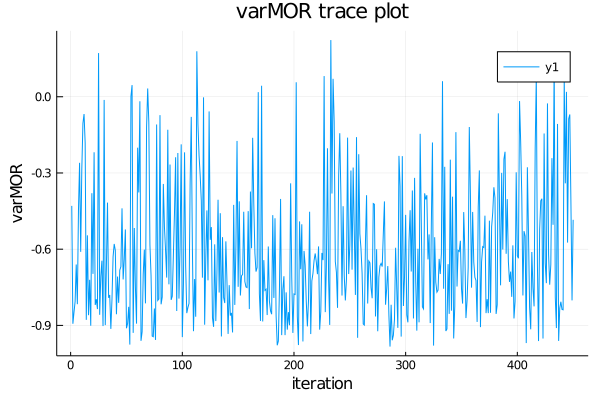

In [10]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varMOR trace plot",
        xlabel = "iteration", ylabel = "varMOR")

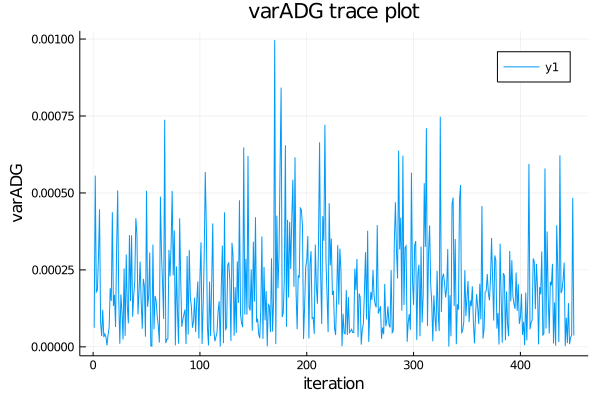

In [11]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

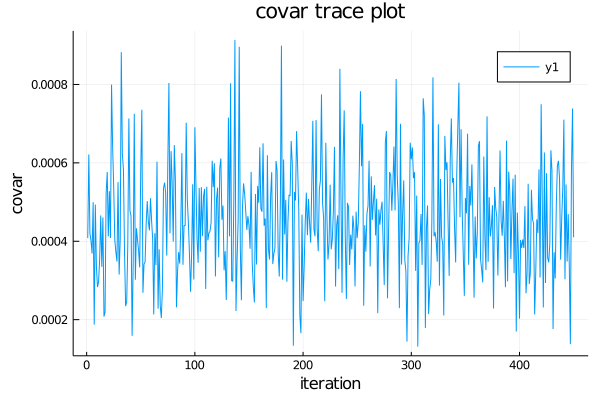

In [12]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

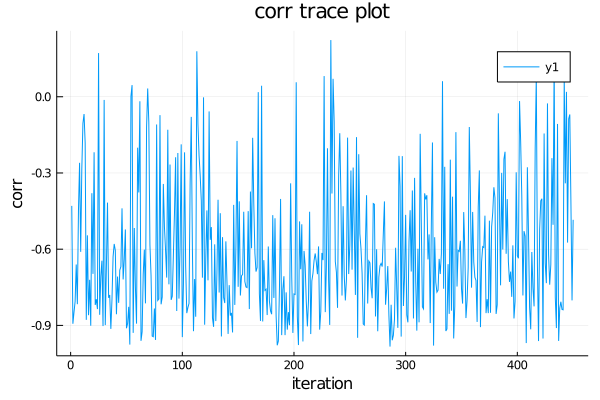

In [13]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

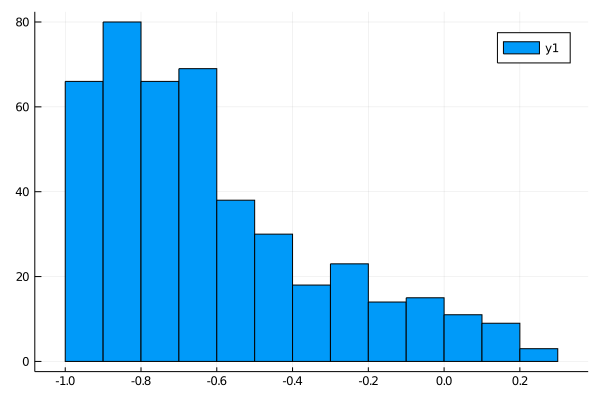

In [18]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_Died_Nur2,Died_Nur2_Nur2ADG,Died_Nur2_Died_Nur2
,Float64,Float64,Float64,Float64
1,0.0025413,-0.00118661,-0.00118661,0.00508419
2,0.00365809,-0.00199869,-0.00199869,0.00527467
3,0.00313912,-0.00160897,-0.00160897,0.00476135
4,0.00313273,-0.00204952,-0.00204952,0.00524289
5,0.00320303,-0.00179403,-0.00179403,0.00552704
6,0.00334919,-0.00161403,-0.00161403,0.00524208
7,0.00312518,-0.00151244,-0.00151244,0.00515382
8,0.00278846,-0.00145026,-0.00145026,0.00485164
9,0.00335788,-0.00145788,-0.00145788,0.00547337


In [8]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:Died_Nur2_Died_Nur2]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur2ADG_Died_Nur2] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_Died_Nur2,Died_Nur2_Nur2ADG,Died_Nur2_Died_Nur2
,Float64,Float64,Float64,Float64,Float64
1,0.0025413,-0.330117,-0.00118661,-0.00118661,0.00508419
2,0.00365809,-0.45501,-0.00199869,-0.00199869,0.00527467
3,0.00313912,-0.416179,-0.00160897,-0.00160897,0.00476135
4,0.00313273,-0.505715,-0.00204952,-0.00204952,0.00524289
5,0.00320303,-0.426386,-0.00179403,-0.00179403,0.00552704
6,0.00334919,-0.385204,-0.00161403,-0.00161403,0.00524208
7,0.00312518,-0.376857,-0.00151244,-0.00151244,0.00515382
8,0.00278846,-0.394292,-0.00145026,-0.00145026,0.00485164
9,0.00335788,-0.340065,-0.00145788,-0.00145788,0.00547337


In [9]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mode(gVar[!,2])

-0.3301169367244444

In [10]:
using Statistics
std(gVar[!,:corr])

0.05734779679733709

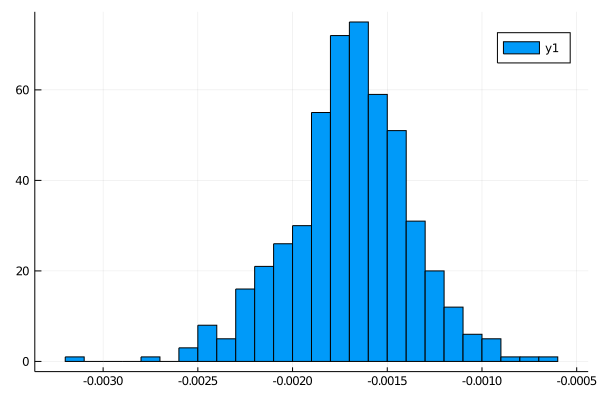

In [7]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC3 region from MCMC BayesB samples

In [4]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 102313:103184]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 102313:103184]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_Died_Nur2.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 102313:103184]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,1.0,3.41327e-7,1.71811e-7,2.42165e-7
2,2,-0.318025,1.83418e-5,0.000132516,-1.56789e-5
3,3,-0.189236,7.53189e-6,3.05818e-5,-2.87201e-6
4,4,NaN,0.0,7.5953e-7,0.0
5,5,-0.956583,0.000208251,5.67985e-5,-0.000104036
6,6,-0.183709,6.35653e-6,4.29516e-5,-3.0355e-6
7,7,-0.855362,2.96475e-5,0.000151143,-5.72582e-5
8,8,-0.307911,1.09687e-6,6.71245e-6,-8.35493e-7
9,9,-0.962982,4.39108e-5,4.10051e-5,-4.08623e-5


In [5]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.528916206049717

In [6]:
using Statistics
std(out[!,:corr])

0.42775519775980947

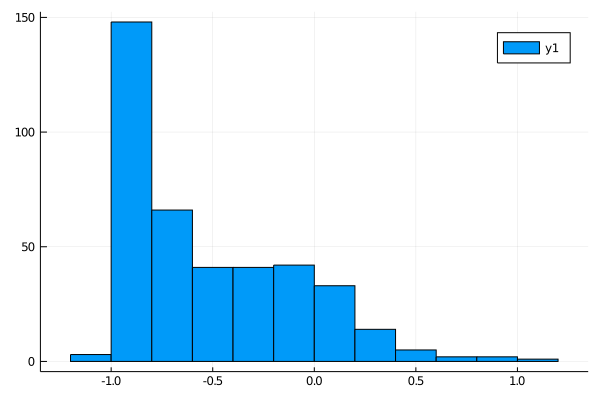

In [7]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC14 region from MCMC BayesB samples

In [19]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 349573:350187]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 349573:350187]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_Died_Nur2.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 349573:350187]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.922955,3.48606e-5,6.6848e-6,-1.40894e-5
2,2,-1.0,2.67223e-5,2.55746e-5,-2.61421e-5
3,3,-0.83918,9.01611e-5,2.50489e-5,-3.98804e-5
4,4,-0.996743,0.000152404,0.00010775,-0.000127729
5,5,NaN,7.61999e-6,0.0,0.0
6,6,-1.0,2.27398e-5,2.99067e-5,-2.60782e-5
7,7,-1.0,1.17263e-5,9.35698e-6,-1.04749e-5
8,8,-0.940659,7.49134e-6,4.49669e-6,-5.45957e-6
9,9,NaN,3.51845e-5,0.0,0.0


In [20]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.736450369316685

In [21]:
using Statistics
std(out[!,:corr])

0.5234611071851744

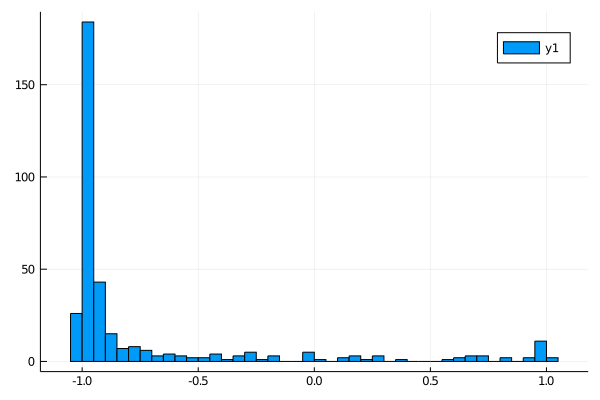

In [22]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC17 region from MCMC BayesB samples

In [23]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 420923:421710]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 420923:421710]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_Died_Nur2.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 420923:421710]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.681006,1.0603e-5,4.98827e-5,-1.56618e-5
2,2,-0.206271,5.48795e-7,0.000204882,-2.18723e-6
3,3,-0.996886,1.26201e-5,1.2215e-5,-1.23773e-5
4,4,-0.217067,1.18566e-7,1.98448e-6,-1.05292e-7
5,5,-0.421624,3.29067e-6,0.000107822,-7.94182e-6
6,6,0.14181,1.37398e-8,0.000102507,1.68296e-7
7,7,-0.703689,6.78222e-5,3.38743e-5,-3.37289e-5
8,8,-0.840356,0.000109341,5.37094e-5,-6.43992e-5
9,9,-0.987794,5.61017e-5,9.07003e-6,-2.22822e-5


In [24]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.6110714571677486

In [25]:
using Statistics
std(out[!,:corr])

0.47487440755378396

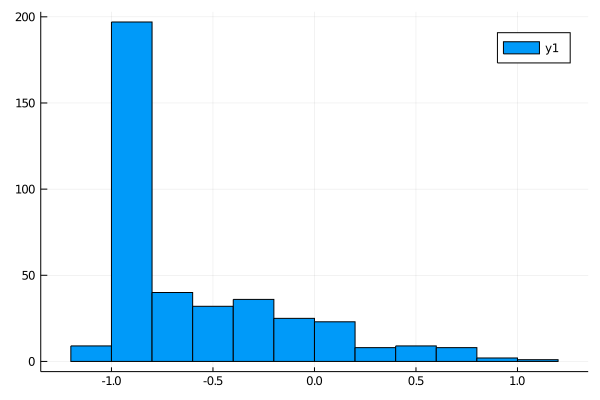

In [26]:
using Plots
h = histogram(out[!,:corr])
display(h)